In [31]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
from scipy.spatial import distance#
from pyproj import Proj,transform
import seaborn as sns
import copy
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
v84 = Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = Proj(proj="latlong", k=0.9996012717, ellps="airy", towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = Proj(init="world:bng")
#Calculate Euclidean distances using H

# Make yourself the 'All_data' file, this only needs to be run once ever
It is commented out for me, uncomment this if it's your first time

In [32]:
# def dfLLtoEN(df):
#     """Returns easting, northing tuple
#     """
#     vlon36, vlat36 = transform(v84,v36,df["long"].values,df["lat"].values)
#     result = vgrid(vlon36,vlat36)

#     # Transform the output to a Dataframe
#     eastnorth = pd.DataFrame(index=df.index)
#     for i in result:
#         eastnorth["Easting"] = result[0]
#         eastnorth["Northing"] = result[1]

#     return round(eastnorth)

In [33]:
# Path = '../StudyGroup/'
# CompleteData=pd.read_csv(Path+"completeData2.csv",header = 0)
# CompleteData = CompleteData.drop(columns = 'Unnamed: 0')

In [34]:
# CompleteData[['Easting', 'Northing']] = dfLLtoEN(CompleteData[['lat', 'long']])

In [35]:
# CompleteData = CompleteData.rename(index=str, columns={'X__1': "study"})

In [36]:
# CompleteData.columns.values

In [37]:
# ImputedData = pd.read_csv('imputed_farm_reducedsize', header = 0, sep = '\t')
# ImputedData = ImputedData.rename(index=str, columns={'Unnamed: 0': "study"})

In [38]:
# ImputedData[['Easting', 'Northing']] = dfLLtoEN(ImputedData[['lat', 'long']])

In [39]:
# ImputedData['sr'] = ImputedData['ruminant']

In [40]:
# Data = pd.concat([CompleteData, ImputedData], ignore_index=True)

In [41]:
# xmax = np.max(Data['Easting'].values)
# xmin = np.min(Data['Easting'].values)
# ymax = np.max(Data['Northing'].values)
# ymin = np.min(Data['Northing'].values)
# sizex = xmax-xmin
# sizey = ymax-ymin
# Data['xcoord'] = Data['Easting'] - xmin
# Data['ycoord'] = Data['Northing'] - ymin

In [42]:
# Data.to_csv('All_data', sep='\t')

# Below, can be run once you have made 'All_data'

In [43]:
Data=pd.read_csv("All_data",sep = '\t', header = 0)

In [44]:
Copy1 = pd.read_csv('All_data', sep = '\t', header = 0)

In [45]:
copy2 = Copy1.values
true_cattle =  copy.deepcopy(copy2[:,3])
true_sheep =  copy.deepcopy(copy2[:,13])
cattle = copy2[:,3]
sheep = copy2[:,13]

In [46]:
xcoord = Data['xcoord'].values
ycoord = Data['ycoord'].values

In [47]:
joinedinput = np.column_stack((xcoord, ycoord))

In [48]:
N = len(Data)
N

6083

In [49]:
dist = distance.cdist(joinedinput, joinedinput, 'euclidean')
dist = dist/100000

In [50]:
equipment_list = Data['equipment'].values
shares_water_list = Data['water'].values
shares_grazing_list = Data['grazing'].values
shares_milk_list = Data['milk'].values
shares_vet_list = Data['vet'].values
contact_animal_list = Data['contact_animal'].values
contact_human_list = Data['contact_people'].values

In [51]:
# tr = np.random.negative_binomial(1, 1/2, N) #Draw immune periods (1 day)
tr = 2*np.ones(N)
print(np.mean(tr))
        
psi = 0.00657
# psi = 2.5
nu = 1.99*(10**(-4.8))
xi = 4.65
zeta = 2.80
chi = 0.403
phi = 0.799
rho = 0.000863


epsilon = np.zeros(N)
s = np.random.negative_binomial(50, 50/55, N) #Draw latent periods (5 days)
r = np.random.negative_binomial(30, 30/38, N) #Draw infectious periods (8 days)
# r = np.random.negative_binomial(8, 8/16, N)
sum(r==0)


2.0


6

In [52]:
np.max(dist)

1.3401452351517724

In [53]:
# kerneldist =(10e4*psi)/((10e2*psi)**2 + dist**2)   # This is without a cap
kerneldist = (psi)/(psi**2 + dist**2)
# kerneldist = np.zeros(shape=(N,N))
# for i in range(len(dist)):
#     for j in range(len(dist)):
#         if dist[i,j] <= 60:
#             kerneldist[i,j] = (psi)/((psi)**2 + dist[i,j]**2)

In [54]:
# This takes quite a while to run, sit back and have a cuppa
# once this has run, you won't need to run it again unless your kernel restarts

shares_equipment = np.zeros(shape = (N,N)) #cap at 10km
shares_water = np.zeros(shape = (N,N)) #cap at 10km
shares_grazing = np.zeros(shape=(N,N)) #cap at 10km
shares_milk = np.zeros(shape = (N,N)) #cap at 10km
shares_vet = np.zeros(shape = (N,N)) #cap at 10km
contactanimal = np.zeros(shape = (N,N))
contacthuman = np.zeros(shape = (N,N)) 

for i in range(N):
    print(i)
    for j in range(N):
        if i != j:
            if dist[i,j] <= 10/100:
                if (shares_milk_list[i]==1 and shares_milk_list[j] ==1):
                    shares_milk[i,j] = 1
                if (shares_water_list[i]==1 and shares_water_list[j] ==1):
                    shares_water[i,j] =1
                if (shares_grazing_list[i] ==1 and shares_grazing_list[j] ==1):
                    shares_grazing[i,j] =1
                if (equipment_list[i]==1 and equipment_list[j] ==1):
                    shares_equipment[i,j] =1
                if (shares_vet_list[i]==1 and shares_vet_list[j] ==1):
                    shares_vet[i,j] = 1
            if (contact_animal_list[i]==1 and contact_animal_list[j] ==1):
                contactanimal[i,j] = 1
            if (contact_human_list[i]==1 and contact_human_list[j] ==1):
                contacthuman[i,j] = 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068


3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728


5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373


In [55]:
q = np.random.negative_binomial(2*28, 2*28/(4*28), N) #Draw immune periods (2 months)
np.mean(q)
RingCull = 3 #km

In [56]:
[a1, a2, a3,a4,a5,a6,a7] = [0.16964086, 0.16230848, 0.1756672,  0.06334324, 0.13775076, 0.13500596,0.15628351]
# [a1, a2, a3,a4,a5,a6,a7] = (1/7)*np.ones(7)

transmission_matrix = (a1*shares_equipment+
 a2*shares_water+
 a3*shares_grazing + 
 a4*shares_milk + 
 a5*shares_vet + 
 a6*contactanimal + 
 a7*contacthuman)

In [57]:
farm_cost = np.zeros(N)
for i in range(0,N):
    farm_cost[i] = 150*sheep[i] + 150*cattle[i]

Data['cost'] = farm_cost

In [58]:
kerneldist[50,200]

0.02915958717086779

# Below is the main code.
- A[:,0] - index of farm (only added into the code when farm is infected or if its vaccinated)
- A[:,1] - time a farm is infected
- A[:,2] = s - length of time/period a farm is exposed for  (4 days)
- A[:,3]  =r - length of time/period a farm is infectious for (8 days)
- A[:,4] = tr - length of time/period a farm is waiting before triggering vaccines (1 day) - maybe we should delete this completely
- A[:,5] = q - length of time/period a farm is naturally immue for (2 months) 
- A[:,6] = end_q - time at which a farm becomes susceptible again
- A[:,7] = t_vac - time at which a farm is vaccinated
- A[:,8]=v - length of time/period a farm is immune for, induced from vaccines (6 months)
- A[:,9] =end_v - time at which vaccine immunity ends

In [59]:


Cumulative2 = []
Endemic2 = []
Maximum2 = []
Totalcost2 = []
Duration2 = []
Infection2 = []

runTime = 1600 #Number of days to run the simulation for
numSims = 3 #Number of simulations

<IPython.core.display.Javascript object>


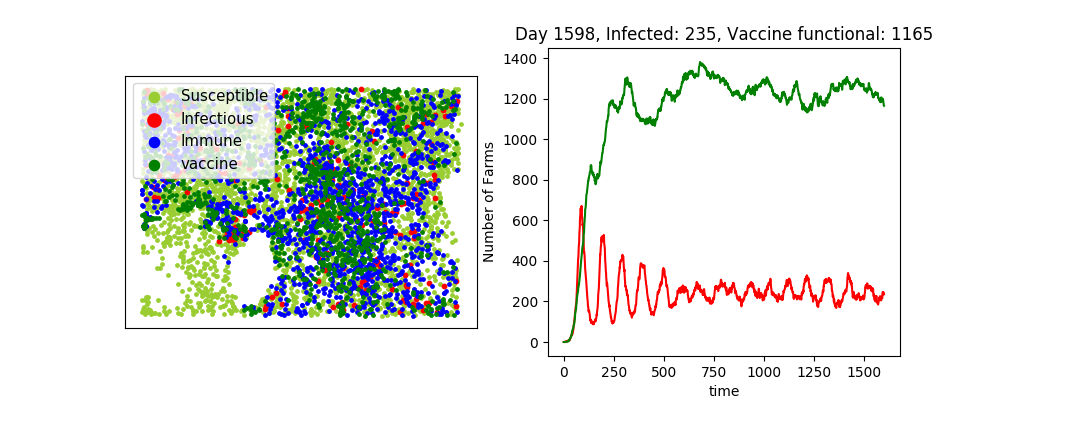

[]
[]
[]
[]
[]
[]
[744, 746]
[744, 745, 746]
[744, 745, 746]
[744, 745, 746]
[744, 745, 746]
[744, 746, 748]
[748]
[743, 748]
[743, 748]
[743, 748, 752]
[743, 748, 752]
[743, 748, 752]
[721, 743, 748, 752]
[721, 743, 748, 752, 975]
[721, 743, 748, 752, 975]
[721, 743, 748, 751, 752, 975]
[721, 748, 751, 752, 753, 975, 1216, 1344, 2482]
[748, 751, 752, 753, 975, 1216, 1344, 2482]
[748, 751, 752, 753, 975, 1216, 1344, 2482]
[628, 748, 751, 752, 753, 975, 1216, 1344, 2482]
[514, 628, 748, 751, 752, 753, 975, 1216, 1344, 2417, 2482]
[514, 628, 751, 753, 975, 1216, 1336, 1344, 2417, 2482]
[389, 628, 753, 975, 1336, 1344, 2417, 2482]
[380, 389, 622, 623, 628, 727, 753, 1336, 1344, 1462, 2132, 2482]
[380, 389, 622, 623, 628, 727, 755, 1336, 1462, 1583, 2132, 2379, 2482]
[380, 389, 522, 623, 628, 727, 755, 864, 1096, 1107, 1336, 1462, 1583, 2132, 2379]
[380, 389, 390, 502, 522, 623, 628, 727, 755, 864, 1096, 1107, 1336, 1456, 1462, 1583, 2132, 2318, 2379]
[380, 389, 390, 399, 502, 522, 628, 75

[62, 175, 213, 235, 240, 245, 249, 250, 253, 255, 258, 259, 260, 261, 379, 385, 388, 406, 407, 410, 438, 498, 518, 624, 626, 649, 735, 759, 763, 765, 769, 840, 848, 869, 874, 877, 878, 939, 987, 990, 993, 1004, 1044, 1066, 1083, 1101, 1104, 1113, 1114, 1126, 1129, 1150, 1215, 1229, 1230, 1231, 1240, 1338, 1348, 1364, 1424, 1449, 1460, 1573, 1575, 1601, 1686, 1708, 1709, 1728, 1743, 1779, 1794, 1795, 1850, 1874, 1897, 1901, 1903, 1977, 1988, 1998, 2000, 2001, 2030, 2033, 2083, 2128, 2163, 2167, 2176, 2181, 2198, 2199, 2269, 2272, 2273, 2285, 2361, 2380, 2471, 2472, 2491, 2565, 2567, 2586, 2672, 2674, 2679, 2751, 2760, 2765, 2820, 2858, 2864, 2868, 2894, 2962, 2970, 2971, 2992, 2995, 2996, 3059, 3064, 3068, 3087, 3088, 3102, 3149, 3150, 3175, 3178, 3240, 3241, 3270, 3279, 3836, 4220, 4239, 4383, 4478, 4566, 4851, 4906, 5062, 6022]
[62, 175, 213, 235, 240, 245, 249, 250, 253, 255, 258, 259, 260, 261, 379, 385, 401, 406, 407, 410, 438, 498, 509, 518, 535, 624, 626, 641, 649, 735, 740, 759,

[41, 179, 180, 188, 194, 196, 204, 207, 213, 215, 249, 379, 401, 407, 445, 533, 557, 559, 718, 720, 740, 757, 764, 766, 768, 806, 809, 854, 867, 871, 876, 878, 886, 887, 901, 925, 967, 973, 976, 977, 992, 993, 1003, 1007, 1011, 1015, 1028, 1108, 1109, 1113, 1116, 1122, 1123, 1126, 1169, 1224, 1230, 1240, 1242, 1244, 1273, 1330, 1348, 1349, 1350, 1389, 1443, 1473, 1475, 1485, 1554, 1576, 1605, 1673, 1694, 1703, 1704, 1707, 1710, 1719, 1750, 1776, 1782, 1786, 1790, 1795, 1797, 1802, 1805, 1810, 1846, 1849, 1857, 1877, 1878, 1892, 1900, 1906, 1946, 1947, 1953, 1974, 1975, 1987, 2030, 2041, 2077, 2081, 2167, 2180, 2191, 2204, 2208, 2223, 2259, 2261, 2267, 2268, 2272, 2319, 2361, 2373, 2375, 2384, 2389, 2394, 2411, 2488, 2489, 2512, 2572, 2585, 2587, 2600, 2624, 2648, 2669, 2670, 2676, 2677, 2691, 2698, 2702, 2746, 2752, 2754, 2766, 2779, 2799, 2805, 2856, 2864, 2865, 2888, 2891, 2896, 2900, 2930, 2956, 2960, 2961, 2962, 2963, 2997, 3011, 3026, 3055, 3057, 3063, 3066, 3068, 3084, 3086, 3089

[37, 41, 172, 177, 180, 181, 182, 194, 196, 204, 207, 215, 217, 222, 225, 230, 445, 452, 524, 532, 533, 536, 556, 557, 559, 605, 627, 645, 647, 678, 720, 740, 757, 768, 809, 854, 871, 886, 900, 924, 932, 936, 971, 973, 976, 977, 1009, 1011, 1015, 1034, 1054, 1116, 1123, 1131, 1165, 1169, 1175, 1224, 1242, 1247, 1261, 1266, 1269, 1330, 1349, 1350, 1354, 1369, 1370, 1379, 1387, 1442, 1468, 1485, 1505, 1569, 1588, 1600, 1603, 1608, 1622, 1623, 1627, 1646, 1649, 1650, 1673, 1707, 1711, 1712, 1715, 1727, 1750, 1754, 1769, 1773, 1774, 1776, 1788, 1790, 1796, 1800, 1802, 1805, 1831, 1849, 1873, 1876, 1877, 1878, 1890, 1905, 1907, 1913, 1948, 1975, 1978, 1979, 1981, 1991, 1999, 2003, 2041, 2070, 2077, 2081, 2088, 2108, 2173, 2177, 2205, 2209, 2223, 2226, 2232, 2259, 2261, 2270, 2283, 2300, 2319, 2359, 2375, 2376, 2384, 2385, 2386, 2389, 2395, 2411, 2424, 2447, 2457, 2477, 2488, 2493, 2512, 2514, 2582, 2584, 2585, 2587, 2590, 2604, 2614, 2624, 2643, 2648, 2658, 2669, 2691, 2696, 2698, 2702, 270

[49, 172, 183, 185, 187, 192, 193, 194, 202, 203, 217, 218, 221, 222, 225, 230, 417, 420, 450, 506, 524, 528, 532, 534, 536, 556, 631, 645, 647, 678, 699, 741, 749, 783, 810, 891, 894, 899, 900, 932, 978, 1009, 1010, 1012, 1023, 1034, 1116, 1131, 1134, 1136, 1149, 1175, 1179, 1180, 1247, 1248, 1261, 1269, 1275, 1345, 1349, 1354, 1368, 1369, 1370, 1379, 1407, 1442, 1446, 1468, 1472, 1485, 1492, 1502, 1569, 1570, 1588, 1600, 1602, 1613, 1622, 1623, 1638, 1647, 1650, 1651, 1656, 1682, 1705, 1711, 1712, 1721, 1727, 1751, 1752, 1754, 1766, 1769, 1773, 1774, 1775, 1788, 1789, 1796, 1800, 1802, 1809, 1831, 1873, 1876, 1890, 1905, 1907, 1913, 1978, 1979, 1981, 1982, 1983, 1991, 2021, 2023, 2081, 2088, 2105, 2106, 2108, 2111, 2159, 2173, 2178, 2195, 2205, 2223, 2232, 2283, 2292, 2297, 2300, 2317, 2323, 2359, 2376, 2385, 2386, 2389, 2393, 2395, 2402, 2405, 2411, 2413, 2417, 2423, 2424, 2428, 2447, 2477, 2494, 2495, 2496, 2497, 2503, 2514, 2545, 2550, 2553, 2592, 2604, 2607, 2614, 2619, 2624, 262

[39, 57, 173, 183, 185, 187, 192, 202, 212, 217, 218, 221, 223, 227, 408, 417, 420, 437, 440, 528, 536, 555, 632, 633, 634, 645, 657, 699, 741, 749, 783, 798, 810, 884, 891, 892, 894, 899, 900, 911, 922, 932, 978, 1009, 1010, 1012, 1016, 1020, 1023, 1034, 1081, 1099, 1131, 1134, 1136, 1149, 1179, 1180, 1225, 1237, 1245, 1248, 1265, 1275, 1319, 1332, 1345, 1354, 1368, 1370, 1407, 1446, 1454, 1458, 1472, 1492, 1493, 1494, 1499, 1515, 1558, 1570, 1588, 1595, 1602, 1613, 1623, 1638, 1647, 1650, 1651, 1656, 1682, 1705, 1712, 1721, 1726, 1727, 1747, 1749, 1751, 1752, 1754, 1773, 1775, 1789, 1796, 1800, 1809, 1820, 1873, 1890, 1905, 1916, 1938, 1978, 1982, 1983, 2013, 2020, 2023, 2068, 2088, 2099, 2106, 2108, 2111, 2173, 2178, 2195, 2201, 2210, 2232, 2283, 2284, 2292, 2312, 2317, 2321, 2323, 2328, 2359, 2402, 2405, 2413, 2423, 2424, 2428, 2494, 2495, 2496, 2497, 2502, 2503, 2505, 2506, 2513, 2514, 2545, 2550, 2553, 2591, 2594, 2607, 2619, 2624, 2625, 2638, 2639, 2643, 2686, 2687, 2692, 2704, 

[32, 39, 57, 173, 183, 192, 202, 205, 212, 221, 223, 227, 319, 408, 409, 417, 420, 437, 449, 555, 632, 633, 657, 660, 743, 749, 773, 783, 798, 810, 818, 821, 828, 884, 888, 892, 894, 899, 911, 922, 1009, 1012, 1016, 1020, 1034, 1081, 1099, 1131, 1134, 1136, 1180, 1225, 1237, 1245, 1248, 1255, 1259, 1268, 1275, 1312, 1323, 1328, 1332, 1345, 1398, 1407, 1446, 1454, 1476, 1492, 1493, 1494, 1495, 1499, 1508, 1515, 1533, 1558, 1588, 1595, 1610, 1611, 1613, 1623, 1638, 1648, 1651, 1669, 1671, 1714, 1721, 1726, 1727, 1739, 1747, 1749, 1751, 1752, 1754, 1773, 1775, 1789, 1796, 1809, 1815, 1818, 1820, 1825, 1873, 1905, 1916, 1929, 1935, 1938, 1945, 1959, 1982, 2004, 2013, 2020, 2054, 2068, 2084, 2088, 2096, 2099, 2106, 2111, 2116, 2134, 2175, 2201, 2210, 2211, 2231, 2233, 2284, 2291, 2292, 2293, 2295, 2296, 2301, 2304, 2312, 2314, 2315, 2317, 2323, 2346, 2359, 2396, 2399, 2402, 2413, 2416, 2422, 2458, 2494, 2495, 2496, 2500, 2504, 2505, 2506, 2513, 2514, 2520, 2540, 2543, 2557, 2573, 2602, 2607

[27, 32, 61, 66, 84, 202, 205, 211, 221, 223, 228, 297, 319, 408, 409, 437, 530, 531, 542, 632, 633, 657, 662, 674, 739, 743, 749, 773, 782, 783, 798, 818, 821, 825, 828, 882, 888, 892, 897, 899, 911, 922, 938, 982, 1012, 1020, 1027, 1056, 1058, 1062, 1069, 1081, 1099, 1131, 1134, 1136, 1139, 1140, 1154, 1164, 1205, 1218, 1225, 1245, 1255, 1257, 1259, 1260, 1268, 1271, 1278, 1312, 1323, 1328, 1339, 1352, 1398, 1446, 1454, 1466, 1476, 1486, 1492, 1493, 1495, 1499, 1508, 1514, 1515, 1527, 1530, 1533, 1541, 1589, 1595, 1610, 1614, 1619, 1623, 1648, 1669, 1714, 1720, 1721, 1727, 1739, 1747, 1751, 1752, 1754, 1815, 1818, 1825, 1848, 1895, 1905, 1914, 1916, 1917, 1929, 1935, 1936, 1938, 1945, 1950, 1982, 2004, 2012, 2020, 2034, 2054, 2068, 2071, 2084, 2090, 2096, 2099, 2107, 2111, 2115, 2116, 2121, 2122, 2125, 2134, 2139, 2140, 2175, 2201, 2210, 2211, 2224, 2231, 2233, 2250, 2291, 2293, 2295, 2296, 2301, 2304, 2314, 2315, 2323, 2332, 2339, 2346, 2396, 2399, 2406, 2408, 2412, 2416, 2420, 2422

[27, 32, 43, 61, 66, 81, 90, 205, 210, 211, 223, 228, 232, 297, 309, 319, 411, 416, 432, 437, 530, 531, 537, 542, 548, 618, 662, 674, 739, 743, 756, 773, 782, 798, 799, 821, 825, 828, 856, 860, 892, 897, 908, 910, 943, 954, 961, 979, 982, 1014, 1019, 1022, 1027, 1056, 1058, 1060, 1062, 1069, 1081, 1094, 1117, 1139, 1140, 1153, 1154, 1159, 1164, 1205, 1218, 1225, 1245, 1254, 1255, 1257, 1259, 1278, 1290, 1292, 1312, 1321, 1323, 1339, 1352, 1372, 1376, 1383, 1398, 1446, 1454, 1466, 1476, 1486, 1492, 1495, 1514, 1522, 1532, 1533, 1534, 1541, 1553, 1589, 1590, 1597, 1612, 1614, 1619, 1625, 1653, 1654, 1670, 1702, 1716, 1720, 1723, 1739, 1754, 1798, 1815, 1818, 1825, 1835, 1839, 1852, 1895, 1917, 1918, 1920, 1921, 1924, 1929, 1936, 1938, 1939, 1950, 1973, 2012, 2020, 2024, 2028, 2034, 2054, 2066, 2071, 2090, 2094, 2099, 2107, 2109, 2115, 2116, 2122, 2135, 2139, 2140, 2146, 2175, 2201, 2203, 2210, 2211, 2224, 2225, 2250, 2252, 2254, 2271, 2293, 2306, 2313, 2314, 2332, 2339, 2348, 2399, 2408,

[22, 27, 34, 43, 45, 52, 53, 59, 66, 81, 97, 190, 191, 205, 208, 210, 228, 232, 297, 309, 323, 338, 413, 416, 432, 525, 527, 530, 537, 542, 548, 590, 606, 618, 662, 739, 750, 753, 756, 770, 773, 785, 786, 787, 798, 799, 822, 825, 855, 856, 908, 914, 943, 954, 961, 963, 979, 982, 1014, 1019, 1025, 1027, 1056, 1058, 1059, 1060, 1062, 1081, 1094, 1098, 1100, 1117, 1135, 1139, 1141, 1152, 1153, 1154, 1159, 1161, 1164, 1184, 1199, 1218, 1225, 1254, 1255, 1259, 1280, 1284, 1286, 1290, 1292, 1294, 1296, 1312, 1321, 1323, 1335, 1339, 1352, 1372, 1381, 1383, 1385, 1386, 1436, 1441, 1466, 1496, 1514, 1522, 1523, 1532, 1534, 1547, 1553, 1589, 1590, 1592, 1597, 1599, 1612, 1614, 1617, 1625, 1653, 1670, 1688, 1696, 1702, 1716, 1798, 1803, 1816, 1824, 1835, 1839, 1852, 1872, 1884, 1888, 1895, 1917, 1918, 1920, 1921, 1923, 1924, 1928, 1939, 1950, 1951, 1957, 1965, 1966, 1973, 2024, 2025, 2028, 2029, 2032, 2039, 2057, 2063, 2066, 2071, 2090, 2094, 2098, 2099, 2107, 2109, 2122, 2135, 2146, 2165, 2194, 

[22, 36, 40, 42, 45, 52, 53, 59, 74, 78, 81, 97, 115, 191, 206, 208, 300, 302, 309, 323, 325, 327, 330, 338, 340, 413, 432, 433, 496, 525, 527, 530, 537, 544, 548, 590, 618, 640, 680, 693, 750, 753, 770, 781, 785, 786, 787, 799, 822, 825, 855, 908, 914, 930, 943, 945, 954, 961, 963, 966, 1024, 1025, 1039, 1047, 1059, 1060, 1062, 1081, 1092, 1094, 1098, 1117, 1135, 1139, 1141, 1152, 1159, 1161, 1164, 1189, 1197, 1199, 1208, 1218, 1253, 1255, 1280, 1284, 1286, 1294, 1295, 1296, 1297, 1321, 1335, 1339, 1372, 1383, 1385, 1408, 1441, 1466, 1481, 1491, 1496, 1506, 1509, 1523, 1526, 1532, 1534, 1542, 1544, 1547, 1553, 1560, 1562, 1589, 1590, 1592, 1596, 1599, 1612, 1617, 1639, 1688, 1691, 1696, 1729, 1730, 1758, 1791, 1798, 1803, 1824, 1842, 1844, 1855, 1870, 1872, 1884, 1888, 1895, 1904, 1909, 1915, 1918, 1922, 1923, 1925, 1939, 1944, 1951, 1965, 1966, 1973, 2007, 2024, 2025, 2032, 2063, 2066, 2071, 2090, 2094, 2098, 2099, 2109, 2118, 2122, 2130, 2137, 2146, 2213, 2220, 2225, 2227, 2228, 224

[22, 36, 40, 42, 45, 46, 59, 63, 69, 74, 86, 91, 94, 115, 206, 208, 295, 300, 302, 307, 309, 323, 325, 328, 338, 340, 341, 413, 414, 428, 432, 433, 525, 527, 530, 537, 544, 546, 590, 636, 640, 680, 681, 693, 701, 708, 744, 750, 753, 777, 781, 785, 794, 799, 800, 813, 822, 842, 850, 855, 908, 914, 930, 940, 943, 952, 954, 961, 962, 963, 966, 1024, 1039, 1041, 1047, 1059, 1060, 1062, 1063, 1065, 1092, 1098, 1135, 1139, 1141, 1159, 1161, 1188, 1189, 1194, 1195, 1197, 1198, 1199, 1208, 1218, 1221, 1253, 1279, 1286, 1295, 1297, 1309, 1339, 1383, 1385, 1392, 1400, 1408, 1410, 1432, 1441, 1444, 1478, 1481, 1491, 1496, 1500, 1509, 1520, 1523, 1524, 1534, 1544, 1547, 1553, 1560, 1562, 1590, 1592, 1596, 1599, 1626, 1637, 1639, 1660, 1662, 1691, 1729, 1730, 1731, 1735, 1758, 1791, 1812, 1817, 1824, 1840, 1842, 1844, 1853, 1855, 1859, 1870, 1884, 1889, 1909, 1915, 1925, 1930, 1944, 1951, 1965, 1966, 1970, 1973, 2025, 2032, 2045, 2066, 2076, 2098, 2118, 2119, 2130, 2147, 2213, 2227, 2228, 2244, 224

[23, 42, 45, 46, 63, 86, 91, 112, 208, 231, 296, 299, 300, 301, 302, 303, 304, 306, 307, 311, 312, 325, 328, 332, 334, 337, 340, 341, 405, 414, 424, 428, 430, 432, 500, 527, 530, 544, 546, 588, 621, 636, 640, 667, 679, 680, 681, 693, 701, 708, 710, 744, 750, 752, 784, 790, 794, 800, 813, 822, 842, 844, 846, 850, 862, 906, 914, 930, 943, 950, 954, 959, 961, 962, 966, 1024, 1040, 1041, 1047, 1060, 1063, 1065, 1135, 1139, 1141, 1147, 1159, 1171, 1188, 1189, 1194, 1195, 1198, 1218, 1221, 1279, 1281, 1295, 1297, 1309, 1384, 1392, 1400, 1410, 1432, 1435, 1441, 1444, 1478, 1484, 1498, 1500, 1520, 1523, 1534, 1535, 1537, 1544, 1545, 1547, 1549, 1555, 1560, 1562, 1596, 1599, 1633, 1637, 1639, 1662, 1663, 1665, 1701, 1729, 1730, 1731, 1735, 1758, 1764, 1791, 1812, 1817, 1840, 1842, 1853, 1855, 1859, 1865, 1884, 1889, 1915, 1925, 1930, 1944, 1958, 1973, 1986, 1993, 2015, 2018, 2065, 2067, 2076, 2098, 2104, 2119, 2123, 2130, 2138, 2147, 2148, 2149, 2192, 2213, 2227, 2228, 2241, 2247, 2248, 2255, 2

[29, 42, 48, 50, 63, 86, 87, 88, 112, 121, 231, 296, 299, 301, 302, 303, 304, 306, 307, 311, 312, 320, 322, 324, 331, 332, 334, 336, 337, 339, 340, 341, 405, 424, 428, 430, 481, 500, 530, 538, 552, 588, 669, 676, 679, 681, 689, 701, 748, 750, 752, 784, 790, 794, 811, 813, 844, 846, 862, 906, 959, 962, 968, 985, 1000, 1030, 1038, 1040, 1060, 1068, 1075, 1076, 1078, 1084, 1141, 1158, 1159, 1171, 1181, 1194, 1195, 1206, 1221, 1279, 1281, 1295, 1299, 1313, 1375, 1384, 1400, 1412, 1431, 1435, 1455, 1478, 1484, 1498, 1500, 1513, 1520, 1523, 1535, 1537, 1545, 1549, 1552, 1555, 1633, 1637, 1662, 1665, 1667, 1690, 1701, 1731, 1733, 1740, 1757, 1764, 1817, 1843, 1853, 1858, 1865, 1889, 1908, 1915, 1925, 1930, 1954, 1956, 1958, 1962, 1967, 1986, 1993, 2015, 2065, 2067, 2082, 2104, 2113, 2119, 2124, 2138, 2147, 2148, 2149, 2157, 2162, 2192, 2213, 2215, 2241, 2247, 2255, 2324, 2340, 2352, 2355, 2392, 2401, 2437, 2438, 2441, 2443, 2460, 2464, 2501, 2509, 2531, 2532, 2535, 2598, 2599, 2608, 2617, 262

[29, 31, 48, 50, 63, 87, 88, 92, 111, 113, 121, 296, 299, 304, 305, 307, 312, 320, 322, 331, 332, 333, 337, 339, 341, 405, 424, 428, 481, 483, 487, 495, 538, 543, 552, 589, 637, 669, 676, 679, 689, 701, 728, 748, 752, 784, 794, 824, 832, 833, 841, 844, 846, 847, 862, 917, 918, 926, 951, 953, 968, 969, 985, 1000, 1030, 1031, 1038, 1040, 1068, 1072, 1075, 1076, 1078, 1142, 1158, 1171, 1181, 1186, 1187, 1190, 1192, 1194, 1206, 1221, 1295, 1299, 1301, 1305, 1307, 1308, 1310, 1313, 1315, 1318, 1336, 1375, 1384, 1426, 1431, 1455, 1498, 1500, 1507, 1513, 1535, 1546, 1549, 1552, 1555, 1630, 1640, 1641, 1643, 1658, 1664, 1665, 1667, 1675, 1676, 1690, 1701, 1731, 1733, 1740, 1741, 1757, 1761, 1762, 1819, 1827, 1829, 1853, 1856, 1858, 1860, 1908, 1930, 1952, 1954, 1962, 1963, 1967, 1986, 1993, 2015, 2053, 2065, 2067, 2100, 2104, 2124, 2147, 2148, 2149, 2157, 2162, 2189, 2192, 2215, 2241, 2242, 2247, 2255, 2330, 2335, 2336, 2351, 2354, 2355, 2392, 2398, 2401, 2429, 2434, 2437, 2441, 2464, 2509, 25

[29, 31, 33, 44, 48, 88, 111, 114, 123, 304, 305, 308, 310, 314, 315, 317, 320, 321, 329, 332, 405, 431, 481, 487, 543, 552, 589, 595, 637, 669, 671, 673, 675, 689, 702, 717, 725, 728, 748, 752, 795, 812, 817, 824, 831, 833, 846, 916, 949, 951, 969, 970, 1000, 1021, 1072, 1078, 1079, 1187, 1196, 1209, 1238, 1246, 1299, 1305, 1306, 1310, 1315, 1318, 1325, 1336, 1384, 1391, 1403, 1411, 1425, 1426, 1430, 1431, 1433, 1455, 1467, 1513, 1517, 1535, 1538, 1543, 1546, 1550, 1556, 1582, 1630, 1640, 1658, 1665, 1675, 1676, 1713, 1725, 1733, 1741, 1760, 1761, 1762, 1772, 1784, 1827, 1828, 1856, 1863, 1864, 1867, 1868, 1952, 1954, 1963, 1968, 1986, 2038, 2053, 2061, 2067, 2075, 2104, 2124, 2145, 2153, 2168, 2189, 2192, 2215, 2241, 2242, 2249, 2251, 2253, 2335, 2336, 2382, 2398, 2429, 2434, 2435, 2436, 2439, 2441, 2446, 2462, 2479, 2526, 2533, 2575, 2606, 2626, 2632, 2637, 2731, 2732, 2734, 2736, 2738, 2742, 2770, 2771, 2775, 2819, 2821, 2823, 2840, 2851, 2878, 2894, 2918, 2926, 2941, 2943, 2945, 2

[99, 111, 114, 124, 126, 179, 305, 308, 316, 317, 318, 321, 344, 429, 431, 481, 486, 491, 550, 576, 577, 578, 595, 597, 599, 610, 670, 675, 709, 723, 730, 748, 803, 812, 817, 819, 831, 849, 970, 1021, 1044, 1070, 1093, 1107, 1145, 1185, 1204, 1209, 1246, 1252, 1291, 1303, 1304, 1306, 1317, 1320, 1378, 1391, 1397, 1411, 1417, 1433, 1464, 1467, 1501, 1517, 1535, 1538, 1540, 1543, 1550, 1561, 1582, 1594, 1628, 1630, 1631, 1676, 1713, 1741, 1760, 1777, 1778, 1784, 1828, 1864, 1867, 1868, 1871, 1931, 1963, 2050, 2051, 2056, 2059, 2064, 2150, 2153, 2168, 2234, 2243, 2249, 2251, 2335, 2336, 2342, 2390, 2398, 2430, 2439, 2446, 2479, 2574, 2575, 2577, 2606, 2631, 2637, 2732, 2736, 2738, 2775, 2776, 2819, 2838, 2839, 2841, 2851, 2878, 2894, 2918, 2926, 2941, 2943, 2953, 3031, 3039, 3040, 3042, 3113, 3124, 3128, 3129, 3131, 3218, 3220, 3297, 3316, 3320, 3321, 3346, 3406, 3407, 3440, 3528, 3602, 3685, 3717, 3792, 3811, 3815, 3817, 3819, 3880, 3902, 3912, 3915, 3918, 3935, 4001, 4021, 4094, 4099, 4

[96, 104, 114, 124, 133, 135, 148, 155, 167, 186, 246, 318, 335, 344, 351, 364, 368, 388, 389, 390, 400, 429, 479, 480, 491, 550, 551, 570, 577, 581, 583, 597, 600, 610, 612, 670, 714, 723, 746, 789, 817, 819, 838, 845, 972, 1049, 1051, 1052, 1053, 1070, 1086, 1168, 1204, 1213, 1216, 1232, 1252, 1306, 1314, 1329, 1378, 1406, 1417, 1428, 1429, 1438, 1447, 1457, 1512, 1539, 1543, 1550, 1565, 1566, 1628, 1630, 1666, 1693, 1698, 1709, 1722, 1777, 1784, 1885, 1931, 1961, 2051, 2052, 2056, 2059, 2064, 2128, 2144, 2152, 2168, 2206, 2237, 2342, 2430, 2439, 2446, 2577, 2646, 2732, 2735, 2813, 2819, 2839, 2845, 2882, 3043, 3049, 3124, 3128, 3129, 3131, 3137, 3138, 3303, 3306, 3319, 3346, 3352, 3391, 3406, 3407, 3415, 3602, 3618, 3701, 3717, 3794, 3819, 3880, 3920, 3932, 3984, 3991, 4014, 4023, 4028, 4045, 4098, 4113, 4118, 4119, 4137, 4154, 4180, 4193, 4194, 4195, 4198, 4207, 4270, 4272, 4410, 4414, 4417, 4431, 4438, 4454, 4500, 4503, 4505, 4542, 4545, 4583, 4585, 4619, 4669, 4733, 4813, 4815, 4

[8, 12, 16, 47, 95, 98, 103, 106, 122, 127, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 150, 152, 160, 161, 162, 163, 165, 167, 186, 235, 236, 237, 242, 246, 248, 254, 286, 357, 364, 390, 400, 477, 572, 608, 611, 617, 626, 628, 656, 664, 713, 714, 742, 837, 845, 946, 1054, 1086, 1088, 1089, 1091, 1438, 1445, 1447, 1634, 1674, 1693, 1724, 1759, 1787, 1793, 1832, 1878, 1988, 2062, 2073, 2085, 2143, 2237, 2238, 2278, 2528, 2567, 2629, 2646, 2741, 2837, 2854, 3138, 3219, 3221, 3317, 3319, 3322, 3391, 3496, 3590, 3591, 3593, 3594, 3595, 3615, 3687, 3692, 3784, 3883, 3900, 3920, 3991, 3993, 3998, 4023, 4100, 4115, 4198, 4342, 4411, 4508, 4521, 4586, 4587, 4672, 4695, 4735, 4839, 4881, 4882, 4885, 4957, 4969, 5011, 5618, 5676, 5709, 5736, 5746, 6003, 6008, 6055]
[8, 12, 16, 95, 98, 106, 122, 127, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 150, 160, 161, 162, 163, 164, 167, 186, 235, 237, 240, 242, 246, 248, 254, 260, 286, 357, 364, 390, 400, 477, 572, 608, 611, 626, 628

[0, 4, 6, 9, 11, 14, 17, 18, 110, 147, 156, 158, 159, 172, 213, 240, 244, 247, 249, 250, 253, 255, 257, 261, 280, 282, 469, 592, 688, 691, 741, 810, 830, 864, 867, 869, 925, 983, 1210, 1449, 1642, 1647, 1742, 1876, 1879, 1942, 2058, 2083, 2167, 2169, 2224, 2262, 2269, 2272, 2444, 2565, 2571, 2672, 2764, 2768, 2769, 2825, 2853, 2959, 2969, 3052, 3056, 3108, 3142, 3144, 3152, 3216, 3492, 3592, 3614, 3689, 3715, 3716, 3790, 3824, 3885, 3886, 3893, 3996, 4004, 4007, 4017, 4102, 4232, 4261, 4418, 4469, 4533, 4671, 4941, 5600, 5888]
[0, 4, 6, 9, 14, 18, 110, 147, 159, 172, 213, 225, 245, 249, 250, 255, 267, 280, 281, 282, 469, 592, 741, 810, 830, 864, 867, 869, 925, 983, 1210, 1449, 1642, 1647, 1742, 1876, 1879, 1942, 2058, 2083, 2092, 2167, 2171, 2224, 2262, 2272, 2316, 2444, 2561, 2565, 2571, 2672, 2674, 2764, 2768, 2769, 2825, 2853, 2856, 2969, 3056, 3108, 3142, 3144, 3152, 3216, 3492, 3592, 3614, 3689, 3715, 3716, 3790, 3793, 3885, 3886, 3893, 3996, 4004, 4017, 4102, 4232, 4261, 4418, 44

[1, 20, 178, 179, 188, 192, 214, 230, 245, 259, 263, 271, 273, 274, 276, 277, 278, 284, 287, 288, 290, 409, 569, 632, 711, 743, 826, 829, 836, 875, 993, 1056, 1096, 1179, 1180, 1182, 1215, 1354, 1527, 1569, 1605, 1649, 1650, 1684, 1726, 1790, 1805, 1880, 1884, 1891, 1896, 1897, 1901, 1981, 1982, 2000, 2021, 2029, 2071, 2093, 2131, 2191, 2226, 2233, 2323, 2359, 2361, 2573, 2600, 2754, 2763, 2868, 2887, 2900, 2921, 2962, 3066, 3197, 3248, 3335, 3390, 3639, 3707, 3779, 3807, 3961, 3963, 4073, 4081, 4208, 4237, 4240, 4379, 4381, 4383, 4385, 4466, 4472, 4479, 4512, 4575, 4868, 5460, 5572, 5682, 5691, 5694, 5928, 5959]
[1, 20, 178, 179, 192, 214, 230, 245, 259, 262, 263, 271, 273, 274, 275, 276, 277, 278, 287, 290, 293, 409, 569, 632, 743, 826, 836, 993, 1056, 1058, 1096, 1179, 1180, 1182, 1215, 1354, 1527, 1569, 1649, 1650, 1684, 1748, 1749, 1790, 1805, 1884, 1891, 1896, 1897, 1901, 1981, 1982, 2000, 2029, 2071, 2093, 2191, 2226, 2233, 2323, 2359, 2361, 2550, 2573, 2600, 2754, 2763, 2887, 2

[31, 40, 183, 196, 202, 205, 221, 279, 291, 449, 516, 532, 533, 607, 618, 620, 649, 732, 744, 757, 876, 902, 939, 954, 975, 990, 992, 994, 995, 1108, 1112, 1116, 1122, 1126, 1181, 1199, 1212, 1230, 1234, 1261, 1295, 1349, 1372, 1376, 1416, 1473, 1481, 1526, 1532, 1573, 1603, 1608, 1646, 1685, 1687, 1697, 1711, 1712, 1753, 1795, 1838, 1857, 1877, 1892, 1900, 1938, 1974, 1982, 1991, 1999, 2001, 2008, 2020, 2041, 2120, 2136, 2209, 2228, 2283, 2291, 2300, 2374, 2375, 2376, 2379, 2394, 2425, 2477, 2495, 2496, 2498, 2514, 2614, 2625, 2695, 2708, 2718, 2719, 2792, 2798, 2801, 2807, 2820, 2843, 2862, 2864, 2915, 2975, 3003, 3094, 3147, 3199, 3238, 3239, 3283, 3345, 3371, 3377, 3458, 3475, 3676, 3677, 3707, 3726, 3742, 3753, 3755, 3840, 3956, 3964, 3972, 4053, 4065, 4071, 4072, 4150, 4162, 4164, 4229, 4242, 4274, 4308, 4336, 4353, 4387, 4403, 4460, 4494, 4516, 4519, 4552, 4554, 4556, 4564, 4574, 4629, 4706, 4748, 4754, 4772, 4776, 4779, 4780, 4840, 4851, 4852, 4863, 4898, 4911, 4926, 4929, 5037

[30, 41, 42, 43, 48, 175, 183, 193, 203, 205, 222, 380, 401, 407, 420, 516, 528, 533, 536, 573, 621, 642, 680, 701, 732, 740, 757, 853, 873, 880, 881, 911, 935, 943, 951, 954, 985, 1007, 1014, 1034, 1050, 1108, 1121, 1122, 1129, 1132, 1137, 1189, 1203, 1230, 1231, 1234, 1240, 1242, 1245, 1247, 1295, 1309, 1312, 1328, 1340, 1345, 1349, 1364, 1370, 1387, 1454, 1475, 1494, 1534, 1558, 1573, 1576, 1586, 1591, 1648, 1747, 1754, 1794, 1795, 1796, 1800, 1807, 1810, 1873, 1877, 1895, 1905, 1906, 1938, 1953, 1999, 2001, 2020, 2047, 2057, 2099, 2122, 2126, 2135, 2198, 2203, 2212, 2229, 2258, 2285, 2301, 2319, 2324, 2326, 2402, 2403, 2413, 2495, 2496, 2500, 2517, 2582, 2586, 2589, 2591, 2599, 2625, 2648, 2693, 2707, 2708, 2721, 2760, 2773, 2780, 2791, 2792, 2798, 2805, 2819, 2820, 2823, 2826, 2875, 2898, 2907, 2918, 2936, 2963, 2974, 2986, 2990, 2999, 3004, 3005, 3007, 3064, 3087, 3095, 3096, 3166, 3170, 3177, 3190, 3199, 3251, 3283, 3284, 3289, 3351, 3360, 3364, 3367, 3374, 3381, 3396, 3420, 344

[33, 37, 42, 48, 52, 66, 177, 194, 205, 222, 380, 385, 401, 402, 406, 407, 413, 515, 516, 528, 536, 547, 633, 647, 680, 699, 701, 740, 747, 755, 764, 766, 769, 827, 853, 863, 874, 880, 883, 886, 893, 935, 943, 951, 954, 982, 987, 1006, 1010, 1012, 1014, 1034, 1050, 1059, 1063, 1068, 1079, 1092, 1094, 1106, 1107, 1129, 1132, 1134, 1149, 1169, 1185, 1203, 1227, 1231, 1240, 1242, 1245, 1247, 1248, 1250, 1309, 1312, 1328, 1364, 1368, 1370, 1442, 1454, 1468, 1469, 1475, 1534, 1558, 1573, 1576, 1577, 1583, 1586, 1591, 1601, 1602, 1610, 1613, 1619, 1652, 1656, 1696, 1707, 1710, 1750, 1754, 1794, 1800, 1810, 1852, 1873, 1885, 1895, 1905, 1906, 1939, 1998, 2023, 2027, 2047, 2099, 2122, 2130, 2135, 2164, 2174, 2198, 2203, 2210, 2213, 2215, 2232, 2245, 2271, 2292, 2301, 2305, 2319, 2354, 2386, 2393, 2396, 2397, 2399, 2402, 2412, 2427, 2447, 2494, 2495, 2517, 2599, 2634, 2648, 2650, 2677, 2689, 2690, 2691, 2693, 2707, 2721, 2729, 2752, 2759, 2771, 2773, 2788, 2791, 2804, 2819, 2823, 2826, 2833, 28

[27, 33, 42, 66, 182, 194, 376, 380, 385, 401, 406, 413, 534, 547, 583, 590, 599, 604, 630, 633, 644, 645, 670, 675, 680, 699, 701, 729, 740, 747, 748, 755, 761, 763, 821, 827, 853, 854, 860, 874, 878, 879, 883, 886, 893, 915, 930, 943, 959, 977, 982, 987, 988, 1011, 1012, 1022, 1027, 1028, 1034, 1059, 1063, 1068, 1079, 1092, 1094, 1106, 1107, 1109, 1123, 1129, 1131, 1134, 1149, 1168, 1169, 1185, 1203, 1229, 1240, 1244, 1245, 1247, 1248, 1250, 1294, 1305, 1368, 1369, 1414, 1415, 1442, 1443, 1454, 1455, 1468, 1469, 1495, 1534, 1573, 1590, 1601, 1602, 1610, 1613, 1652, 1656, 1692, 1696, 1707, 1709, 1710, 1739, 1750, 1752, 1754, 1778, 1812, 1835, 1848, 1850, 1852, 1873, 1885, 1905, 1923, 1928, 1930, 1939, 2003, 2027, 2045, 2047, 2055, 2099, 2107, 2111, 2130, 2164, 2174, 2210, 2213, 2232, 2245, 2271, 2292, 2302, 2305, 2310, 2314, 2315, 2319, 2328, 2354, 2386, 2395, 2396, 2399, 2447, 2488, 2494, 2515, 2517, 2549, 2587, 2634, 2648, 2650, 2677, 2689, 2691, 2698, 2705, 2710, 2729, 2759, 2771, 

[27, 42, 53, 115, 187, 190, 194, 246, 337, 376, 522, 531, 535, 537, 542, 583, 590, 599, 604, 616, 622, 625, 633, 643, 644, 645, 670, 675, 729, 735, 746, 747, 748, 755, 759, 761, 763, 805, 821, 837, 854, 860, 878, 879, 884, 887, 893, 897, 899, 915, 930, 977, 982, 987, 988, 1011, 1012, 1015, 1020, 1027, 1034, 1068, 1078, 1109, 1113, 1123, 1131, 1134, 1203, 1229, 1244, 1248, 1250, 1294, 1297, 1305, 1317, 1342, 1369, 1375, 1378, 1414, 1415, 1423, 1443, 1455, 1461, 1462, 1469, 1495, 1512, 1520, 1534, 1590, 1595, 1600, 1601, 1611, 1627, 1643, 1652, 1653, 1688, 1692, 1707, 1709, 1710, 1727, 1728, 1730, 1739, 1750, 1752, 1754, 1762, 1797, 1812, 1835, 1850, 1862, 1873, 1885, 1930, 1939, 1944, 2003, 2015, 2027, 2028, 2047, 2050, 2055, 2086, 2099, 2107, 2111, 2113, 2115, 2204, 2210, 2211, 2213, 2225, 2232, 2240, 2245, 2268, 2278, 2292, 2295, 2302, 2304, 2314, 2315, 2351, 2385, 2395, 2399, 2447, 2488, 2491, 2492, 2494, 2505, 2507, 2509, 2512, 2515, 2530, 2549, 2575, 2585, 2587, 2634, 2677, 2679, 2

[53, 98, 107, 187, 190, 194, 200, 212, 238, 246, 337, 387, 390, 454, 510, 522, 537, 542, 588, 590, 599, 604, 616, 622, 625, 643, 644, 645, 648, 675, 678, 683, 729, 735, 746, 748, 759, 805, 837, 854, 856, 860, 862, 878, 879, 884, 885, 892, 897, 899, 915, 924, 940, 969, 977, 989, 1011, 1013, 1015, 1020, 1062, 1064, 1078, 1091, 1113, 1123, 1131, 1134, 1138, 1187, 1202, 1229, 1244, 1251, 1253, 1259, 1297, 1301, 1305, 1314, 1317, 1342, 1344, 1350, 1369, 1375, 1378, 1412, 1415, 1423, 1426, 1443, 1455, 1461, 1462, 1472, 1495, 1499, 1512, 1590, 1595, 1600, 1612, 1633, 1643, 1653, 1688, 1702, 1707, 1709, 1727, 1728, 1730, 1751, 1752, 1762, 1768, 1797, 1802, 1835, 1850, 1862, 1910, 1920, 1930, 1944, 1965, 1973, 2015, 2024, 2027, 2028, 2086, 2096, 2107, 2111, 2113, 2115, 2196, 2204, 2210, 2211, 2223, 2225, 2268, 2275, 2295, 2302, 2304, 2314, 2333, 2395, 2410, 2421, 2462, 2488, 2491, 2492, 2494, 2505, 2507, 2509, 2512, 2515, 2530, 2549, 2575, 2585, 2587, 2590, 2617, 2645, 2678, 2679, 2681, 2686, 2

[29, 61, 63, 70, 96, 98, 99, 107, 187, 190, 191, 200, 212, 238, 239, 246, 248, 258, 337, 339, 340, 387, 390, 454, 512, 517, 522, 537, 542, 604, 616, 645, 648, 678, 683, 702, 748, 768, 782, 789, 799, 856, 862, 872, 878, 885, 888, 892, 896, 899, 915, 922, 924, 972, 981, 989, 1011, 1015, 1020, 1062, 1078, 1083, 1091, 1099, 1113, 1131, 1157, 1184, 1187, 1192, 1193, 1202, 1253, 1254, 1259, 1291, 1297, 1301, 1308, 1314, 1317, 1339, 1344, 1350, 1359, 1375, 1378, 1415, 1417, 1418, 1426, 1443, 1461, 1462, 1466, 1472, 1485, 1492, 1496, 1499, 1533, 1535, 1537, 1541, 1590, 1595, 1612, 1617, 1633, 1643, 1663, 1667, 1702, 1714, 1715, 1725, 1727, 1728, 1730, 1740, 1751, 1752, 1760, 1774, 1797, 1802, 1811, 1844, 1850, 1862, 1865, 1902, 1910, 1917, 1920, 1930, 1947, 1965, 1973, 1994, 2015, 2024, 2025, 2086, 2096, 2139, 2196, 2204, 2211, 2220, 2223, 2225, 2231, 2275, 2294, 2295, 2302, 2314, 2333, 2384, 2410, 2421, 2489, 2491, 2505, 2512, 2515, 2523, 2530, 2541, 2549, 2575, 2585, 2590, 2617, 2626, 2645, 

[29, 63, 70, 95, 96, 98, 99, 107, 142, 191, 200, 236, 246, 248, 252, 258, 295, 297, 312, 318, 333, 337, 339, 340, 387, 390, 395, 408, 416, 417, 429, 454, 507, 512, 517, 520, 524, 537, 648, 657, 674, 683, 702, 748, 753, 768, 781, 782, 788, 789, 797, 799, 822, 825, 862, 872, 878, 885, 888, 891, 892, 894, 899, 901, 922, 973, 981, 989, 1029, 1062, 1065, 1083, 1090, 1099, 1131, 1157, 1167, 1186, 1187, 1190, 1192, 1193, 1202, 1254, 1259, 1286, 1314, 1339, 1344, 1359, 1378, 1386, 1411, 1417, 1418, 1448, 1461, 1466, 1472, 1485, 1492, 1493, 1496, 1517, 1533, 1535, 1537, 1541, 1543, 1575, 1617, 1624, 1651, 1667, 1689, 1703, 1714, 1715, 1725, 1727, 1740, 1741, 1751, 1752, 1760, 1764, 1802, 1811, 1839, 1842, 1844, 1862, 1865, 1890, 1902, 1915, 1917, 1930, 1947, 1951, 1965, 1970, 1973, 1994, 2015, 2024, 2025, 2032, 2086, 2116, 2118, 2124, 2137, 2139, 2154, 2162, 2189, 2192, 2196, 2220, 2223, 2231, 2275, 2276, 2293, 2294, 2333, 2334, 2380, 2384, 2388, 2407, 2421, 2489, 2515, 2523, 2541, 2543, 2553, 

[29, 44, 63, 70, 95, 96, 99, 104, 107, 113, 142, 236, 237, 252, 258, 297, 312, 318, 333, 334, 339, 340, 375, 391, 395, 408, 416, 417, 429, 431, 454, 490, 504, 507, 517, 520, 524, 537, 648, 657, 674, 710, 723, 739, 745, 753, 754, 765, 777, 781, 782, 788, 797, 799, 822, 825, 862, 872, 885, 891, 892, 894, 901, 922, 958, 973, 981, 989, 1023, 1025, 1029, 1062, 1065, 1070, 1080, 1083, 1090, 1125, 1131, 1141, 1144, 1154, 1157, 1159, 1167, 1186, 1190, 1191, 1254, 1259, 1275, 1286, 1314, 1323, 1339, 1359, 1386, 1390, 1398, 1411, 1417, 1448, 1466, 1485, 1492, 1493, 1496, 1498, 1517, 1535, 1543, 1546, 1555, 1575, 1621, 1624, 1635, 1640, 1651, 1661, 1667, 1689, 1703, 1727, 1729, 1740, 1741, 1743, 1751, 1760, 1764, 1773, 1791, 1802, 1811, 1818, 1839, 1842, 1849, 1855, 1859, 1865, 1871, 1902, 1915, 1916, 1917, 1924, 1947, 1951, 1966, 1970, 1973, 1994, 2013, 2025, 2032, 2036, 2056, 2067, 2078, 2086, 2109, 2116, 2118, 2124, 2140, 2162, 2189, 2192, 2196, 2205, 2223, 2236, 2252, 2275, 2276, 2293, 2294, 

[8, 29, 58, 95, 103, 104, 106, 107, 113, 142, 218, 235, 237, 242, 252, 255, 260, 297, 299, 301, 312, 315, 318, 334, 338, 375, 388, 389, 395, 408, 417, 429, 431, 446, 490, 507, 517, 520, 557, 626, 638, 657, 660, 723, 727, 739, 745, 752, 753, 754, 765, 784, 788, 799, 822, 825, 841, 844, 871, 894, 898, 901, 914, 922, 958, 973, 984, 989, 1003, 1023, 1025, 1044, 1062, 1070, 1073, 1080, 1081, 1083, 1141, 1146, 1154, 1159, 1167, 1191, 1207, 1221, 1222, 1254, 1275, 1286, 1321, 1323, 1339, 1352, 1379, 1390, 1398, 1403, 1411, 1450, 1466, 1492, 1498, 1515, 1517, 1535, 1543, 1546, 1550, 1555, 1568, 1575, 1582, 1621, 1635, 1637, 1640, 1651, 1661, 1690, 1703, 1727, 1729, 1740, 1741, 1743, 1751, 1773, 1791, 1815, 1818, 1820, 1842, 1849, 1855, 1859, 1871, 1911, 1915, 1916, 1918, 1924, 1948, 1950, 1951, 1952, 1966, 1973, 1975, 1995, 2013, 2032, 2036, 2056, 2067, 2078, 2109, 2116, 2124, 2140, 2157, 2162, 2192, 2195, 2223, 2224, 2235, 2252, 2259, 2276, 2293, 2294, 2318, 2334, 2382, 2388, 2389, 2391, 2417

[8, 91, 95, 103, 104, 106, 145, 167, 235, 237, 241, 242, 255, 260, 299, 301, 311, 325, 334, 338, 375, 388, 389, 392, 429, 431, 446, 463, 500, 557, 626, 638, 657, 660, 696, 723, 726, 727, 739, 752, 754, 784, 788, 795, 822, 824, 825, 844, 871, 901, 913, 914, 958, 973, 978, 984, 1003, 1009, 1019, 1023, 1024, 1069, 1070, 1073, 1081, 1141, 1146, 1159, 1191, 1197, 1204, 1207, 1217, 1221, 1222, 1254, 1275, 1299, 1321, 1323, 1339, 1352, 1379, 1403, 1407, 1447, 1457, 1460, 1486, 1498, 1515, 1523, 1535, 1542, 1543, 1555, 1568, 1575, 1582, 1597, 1604, 1616, 1621, 1626, 1632, 1636, 1637, 1640, 1641, 1651, 1655, 1661, 1669, 1690, 1719, 1726, 1729, 1741, 1743, 1773, 1791, 1815, 1816, 1818, 1820, 1825, 1889, 1915, 1918, 1931, 1950, 1952, 1961, 1966, 1975, 1995, 2013, 2036, 2054, 2056, 2064, 2067, 2078, 2121, 2123, 2124, 2128, 2149, 2157, 2162, 2177, 2192, 2195, 2214, 2224, 2235, 2290, 2293, 2294, 2318, 2388, 2389, 2391, 2404, 2429, 2437, 2442, 2453, 2465, 2482, 2503, 2506, 2513, 2558, 2568, 2572, 260

[8, 49, 71, 91, 101, 103, 117, 118, 122, 145, 150, 165, 167, 172, 235, 240, 249, 251, 254, 255, 260, 299, 310, 311, 325, 388, 389, 392, 409, 430, 446, 452, 493, 500, 550, 619, 660, 696, 716, 725, 726, 742, 752, 754, 784, 791, 824, 844, 851, 871, 913, 914, 958, 962, 970, 978, 984, 1019, 1024, 1073, 1081, 1141, 1143, 1146, 1153, 1159, 1165, 1191, 1204, 1206, 1217, 1221, 1222, 1237, 1254, 1260, 1273, 1282, 1285, 1299, 1319, 1321, 1323, 1407, 1409, 1429, 1433, 1441, 1447, 1457, 1460, 1465, 1515, 1523, 1535, 1543, 1549, 1561, 1568, 1582, 1604, 1614, 1616, 1622, 1634, 1636, 1647, 1665, 1669, 1673, 1726, 1772, 1773, 1781, 1808, 1815, 1816, 1825, 1841, 1856, 1889, 1914, 1915, 1931, 1952, 1961, 1975, 2016, 2026, 2033, 2054, 2059, 2064, 2067, 2069, 2078, 2119, 2128, 2142, 2149, 2156, 2192, 2214, 2222, 2269, 2290, 2293, 2392, 2404, 2405, 2418, 2430, 2437, 2441, 2456, 2465, 2482, 2503, 2506, 2545, 2566, 2567, 2568, 2608, 2619, 2624, 2628, 2639, 2642, 2723, 2727, 2738, 2739, 2741, 2783, 2786, 2813,

[2, 12, 77, 101, 117, 118, 122, 127, 130, 133, 135, 143, 147, 149, 150, 160, 165, 166, 167, 168, 172, 247, 249, 321, 393, 474, 491, 493, 500, 550, 589, 598, 615, 619, 624, 627, 673, 696, 700, 742, 751, 754, 783, 785, 791, 796, 843, 846, 851, 900, 946, 947, 949, 956, 962, 963, 970, 986, 1052, 1077, 1081, 1093, 1159, 1221, 1269, 1280, 1282, 1285, 1298, 1299, 1332, 1346, 1348, 1400, 1406, 1407, 1433, 1441, 1447, 1465, 1502, 1523, 1532, 1549, 1560, 1566, 1622, 1634, 1647, 1665, 1673, 1731, 1767, 1808, 1832, 1841, 1843, 1853, 1870, 1931, 1935, 1964, 2016, 2031, 2040, 2059, 2064, 2077, 2078, 2119, 2129, 2141, 2147, 2152, 2156, 2170, 2233, 2241, 2269, 2273, 2336, 2342, 2392, 2401, 2405, 2414, 2430, 2437, 2441, 2452, 2456, 2463, 2506, 2518, 2540, 2545, 2568, 2609, 2624, 2628, 2639, 2642, 2667, 2727, 2732, 2741, 2765, 2768, 2837, 2842, 2844, 2846, 2849, 2931, 2937, 2953, 2985, 3010, 3012, 3055, 3079, 3103, 3105, 3107, 3109, 3131, 3134, 3156, 3220, 3225, 3232, 3254, 3293, 3302, 3307, 3354, 3456,

[4, 11, 12, 15, 16, 79, 84, 88, 97, 111, 126, 127, 131, 132, 135, 136, 138, 139, 141, 143, 146, 148, 149, 151, 162, 163, 168, 171, 179, 244, 247, 249, 250, 261, 419, 433, 437, 466, 474, 554, 589, 600, 611, 632, 673, 676, 714, 718, 728, 741, 783, 785, 812, 846, 850, 855, 947, 956, 963, 1103, 1119, 1128, 1233, 1265, 1303, 1313, 1318, 1348, 1400, 1406, 1410, 1444, 1479, 1511, 1514, 1521, 1608, 1620, 1674, 1675, 1731, 1742, 1767, 1769, 1777, 1803, 1832, 1861, 1864, 1867, 1876, 1907, 1922, 1954, 1963, 2031, 2037, 2040, 2059, 2065, 2071, 2076, 2129, 2147, 2176, 2200, 2233, 2241, 2242, 2312, 2313, 2323, 2332, 2336, 2342, 2357, 2390, 2430, 2445, 2446, 2452, 2501, 2518, 2565, 2618, 2624, 2632, 2641, 2669, 2672, 2712, 2732, 2740, 2765, 2809, 2837, 2844, 2845, 2846, 2920, 2969, 3019, 3038, 3043, 3048, 3053, 3069, 3103, 3105, 3115, 3137, 3141, 3156, 3191, 3206, 3217, 3224, 3233, 3254, 3302, 3317, 3456, 3482, 3659, 3722, 3730, 3765, 3784, 3863, 3932, 3974, 4093, 4115, 4121, 4132, 4187, 4207, 4221, 

[6, 11, 16, 18, 88, 111, 112, 124, 127, 138, 154, 156, 158, 159, 186, 199, 214, 225, 243, 244, 250, 253, 371, 438, 455, 485, 544, 556, 584, 610, 611, 617, 681, 713, 715, 762, 775, 812, 831, 845, 847, 957, 964, 976, 1040, 1086, 1104, 1120, 1128, 1213, 1219, 1265, 1276, 1315, 1329, 1354, 1355, 1371, 1511, 1556, 1605, 1649, 1658, 1670, 1676, 1724, 1742, 1878, 1884, 1967, 1977, 1987, 2034, 2035, 2065, 2071, 2146, 2180, 2200, 2234, 2242, 2248, 2254, 2272, 2321, 2323, 2340, 2348, 2450, 2452, 2501, 2561, 2565, 2629, 2641, 2714, 2716, 2720, 2809, 2825, 2870, 2876, 2920, 2939, 3013, 3038, 3045, 3048, 3052, 3053, 3081, 3114, 3124, 3125, 3130, 3137, 3158, 3197, 3200, 3203, 3287, 3390, 3406, 3432, 3492, 3590, 3736, 3829, 3885, 3888, 3991, 3993, 4019, 4020, 4043, 4100, 4113, 4114, 4221, 4348, 4431, 4479, 4499, 4530, 4660, 4671, 4683, 4782, 4941, 4943, 5012, 5059, 5092, 5212, 5263, 5312, 5321, 5349, 5401, 5456, 5496, 5506, 5557, 5618, 5683, 5909, 5939, 6044, 6046, 6076]
[5, 6, 11, 13, 14, 16, 18, 83

[14, 17, 19, 129, 137, 153, 173, 181, 186, 201, 213, 245, 264, 265, 401, 428, 486, 487, 595, 642, 662, 762, 790, 873, 881, 929, 942, 966, 1101, 1176, 1247, 1278, 1312, 1320, 1513, 1571, 1596, 1724, 1879, 1913, 1979, 1983, 2051, 2102, 2153, 2243, 2375, 2466, 2477, 2537, 2719, 2754, 2819, 2836, 2948, 2961, 2962, 3066, 3148, 3222, 3248, 3341, 3377, 3405, 3406, 3407, 3525, 3591, 3689, 3787, 3886, 3917, 3935, 3994, 4069, 4136, 4478, 4489, 4552, 4563, 4592, 4610, 4736, 4845, 4885, 4892, 4955, 5048, 5324, 5333, 5347, 5381, 5382, 5456, 5506, 5537, 5601, 5646, 5758, 5832, 6046, 6047, 6057]
[17, 19, 129, 137, 153, 173, 181, 201, 213, 245, 264, 265, 401, 428, 486, 487, 595, 642, 662, 790, 810, 873, 881, 925, 942, 966, 999, 1101, 1247, 1278, 1312, 1320, 1360, 1513, 1571, 1596, 1724, 1879, 1913, 1979, 1983, 2051, 2073, 2082, 2102, 2133, 2153, 2243, 2356, 2375, 2466, 2477, 2719, 2754, 2819, 2836, 2948, 2961, 2962, 2988, 3148, 3222, 3248, 3341, 3377, 3405, 3406, 3407, 3525, 3591, 3689, 3787, 3886, 39

[52, 115, 175, 176, 183, 185, 188, 198, 202, 217, 263, 270, 271, 272, 279, 281, 288, 290, 291, 293, 294, 346, 364, 522, 532, 536, 593, 605, 621, 643, 692, 757, 760, 761, 801, 806, 836, 859, 872, 892, 932, 943, 988, 1002, 1058, 1109, 1112, 1126, 1129, 1195, 1200, 1215, 1306, 1317, 1342, 1349, 1362, 1526, 1603, 1681, 1685, 1709, 1723, 1980, 1982, 2002, 2122, 2168, 2267, 2326, 2352, 2353, 2361, 2376, 2654, 2696, 2862, 2902, 2903, 2929, 2963, 3006, 3096, 3144, 3244, 3360, 3361, 3419, 3494, 3544, 3628, 3647, 3707, 3709, 3712, 3856, 4050, 4070, 4071, 4081, 4155, 4156, 4163, 4236, 4240, 4252, 4282, 4465, 4550, 4627, 4772, 4774, 4775, 4779, 4848, 5034, 5127, 5181, 5309, 5323, 5653]
[52, 115, 175, 176, 178, 183, 185, 200, 217, 219, 223, 263, 271, 272, 273, 281, 287, 288, 290, 291, 293, 294, 346, 364, 522, 532, 536, 586, 593, 605, 622, 643, 692, 755, 757, 760, 761, 769, 801, 806, 836, 857, 859, 864, 872, 892, 932, 943, 988, 992, 1002, 1016, 1058, 1109, 1116, 1121, 1126, 1129, 1195, 1200, 1215, 1

[31, 110, 196, 211, 216, 219, 221, 223, 227, 273, 275, 276, 379, 445, 519, 529, 547, 583, 593, 622, 633, 649, 735, 755, 768, 770, 778, 837, 859, 864, 887, 892, 893, 898, 924, 930, 932, 959, 972, 973, 990, 994, 1012, 1015, 1038, 1059, 1068, 1114, 1116, 1129, 1131, 1179, 1180, 1222, 1226, 1229, 1241, 1261, 1330, 1338, 1343, 1349, 1414, 1431, 1602, 1710, 1712, 1723, 1794, 1809, 1846, 1883, 1896, 1905, 1912, 1972, 2008, 2023, 2046, 2093, 2094, 2104, 2108, 2160, 2166, 2168, 2269, 2282, 2293, 2302, 2338, 2443, 2541, 2591, 2607, 2648, 2708, 2751, 2752, 2763, 2780, 2790, 2886, 2990, 3000, 3006, 3008, 3064, 3080, 3094, 3147, 3175, 3185, 3236, 3238, 3242, 3370, 3455, 3458, 3494, 3507, 3554, 3601, 3638, 3641, 3642, 3644, 3677, 3707, 3716, 3742, 3828, 3839, 3851, 3867, 3915, 3938, 3940, 3948, 3955, 3957, 3961, 3963, 3964, 4052, 4074, 4075, 4085, 4141, 4160, 4164, 4233, 4236, 4237, 4238, 4239, 4246, 4257, 4294, 4301, 4309, 4319, 4323, 4374, 4375, 4379, 4398, 4460, 4463, 4613, 4629, 4632, 4699, 4705

[28, 36, 48, 110, 122, 205, 218, 221, 255, 381, 402, 406, 407, 516, 519, 525, 528, 530, 537, 542, 633, 639, 657, 763, 822, 860, 879, 886, 893, 897, 938, 973, 982, 985, 990, 993, 995, 1012, 1013, 1015, 1018, 1020, 1023, 1025, 1054, 1113, 1122, 1131, 1132, 1222, 1227, 1228, 1242, 1248, 1251, 1254, 1257, 1326, 1328, 1330, 1340, 1350, 1359, 1364, 1368, 1432, 1462, 1468, 1469, 1472, 1557, 1575, 1583, 1586, 1590, 1591, 1601, 1610, 1668, 1696, 1708, 1711, 1740, 1770, 1783, 1794, 1798, 1801, 1802, 1812, 1896, 1897, 1900, 1905, 1947, 1972, 1978, 1988, 2005, 2041, 2055, 2099, 2104, 2108, 2138, 2186, 2210, 2261, 2284, 2293, 2300, 2302, 2304, 2338, 2360, 2379, 2382, 2393, 2394, 2416, 2442, 2447, 2489, 2516, 2517, 2553, 2557, 2572, 2588, 2602, 2648, 2676, 2690, 2702, 2708, 2745, 2764, 2778, 2785, 2795, 2865, 2866, 2886, 2895, 2933, 2971, 2983, 2996, 2999, 3002, 3003, 3011, 3078, 3089, 3093, 3094, 3143, 3152, 3171, 3184, 3187, 3266, 3269, 3276, 3396, 3429, 3507, 3528, 3530, 3539, 3553, 3555, 3556, 3

[28, 42, 43, 48, 66, 93, 103, 122, 205, 236, 237, 238, 242, 258, 376, 382, 399, 407, 410, 413, 516, 530, 537, 548, 557, 568, 641, 645, 657, 726, 822, 851, 858, 860, 891, 982, 993, 1003, 1006, 1011, 1020, 1023, 1024, 1080, 1098, 1099, 1113, 1131, 1133, 1134, 1181, 1185, 1203, 1237, 1242, 1245, 1254, 1350, 1364, 1368, 1370, 1383, 1466, 1469, 1471, 1473, 1474, 1486, 1489, 1492, 1495, 1558, 1590, 1591, 1601, 1623, 1688, 1692, 1694, 1697, 1703, 1706, 1708, 1727, 1740, 1770, 1796, 1797, 1801, 1802, 1807, 1810, 1811, 1812, 1831, 1869, 1882, 1897, 1900, 1969, 1978, 1988, 2000, 2005, 2041, 2083, 2090, 2099, 2104, 2107, 2111, 2185, 2191, 2196, 2199, 2210, 2246, 2270, 2284, 2293, 2300, 2305, 2354, 2360, 2379, 2385, 2389, 2394, 2396, 2416, 2417, 2442, 2447, 2468, 2480, 2516, 2517, 2602, 2626, 2655, 2683, 2686, 2694, 2714, 2745, 2772, 2782, 2789, 2804, 2805, 2866, 2868, 2876, 2885, 2892, 2893, 2895, 2930, 2983, 2993, 2995, 2997, 3001, 3004, 3010, 3024, 3028, 3035, 3078, 3087, 3089, 3097, 3176, 3177

[26, 35, 37, 42, 62, 64, 93, 103, 145, 209, 236, 237, 376, 408, 409, 410, 413, 414, 415, 417, 512, 516, 530, 548, 557, 582, 627, 645, 647, 657, 759, 781, 821, 822, 851, 869, 874, 878, 891, 940, 974, 977, 978, 993, 1003, 1004, 1005, 1011, 1024, 1099, 1133, 1134, 1138, 1181, 1185, 1203, 1234, 1244, 1245, 1253, 1254, 1341, 1356, 1370, 1377, 1390, 1466, 1485, 1489, 1492, 1495, 1532, 1604, 1611, 1619, 1623, 1688, 1703, 1707, 1708, 1720, 1727, 1785, 1795, 1796, 1797, 1802, 1810, 1811, 1831, 1865, 1868, 1869, 1903, 1906, 1925, 1948, 1978, 2000, 2009, 2012, 2024, 2083, 2090, 2099, 2105, 2106, 2107, 2111, 2163, 2181, 2185, 2191, 2196, 2208, 2209, 2210, 2212, 2226, 2246, 2256, 2259, 2262, 2285, 2305, 2316, 2373, 2380, 2389, 2395, 2396, 2449, 2472, 2492, 2496, 2514, 2517, 2567, 2581, 2584, 2590, 2599, 2626, 2643, 2662, 2672, 2679, 2683, 2686, 2689, 2694, 2705, 2706, 2767, 2782, 2789, 2792, 2797, 2798, 2804, 2805, 2829, 2868, 2885, 2889, 2892, 2893, 2894, 2907, 2911, 2930, 2997, 3001, 3004, 3009, 

[25, 26, 27, 29, 30, 35, 42, 53, 62, 64, 70, 93, 145, 209, 240, 249, 259, 260, 398, 408, 415, 417, 501, 516, 530, 582, 627, 630, 645, 743, 759, 765, 776, 821, 869, 874, 878, 899, 970, 974, 975, 977, 978, 1005, 1081, 1123, 1124, 1128, 1134, 1137, 1138, 1164, 1203, 1214, 1234, 1243, 1244, 1245, 1253, 1254, 1311, 1315, 1356, 1371, 1389, 1390, 1443, 1446, 1475, 1485, 1492, 1495, 1532, 1604, 1623, 1624, 1645, 1661, 1707, 1720, 1721, 1727, 1741, 1785, 1795, 1796, 1819, 1835, 1865, 1868, 1869, 1906, 1923, 1925, 2009, 2011, 2024, 2064, 2083, 2090, 2099, 2107, 2113, 2132, 2158, 2163, 2191, 2195, 2201, 2210, 2213, 2225, 2226, 2262, 2315, 2316, 2324, 2344, 2381, 2384, 2386, 2400, 2441, 2449, 2458, 2466, 2472, 2488, 2492, 2494, 2496, 2505, 2509, 2514, 2522, 2551, 2573, 2581, 2590, 2594, 2626, 2634, 2643, 2662, 2672, 2675, 2686, 2689, 2692, 2705, 2706, 2711, 2729, 2760, 2767, 2769, 2782, 2792, 2797, 2798, 2829, 2845, 2848, 2868, 2885, 2887, 2889, 2893, 2896, 2907, 2911, 2986, 2989, 2997, 3001, 3007

[25, 26, 27, 29, 33, 44, 47, 54, 62, 70, 113, 209, 212, 240, 249, 259, 260, 392, 398, 417, 501, 631, 672, 675, 678, 708, 743, 765, 774, 784, 861, 863, 878, 954, 967, 970, 975, 989, 1078, 1081, 1097, 1123, 1128, 1136, 1143, 1164, 1187, 1212, 1214, 1230, 1243, 1244, 1246, 1262, 1315, 1327, 1331, 1332, 1369, 1371, 1442, 1443, 1446, 1460, 1475, 1485, 1492, 1502, 1508, 1574, 1613, 1621, 1622, 1623, 1626, 1651, 1661, 1707, 1721, 1727, 1728, 1729, 1795, 1800, 1815, 1820, 1828, 1830, 1835, 1870, 1872, 1906, 1914, 1920, 1925, 1944, 1952, 2009, 2011, 2020, 2064, 2115, 2158, 2163, 2182, 2187, 2195, 2201, 2213, 2225, 2233, 2249, 2283, 2324, 2334, 2364, 2384, 2386, 2392, 2398, 2400, 2418, 2441, 2458, 2485, 2488, 2494, 2495, 2496, 2505, 2509, 2514, 2522, 2573, 2582, 2608, 2617, 2626, 2630, 2634, 2672, 2686, 2687, 2691, 2692, 2693, 2706, 2721, 2729, 2746, 2757, 2792, 2811, 2828, 2829, 2845, 2863, 2884, 2897, 2898, 2906, 2907, 2986, 2989, 2992, 3007, 3009, 3055, 3086, 3106, 3163, 3164, 3169, 3170, 317

[29, 41, 47, 50, 63, 67, 70, 98, 240, 249, 254, 259, 260, 318, 372, 394, 435, 506, 508, 511, 520, 527, 588, 644, 648, 675, 678, 731, 774, 783, 784, 785, 799, 850, 855, 861, 863, 866, 883, 954, 970, 975, 987, 989, 1010, 1014, 1078, 1081, 1087, 1092, 1123, 1128, 1136, 1149, 1160, 1164, 1218, 1230, 1243, 1246, 1262, 1308, 1327, 1331, 1332, 1369, 1371, 1385, 1398, 1418, 1443, 1446, 1448, 1459, 1460, 1470, 1505, 1587, 1595, 1605, 1613, 1617, 1621, 1622, 1634, 1651, 1656, 1707, 1719, 1721, 1725, 1728, 1729, 1730, 1752, 1763, 1800, 1815, 1820, 1822, 1825, 1835, 1849, 1884, 1886, 1917, 1924, 1925, 1944, 1952, 1965, 2001, 2017, 2020, 2064, 2069, 2071, 2085, 2115, 2119, 2131, 2182, 2187, 2201, 2204, 2213, 2215, 2216, 2233, 2249, 2252, 2264, 2273, 2283, 2290, 2291, 2322, 2324, 2334, 2339, 2350, 2364, 2384, 2392, 2398, 2400, 2403, 2408, 2485, 2488, 2493, 2494, 2495, 2505, 2514, 2515, 2521, 2522, 2543, 2586, 2605, 2608, 2617, 2630, 2670, 2688, 2691, 2693, 2707, 2713, 2721, 2728, 2729, 2746, 2757, 2

[29, 41, 50, 63, 85, 98, 119, 240, 247, 249, 260, 261, 318, 372, 394, 435, 491, 511, 520, 527, 552, 588, 644, 648, 674, 676, 747, 753, 766, 783, 799, 850, 855, 861, 866, 883, 900, 954, 963, 979, 987, 989, 1043, 1081, 1087, 1128, 1136, 1149, 1154, 1160, 1165, 1211, 1218, 1243, 1262, 1271, 1282, 1323, 1344, 1366, 1371, 1382, 1385, 1398, 1445, 1446, 1448, 1459, 1470, 1505, 1576, 1587, 1595, 1617, 1634, 1651, 1656, 1667, 1721, 1738, 1742, 1752, 1763, 1815, 1825, 1837, 1849, 1857, 1873, 1884, 1886, 1907, 1915, 1916, 1917, 1924, 1952, 1965, 2001, 2020, 2021, 2033, 2050, 2071, 2119, 2129, 2131, 2157, 2159, 2201, 2204, 2211, 2215, 2216, 2249, 2264, 2273, 2278, 2280, 2283, 2290, 2291, 2292, 2295, 2329, 2333, 2334, 2339, 2350, 2364, 2387, 2390, 2398, 2401, 2408, 2421, 2427, 2429, 2440, 2495, 2515, 2521, 2530, 2552, 2565, 2585, 2587, 2605, 2608, 2627, 2645, 2669, 2670, 2674, 2688, 2691, 2704, 2707, 2713, 2725, 2729, 2740, 2741, 2746, 2757, 2765, 2771, 2781, 2783, 2800, 2801, 2806, 2807, 2810, 281

[49, 85, 247, 261, 301, 338, 389, 395, 435, 491, 505, 520, 527, 552, 626, 648, 665, 674, 676, 720, 747, 750, 753, 782, 783, 787, 797, 799, 881, 900, 901, 954, 963, 1089, 1096, 1160, 1205, 1211, 1218, 1221, 1271, 1282, 1323, 1344, 1366, 1382, 1387, 1445, 1515, 1531, 1537, 1576, 1587, 1595, 1612, 1634, 1637, 1640, 1649, 1667, 1673, 1679, 1713, 1738, 1742, 1752, 1781, 1837, 1842, 1848, 1857, 1859, 1873, 1884, 1907, 1915, 1916, 1941, 1966, 1984, 2001, 2033, 2077, 2110, 2118, 2119, 2129, 2130, 2149, 2157, 2162, 2202, 2203, 2211, 2214, 2215, 2216, 2228, 2264, 2275, 2280, 2281, 2292, 2295, 2318, 2323, 2332, 2333, 2339, 2364, 2387, 2398, 2401, 2429, 2440, 2452, 2461, 2462, 2506, 2515, 2521, 2530, 2565, 2585, 2587, 2600, 2605, 2614, 2618, 2621, 2622, 2625, 2646, 2669, 2688, 2701, 2704, 2719, 2741, 2765, 2771, 2781, 2783, 2794, 2806, 2807, 2808, 2810, 2815, 2825, 2827, 2840, 2864, 2888, 2908, 2909, 2916, 2935, 2958, 3013, 3027, 3032, 3056, 3092, 3099, 3100, 3107, 3123, 3158, 3181, 3186, 3196, 31

[61, 79, 101, 118, 247, 250, 312, 337, 338, 339, 389, 390, 393, 395, 505, 550, 552, 625, 632, 699, 720, 747, 750, 753, 775, 782, 787, 872, 881, 901, 963, 991, 1089, 1118, 1160, 1167, 1202, 1205, 1213, 1218, 1219, 1221, 1232, 1247, 1273, 1285, 1287, 1323, 1329, 1345, 1366, 1445, 1515, 1531, 1537, 1546, 1555, 1576, 1577, 1612, 1633, 1637, 1640, 1649, 1665, 1673, 1679, 1713, 1742, 1750, 1752, 1754, 1842, 1845, 1852, 1859, 1871, 1873, 1915, 1916, 1941, 1966, 1984, 1998, 2001, 2010, 2032, 2061, 2074, 2077, 2087, 2110, 2116, 2118, 2130, 2142, 2149, 2162, 2202, 2214, 2222, 2224, 2228, 2272, 2275, 2280, 2281, 2286, 2292, 2295, 2318, 2323, 2332, 2452, 2500, 2506, 2512, 2515, 2520, 2530, 2565, 2587, 2600, 2614, 2618, 2621, 2624, 2646, 2703, 2704, 2717, 2719, 2723, 2738, 2741, 2758, 2781, 2783, 2806, 2808, 2815, 2857, 2864, 2877, 2888, 2916, 2974, 3013, 3032, 3045, 3062, 3074, 3107, 3155, 3181, 3192, 3197, 3199, 3205, 3206, 3255, 3259, 3280, 3320, 3354, 3388, 3390, 3395, 3401, 3444, 3446, 3482, 3

[57, 79, 118, 250, 257, 310, 312, 337, 340, 377, 390, 393, 427, 430, 431, 433, 490, 505, 538, 550, 609, 699, 715, 750, 752, 775, 789, 810, 872, 915, 917, 951, 991, 1000, 1079, 1089, 1090, 1106, 1118, 1150, 1167, 1199, 1202, 1221, 1232, 1247, 1273, 1280, 1285, 1291, 1300, 1345, 1411, 1444, 1512, 1546, 1555, 1556, 1565, 1566, 1630, 1650, 1665, 1742, 1750, 1793, 1803, 1816, 1845, 1852, 1854, 1890, 1915, 1938, 1939, 1951, 1967, 1986, 2027, 2032, 2035, 2060, 2067, 2086, 2087, 2116, 2121, 2124, 2139, 2173, 2205, 2235, 2236, 2272, 2281, 2286, 2301, 2323, 2328, 2346, 2369, 2410, 2413, 2426, 2452, 2463, 2506, 2512, 2520, 2566, 2610, 2619, 2624, 2646, 2703, 2704, 2739, 2815, 2857, 2860, 2864, 2877, 2888, 2913, 2915, 2916, 2918, 2921, 2939, 2974, 3045, 3053, 3058, 3070, 3155, 3156, 3160, 3181, 3206, 3229, 3240, 3255, 3280, 3309, 3312, 3352, 3354, 3387, 3395, 3401, 3440, 3446, 3491, 3541, 3544, 3569, 3584, 3665, 3668, 3670, 3728, 3767, 3773, 3833, 3878, 3892, 3912, 3978, 3979, 3981, 3996, 4030, 40

[104, 111, 243, 244, 253, 257, 321, 325, 334, 340, 427, 431, 533, 609, 617, 628, 727, 736, 749, 752, 789, 805, 810, 873, 885, 892, 910, 915, 923, 930, 961, 1000, 1019, 1044, 1126, 1150, 1159, 1199, 1201, 1235, 1238, 1279, 1286, 1312, 1317, 1354, 1357, 1407, 1411, 1503, 1512, 1513, 1514, 1549, 1630, 1650, 1653, 1665, 1671, 1702, 1739, 1742, 1747, 1751, 1764, 1768, 1769, 1793, 1850, 1854, 1861, 1867, 1904, 1931, 1938, 1939, 1950, 1967, 1986, 1987, 2026, 2027, 2028, 2037, 2052, 2054, 2060, 2067, 2076, 2086, 2124, 2134, 2135, 2136, 2171, 2173, 2232, 2254, 2265, 2274, 2286, 2312, 2342, 2346, 2369, 2371, 2402, 2410, 2413, 2425, 2426, 2437, 2444, 2510, 2513, 2520, 2537, 2571, 2601, 2607, 2619, 2624, 2724, 2732, 2754, 2809, 2874, 2913, 2915, 2918, 2920, 2921, 2931, 2949, 2963, 3015, 3053, 3059, 3104, 3156, 3191, 3240, 3241, 3255, 3280, 3312, 3317, 3352, 3402, 3432, 3525, 3560, 3563, 3569, 3584, 3626, 3668, 3732, 3736, 3765, 3768, 3810, 3833, 3863, 3876, 3892, 3916, 3981, 4030, 4092, 4209, 4264

[80, 111, 245, 297, 386, 533, 628, 662, 682, 714, 723, 749, 790, 813, 862, 885, 910, 911, 914, 961, 1034, 1045, 1084, 1108, 1119, 1125, 1126, 1141, 1159, 1191, 1197, 1204, 1275, 1278, 1279, 1305, 1312, 1313, 1393, 1407, 1409, 1429, 1496, 1510, 1513, 1526, 1549, 1596, 1616, 1630, 1644, 1689, 1698, 1716, 1743, 1751, 1850, 1853, 1856, 1861, 1930, 1931, 1932, 1946, 1950, 1954, 2029, 2059, 2066, 2122, 2136, 2152, 2178, 2180, 2190, 2192, 2232, 2241, 2242, 2253, 2321, 2342, 2345, 2348, 2405, 2409, 2412, 2417, 2437, 2444, 2474, 2537, 2641, 2732, 2754, 2768, 2835, 2836, 2902, 2927, 2960, 3048, 3066, 3112, 3117, 3145, 3216, 3239, 3319, 3403, 3406, 3525, 3580, 3622, 3659, 3722, 3725, 3736, 3746, 3842, 3876, 3916, 3963, 3985, 4030, 4052, 4092, 4180, 4253, 4263, 4316, 4349, 4448, 4466, 4489, 4516, 4521, 4522, 4536, 4594, 4613, 4674, 4713, 4845, 4864, 4871, 4898, 4962, 4993, 5008, 5064, 5066, 5109, 5110, 5328, 5346, 5390, 5402, 5479, 5506, 5509, 5511, 5557, 5585, 5591, 5612, 5625, 5639, 5640, 5643, 

[91, 211, 238, 245, 255, 299, 429, 432, 486, 595, 604, 621, 633, 677, 682, 770, 796, 922, 1034, 1191, 1192, 1195, 1208, 1231, 1266, 1301, 1313, 1352, 1386, 1455, 1476, 1533, 1538, 1552, 1553, 1561, 1589, 1597, 1636, 1733, 1780, 1930, 1932, 1942, 1973, 2040, 2042, 2045, 2051, 2056, 2059, 2192, 2223, 2248, 2353, 2375, 2446, 2450, 2529, 2540, 2544, 2570, 2629, 2644, 2661, 2664, 2834, 2846, 2856, 2904, 2917, 2919, 2932, 2950, 2954, 3019, 3043, 3109, 3115, 3216, 3319, 3359, 3384, 3406, 3430, 3582, 3586, 3641, 3660, 3683, 3721, 3746, 3784, 3811, 3856, 3957, 3961, 4042, 4068, 4069, 4091, 4123, 4128, 4163, 4179, 4240, 4252, 4262, 4349, 4417, 4506, 4515, 4522, 4537, 4539, 4553, 4554, 4594, 4672, 4743, 4805, 4848, 4871, 5108, 5163, 5295, 5324, 5371, 5389, 5542, 5588, 5612, 5640, 5684, 5759, 5788, 5887, 5904, 5980, 6000, 6045]
[91, 211, 238, 245, 255, 299, 429, 432, 486, 514, 595, 604, 633, 677, 682, 770, 791, 796, 809, 913, 922, 1192, 1195, 1208, 1231, 1266, 1301, 1352, 1386, 1455, 1476, 1527, 1

[84, 124, 204, 223, 235, 400, 429, 440, 452, 610, 692, 693, 725, 726, 1012, 1029, 1036, 1055, 1086, 1179, 1314, 1394, 1396, 1433, 1457, 1472, 1539, 1550, 1627, 1676, 1681, 1731, 1982, 1983, 2040, 2044, 2051, 2065, 2140, 2147, 2169, 2226, 2446, 2503, 2523, 2612, 2638, 2658, 2662, 2716, 2786, 2814, 2847, 2851, 2852, 2926, 2936, 2962, 3006, 3026, 3083, 3128, 3220, 3311, 3341, 3342, 3405, 3407, 3436, 3455, 3518, 3565, 3568, 3595, 3644, 3662, 3739, 3760, 3762, 3850, 3853, 3855, 3875, 3879, 3881, 3920, 3955, 3956, 4036, 4038, 4043, 4070, 4071, 4075, 4085, 4117, 4122, 4233, 4237, 4278, 4525, 4533, 4665, 4673, 4698, 4702, 4739, 4763, 4817, 4846, 4851, 4882, 4899, 4943, 4961, 5024, 5213, 5263, 5330, 5413, 5414, 5443, 5456, 5497, 5584, 5617, 5629, 5669, 5690, 5695, 5773, 5922, 5979, 6024]
[124, 131, 204, 223, 233, 400, 429, 440, 452, 610, 692, 693, 725, 726, 1012, 1036, 1055, 1086, 1179, 1314, 1394, 1396, 1416, 1420, 1433, 1457, 1472, 1501, 1539, 1542, 1550, 1627, 1681, 1731, 1918, 1982, 1983, 2

[81, 103, 438, 540, 638, 659, 728, 804, 847, 932, 1059, 1112, 1113, 1129, 1390, 1396, 1539, 1543, 1677, 1683, 1714, 1723, 1771, 1801, 1872, 1905, 1948, 1981, 2083, 2095, 2111, 2153, 2166, 2188, 2221, 2269, 2394, 2399, 2445, 2477, 2556, 2677, 2678, 2745, 2804, 2805, 2852, 2861, 2905, 3002, 3037, 3081, 3147, 3149, 3178, 3244, 3282, 3286, 3301, 3367, 3371, 3376, 3494, 3571, 3628, 3661, 3664, 3748, 3751, 3839, 3849, 3851, 3852, 3880, 3908, 3926, 3954, 3962, 3964, 3965, 3976, 4034, 4066, 4086, 4110, 4118, 4125, 4140, 4160, 4173, 4174, 4230, 4236, 4238, 4256, 4303, 4310, 4312, 4328, 4339, 4351, 4379, 4381, 4412, 4439, 4441, 4463, 4467, 4482, 4495, 4503, 4508, 4538, 4542, 4549, 4550, 4596, 4612, 4691, 4702, 4707, 4736, 4744, 4774, 4802, 4815, 4816, 4852, 4882, 4883, 4907, 4980, 5012, 5020, 5130, 5183, 5210, 5263, 5288, 5347, 5381, 5613, 5616, 5700, 5771, 5953, 6025]
[81, 103, 218, 417, 438, 474, 540, 638, 659, 728, 804, 847, 932, 1059, 1112, 1113, 1129, 1251, 1390, 1396, 1543, 1677, 1683, 171

[27, 72, 74, 88, 99, 110, 149, 212, 217, 219, 474, 542, 577, 589, 608, 652, 655, 699, 730, 964, 969, 984, 993, 1011, 1066, 1068, 1113, 1120, 1124, 1129, 1180, 1254, 1349, 1371, 1475, 1495, 1498, 1622, 1683, 1709, 1711, 1721, 1725, 1772, 1818, 1869, 1900, 1905, 1965, 1988, 2002, 2012, 2023, 2036, 2083, 2113, 2255, 2277, 2290, 2295, 2317, 2325, 2352, 2357, 2373, 2382, 2395, 2399, 2442, 2470, 2472, 2504, 2516, 2538, 2573, 2643, 2746, 2848, 2909, 2911, 2999, 3096, 3097, 3114, 3120, 3150, 3169, 3224, 3242, 3269, 3380, 3433, 3458, 3461, 3471, 3494, 3548, 3556, 3567, 3585, 3614, 3630, 3640, 3645, 3646, 3650, 3651, 3654, 3664, 3672, 3747, 3750, 3761, 3858, 3859, 3915, 3924, 3927, 3929, 3942, 3968, 4077, 4151, 4153, 4170, 4176, 4210, 4215, 4227, 4250, 4251, 4260, 4295, 4322, 4374, 4379, 4421, 4457, 4459, 4460, 4472, 4476, 4478, 4494, 4503, 4504, 4531, 4550, 4556, 4558, 4559, 4561, 4563, 4564, 4579, 4604, 4614, 4632, 4643, 4646, 4649, 4666, 4707, 4708, 4724, 4726, 4752, 4769, 4852, 4854, 4866, 4

[37, 38, 41, 71, 74, 87, 88, 107, 110, 113, 115, 149, 165, 166, 206, 215, 217, 237, 296, 370, 421, 454, 589, 611, 763, 849, 850, 892, 970, 977, 984, 993, 1010, 1011, 1068, 1091, 1120, 1128, 1149, 1187, 1212, 1240, 1243, 1245, 1247, 1254, 1349, 1370, 1371, 1381, 1448, 1475, 1481, 1495, 1498, 1586, 1591, 1601, 1610, 1617, 1672, 1692, 1727, 1728, 1736, 1868, 1913, 1920, 1966, 2008, 2033, 2046, 2081, 2104, 2204, 2205, 2210, 2270, 2277, 2282, 2290, 2304, 2317, 2325, 2328, 2395, 2415, 2457, 2484, 2497, 2500, 2536, 2538, 2572, 2592, 2599, 2607, 2620, 2643, 2682, 2688, 2728, 2742, 2746, 2821, 2870, 2907, 2967, 2971, 3008, 3011, 3099, 3114, 3150, 3169, 3171, 3187, 3224, 3242, 3458, 3459, 3468, 3521, 3547, 3548, 3552, 3553, 3555, 3563, 3567, 3618, 3630, 3640, 3645, 3648, 3654, 3657, 3757, 3761, 3775, 3838, 3848, 3861, 3868, 3915, 3945, 3952, 3959, 3966, 3968, 3969, 4054, 4120, 4130, 4139, 4148, 4170, 4177, 4210, 4224, 4251, 4299, 4300, 4304, 4315, 4319, 4322, 4338, 4374, 4415, 4421, 4459, 4460, 

[26, 38, 39, 41, 47, 48, 53, 66, 85, 87, 107, 126, 127, 139, 140, 165, 205, 228, 232, 236, 251, 258, 260, 296, 409, 441, 454, 557, 558, 561, 585, 591, 701, 733, 778, 803, 849, 851, 865, 873, 881, 891, 892, 903, 926, 927, 968, 970, 981, 988, 993, 1002, 1020, 1078, 1091, 1105, 1116, 1121, 1122, 1128, 1187, 1214, 1226, 1227, 1240, 1242, 1243, 1245, 1247, 1259, 1356, 1370, 1379, 1382, 1442, 1468, 1471, 1474, 1485, 1486, 1505, 1509, 1601, 1605, 1608, 1611, 1706, 1727, 1736, 1785, 1786, 1794, 1820, 1822, 1906, 1913, 1966, 2011, 2020, 2024, 2032, 2033, 2081, 2104, 2106, 2168, 2173, 2202, 2209, 2210, 2283, 2293, 2300, 2302, 2344, 2356, 2415, 2427, 2441, 2489, 2492, 2499, 2501, 2505, 2584, 2587, 2599, 2620, 2639, 2689, 2692, 2706, 2723, 2738, 2742, 2767, 2826, 2830, 2870, 2970, 2973, 2996, 3029, 3038, 3088, 3090, 3099, 3100, 3102, 3125, 3176, 3194, 3203, 3207, 3209, 3246, 3253, 3270, 3273, 3281, 3285, 3290, 3361, 3370, 3374, 3446, 3452, 3468, 3513, 3521, 3544, 3547, 3562, 3574, 3626, 3637, 3640

[26, 28, 29, 31, 47, 48, 63, 67, 97, 104, 122, 127, 134, 138, 139, 143, 146, 153, 162, 163, 177, 181, 195, 199, 205, 227, 228, 240, 247, 258, 260, 295, 298, 306, 325, 355, 410, 419, 496, 518, 537, 557, 558, 561, 585, 591, 629, 701, 709, 757, 845, 851, 869, 873, 878, 903, 943, 962, 968, 981, 993, 994, 1002, 1006, 1020, 1051, 1078, 1114, 1116, 1121, 1123, 1164, 1189, 1201, 1213, 1214, 1228, 1241, 1243, 1259, 1360, 1364, 1369, 1382, 1443, 1459, 1468, 1473, 1485, 1499, 1504, 1537, 1604, 1608, 1708, 1716, 1719, 1720, 1727, 1735, 1739, 1794, 1802, 1841, 1842, 1871, 1907, 1919, 1921, 1967, 2018, 2020, 2032, 2063, 2124, 2135, 2168, 2173, 2202, 2230, 2233, 2283, 2291, 2293, 2302, 2305, 2385, 2440, 2441, 2496, 2499, 2501, 2505, 2587, 2608, 2622, 2639, 2689, 2706, 2711, 2738, 2784, 2788, 2789, 2825, 2831, 2863, 2868, 2894, 2997, 3029, 3038, 3045, 3071, 3089, 3100, 3102, 3122, 3130, 3156, 3176, 3184, 3190, 3203, 3207, 3209, 3267, 3270, 3271, 3285, 3290, 3294, 3360, 3361, 3373, 3446, 3453, 3481, 35

[28, 30, 32, 42, 47, 52, 63, 70, 76, 122, 127, 134, 135, 138, 143, 144, 146, 156, 158, 160, 171, 199, 202, 227, 238, 240, 247, 254, 298, 311, 316, 325, 337, 339, 340, 355, 388, 393, 419, 537, 561, 586, 590, 619, 622, 629, 630, 641, 647, 678, 701, 750, 759, 775, 822, 845, 852, 853, 855, 870, 876, 878, 899, 903, 910, 943, 945, 962, 973, 981, 992, 994, 1003, 1051, 1092, 1096, 1116, 1123, 1134, 1164, 1201, 1213, 1228, 1229, 1237, 1284, 1317, 1331, 1354, 1360, 1364, 1377, 1407, 1443, 1504, 1537, 1583, 1595, 1604, 1623, 1633, 1645, 1670, 1708, 1739, 1740, 1767, 1777, 1794, 1802, 1804, 1815, 1835, 1842, 1919, 1924, 1925, 1947, 1986, 2020, 2021, 2041, 2107, 2110, 2124, 2168, 2181, 2184, 2201, 2291, 2297, 2305, 2315, 2360, 2384, 2386, 2392, 2398, 2441, 2443, 2466, 2496, 2501, 2509, 2518, 2561, 2565, 2581, 2585, 2586, 2597, 2600, 2608, 2622, 2642, 2655, 2672, 2687, 2694, 2705, 2707, 2757, 2760, 2773, 2789, 2801, 2811, 2815, 2816, 2825, 2828, 2831, 2857, 2863, 2866, 2868, 2881, 2886, 2895, 2898, 

[8, 12, 15, 32, 33, 35, 42, 63, 70, 76, 127, 135, 137, 143, 154, 156, 158, 160, 164, 173, 174, 190, 196, 199, 200, 202, 240, 247, 259, 278, 307, 311, 320, 323, 339, 340, 382, 388, 408, 413, 522, 537, 556, 562, 586, 590, 619, 622, 632, 641, 647, 750, 759, 765, 775, 810, 822, 825, 845, 846, 853, 878, 879, 899, 910, 943, 973, 992, 1003, 1032, 1081, 1092, 1134, 1154, 1164, 1206, 1229, 1231, 1237, 1284, 1315, 1317, 1331, 1354, 1359, 1360, 1364, 1407, 1443, 1466, 1548, 1576, 1583, 1595, 1613, 1623, 1633, 1637, 1638, 1670, 1729, 1740, 1767, 1777, 1779, 1815, 1835, 1837, 1849, 1865, 1903, 1925, 1938, 1947, 1986, 2005, 2026, 2034, 2041, 2045, 2107, 2110, 2124, 2187, 2201, 2211, 2247, 2276, 2312, 2315, 2360, 2380, 2384, 2392, 2398, 2401, 2402, 2424, 2439, 2443, 2494, 2496, 2506, 2518, 2541, 2561, 2565, 2566, 2567, 2581, 2594, 2597, 2600, 2619, 2642, 2670, 2672, 2687, 2694, 2704, 2705, 2707, 2713, 2757, 2760, 2765, 2769, 2773, 2792, 2811, 2815, 2816, 2842, 2857, 2865, 2866, 2895, 2898, 2901, 2914

[6, 8, 12, 15, 16, 32, 33, 35, 42, 70, 129, 135, 137, 141, 150, 175, 178, 190, 192, 196, 198, 200, 202, 250, 259, 267, 278, 301, 304, 307, 320, 321, 323, 340, 382, 384, 388, 397, 408, 413, 416, 463, 520, 521, 522, 525, 556, 588, 590, 627, 632, 642, 644, 648, 695, 738, 750, 753, 765, 799, 810, 822, 842, 846, 853, 879, 901, 910, 917, 930, 943, 958, 961, 973, 995, 998, 1081, 1134, 1206, 1231, 1315, 1324, 1327, 1331, 1350, 1359, 1438, 1451, 1466, 1576, 1613, 1623, 1624, 1637, 1638, 1652, 1662, 1729, 1740, 1767, 1777, 1779, 1832, 1837, 1849, 1852, 1865, 1875, 1893, 1925, 1936, 1938, 1986, 2005, 2034, 2093, 2109, 2110, 2134, 2182, 2186, 2187, 2201, 2211, 2247, 2275, 2276, 2292, 2301, 2321, 2342, 2380, 2391, 2398, 2401, 2402, 2424, 2439, 2485, 2488, 2494, 2506, 2541, 2545, 2566, 2567, 2597, 2605, 2619, 2670, 2672, 2701, 2704, 2705, 2719, 2724, 2757, 2765, 2768, 2769, 2773, 2792, 2811, 2842, 2859, 2875, 2916, 2921, 2927, 2933, 2944, 2946, 2950, 2969, 2986, 3004, 3052, 3064, 3079, 3080, 3087, 3

[6, 8, 11, 16, 42, 57, 61, 64, 129, 130, 147, 150, 185, 192, 235, 250, 255, 259, 263, 265, 277, 304, 307, 317, 321, 328, 333, 384, 390, 397, 406, 416, 437, 455, 520, 525, 544, 556, 627, 642, 644, 646, 648, 651, 747, 753, 799, 810, 821, 842, 846, 858, 867, 879, 890, 901, 930, 941, 949, 957, 958, 961, 967, 998, 1041, 1064, 1081, 1101, 1109, 1160, 1219, 1269, 1278, 1286, 1312, 1323, 1324, 1327, 1391, 1438, 1466, 1526, 1545, 1551, 1576, 1623, 1639, 1652, 1662, 1680, 1730, 1754, 1764, 1768, 1795, 1812, 1832, 1836, 1844, 1852, 1863, 1875, 1893, 1896, 1914, 1938, 1989, 2001, 2027, 2071, 2093, 2109, 2136, 2182, 2187, 2191, 2201, 2250, 2269, 2275, 2292, 2301, 2319, 2320, 2342, 2375, 2391, 2398, 2403, 2439, 2485, 2488, 2494, 2495, 2506, 2508, 2512, 2539, 2545, 2560, 2582, 2583, 2601, 2605, 2609, 2619, 2675, 2690, 2704, 2714, 2719, 2722, 2729, 2768, 2769, 2773, 2792, 2809, 2810, 2823, 2854, 2864, 2872, 2875, 2888, 2892, 2918, 2921, 2927, 2933, 2943, 2944, 2946, 2950, 2963, 2974, 2986, 2990, 3003,

[0, 4, 6, 11, 16, 20, 46, 64, 129, 150, 176, 193, 226, 235, 243, 244, 250, 255, 263, 268, 271, 273, 281, 285, 288, 299, 304, 317, 321, 328, 341, 381, 390, 397, 406, 433, 437, 529, 544, 621, 624, 648, 651, 654, 679, 747, 799, 821, 846, 858, 867, 890, 911, 934, 941, 942, 957, 958, 959, 961, 974, 983, 985, 1000, 1041, 1075, 1081, 1109, 1136, 1160, 1203, 1269, 1309, 1312, 1321, 1323, 1346, 1385, 1391, 1413, 1438, 1489, 1515, 1521, 1526, 1545, 1551, 1569, 1626, 1639, 1644, 1652, 1660, 1663, 1680, 1688, 1730, 1752, 1754, 1768, 1795, 1799, 1812, 1844, 1867, 1874, 1893, 1896, 1930, 1935, 1941, 2001, 2027, 2054, 2071, 2093, 2122, 2136, 2191, 2213, 2228, 2250, 2269, 2275, 2292, 2319, 2349, 2375, 2488, 2495, 2508, 2512, 2539, 2583, 2601, 2605, 2609, 2610, 2614, 2637, 2641, 2669, 2674, 2675, 2683, 2684, 2704, 2729, 2763, 2771, 2787, 2792, 2795, 2809, 2810, 2813, 2814, 2823, 2829, 2854, 2864, 2872, 2877, 2888, 2892, 2902, 2918, 2921, 2929, 2936, 2943, 2944, 2955, 2974, 2978, 3003, 3018, 3054, 3068,

[9, 11, 20, 46, 132, 176, 226, 235, 241, 243, 244, 255, 263, 268, 271, 273, 276, 281, 282, 287, 288, 292, 294, 299, 300, 318, 334, 341, 381, 390, 433, 437, 507, 528, 624, 639, 654, 679, 720, 799, 812, 831, 834, 911, 942, 957, 958, 959, 961, 966, 974, 985, 986, 987, 1000, 1062, 1075, 1079, 1080, 1136, 1160, 1168, 1184, 1190, 1199, 1202, 1203, 1218, 1273, 1309, 1312, 1318, 1319, 1321, 1323, 1346, 1385, 1401, 1413, 1432, 1436, 1455, 1513, 1515, 1521, 1560, 1577, 1579, 1644, 1651, 1675, 1685, 1741, 1742, 1752, 1754, 1762, 1795, 1824, 1831, 1857, 1867, 1874, 1884, 1890, 1893, 1896, 1930, 1935, 1941, 1998, 2001, 2027, 2051, 2054, 2071, 2073, 2091, 2115, 2122, 2161, 2180, 2185, 2191, 2213, 2228, 2273, 2318, 2319, 2345, 2349, 2354, 2405, 2442, 2495, 2514, 2539, 2559, 2610, 2614, 2637, 2641, 2669, 2684, 2729, 2763, 2771, 2787, 2794, 2795, 2810, 2813, 2829, 2836, 2877, 2888, 2900, 2902, 2928, 2943, 2955, 2958, 2974, 2978, 3003, 3012, 3068, 3086, 3105, 3152, 3164, 3177, 3186, 3197, 3198, 3199, 32

[5, 13, 14, 20, 151, 269, 270, 275, 276, 280, 282, 284, 287, 290, 291, 292, 300, 303, 310, 318, 332, 334, 335, 341, 342, 433, 436, 485, 507, 528, 552, 624, 626, 639, 662, 715, 720, 726, 770, 776, 812, 831, 864, 913, 914, 939, 954, 966, 987, 1000, 1046, 1062, 1072, 1079, 1106, 1159, 1193, 1197, 1199, 1203, 1218, 1230, 1232, 1290, 1308, 1318, 1320, 1449, 1455, 1492, 1500, 1513, 1527, 1541, 1544, 1555, 1560, 1621, 1640, 1651, 1653, 1666, 1675, 1685, 1689, 1741, 1742, 1751, 1752, 1754, 1762, 1783, 1825, 1828, 1839, 1840, 1850, 1856, 1884, 1930, 1931, 1941, 1964, 1984, 1987, 2051, 2056, 2073, 2122, 2123, 2131, 2146, 2161, 2180, 2185, 2215, 2226, 2318, 2340, 2345, 2405, 2414, 2433, 2437, 2442, 2452, 2495, 2513, 2514, 2533, 2559, 2612, 2629, 2633, 2637, 2640, 2686, 2691, 2740, 2750, 2752, 2763, 2770, 2781, 2787, 2794, 2808, 2846, 2860, 2928, 2932, 2941, 2958, 2980, 3012, 3019, 3066, 3067, 3086, 3108, 3143, 3153, 3177, 3180, 3186, 3210, 3250, 3280, 3299, 3308, 3310, 3321, 3327, 3334, 3342, 335

[14, 245, 270, 275, 276, 289, 290, 291, 293, 302, 308, 332, 376, 379, 429, 439, 595, 662, 721, 723, 770, 786, 809, 864, 887, 913, 914, 923, 954, 987, 989, 1048, 1062, 1063, 1072, 1086, 1088, 1159, 1166, 1194, 1198, 1199, 1200, 1218, 1232, 1282, 1287, 1296, 1320, 1337, 1340, 1342, 1402, 1418, 1441, 1449, 1472, 1477, 1492, 1500, 1506, 1513, 1517, 1542, 1544, 1553, 1555, 1575, 1586, 1592, 1634, 1640, 1641, 1646, 1674, 1685, 1741, 1742, 1750, 1751, 1758, 1763, 1825, 1850, 1897, 1931, 1954, 1984, 1987, 1991, 1992, 2051, 2056, 2061, 2105, 2116, 2131, 2146, 2150, 2152, 2155, 2171, 2195, 2215, 2226, 2244, 2329, 2340, 2341, 2345, 2376, 2404, 2433, 2452, 2471, 2513, 2514, 2515, 2553, 2559, 2575, 2612, 2629, 2636, 2640, 2646, 2686, 2691, 2703, 2737, 2739, 2740, 2745, 2754, 2755, 2781, 2827, 2839, 2860, 2908, 2932, 2939, 2941, 2980, 2982, 3021, 3057, 3066, 3067, 3108, 3109, 3143, 3180, 3186, 3191, 3226, 3282, 3300, 3310, 3311, 3321, 3334, 3352, 3353, 3399, 3402, 3410, 3445, 3473, 3482, 3487, 3501,

[245, 302, 376, 379, 429, 550, 595, 611, 612, 638, 669, 708, 723, 724, 797, 808, 813, 923, 925, 954, 980, 989, 1012, 1086, 1095, 1108, 1112, 1158, 1159, 1179, 1194, 1195, 1200, 1208, 1256, 1268, 1279, 1281, 1299, 1310, 1325, 1336, 1398, 1399, 1402, 1441, 1460, 1512, 1517, 1528, 1536, 1552, 1553, 1555, 1556, 1575, 1592, 1597, 1629, 1646, 1658, 1690, 1696, 1705, 1747, 1750, 1760, 1769, 1796, 1826, 1850, 1858, 1860, 1897, 1931, 1952, 1982, 1984, 1991, 2029, 2053, 2116, 2148, 2155, 2162, 2195, 2227, 2244, 2248, 2261, 2267, 2279, 2323, 2324, 2343, 2390, 2412, 2430, 2433, 2452, 2464, 2487, 2515, 2519, 2575, 2590, 2646, 2686, 2703, 2734, 2745, 2754, 2782, 2839, 2841, 2849, 2869, 2908, 2953, 2966, 2982, 3026, 3040, 3047, 3048, 3056, 3062, 3067, 3109, 3128, 3208, 3218, 3311, 3334, 3343, 3376, 3396, 3417, 3448, 3478, 3487, 3569, 3594, 3641, 3676, 3683, 3692, 3772, 3849, 3850, 3860, 3891, 3926, 3962, 4022, 4067, 4071, 4072, 4099, 4125, 4237, 4252, 4261, 4275, 4292, 4312, 4341, 4343, 4351, 4361, 4

[213, 245, 442, 449, 483, 501, 559, 575, 610, 611, 712, 714, 741, 781, 800, 808, 937, 980, 1012, 1031, 1040, 1065, 1091, 1195, 1210, 1220, 1224, 1256, 1271, 1272, 1299, 1300, 1313, 1338, 1351, 1398, 1433, 1450, 1457, 1509, 1532, 1536, 1559, 1561, 1571, 1656, 1698, 1721, 1759, 1784, 1796, 1855, 1872, 1929, 1943, 1944, 1952, 1972, 1982, 1983, 2038, 2087, 2119, 2130, 2133, 2148, 2149, 2248, 2251, 2284, 2328, 2336, 2362, 2417, 2430, 2460, 2519, 2537, 2543, 2575, 2595, 2661, 2735, 2736, 2776, 2782, 2805, 2806, 2837, 2852, 2910, 2913, 2948, 2953, 2954, 2987, 3025, 3030, 3040, 3048, 3050, 3115, 3124, 3128, 3136, 3218, 3341, 3343, 3349, 3385, 3396, 3401, 3417, 3461, 3594, 3664, 3672, 3788, 3850, 3851, 3929, 3954, 3965, 3969, 4035, 4066, 4067, 4122, 4154, 4206, 4207, 4237, 4312, 4332, 4381, 4447, 4448, 4480, 4494, 4508, 4522, 4632, 4664, 4671, 4731, 4876, 4993, 5075, 5108, 5110, 5157, 5206, 5284, 5322, 5331, 5347, 5376, 5387, 5399, 5506, 5612, 5629, 5664, 5715, 5717, 5745, 5753, 5771, 5773, 579

[114, 206, 217, 220, 324, 329, 368, 487, 491, 653, 680, 697, 714, 791, 800, 829, 1061, 1093, 1102, 1129, 1139, 1140, 1187, 1255, 1314, 1339, 1429, 1566, 1587, 1654, 1721, 1761, 1765, 1784, 1792, 1801, 1821, 1883, 1942, 1948, 1958, 1968, 2015, 2044, 2062, 2111, 2121, 2159, 2160, 2233, 2236, 2242, 2252, 2256, 2286, 2298, 2314, 2336, 2344, 2447, 2454, 2462, 2538, 2643, 2736, 2746, 2797, 2818, 2821, 2852, 2904, 2905, 3127, 3134, 3147, 3171, 3214, 3219, 3242, 3316, 3319, 3341, 3370, 3459, 3595, 3664, 3698, 3778, 3787, 3917, 3950, 3955, 3964, 3968, 4019, 4021, 4030, 4068, 4121, 4122, 4123, 4144, 4155, 4157, 4168, 4236, 4251, 4293, 4378, 4383, 4396, 4478, 4493, 4494, 4495, 4537, 4557, 4618, 4643, 4671, 4696, 4709, 4776, 4834, 4871, 4882, 5018, 5195, 5251, 5314, 5346, 5368, 5466, 5506, 5509, 5604, 5669, 5701, 5759, 5773, 5810, 5811, 5820, 6011, 6034, 6055, 6081]
[114, 206, 217, 220, 324, 329, 368, 487, 491, 653, 680, 697, 714, 791, 829, 1093, 1102, 1103, 1129, 1139, 1140, 1204, 1255, 1304, 131

[55, 111, 112, 114, 124, 211, 309, 319, 356, 375, 490, 533, 564, 583, 670, 713, 725, 826, 849, 935, 1104, 1139, 1191, 1251, 1254, 1255, 1275, 1303, 1426, 1439, 1471, 1550, 1709, 1780, 1827, 1853, 1879, 1905, 1932, 2040, 2117, 2135, 2147, 2221, 2254, 2307, 2353, 2411, 2446, 2638, 2716, 2742, 2926, 2940, 3002, 3088, 3099, 3154, 3178, 3241, 3242, 3313, 3319, 3457, 3548, 3563, 3570, 3596, 3644, 3722, 3730, 3748, 3751, 3767, 3819, 3845, 3848, 3867, 3868, 3869, 3913, 3924, 3942, 3959, 4014, 4020, 4024, 4025, 4069, 4075, 4090, 4128, 4130, 4231, 4232, 4264, 4272, 4278, 4300, 4324, 4342, 4395, 4403, 4469, 4510, 4529, 4559, 4594, 4626, 4656, 4707, 4727, 4750, 4752, 4773, 4777, 4816, 4839, 4928, 5076, 5139, 5140, 5145, 5196, 5240, 5368, 5406, 5486, 5615, 5651, 5658, 5716, 5817, 5982, 6011, 6025, 6034, 6049, 6056, 6078]
[55, 111, 112, 211, 309, 319, 356, 375, 490, 533, 564, 583, 670, 725, 826, 849, 935, 1104, 1131, 1139, 1191, 1251, 1254, 1303, 1305, 1439, 1471, 1543, 1550, 1709, 1780, 1853, 1879,

[47, 67, 111, 118, 152, 160, 204, 234, 474, 533, 599, 716, 838, 859, 947, 951, 1060, 1073, 1131, 1153, 1191, 1192, 1247, 1254, 1267, 1428, 1543, 1601, 1605, 1716, 1905, 1908, 1933, 1950, 2019, 2065, 2086, 2147, 2167, 2188, 2253, 2255, 2270, 2346, 2411, 2528, 2625, 2682, 2742, 2819, 2820, 2850, 2851, 2926, 2947, 2999, 3118, 3122, 3145, 3211, 3244, 3324, 3367, 3371, 3407, 3462, 3494, 3561, 3562, 3573, 3645, 3653, 3656, 3725, 3747, 3815, 3823, 3853, 3869, 3921, 3945, 3948, 3953, 3974, 3977, 3979, 4012, 4017, 4026, 4077, 4139, 4153, 4173, 4176, 4224, 4232, 4248, 4270, 4274, 4318, 4319, 4340, 4380, 4386, 4421, 4457, 4469, 4482, 4550, 4570, 4580, 4629, 4636, 4654, 4741, 4752, 4754, 4779, 4824, 4845, 4847, 4856, 4870, 4873, 4898, 4903, 4969, 4975, 5001, 5012, 5024, 5028, 5077, 5096, 5134, 5145, 5182, 5183, 5198, 5212, 5239, 5252, 5253, 5297, 5304, 5318, 5360, 5363, 5615, 5688, 5840, 5862, 5906, 6005, 6024, 6029, 6033, 6063, 6077]
[47, 67, 111, 118, 133, 152, 160, 165, 204, 234, 322, 474, 481,

[22, 47, 58, 125, 126, 127, 135, 143, 146, 163, 165, 166, 193, 219, 223, 410, 411, 431, 481, 522, 597, 600, 644, 690, 763, 838, 947, 1060, 1131, 1244, 1245, 1317, 1335, 1364, 1392, 1475, 1542, 1664, 1683, 1809, 1907, 1913, 1950, 1957, 1965, 1966, 2065, 2094, 2140, 2158, 2203, 2269, 2278, 2422, 2442, 2472, 2523, 2541, 2567, 2573, 2665, 2695, 2719, 2726, 2825, 2894, 2895, 2921, 2931, 2949, 2961, 2998, 3032, 3042, 3044, 3149, 3176, 3210, 3221, 3244, 3267, 3269, 3270, 3272, 3324, 3403, 3407, 3462, 3471, 3547, 3555, 3573, 3584, 3592, 3622, 3635, 3637, 3651, 3654, 3656, 3657, 3662, 3695, 3723, 3724, 3725, 3729, 3740, 3744, 3746, 3753, 3754, 3757, 3773, 3828, 3843, 3874, 3920, 3922, 3947, 3952, 3974, 3989, 4051, 4054, 4060, 4118, 4139, 4172, 4198, 4210, 4248, 4259, 4263, 4270, 4306, 4313, 4315, 4322, 4326, 4329, 4335, 4344, 4368, 4370, 4374, 4379, 4393, 4415, 4446, 4454, 4503, 4504, 4515, 4518, 4564, 4575, 4588, 4622, 4633, 4636, 4641, 4663, 4711, 4724, 4772, 4782, 4841, 4851, 4898, 4911, 491

[29, 30, 39, 40, 41, 52, 57, 127, 134, 135, 139, 143, 145, 146, 149, 155, 158, 161, 163, 219, 223, 236, 237, 251, 254, 255, 277, 353, 405, 408, 413, 433, 481, 542, 598, 644, 690, 763, 764, 842, 846, 928, 1059, 1060, 1201, 1245, 1359, 1360, 1364, 1419, 1436, 1475, 1616, 1682, 1683, 1704, 1776, 1802, 1812, 1822, 1871, 1907, 1930, 1966, 2144, 2207, 2296, 2347, 2357, 2373, 2379, 2395, 2422, 2424, 2425, 2426, 2441, 2443, 2474, 2500, 2586, 2624, 2665, 2723, 2726, 2854, 2896, 2921, 2937, 2955, 3006, 3032, 3065, 3080, 3087, 3089, 3090, 3120, 3158, 3162, 3194, 3222, 3245, 3259, 3268, 3270, 3309, 3360, 3428, 3469, 3495, 3522, 3547, 3575, 3584, 3591, 3597, 3663, 3733, 3740, 3741, 3746, 3753, 3761, 3781, 3918, 3940, 3988, 3989, 4044, 4051, 4053, 4055, 4088, 4166, 4172, 4186, 4198, 4210, 4229, 4262, 4270, 4276, 4301, 4310, 4313, 4317, 4322, 4326, 4338, 4339, 4368, 4370, 4397, 4450, 4456, 4463, 4467, 4503, 4516, 4520, 4552, 4564, 4575, 4584, 4596, 4612, 4638, 4651, 4699, 4713, 4718, 4724, 4729, 4736

[9, 28, 29, 35, 42, 48, 49, 53, 56, 110, 120, 122, 127, 131, 147, 149, 150, 154, 155, 215, 225, 235, 238, 241, 247, 250, 258, 261, 282, 299, 301, 353, 405, 409, 477, 542, 579, 585, 598, 726, 765, 846, 876, 878, 879, 901, 928, 1081, 1180, 1188, 1219, 1231, 1342, 1356, 1360, 1370, 1616, 1645, 1682, 1684, 1688, 1768, 1794, 1802, 1878, 1930, 2002, 2024, 2068, 2124, 2144, 2234, 2296, 2330, 2331, 2342, 2360, 2375, 2379, 2386, 2395, 2417, 2440, 2443, 2463, 2474, 2497, 2499, 2509, 2545, 2619, 2624, 2654, 2677, 2687, 2724, 2728, 2772, 2831, 2870, 2886, 2930, 2937, 2938, 2957, 2973, 3006, 3007, 3008, 3021, 3031, 3059, 3100, 3121, 3148, 3151, 3177, 3194, 3220, 3222, 3234, 3255, 3260, 3271, 3276, 3286, 3345, 3346, 3533, 3547, 3550, 3565, 3572, 3591, 3638, 3659, 3678, 3717, 3732, 3741, 3745, 3756, 3760, 3761, 3780, 3781, 3972, 3976, 3989, 4072, 4085, 4092, 4113, 4120, 4155, 4169, 4175, 4184, 4242, 4258, 4262, 4273, 4309, 4317, 4328, 4410, 4412, 4441, 4442, 4451, 4467, 4472, 4489, 4563, 4568, 4584, 

[11, 12, 15, 26, 31, 32, 54, 99, 101, 110, 129, 137, 138, 150, 153, 154, 164, 235, 240, 247, 250, 263, 264, 270, 281, 282, 286, 288, 294, 299, 328, 332, 337, 340, 416, 477, 535, 540, 803, 818, 846, 878, 879, 881, 888, 892, 901, 961, 992, 1056, 1081, 1116, 1121, 1181, 1202, 1229, 1230, 1234, 1237, 1240, 1276, 1331, 1390, 1466, 1472, 1553, 1576, 1684, 1727, 1794, 1824, 1832, 1867, 2024, 2058, 2124, 2143, 2155, 2220, 2238, 2259, 2273, 2280, 2295, 2300, 2304, 2305, 2319, 2323, 2342, 2354, 2360, 2361, 2382, 2390, 2391, 2532, 2535, 2547, 2565, 2585, 2619, 2624, 2631, 2677, 2679, 2683, 2705, 2706, 2725, 2729, 2740, 2745, 2765, 2767, 2768, 2769, 2792, 2807, 2831, 2846, 2861, 2870, 2907, 2930, 2938, 3006, 3007, 3015, 3081, 3100, 3103, 3104, 3157, 3177, 3196, 3209, 3220, 3234, 3248, 3255, 3262, 3276, 3286, 3322, 3346, 3388, 3449, 3533, 3536, 3539, 3550, 3568, 3572, 3577, 3648, 3666, 3678, 3680, 3717, 3858, 3888, 3935, 3943, 3949, 3972, 4047, 4057, 4072, 4092, 4113, 4120, 4151, 4159, 4169, 4194, 

[11, 15, 26, 31, 36, 61, 63, 66, 108, 110, 115, 129, 132, 138, 210, 240, 243, 244, 259, 262, 263, 266, 267, 274, 281, 284, 285, 288, 291, 305, 307, 308, 314, 321, 323, 327, 332, 337, 340, 341, 528, 626, 648, 770, 774, 892, 933, 961, 962, 1031, 1056, 1074, 1080, 1081, 1106, 1116, 1170, 1228, 1229, 1234, 1240, 1323, 1331, 1466, 1468, 1526, 1553, 1578, 1583, 1644, 1660, 1727, 1739, 1779, 1860, 1867, 1924, 1974, 2001, 2073, 2078, 2143, 2152, 2155, 2238, 2261, 2273, 2280, 2295, 2300, 2319, 2326, 2329, 2361, 2402, 2405, 2468, 2488, 2492, 2493, 2518, 2535, 2558, 2565, 2587, 2678, 2689, 2698, 2705, 2706, 2729, 2737, 2740, 2745, 2755, 2769, 2792, 2796, 2807, 2836, 2884, 2898, 2909, 2913, 2927, 3004, 3011, 3018, 3037, 3066, 3068, 3071, 3084, 3086, 3103, 3157, 3164, 3177, 3190, 3196, 3209, 3213, 3220, 3234, 3248, 3255, 3264, 3276, 3312, 3322, 3389, 3405, 3410, 3424, 3449, 3468, 3472, 3481, 3487, 3518, 3521, 3533, 3536, 3571, 3577, 3648, 3660, 3682, 3779, 3858, 3864, 3888, 3935, 3962, 3963, 3981, 

[5, 33, 63, 66, 69, 103, 108, 113, 243, 244, 259, 263, 265, 268, 273, 274, 279, 283, 285, 287, 288, 289, 290, 291, 300, 302, 305, 307, 308, 314, 321, 323, 325, 330, 334, 341, 384, 388, 574, 639, 648, 717, 723, 762, 773, 778, 781, 813, 891, 892, 898, 899, 922, 959, 961, 962, 988, 990, 1048, 1065, 1068, 1074, 1079, 1108, 1109, 1116, 1170, 1179, 1207, 1228, 1240, 1318, 1323, 1350, 1402, 1432, 1466, 1468, 1509, 1552, 1553, 1575, 1586, 1612, 1619, 1630, 1644, 1720, 1727, 1730, 1739, 1779, 1837, 1865, 1874, 1885, 1929, 1939, 1974, 1988, 2000, 2001, 2035, 2054, 2078, 2082, 2093, 2105, 2107, 2146, 2171, 2204, 2214, 2233, 2241, 2261, 2282, 2306, 2319, 2334, 2361, 2376, 2405, 2423, 2433, 2486, 2488, 2501, 2503, 2506, 2518, 2553, 2554, 2561, 2566, 2577, 2587, 2599, 2604, 2605, 2637, 2664, 2669, 2670, 2672, 2674, 2678, 2686, 2689, 2692, 2694, 2737, 2773, 2782, 2792, 2801, 2808, 2836, 2858, 2876, 2898, 2913, 2915, 2918, 2927, 2971, 2975, 3011, 3013, 3017, 3071, 3072, 3084, 3086, 3097, 3102, 3152, 3

[8, 14, 27, 97, 103, 259, 273, 274, 276, 278, 279, 283, 287, 290, 291, 292, 302, 310, 312, 318, 324, 334, 335, 336, 339, 384, 388, 395, 415, 519, 604, 628, 647, 648, 723, 762, 773, 783, 786, 789, 809, 813, 850, 858, 899, 919, 920, 922, 959, 960, 963, 964, 983, 985, 986, 988, 990, 994, 995, 1006, 1046, 1048, 1065, 1068, 1079, 1082, 1179, 1194, 1199, 1226, 1266, 1318, 1381, 1402, 1417, 1434, 1484, 1488, 1523, 1527, 1538, 1549, 1552, 1575, 1577, 1612, 1617, 1624, 1630, 1640, 1692, 1721, 1730, 1764, 1775, 1782, 1798, 1800, 1825, 1835, 1841, 1844, 1849, 1850, 1859, 1885, 1912, 1929, 1939, 1968, 1988, 2000, 2001, 2003, 2029, 2033, 2035, 2054, 2078, 2084, 2093, 2106, 2107, 2135, 2149, 2164, 2171, 2173, 2204, 2208, 2211, 2213, 2214, 2241, 2251, 2281, 2284, 2290, 2315, 2337, 2403, 2423, 2433, 2437, 2486, 2488, 2501, 2503, 2505, 2506, 2529, 2553, 2566, 2572, 2577, 2599, 2600, 2605, 2607, 2608, 2613, 2620, 2629, 2637, 2639, 2664, 2670, 2672, 2686, 2690, 2694, 2699, 2711, 2718, 2738, 2744, 2760, 2

[8, 14, 18, 27, 121, 218, 245, 271, 275, 276, 278, 279, 283, 292, 302, 318, 331, 339, 395, 417, 420, 423, 519, 545, 550, 559, 568, 581, 604, 628, 710, 762, 783, 789, 809, 841, 850, 869, 870, 871, 873, 874, 919, 920, 927, 963, 964, 973, 994, 1032, 1046, 1076, 1078, 1082, 1112, 1199, 1200, 1203, 1273, 1278, 1319, 1349, 1417, 1484, 1488, 1523, 1538, 1549, 1570, 1573, 1575, 1577, 1630, 1640, 1653, 1662, 1669, 1670, 1685, 1697, 1719, 1721, 1726, 1733, 1741, 1753, 1764, 1775, 1782, 1793, 1795, 1798, 1800, 1825, 1831, 1835, 1841, 1844, 1849, 1857, 1859, 1863, 1890, 1896, 1920, 1923, 1954, 1968, 1979, 2003, 2018, 2029, 2038, 2041, 2078, 2084, 2093, 2131, 2135, 2149, 2151, 2173, 2185, 2201, 2202, 2205, 2213, 2215, 2223, 2232, 2236, 2241, 2281, 2284, 2285, 2290, 2291, 2315, 2318, 2321, 2322, 2362, 2366, 2368, 2404, 2433, 2434, 2437, 2451, 2505, 2516, 2537, 2600, 2605, 2607, 2608, 2613, 2620, 2629, 2637, 2639, 2640, 2642, 2658, 2664, 2686, 2713, 2718, 2720, 2722, 2738, 2753, 2754, 2773, 2774, 278

[8, 14, 18, 117, 245, 275, 276, 331, 370, 392, 393, 402, 417, 420, 424, 430, 437, 518, 519, 550, 581, 612, 635, 754, 783, 790, 791, 869, 871, 873, 874, 910, 920, 921, 973, 989, 1078, 1082, 1102, 1112, 1190, 1200, 1203, 1259, 1271, 1273, 1299, 1300, 1349, 1379, 1382, 1412, 1460, 1521, 1523, 1534, 1573, 1593, 1613, 1622, 1630, 1639, 1646, 1662, 1670, 1685, 1721, 1731, 1733, 1741, 1751, 1788, 1793, 1795, 1796, 1831, 1857, 1858, 1884, 1890, 1891, 1896, 1935, 1936, 1952, 1954, 1955, 1979, 1983, 1987, 1991, 1996, 2012, 2014, 2021, 2039, 2051, 2056, 2057, 2088, 2115, 2118, 2131, 2136, 2148, 2185, 2187, 2201, 2202, 2210, 2213, 2215, 2223, 2232, 2237, 2281, 2318, 2340, 2344, 2394, 2398, 2413, 2430, 2433, 2434, 2510, 2514, 2516, 2519, 2537, 2575, 2578, 2609, 2620, 2629, 2635, 2640, 2642, 2644, 2658, 2659, 2686, 2697, 2713, 2717, 2720, 2734, 2754, 2774, 2779, 2781, 2809, 2839, 2857, 2868, 2877, 2916, 2923, 2929, 2939, 2944, 2948, 2980, 2983, 2986, 3005, 3026, 3039, 3057, 3062, 3064, 3074, 3105, 3

[0, 245, 293, 371, 390, 393, 424, 432, 437, 483, 532, 548, 557, 560, 561, 581, 612, 679, 754, 791, 812, 834, 908, 910, 920, 923, 925, 969, 972, 989, 1034, 1041, 1075, 1084, 1102, 1113, 1197, 1200, 1203, 1259, 1271, 1299, 1304, 1321, 1340, 1346, 1378, 1398, 1399, 1425, 1448, 1455, 1479, 1512, 1515, 1534, 1545, 1547, 1555, 1573, 1589, 1596, 1613, 1621, 1622, 1625, 1641, 1646, 1705, 1724, 1731, 1740, 1751, 1785, 1796, 1842, 1855, 1861, 1884, 1891, 1917, 1927, 1935, 1943, 1955, 1958, 1990, 1991, 2014, 2020, 2037, 2039, 2051, 2052, 2053, 2056, 2111, 2136, 2138, 2148, 2153, 2172, 2181, 2187, 2201, 2209, 2210, 2223, 2228, 2237, 2252, 2293, 2340, 2341, 2394, 2413, 2420, 2430, 2455, 2494, 2514, 2515, 2516, 2519, 2538, 2575, 2578, 2617, 2618, 2638, 2642, 2644, 2656, 2685, 2691, 2697, 2754, 2779, 2806, 2809, 2811, 2813, 2814, 2826, 2827, 2856, 2877, 2880, 2904, 2905, 2916, 2923, 2939, 2943, 2948, 2983, 3038, 3070, 3132, 3134, 3136, 3138, 3156, 3186, 3280, 3301, 3307, 3352, 3355, 3396, 3404, 3432,

[6, 20, 67, 217, 303, 371, 390, 394, 425, 432, 486, 552, 560, 561, 569, 674, 678, 679, 709, 720, 754, 775, 793, 797, 808, 812, 834, 843, 908, 923, 948, 954, 969, 974, 984, 987, 1027, 1034, 1101, 1113, 1186, 1210, 1213, 1224, 1268, 1269, 1286, 1301, 1304, 1308, 1312, 1313, 1333, 1341, 1343, 1378, 1389, 1397, 1398, 1455, 1456, 1461, 1479, 1504, 1515, 1522, 1533, 1534, 1537, 1547, 1555, 1573, 1589, 1596, 1621, 1634, 1637, 1656, 1711, 1724, 1728, 1751, 1752, 1754, 1767, 1771, 1808, 1855, 1856, 1895, 1917, 1918, 1942, 1943, 1958, 1976, 1982, 2020, 2032, 2043, 2046, 2050, 2051, 2092, 2104, 2111, 2116, 2128, 2130, 2172, 2186, 2228, 2229, 2244, 2265, 2275, 2292, 2293, 2303, 2350, 2384, 2420, 2430, 2445, 2459, 2461, 2494, 2514, 2515, 2517, 2520, 2526, 2536, 2538, 2544, 2551, 2575, 2614, 2617, 2632, 2642, 2643, 2644, 2655, 2661, 2691, 2806, 2811, 2818, 2823, 2826, 2830, 2880, 2905, 2940, 2943, 2974, 3012, 3038, 3063, 3115, 3138, 3154, 3178, 3186, 3210, 3282, 3308, 3316, 3349, 3370, 3393, 3394, 3

[6, 75, 192, 217, 230, 298, 303, 306, 398, 432, 438, 486, 487, 552, 555, 556, 558, 561, 595, 599, 605, 775, 808, 822, 826, 839, 936, 954, 987, 1086, 1149, 1175, 1189, 1198, 1210, 1213, 1224, 1268, 1286, 1294, 1313, 1314, 1333, 1343, 1461, 1500, 1503, 1504, 1517, 1522, 1536, 1539, 1547, 1615, 1656, 1722, 1724, 1728, 1752, 1754, 1762, 1767, 1805, 1808, 1840, 1883, 1892, 1895, 1931, 1938, 1942, 1951, 1982, 1984, 2005, 2034, 2043, 2047, 2051, 2059, 2091, 2092, 2104, 2125, 2130, 2226, 2230, 2244, 2247, 2254, 2255, 2275, 2292, 2293, 2303, 2336, 2348, 2384, 2412, 2419, 2427, 2439, 2442, 2445, 2459, 2462, 2515, 2517, 2520, 2539, 2544, 2601, 2643, 2661, 2693, 2695, 2719, 2748, 2752, 2797, 2804, 2818, 2878, 2954, 2974, 3135, 3189, 3211, 3349, 3367, 3462, 3475, 3513, 3531, 3593, 3594, 3618, 3644, 3650, 3662, 3819, 3839, 3840, 3880, 3921, 3926, 3959, 3964, 4039, 4100, 4163, 4168, 4220, 4236, 4246, 4300, 4522, 4537, 4605, 4620, 4720, 4903, 4907, 4927, 4962, 4975, 4978, 5018, 5199, 5334, 5421, 5472,

[76, 130, 180, 193, 196, 198, 338, 377, 385, 399, 465, 481, 496, 575, 583, 589, 590, 600, 680, 683, 708, 713, 715, 753, 807, 822, 824, 825, 826, 840, 911, 943, 954, 1014, 1052, 1064, 1066, 1072, 1086, 1088, 1089, 1103, 1160, 1169, 1171, 1191, 1208, 1209, 1212, 1282, 1396, 1403, 1420, 1426, 1433, 1457, 1478, 1480, 1500, 1503, 1517, 1532, 1536, 1566, 1626, 1718, 1732, 1750, 1790, 1853, 1868, 1869, 1887, 1894, 1906, 1930, 1931, 1960, 1984, 2025, 2059, 2062, 2086, 2145, 2150, 2159, 2243, 2248, 2253, 2254, 2286, 2330, 2336, 2343, 2377, 2380, 2436, 2439, 2450, 2512, 2513, 2541, 2559, 2597, 2628, 2657, 2661, 2701, 2746, 2748, 2805, 2854, 3021, 3114, 3176, 3189, 3211, 3285, 3341, 3401, 3403, 3586, 3670, 3750, 3768, 3774, 3838, 3840, 3869, 3921, 3987, 4000, 4021, 4051, 4054, 4087, 4173, 4187, 4224, 4236, 4529, 4570, 4618, 4697, 4732, 4799, 4857, 4898, 4927, 4965, 5040, 5198, 5357, 5466, 5546, 5569, 5571, 5631, 5632, 5644, 5655, 5684, 5717, 5773, 5818, 5859, 5861, 5886, 5888, 5907, 5920, 5939, 5

[48, 71, 81, 133, 143, 160, 162, 165, 182, 201, 202, 216, 319, 381, 433, 463, 481, 495, 507, 573, 588, 686, 751, 796, 815, 830, 838, 846, 916, 917, 939, 947, 957, 981, 1038, 1049, 1054, 1070, 1089, 1129, 1160, 1171, 1173, 1178, 1187, 1193, 1195, 1255, 1277, 1305, 1385, 1396, 1410, 1431, 1480, 1513, 1519, 1531, 1540, 1541, 1550, 1561, 1587, 1618, 1632, 1652, 1654, 1666, 1747, 1769, 1784, 1799, 1801, 1802, 1871, 1900, 1930, 1962, 1970, 1972, 2028, 2044, 2045, 2086, 2122, 2227, 2283, 2346, 2347, 2425, 2447, 2454, 2581, 2597, 2646, 2663, 2704, 2802, 2843, 3044, 3055, 3099, 3260, 3269, 3272, 3311, 3341, 3379, 3397, 3457, 3482, 3654, 3663, 3740, 3747, 3751, 3756, 3870, 3917, 3953, 4019, 4051, 4072, 4077, 4106, 4116, 4141, 4175, 4176, 4219, 4296, 4318, 4332, 4353, 4379, 4390, 4456, 4472, 4495, 4649, 4657, 4680, 4760, 4765, 4784, 4842, 4850, 4901, 4917, 4961, 4963, 4976, 4981, 5022, 5063, 5190, 5230, 5239, 5244, 5254, 5297, 5303, 5328, 5385, 5386, 5411, 5420, 5518, 5629, 5682, 5685, 5761, 5795

[35, 37, 40, 45, 72, 125, 127, 134, 135, 140, 143, 146, 152, 155, 158, 161, 163, 166, 171, 194, 202, 376, 382, 446, 491, 508, 573, 663, 664, 686, 722, 763, 829, 846, 849, 889, 906, 946, 966, 981, 1012, 1035, 1050, 1067, 1125, 1131, 1146, 1164, 1255, 1277, 1303, 1306, 1356, 1427, 1428, 1449, 1497, 1519, 1544, 1550, 1587, 1597, 1643, 1652, 1742, 1784, 1802, 1860, 1901, 1965, 1966, 2061, 2122, 2196, 2258, 2283, 2323, 2332, 2354, 2395, 2480, 2496, 2556, 2581, 2607, 2724, 2725, 2745, 2802, 2908, 2958, 3009, 3045, 3143, 3242, 3417, 3426, 3429, 3456, 3464, 3482, 3490, 3548, 3595, 3645, 3652, 3657, 3711, 3767, 3809, 3845, 3848, 3963, 4053, 4106, 4139, 4156, 4160, 4209, 4231, 4250, 4251, 4265, 4276, 4322, 4342, 4349, 4378, 4383, 4391, 4403, 4449, 4469, 4472, 4479, 4501, 4563, 4580, 4626, 4641, 4685, 4707, 4753, 4769, 4783, 4851, 4900, 4918, 4963, 4969, 5017, 5032, 5103, 5131, 5148, 5196, 5197, 5208, 5211, 5227, 5230, 5255, 5267, 5282, 5304, 5318, 5361, 5385, 5414, 5456, 5561, 5575, 5797, 5798, 

[9, 15, 31, 53, 122, 137, 144, 145, 147, 149, 150, 175, 179, 190, 336, 592, 597, 664, 669, 745, 805, 829, 845, 968, 1012, 1057, 1131, 1154, 1164, 1194, 1201, 1234, 1245, 1306, 1317, 1427, 1429, 1430, 1464, 1508, 1518, 1525, 1526, 1543, 1585, 1601, 1667, 1707, 1726, 1742, 1759, 1773, 1905, 1907, 1971, 2064, 2123, 2231, 2317, 2379, 2396, 2449, 2452, 2523, 2557, 2599, 2625, 2706, 2723, 2909, 2926, 3058, 3122, 3147, 3149, 3164, 3166, 3184, 3185, 3201, 3234, 3235, 3267, 3271, 3329, 3340, 3360, 3426, 3458, 3481, 3494, 3535, 3550, 3584, 3611, 3652, 3697, 3741, 3744, 3757, 3780, 3818, 3843, 3952, 3962, 3997, 4014, 4027, 4036, 4044, 4062, 4101, 4139, 4152, 4157, 4162, 4166, 4227, 4239, 4242, 4251, 4261, 4275, 4306, 4309, 4315, 4322, 4349, 4371, 4383, 4386, 4447, 4453, 4467, 4483, 4533, 4575, 4609, 4637, 4681, 4699, 4705, 4706, 4707, 4711, 4779, 4783, 4825, 4847, 4859, 4865, 4870, 4888, 4911, 4986, 5027, 5031, 5048, 5060, 5109, 5131, 5182, 5191, 5196, 5233, 5248, 5252, 5290, 5301, 5304, 5322, 53

[14, 23, 26, 33, 124, 132, 136, 138, 139, 156, 175, 296, 302, 305, 307, 311, 327, 337, 340, 346, 533, 592, 717, 845, 863, 881, 888, 918, 935, 961, 995, 1015, 1065, 1079, 1090, 1116, 1123, 1126, 1181, 1194, 1201, 1245, 1272, 1280, 1287, 1297, 1336, 1372, 1408, 1432, 1525, 1543, 1545, 1600, 1602, 1607, 1638, 1658, 1706, 1707, 1739, 1742, 1760, 1786, 1864, 1865, 1867, 1905, 1913, 1968, 1974, 2134, 2158, 2160, 2259, 2300, 2317, 2331, 2409, 2452, 2457, 2492, 2599, 2610, 2633, 2654, 2662, 2700, 2706, 2747, 2849, 2896, 2901, 2902, 2903, 2926, 2928, 3000, 3006, 3079, 3122, 3136, 3147, 3148, 3166, 3208, 3234, 3241, 3262, 3270, 3273, 3283, 3302, 3361, 3399, 3494, 3565, 3571, 3581, 3592, 3617, 3628, 3634, 3648, 3697, 3722, 3748, 3753, 3764, 3818, 3849, 3866, 3961, 3976, 3996, 4026, 4035, 4048, 4060, 4062, 4073, 4122, 4147, 4150, 4152, 4162, 4210, 4240, 4247, 4313, 4314, 4317, 4358, 4361, 4370, 4381, 4393, 4395, 4406, 4417, 4441, 4466, 4552, 4562, 4602, 4614, 4629, 4636, 4642, 4653, 4679, 4709, 47

[12, 14, 16, 28, 30, 32, 47, 97, 111, 112, 114, 295, 296, 304, 305, 308, 309, 311, 314, 321, 322, 324, 339, 341, 342, 405, 522, 533, 603, 688, 730, 737, 746, 758, 761, 768, 842, 873, 876, 961, 1056, 1059, 1060, 1081, 1116, 1121, 1123, 1179, 1203, 1205, 1228, 1237, 1244, 1276, 1279, 1297, 1372, 1441, 1450, 1454, 1475, 1486, 1546, 1552, 1553, 1556, 1586, 1645, 1709, 1712, 1721, 1727, 1757, 1838, 2002, 2024, 2030, 2058, 2099, 2112, 2180, 2189, 2293, 2342, 2352, 2422, 2537, 2705, 2711, 2720, 2737, 2799, 2859, 2894, 2904, 2907, 2910, 2927, 2936, 2942, 2987, 3003, 3004, 3006, 3026, 3049, 3085, 3145, 3157, 3168, 3213, 3224, 3241, 3245, 3264, 3270, 3320, 3362, 3406, 3447, 3462, 3463, 3471, 3529, 3539, 3541, 3547, 3566, 3570, 3576, 3581, 3598, 3626, 3640, 3651, 3664, 3675, 3685, 3761, 3765, 3853, 3895, 3922, 3945, 3989, 3995, 4015, 4035, 4046, 4047, 4057, 4059, 4060, 4085, 4114, 4122, 4125, 4145, 4149, 4154, 4165, 4216, 4229, 4233, 4243, 4247, 4248, 4290, 4304, 4327, 4361, 4363, 4370, 4411, 441

[8, 12, 16, 47, 99, 111, 114, 118, 234, 300, 304, 308, 309, 314, 318, 320, 321, 323, 328, 329, 335, 341, 347, 401, 405, 407, 603, 611, 647, 726, 762, 853, 873, 921, 961, 963, 992, 1056, 1059, 1060, 1081, 1112, 1170, 1199, 1203, 1206, 1240, 1244, 1279, 1319, 1359, 1360, 1364, 1371, 1441, 1553, 1559, 1610, 1611, 1712, 1721, 1727, 1764, 1809, 1821, 1838, 1882, 1936, 2001, 2021, 2023, 2024, 2057, 2065, 2099, 2113, 2149, 2180, 2203, 2250, 2293, 2295, 2296, 2321, 2342, 2352, 2375, 2391, 2393, 2440, 2537, 2574, 2608, 2627, 2635, 2638, 2639, 2659, 2693, 2697, 2705, 2720, 2736, 2737, 2773, 2792, 2907, 2910, 2937, 2952, 2990, 3024, 3029, 3066, 3083, 3085, 3100, 3105, 3190, 3199, 3220, 3255, 3259, 3264, 3320, 3362, 3406, 3446, 3462, 3497, 3514, 3547, 3563, 3566, 3591, 3598, 3622, 3636, 3640, 3659, 3664, 3672, 3679, 3689, 3716, 3730, 3733, 3761, 3762, 3765, 3795, 3850, 3853, 3873, 3922, 3940, 3955, 3957, 3989, 4034, 4046, 4055, 4058, 4063, 4082, 4085, 4111, 4122, 4123, 4154, 4172, 4218, 4229, 4248

[1, 5, 11, 22, 27, 29, 46, 61, 66, 96, 99, 114, 117, 118, 210, 297, 299, 316, 320, 334, 519, 528, 599, 611, 642, 648, 735, 762, 853, 878, 959, 992, 998, 1060, 1108, 1203, 1206, 1231, 1240, 1249, 1266, 1325, 1348, 1359, 1360, 1364, 1371, 1382, 1603, 1662, 1714, 1727, 1752, 1809, 1833, 1903, 1923, 1981, 2001, 2015, 2033, 2105, 2149, 2155, 2237, 2242, 2246, 2284, 2293, 2295, 2344, 2375, 2382, 2391, 2440, 2493, 2626, 2638, 2639, 2659, 2694, 2721, 2734, 2736, 2773, 2780, 2792, 2808, 2810, 2823, 2846, 2895, 2937, 2997, 3001, 3008, 3011, 3023, 3029, 3030, 3084, 3087, 3100, 3105, 3115, 3116, 3192, 3217, 3219, 3220, 3255, 3259, 3266, 3351, 3373, 3393, 3405, 3446, 3497, 3552, 3589, 3591, 3649, 3660, 3671, 3676, 3733, 3762, 3821, 3839, 3850, 3858, 3859, 3861, 3940, 3947, 3965, 4017, 4030, 4031, 4058, 4063, 4071, 4088, 4123, 4134, 4148, 4169, 4172, 4199, 4200, 4273, 4291, 4297, 4299, 4301, 4303, 4339, 4385, 4388, 4394, 4411, 4430, 4445, 4448, 4473, 4489, 4500, 4502, 4511, 4541, 4551, 4572, 4579, 4

[1, 11, 29, 57, 107, 117, 148, 153, 164, 242, 244, 254, 261, 299, 331, 334, 353, 389, 413, 519, 571, 639, 725, 762, 781, 798, 878, 879, 891, 964, 998, 1069, 1078, 1084, 1098, 1109, 1188, 1207, 1208, 1226, 1231, 1318, 1371, 1381, 1382, 1471, 1472, 1623, 1697, 1752, 1761, 1779, 1793, 1849, 1914, 1963, 2000, 2016, 2054, 2106, 2130, 2147, 2155, 2204, 2217, 2222, 2224, 2230, 2237, 2242, 2246, 2282, 2294, 2305, 2386, 2402, 2437, 2442, 2498, 2503, 2528, 2585, 2620, 2626, 2658, 2669, 2687, 2690, 2729, 2779, 2796, 2823, 2845, 2868, 2871, 2895, 2918, 2947, 2972, 3001, 3005, 3039, 3040, 3052, 3077, 3078, 3081, 3087, 3109, 3115, 3116, 3130, 3133, 3134, 3174, 3187, 3194, 3197, 3203, 3249, 3250, 3251, 3260, 3266, 3280, 3294, 3315, 3374, 3376, 3479, 3486, 3530, 3555, 3559, 3562, 3633, 3649, 3650, 3658, 3680, 3723, 3774, 3858, 3868, 3911, 3932, 3935, 3942, 3965, 3979, 4025, 4030, 4031, 4033, 4066, 4070, 4071, 4118, 4159, 4169, 4194, 4199, 4201, 4249, 4253, 4293, 4338, 4348, 4369, 4380, 4384, 4408, 443

[0, 63, 107, 115, 148, 167, 192, 235, 236, 237, 244, 247, 248, 252, 255, 259, 284, 353, 389, 390, 535, 635, 639, 644, 723, 751, 798, 843, 871, 874, 879, 898, 899, 1078, 1080, 1106, 1190, 1259, 1271, 1304, 1310, 1342, 1349, 1387, 1417, 1472, 1530, 1598, 1617, 1623, 1624, 1696, 1715, 1730, 1752, 1772, 1797, 1879, 1963, 2000, 2053, 2078, 2093, 2107, 2126, 2147, 2177, 2186, 2187, 2204, 2213, 2217, 2238, 2252, 2273, 2286, 2288, 2294, 2433, 2437, 2441, 2444, 2468, 2478, 2486, 2498, 2501, 2505, 2517, 2528, 2531, 2532, 2535, 2538, 2586, 2600, 2618, 2620, 2669, 2678, 2689, 2702, 2729, 2765, 2779, 2801, 2818, 2839, 2845, 2868, 2870, 2882, 2898, 2913, 2930, 2939, 2945, 2947, 2949, 2999, 3002, 3007, 3040, 3067, 3078, 3113, 3127, 3128, 3130, 3131, 3134, 3155, 3195, 3197, 3205, 3225, 3249, 3280, 3282, 3294, 3350, 3359, 3407, 3445, 3459, 3467, 3470, 3476, 3485, 3530, 3561, 3662, 3732, 3774, 3819, 3854, 3857, 3860, 3911, 3926, 3935, 3942, 4028, 4029, 4030, 4043, 4070, 4072, 4120, 4128, 4133, 4169, 418

[20, 63, 95, 160, 161, 167, 172, 235, 239, 240, 243, 245, 246, 255, 259, 273, 281, 290, 390, 395, 420, 487, 498, 536, 628, 635, 662, 697, 723, 753, 844, 985, 1006, 1086, 1197, 1259, 1261, 1271, 1323, 1340, 1349, 1350, 1389, 1468, 1530, 1532, 1554, 1598, 1622, 1623, 1740, 1750, 1751, 1762, 1795, 1801, 1831, 1878, 1885, 1917, 1982, 2038, 2078, 2090, 2093, 2131, 2141, 2168, 2171, 2211, 2213, 2228, 2286, 2298, 2329, 2357, 2433, 2436, 2441, 2478, 2486, 2488, 2501, 2505, 2516, 2517, 2530, 2532, 2535, 2573, 2587, 2617, 2641, 2655, 2674, 2676, 2678, 2702, 2727, 2753, 2754, 2760, 2764, 2766, 2770, 2804, 2818, 2829, 2833, 2842, 2870, 2930, 2940, 2941, 2973, 2974, 3007, 3025, 3037, 3044, 3067, 3099, 3128, 3131, 3152, 3156, 3159, 3179, 3186, 3196, 3197, 3198, 3222, 3225, 3248, 3280, 3359, 3407, 3445, 3459, 3472, 3476, 3526, 3575, 3732, 3763, 3776, 3819, 3823, 3854, 3874, 3894, 3963, 3968, 3980, 4039, 4042, 4072, 4120, 4121, 4128, 4131, 4133, 4163, 4195, 4198, 4241, 4254, 4318, 4343, 4352, 4398, 43

[20, 95, 126, 160, 172, 193, 204, 240, 245, 246, 250, 253, 263, 273, 274, 281, 285, 286, 287, 290, 312, 338, 358, 364, 386, 388, 392, 395, 418, 487, 497, 502, 536, 610, 628, 697, 752, 782, 785, 814, 841, 844, 966, 988, 1086, 1107, 1110, 1113, 1140, 1150, 1175, 1343, 1426, 1444, 1468, 1505, 1512, 1532, 1537, 1596, 1598, 1622, 1650, 1682, 1740, 1750, 1751, 1794, 1795, 1801, 1837, 1858, 1885, 1915, 1917, 1920, 1979, 1982, 1983, 1997, 1999, 2003, 2032, 2037, 2041, 2061, 2083, 2090, 2092, 2116, 2131, 2148, 2167, 2168, 2181, 2185, 2191, 2223, 2228, 2251, 2254, 2270, 2298, 2319, 2338, 2340, 2357, 2368, 2376, 2405, 2413, 2430, 2433, 2438, 2445, 2474, 2488, 2501, 2516, 2518, 2530, 2541, 2551, 2561, 2566, 2587, 2607, 2617, 2636, 2641, 2677, 2709, 2727, 2728, 2764, 2771, 2772, 2781, 2782, 2804, 2820, 2829, 2864, 2873, 2884, 2906, 2941, 2974, 3055, 3099, 3123, 3152, 3153, 3156, 3159, 3177, 3186, 3222, 3226, 3248, 3276, 3288, 3301, 3342, 3355, 3372, 3377, 3397, 3435, 3441, 3468, 3556, 3574, 3627, 3

[56, 122, 125, 143, 152, 176, 194, 204, 223, 226, 240, 250, 257, 263, 264, 265, 267, 268, 269, 270, 271, 274, 276, 278, 280, 282, 283, 288, 291, 292, 293, 358, 364, 377, 383, 386, 388, 394, 418, 485, 486, 497, 541, 610, 711, 743, 752, 773, 782, 783, 785, 814, 846, 867, 885, 908, 966, 989, 1083, 1113, 1150, 1230, 1246, 1292, 1346, 1347, 1451, 1482, 1488, 1534, 1536, 1568, 1569, 1571, 1583, 1634, 1650, 1671, 1682, 1719, 1749, 1781, 1785, 1790, 1794, 1796, 1824, 1837, 1852, 1891, 1892, 1915, 1970, 1977, 1999, 2032, 2035, 2073, 2083, 2090, 2092, 2122, 2144, 2167, 2223, 2227, 2254, 2289, 2291, 2297, 2319, 2338, 2345, 2347, 2361, 2366, 2405, 2413, 2430, 2439, 2445, 2471, 2474, 2499, 2509, 2518, 2529, 2540, 2550, 2558, 2572, 2580, 2581, 2604, 2607, 2649, 2677, 2679, 2691, 2709, 2718, 2735, 2763, 2768, 2797, 2805, 2820, 2862, 2932, 2969, 2983, 3014, 3032, 3033, 3055, 3064, 3097, 3177, 3189, 3276, 3345, 3348, 3377, 3380, 3397, 3437, 3438, 3444, 3468, 3474, 3475, 3720, 3737, 3740, 3746, 3750, 38

[122, 127, 143, 152, 163, 173, 176, 194, 214, 219, 223, 225, 231, 257, 262, 263, 275, 276, 279, 283, 288, 289, 291, 294, 326, 358, 380, 381, 394, 485, 507, 596, 707, 728, 733, 743, 754, 773, 783, 817, 829, 846, 847, 869, 885, 893, 908, 925, 968, 984, 987, 989, 990, 1048, 1053, 1104, 1146, 1189, 1222, 1230, 1246, 1281, 1284, 1317, 1347, 1433, 1460, 1466, 1488, 1534, 1536, 1568, 1569, 1583, 1634, 1685, 1746, 1769, 1775, 1776, 1790, 1794, 1796, 1868, 1869, 1871, 1890, 1891, 1906, 1945, 1954, 1960, 1965, 1988, 1991, 2077, 2091, 2092, 2122, 2125, 2138, 2144, 2173, 2175, 2319, 2345, 2350, 2354, 2356, 2361, 2439, 2472, 2474, 2485, 2509, 2512, 2536, 2539, 2540, 2601, 2642, 2691, 2745, 2763, 2811, 2827, 2841, 2861, 2912, 2969, 2970, 2982, 3018, 3033, 3056, 3097, 3176, 3189, 3209, 3257, 3272, 3276, 3319, 3345, 3348, 3354, 3380, 3390, 3401, 3410, 3438, 3444, 3448, 3474, 3654, 3728, 3737, 3740, 3746, 3768, 3772, 3863, 3919, 4019, 4023, 4073, 4075, 4092, 4209, 4224, 4236, 4270, 4280, 4307, 4309, 43

[53, 127, 129, 133, 135, 142, 146, 155, 158, 166, 171, 174, 196, 212, 227, 336, 380, 382, 385, 416, 474, 475, 511, 649, 660, 707, 739, 754, 755, 795, 809, 817, 839, 893, 911, 973, 987, 1032, 1053, 1091, 1146, 1157, 1187, 1194, 1224, 1227, 1313, 1345, 1402, 1403, 1438, 1459, 1461, 1466, 1467, 1479, 1533, 1556, 1587, 1639, 1649, 1652, 1656, 1675, 1683, 1685, 1688, 1689, 1692, 1694, 1706, 1782, 1788, 1868, 1869, 1876, 1890, 1901, 1966, 2051, 2064, 2139, 2143, 2175, 2214, 2261, 2314, 2332, 2336, 2412, 2451, 2455, 2519, 2539, 2606, 2609, 2640, 2642, 2643, 2682, 2712, 2713, 2716, 2745, 2746, 2806, 2827, 2830, 2861, 2953, 2978, 2980, 3089, 3135, 3141, 3142, 3171, 3209, 3319, 3349, 3354, 3401, 3517, 3521, 3590, 3682, 3741, 3760, 3768, 3812, 3828, 3952, 4023, 4075, 4077, 4083, 4135, 4150, 4224, 4239, 4265, 4328, 4333, 4334, 4340, 4383, 4441, 4456, 4607, 4622, 4769, 4908, 4913, 4927, 4933, 4962, 4991, 4997, 5040, 5042, 5161, 5163, 5182, 5213, 5233, 5252, 5254, 5255, 5297, 5303, 5304, 5412, 5414,

[9, 43, 52, 84, 88, 129, 131, 135, 145, 149, 150, 180, 188, 196, 215, 222, 228, 302, 305, 376, 387, 393, 400, 475, 511, 537, 607, 649, 664, 748, 797, 817, 826, 830, 845, 884, 904, 905, 910, 930, 939, 972, 973, 995, 1030, 1034, 1050, 1101, 1103, 1154, 1160, 1164, 1169, 1200, 1201, 1312, 1345, 1402, 1412, 1432, 1436, 1438, 1476, 1486, 1511, 1524, 1539, 1547, 1587, 1590, 1594, 1613, 1646, 1670, 1675, 1676, 1683, 1747, 1754, 1758, 1782, 1802, 1877, 1900, 1958, 1966, 1974, 2008, 2019, 2029, 2051, 2064, 2084, 2136, 2202, 2219, 2232, 2256, 2262, 2292, 2306, 2314, 2315, 2323, 2336, 2513, 2519, 2610, 2627, 2640, 2642, 2643, 2712, 2742, 2746, 2806, 2821, 2858, 2953, 2957, 2979, 3012, 3026, 3036, 3089, 3132, 3149, 3154, 3216, 3221, 3267, 3268, 3310, 3463, 3521, 3525, 3677, 3682, 3743, 3770, 3779, 3838, 3869, 3885, 3904, 3993, 4047, 4076, 4077, 4160, 4176, 4229, 4231, 4239, 4240, 4288, 4305, 4324, 4334, 4378, 4383, 4442, 4467, 4509, 4548, 4552, 4570, 4577, 4582, 4626, 4636, 4699, 4913, 4970, 4974,

[48, 81, 94, 134, 137, 141, 150, 156, 175, 182, 183, 198, 201, 207, 296, 300, 301, 305, 307, 311, 322, 327, 330, 337, 340, 375, 387, 417, 422, 433, 492, 533, 537, 550, 578, 621, 657, 664, 674, 676, 679, 693, 713, 746, 791, 826, 830, 845, 888, 892, 933, 965, 975, 1034, 1058, 1068, 1079, 1103, 1111, 1116, 1161, 1164, 1185, 1218, 1228, 1277, 1401, 1457, 1511, 1547, 1565, 1575, 1597, 1613, 1647, 1754, 1758, 1802, 1838, 1863, 1867, 1874, 1877, 1896, 1905, 1907, 1932, 1975, 2051, 2059, 2062, 2070, 2119, 2136, 2164, 2193, 2202, 2232, 2239, 2262, 2271, 2290, 2328, 2377, 2460, 2496, 2583, 2706, 2711, 2740, 2742, 2757, 2758, 2853, 2857, 2880, 2894, 2953, 2954, 2957, 2958, 2963, 2991, 3029, 3050, 3086, 3216, 3310, 3360, 3361, 3388, 3393, 3406, 3428, 3431, 3451, 3477, 3525, 3553, 3565, 3577, 3594, 3626, 3638, 3677, 3764, 3779, 3803, 3838, 3840, 3843, 3848, 3851, 3866, 3869, 3870, 3872, 3885, 3888, 3900, 3904, 3960, 3994, 3996, 3998, 4051, 4060, 4087, 4136, 4161, 4227, 4233, 4238, 4242, 4306, 4311,

[16, 48, 81, 87, 113, 120, 147, 179, 190, 230, 296, 297, 303, 304, 306, 307, 308, 309, 314, 316, 323, 324, 328, 332, 333, 337, 339, 341, 365, 374, 422, 492, 533, 550, 555, 569, 595, 675, 679, 787, 791, 810, 892, 915, 924, 935, 946, 954, 975, 1065, 1116, 1161, 1171, 1193, 1199, 1212, 1218, 1220, 1228, 1229, 1231, 1277, 1298, 1299, 1321, 1405, 1411, 1454, 1513, 1532, 1544, 1549, 1550, 1552, 1566, 1575, 1645, 1742, 1754, 1805, 1836, 1848, 1860, 1905, 1912, 1921, 1928, 1929, 1932, 1947, 1952, 1993, 2012, 2022, 2028, 2058, 2059, 2088, 2089, 2096, 2097, 2198, 2231, 2239, 2310, 2389, 2442, 2460, 2481, 2496, 2527, 2534, 2597, 2635, 2646, 2654, 2696, 2706, 2737, 2757, 2848, 2880, 2888, 2891, 2944, 2958, 3004, 3049, 3059, 3168, 3216, 3264, 3302, 3322, 3325, 3362, 3365, 3370, 3393, 3395, 3406, 3458, 3462, 3495, 3533, 3550, 3578, 3584, 3626, 3664, 3672, 3677, 3688, 3693, 3736, 3744, 3755, 3765, 3778, 3780, 3825, 3840, 3843, 3855, 3859, 3861, 3873, 3883, 3901, 3940, 3945, 3947, 3949, 3951, 3953, 39

[16, 33, 45, 86, 118, 132, 187, 202, 230, 297, 298, 303, 309, 317, 318, 319, 321, 323, 329, 332, 335, 341, 374, 409, 410, 440, 472, 509, 528, 533, 545, 552, 561, 568, 595, 620, 670, 672, 678, 689, 717, 741, 761, 790, 810, 824, 832, 849, 880, 883, 891, 894, 915, 947, 954, 959, 969, 1015, 1026, 1056, 1067, 1072, 1075, 1112, 1116, 1124, 1141, 1196, 1213, 1216, 1220, 1229, 1237, 1256, 1257, 1299, 1306, 1321, 1425, 1429, 1431, 1445, 1454, 1513, 1531, 1544, 1545, 1546, 1550, 1581, 1617, 1626, 1633, 1640, 1678, 1742, 1764, 1835, 1853, 1941, 1944, 1947, 1951, 1952, 1993, 2022, 2028, 2057, 2058, 2088, 2089, 2115, 2130, 2151, 2210, 2215, 2310, 2333, 2385, 2390, 2392, 2435, 2440, 2480, 2557, 2576, 2599, 2632, 2637, 2646, 2695, 2704, 2785, 2837, 2846, 2854, 2888, 2944, 2948, 2987, 3003, 3040, 3065, 3083, 3112, 3169, 3208, 3246, 3302, 3303, 3362, 3365, 3406, 3447, 3458, 3462, 3533, 3542, 3544, 3545, 3547, 3552, 3567, 3580, 3584, 3607, 3608, 3660, 3664, 3665, 3679, 3736, 3747, 3751, 3755, 3757, 3761

[35, 42, 67, 77, 86, 118, 130, 202, 299, 320, 321, 408, 434, 552, 553, 556, 561, 564, 566, 597, 599, 618, 624, 632, 689, 714, 715, 768, 796, 812, 818, 822, 824, 850, 879, 894, 918, 943, 947, 954, 974, 1012, 1027, 1052, 1056, 1067, 1141, 1179, 1198, 1202, 1234, 1240, 1255, 1256, 1273, 1282, 1305, 1306, 1310, 1319, 1416, 1430, 1431, 1469, 1501, 1538, 1574, 1595, 1601, 1625, 1638, 1640, 1662, 1663, 1666, 1678, 1711, 1727, 1742, 1743, 1835, 1853, 1923, 1941, 1944, 1951, 1962, 2039, 2086, 2208, 2210, 2215, 2248, 2258, 2313, 2318, 2343, 2385, 2391, 2392, 2417, 2427, 2440, 2453, 2480, 2506, 2557, 2576, 2577, 2599, 2632, 2637, 2639, 2687, 2697, 2702, 2704, 2705, 2733, 2751, 2792, 2796, 2837, 2846, 2851, 2852, 2902, 2904, 2907, 2926, 2933, 2943, 2948, 2987, 3006, 3021, 3038, 3040, 3045, 3058, 3075, 3112, 3164, 3194, 3201, 3208, 3241, 3246, 3291, 3315, 3326, 3373, 3391, 3396, 3449, 3458, 3459, 3487, 3524, 3531, 3532, 3533, 3535, 3536, 3545, 3547, 3562, 3636, 3645, 3652, 3655, 3664, 3742, 3747, 3

[14, 29, 42, 77, 115, 299, 401, 406, 408, 434, 470, 481, 520, 556, 561, 564, 566, 592, 597, 598, 600, 618, 624, 647, 709, 767, 812, 822, 874, 879, 914, 920, 943, 1012, 1014, 1027, 1036, 1052, 1055, 1060, 1063, 1084, 1186, 1190, 1234, 1240, 1254, 1255, 1261, 1266, 1279, 1280, 1282, 1301, 1303, 1305, 1306, 1310, 1337, 1390, 1423, 1428, 1430, 1442, 1504, 1514, 1582, 1625, 1658, 1662, 1664, 1693, 1703, 1712, 1721, 1727, 1739, 1742, 1743, 1750, 1760, 1839, 1850, 1864, 1897, 1950, 2038, 2086, 2113, 2149, 2162, 2195, 2209, 2225, 2251, 2294, 2302, 2318, 2334, 2343, 2344, 2360, 2379, 2381, 2391, 2398, 2441, 2493, 2506, 2533, 2544, 2585, 2639, 2647, 2659, 2686, 2687, 2693, 2702, 2704, 2705, 2721, 2726, 2734, 2751, 2778, 2792, 2845, 2885, 2890, 2902, 2904, 2907, 2926, 2943, 2984, 2998, 3006, 3038, 3045, 3057, 3075, 3116, 3117, 3147, 3193, 3194, 3201, 3241, 3270, 3283, 3298, 3306, 3311, 3333, 3341, 3379, 3382, 3391, 3396, 3398, 3449, 3455, 3457, 3459, 3465, 3487, 3489, 3491, 3531, 3532, 3540, 3547

[8, 14, 29, 32, 40, 63, 69, 91, 126, 192, 205, 261, 401, 407, 414, 437, 477, 481, 520, 564, 565, 572, 575, 581, 592, 600, 601, 622, 682, 742, 762, 767, 780, 793, 822, 831, 843, 914, 920, 927, 1011, 1012, 1028, 1036, 1055, 1059, 1060, 1131, 1175, 1254, 1255, 1266, 1279, 1303, 1336, 1337, 1371, 1382, 1387, 1423, 1439, 1491, 1493, 1514, 1517, 1522, 1582, 1586, 1604, 1614, 1622, 1624, 1643, 1658, 1681, 1693, 1707, 1710, 1712, 1721, 1726, 1727, 1731, 1750, 1765, 1796, 1810, 1818, 1850, 1865, 1897, 1899, 1950, 1978, 2061, 2071, 2086, 2111, 2123, 2153, 2155, 2162, 2199, 2222, 2224, 2225, 2227, 2247, 2252, 2294, 2300, 2302, 2304, 2329, 2334, 2360, 2379, 2381, 2393, 2402, 2441, 2476, 2506, 2532, 2543, 2544, 2554, 2600, 2607, 2624, 2633, 2681, 2686, 2720, 2726, 2752, 2782, 2789, 2814, 2823, 2845, 2879, 2885, 2896, 2907, 2909, 2910, 2940, 2943, 3006, 3013, 3023, 3024, 3057, 3087, 3094, 3147, 3197, 3270, 3277, 3283, 3298, 3306, 3307, 3308, 3311, 3333, 3341, 3374, 3391, 3398, 3415, 3457, 3467, 3470

[8, 12, 18, 32, 57, 63, 99, 122, 125, 167, 192, 205, 239, 242, 261, 388, 437, 477, 481, 501, 510, 519, 522, 565, 572, 575, 579, 581, 588, 592, 622, 640, 682, 712, 725, 728, 762, 767, 784, 793, 802, 864, 873, 881, 920, 1004, 1011, 1016, 1040, 1059, 1060, 1078, 1099, 1129, 1131, 1134, 1181, 1203, 1251, 1254, 1260, 1276, 1304, 1336, 1359, 1371, 1381, 1382, 1391, 1439, 1446, 1472, 1515, 1517, 1607, 1608, 1614, 1619, 1622, 1704, 1725, 1727, 1731, 1740, 1751, 1762, 1793, 1796, 1818, 1914, 1961, 1978, 2001, 2011, 2032, 2054, 2066, 2069, 2071, 2111, 2155, 2204, 2244, 2247, 2252, 2337, 2342, 2395, 2402, 2494, 2502, 2503, 2505, 2529, 2532, 2538, 2541, 2544, 2545, 2587, 2591, 2624, 2662, 2681, 2686, 2720, 2722, 2726, 2732, 2748, 2780, 2782, 2789, 2813, 2908, 2910, 2916, 2927, 2993, 2997, 3005, 3007, 3013, 3023, 3094, 3096, 3109, 3143, 3170, 3178, 3197, 3243, 3244, 3250, 3266, 3273, 3282, 3294, 3297, 3308, 3341, 3417, 3470, 3473, 3476, 3538, 3539, 3579, 3641, 3671, 3767, 3832, 3860, 3968, 3980, 40

[11, 27, 28, 58, 80, 148, 161, 167, 172, 235, 236, 240, 244, 246, 247, 248, 254, 255, 344, 346, 384, 388, 390, 419, 507, 519, 522, 536, 579, 581, 584, 604, 626, 686, 712, 723, 732, 743, 752, 759, 784, 802, 864, 865, 873, 878, 961, 970, 1049, 1070, 1078, 1091, 1098, 1099, 1126, 1129, 1131, 1134, 1136, 1203, 1215, 1245, 1252, 1253, 1254, 1285, 1296, 1311, 1318, 1371, 1417, 1446, 1515, 1537, 1602, 1667, 1696, 1720, 1740, 1752, 1793, 1795, 1825, 1849, 1857, 1918, 1934, 1942, 1977, 2001, 2026, 2032, 2033, 2056, 2065, 2066, 2073, 2105, 2128, 2148, 2163, 2181, 2204, 2211, 2228, 2238, 2279, 2293, 2342, 2380, 2386, 2395, 2437, 2438, 2449, 2494, 2512, 2535, 2558, 2581, 2587, 2622, 2624, 2682, 2689, 2690, 2773, 2809, 2816, 2824, 2831, 2833, 2997, 3001, 3007, 3090, 3105, 3109, 3143, 3170, 3185, 3198, 3199, 3233, 3238, 3242, 3243, 3244, 3249, 3253, 3266, 3275, 3372, 3377, 3385, 3474, 3482, 3493, 3537, 3556, 3642, 3658, 3671, 3740, 3881, 3931, 3954, 4081, 4137, 4147, 4157, 4158, 4163, 4169, 4171, 41

[0, 6, 11, 22, 28, 61, 136, 138, 152, 154, 155, 157, 164, 172, 179, 225, 235, 236, 240, 243, 244, 246, 247, 344, 370, 384, 390, 405, 508, 513, 536, 544, 576, 604, 642, 648, 662, 686, 723, 743, 752, 782, 783, 798, 835, 836, 838, 872, 878, 961, 976, 978, 1070, 1080, 1098, 1107, 1113, 1126, 1136, 1207, 1215, 1222, 1230, 1245, 1248, 1253, 1265, 1297, 1314, 1342, 1385, 1388, 1446, 1512, 1553, 1611, 1612, 1641, 1714, 1723, 1752, 1795, 1799, 1825, 1837, 1846, 1936, 1942, 2018, 2023, 2024, 2025, 2033, 2037, 2056, 2065, 2081, 2128, 2148, 2150, 2163, 2167, 2173, 2180, 2196, 2238, 2254, 2273, 2293, 2347, 2353, 2357, 2397, 2437, 2444, 2488, 2494, 2512, 2581, 2586, 2608, 2625, 2669, 2682, 2685, 2689, 2727, 2760, 2765, 2773, 2781, 2809, 2824, 2833, 2901, 2923, 2942, 2972, 2995, 3001, 3026, 3033, 3056, 3091, 3097, 3133, 3155, 3190, 3192, 3195, 3239, 3249, 3253, 3377, 3384, 3429, 3433, 3446, 3537, 3642, 3740, 3771, 3853, 3854, 3880, 3935, 3954, 3976, 4081, 4114, 4125, 4147, 4157, 4201, 4229, 4262, 426

[5, 6, 53, 83, 114, 124, 136, 138, 143, 146, 155, 162, 163, 176, 179, 225, 245, 250, 252, 259, 338, 377, 381, 405, 488, 524, 532, 648, 686, 744, 751, 775, 783, 785, 798, 799, 829, 838, 871, 886, 893, 899, 936, 961, 968, 984, 986, 993, 994, 1032, 1051, 1061, 1080, 1113, 1138, 1222, 1265, 1350, 1368, 1426, 1455, 1462, 1485, 1502, 1536, 1553, 1596, 1623, 1651, 1715, 1723, 1776, 1837, 1879, 1890, 1917, 1981, 1983, 1999, 2000, 2024, 2025, 2053, 2078, 2083, 2099, 2122, 2144, 2146, 2171, 2173, 2180, 2196, 2226, 2241, 2254, 2267, 2275, 2286, 2291, 2346, 2359, 2376, 2384, 2430, 2457, 2471, 2472, 2482, 2488, 2510, 2524, 2566, 2625, 2626, 2669, 2708, 2727, 2765, 2768, 2773, 2781, 2801, 2808, 2824, 2866, 2898, 2906, 2918, 2923, 2932, 2960, 2974, 3008, 3018, 3026, 3033, 3086, 3092, 3097, 3122, 3155, 3186, 3187, 3203, 3219, 3239, 3356, 3429, 3446, 3468, 3741, 3763, 3817, 3853, 3880, 3918, 3935, 3976, 4026, 4064, 4114, 4124, 4125, 4133, 4224, 4229, 4262, 4285, 4333, 4334, 4344, 4369, 4397, 4401, 4414

[9, 93, 114, 127, 135, 143, 158, 166, 171, 173, 176, 188, 203, 207, 222, 233, 234, 245, 253, 257, 259, 383, 386, 389, 424, 488, 497, 530, 531, 613, 639, 718, 758, 770, 785, 799, 829, 841, 867, 870, 871, 892, 893, 899, 911, 984, 992, 993, 994, 1006, 1022, 1048, 1051, 1062, 1176, 1185, 1210, 1247, 1368, 1389, 1407, 1410, 1455, 1459, 1462, 1485, 1521, 1536, 1570, 1571, 1583, 1588, 1623, 1634, 1651, 1652, 1684, 1730, 1809, 1819, 1834, 1879, 1901, 1903, 1917, 1958, 1980, 1999, 2078, 2083, 2091, 2099, 2114, 2122, 2144, 2146, 2186, 2241, 2246, 2259, 2275, 2283, 2285, 2286, 2332, 2359, 2361, 2384, 2430, 2442, 2477, 2509, 2561, 2601, 2620, 2626, 2627, 2677, 2683, 2708, 2771, 2805, 2808, 2865, 2877, 2898, 2912, 2936, 2965, 2967, 2975, 2980, 2992, 3018, 3030, 3037, 3047, 3066, 3070, 3077, 3086, 3092, 3101, 3113, 3122, 3125, 3186, 3219, 3268, 3271, 3309, 3342, 3456, 3463, 3468, 3530, 3646, 3773, 3778, 3785, 3787, 3838, 3844, 3918, 3921, 3987, 4016, 4069, 4086, 4097, 4129, 4133, 4150, 4156, 4200, 4

[93, 114, 127, 135, 145, 153, 158, 188, 206, 234, 245, 257, 305, 331, 386, 497, 530, 543, 613, 633, 670, 679, 713, 754, 757, 776, 781, 786, 799, 867, 892, 897, 964, 993, 996, 1019, 1024, 1062, 1086, 1110, 1122, 1140, 1158, 1210, 1226, 1231, 1259, 1271, 1348, 1386, 1407, 1449, 1459, 1461, 1482, 1532, 1536, 1569, 1583, 1587, 1588, 1652, 1716, 1790, 1900, 1901, 1931, 1954, 2004, 2051, 2078, 2099, 2116, 2145, 2169, 2185, 2217, 2235, 2246, 2261, 2283, 2286, 2332, 2356, 2361, 2409, 2429, 2430, 2442, 2458, 2469, 2479, 2485, 2549, 2601, 2620, 2643, 2677, 2728, 2763, 2766, 2771, 2779, 2798, 2811, 2818, 2870, 2966, 2980, 3000, 3039, 3064, 3066, 3067, 3099, 3154, 3211, 3231, 3251, 3271, 3276, 3284, 3344, 3380, 3424, 3456, 3626, 3691, 3727, 3750, 3759, 3791, 3815, 3825, 3858, 3888, 3918, 3921, 3930, 3993, 4016, 4019, 4028, 4043, 4065, 4113, 4195, 4199, 4200, 4207, 4232, 4236, 4240, 4254, 4261, 4273, 4309, 4334, 4375, 4415, 4416, 4426, 4503, 4505, 4522, 4549, 4551, 4567, 4586, 4624, 4628, 4646, 465

[133, 149, 150, 156, 174, 178, 200, 227, 297, 305, 311, 331, 340, 341, 358, 376, 449, 530, 546, 637, 638, 679, 717, 753, 754, 805, 840, 844, 846, 884, 901, 990, 996, 1024, 1077, 1086, 1094, 1187, 1206, 1208, 1212, 1229, 1259, 1271, 1345, 1348, 1349, 1441, 1460, 1461, 1555, 1639, 1656, 1683, 1753, 1779, 1790, 1852, 1878, 1906, 1929, 1931, 1946, 1955, 1988, 1997, 2029, 2051, 2098, 2138, 2147, 2168, 2191, 2217, 2261, 2317, 2331, 2413, 2429, 2464, 2469, 2549, 2582, 2628, 2643, 2658, 2663, 2763, 2764, 2802, 2819, 2838, 2858, 2915, 2963, 2970, 2978, 2996, 3015, 3063, 3067, 3099, 3135, 3167, 3176, 3182, 3189, 3276, 3354, 3390, 3423, 3472, 3517, 3525, 3575, 3667, 3727, 3754, 3759, 3764, 3775, 3818, 3819, 3848, 3964, 4027, 4031, 4054, 4067, 4070, 4073, 4113, 4195, 4199, 4232, 4235, 4242, 4274, 4286, 4307, 4310, 4343, 4368, 4378, 4405, 4415, 4430, 4450, 4499, 4502, 4503, 4506, 4548, 4550, 4586, 4664, 4666, 4675, 4730, 4811, 4905, 4948, 5035, 5060, 5092, 5093, 5109, 5118, 5119, 5130, 5145, 5150, 

[16, 48, 50, 62, 98, 116, 137, 142, 156, 210, 300, 301, 311, 314, 317, 322, 324, 330, 333, 336, 337, 339, 341, 375, 397, 401, 430, 486, 599, 620, 638, 716, 721, 724, 746, 748, 754, 815, 830, 846, 869, 891, 957, 973, 989, 1007, 1010, 1076, 1077, 1104, 1109, 1188, 1189, 1224, 1229, 1343, 1364, 1365, 1383, 1466, 1474, 1535, 1543, 1555, 1568, 1577, 1586, 1615, 1682, 1683, 1694, 1782, 1794, 1815, 1883, 1892, 1906, 1972, 1974, 1990, 2106, 2131, 2141, 2147, 2168, 2214, 2348, 2377, 2481, 2486, 2501, 2555, 2607, 2663, 2694, 2695, 2718, 2729, 2791, 2802, 2819, 2829, 2976, 2990, 3035, 3068, 3175, 3255, 3288, 3347, 3354, 3399, 3401, 3438, 3549, 3565, 3594, 3622, 3676, 3695, 3804, 3885, 3964, 3967, 4044, 4120, 4128, 4136, 4174, 4191, 4210, 4238, 4270, 4274, 4289, 4367, 4368, 4378, 4382, 4384, 4405, 4454, 4456, 4479, 4506, 4520, 4555, 4576, 4695, 4779, 4845, 4848, 4853, 4873, 4903, 5017, 5053, 5072, 5092, 5108, 5130, 5155, 5171, 5172, 5183, 5190, 5191, 5193, 5196, 5252, 5266, 5291, 5292, 5293, 5313,

[15, 16, 47, 48, 96, 117, 131, 142, 175, 180, 196, 201, 299, 302, 308, 312, 314, 315, 316, 328, 334, 335, 337, 577, 628, 657, 690, 748, 759, 761, 797, 810, 823, 833, 839, 957, 988, 989, 1069, 1101, 1116, 1228, 1242, 1246, 1312, 1360, 1364, 1383, 1420, 1435, 1457, 1494, 1535, 1543, 1544, 1545, 1573, 1578, 1590, 1675, 1682, 1697, 1732, 1785, 1794, 1815, 1860, 1867, 1896, 1907, 1951, 1972, 1973, 1974, 1982, 2092, 2158, 2160, 2187, 2239, 2242, 2323, 2451, 2455, 2493, 2495, 2501, 2514, 2523, 2525, 2531, 2546, 2597, 2604, 2607, 2676, 2696, 2711, 2714, 2729, 2730, 2832, 2837, 2840, 2841, 2889, 2894, 2902, 2904, 2937, 2946, 2976, 2994, 2998, 3002, 3068, 3089, 3115, 3145, 3148, 3196, 3255, 3301, 3347, 3362, 3366, 3438, 3440, 3549, 3634, 3666, 3717, 3737, 3847, 3861, 3887, 3933, 3955, 3956, 4014, 4030, 4120, 4123, 4128, 4165, 4166, 4209, 4210, 4220, 4270, 4290, 4312, 4456, 4465, 4467, 4478, 4556, 4557, 4563, 4596, 4622, 4695, 4750, 4845, 4852, 4869, 4870, 4898, 4904, 4915, 4962, 4972, 4991, 5006

[20, 47, 67, 95, 115, 117, 120, 126, 129, 147, 179, 183, 304, 307, 312, 318, 319, 321, 329, 351, 533, 537, 577, 606, 628, 631, 632, 649, 690, 768, 809, 833, 974, 998, 1029, 1116, 1124, 1141, 1227, 1264, 1301, 1325, 1329, 1337, 1360, 1381, 1436, 1457, 1476, 1535, 1546, 1573, 1660, 1663, 1681, 1685, 1722, 1758, 1764, 1939, 1967, 1973, 2008, 2092, 2216, 2239, 2242, 2271, 2274, 2323, 2392, 2434, 2461, 2495, 2514, 2518, 2533, 2550, 2573, 2597, 2610, 2661, 2705, 2706, 2736, 2832, 2837, 2840, 2842, 2847, 2891, 2902, 2937, 2941, 2991, 3050, 3127, 3149, 3159, 3210, 3234, 3272, 3303, 3361, 3366, 3368, 3406, 3447, 3454, 3462, 3477, 3495, 3595, 3670, 3737, 3757, 3795, 3823, 3860, 3942, 3943, 4012, 4030, 4062, 4076, 4144, 4152, 4198, 4216, 4220, 4250, 4270, 4290, 4317, 4319, 4329, 4330, 4466, 4478, 4563, 4575, 4596, 4597, 4631, 4632, 4636, 4707, 4769, 4773, 4775, 4778, 4784, 4849, 4852, 4876, 4896, 4913, 4943, 4962, 4974, 4980, 4984, 5032, 5057, 5064, 5075, 5077, 5089, 5128, 5192, 5242, 5251, 5276,

[44, 125, 129, 134, 148, 190, 194, 198, 304, 326, 351, 394, 417, 454, 469, 501, 516, 533, 790, 852, 872, 888, 1015, 1068, 1116, 1133, 1141, 1164, 1405, 1450, 1475, 1526, 1541, 1547, 1560, 1662, 1720, 1801, 1869, 1891, 1897, 1952, 1965, 1966, 1967, 2058, 2227, 2237, 2336, 2360, 2382, 2402, 2433, 2518, 2584, 2606, 2632, 2635, 2659, 2661, 2697, 2702, 2704, 2705, 2706, 2736, 2742, 2789, 2792, 2794, 2804, 2814, 2947, 3032, 3045, 3081, 3085, 3169, 3170, 3171, 3200, 3218, 3220, 3250, 3349, 3382, 3389, 3404, 3406, 3462, 3491, 3533, 3550, 3589, 3636, 3637, 3649, 3670, 3711, 3757, 3761, 3765, 3840, 3896, 3945, 3949, 3951, 3961, 3980, 3984, 4012, 4017, 4050, 4066, 4075, 4093, 4122, 4152, 4153, 4155, 4170, 4198, 4205, 4220, 4243, 4246, 4252, 4291, 4293, 4294, 4317, 4383, 4393, 4394, 4446, 4449, 4532, 4562, 4626, 4629, 4636, 4638, 4640, 4648, 4659, 4677, 4701, 4719, 4767, 4782, 4796, 4799, 4849, 4850, 4917, 4918, 4928, 4974, 4978, 4979, 4994, 5022, 5080, 5124, 5134, 5162, 5202, 5284, 5331, 5353, 53

[29, 42, 104, 122, 161, 167, 192, 194, 238, 255, 395, 410, 419, 464, 516, 595, 872, 946, 1014, 1068, 1071, 1133, 1164, 1234, 1237, 1336, 1428, 1431, 1499, 1554, 1601, 1613, 1624, 1640, 1654, 1673, 1712, 1761, 1762, 1773, 1797, 1802, 1869, 1965, 1996, 2068, 2108, 2123, 2173, 2228, 2231, 2237, 2273, 2291, 2293, 2336, 2337, 2342, 2364, 2399, 2400, 2402, 2433, 2435, 2438, 2557, 2598, 2599, 2606, 2702, 2704, 2734, 2742, 2783, 2789, 2792, 2804, 2809, 2813, 2836, 2896, 2905, 2909, 2939, 2944, 2987, 2993, 3011, 3044, 3045, 3170, 3194, 3208, 3249, 3250, 3280, 3348, 3389, 3407, 3445, 3459, 3478, 3533, 3536, 3546, 3552, 3557, 3572, 3631, 3633, 3655, 3664, 3711, 3740, 3743, 3751, 3755, 3762, 3774, 3840, 3843, 3845, 3849, 3896, 3898, 3910, 3952, 3957, 3963, 3965, 3968, 4023, 4048, 4051, 4052, 4053, 4060, 4096, 4149, 4171, 4178, 4204, 4206, 4227, 4231, 4233, 4234, 4247, 4265, 4305, 4311, 4387, 4394, 4399, 4424, 4428, 4446, 4472, 4581, 4601, 4616, 4636, 4637, 4638, 4641, 4648, 4705, 4711, 4731, 4777,

[22, 27, 29, 42, 45, 63, 101, 155, 167, 172, 246, 249, 255, 258, 393, 409, 410, 592, 642, 643, 735, 873, 892, 947, 1023, 1044, 1052, 1059, 1112, 1131, 1179, 1203, 1231, 1252, 1261, 1273, 1333, 1338, 1359, 1520, 1540, 1600, 1640, 1646, 1673, 1704, 1711, 1729, 1743, 1746, 1773, 1802, 1868, 1905, 1962, 1975, 2048, 2070, 2084, 2107, 2108, 2155, 2157, 2162, 2204, 2211, 2243, 2256, 2293, 2306, 2329, 2342, 2364, 2399, 2400, 2499, 2502, 2517, 2532, 2557, 2598, 2600, 2617, 2687, 2690, 2731, 2734, 2783, 2809, 2845, 2852, 2897, 2903, 2905, 2916, 2918, 2933, 2957, 2979, 3001, 3006, 3021, 3084, 3096, 3131, 3160, 3166, 3168, 3178, 3242, 3270, 3273, 3280, 3282, 3291, 3317, 3348, 3359, 3373, 3395, 3396, 3407, 3432, 3437, 3444, 3449, 3458, 3473, 3531, 3532, 3533, 3538, 3546, 3555, 3560, 3571, 3572, 3579, 3590, 3640, 3652, 3659, 3664, 3696, 3736, 3740, 3744, 3751, 3755, 3762, 3789, 3820, 3839, 3843, 3845, 3877, 3954, 3965, 3966, 3979, 4010, 4023, 4051, 4055, 4071, 4072, 4074, 4088, 4096, 4148, 4159, 416

[22, 27, 28, 36, 39, 43, 45, 53, 69, 143, 146, 152, 155, 163, 171, 235, 236, 242, 246, 249, 252, 254, 261, 392, 510, 520, 592, 826, 873, 892, 894, 947, 1011, 1023, 1080, 1113, 1129, 1131, 1175, 1203, 1215, 1221, 1240, 1245, 1248, 1252, 1294, 1297, 1333, 1359, 1384, 1423, 1451, 1472, 1522, 1566, 1603, 1604, 1617, 1632, 1649, 1703, 1710, 1735, 1739, 1796, 1805, 1831, 1865, 1874, 1893, 1905, 1938, 1975, 2003, 2011, 2062, 2107, 2109, 2113, 2122, 2137, 2161, 2162, 2181, 2205, 2243, 2292, 2345, 2351, 2361, 2393, 2401, 2491, 2517, 2558, 2572, 2608, 2609, 2619, 2648, 2670, 2687, 2745, 2765, 2768, 2780, 2797, 2852, 2866, 2885, 2895, 2907, 2925, 2954, 2957, 2958, 3001, 3005, 3006, 3026, 3054, 3086, 3107, 3125, 3129, 3131, 3133, 3166, 3216, 3241, 3242, 3262, 3268, 3280, 3294, 3359, 3365, 3396, 3407, 3444, 3446, 3458, 3474, 3485, 3521, 3531, 3532, 3545, 3547, 3551, 3553, 3560, 3568, 3570, 3574, 3577, 3580, 3590, 3598, 3645, 3651, 3652, 3653, 3657, 3658, 3679, 3735, 3739, 3742, 3770, 3773, 3778, 37

[28, 32, 130, 143, 146, 186, 235, 236, 247, 285, 390, 407, 412, 510, 520, 715, 757, 762, 766, 770, 826, 860, 871, 876, 880, 894, 899, 1011, 1047, 1056, 1067, 1099, 1113, 1126, 1129, 1131, 1134, 1138, 1203, 1215, 1221, 1230, 1240, 1248, 1251, 1257, 1297, 1299, 1384, 1403, 1444, 1459, 1493, 1530, 1531, 1595, 1638, 1649, 1665, 1676, 1690, 1721, 1723, 1741, 1749, 1796, 1800, 1805, 1835, 1865, 1888, 1893, 1935, 1938, 1985, 2062, 2111, 2122, 2125, 2130, 2244, 2247, 2292, 2300, 2302, 2345, 2361, 2380, 2389, 2401, 2463, 2471, 2491, 2512, 2558, 2608, 2613, 2619, 2643, 2648, 2670, 2674, 2712, 2721, 2725, 2745, 2746, 2757, 2765, 2767, 2781, 2806, 2848, 2865, 2875, 2885, 2907, 2923, 2924, 2954, 2958, 2995, 2997, 3006, 3009, 3054, 3062, 3066, 3078, 3107, 3113, 3152, 3164, 3202, 3216, 3243, 3264, 3275, 3293, 3298, 3306, 3321, 3323, 3338, 3355, 3374, 3379, 3441, 3446, 3465, 3474, 3521, 3545, 3547, 3554, 3558, 3559, 3584, 3598, 3641, 3642, 3645, 3653, 3662, 3678, 3680, 3689, 3742, 3758, 3770, 3772, 38

[9, 56, 127, 135, 173, 186, 243, 244, 248, 292, 390, 399, 434, 440, 470, 532, 569, 624, 666, 687, 741, 758, 759, 762, 775, 831, 832, 848, 860, 880, 881, 887, 899, 951, 961, 976, 1019, 1027, 1055, 1056, 1058, 1061, 1067, 1078, 1126, 1134, 1136, 1187, 1198, 1208, 1230, 1240, 1327, 1354, 1368, 1371, 1384, 1400, 1403, 1446, 1462, 1532, 1571, 1576, 1587, 1592, 1602, 1607, 1650, 1665, 1667, 1676, 1721, 1723, 1740, 1741, 1754, 1766, 1795, 1828, 1839, 1842, 1849, 1850, 1901, 1915, 1921, 1983, 2021, 2023, 2024, 2037, 2088, 2111, 2128, 2130, 2165, 2171, 2244, 2252, 2258, 2298, 2352, 2361, 2388, 2389, 2390, 2442, 2472, 2474, 2482, 2496, 2510, 2512, 2516, 2643, 2646, 2652, 2686, 2698, 2712, 2746, 2757, 2772, 2785, 2787, 2805, 2806, 2913, 2923, 2949, 2967, 2974, 2997, 3003, 3037, 3065, 3066, 3078, 3097, 3118, 3138, 3164, 3175, 3197, 3199, 3216, 3224, 3244, 3283, 3298, 3319, 3321, 3338, 3374, 3448, 3453, 3464, 3476, 3487, 3497, 3526, 3530, 3539, 3547, 3554, 3584, 3598, 3672, 3678, 3682, 3689, 3707, 

[0, 8, 127, 135, 136, 145, 154, 164, 176, 250, 403, 434, 436, 438, 536, 544, 588, 624, 639, 660, 687, 741, 762, 768, 775, 856, 870, 885, 886, 897, 961, 971, 991, 1003, 1007, 1020, 1024, 1025, 1027, 1032, 1049, 1055, 1058, 1067, 1078, 1134, 1187, 1218, 1253, 1298, 1308, 1317, 1327, 1334, 1365, 1371, 1372, 1407, 1410, 1417, 1425, 1446, 1449, 1454, 1462, 1515, 1523, 1533, 1537, 1574, 1607, 1650, 1653, 1664, 1665, 1691, 1707, 1716, 1721, 1723, 1740, 1751, 1754, 1767, 1795, 1798, 1799, 1850, 1879, 1900, 1901, 1915, 1918, 1936, 1958, 2001, 2019, 2024, 2032, 2037, 2041, 2086, 2088, 2128, 2149, 2150, 2165, 2290, 2298, 2307, 2319, 2322, 2388, 2395, 2398, 2474, 2481, 2496, 2516, 2566, 2586, 2602, 2607, 2646, 2686, 2766, 2772, 2779, 2818, 2853, 2854, 2857, 2858, 2874, 2901, 2913, 2948, 2974, 2999, 3003, 3058, 3097, 3134, 3135, 3138, 3147, 3155, 3175, 3197, 3225, 3236, 3244, 3251, 3266, 3283, 3319, 3356, 3384, 3455, 3464, 3470, 3486, 3497, 3528, 3530, 3639, 3646, 3673, 3677, 3682, 3701, 3730, 3746

[2, 6, 8, 12, 16, 59, 61, 82, 84, 111, 127, 136, 148, 149, 150, 176, 178, 250, 253, 346, 381, 382, 389, 398, 403, 507, 515, 536, 544, 567, 597, 605, 638, 639, 660, 720, 768, 822, 842, 854, 856, 878, 885, 901, 903, 924, 959, 961, 964, 967, 977, 991, 993, 1003, 1020, 1024, 1075, 1084, 1103, 1124, 1128, 1165, 1188, 1190, 1201, 1212, 1217, 1218, 1249, 1250, 1255, 1371, 1372, 1407, 1411, 1417, 1425, 1430, 1446, 1447, 1448, 1454, 1467, 1468, 1486, 1515, 1517, 1523, 1534, 1545, 1569, 1597, 1608, 1643, 1651, 1652, 1656, 1677, 1688, 1707, 1718, 1751, 1754, 1767, 1776, 1787, 1798, 1818, 1859, 1879, 1909, 1916, 1923, 1942, 1945, 1958, 1981, 1999, 2001, 2015, 2038, 2041, 2044, 2086, 2088, 2139, 2150, 2158, 2275, 2285, 2290, 2307, 2314, 2319, 2344, 2381, 2395, 2398, 2474, 2505, 2508, 2540, 2582, 2601, 2602, 2607, 2649, 2677, 2683, 2686, 2779, 2784, 2798, 2818, 2828, 2854, 2857, 2858, 2877, 2926, 2948, 2963, 2970, 2974, 2985, 3023, 3064, 3073, 3090, 3115, 3116, 3134, 3138, 3147, 3197, 3225, 3266, 33

[6, 12, 16, 82, 111, 136, 141, 142, 148, 149, 150, 162, 245, 257, 346, 389, 413, 430, 445, 457, 507, 542, 597, 638, 662, 720, 726, 743, 753, 754, 782, 803, 822, 843, 878, 884, 885, 901, 903, 911, 942, 964, 972, 977, 983, 991, 993, 1006, 1036, 1038, 1096, 1103, 1128, 1169, 1201, 1206, 1212, 1217, 1218, 1229, 1249, 1250, 1295, 1309, 1314, 1342, 1349, 1350, 1375, 1407, 1411, 1420, 1430, 1447, 1454, 1468, 1517, 1521, 1523, 1524, 1534, 1577, 1605, 1608, 1609, 1643, 1644, 1651, 1656, 1677, 1683, 1684, 1694, 1718, 1730, 1750, 1752, 1794, 1818, 1858, 1878, 1916, 1942, 1977, 1978, 1981, 1989, 1999, 2000, 2001, 2013, 2015, 2044, 2047, 2072, 2086, 2138, 2158, 2198, 2199, 2210, 2245, 2283, 2315, 2319, 2354, 2376, 2381, 2384, 2398, 2480, 2503, 2505, 2601, 2668, 2676, 2677, 2683, 2728, 2751, 2758, 2798, 2801, 2851, 2862, 2877, 2926, 2963, 2985, 3000, 3004, 3023, 3056, 3073, 3087, 3098, 3116, 3134, 3137, 3156, 3195, 3210, 3276, 3281, 3308, 3333, 3400, 3456, 3462, 3494, 3540, 3565, 3627, 3634, 3647, 3

[11, 15, 48, 70, 82, 111, 126, 191, 204, 222, 245, 257, 384, 400, 414, 430, 445, 449, 531, 542, 568, 585, 597, 603, 626, 657, 753, 754, 765, 782, 791, 824, 847, 903, 911, 993, 994, 1008, 1034, 1036, 1094, 1110, 1140, 1169, 1186, 1189, 1194, 1200, 1202, 1206, 1216, 1218, 1222, 1229, 1266, 1279, 1280, 1295, 1312, 1314, 1318, 1321, 1349, 1355, 1375, 1436, 1447, 1466, 1481, 1485, 1582, 1628, 1634, 1639, 1647, 1682, 1683, 1700, 1750, 1752, 1753, 1781, 1794, 1825, 1837, 1844, 1845, 1846, 1852, 1871, 1876, 1877, 1906, 1920, 1929, 1944, 1979, 2000, 2015, 2039, 2040, 2045, 2047, 2075, 2077, 2083, 2092, 2095, 2115, 2177, 2201, 2210, 2245, 2259, 2321, 2376, 2385, 2413, 2427, 2509, 2519, 2520, 2546, 2642, 2654, 2658, 2676, 2693, 2720, 2729, 2751, 2752, 2760, 2763, 2791, 2796, 2832, 2833, 2855, 2856, 2894, 2920, 2927, 2980, 2996, 3053, 3056, 3087, 3137, 3141, 3142, 3156, 3198, 3200, 3276, 3281, 3300, 3333, 3397, 3401, 3489, 3494, 3495, 3644, 3747, 3829, 3861, 3943, 3956, 3981, 4029, 4031, 4036, 404

[11, 48, 70, 82, 91, 109, 120, 126, 175, 191, 204, 211, 238, 245, 376, 387, 388, 400, 525, 554, 603, 612, 631, 657, 699, 709, 717, 725, 752, 754, 755, 781, 783, 791, 796, 818, 824, 865, 867, 879, 883, 902, 935, 938, 981, 993, 1034, 1040, 1050, 1064, 1180, 1189, 1194, 1200, 1202, 1205, 1222, 1224, 1279, 1289, 1312, 1318, 1319, 1344, 1345, 1349, 1355, 1392, 1416, 1426, 1435, 1466, 1485, 1535, 1575, 1583, 1614, 1626, 1628, 1634, 1641, 1645, 1647, 1674, 1682, 1731, 1734, 1779, 1780, 1788, 1794, 1810, 1825, 1844, 1852, 1877, 1917, 1937, 1979, 1988, 1993, 2039, 2040, 2077, 2083, 2092, 2136, 2144, 2164, 2187, 2201, 2209, 2220, 2251, 2259, 2317, 2318, 2323, 2329, 2332, 2379, 2385, 2413, 2485, 2488, 2494, 2498, 2506, 2524, 2553, 2563, 2587, 2604, 2624, 2626, 2642, 2655, 2693, 2701, 2708, 2720, 2729, 2763, 2791, 2814, 2832, 2834, 2855, 2892, 2920, 2927, 2932, 2980, 3053, 3068, 3124, 3142, 3143, 3187, 3203, 3307, 3309, 3353, 3387, 3397, 3401, 3406, 3419, 3489, 3494, 3581, 3703, 3747, 3761, 3889, 

[5, 14, 79, 124, 137, 175, 179, 215, 219, 224, 259, 337, 358, 387, 388, 485, 501, 539, 548, 570, 583, 599, 632, 674, 692, 718, 723, 746, 751, 752, 783, 784, 810, 825, 827, 867, 869, 872, 879, 908, 918, 945, 949, 980, 981, 988, 1010, 1040, 1050, 1083, 1153, 1226, 1265, 1343, 1386, 1389, 1391, 1414, 1457, 1460, 1466, 1495, 1512, 1513, 1535, 1555, 1568, 1575, 1614, 1628, 1678, 1692, 1697, 1731, 1779, 1788, 1790, 1817, 1819, 1843, 1877, 1885, 1927, 1939, 1951, 1987, 1993, 1997, 2029, 2040, 2043, 2104, 2136, 2140, 2144, 2167, 2176, 2180, 2186, 2191, 2195, 2201, 2215, 2224, 2225, 2262, 2272, 2286, 2312, 2318, 2323, 2332, 2399, 2412, 2417, 2425, 2494, 2498, 2506, 2523, 2552, 2553, 2561, 2587, 2604, 2606, 2624, 2626, 2642, 2688, 2694, 2696, 2699, 2708, 2771, 2813, 2823, 2832, 2834, 2887, 2929, 2936, 2960, 2991, 2993, 3015, 3048, 3053, 3055, 3067, 3068, 3099, 3122, 3124, 3143, 3144, 3171, 3238, 3302, 3389, 3406, 3447, 3581, 3605, 3676, 3692, 3693, 3761, 3774, 3780, 3792, 3794, 3860, 3886, 3953,

[14, 21, 23, 78, 94, 138, 180, 187, 194, 212, 217, 219, 227, 255, 259, 337, 338, 358, 370, 372, 375, 397, 409, 411, 431, 486, 519, 587, 600, 604, 616, 619, 628, 632, 648, 675, 679, 692, 698, 723, 748, 761, 784, 797, 810, 825, 830, 872, 908, 973, 980, 988, 998, 1026, 1060, 1066, 1107, 1116, 1227, 1234, 1265, 1269, 1304, 1306, 1386, 1418, 1423, 1433, 1461, 1488, 1494, 1495, 1512, 1513, 1535, 1555, 1594, 1623, 1633, 1679, 1681, 1693, 1733, 1790, 1817, 1851, 1885, 1897, 1907, 1947, 1951, 2025, 2028, 2033, 2071, 2094, 2104, 2167, 2168, 2180, 2191, 2192, 2215, 2225, 2235, 2262, 2272, 2273, 2281, 2282, 2284, 2286, 2333, 2399, 2425, 2429, 2437, 2493, 2494, 2550, 2561, 2606, 2620, 2624, 2629, 2659, 2661, 2688, 2689, 2696, 2711, 2727, 2748, 2771, 2773, 2786, 2788, 2789, 2822, 2823, 2888, 2889, 2911, 2928, 2959, 2976, 3038, 3047, 3050, 3055, 3067, 3069, 3099, 3122, 3301, 3389, 3394, 3406, 3452, 3605, 3626, 3692, 3696, 3774, 3786, 3792, 3802, 3832, 3886, 3991, 4011, 4030, 4066, 4099, 4123, 4124, 4

[17, 77, 161, 174, 181, 194, 196, 217, 228, 231, 255, 301, 302, 304, 307, 311, 319, 327, 328, 335, 375, 397, 429, 476, 481, 483, 486, 508, 519, 552, 581, 600, 628, 642, 648, 649, 672, 675, 679, 680, 728, 748, 759, 763, 785, 830, 841, 873, 891, 910, 917, 956, 957, 974, 989, 1060, 1065, 1116, 1122, 1150, 1219, 1302, 1306, 1360, 1433, 1450, 1461, 1488, 1494, 1496, 1505, 1532, 1591, 1623, 1625, 1679, 1693, 1709, 1725, 1733, 1775, 1778, 1809, 1812, 1873, 1897, 1907, 1922, 1982, 1991, 2005, 2025, 2050, 2071, 2116, 2118, 2119, 2129, 2166, 2168, 2192, 2214, 2222, 2228, 2236, 2261, 2273, 2284, 2334, 2429, 2437, 2490, 2492, 2518, 2537, 2592, 2597, 2620, 2629, 2641, 2651, 2661, 2689, 2695, 2739, 2773, 2786, 2789, 2838, 2889, 2904, 2928, 2976, 2977, 2994, 3002, 3008, 3038, 3039, 3054, 3070, 3121, 3130, 3170, 3218, 3219, 3269, 3301, 3345, 3389, 3394, 3413, 3433, 3454, 3570, 3685, 3804, 3957, 3970, 3972, 4011, 4026, 4027, 4030, 4068, 4075, 4110, 4123, 4175, 4178, 4198, 4210, 4238, 4240, 4246, 4268, 

[17, 63, 171, 194, 198, 214, 229, 241, 299, 300, 304, 305, 307, 314, 318, 330, 331, 335, 339, 364, 374, 378, 386, 392, 410, 432, 517, 534, 560, 572, 581, 584, 615, 647, 648, 680, 700, 710, 734, 748, 768, 785, 834, 844, 876, 892, 900, 922, 957, 960, 974, 989, 995, 1060, 1086, 1116, 1150, 1164, 1181, 1231, 1237, 1259, 1271, 1302, 1337, 1338, 1360, 1364, 1441, 1498, 1506, 1528, 1532, 1539, 1623, 1709, 1712, 1729, 1775, 1785, 1802, 1812, 1832, 1833, 1873, 1982, 2026, 2119, 2123, 2126, 2129, 2205, 2261, 2310, 2353, 2360, 2367, 2374, 2396, 2400, 2441, 2449, 2490, 2518, 2521, 2526, 2531, 2532, 2535, 2537, 2597, 2641, 2753, 2773, 2804, 2809, 2811, 2840, 2914, 2931, 2975, 2979, 2987, 3039, 3054, 3103, 3106, 3121, 3127, 3130, 3170, 3175, 3191, 3218, 3239, 3241, 3345, 3382, 3398, 3413, 3488, 3492, 3533, 3562, 3594, 3597, 3735, 3795, 3803, 3821, 3854, 3964, 3972, 3979, 3984, 3987, 3990, 4010, 4030, 4042, 4062, 4068, 4070, 4073, 4075, 4100, 4110, 4134, 4178, 4198, 4206, 4250, 4263, 4268, 4274, 4278

[63, 83, 117, 125, 132, 159, 167, 172, 182, 183, 192, 202, 205, 216, 229, 249, 258, 297, 305, 315, 318, 320, 322, 331, 334, 364, 374, 386, 410, 423, 432, 506, 517, 522, 528, 533, 535, 538, 540, 546, 561, 574, 641, 655, 678, 713, 744, 768, 786, 787, 807, 829, 892, 896, 947, 969, 1002, 1086, 1112, 1118, 1164, 1181, 1242, 1259, 1271, 1285, 1360, 1364, 1371, 1381, 1385, 1441, 1471, 1472, 1475, 1498, 1499, 1544, 1600, 1601, 1617, 1624, 1727, 1801, 1802, 1816, 1832, 1833, 1872, 1883, 1892, 1913, 1972, 2058, 2073, 2113, 2196, 2204, 2238, 2310, 2359, 2360, 2375, 2400, 2402, 2415, 2441, 2513, 2521, 2526, 2532, 2533, 2535, 2549, 2558, 2605, 2639, 2697, 2840, 2891, 2905, 2975, 3001, 3044, 3085, 3103, 3106, 3154, 3175, 3218, 3241, 3250, 3268, 3287, 3326, 3414, 3492, 3533, 3553, 3589, 3597, 3628, 3723, 3736, 3742, 3765, 3803, 3806, 3844, 3950, 3961, 3962, 3964, 3965, 3967, 3984, 4060, 4075, 4100, 4155, 4195, 4227, 4229, 4263, 4266, 4274, 4297, 4315, 4389, 4398, 4426, 4428, 4434, 4456, 4459, 4472, 4

[27, 49, 117, 143, 146, 148, 155, 163, 167, 172, 183, 190, 192, 200, 205, 235, 236, 237, 242, 246, 249, 252, 320, 334, 385, 395, 407, 432, 437, 493, 533, 557, 561, 574, 591, 629, 637, 704, 769, 813, 829, 846, 850, 899, 947, 982, 1059, 1131, 1138, 1141, 1248, 1370, 1371, 1415, 1474, 1475, 1493, 1499, 1544, 1601, 1603, 1619, 1621, 1685, 1716, 1720, 1727, 1741, 1826, 1841, 1952, 1972, 2034, 2065, 2073, 2172, 2173, 2196, 2204, 2238, 2308, 2355, 2359, 2361, 2415, 2416, 2430, 2434, 2442, 2482, 2495, 2501, 2513, 2545, 2549, 2588, 2590, 2605, 2664, 2707, 2780, 2865, 2891, 2916, 2918, 2941, 2957, 2969, 3001, 3006, 3066, 3089, 3103, 3105, 3129, 3154, 3163, 3166, 3169, 3250, 3260, 3348, 3367, 3371, 3414, 3449, 3532, 3533, 3550, 3649, 3695, 3706, 3736, 3739, 3742, 3819, 3845, 3904, 3950, 3959, 3965, 3967, 4004, 4044, 4055, 4060, 4071, 4072, 4074, 4076, 4081, 4132, 4154, 4162, 4184, 4195, 4223, 4235, 4269, 4270, 4272, 4301, 4310, 4313, 4318, 4345, 4398, 4425, 4439, 4452, 4456, 4457, 4459, 4476, 447

[28, 29, 50, 52, 95, 114, 116, 135, 143, 152, 155, 166, 173, 190, 230, 246, 247, 248, 385, 393, 408, 412, 437, 493, 512, 533, 550, 591, 595, 637, 685, 704, 714, 747, 846, 899, 920, 925, 966, 1015, 1023, 1024, 1025, 1092, 1099, 1123, 1126, 1131, 1141, 1149, 1168, 1169, 1171, 1240, 1245, 1325, 1332, 1356, 1359, 1365, 1370, 1371, 1439, 1456, 1522, 1526, 1543, 1570, 1593, 1615, 1710, 1714, 1715, 1721, 1727, 1741, 1758, 1768, 1770, 1798, 1824, 1831, 1841, 1905, 1914, 1938, 1950, 1952, 1962, 1980, 1996, 2003, 2035, 2090, 2099, 2108, 2255, 2297, 2304, 2308, 2336, 2361, 2435, 2481, 2482, 2486, 2495, 2501, 2545, 2664, 2702, 2704, 2725, 2766, 2805, 2841, 2902, 2916, 2949, 2957, 2982, 3006, 3007, 3066, 3078, 3084, 3089, 3092, 3109, 3131, 3160, 3169, 3178, 3196, 3199, 3249, 3257, 3270, 3282, 3294, 3347, 3348, 3359, 3361, 3366, 3371, 3380, 3430, 3446, 3449, 3462, 3467, 3491, 3550, 3554, 3555, 3572, 3636, 3637, 3641, 3642, 3649, 3651, 3663, 3705, 3739, 3766, 3838, 3843, 3845, 3853, 3855, 3951, 3952,

[8, 9, 28, 29, 32, 34, 38, 43, 69, 87, 98, 114, 135, 143, 150, 179, 240, 247, 254, 438, 470, 473, 550, 566, 595, 667, 685, 714, 747, 770, 804, 806, 809, 846, 860, 894, 897, 920, 966, 1004, 1011, 1023, 1024, 1055, 1056, 1076, 1092, 1099, 1123, 1126, 1128, 1129, 1131, 1175, 1179, 1240, 1241, 1245, 1284, 1303, 1368, 1543, 1573, 1640, 1657, 1662, 1669, 1686, 1703, 1710, 1721, 1758, 1770, 1798, 1804, 1818, 1896, 1905, 1912, 1938, 1973, 2049, 2067, 2090, 2099, 2108, 2122, 2147, 2156, 2162, 2178, 2211, 2291, 2295, 2316, 2336, 2394, 2401, 2444, 2471, 2491, 2499, 2557, 2566, 2586, 2589, 2599, 2600, 2602, 2663, 2702, 2704, 2863, 2864, 2868, 2944, 2957, 2982, 2990, 2992, 3005, 3007, 3078, 3080, 3092, 3096, 3109, 3131, 3139, 3164, 3168, 3176, 3194, 3197, 3212, 3257, 3264, 3270, 3347, 3359, 3361, 3368, 3372, 3373, 3380, 3446, 3458, 3462, 3477, 3505, 3531, 3538, 3548, 3554, 3556, 3568, 3585, 3633, 3641, 3653, 3666, 3702, 3730, 3751, 3756, 3760, 3766, 3769, 3791, 3838, 3840, 3843, 3845, 3855, 3857, 3

[8, 22, 25, 64, 98, 104, 112, 114, 122, 127, 135, 137, 150, 240, 394, 406, 459, 469, 592, 703, 730, 765, 804, 809, 815, 842, 847, 860, 880, 894, 920, 930, 932, 1004, 1011, 1013, 1016, 1053, 1058, 1128, 1129, 1165, 1243, 1253, 1303, 1307, 1308, 1369, 1403, 1409, 1417, 1444, 1486, 1543, 1573, 1640, 1646, 1703, 1805, 1865, 1875, 1903, 1905, 1915, 1918, 1921, 1961, 1963, 1973, 2002, 2021, 2023, 2053, 2067, 2091, 2099, 2122, 2124, 2128, 2147, 2156, 2162, 2237, 2295, 2298, 2300, 2392, 2394, 2395, 2398, 2433, 2496, 2500, 2539, 2557, 2599, 2600, 2602, 2627, 2663, 2687, 2702, 2703, 2704, 2767, 2810, 2863, 2868, 2894, 2903, 2907, 2993, 3000, 3011, 3097, 3100, 3107, 3139, 3176, 3197, 3212, 3264, 3275, 3355, 3365, 3368, 3396, 3405, 3456, 3458, 3459, 3473, 3478, 3517, 3528, 3531, 3535, 3537, 3538, 3545, 3552, 3627, 3645, 3653, 3658, 3659, 3668, 3741, 3744, 3751, 3757, 3767, 3769, 3839, 3848, 3867, 3914, 3939, 3940, 3945, 3954, 3966, 3975, 4003, 4049, 4050, 4051, 4053, 4057, 4058, 4111, 4114, 4137, 

[12, 19, 26, 86, 113, 127, 137, 142, 145, 149, 238, 243, 250, 371, 394, 440, 475, 532, 592, 669, 711, 750, 775, 856, 936, 1014, 1020, 1053, 1054, 1081, 1093, 1104, 1121, 1133, 1134, 1173, 1243, 1322, 1372, 1379, 1571, 1573, 1589, 1608, 1646, 1658, 1707, 1724, 1757, 1762, 1764, 1794, 1795, 1805, 1810, 1842, 1856, 1859, 1869, 1874, 1875, 1901, 1915, 1924, 1942, 2008, 2106, 2110, 2124, 2146, 2159, 2169, 2237, 2290, 2301, 2302, 2313, 2395, 2398, 2399, 2417, 2433, 2446, 2496, 2497, 2529, 2539, 2582, 2607, 2649, 2677, 2703, 2772, 2781, 2810, 2815, 2896, 2907, 2909, 2956, 2996, 2998, 3010, 3024, 3079, 3081, 3083, 3091, 3097, 3100, 3107, 3110, 3119, 3135, 3147, 3185, 3246, 3280, 3289, 3365, 3390, 3396, 3445, 3456, 3459, 3461, 3473, 3517, 3526, 3530, 3537, 3544, 3545, 3560, 3561, 3574, 3640, 3648, 3652, 3655, 3657, 3659, 3677, 3762, 3800, 3842, 3861, 3892, 3900, 3945, 3946, 3949, 3954, 3966, 3975, 3977, 3994, 4023, 4051, 4053, 4064, 4073, 4093, 4137, 4139, 4181, 4200, 4224, 4236, 4237, 4281, 43

[12, 16, 19, 66, 86, 88, 96, 118, 149, 154, 250, 256, 371, 536, 542, 555, 577, 599, 639, 669, 682, 699, 750, 758, 810, 831, 854, 886, 893, 913, 987, 992, 1049, 1052, 1078, 1081, 1120, 1133, 1134, 1282, 1351, 1410, 1442, 1481, 1485, 1489, 1589, 1641, 1658, 1663, 1664, 1699, 1707, 1724, 1754, 1766, 1794, 1795, 1842, 1845, 1855, 1864, 1869, 1878, 1920, 1929, 1942, 1971, 2001, 2085, 2109, 2110, 2150, 2157, 2167, 2198, 2242, 2293, 2302, 2385, 2399, 2432, 2446, 2553, 2603, 2679, 2685, 2705, 2718, 2765, 2768, 2781, 2785, 2796, 2885, 2895, 2915, 2920, 2926, 2961, 2991, 3004, 3009, 3094, 3148, 3177, 3242, 3246, 3262, 3266, 3280, 3281, 3321, 3356, 3406, 3437, 3445, 3487, 3500, 3514, 3526, 3565, 3573, 3592, 3626, 3635, 3640, 3646, 3647, 3648, 3652, 3677, 3733, 3737, 3745, 3755, 3762, 3764, 3771, 3809, 3842, 3872, 3877, 3888, 3892, 3900, 3976, 3994, 4023, 4117, 4145, 4153, 4172, 4199, 4220, 4236, 4249, 4281, 4294, 4328, 4336, 4407, 4574, 4616, 4745, 4787, 4802, 4828, 4845, 4865, 4868, 4887, 4969, 

[16, 79, 88, 118, 123, 154, 211, 221, 257, 417, 445, 496, 520, 536, 542, 556, 578, 597, 600, 642, 657, 664, 682, 715, 755, 773, 781, 832, 879, 891, 893, 924, 987, 1050, 1078, 1103, 1109, 1120, 1192, 1232, 1312, 1328, 1333, 1346, 1376, 1377, 1407, 1410, 1481, 1485, 1527, 1531, 1540, 1546, 1551, 1576, 1607, 1614, 1653, 1684, 1724, 1743, 1754, 1797, 1814, 1820, 1837, 1844, 1868, 1876, 1879, 1900, 1935, 1939, 1965, 1966, 2001, 2051, 2076, 2111, 2121, 2131, 2148, 2210, 2244, 2319, 2410, 2447, 2601, 2609, 2610, 2655, 2680, 2705, 2718, 2794, 2797, 2798, 2818, 2824, 2854, 2857, 2897, 2920, 2923, 2926, 2952, 2962, 2977, 2980, 2989, 3033, 3055, 3118, 3133, 3145, 3177, 3182, 3184, 3208, 3244, 3266, 3280, 3283, 3284, 3297, 3298, 3321, 3322, 3351, 3406, 3440, 3455, 3486, 3487, 3521, 3573, 3577, 3626, 3630, 3634, 3639, 3644, 3661, 3662, 3677, 3761, 3777, 3832, 3849, 3873, 3995, 4066, 4094, 4155, 4158, 4166, 4172, 4199, 4209, 4220, 4295, 4375, 4381, 4382, 4407, 4465, 4672, 4721, 4723, 4801, 4807, 482

[10, 206, 207, 218, 253, 257, 375, 413, 442, 449, 520, 559, 597, 624, 645, 664, 743, 745, 754, 755, 762, 773, 774, 872, 879, 890, 892, 951, 953, 1007, 1072, 1079, 1080, 1107, 1189, 1204, 1223, 1228, 1254, 1297, 1330, 1342, 1354, 1400, 1407, 1461, 1512, 1578, 1602, 1604, 1612, 1634, 1643, 1667, 1673, 1674, 1688, 1694, 1711, 1750, 1752, 1754, 1776, 1814, 1827, 1828, 1835, 1837, 1849, 1852, 1876, 1879, 1891, 1954, 1965, 1966, 1999, 2001, 2011, 2033, 2038, 2041, 2051, 2131, 2138, 2148, 2154, 2163, 2175, 2183, 2210, 2271, 2306, 2319, 2384, 2418, 2503, 2617, 2631, 2648, 2658, 2670, 2713, 2716, 2720, 2722, 2798, 2801, 2808, 2824, 2837, 2843, 2854, 2898, 3026, 3033, 3057, 3062, 3114, 3117, 3170, 3205, 3244, 3251, 3254, 3255, 3260, 3284, 3302, 3317, 3322, 3387, 3389, 3406, 3435, 3447, 3482, 3495, 3536, 3577, 3631, 3676, 3735, 3761, 3763, 3866, 3876, 3885, 3981, 4087, 4094, 4120, 4165, 4176, 4220, 4252, 4282, 4323, 4401, 4460, 4549, 4582, 4647, 4674, 4675, 4721, 4743, 4755, 4798, 4824, 4863, 496

[74, 227, 241, 251, 255, 481, 548, 609, 624, 632, 645, 672, 717, 725, 735, 748, 754, 761, 762, 768, 783, 791, 797, 862, 867, 872, 883, 885, 892, 942, 1010, 1106, 1108, 1116, 1162, 1180, 1194, 1205, 1224, 1227, 1229, 1230, 1231, 1234, 1242, 1261, 1304, 1340, 1348, 1354, 1395, 1400, 1447, 1459, 1462, 1468, 1504, 1515, 1625, 1633, 1650, 1651, 1660, 1682, 1709, 1749, 1773, 1774, 1839, 1851, 1897, 1922, 1954, 1999, 2000, 2013, 2037, 2044, 2137, 2163, 2175, 2180, 2209, 2247, 2264, 2284, 2389, 2414, 2421, 2488, 2517, 2648, 2661, 2686, 2711, 2752, 2763, 2806, 2823, 2855, 2856, 2877, 2898, 2911, 2960, 3058, 3144, 3195, 3198, 3219, 3254, 3255, 3268, 3293, 3353, 3374, 3388, 3393, 3407, 3415, 3448, 3494, 3536, 3590, 3671, 3682, 3783, 3943, 3947, 3953, 3981, 4027, 4075, 4120, 4175, 4180, 4282, 4308, 4319, 4348, 4353, 4395, 4550, 4602, 4674, 4721, 4798, 4850, 4851, 4863, 4886, 4912, 4921, 4938, 4962, 4967, 4979, 5049, 5055, 5129, 5146, 5184, 5186, 5195, 5252, 5253, 5258, 5289, 5302, 5303, 5304, 5310

[148, 219, 224, 235, 245, 252, 353, 355, 397, 398, 429, 430, 431, 481, 485, 528, 560, 569, 604, 628, 629, 649, 660, 675, 679, 748, 751, 752, 763, 784, 822, 869, 873, 874, 878, 884, 990, 993, 1006, 1068, 1073, 1085, 1112, 1113, 1116, 1190, 1213, 1229, 1237, 1273, 1349, 1356, 1428, 1440, 1460, 1471, 1472, 1514, 1517, 1533, 1534, 1579, 1591, 1595, 1638, 1649, 1650, 1654, 1665, 1682, 1683, 1739, 1773, 1779, 1790, 1893, 1958, 1977, 1978, 1982, 1988, 1989, 1998, 2044, 2094, 2126, 2134, 2180, 2186, 2228, 2269, 2291, 2312, 2380, 2389, 2488, 2519, 2520, 2550, 2659, 2661, 2686, 2712, 2749, 2751, 2763, 2795, 2811, 2877, 2881, 2886, 2971, 2994, 2995, 3159, 3203, 3209, 3238, 3303, 3407, 3417, 3421, 3462, 3476, 3494, 3591, 3682, 3691, 3692, 3780, 3782, 3783, 3859, 3886, 3938, 3984, 3990, 4042, 4075, 4122, 4152, 4198, 4206, 4274, 4293, 4348, 4352, 4353, 4355, 4378, 4391, 4430, 4466, 4472, 4487, 4552, 4714, 4718, 4720, 4753, 4754, 4779, 4848, 4851, 4854, 4921, 4957, 4987, 5049, 5051, 5089, 5110, 5129,

[0, 146, 152, 155, 179, 236, 242, 245, 246, 248, 249, 382, 392, 397, 403, 409, 429, 431, 433, 480, 561, 588, 612, 628, 643, 653, 659, 674, 676, 680, 737, 759, 795, 805, 822, 878, 881, 901, 961, 975, 988, 990, 993, 1004, 1019, 1047, 1061, 1113, 1239, 1274, 1337, 1343, 1345, 1472, 1476, 1517, 1532, 1568, 1583, 1587, 1590, 1591, 1652, 1665, 1683, 1730, 1778, 1782, 1790, 1824, 1877, 1885, 1893, 1906, 1917, 1945, 1975, 1982, 1987, 2068, 2185, 2204, 2214, 2228, 2229, 2295, 2339, 2518, 2520, 2542, 2608, 2618, 2620, 2662, 2751, 2780, 2789, 2791, 2836, 2865, 2874, 2889, 2904, 2928, 2929, 2993, 2997, 3025, 3085, 3115, 3159, 3166, 3202, 3209, 3216, 3243, 3245, 3329, 3379, 3421, 3433, 3462, 3476, 3488, 3522, 3591, 3637, 3690, 3691, 3692, 3869, 3878, 3886, 3955, 3958, 3962, 3964, 3988, 3992, 4031, 4070, 4123, 4125, 4130, 4152, 4198, 4241, 4246, 4299, 4352, 4378, 4391, 4393, 4426, 4428, 4432, 4472, 4478, 4479, 4485, 4498, 4499, 4510, 4521, 4522, 4530, 4557, 4563, 4585, 4626, 4673, 4696, 4703, 4707, 

[77, 89, 138, 146, 155, 167, 179, 237, 246, 249, 259, 339, 390, 403, 561, 586, 603, 612, 647, 648, 653, 662, 680, 746, 765, 815, 829, 876, 914, 922, 954, 961, 967, 969, 970, 975, 981, 989, 1004, 1043, 1067, 1138, 1203, 1218, 1298, 1306, 1337, 1350, 1364, 1365, 1488, 1568, 1569, 1586, 1590, 1630, 1652, 1730, 1782, 1796, 1812, 1819, 1824, 1877, 1880, 1885, 1893, 1917, 1975, 1982, 1983, 2068, 2116, 2120, 2185, 2202, 2203, 2204, 2270, 2278, 2286, 2292, 2295, 2332, 2339, 2376, 2377, 2396, 2402, 2428, 2466, 2482, 2485, 2518, 2560, 2566, 2575, 2595, 2608, 2646, 2681, 2689, 2694, 2719, 2727, 2788, 2852, 2866, 2891, 2893, 2905, 2936, 2978, 3008, 3085, 3088, 3115, 3149, 3169, 3175, 3199, 3216, 3245, 3249, 3269, 3329, 3371, 3384, 3394, 3438, 3454, 3518, 3553, 3570, 3596, 3726, 3736, 3742, 3784, 3833, 3836, 3869, 3956, 3963, 3964, 3968, 4060, 4062, 4065, 4074, 4140, 4216, 4227, 4240, 4250, 4276, 4278, 4284, 4297, 4301, 4318, 4345, 4389, 4399, 4411, 4425, 4426, 4431, 4448, 4476, 4478, 4498, 4504, 4

[6, 8, 11, 44, 70, 124, 135, 136, 143, 153, 163, 167, 228, 238, 259, 297, 307, 338, 372, 389, 390, 410, 498, 518, 552, 561, 586, 603, 608, 621, 633, 648, 692, 701, 721, 741, 765, 770, 796, 841, 842, 860, 922, 933, 949, 954, 961, 969, 970, 981, 989, 1002, 1039, 1040, 1067, 1095, 1102, 1131, 1160, 1171, 1203, 1216, 1218, 1240, 1257, 1306, 1315, 1338, 1344, 1359, 1364, 1449, 1452, 1457, 1543, 1596, 1600, 1630, 1796, 1799, 1816, 1834, 1883, 1907, 1914, 1937, 1947, 2070, 2071, 2083, 2116, 2162, 2164, 2171, 2196, 2257, 2273, 2286, 2294, 2368, 2395, 2419, 2427, 2471, 2477, 2481, 2540, 2543, 2566, 2575, 2585, 2642, 2675, 2681, 2688, 2689, 2691, 2778, 2804, 2852, 2891, 2892, 2893, 2903, 2931, 2978, 3003, 3014, 3109, 3150, 3157, 3175, 3187, 3216, 3218, 3308, 3349, 3371, 3384, 3400, 3438, 3465, 3539, 3550, 3641, 3727, 3730, 3736, 3742, 3833, 3854, 3856, 3911, 3952, 3963, 3970, 3993, 4029, 4047, 4062, 4065, 4068, 4077, 4140, 4144, 4151, 4155, 4174, 4202, 4230, 4231, 4278, 4290, 4296, 4297, 4312, 4

[6, 8, 11, 41, 52, 70, 87, 114, 124, 135, 136, 143, 195, 240, 247, 261, 297, 301, 304, 307, 311, 337, 381, 386, 408, 416, 498, 513, 533, 583, 626, 633, 678, 701, 740, 769, 770, 844, 860, 880, 954, 982, 1002, 1012, 1029, 1065, 1066, 1067, 1075, 1095, 1102, 1131, 1150, 1160, 1171, 1208, 1218, 1240, 1248, 1306, 1344, 1359, 1423, 1435, 1466, 1491, 1498, 1509, 1543, 1553, 1554, 1575, 1596, 1601, 1611, 1630, 1715, 1798, 1801, 1802, 1803, 1892, 1913, 1924, 2026, 2071, 2074, 2083, 2097, 2108, 2162, 2167, 2173, 2196, 2201, 2220, 2257, 2258, 2294, 2333, 2354, 2361, 2375, 2383, 2395, 2425, 2474, 2477, 2491, 2499, 2504, 2540, 2575, 2586, 2612, 2626, 2641, 2642, 2688, 2692, 2702, 2709, 2745, 2778, 2779, 2804, 2896, 2902, 2916, 2939, 2979, 2987, 3003, 3006, 3007, 3009, 3128, 3141, 3150, 3196, 3218, 3250, 3264, 3347, 3349, 3372, 3373, 3377, 3400, 3449, 3528, 3543, 3544, 3550, 3595, 3641, 3683, 3688, 3727, 3747, 3765, 3776, 3838, 3839, 3840, 3844, 3845, 3848, 3855, 3860, 3864, 3961, 3970, 4036, 4047, 

[9, 16, 18, 19, 34, 53, 63, 87, 105, 114, 123, 126, 135, 234, 240, 247, 292, 299, 304, 318, 319, 334, 335, 337, 386, 387, 490, 513, 533, 550, 641, 642, 665, 693, 702, 720, 740, 778, 787, 809, 810, 844, 880, 904, 915, 938, 939, 951, 1012, 1015, 1020, 1034, 1093, 1098, 1099, 1126, 1128, 1131, 1160, 1164, 1184, 1248, 1251, 1307, 1433, 1439, 1466, 1474, 1475, 1498, 1544, 1553, 1575, 1603, 1647, 1714, 1785, 1798, 1802, 1809, 1810, 1836, 1882, 1913, 1916, 1951, 1963, 1991, 2028, 2073, 2108, 2152, 2167, 2173, 2188, 2201, 2272, 2290, 2344, 2361, 2375, 2382, 2386, 2416, 2425, 2473, 2474, 2491, 2493, 2494, 2495, 2504, 2553, 2591, 2600, 2626, 2635, 2637, 2639, 2641, 2642, 2702, 2707, 2709, 2733, 2771, 2783, 2786, 2869, 2894, 2916, 2996, 3001, 3006, 3007, 3009, 3010, 3011, 3066, 3107, 3128, 3129, 3134, 3141, 3218, 3220, 3282, 3284, 3347, 3360, 3370, 3449, 3540, 3547, 3548, 3664, 3668, 3747, 3755, 3765, 3776, 3824, 3834, 3835, 3845, 3848, 3852, 3855, 3861, 3867, 3924, 3942, 3954, 4036, 4038, 4051, 

[16, 18, 19, 25, 36, 39, 61, 63, 114, 192, 231, 234, 240, 254, 263, 288, 299, 318, 322, 329, 334, 335, 387, 519, 533, 550, 554, 570, 585, 702, 710, 720, 728, 740, 760, 775, 776, 789, 886, 910, 913, 915, 925, 939, 946, 953, 976, 1014, 1020, 1034, 1044, 1076, 1083, 1086, 1098, 1101, 1126, 1128, 1129, 1149, 1164, 1179, 1245, 1281, 1368, 1371, 1385, 1387, 1433, 1434, 1466, 1473, 1475, 1496, 1544, 1710, 1712, 1728, 1731, 1802, 1866, 1912, 1916, 1929, 1934, 1953, 1963, 2021, 2023, 2073, 2090, 2113, 2122, 2159, 2176, 2188, 2232, 2272, 2310, 2342, 2361, 2392, 2394, 2437, 2494, 2495, 2532, 2553, 2557, 2558, 2572, 2582, 2597, 2600, 2605, 2626, 2629, 2637, 2639, 2642, 2676, 2677, 2687, 2707, 2708, 2733, 2769, 2781, 2783, 2796, 2842, 2908, 2909, 2954, 2974, 2990, 2991, 3001, 3011, 3039, 3044, 3066, 3077, 3078, 3100, 3107, 3129, 3134, 3176, 3220, 3257, 3326, 3360, 3367, 3424, 3445, 3449, 3540, 3541, 3547, 3548, 3555, 3560, 3642, 3645, 3663, 3664, 3668, 3755, 3770, 3821, 3849, 3942, 3945, 3951, 3954

[4, 16, 29, 38, 39, 79, 83, 192, 217, 263, 288, 308, 346, 438, 507, 519, 606, 634, 670, 734, 760, 775, 785, 786, 821, 846, 891, 892, 910, 913, 925, 930, 973, 976, 992, 1014, 1034, 1038, 1044, 1083, 1086, 1121, 1129, 1136, 1140, 1181, 1217, 1243, 1245, 1259, 1314, 1327, 1369, 1371, 1381, 1385, 1391, 1442, 1495, 1496, 1503, 1605, 1619, 1621, 1648, 1706, 1710, 1712, 1728, 1731, 1766, 1770, 1795, 1800, 1825, 1869, 1915, 1929, 1980, 2090, 2122, 2148, 2198, 2211, 2212, 2231, 2293, 2304, 2310, 2342, 2348, 2359, 2388, 2394, 2433, 2437, 2495, 2500, 2532, 2533, 2557, 2558, 2597, 2599, 2605, 2606, 2627, 2629, 2676, 2677, 2687, 2708, 2740, 2766, 2781, 2810, 2834, 2840, 2842, 2844, 2887, 2888, 2906, 2908, 2909, 2914, 2915, 2918, 2954, 2974, 2998, 3004, 3045, 3077, 3078, 3083, 3096, 3100, 3124, 3125, 3134, 3163, 3176, 3191, 3210, 3236, 3260, 3270, 3273, 3297, 3316, 3361, 3365, 3367, 3368, 3445, 3459, 3531, 3541, 3547, 3568, 3572, 3576, 3632, 3636, 3642, 3653, 3662, 3663, 3733, 3746, 3755, 3756, 3766

[23, 29, 38, 172, 217, 285, 308, 346, 347, 401, 438, 444, 501, 507, 517, 519, 557, 600, 619, 639, 687, 730, 742, 758, 785, 790, 804, 806, 846, 851, 861, 892, 973, 1007, 1008, 1055, 1058, 1070, 1079, 1086, 1097, 1123, 1136, 1165, 1210, 1217, 1243, 1259, 1314, 1342, 1370, 1371, 1382, 1485, 1486, 1493, 1495, 1499, 1503, 1565, 1610, 1621, 1623, 1627, 1668, 1703, 1721, 1727, 1767, 1770, 1795, 1825, 1869, 1903, 1915, 1965, 1984, 2024, 2091, 2148, 2156, 2262, 2267, 2293, 2299, 2359, 2378, 2388, 2393, 2399, 2403, 2433, 2496, 2505, 2515, 2531, 2599, 2604, 2605, 2606, 2640, 2685, 2705, 2739, 2799, 2810, 2840, 2844, 2845, 2878, 2883, 2884, 2888, 2897, 2914, 2933, 2934, 2949, 2953, 2982, 2992, 3000, 3002, 3028, 3040, 3079, 3087, 3096, 3099, 3113, 3127, 3132, 3164, 3176, 3181, 3185, 3260, 3270, 3281, 3291, 3345, 3355, 3365, 3368, 3382, 3444, 3447, 3492, 3530, 3531, 3537, 3572, 3576, 3626, 3628, 3640, 3647, 3651, 3653, 3657, 3733, 3739, 3743, 3746, 3751, 3757, 3762, 3766, 3767, 3771, 3772, 3803, 390

[29, 86, 113, 183, 201, 203, 218, 222, 270, 280, 315, 347, 385, 401, 444, 487, 517, 551, 557, 618, 622, 639, 657, 687, 717, 762, 779, 799, 813, 826, 893, 899, 900, 932, 956, 1021, 1052, 1055, 1079, 1094, 1124, 1141, 1243, 1266, 1308, 1328, 1370, 1459, 1493, 1499, 1565, 1608, 1692, 1709, 1727, 1762, 1767, 1827, 1829, 1832, 1846, 1931, 1965, 1966, 1981, 1984, 2011, 2065, 2115, 2119, 2149, 2156, 2222, 2244, 2261, 2262, 2293, 2297, 2300, 2301, 2360, 2399, 2433, 2434, 2496, 2505, 2507, 2515, 2537, 2640, 2682, 2696, 2705, 2728, 2784, 2832, 2846, 2857, 2878, 2895, 2934, 2948, 2953, 2975, 2982, 2989, 3005, 3019, 3038, 3040, 3041, 3055, 3056, 3068, 3080, 3087, 3092, 3099, 3105, 3147, 3164, 3167, 3171, 3181, 3185, 3248, 3300, 3359, 3366, 3437, 3444, 3446, 3458, 3468, 3473, 3477, 3478, 3526, 3530, 3532, 3537, 3545, 3546, 3554, 3574, 3581, 3628, 3634, 3635, 3640, 3644, 3646, 3647, 3659, 3677, 3739, 3741, 3751, 3757, 3803, 3842, 3866, 3906, 3922, 3940, 3947, 3959, 3966, 4043, 4114, 4137, 4141, 4172

[28, 68, 74, 86, 90, 98, 102, 178, 179, 183, 185, 194, 214, 230, 375, 385, 399, 437, 440, 486, 487, 491, 496, 536, 538, 543, 572, 592, 618, 622, 632, 657, 739, 762, 781, 783, 799, 826, 872, 893, 897, 899, 932, 1092, 1127, 1141, 1204, 1275, 1294, 1346, 1372, 1379, 1429, 1459, 1502, 1526, 1559, 1604, 1608, 1612, 1669, 1674, 1702, 1709, 1727, 1771, 1794, 1820, 1822, 1837, 1931, 1973, 1984, 1985, 2011, 2013, 2020, 2038, 2065, 2110, 2119, 2147, 2168, 2208, 2215, 2244, 2261, 2291, 2357, 2401, 2423, 2435, 2515, 2537, 2567, 2583, 2584, 2602, 2617, 2767, 2772, 2798, 2809, 2832, 2857, 2880, 2885, 2895, 2917, 2941, 2975, 2993, 3027, 3033, 3038, 3041, 3042, 3055, 3068, 3069, 3081, 3147, 3197, 3207, 3221, 3248, 3266, 3356, 3359, 3406, 3446, 3452, 3458, 3468, 3473, 3478, 3526, 3546, 3554, 3589, 3607, 3622, 3644, 3650, 3652, 3658, 3677, 3745, 3761, 3773, 3832, 3842, 3870, 3922, 3949, 4043, 4057, 4114, 4137, 4249, 4308, 4387, 4417, 4472, 4490, 4492, 4572, 4594, 4648, 4674, 4677, 4740, 4742, 4754, 4793

[68, 71, 98, 102, 111, 179, 194, 199, 202, 216, 227, 230, 241, 255, 361, 370, 371, 437, 460, 481, 486, 489, 524, 536, 538, 568, 592, 739, 751, 755, 761, 762, 774, 782, 783, 784, 799, 826, 845, 881, 894, 1023, 1050, 1053, 1120, 1122, 1143, 1157, 1204, 1205, 1206, 1261, 1282, 1304, 1372, 1410, 1414, 1446, 1462, 1472, 1532, 1558, 1577, 1674, 1707, 1725, 1739, 1743, 1754, 1771, 1794, 1805, 1820, 1841, 1856, 1868, 1920, 1931, 1935, 1938, 1939, 1954, 1970, 1973, 2008, 2032, 2109, 2110, 2124, 2147, 2150, 2168, 2205, 2256, 2302, 2324, 2336, 2356, 2401, 2417, 2418, 2445, 2576, 2602, 2610, 2651, 2755, 2768, 2833, 2854, 2880, 2885, 2917, 3027, 3033, 3042, 3106, 3188, 3207, 3221, 3251, 3266, 3283, 3352, 3356, 3364, 3380, 3406, 3453, 3533, 3557, 3575, 3608, 3633, 3652, 3654, 3676, 3709, 3753, 3761, 3773, 3804, 3859, 3874, 3892, 3953, 3969, 3976, 4206, 4220, 4323, 4336, 4387, 4491, 4648, 4674, 4702, 4721, 4754, 4803, 4804, 4824, 4825, 4852, 4862, 4876, 4879, 4882, 4921, 4969, 4972, 4993, 5009, 5029,

[35, 69, 93, 111, 116, 175, 186, 187, 205, 207, 238, 243, 246, 248, 250, 252, 255, 330, 362, 367, 407, 433, 436, 452, 467, 481, 620, 625, 643, 704, 748, 784, 795, 831, 843, 845, 874, 876, 912, 994, 1011, 1024, 1053, 1134, 1157, 1194, 1221, 1228, 1234, 1244, 1265, 1280, 1282, 1304, 1386, 1410, 1415, 1446, 1465, 1471, 1477, 1481, 1515, 1531, 1532, 1576, 1640, 1645, 1646, 1649, 1653, 1675, 1682, 1685, 1690, 1707, 1754, 1831, 1843, 1873, 1876, 1879, 1886, 1901, 1921, 1923, 1955, 1956, 1958, 1975, 2017, 2030, 2033, 2037, 2064, 2067, 2075, 2118, 2126, 2129, 2131, 2132, 2146, 2168, 2227, 2228, 2242, 2269, 2295, 2302, 2324, 2336, 2384, 2391, 2445, 2513, 2523, 2527, 2539, 2659, 2673, 2704, 2718, 2719, 2773, 2862, 2877, 2881, 2923, 2957, 2962, 2980, 2999, 3159, 3173, 3188, 3208, 3259, 3262, 3301, 3352, 3364, 3380, 3406, 3448, 3455, 3462, 3466, 3533, 3552, 3608, 3639, 3661, 3685, 3709, 3780, 3790, 3843, 3878, 3892, 3905, 3923, 3956, 3963, 3979, 3995, 4042, 4220, 4385, 4387, 4393, 4471, 4505, 4533

[37, 64, 66, 93, 118, 186, 205, 211, 212, 236, 239, 242, 246, 250, 251, 257, 260, 367, 376, 407, 417, 449, 502, 604, 608, 675, 704, 748, 757, 759, 763, 795, 797, 852, 874, 971, 984, 1010, 1024, 1025, 1108, 1193, 1194, 1221, 1228, 1242, 1246, 1265, 1303, 1336, 1354, 1360, 1406, 1415, 1477, 1489, 1504, 1512, 1515, 1517, 1521, 1522, 1535, 1564, 1600, 1607, 1640, 1661, 1676, 1682, 1689, 1690, 1691, 1708, 1747, 1749, 1754, 1774, 1776, 1784, 1797, 1849, 1850, 1855, 1873, 1874, 1875, 1876, 1878, 1922, 1936, 1942, 1955, 1990, 2001, 2030, 2039, 2041, 2067, 2131, 2157, 2163, 2179, 2227, 2228, 2241, 2269, 2278, 2283, 2295, 2314, 2319, 2328, 2352, 2384, 2391, 2486, 2513, 2523, 2539, 2609, 2655, 2658, 2659, 2663, 2704, 2718, 2720, 2752, 2773, 2862, 2865, 2877, 2923, 2957, 2962, 2988, 3053, 3062, 3144, 3169, 3173, 3208, 3249, 3259, 3276, 3396, 3405, 3407, 3462, 3494, 3533, 3538, 3551, 3590, 3604, 3627, 3661, 3876, 3905, 3907, 3950, 3955, 3956, 3963, 3984, 3995, 4059, 4074, 4094, 4120, 4252, 4295, 43

[45, 200, 221, 224, 235, 237, 245, 249, 253, 257, 260, 388, 390, 422, 432, 483, 525, 542, 559, 604, 641, 642, 645, 675, 676, 682, 685, 757, 832, 842, 847, 873, 883, 909, 966, 986, 987, 1081, 1107, 1108, 1221, 1278, 1298, 1329, 1360, 1400, 1444, 1454, 1463, 1513, 1534, 1535, 1560, 1589, 1590, 1591, 1607, 1633, 1634, 1650, 1651, 1661, 1673, 1683, 1741, 1750, 1752, 1775, 1784, 1839, 1850, 1851, 1922, 1972, 1974, 2000, 2001, 2031, 2034, 2035, 2039, 2086, 2134, 2154, 2162, 2165, 2167, 2177, 2180, 2241, 2250, 2271, 2277, 2307, 2314, 2319, 2385, 2400, 2402, 2425, 2451, 2460, 2517, 2528, 2548, 2566, 2601, 2658, 2670, 2674, 2678, 2720, 2751, 2773, 2778, 2896, 2926, 2961, 2969, 3053, 3057, 3059, 3071, 3090, 3148, 3160, 3170, 3203, 3254, 3275, 3276, 3293, 3307, 3319, 3396, 3407, 3418, 3454, 3494, 3528, 3604, 3605, 3615, 3774, 3807, 3856, 3872, 3873, 3957, 3962, 3983, 4021, 4060, 4087, 4093, 4094, 4120, 4175, 4193, 4261, 4324, 4378, 4453, 4481, 4503, 4529, 4530, 4531, 4552, 4554, 4563, 4569, 4575,

[164, 221, 232, 235, 245, 249, 388, 390, 395, 422, 428, 432, 485, 509, 518, 525, 541, 542, 548, 627, 645, 674, 682, 685, 700, 752, 769, 810, 869, 871, 873, 951, 961, 966, 975, 987, 1077, 1081, 1103, 1144, 1192, 1232, 1247, 1273, 1297, 1338, 1347, 1351, 1378, 1425, 1454, 1461, 1468, 1474, 1513, 1534, 1535, 1569, 1589, 1591, 1633, 1634, 1650, 1683, 1693, 1715, 1741, 1742, 1752, 1775, 1788, 1796, 1848, 1852, 1891, 1906, 1974, 1982, 1983, 1998, 2000, 2003, 2040, 2086, 2128, 2135, 2162, 2165, 2167, 2173, 2175, 2180, 2259, 2273, 2277, 2307, 2354, 2400, 2402, 2460, 2548, 2565, 2578, 2581, 2601, 2678, 2694, 2727, 2751, 2757, 2760, 2765, 2794, 2876, 2920, 2926, 2938, 2960, 2970, 2971, 3017, 3071, 3101, 3145, 3148, 3149, 3168, 3170, 3202, 3239, 3254, 3264, 3275, 3288, 3307, 3319, 3418, 3435, 3494, 3495, 3518, 3528, 3580, 3584, 3605, 3615, 3689, 3763, 3807, 3833, 3853, 3952, 3965, 3974, 4027, 4060, 4072, 4073, 4122, 4133, 4134, 4175, 4261, 4276, 4318, 4461, 4466, 4480, 4504, 4522, 4529, 4530, 455

[56, 126, 152, 166, 167, 234, 245, 428, 520, 647, 664, 740, 743, 752, 765, 829, 867, 871, 875, 880, 884, 908, 942, 943, 961, 968, 972, 993, 1006, 1072, 1081, 1103, 1106, 1109, 1110, 1158, 1180, 1240, 1248, 1249, 1301, 1353, 1371, 1389, 1403, 1430, 1461, 1476, 1478, 1508, 1527, 1528, 1539, 1573, 1583, 1611, 1683, 1706, 1711, 1730, 1742, 1755, 1778, 1788, 1796, 1802, 1808, 1828, 1891, 1905, 1907, 1944, 1961, 1982, 2040, 2044, 2066, 2069, 2076, 2092, 2173, 2270, 2273, 2326, 2330, 2367, 2375, 2376, 2545, 2546, 2565, 2578, 2612, 2692, 2693, 2753, 2777, 2818, 2920, 2938, 2955, 2991, 3025, 3026, 3032, 3058, 3070, 3100, 3114, 3115, 3117, 3120, 3157, 3200, 3238, 3242, 3244, 3282, 3319, 3347, 3421, 3430, 3535, 3536, 3567, 3605, 3671, 3692, 3743, 3833, 3849, 3861, 3938, 3942, 3952, 3964, 3965, 4084, 4122, 4133, 4166, 4169, 4253, 4263, 4270, 4317, 4375, 4389, 4399, 4437, 4465, 4480, 4506, 4511, 4557, 4562, 4570, 4583, 4585, 4635, 4646, 4665, 4718, 4719, 4720, 4729, 4830, 4845, 4848, 4857, 4859, 48

[124, 135, 143, 148, 155, 167, 240, 261, 386, 397, 398, 408, 511, 531, 583, 624, 644, 651, 664, 720, 745, 746, 770, 772, 830, 878, 882, 885, 908, 915, 922, 943, 954, 969, 988, 989, 993, 1003, 1078, 1104, 1126, 1180, 1208, 1222, 1240, 1243, 1248, 1249, 1343, 1349, 1368, 1371, 1375, 1417, 1421, 1447, 1455, 1457, 1460, 1466, 1506, 1539, 1548, 1573, 1575, 1596, 1686, 1742, 1798, 1801, 1802, 1807, 1883, 1905, 1907, 1937, 1979, 1988, 1994, 1995, 2044, 2078, 2079, 2083, 2116, 2169, 2196, 2202, 2272, 2292, 2312, 2405, 2410, 2461, 2471, 2493, 2518, 2550, 2587, 2612, 2627, 2642, 2645, 2649, 2696, 2707, 2746, 2763, 2792, 2814, 2815, 2823, 2859, 2863, 2886, 2889, 2956, 2987, 2998, 3080, 3083, 3085, 3086, 3100, 3143, 3150, 3182, 3190, 3196, 3219, 3220, 3240, 3245, 3347, 3349, 3372, 3375, 3421, 3660, 3668, 3683, 3692, 3794, 3838, 3844, 3845, 3994, 4025, 4054, 4062, 4066, 4090, 4123, 4158, 4169, 4176, 4223, 4244, 4250, 4270, 4281, 4317, 4319, 4399, 4405, 4411, 4430, 4460, 4467, 4478, 4489, 4498, 4511

[49, 84, 106, 124, 135, 136, 143, 159, 163, 179, 240, 247, 338, 372, 386, 392, 397, 408, 507, 511, 519, 532, 533, 561, 624, 644, 648, 649, 651, 720, 724, 754, 793, 812, 822, 830, 855, 878, 885, 914, 922, 954, 969, 989, 1003, 1004, 1007, 1012, 1014, 1058, 1066, 1067, 1078, 1099, 1126, 1135, 1215, 1227, 1229, 1230, 1243, 1251, 1253, 1281, 1349, 1371, 1447, 1466, 1532, 1533, 1538, 1541, 1568, 1573, 1575, 1596, 1601, 1622, 1667, 1779, 1790, 1810, 1910, 1929, 1951, 1994, 2023, 2091, 2117, 2185, 2191, 2196, 2202, 2230, 2272, 2292, 2368, 2405, 2410, 2482, 2491, 2518, 2587, 2593, 2600, 2642, 2646, 2713, 2745, 2763, 2785, 2792, 2796, 2813, 2815, 2855, 2887, 2892, 2915, 2928, 2931, 2939, 2956, 2994, 2996, 3011, 3052, 3066, 3086, 3107, 3119, 3121, 3150, 3175, 3187, 3198, 3335, 3349, 3371, 3390, 3491, 3683, 3770, 3838, 3854, 3864, 3887, 3982, 4049, 4051, 4066, 4071, 4090, 4139, 4153, 4163, 4169, 4173, 4177, 4210, 4211, 4222, 4223, 4239, 4243, 4246, 4260, 4264, 4266, 4281, 4293, 4303, 4353, 4368, 4

[11, 16, 70, 104, 114, 135, 136, 143, 159, 219, 247, 259, 318, 372, 401, 445, 507, 519, 533, 561, 570, 591, 615, 628, 629, 648, 724, 730, 734, 754, 758, 793, 798, 804, 812, 822, 855, 856, 886, 898, 910, 914, 918, 985, 1002, 1012, 1041, 1042, 1044, 1055, 1067, 1117, 1130, 1135, 1188, 1215, 1229, 1243, 1245, 1254, 1315, 1330, 1332, 1334, 1348, 1350, 1359, 1428, 1452, 1486, 1496, 1533, 1538, 1546, 1574, 1595, 1601, 1620, 1660, 1684, 1712, 1779, 1790, 1824, 1864, 1871, 1977, 2048, 2099, 2185, 2237, 2290, 2291, 2293, 2379, 2392, 2472, 2491, 2521, 2540, 2558, 2582, 2591, 2592, 2599, 2642, 2643, 2646, 2648, 2680, 2681, 2687, 2689, 2690, 2697, 2745, 2769, 2791, 2825, 2836, 2904, 2911, 2940, 2958, 2974, 2990, 2993, 3007, 3013, 3015, 3052, 3088, 3096, 3107, 3121, 3142, 3175, 3186, 3197, 3286, 3294, 3303, 3326, 3335, 3345, 3360, 3387, 3432, 3465, 3547, 3548, 3582, 3591, 3662, 3663, 3770, 3818, 3832, 3840, 3854, 3855, 3877, 3885, 3940, 3943, 3947, 3951, 3954, 4050, 4051, 4065, 4071, 4081, 4127, 41

[8, 16, 19, 50, 51, 70, 83, 87, 88, 114, 132, 153, 157, 192, 195, 219, 238, 254, 259, 299, 301, 318, 339, 399, 401, 412, 445, 512, 537, 591, 597, 615, 628, 657, 659, 729, 742, 754, 761, 774, 798, 804, 805, 821, 846, 858, 872, 978, 1015, 1032, 1042, 1049, 1055, 1056, 1098, 1121, 1129, 1149, 1169, 1179, 1187, 1190, 1205, 1211, 1245, 1254, 1306, 1315, 1330, 1342, 1348, 1361, 1369, 1381, 1386, 1433, 1492, 1542, 1544, 1570, 1666, 1672, 1709, 1712, 1729, 1746, 1800, 1812, 1864, 1971, 1986, 1987, 2013, 2099, 2115, 2160, 2195, 2198, 2199, 2237, 2286, 2293, 2294, 2389, 2427, 2444, 2496, 2499, 2500, 2521, 2530, 2558, 2567, 2590, 2594, 2599, 2642, 2643, 2661, 2679, 2681, 2764, 2769, 2784, 2786, 2788, 2807, 2854, 2891, 2897, 2905, 2913, 2916, 2959, 2974, 3007, 3021, 3039, 3056, 3122, 3176, 3186, 3197, 3199, 3214, 3217, 3273, 3284, 3286, 3313, 3363, 3367, 3401, 3446, 3449, 3452, 3457, 3459, 3471, 3492, 3547, 3550, 3554, 3558, 3591, 3641, 3642, 3645, 3771, 3818, 3836, 3839, 3840, 3855, 3865, 3911, 3

[0, 8, 12, 19, 50, 60, 64, 75, 87, 88, 90, 98, 113, 171, 215, 218, 238, 310, 312, 381, 537, 556, 591, 597, 618, 626, 631, 632, 657, 699, 714, 729, 759, 774, 786, 798, 861, 866, 881, 892, 893, 913, 930, 992, 1019, 1049, 1054, 1056, 1128, 1129, 1150, 1254, 1306, 1320, 1323, 1364, 1369, 1372, 1433, 1445, 1485, 1492, 1514, 1526, 1544, 1553, 1600, 1610, 1748, 1841, 1897, 1917, 1965, 1986, 1991, 2009, 2012, 2056, 2099, 2113, 2194, 2198, 2201, 2286, 2293, 2294, 2295, 2304, 2378, 2389, 2395, 2427, 2437, 2494, 2495, 2496, 2500, 2511, 2521, 2530, 2561, 2590, 2622, 2641, 2654, 2661, 2688, 2691, 2702, 2705, 2759, 2764, 2786, 2798, 2807, 2828, 2854, 2868, 2895, 2905, 2916, 2954, 2995, 3023, 3056, 3122, 3139, 3176, 3212, 3284, 3298, 3308, 3328, 3361, 3363, 3368, 3382, 3438, 3446, 3447, 3449, 3457, 3492, 3530, 3537, 3547, 3553, 3631, 3635, 3636, 3642, 3645, 3650, 3651, 3653, 3741, 3742, 3751, 3768, 3772, 3836, 3848, 3855, 3910, 3911, 3945, 3956, 3971, 3978, 4030, 4042, 4043, 4047, 4052, 4055, 4058, 4

[2, 6, 9, 12, 21, 25, 64, 75, 98, 112, 171, 215, 241, 311, 312, 322, 329, 333, 335, 353, 371, 382, 406, 409, 410, 439, 597, 618, 622, 632, 639, 643, 679, 701, 714, 716, 750, 778, 861, 889, 890, 891, 892, 893, 897, 900, 930, 932, 1019, 1022, 1050, 1128, 1133, 1138, 1139, 1140, 1150, 1157, 1254, 1257, 1259, 1293, 1306, 1323, 1324, 1364, 1372, 1391, 1445, 1485, 1492, 1495, 1499, 1514, 1540, 1549, 1553, 1559, 1665, 1721, 1728, 1767, 1841, 1858, 1880, 1884, 1892, 1897, 1914, 1915, 1916, 1917, 1965, 1991, 2009, 2038, 2056, 2099, 2104, 2110, 2118, 2164, 2204, 2205, 2214, 2244, 2245, 2246, 2285, 2294, 2295, 2338, 2348, 2393, 2395, 2437, 2494, 2495, 2496, 2530, 2561, 2585, 2604, 2613, 2641, 2654, 2661, 2688, 2691, 2702, 2705, 2840, 2868, 2885, 2895, 2954, 2992, 3004, 3006, 3023, 3102, 3122, 3139, 3212, 3236, 3246, 3262, 3270, 3281, 3298, 3308, 3328, 3332, 3354, 3361, 3362, 3383, 3438, 3444, 3446, 3449, 3458, 3487, 3530, 3532, 3537, 3636, 3637, 3640, 3644, 3647, 3653, 3735, 3741, 3742, 3747, 375

[6, 21, 74, 108, 109, 201, 217, 227, 228, 246, 311, 335, 337, 353, 371, 375, 382, 406, 409, 410, 439, 454, 577, 622, 642, 679, 701, 714, 750, 755, 762, 781, 861, 889, 890, 899, 900, 901, 932, 940, 976, 1020, 1025, 1050, 1128, 1136, 1139, 1157, 1259, 1308, 1327, 1357, 1370, 1472, 1475, 1485, 1493, 1495, 1498, 1540, 1549, 1559, 1564, 1608, 1641, 1665, 1721, 1726, 1767, 1816, 1835, 1884, 1892, 1915, 1916, 1962, 2002, 2011, 2024, 2038, 2104, 2111, 2214, 2215, 2244, 2245, 2246, 2300, 2338, 2394, 2401, 2428, 2470, 2494, 2495, 2497, 2631, 2705, 2706, 2726, 2771, 2795, 2816, 2834, 2840, 2853, 2857, 2885, 2953, 2964, 3002, 3004, 3006, 3035, 3082, 3102, 3170, 3212, 3236, 3246, 3262, 3269, 3270, 3281, 3354, 3355, 3359, 3362, 3400, 3444, 3458, 3467, 3487, 3488, 3532, 3537, 3552, 3555, 3572, 3640, 3647, 3654, 3655, 3676, 3701, 3702, 3735, 3747, 3751, 3755, 3765, 3766, 3869, 3959, 3969, 3972, 3977, 3981, 4012, 4020, 4035, 4045, 4053, 4070, 4128, 4147, 4174, 4181, 4224, 4225, 4288, 4300, 4302, 4305, 

[23, 40, 65, 69, 101, 199, 201, 217, 246, 252, 255, 258, 319, 334, 337, 454, 470, 530, 536, 567, 619, 622, 672, 701, 715, 747, 748, 762, 783, 785, 810, 842, 899, 901, 939, 977, 995, 1024, 1034, 1123, 1139, 1141, 1143, 1242, 1255, 1295, 1326, 1335, 1340, 1351, 1354, 1357, 1360, 1370, 1376, 1379, 1458, 1472, 1493, 1517, 1608, 1614, 1665, 1669, 1710, 1721, 1723, 1727, 1743, 1770, 1834, 1835, 1855, 1869, 1878, 1915, 1918, 1938, 1962, 1969, 1979, 2026, 2027, 2059, 2070, 2104, 2108, 2111, 2215, 2238, 2296, 2338, 2394, 2396, 2470, 2505, 2553, 2602, 2637, 2657, 2684, 2706, 2726, 2817, 2846, 2857, 2888, 2953, 2989, 3006, 3069, 3094, 3170, 3185, 3260, 3266, 3317, 3355, 3359, 3400, 3462, 3476, 3488, 3526, 3528, 3533, 3546, 3552, 3572, 3646, 3654, 3664, 3672, 3675, 3744, 3753, 3755, 3757, 3766, 3867, 3869, 3870, 3914, 3926, 3959, 3981, 4013, 4028, 4034, 4035, 4057, 4070, 4147, 4148, 4159, 4185, 4225, 4302, 4328, 4348, 4352, 4394, 4406, 4447, 4464, 4485, 4490, 4495, 4496, 4515, 4586, 4594, 4650, 46

[35, 65, 99, 110, 235, 258, 260, 325, 347, 448, 530, 572, 586, 588, 598, 619, 675, 748, 765, 783, 785, 810, 895, 977, 1023, 1026, 1034, 1038, 1107, 1123, 1141, 1217, 1247, 1255, 1266, 1295, 1339, 1354, 1360, 1365, 1383, 1389, 1481, 1489, 1494, 1517, 1602, 1605, 1612, 1614, 1674, 1714, 1723, 1727, 1734, 1743, 1768, 1770, 1809, 1825, 1832, 1868, 1869, 1879, 1913, 1923, 1938, 1963, 1975, 1979, 2021, 2027, 2029, 2059, 2068, 2105, 2108, 2119, 2149, 2203, 2238, 2249, 2264, 2297, 2314, 2324, 2342, 2351, 2400, 2445, 2504, 2602, 2637, 2653, 2677, 2685, 2708, 2712, 2720, 2738, 2767, 2811, 2817, 2845, 2852, 2856, 2873, 2883, 2888, 2934, 2936, 2953, 3019, 3033, 3068, 3077, 3079, 3094, 3162, 3171, 3249, 3259, 3260, 3291, 3309, 3356, 3373, 3445, 3461, 3462, 3476, 3526, 3533, 3540, 3546, 3557, 3559, 3646, 3664, 3665, 3672, 3733, 3736, 3745, 3757, 3834, 3849, 3851, 3856, 3858, 3867, 3923, 3932, 3953, 3955, 3962, 3966, 3968, 3970, 4010, 4057, 4085, 4120, 4187, 4238, 4258, 4279, 4349, 4400, 4442, 4464, 

[35, 37, 110, 118, 236, 242, 250, 260, 419, 452, 496, 530, 552, 566, 582, 586, 592, 600, 636, 676, 748, 765, 782, 784, 865, 868, 894, 1010, 1011, 1023, 1038, 1107, 1141, 1247, 1268, 1339, 1383, 1439, 1446, 1504, 1505, 1604, 1612, 1632, 1647, 1649, 1682, 1716, 1727, 1741, 1749, 1777, 1797, 1809, 1818, 1822, 1825, 1842, 1868, 1873, 1879, 1885, 1912, 1922, 1939, 1963, 1966, 2018, 2033, 2065, 2071, 2108, 2148, 2149, 2155, 2209, 2213, 2242, 2249, 2264, 2269, 2280, 2314, 2400, 2407, 2435, 2504, 2512, 2566, 2605, 2607, 2655, 2659, 2670, 2677, 2692, 2708, 2712, 2719, 2720, 2767, 2811, 2883, 2934, 2949, 2975, 3033, 3068, 3077, 3081, 3091, 3092, 3226, 3276, 3406, 3461, 3473, 3481, 3493, 3533, 3540, 3541, 3545, 3563, 3592, 3657, 3664, 3709, 3732, 3736, 3762, 3769, 3773, 3829, 3849, 3851, 3861, 3866, 3892, 3949, 3966, 3976, 3984, 4026, 4120, 4161, 4207, 4238, 4258, 4262, 4278, 4349, 4387, 4393, 4395, 4442, 4464, 4465, 4493, 4494, 4532, 4572, 4584, 4594, 4632, 4643, 4678, 4708, 4725, 4730, 4758, 47

[38, 48, 53, 56, 63, 95, 115, 118, 237, 243, 249, 250, 256, 346, 377, 388, 420, 421, 449, 493, 552, 555, 585, 592, 637, 638, 662, 697, 702, 763, 784, 843, 868, 871, 876, 880, 894, 984, 1011, 1093, 1108, 1109, 1122, 1202, 1226, 1234, 1244, 1420, 1439, 1446, 1474, 1504, 1532, 1560, 1587, 1611, 1652, 1682, 1741, 1750, 1752, 1762, 1774, 1776, 1777, 1801, 1815, 1817, 1819, 1820, 1842, 1857, 1873, 1920, 1921, 1967, 1972, 1980, 2034, 2035, 2040, 2071, 2106, 2122, 2147, 2148, 2150, 2152, 2155, 2171, 2228, 2231, 2247, 2252, 2267, 2269, 2280, 2319, 2381, 2385, 2502, 2572, 2605, 2606, 2612, 2614, 2651, 2669, 2693, 2711, 2714, 2742, 2749, 2754, 2766, 2801, 2814, 2948, 2975, 2998, 3001, 3115, 3120, 3210, 3225, 3276, 3301, 3366, 3370, 3389, 3406, 3475, 3525, 3541, 3542, 3579, 3592, 3622, 3692, 3708, 3728, 3761, 3762, 3773, 3776, 3785, 3842, 3874, 3892, 3920, 3922, 3942, 3957, 3961, 3963, 4040, 4069, 4072, 4084, 4086, 4155, 4161, 4175, 4250, 4262, 4278, 4329, 4387, 4417, 4439, 4472, 4478, 4480, 4484,

[48, 52, 62, 95, 249, 253, 257, 388, 390, 457, 481, 493, 524, 529, 546, 599, 637, 638, 697, 723, 743, 757, 776, 791, 809, 847, 871, 961, 984, 1075, 1112, 1120, 1222, 1237, 1309, 1329, 1331, 1336, 1362, 1440, 1446, 1459, 1462, 1468, 1503, 1513, 1532, 1550, 1569, 1619, 1640, 1643, 1651, 1652, 1675, 1683, 1698, 1739, 1752, 1758, 1795, 1802, 1848, 1850, 1859, 1876, 1877, 1972, 1973, 1983, 2040, 2054, 2090, 2092, 2138, 2147, 2162, 2167, 2173, 2202, 2210, 2224, 2228, 2241, 2247, 2255, 2291, 2319, 2321, 2328, 2359, 2381, 2405, 2513, 2532, 2557, 2610, 2612, 2619, 2621, 2656, 2669, 2703, 2742, 2749, 2754, 2796, 2800, 2809, 2810, 2858, 2920, 2935, 2993, 3003, 3026, 3049, 3100, 3205, 3206, 3225, 3364, 3389, 3402, 3479, 3499, 3513, 3569, 3627, 3677, 3692, 3718, 3727, 3746, 3761, 3776, 3842, 3850, 3873, 3903, 3920, 3922, 3952, 3974, 3979, 3991, 4049, 4060, 4064, 4073, 4087, 4121, 4171, 4214, 4252, 4259, 4278, 4306, 4378, 4390, 4397, 4399, 4466, 4472, 4478, 4480, 4508, 4554, 4557, 4568, 4577, 4585, 

[29, 77, 104, 111, 245, 257, 414, 467, 481, 485, 507, 543, 558, 620, 641, 696, 723, 725, 743, 746, 759, 760, 824, 833, 850, 873, 908, 920, 925, 938, 961, 962, 988, 1053, 1079, 1120, 1220, 1231, 1248, 1280, 1297, 1331, 1344, 1367, 1387, 1394, 1460, 1462, 1468, 1501, 1503, 1511, 1512, 1513, 1515, 1530, 1535, 1550, 1567, 1607, 1638, 1640, 1698, 1707, 1708, 1711, 1740, 1754, 1771, 1802, 1850, 1874, 1876, 1877, 1948, 1973, 1988, 2003, 2040, 2041, 2066, 2090, 2092, 2124, 2131, 2144, 2162, 2173, 2210, 2229, 2233, 2241, 2254, 2270, 2313, 2330, 2359, 2363, 2405, 2409, 2440, 2446, 2517, 2619, 2626, 2643, 2650, 2678, 2703, 2716, 2728, 2730, 2745, 2747, 2809, 2810, 2844, 2858, 2859, 2935, 2980, 2983, 3003, 3028, 3048, 3109, 3114, 3117, 3134, 3155, 3187, 3196, 3216, 3289, 3312, 3364, 3372, 3403, 3429, 3499, 3538, 3580, 3605, 3658, 3659, 3677, 3679, 3727, 3729, 3746, 3763, 3786, 3850, 3872, 3878, 3881, 3974, 3988, 3991, 3994, 4049, 4054, 4059, 4060, 4096, 4182, 4183, 4220, 4243, 4331, 4375, 4397, 43

[28, 29, 66, 90, 111, 240, 245, 261, 351, 385, 416, 481, 483, 506, 517, 520, 558, 603, 623, 696, 736, 764, 845, 869, 874, 910, 920, 954, 974, 987, 990, 998, 1053, 1058, 1134, 1204, 1224, 1227, 1229, 1232, 1246, 1248, 1251, 1281, 1297, 1317, 1319, 1349, 1366, 1394, 1409, 1511, 1530, 1534, 1535, 1558, 1576, 1580, 1591, 1596, 1634, 1639, 1658, 1688, 1692, 1697, 1706, 1707, 1754, 1771, 1798, 1837, 1856, 1872, 1901, 1906, 1925, 1929, 1931, 1942, 1947, 1977, 1999, 2001, 2044, 2045, 2066, 2123, 2130, 2220, 2254, 2259, 2293, 2312, 2357, 2375, 2382, 2388, 2442, 2446, 2517, 2520, 2547, 2618, 2626, 2627, 2628, 2678, 2707, 2740, 2741, 2745, 2757, 2760, 2876, 2922, 2933, 2969, 2980, 2994, 3005, 3028, 3121, 3134, 3155, 3183, 3208, 3214, 3216, 3307, 3381, 3387, 3454, 3469, 3482, 3570, 3578, 3581, 3605, 3626, 3634, 3677, 3726, 3774, 3779, 3871, 3882, 3939, 3965, 3994, 4048, 4050, 4074, 4092, 4094, 4096, 4098, 4183, 4220, 4309, 4319, 4332, 4453, 4463, 4479, 4511, 4559, 4575, 4622, 4699, 4706, 4740, 480

[30, 71, 111, 213, 240, 247, 261, 351, 379, 401, 486, 517, 603, 604, 608, 609, 624, 642, 664, 672, 761, 787, 845, 854, 860, 917, 920, 930, 949, 954, 972, 975, 983, 987, 990, 1002, 1062, 1073, 1134, 1138, 1146, 1229, 1230, 1278, 1292, 1316, 1321, 1343, 1349, 1366, 1368, 1375, 1456, 1471, 1571, 1576, 1577, 1580, 1583, 1637, 1676, 1712, 1742, 1754, 1788, 1794, 1831, 1837, 1863, 1871, 1902, 1905, 1925, 1930, 1931, 1935, 1942, 1999, 2001, 2008, 2039, 2044, 2127, 2160, 2169, 2180, 2182, 2218, 2276, 2283, 2293, 2318, 2333, 2356, 2357, 2375, 2418, 2443, 2520, 2547, 2583, 2599, 2648, 2687, 2696, 2741, 2746, 2757, 2765, 2795, 2826, 2889, 2909, 2941, 2971, 2977, 2978, 3017, 3075, 3088, 3112, 3118, 3129, 3135, 3153, 3204, 3216, 3394, 3415, 3447, 3452, 3471, 3482, 3521, 3558, 3581, 3626, 3770, 3855, 3859, 3876, 3938, 3965, 3969, 3995, 4052, 4071, 4092, 4130, 4144, 4166, 4184, 4220, 4367, 4370, 4455, 4511, 4562, 4612, 4633, 4636, 4642, 4674, 4745, 4805, 4846, 4857, 4907, 4941, 5041, 5048, 5078, 5090

[85, 213, 241, 247, 350, 368, 372, 379, 401, 407, 512, 561, 611, 622, 643, 664, 726, 741, 817, 842, 860, 878, 927, 944, 975, 993, 1015, 1016, 1062, 1063, 1072, 1083, 1091, 1095, 1103, 1129, 1146, 1157, 1190, 1191, 1205, 1228, 1250, 1337, 1347, 1350, 1361, 1400, 1407, 1415, 1472, 1499, 1573, 1583, 1601, 1632, 1657, 1676, 1702, 1712, 1731, 1742, 1747, 1788, 1794, 1807, 1824, 1839, 1841, 1845, 1851, 1852, 1902, 1903, 1905, 1926, 1930, 1965, 2008, 2013, 2028, 2127, 2169, 2180, 2195, 2218, 2256, 2273, 2283, 2302, 2315, 2318, 2332, 2380, 2404, 2416, 2478, 2500, 2541, 2582, 2599, 2601, 2620, 2648, 2658, 2661, 2672, 2746, 2758, 2763, 2764, 2788, 2794, 2836, 2847, 2880, 2892, 2914, 2931, 2932, 2941, 2963, 3064, 3065, 3066, 3078, 3130, 3152, 3154, 3159, 3204, 3248, 3260, 3290, 3349, 3367, 3391, 3407, 3440, 3455, 3487, 3521, 3574, 3639, 3641, 3642, 3653, 3703, 3771, 3832, 3855, 3875, 3879, 3940, 3967, 3985, 3997, 4071, 4089, 4122, 4139, 4165, 4223, 4227, 4295, 4297, 4308, 4312, 4361, 4370, 4379, 

[85, 86, 114, 126, 209, 230, 239, 251, 252, 350, 381, 382, 386, 440, 474, 489, 561, 611, 622, 781, 796, 813, 817, 834, 878, 915, 985, 989, 993, 1015, 1044, 1049, 1055, 1056, 1078, 1083, 1124, 1129, 1164, 1179, 1187, 1191, 1210, 1215, 1219, 1233, 1243, 1250, 1273, 1284, 1313, 1372, 1407, 1408, 1411, 1415, 1450, 1463, 1472, 1499, 1526, 1552, 1573, 1601, 1641, 1709, 1742, 1790, 1805, 1824, 1896, 1905, 1914, 1974, 1975, 2000, 2002, 2195, 2200, 2205, 2273, 2306, 2316, 2332, 2366, 2379, 2395, 2414, 2444, 2478, 2499, 2540, 2545, 2575, 2591, 2654, 2661, 2667, 2672, 2694, 2705, 2764, 2780, 2786, 2789, 2791, 2798, 2832, 2836, 2847, 2854, 2865, 2880, 2887, 2891, 2914, 2972, 2979, 2990, 3067, 3071, 3078, 3095, 3149, 3152, 3159, 3173, 3181, 3243, 3248, 3251, 3273, 3290, 3341, 3345, 3347, 3349, 3371, 3384, 3391, 3435, 3463, 3487, 3553, 3574, 3602, 3639, 3641, 3653, 3853, 3856, 3947, 3956, 3967, 3997, 4061, 4075, 4122, 4139, 4140, 4155, 4160, 4164, 4169, 4177, 4237, 4241, 4248, 4261, 4266, 4291, 4293

[114, 135, 166, 209, 218, 222, 224, 230, 246, 254, 255, 354, 383, 386, 406, 445, 478, 559, 639, 645, 647, 657, 679, 685, 798, 817, 878, 893, 899, 922, 932, 966, 978, 989, 993, 994, 1004, 1012, 1018, 1032, 1052, 1070, 1074, 1098, 1106, 1126, 1149, 1154, 1160, 1164, 1171, 1187, 1188, 1192, 1210, 1215, 1236, 1243, 1247, 1253, 1372, 1376, 1379, 1382, 1389, 1411, 1431, 1445, 1469, 1546, 1547, 1573, 1586, 1595, 1672, 1781, 1790, 1805, 1810, 1828, 1878, 1880, 1975, 1997, 2023, 2025, 2031, 2046, 2091, 2113, 2145, 2187, 2200, 2222, 2278, 2300, 2368, 2379, 2384, 2389, 2395, 2414, 2434, 2514, 2537, 2561, 2575, 2674, 2681, 2705, 2727, 2768, 2789, 2827, 2832, 2880, 2886, 2891, 2895, 2904, 2960, 2962, 2974, 2996, 3011, 3031, 3043, 3063, 3067, 3080, 3090, 3096, 3145, 3160, 3168, 3171, 3173, 3176, 3181, 3182, 3236, 3239, 3249, 3262, 3283, 3341, 3344, 3347, 3368, 3371, 3384, 3431, 3532, 3535, 3602, 3635, 3644, 3651, 3695, 3750, 3844, 3951, 3956, 4051, 4065, 4075, 4080, 4097, 4122, 4140, 4148, 4151, 416

[114, 135, 143, 148, 152, 155, 164, 219, 227, 232, 234, 235, 246, 248, 254, 255, 256, 258, 259, 338, 375, 383, 445, 544, 639, 645, 648, 657, 677, 679, 685, 739, 749, 769, 780, 797, 798, 811, 817, 852, 876, 885, 886, 893, 899, 922, 932, 943, 966, 967, 968, 992, 1003, 1004, 1012, 1013, 1031, 1039, 1040, 1042, 1052, 1066, 1070, 1092, 1099, 1121, 1126, 1140, 1149, 1154, 1160, 1171, 1181, 1188, 1236, 1240, 1243, 1247, 1266, 1274, 1291, 1302, 1308, 1315, 1333, 1342, 1353, 1359, 1364, 1379, 1381, 1382, 1431, 1469, 1493, 1496, 1547, 1573, 1590, 1595, 1672, 1677, 1686, 1694, 1703, 1714, 1718, 1765, 1779, 1827, 1828, 1843, 1910, 2031, 2081, 2121, 2133, 2187, 2235, 2294, 2373, 2384, 2389, 2406, 2426, 2472, 2489, 2514, 2523, 2537, 2549, 2575, 2642, 2649, 2674, 2681, 2727, 2732, 2768, 2779, 2785, 2832, 2855, 2875, 2886, 2893, 2895, 2897, 2910, 2974, 2995, 3031, 3062, 3067, 3085, 3148, 3157, 3168, 3175, 3176, 3177, 3239, 3242, 3249, 3255, 3283, 3341, 3344, 3368, 3382, 3438, 3467, 3486, 3532, 3535, 3

[8, 112, 125, 135, 139, 143, 148, 152, 155, 156, 163, 219, 228, 235, 248, 258, 259, 315, 337, 370, 375, 433, 529, 544, 648, 685, 701, 734, 739, 749, 758, 759, 765, 773, 778, 798, 821, 828, 855, 881, 883, 885, 886, 892, 893, 897, 900, 904, 943, 955, 968, 1003, 1040, 1042, 1071, 1092, 1099, 1121, 1140, 1150, 1160, 1181, 1209, 1221, 1240, 1266, 1306, 1315, 1333, 1358, 1359, 1364, 1369, 1414, 1442, 1455, 1457, 1474, 1496, 1547, 1590, 1603, 1610, 1677, 1694, 1718, 1721, 1766, 1778, 1779, 1827, 1846, 1912, 1951, 1952, 1982, 2020, 2026, 2081, 2111, 2191, 2196, 2199, 2204, 2214, 2286, 2294, 2378, 2401, 2423, 2489, 2490, 2496, 2514, 2524, 2549, 2558, 2566, 2567, 2603, 2607, 2642, 2675, 2681, 2732, 2738, 2752, 2777, 2779, 2797, 2893, 2906, 2910, 2918, 2991, 2993, 2998, 3010, 3019, 3058, 3069, 3085, 3144, 3147, 3157, 3167, 3175, 3177, 3180, 3240, 3242, 3244, 3255, 3275, 3281, 3282, 3359, 3392, 3417, 3433, 3438, 3445, 3458, 3461, 3536, 3537, 3544, 3547, 3550, 3554, 3560, 3563, 3647, 3654, 3663, 36

[8, 63, 117, 125, 136, 139, 154, 156, 159, 212, 215, 217, 228, 242, 259, 260, 333, 335, 337, 341, 426, 433, 531, 536, 542, 629, 648, 670, 701, 738, 750, 752, 765, 773, 777, 784, 805, 828, 846, 880, 883, 887, 892, 900, 901, 904, 943, 946, 976, 995, 1006, 1010, 1019, 1025, 1059, 1061, 1071, 1077, 1089, 1094, 1119, 1123, 1133, 1141, 1158, 1169, 1209, 1213, 1221, 1245, 1259, 1306, 1324, 1360, 1377, 1430, 1433, 1442, 1453, 1466, 1474, 1475, 1551, 1562, 1612, 1644, 1665, 1721, 1723, 1883, 1951, 1952, 1967, 1981, 1982, 2012, 2020, 2024, 2111, 2118, 2119, 2163, 2167, 2191, 2196, 2201, 2204, 2214, 2286, 2294, 2296, 2376, 2417, 2424, 2435, 2474, 2490, 2496, 2512, 2549, 2558, 2564, 2566, 2581, 2603, 2637, 2642, 2693, 2699, 2706, 2732, 2767, 2784, 2833, 2852, 2896, 2918, 2955, 3058, 3083, 3089, 3100, 3105, 3147, 3177, 3180, 3212, 3255, 3269, 3270, 3281, 3292, 3298, 3354, 3359, 3360, 3361, 3373, 3383, 3390, 3445, 3458, 3465, 3477, 3479, 3539, 3547, 3548, 3550, 3554, 3555, 3561, 3562, 3567, 3631, 36

[11, 63, 101, 115, 124, 134, 136, 153, 158, 159, 214, 217, 236, 260, 295, 301, 312, 330, 337, 341, 404, 409, 422, 426, 429, 533, 536, 537, 539, 593, 634, 644, 652, 670, 701, 750, 752, 774, 784, 847, 857, 858, 901, 976, 1024, 1059, 1077, 1086, 1089, 1096, 1114, 1122, 1133, 1136, 1141, 1213, 1221, 1244, 1245, 1259, 1306, 1354, 1360, 1370, 1429, 1433, 1439, 1453, 1466, 1475, 1485, 1492, 1494, 1562, 1608, 1644, 1665, 1716, 1719, 1720, 1721, 1723, 1725, 1757, 1812, 1844, 1884, 1892, 1897, 1952, 1967, 1982, 2024, 2105, 2111, 2119, 2153, 2163, 2167, 2201, 2286, 2291, 2296, 2376, 2396, 2424, 2425, 2430, 2474, 2490, 2495, 2512, 2543, 2564, 2572, 2581, 2597, 2630, 2631, 2637, 2639, 2640, 2641, 2642, 2670, 2708, 2766, 2802, 2811, 2812, 2815, 2852, 2866, 2877, 2885, 2896, 2899, 2977, 3001, 3014, 3027, 3035, 3056, 3089, 3092, 3100, 3150, 3206, 3212, 3259, 3266, 3270, 3271, 3284, 3298, 3354, 3360, 3361, 3390, 3432, 3444, 3458, 3477, 3530, 3542, 3546, 3547, 3548, 3555, 3559, 3567, 3640, 3645, 3648, 3

[11, 37, 53, 101, 104, 124, 134, 136, 144, 147, 158, 237, 249, 260, 312, 329, 334, 371, 394, 404, 419, 422, 429, 533, 537, 593, 616, 644, 667, 676, 748, 750, 770, 774, 784, 785, 871, 879, 905, 942, 945, 958, 1023, 1029, 1064, 1086, 1088, 1122, 1136, 1141, 1172, 1194, 1244, 1335, 1354, 1360, 1370, 1383, 1410, 1439, 1485, 1486, 1492, 1523, 1540, 1602, 1605, 1614, 1619, 1622, 1624, 1645, 1655, 1661, 1665, 1684, 1716, 1723, 1739, 1760, 1776, 1800, 1802, 1817, 1820, 1844, 1873, 1884, 1892, 1897, 1976, 2003, 2029, 2050, 2079, 2142, 2149, 2152, 2153, 2164, 2167, 2185, 2246, 2253, 2291, 2292, 2304, 2396, 2425, 2428, 2430, 2441, 2442, 2474, 2490, 2495, 2505, 2585, 2593, 2597, 2610, 2637, 2639, 2640, 2641, 2644, 2652, 2670, 2677, 2711, 2722, 2766, 2796, 2802, 2811, 2815, 2866, 2877, 2885, 2953, 2987, 3002, 3026, 3027, 3056, 3092, 3119, 3150, 3199, 3254, 3259, 3266, 3271, 3314, 3355, 3448, 3457, 3526, 3528, 3530, 3565, 3572, 3589, 3630, 3637, 3640, 3645, 3646, 3648, 3657, 3661, 3666, 3741, 3753, 

[49, 99, 104, 110, 122, 238, 244, 249, 250, 310, 325, 371, 410, 411, 417, 425, 449, 533, 593, 716, 748, 754, 763, 783, 785, 802, 850, 871, 873, 879, 918, 958, 970, 1020, 1093, 1112, 1180, 1194, 1208, 1234, 1286, 1300, 1330, 1332, 1340, 1383, 1386, 1443, 1465, 1489, 1492, 1498, 1523, 1533, 1548, 1549, 1614, 1622, 1647, 1661, 1662, 1679, 1696, 1729, 1739, 1759, 1760, 1772, 1783, 1802, 1817, 1820, 1873, 1890, 1927, 1972, 1978, 1983, 2140, 2171, 2185, 2246, 2293, 2326, 2371, 2387, 2398, 2399, 2430, 2441, 2442, 2505, 2506, 2576, 2584, 2612, 2617, 2643, 2644, 2655, 2669, 2680, 2691, 2710, 2742, 2783, 2813, 2888, 2920, 2953, 2954, 2987, 3024, 3036, 3048, 3079, 3087, 3106, 3113, 3119, 3122, 3170, 3189, 3222, 3254, 3314, 3355, 3437, 3457, 3500, 3522, 3526, 3533, 3568, 3630, 3632, 3640, 3646, 3688, 3743, 3753, 3840, 3842, 3848, 3851, 3873, 3893, 3909, 3970, 3972, 3986, 4023, 4030, 4038, 4049, 4057, 4060, 4128, 4132, 4141, 4219, 4276, 4302, 4316, 4330, 4349, 4351, 4393, 4411, 4426, 4435, 4439, 44

[0, 9, 12, 18, 40, 69, 70, 103, 107, 110, 120, 201, 203, 243, 244, 250, 390, 395, 397, 410, 417, 425, 452, 490, 501, 627, 642, 715, 748, 754, 783, 786, 802, 816, 873, 958, 970, 988, 1020, 1038, 1067, 1197, 1248, 1286, 1312, 1329, 1330, 1383, 1443, 1465, 1498, 1502, 1514, 1578, 1621, 1646, 1660, 1662, 1679, 1729, 1743, 1759, 1801, 1818, 1835, 1840, 1858, 1861, 1869, 1874, 1890, 1948, 1962, 1972, 1978, 2071, 2096, 2157, 2162, 2272, 2369, 2375, 2390, 2392, 2398, 2399, 2400, 2422, 2506, 2513, 2576, 2602, 2617, 2644, 2659, 2680, 2691, 2710, 2742, 2745, 2769, 2783, 2853, 2888, 2905, 2920, 2954, 2969, 2986, 3006, 3048, 3079, 3087, 3122, 3170, 3189, 3220, 3222, 3305, 3370, 3387, 3437, 3480, 3488, 3502, 3533, 3541, 3557, 3594, 3636, 3664, 3671, 3677, 3736, 3842, 3850, 3873, 3883, 3893, 3943, 3970, 3977, 3986, 4023, 4030, 4031, 4054, 4060, 4101, 4128, 4199, 4247, 4250, 4274, 4284, 4330, 4358, 4367, 4375, 4387, 4393, 4399, 4419, 4467, 4468, 4487, 4507, 4577, 4585, 4597, 4602, 4603, 4604, 4617, 46

[6, 16, 48, 62, 95, 107, 111, 171, 181, 195, 200, 202, 243, 253, 390, 395, 397, 401, 408, 615, 626, 746, 800, 816, 822, 864, 874, 882, 982, 1038, 1058, 1067, 1109, 1138, 1231, 1248, 1268, 1282, 1309, 1352, 1357, 1481, 1567, 1568, 1589, 1623, 1643, 1646, 1673, 1691, 1726, 1728, 1762, 1764, 1767, 1774, 1822, 1825, 1842, 1859, 1869, 1885, 1920, 1939, 2027, 2066, 2095, 2110, 2116, 2139, 2162, 2219, 2229, 2237, 2272, 2301, 2312, 2314, 2329, 2348, 2369, 2375, 2400, 2411, 2494, 2504, 2510, 2513, 2565, 2587, 2602, 2604, 2718, 2769, 2771, 2776, 2822, 2883, 2949, 2986, 3003, 3006, 3007, 3120, 3135, 3153, 3190, 3220, 3268, 3276, 3278, 3389, 3578, 3658, 3664, 3677, 3733, 3748, 3779, 3793, 3867, 3874, 3883, 3902, 3915, 3921, 3998, 4039, 4050, 4059, 4085, 4092, 4101, 4124, 4133, 4202, 4247, 4252, 4274, 4278, 4353, 4358, 4367, 4378, 4387, 4399, 4455, 4467, 4513, 4556, 4557, 4564, 4594, 4632, 4636, 4654, 4657, 4680, 4732, 4741, 4750, 4800, 4860, 4882, 4885, 4886, 4907, 4926, 4932, 4934, 4954, 4995, 49

[16, 26, 29, 31, 33, 35, 43, 48, 95, 97, 102, 111, 116, 133, 173, 202, 251, 257, 393, 398, 401, 463, 482, 552, 610, 611, 729, 761, 806, 822, 842, 861, 864, 867, 902, 910, 990, 1060, 1108, 1109, 1128, 1227, 1275, 1297, 1338, 1357, 1368, 1517, 1570, 1589, 1623, 1633, 1637, 1643, 1674, 1767, 1816, 1823, 1825, 1832, 1841, 1842, 1879, 1885, 1936, 1965, 1966, 1975, 2027, 2033, 2054, 2110, 2124, 2135, 2158, 2182, 2210, 2213, 2220, 2254, 2358, 2411, 2494, 2565, 2586, 2587, 2609, 2646, 2688, 2718, 2776, 2795, 2822, 2845, 2857, 2911, 2921, 2939, 2940, 3003, 3007, 3008, 3018, 3040, 3041, 3049, 3109, 3121, 3187, 3276, 3380, 3389, 3400, 3476, 3540, 3575, 3605, 3659, 3676, 3692, 3784, 3791, 3809, 3817, 3856, 3866, 3901, 3903, 3905, 3915, 3922, 3926, 3999, 4034, 4052, 4092, 4133, 4136, 4166, 4228, 4247, 4264, 4278, 4289, 4308, 4319, 4324, 4378, 4386, 4559, 4561, 4564, 4569, 4594, 4636, 4650, 4657, 4659, 4689, 4708, 4729, 4739, 4801, 4860, 4882, 4885, 4886, 4887, 4907, 4917, 4921, 4930, 4934, 4961, 49

[22, 25, 30, 32, 35, 38, 52, 77, 87, 118, 119, 148, 192, 199, 240, 252, 388, 510, 517, 552, 608, 611, 618, 641, 672, 678, 692, 709, 861, 908, 974, 990, 1060, 1128, 1165, 1217, 1226, 1297, 1368, 1420, 1541, 1653, 1658, 1690, 1709, 1740, 1742, 1833, 1868, 1878, 1879, 1922, 1942, 1965, 1980, 2061, 2070, 2078, 2124, 2131, 2210, 2215, 2254, 2258, 2269, 2273, 2279, 2319, 2323, 2356, 2357, 2443, 2497, 2509, 2618, 2687, 2719, 2772, 2788, 2789, 2801, 2836, 2844, 2854, 2857, 2904, 2921, 2946, 2963, 2975, 3041, 3091, 3121, 3143, 3163, 3211, 3260, 3286, 3306, 3312, 3380, 3403, 3430, 3463, 3469, 3563, 3581, 3605, 3607, 3618, 3642, 3679, 3701, 3720, 3724, 3762, 3771, 3782, 3806, 3809, 3810, 3818, 3912, 3918, 3949, 3994, 3995, 3999, 4013, 4014, 4024, 4033, 4087, 4091, 4118, 4175, 4183, 4185, 4215, 4243, 4263, 4306, 4309, 4322, 4334, 4466, 4511, 4553, 4559, 4569, 4576, 4636, 4646, 4652, 4656, 4724, 4738, 4745, 4865, 4876, 4896, 4921, 4938, 4963, 4967, 4968, 5017, 5070, 5085, 5090, 5102, 5139, 5176, 52

[28, 32, 72, 78, 79, 90, 192, 240, 245, 247, 255, 261, 367, 372, 385, 388, 399, 431, 437, 454, 486, 507, 510, 517, 548, 559, 588, 618, 632, 633, 675, 725, 728, 799, 908, 985, 1060, 1095, 1131, 1214, 1232, 1407, 1426, 1515, 1560, 1609, 1638, 1651, 1742, 1788, 1856, 1930, 1963, 1974, 1977, 1991, 2038, 2074, 2078, 2083, 2121, 2131, 2132, 2159, 2215, 2228, 2270, 2302, 2323, 2361, 2365, 2367, 2405, 2427, 2450, 2454, 2517, 2537, 2553, 2675, 2696, 2757, 2763, 2773, 2791, 2804, 2805, 2818, 2844, 2854, 2868, 2869, 2946, 2975, 3108, 3137, 3144, 3155, 3175, 3211, 3213, 3286, 3289, 3312, 3397, 3471, 3482, 3558, 3581, 3587, 3588, 3641, 3653, 3718, 3727, 3763, 3768, 3769, 3770, 3773, 3774, 3811, 3815, 3855, 3858, 3868, 3888, 3910, 3911, 3912, 3917, 3918, 3964, 3989, 4026, 4056, 4074, 4113, 4161, 4176, 4187, 4209, 4258, 4312, 4318, 4322, 4334, 4345, 4466, 4494, 4575, 4639, 4641, 4656, 4672, 4728, 4778, 4832, 4849, 4858, 4862, 4870, 4876, 4915, 4927, 4938, 4968, 5000, 5029, 5030, 5052, 5090, 5139, 517

[34, 74, 98, 235, 245, 248, 258, 372, 385, 432, 438, 441, 507, 518, 520, 633, 653, 662, 743, 772, 799, 825, 869, 913, 935, 1034, 1063, 1095, 1116, 1131, 1178, 1179, 1190, 1205, 1224, 1278, 1280, 1343, 1407, 1460, 1639, 1641, 1644, 1651, 1668, 1675, 1735, 1742, 1758, 1782, 1788, 1877, 1907, 1929, 1987, 2037, 2078, 2099, 2130, 2156, 2176, 2181, 2195, 2223, 2228, 2244, 2264, 2290, 2300, 2302, 2361, 2417, 2454, 2460, 2537, 2551, 2557, 2607, 2665, 2702, 2713, 2716, 2729, 2751, 2757, 2765, 2768, 2773, 2804, 2818, 2819, 2828, 2858, 2859, 2862, 2889, 2891, 3066, 3137, 3152, 3173, 3208, 3245, 3249, 3272, 3282, 3289, 3347, 3353, 3368, 3371, 3393, 3397, 3453, 3461, 3517, 3539, 3639, 3641, 3653, 3685, 3727, 3763, 3775, 3811, 3815, 3858, 3875, 3911, 3913, 3945, 3965, 3966, 3989, 3996, 4012, 4048, 4069, 4072, 4073, 4075, 4086, 4110, 4113, 4160, 4161, 4214, 4242, 4388, 4438, 4457, 4478, 4479, 4635, 4640, 4673, 4674, 4687, 4702, 4710, 4714, 4721, 4744, 4803, 4806, 4846, 4849, 4862, 4871, 4898, 4899, 4

[50, 98, 234, 238, 245, 246, 258, 380, 432, 433, 520, 561, 645, 677, 679, 744, 757, 808, 824, 825, 939, 1034, 1075, 1106, 1116, 1131, 1159, 1181, 1251, 1273, 1298, 1317, 1327, 1348, 1372, 1447, 1575, 1576, 1593, 1692, 1714, 1758, 1839, 1877, 2003, 2077, 2099, 2122, 2147, 2167, 2222, 2223, 2227, 2244, 2259, 2264, 2310, 2333, 2379, 2418, 2460, 2478, 2516, 2557, 2567, 2601, 2625, 2658, 2665, 2672, 2674, 2676, 2679, 2702, 2712, 2716, 2723, 2729, 2751, 2773, 2814, 2819, 2863, 2875, 2889, 2907, 2909, 2931, 2962, 2980, 2991, 2994, 3085, 3088, 3096, 3115, 3152, 3176, 3245, 3251, 3330, 3368, 3371, 3375, 3395, 3466, 3486, 3521, 3528, 3554, 3570, 3626, 3637, 3663, 3685, 3785, 3861, 3945, 3948, 3961, 3963, 3965, 3966, 3984, 4015, 4051, 4071, 4075, 4088, 4110, 4163, 4171, 4224, 4229, 4237, 4248, 4294, 4327, 4365, 4404, 4405, 4458, 4469, 4480, 4574, 4645, 4673, 4702, 4721, 4787, 4824, 4846, 4851, 4853, 4857, 4864, 4871, 4898, 4900, 4909, 4920, 4955, 4969, 4997, 5032, 5041, 5042, 5080, 5129, 5140, 51

[50, 55, 86, 211, 246, 254, 428, 491, 555, 561, 582, 642, 645, 679, 685, 741, 798, 824, 880, 915, 932, 939, 959, 987, 996, 1012, 1049, 1052, 1065, 1070, 1120, 1154, 1159, 1271, 1281, 1292, 1327, 1348, 1350, 1398, 1400, 1413, 1447, 1458, 1575, 1576, 1577, 1596, 1607, 1613, 1640, 1654, 1711, 1718, 1769, 1771, 1785, 1951, 1990, 2003, 2008, 2029, 2075, 2088, 2122, 2147, 2150, 2167, 2236, 2310, 2324, 2333, 2379, 2463, 2471, 2478, 2502, 2514, 2516, 2545, 2601, 2620, 2625, 2648, 2652, 2672, 2676, 2712, 2728, 2758, 2767, 2826, 2856, 2865, 2880, 2907, 2916, 2961, 2971, 2980, 2994, 2998, 3005, 3016, 3023, 3067, 3083, 3085, 3088, 3104, 3112, 3116, 3138, 3157, 3158, 3176, 3177, 3178, 3180, 3184, 3203, 3246, 3288, 3290, 3301, 3342, 3349, 3361, 3364, 3367, 3373, 3374, 3394, 3438, 3455, 3473, 3487, 3521, 3532, 3554, 3626, 3663, 3684, 3686, 3740, 3743, 3751, 3761, 3807, 3832, 3870, 3890, 3947, 3953, 3954, 4049, 4051, 4081, 4139, 4155, 4171, 4173, 4178, 4179, 4181, 4224, 4229, 4230, 4241, 4248, 4307, 4

[60, 63, 75, 86, 123, 217, 218, 236, 242, 428, 523, 528, 654, 676, 685, 738, 773, 791, 797, 804, 812, 821, 849, 880, 881, 883, 899, 922, 970, 995, 1011, 1012, 1053, 1079, 1082, 1103, 1121, 1122, 1129, 1151, 1159, 1164, 1175, 1192, 1242, 1243, 1261, 1271, 1311, 1337, 1347, 1360, 1362, 1364, 1369, 1398, 1400, 1413, 1414, 1415, 1474, 1495, 1596, 1601, 1607, 1614, 1640, 1712, 1716, 1739, 1754, 1766, 1771, 1810, 1891, 1903, 1924, 1947, 1986, 2000, 2005, 2039, 2050, 2065, 2087, 2088, 2091, 2196, 2218, 2233, 2291, 2295, 2305, 2324, 2340, 2380, 2408, 2434, 2461, 2464, 2480, 2481, 2501, 2514, 2545, 2549, 2566, 2620, 2642, 2661, 2678, 2706, 2727, 2748, 2759, 2865, 2866, 2880, 2886, 2893, 2896, 2897, 2908, 2916, 2961, 2995, 2996, 2997, 3010, 3023, 3026, 3028, 3067, 3080, 3112, 3138, 3150, 3159, 3160, 3170, 3171, 3177, 3192, 3203, 3206, 3246, 3255, 3264, 3284, 3290, 3302, 3349, 3352, 3364, 3374, 3379, 3382, 3384, 3435, 3438, 3454, 3473, 3487, 3532, 3536, 3537, 3538, 3562, 3565, 3569, 3647, 3662, 3

[60, 63, 75, 85, 212, 217, 236, 237, 249, 341, 407, 414, 428, 430, 523, 524, 534, 536, 568, 586, 643, 651, 708, 717, 750, 758, 773, 774, 791, 812, 859, 878, 883, 899, 901, 922, 945, 947, 970, 993, 1002, 1010, 1013, 1043, 1044, 1053, 1055, 1064, 1072, 1079, 1082, 1121, 1123, 1126, 1129, 1149, 1150, 1157, 1158, 1164, 1169, 1175, 1228, 1230, 1243, 1257, 1266, 1279, 1282, 1301, 1337, 1347, 1356, 1360, 1362, 1364, 1369, 1376, 1387, 1389, 1415, 1466, 1475, 1485, 1526, 1539, 1601, 1605, 1611, 1614, 1624, 1686, 1708, 1712, 1721, 1739, 1754, 1790, 1802, 1850, 1854, 1866, 1871, 1891, 1896, 1906, 1947, 1952, 1973, 1981, 1986, 2000, 2023, 2039, 2041, 2065, 2067, 2088, 2111, 2152, 2180, 2196, 2206, 2211, 2214, 2286, 2291, 2316, 2340, 2380, 2394, 2399, 2434, 2461, 2480, 2499, 2501, 2520, 2526, 2549, 2560, 2564, 2605, 2641, 2642, 2661, 2670, 2678, 2689, 2693, 2706, 2727, 2748, 2752, 2754, 2779, 2785, 2794, 2811, 2833, 2855, 2864, 2880, 2886, 2892, 2893, 2906, 2908, 2918, 2996, 2997, 3001, 3011, 3028,

[63, 71, 85, 88, 93, 112, 213, 222, 227, 237, 249, 260, 332, 341, 407, 427, 524, 536, 586, 620, 629, 651, 694, 750, 769, 770, 774, 784, 859, 878, 879, 885, 890, 896, 924, 942, 947, 962, 993, 1015, 1024, 1032, 1055, 1061, 1072, 1082, 1123, 1126, 1134, 1150, 1157, 1160, 1164, 1169, 1182, 1211, 1228, 1230, 1243, 1245, 1262, 1276, 1279, 1282, 1291, 1306, 1320, 1356, 1401, 1442, 1466, 1471, 1475, 1485, 1493, 1507, 1518, 1539, 1573, 1608, 1612, 1625, 1649, 1672, 1689, 1708, 1721, 1726, 1754, 1790, 1795, 1796, 1802, 1820, 1824, 1850, 1854, 1896, 1935, 1952, 1973, 1982, 2023, 2040, 2067, 2090, 2108, 2111, 2113, 2160, 2180, 2199, 2203, 2205, 2211, 2285, 2286, 2294, 2296, 2304, 2321, 2330, 2373, 2382, 2394, 2399, 2400, 2401, 2425, 2468, 2515, 2520, 2564, 2605, 2641, 2642, 2661, 2670, 2689, 2693, 2707, 2708, 2745, 2754, 2779, 2780, 2781, 2795, 2810, 2811, 2820, 2864, 2884, 2895, 2910, 2918, 2932, 2956, 2969, 2989, 3001, 3020, 3072, 3084, 3089, 3090, 3092, 3102, 3150, 3154, 3168, 3199, 3229, 3244,

[66, 70, 88, 93, 114, 177, 213, 219, 225, 227, 259, 260, 330, 336, 341, 370, 427, 445, 533, 537, 554, 577, 583, 627, 629, 656, 750, 770, 783, 784, 859, 879, 885, 886, 887, 890, 891, 892, 897, 942, 962, 972, 978, 993, 1003, 1015, 1025, 1030, 1061, 1062, 1074, 1082, 1104, 1134, 1160, 1182, 1262, 1276, 1286, 1306, 1333, 1361, 1394, 1401, 1423, 1459, 1468, 1469, 1489, 1505, 1507, 1562, 1573, 1583, 1590, 1602, 1610, 1649, 1661, 1672, 1687, 1696, 1707, 1721, 1725, 1731, 1733, 1779, 1795, 1796, 1798, 1802, 1815, 1820, 1824, 1884, 1892, 1913, 1916, 1918, 1950, 1973, 1976, 1982, 1983, 1997, 2010, 2013, 2018, 2020, 2035, 2040, 2045, 2059, 2067, 2090, 2108, 2126, 2142, 2164, 2180, 2185, 2204, 2208, 2212, 2286, 2293, 2294, 2297, 2306, 2315, 2331, 2378, 2381, 2399, 2400, 2401, 2425, 2482, 2483, 2496, 2515, 2520, 2564, 2584, 2587, 2597, 2602, 2614, 2616, 2637, 2642, 2649, 2655, 2683, 2692, 2707, 2708, 2745, 2754, 2766, 2781, 2782, 2795, 2797, 2809, 2810, 2817, 2820, 2841, 2853, 2864, 2895, 2910, 293

[53, 70, 88, 114, 215, 219, 225, 250, 251, 259, 313, 325, 339, 344, 371, 394, 449, 521, 529, 533, 537, 554, 577, 585, 652, 671, 763, 781, 783, 784, 785, 795, 851, 855, 874, 875, 885, 892, 918, 961, 988, 993, 994, 1003, 1062, 1074, 1094, 1134, 1160, 1180, 1204, 1212, 1253, 1284, 1286, 1310, 1313, 1319, 1321, 1328, 1333, 1344, 1346, 1354, 1368, 1370, 1378, 1383, 1386, 1394, 1423, 1459, 1469, 1472, 1552, 1553, 1562, 1573, 1586, 1590, 1595, 1645, 1661, 1706, 1707, 1719, 1730, 1731, 1733, 1743, 1770, 1779, 1796, 1798, 1800, 1815, 1819, 1884, 1885, 1892, 1897, 1905, 1912, 1913, 1914, 1916, 1938, 1950, 1982, 2020, 2024, 2040, 2059, 2066, 2106, 2108, 2136, 2140, 2157, 2164, 2165, 2182, 2204, 2293, 2294, 2312, 2323, 2360, 2372, 2381, 2384, 2391, 2396, 2402, 2407, 2424, 2470, 2482, 2485, 2496, 2512, 2515, 2518, 2519, 2541, 2543, 2547, 2561, 2597, 2602, 2614, 2628, 2637, 2643, 2664, 2683, 2744, 2745, 2750, 2782, 2796, 2809, 2816, 2817, 2827, 2841, 2913, 2914, 2920, 2948, 2956, 2982, 2987, 3081, 3

[114, 171, 209, 244, 250, 295, 301, 333, 334, 338, 339, 344, 371, 394, 449, 483, 496, 533, 537, 560, 625, 761, 783, 785, 786, 795, 800, 822, 851, 854, 855, 871, 874, 892, 961, 963, 977, 994, 1019, 1062, 1073, 1094, 1099, 1133, 1138, 1160, 1180, 1204, 1212, 1222, 1253, 1313, 1344, 1346, 1354, 1359, 1363, 1368, 1370, 1383, 1416, 1444, 1457, 1465, 1553, 1595, 1656, 1661, 1669, 1684, 1707, 1730, 1743, 1776, 1789, 1800, 1812, 1817, 1828, 1831, 1875, 1883, 1885, 1897, 1905, 1915, 1920, 1921, 1923, 1931, 1938, 1954, 1960, 1965, 2001, 2021, 2024, 2066, 2069, 2105, 2136, 2154, 2157, 2158, 2165, 2182, 2187, 2267, 2283, 2293, 2323, 2332, 2360, 2367, 2372, 2376, 2384, 2389, 2392, 2396, 2424, 2470, 2492, 2512, 2518, 2541, 2547, 2561, 2597, 2628, 2643, 2645, 2659, 2664, 2669, 2677, 2680, 2738, 2749, 2753, 2816, 2827, 2829, 2843, 2877, 2878, 2913, 2920, 2948, 2953, 3002, 3050, 3052, 3074, 3120, 3166, 3175, 3189, 3191, 3194, 3210, 3242, 3243, 3257, 3270, 3281, 3299, 3341, 3356, 3359, 3408, 3440, 3530,

[49, 67, 124, 209, 244, 250, 301, 302, 334, 337, 346, 395, 396, 408, 409, 452, 505, 514, 544, 548, 560, 619, 625, 670, 746, 748, 759, 761, 786, 800, 822, 893, 910, 925, 961, 963, 989, 1019, 1020, 1073, 1081, 1086, 1090, 1112, 1133, 1135, 1213, 1222, 1248, 1259, 1315, 1323, 1332, 1359, 1363, 1371, 1379, 1383, 1457, 1540, 1549, 1569, 1647, 1656, 1662, 1683, 1688, 1703, 1723, 1789, 1812, 1817, 1821, 1828, 1872, 1873, 1875, 1915, 1921, 1927, 1931, 1933, 1954, 1956, 1960, 1965, 1968, 1975, 2012, 2017, 2110, 2158, 2187, 2191, 2252, 2273, 2283, 2292, 2323, 2332, 2350, 2385, 2387, 2389, 2406, 2446, 2489, 2507, 2510, 2524, 2572, 2585, 2622, 2659, 2664, 2669, 2677, 2730, 2738, 2753, 2777, 2813, 2815, 2829, 2870, 2877, 2878, 2921, 2947, 2953, 3014, 3052, 3060, 3071, 3109, 3121, 3128, 3144, 3145, 3153, 3175, 3196, 3242, 3243, 3257, 3276, 3281, 3341, 3383, 3440, 3448, 3465, 3474, 3530, 3557, 3615, 3642, 3728, 3736, 3744, 3746, 3747, 3780, 3825, 3828, 3863, 3883, 3935, 3959, 4009, 4031, 4038, 4044, 

[126, 155, 201, 216, 228, 243, 252, 253, 292, 302, 310, 312, 316, 337, 372, 384, 393, 395, 397, 408, 410, 411, 505, 613, 619, 639, 641, 675, 701, 748, 789, 832, 893, 911, 917, 929, 989, 1016, 1023, 1039, 1059, 1078, 1080, 1081, 1086, 1135, 1136, 1205, 1220, 1234, 1247, 1248, 1259, 1260, 1274, 1323, 1329, 1371, 1381, 1391, 1410, 1445, 1540, 1549, 1563, 1622, 1643, 1665, 1679, 1683, 1703, 1723, 1729, 1747, 1772, 1843, 1865, 1873, 1915, 1931, 1936, 1975, 1977, 2011, 2027, 2071, 2073, 2110, 2121, 2123, 2124, 2125, 2134, 2155, 2179, 2191, 2210, 2273, 2292, 2345, 2375, 2415, 2422, 2446, 2513, 2590, 2640, 2688, 2724, 2742, 2751, 2764, 2783, 2815, 2836, 2845, 2854, 2883, 2921, 2947, 2953, 2954, 3024, 3031, 3049, 3064, 3071, 3078, 3087, 3128, 3156, 3163, 3167, 3172, 3275, 3276, 3285, 3338, 3448, 3615, 3633, 3724, 3747, 3766, 3825, 3970, 3974, 4031, 4046, 4057, 4083, 4133, 4155, 4166, 4198, 4247, 4281, 4282, 4309, 4318, 4322, 4329, 4358, 4363, 4378, 4391, 4393, 4419, 4447, 4464, 4482, 4536, 4564

[69, 140, 155, 201, 235, 238, 239, 255, 257, 263, 267, 285, 292, 309, 322, 384, 390, 393, 417, 487, 511, 530, 542, 613, 672, 675, 701, 723, 728, 743, 748, 754, 787, 846, 867, 927, 929, 1023, 1078, 1081, 1084, 1088, 1109, 1128, 1136, 1156, 1208, 1340, 1342, 1382, 1407, 1431, 1434, 1445, 1453, 1523, 1547, 1622, 1643, 1650, 1652, 1665, 1679, 1682, 1723, 1729, 1740, 1747, 1774, 1825, 1835, 1863, 1880, 2033, 2071, 2083, 2110, 2124, 2155, 2190, 2201, 2210, 2228, 2329, 2342, 2345, 2375, 2405, 2415, 2427, 2446, 2477, 2486, 2509, 2546, 2604, 2609, 2626, 2688, 2698, 2725, 2739, 2742, 2751, 2769, 2783, 2807, 2854, 2883, 2939, 2940, 2949, 2950, 2985, 2988, 3018, 3031, 3043, 3062, 3078, 3087, 3122, 3141, 3146, 3156, 3182, 3226, 3271, 3276, 3360, 3362, 3480, 3498, 3544, 3568, 3630, 3635, 3664, 3666, 3668, 3678, 3735, 3756, 3835, 3842, 3848, 3864, 3970, 4072, 4074, 4083, 4085, 4120, 4121, 4124, 4133, 4136, 4172, 4198, 4199, 4207, 4247, 4252, 4278, 4282, 4305, 4319, 4351, 4353, 4378, 4391, 4416, 4442,

[11, 90, 143, 159, 181, 195, 199, 202, 203, 247, 248, 257, 263, 264, 266, 270, 272, 276, 278, 281, 288, 290, 296, 309, 318, 329, 389, 390, 399, 417, 432, 487, 506, 511, 530, 550, 559, 610, 611, 701, 724, 725, 752, 754, 764, 846, 864, 958, 965, 1089, 1108, 1116, 1128, 1202, 1216, 1269, 1312, 1382, 1407, 1411, 1418, 1431, 1433, 1438, 1453, 1481, 1504, 1523, 1547, 1560, 1616, 1646, 1650, 1652, 1682, 1741, 1775, 1835, 1840, 1841, 1842, 1851, 1855, 1861, 1887, 1934, 2083, 2132, 2201, 2220, 2228, 2302, 2405, 2411, 2443, 2445, 2477, 2535, 2583, 2626, 2676, 2691, 2741, 2788, 2791, 2802, 2807, 2819, 2825, 2885, 2888, 2950, 2957, 2993, 2998, 3019, 3038, 3122, 3124, 3129, 3211, 3335, 3355, 3362, 3447, 3463, 3528, 3573, 3636, 3650, 3664, 3668, 3695, 3767, 3817, 3842, 3857, 3865, 3868, 3869, 3876, 3925, 3960, 3972, 3997, 4030, 4084, 4120, 4128, 4176, 4209, 4242, 4251, 4276, 4278, 4302, 4312, 4349, 4410, 4442, 4474, 4478, 4479, 4493, 4542, 4556, 4593, 4594, 4639, 4669, 4674, 4741, 4783, 4786, 4851, 

[11, 29, 48, 52, 98, 143, 144, 149, 159, 160, 165, 190, 246, 247, 261, 269, 270, 271, 273, 274, 275, 276, 278, 279, 281, 282, 287, 290, 293, 300, 315, 389, 432, 433, 474, 485, 486, 501, 510, 530, 539, 603, 610, 626, 711, 724, 744, 754, 814, 834, 857, 864, 958, 973, 1060, 1092, 1095, 1101, 1116, 1119, 1200, 1224, 1312, 1357, 1367, 1438, 1498, 1500, 1504, 1530, 1531, 1574, 1592, 1633, 1651, 1691, 1741, 1757, 1764, 1775, 1864, 1922, 1942, 1972, 1987, 2054, 2064, 2080, 2227, 2234, 2274, 2291, 2302, 2369, 2411, 2430, 2442, 2581, 2586, 2629, 2663, 2676, 2687, 2691, 2692, 2694, 2702, 2718, 2746, 2765, 2789, 2802, 2868, 2888, 2919, 2957, 3038, 3046, 3059, 3211, 3232, 3251, 3315, 3335, 3347, 3373, 3380, 3425, 3490, 3515, 3533, 3534, 3553, 3573, 3636, 3639, 3677, 3725, 3743, 3748, 3768, 3769, 3773, 3861, 3867, 3868, 3869, 3926, 3943, 3964, 4030, 4049, 4075, 4094, 4111, 4112, 4128, 4171, 4209, 4275, 4292, 4339, 4348, 4349, 4369, 4387, 4427, 4428, 4489, 4492, 4494, 4501, 4505, 4516, 4521, 4542, 45

[28, 29, 37, 42, 74, 101, 113, 129, 160, 185, 186, 192, 200, 205, 262, 268, 279, 283, 294, 364, 383, 432, 491, 531, 608, 612, 632, 662, 717, 729, 737, 780, 814, 853, 880, 951, 981, 983, 998, 1060, 1071, 1091, 1095, 1153, 1194, 1195, 1218, 1226, 1235, 1280, 1282, 1309, 1317, 1408, 1412, 1458, 1496, 1500, 1511, 1514, 1530, 1580, 1592, 1637, 1641, 1651, 1734, 1746, 1860, 1874, 1928, 1957, 1963, 1980, 1984, 2038, 2130, 2143, 2255, 2411, 2451, 2483, 2553, 2558, 2569, 2576, 2581, 2627, 2639, 2652, 2690, 2693, 2702, 2717, 2719, 2723, 2726, 2740, 2767, 2789, 2805, 2818, 2835, 2868, 2881, 2941, 2963, 2995, 3015, 3042, 3046, 3057, 3219, 3290, 3291, 3344, 3347, 3371, 3380, 3402, 3488, 3494, 3533, 3563, 3565, 3591, 3594, 3627, 3639, 3676, 3677, 3768, 3790, 3963, 3964, 4026, 4049, 4075, 4081, 4094, 4095, 4163, 4168, 4171, 4173, 4195, 4249, 4283, 4323, 4344, 4387, 4411, 4427, 4469, 4485, 4492, 4494, 4498, 4506, 4508, 4511, 4545, 4555, 4585, 4654, 4672, 4673, 4735, 4755, 4790, 4845, 4883, 4929, 4945,

[13, 42, 72, 78, 110, 120, 207, 211, 245, 283, 291, 320, 364, 376, 430, 490, 491, 552, 605, 633, 650, 676, 775, 816, 853, 869, 892, 915, 939, 959, 968, 974, 981, 995, 1029, 1044, 1158, 1194, 1218, 1232, 1233, 1271, 1345, 1347, 1389, 1398, 1421, 1436, 1474, 1517, 1520, 1581, 1623, 1644, 1676, 1739, 1758, 1856, 1944, 1968, 1984, 1996, 2254, 2343, 2528, 2537, 2553, 2576, 2646, 2648, 2670, 2701, 2703, 2709, 2726, 2737, 2804, 2859, 2943, 2996, 3048, 3100, 3131, 3244, 3248, 3290, 3406, 3461, 3462, 3467, 3487, 3494, 3512, 3533, 3570, 3591, 3626, 3675, 3677, 3708, 3721, 3726, 3763, 3858, 3872, 3890, 3893, 3901, 3908, 3979, 4012, 4015, 4029, 4048, 4071, 4088, 4118, 4163, 4182, 4214, 4246, 4248, 4307, 4404, 4405, 4406, 4411, 4427, 4459, 4485, 4496, 4503, 4522, 4554, 4567, 4574, 4584, 4585, 4615, 4623, 4645, 4646, 4647, 4656, 4688, 4689, 4723, 4745, 4755, 4797, 4859, 4962, 4978, 4981, 5005, 5030, 5074, 5182, 5199, 5243, 5287, 5299, 5361, 5383, 5573, 5590, 5601, 5623, 5694, 5781, 5821, 5852, 5868,

[27, 31, 39, 75, 79, 81, 83, 92, 96, 103, 107, 110, 111, 222, 234, 236, 242, 245, 298, 328, 332, 341, 429, 431, 463, 482, 633, 634, 680, 757, 765, 813, 816, 862, 892, 908, 913, 922, 924, 932, 969, 1034, 1103, 1117, 1131, 1159, 1164, 1197, 1292, 1335, 1358, 1384, 1398, 1421, 1492, 1495, 1508, 1517, 1524, 1565, 1623, 1636, 1658, 1726, 1742, 1849, 1859, 1868, 1871, 1970, 2053, 2323, 2361, 2373, 2434, 2440, 2545, 2549, 2557, 2643, 2658, 2796, 2869, 2897, 2906, 2943, 3044, 3048, 3061, 3066, 3116, 3117, 3131, 3170, 3206, 3248, 3260, 3282, 3302, 3310, 3314, 3346, 3406, 3437, 3438, 3441, 3521, 3592, 3595, 3638, 3652, 3670, 3689, 3727, 3774, 3782, 3794, 3834, 3891, 3944, 3955, 3967, 3968, 3991, 3998, 4011, 4018, 4054, 4073, 4088, 4090, 4161, 4175, 4197, 4237, 4240, 4245, 4264, 4374, 4383, 4397, 4402, 4405, 4471, 4522, 4553, 4580, 4646, 4650, 4663, 4711, 4714, 4765, 4769, 4830, 4846, 4864, 4881, 4925, 4968, 4969, 4982, 5038, 5042, 5065, 5081, 5096, 5097, 5124, 5183, 5205, 5239, 5247, 5253, 5288,

[26, 41, 43, 46, 77, 86, 107, 111, 191, 213, 227, 231, 237, 249, 305, 326, 332, 341, 406, 429, 555, 583, 616, 649, 693, 778, 799, 847, 850, 1034, 1050, 1150, 1159, 1164, 1179, 1217, 1251, 1273, 1286, 1377, 1384, 1450, 1464, 1492, 1494, 1513, 1526, 1541, 1640, 1673, 1708, 1709, 1742, 1771, 1869, 2107, 2122, 2153, 2208, 2223, 2232, 2323, 2346, 2360, 2408, 2434, 2440, 2638, 2643, 2806, 2869, 2905, 2907, 2966, 2981, 2997, 3006, 3026, 3047, 3135, 3170, 3177, 3184, 3310, 3374, 3406, 3433, 3435, 3437, 3477, 3521, 3522, 3538, 3581, 3592, 3648, 3652, 3653, 3659, 3681, 3741, 3750, 3820, 3875, 3904, 3911, 3924, 3935, 3978, 3991, 3998, 4013, 4016, 4051, 4053, 4069, 4086, 4161, 4197, 4236, 4239, 4245, 4263, 4315, 4374, 4375, 4379, 4383, 4397, 4402, 4412, 4439, 4453, 4467, 4471, 4487, 4500, 4549, 4577, 4609, 4611, 4631, 4635, 4637, 4638, 4651, 4681, 4697, 4720, 4763, 4766, 4832, 4847, 4848, 4864, 4881, 4905, 4909, 4979, 4984, 5027, 5029, 5037, 5042, 5124, 5148, 5196, 5200, 5234, 5240, 5244, 5311, 53

[25, 30, 61, 86, 106, 206, 213, 217, 238, 249, 252, 260, 305, 306, 321, 325, 340, 415, 472, 585, 616, 730, 767, 797, 799, 821, 849, 881, 886, 910, 1002, 1042, 1050, 1066, 1129, 1133, 1150, 1208, 1245, 1275, 1281, 1286, 1336, 1362, 1369, 1400, 1455, 1493, 1513, 1543, 1544, 1607, 1612, 1613, 1632, 1706, 1708, 1725, 1728, 1736, 1742, 1743, 1754, 1771, 1805, 1869, 1881, 1896, 2031, 2035, 2107, 2152, 2155, 2187, 2204, 2222, 2223, 2368, 2417, 2501, 2508, 2541, 2567, 2638, 2705, 2846, 2895, 2907, 2908, 2909, 2911, 2913, 2974, 2997, 3001, 3006, 3025, 3027, 3029, 3039, 3096, 3115, 3148, 3174, 3177, 3178, 3255, 3267, 3269, 3306, 3312, 3333, 3337, 3364, 3376, 3388, 3431, 3452, 3547, 3550, 3569, 3579, 3581, 3644, 3648, 3679, 3729, 3757, 3778, 3784, 3810, 3825, 3884, 3910, 3913, 3921, 3935, 3936, 3948, 3950, 3954, 3957, 3990, 3996, 4050, 4051, 4069, 4123, 4155, 4158, 4159, 4224, 4227, 4233, 4239, 4308, 4329, 4368, 4388, 4430, 4438, 4460, 4557, 4576, 4577, 4609, 4610, 4611, 4632, 4638, 4667, 4721, 4

[38, 53, 63, 217, 241, 302, 314, 316, 324, 330, 336, 338, 339, 340, 372, 467, 536, 767, 769, 773, 796, 800, 805, 861, 871, 879, 897, 1004, 1010, 1012, 1042, 1123, 1129, 1133, 1154, 1228, 1243, 1278, 1330, 1337, 1362, 1368, 1415, 1469, 1473, 1543, 1544, 1559, 1576, 1590, 1607, 1632, 1696, 1707, 1711, 1728, 1736, 1754, 1769, 1802, 1806, 1808, 1850, 1912, 1917, 1938, 1939, 1986, 2002, 2026, 2031, 2061, 2109, 2116, 2129, 2131, 2155, 2160, 2187, 2204, 2205, 2215, 2223, 2248, 2318, 2321, 2339, 2380, 2396, 2399, 2437, 2444, 2496, 2501, 2531, 2538, 2623, 2728, 2751, 2797, 2844, 2853, 2863, 2900, 2904, 2908, 2909, 2910, 2918, 2926, 2955, 2972, 2994, 2999, 3001, 3007, 3011, 3027, 3088, 3089, 3112, 3114, 3154, 3169, 3209, 3243, 3254, 3255, 3262, 3268, 3272, 3277, 3301, 3312, 3317, 3333, 3341, 3342, 3364, 3408, 3410, 3453, 3454, 3458, 3459, 3517, 3547, 3548, 3550, 3556, 3559, 3637, 3644, 3654, 3680, 3694, 3716, 3742, 3751, 3757, 3762, 3770, 3779, 3784, 3852, 3920, 3945, 3953, 3981, 3984, 4065, 407

[45, 63, 64, 69, 235, 255, 302, 314, 316, 324, 338, 339, 356, 358, 536, 537, 645, 679, 761, 770, 773, 800, 846, 861, 871, 879, 938, 977, 1004, 1011, 1012, 1015, 1112, 1120, 1123, 1134, 1149, 1171, 1191, 1201, 1227, 1243, 1244, 1248, 1310, 1319, 1330, 1337, 1368, 1415, 1469, 1471, 1489, 1521, 1542, 1543, 1576, 1608, 1611, 1622, 1668, 1696, 1707, 1719, 1727, 1754, 1786, 1802, 1808, 1822, 1831, 1839, 1850, 1903, 1917, 1938, 1939, 1965, 1966, 1983, 1986, 2011, 2020, 2021, 2041, 2093, 2109, 2126, 2129, 2131, 2180, 2190, 2192, 2196, 2202, 2215, 2248, 2294, 2296, 2305, 2318, 2319, 2339, 2344, 2349, 2399, 2403, 2437, 2444, 2496, 2533, 2582, 2594, 2631, 2677, 2692, 2738, 2739, 2751, 2774, 2836, 2844, 2845, 2854, 2855, 2863, 2876, 2910, 2918, 2920, 2926, 2942, 2961, 2967, 3000, 3002, 3007, 3011, 3021, 3023, 3036, 3084, 3085, 3088, 3089, 3090, 3092, 3094, 3112, 3114, 3154, 3158, 3162, 3175, 3199, 3200, 3209, 3243, 3245, 3254, 3286, 3289, 3301, 3341, 3362, 3364, 3387, 3400, 3422, 3440, 3458, 3459,

[45, 235, 239, 255, 295, 301, 323, 356, 358, 408, 410, 414, 434, 496, 525, 537, 557, 645, 679, 761, 763, 768, 773, 800, 846, 859, 861, 871, 876, 951, 977, 1011, 1015, 1019, 1025, 1112, 1120, 1134, 1138, 1149, 1161, 1171, 1191, 1193, 1201, 1204, 1243, 1244, 1248, 1277, 1306, 1346, 1353, 1354, 1356, 1428, 1438, 1447, 1475, 1489, 1552, 1555, 1591, 1608, 1621, 1671, 1714, 1721, 1727, 1760, 1802, 1822, 1831, 1850, 1906, 1913, 1914, 1936, 1965, 1966, 1986, 2001, 2005, 2011, 2020, 2040, 2041, 2044, 2062, 2075, 2093, 2110, 2126, 2134, 2142, 2158, 2180, 2192, 2195, 2196, 2202, 2233, 2294, 2295, 2296, 2319, 2349, 2382, 2389, 2399, 2400, 2438, 2464, 2500, 2524, 2587, 2677, 2731, 2738, 2754, 2775, 2780, 2784, 2845, 2854, 2880, 2892, 2920, 2926, 2948, 2949, 2953, 2993, 2998, 3021, 3023, 3028, 3036, 3062, 3084, 3085, 3094, 3149, 3157, 3175, 3197, 3214, 3241, 3242, 3266, 3271, 3276, 3286, 3289, 3292, 3300, 3341, 3362, 3390, 3400, 3485, 3532, 3555, 3640, 3642, 3645, 3663, 3691, 3753, 3807, 3819, 3833,

[50, 66, 67, 70, 244, 248, 296, 299, 300, 323, 356, 408, 410, 525, 528, 537, 614, 642, 759, 763, 764, 768, 777, 846, 859, 883, 954, 984, 993, 1009, 1011, 1025, 1049, 1073, 1079, 1081, 1134, 1161, 1171, 1185, 1191, 1192, 1204, 1212, 1243, 1247, 1253, 1268, 1277, 1303, 1306, 1323, 1346, 1354, 1356, 1364, 1370, 1372, 1379, 1428, 1438, 1447, 1468, 1555, 1591, 1647, 1662, 1685, 1714, 1720, 1721, 1727, 1767, 1790, 1852, 1905, 1906, 1907, 1918, 1920, 1945, 1966, 1993, 2001, 2012, 2013, 2017, 2033, 2039, 2040, 2044, 2062, 2075, 2093, 2099, 2110, 2111, 2134, 2156, 2158, 2159, 2182, 2192, 2195, 2233, 2269, 2273, 2291, 2295, 2315, 2319, 2320, 2329, 2389, 2394, 2400, 2420, 2422, 2439, 2464, 2494, 2539, 2581, 2585, 2587, 2590, 2626, 2655, 2708, 2731, 2736, 2750, 2754, 2775, 2781, 2820, 2841, 2865, 2880, 2953, 2980, 2991, 3023, 3028, 3079, 3127, 3160, 3166, 3168, 3197, 3201, 3241, 3242, 3266, 3270, 3271, 3276, 3285, 3286, 3288, 3298, 3311, 3354, 3445, 3462, 3482, 3528, 3552, 3557, 3558, 3572, 3586, 

[50, 70, 244, 259, 296, 299, 329, 401, 407, 533, 542, 643, 648, 700, 701, 785, 874, 891, 954, 963, 967, 978, 984, 993, 1009, 1073, 1079, 1080, 1081, 1085, 1113, 1116, 1185, 1234, 1247, 1253, 1268, 1270, 1277, 1303, 1306, 1359, 1364, 1370, 1379, 1381, 1386, 1416, 1431, 1438, 1447, 1468, 1505, 1605, 1654, 1662, 1667, 1685, 1698, 1703, 1721, 1740, 1741, 1767, 1790, 1812, 1817, 1828, 1832, 1852, 1867, 1897, 1905, 1907, 1923, 1927, 1961, 1993, 2001, 2033, 2039, 2040, 2047, 2096, 2097, 2099, 2110, 2111, 2113, 2156, 2182, 2214, 2216, 2226, 2227, 2228, 2269, 2273, 2285, 2291, 2293, 2304, 2315, 2338, 2342, 2345, 2385, 2392, 2394, 2413, 2421, 2422, 2439, 2477, 2494, 2495, 2510, 2516, 2539, 2581, 2585, 2605, 2626, 2630, 2659, 2676, 2693, 2708, 2719, 2736, 2745, 2752, 2754, 2772, 2781, 2809, 2820, 2833, 2840, 2841, 2865, 2885, 2886, 2914, 2940, 2953, 2980, 2987, 3019, 3058, 3063, 3079, 3093, 3156, 3159, 3166, 3168, 3172, 3195, 3264, 3270, 3276, 3285, 3311, 3329, 3340, 3354, 3394, 3395, 3445, 3447,

[49, 225, 243, 246, 250, 259, 309, 318, 322, 329, 337, 387, 401, 407, 409, 437, 518, 520, 533, 644, 701, 714, 736, 750, 774, 783, 785, 858, 872, 874, 882, 885, 893, 954, 963, 978, 990, 993, 994, 1020, 1073, 1075, 1080, 1081, 1094, 1113, 1116, 1190, 1202, 1207, 1234, 1276, 1317, 1326, 1340, 1359, 1371, 1382, 1407, 1481, 1496, 1553, 1568, 1573, 1641, 1665, 1667, 1685, 1692, 1698, 1704, 1729, 1740, 1741, 1767, 1795, 1812, 1817, 1818, 1832, 1860, 1884, 1897, 1905, 1915, 1954, 1989, 1992, 2001, 2023, 2027, 2047, 2096, 2097, 2099, 2151, 2177, 2181, 2185, 2193, 2210, 2214, 2216, 2227, 2228, 2272, 2293, 2297, 2330, 2338, 2342, 2345, 2352, 2364, 2387, 2413, 2421, 2425, 2439, 2473, 2478, 2494, 2495, 2506, 2515, 2519, 2520, 2602, 2605, 2669, 2676, 2689, 2719, 2745, 2746, 2769, 2771, 2773, 2785, 2791, 2809, 2812, 2819, 2821, 2839, 2840, 2885, 2886, 2953, 2962, 2982, 2987, 2989, 2995, 3015, 3018, 3040, 3049, 3063, 3078, 3080, 3081, 3083, 3104, 3141, 3156, 3159, 3194, 3196, 3215, 3251, 3259, 3299, 3

[48, 49, 113, 202, 225, 243, 246, 250, 253, 257, 259, 309, 317, 337, 387, 396, 413, 433, 437, 514, 520, 529, 533, 622, 628, 632, 701, 714, 750, 783, 810, 872, 880, 885, 892, 893, 911, 926, 989, 990, 993, 994, 1023, 1075, 1081, 1094, 1116, 1162, 1174, 1190, 1223, 1313, 1331, 1344, 1360, 1371, 1382, 1399, 1407, 1412, 1459, 1472, 1497, 1553, 1568, 1573, 1638, 1639, 1665, 1669, 1683, 1699, 1726, 1729, 1730, 1750, 1762, 1764, 1766, 1795, 1800, 1816, 1818, 1861, 1884, 1915, 1924, 1925, 1930, 1931, 1954, 1992, 2025, 2027, 2028, 2046, 2047, 2054, 2099, 2123, 2128, 2185, 2186, 2235, 2242, 2272, 2278, 2292, 2293, 2312, 2352, 2364, 2376, 2402, 2478, 2488, 2495, 2502, 2506, 2513, 2515, 2519, 2520, 2573, 2602, 2605, 2607, 2625, 2654, 2669, 2681, 2688, 2689, 2707, 2713, 2722, 2727, 2746, 2765, 2767, 2769, 2773, 2785, 2794, 2800, 2805, 2810, 2812, 2819, 2821, 2835, 2839, 2858, 2864, 2881, 2884, 2950, 2960, 2962, 2982, 2989, 3040, 3045, 3057, 3081, 3083, 3087, 3109, 3155, 3171, 3194, 3238, 3257, 3259,

[48, 96, 180, 202, 211, 247, 253, 257, 309, 312, 317, 334, 337, 346, 386, 397, 433, 437, 550, 559, 621, 622, 628, 632, 639, 660, 662, 744, 750, 783, 786, 802, 810, 829, 831, 842, 875, 885, 890, 892, 893, 911, 916, 964, 973, 989, 995, 1023, 1035, 1048, 1057, 1108, 1157, 1199, 1257, 1271, 1313, 1324, 1331, 1332, 1360, 1371, 1394, 1425, 1432, 1459, 1460, 1474, 1573, 1586, 1604, 1663, 1665, 1666, 1682, 1683, 1724, 1739, 1747, 1750, 1774, 1780, 1825, 1853, 1856, 1884, 1916, 1925, 1929, 1930, 1931, 1948, 1953, 1956, 1960, 1968, 1987, 2018, 2034, 2054, 2056, 2065, 2090, 2104, 2117, 2124, 2128, 2149, 2234, 2243, 2251, 2272, 2277, 2282, 2292, 2364, 2369, 2386, 2401, 2402, 2405, 2410, 2478, 2488, 2506, 2512, 2513, 2515, 2520, 2563, 2573, 2606, 2607, 2645, 2681, 2687, 2688, 2702, 2704, 2707, 2709, 2727, 2742, 2763, 2764, 2765, 2767, 2773, 2782, 2789, 2794, 2805, 2810, 2819, 2826, 2858, 2859, 2864, 2868, 2870, 2889, 2937, 2960, 2962, 2973, 2996, 3045, 3057, 3067, 3070, 3087, 3107, 3109, 3121, 3122

[35, 37, 59, 96, 114, 120, 171, 180, 181, 201, 247, 251, 257, 261, 312, 313, 319, 334, 341, 346, 386, 397, 485, 548, 550, 559, 622, 623, 628, 660, 662, 723, 754, 755, 781, 786, 790, 802, 814, 829, 831, 864, 873, 890, 892, 899, 942, 964, 973, 989, 1035, 1048, 1052, 1057, 1078, 1108, 1157, 1163, 1199, 1269, 1271, 1284, 1300, 1312, 1324, 1332, 1348, 1360, 1394, 1433, 1436, 1443, 1503, 1569, 1573, 1586, 1604, 1682, 1683, 1724, 1739, 1774, 1780, 1815, 1819, 1820, 1824, 1825, 1853, 1874, 1916, 1925, 1929, 1930, 1931, 1957, 1958, 1960, 1987, 2024, 2032, 2034, 2056, 2059, 2065, 2067, 2090, 2104, 2115, 2117, 2124, 2162, 2171, 2173, 2229, 2241, 2244, 2277, 2284, 2306, 2310, 2332, 2369, 2391, 2401, 2405, 2406, 2412, 2417, 2442, 2465, 2488, 2511, 2512, 2518, 2521, 2554, 2563, 2600, 2604, 2606, 2666, 2687, 2702, 2704, 2709, 2710, 2711, 2718, 2733, 2742, 2763, 2768, 2782, 2804, 2814, 2826, 2868, 2870, 2889, 2915, 2921, 2937, 2970, 2996, 3017, 3044, 3067, 3100, 3107, 3122, 3138, 3142, 3181, 3208, 321

[40, 71, 114, 183, 199, 332, 341, 395, 428, 430, 440, 470, 501, 544, 568, 595, 599, 608, 641, 658, 713, 723, 754, 755, 775, 780, 814, 832, 834, 864, 899, 915, 922, 925, 942, 946, 968, 988, 1078, 1084, 1095, 1163, 1194, 1226, 1267, 1309, 1312, 1315, 1342, 1348, 1389, 1433, 1434, 1443, 1458, 1488, 1498, 1503, 1504, 1518, 1525, 1547, 1569, 1601, 1626, 1679, 1724, 1731, 1757, 1815, 1821, 1835, 1865, 1877, 1889, 1942, 1972, 1973, 2032, 2045, 2059, 2066, 2067, 2104, 2135, 2146, 2150, 2162, 2173, 2191, 2201, 2220, 2241, 2244, 2253, 2256, 2283, 2310, 2313, 2324, 2348, 2371, 2383, 2465, 2485, 2518, 2521, 2537, 2597, 2600, 2649, 2672, 2702, 2704, 2733, 2737, 2748, 2783, 2817, 2827, 2848, 2857, 2921, 2932, 2970, 3100, 3102, 3106, 3108, 3124, 3137, 3145, 3150, 3181, 3189, 3208, 3211, 3216, 3307, 3332, 3345, 3372, 3401, 3435, 3472, 3540, 3565, 3628, 3677, 3748, 3768, 3774, 3869, 3935, 3962, 3964, 4048, 4074, 4166, 4171, 4176, 4195, 4223, 4246, 4247, 4248, 4251, 4266, 4278, 4282, 4286, 4321, 4323, 4

[23, 29, 31, 72, 90, 103, 110, 122, 173, 183, 190, 192, 199, 205, 207, 315, 328, 331, 332, 344, 355, 375, 376, 394, 428, 431, 544, 595, 600, 650, 658, 670, 685, 692, 711, 725, 754, 775, 809, 813, 845, 853, 900, 910, 915, 922, 927, 959, 987, 1086, 1095, 1148, 1194, 1198, 1200, 1206, 1224, 1264, 1298, 1315, 1441, 1445, 1490, 1525, 1530, 1547, 1554, 1558, 1570, 1617, 1620, 1637, 1679, 1724, 1731, 1742, 1772, 1777, 1785, 1821, 1865, 1877, 1889, 1942, 1972, 1973, 2008, 2053, 2059, 2122, 2136, 2140, 2143, 2147, 2201, 2238, 2255, 2267, 2280, 2283, 2334, 2351, 2366, 2367, 2443, 2445, 2447, 2479, 2597, 2608, 2638, 2642, 2670, 2672, 2690, 2698, 2715, 2741, 2748, 2751, 2888, 2916, 2952, 3010, 3031, 3059, 3102, 3103, 3117, 3120, 3124, 3137, 3150, 3189, 3210, 3216, 3247, 3307, 3313, 3348, 3403, 3467, 3593, 3628, 3659, 3664, 3668, 3676, 3677, 3825, 3857, 4036, 4042, 4045, 4071, 4073, 4081, 4092, 4130, 4163, 4174, 4195, 4209, 4243, 4247, 4278, 4285, 4286, 4348, 4352, 4363, 4404, 4439, 4447, 4470, 447

[27, 28, 39, 41, 46, 82, 83, 107, 110, 112, 139, 155, 174, 188, 205, 227, 236, 242, 245, 249, 252, 304, 305, 308, 316, 331, 344, 355, 364, 373, 389, 422, 561, 574, 577, 597, 611, 633, 685, 804, 843, 845, 901, 918, 923, 944, 949, 962, 1005, 1088, 1155, 1299, 1305, 1320, 1398, 1445, 1490, 1494, 1500, 1507, 1517, 1554, 1606, 1624, 1651, 1742, 1868, 1951, 1975, 2071, 2107, 2108, 2122, 2136, 2143, 2147, 2218, 2222, 2249, 2254, 2280, 2424, 2426, 2445, 2447, 2460, 2463, 2486, 2508, 2541, 2545, 2556, 2629, 2632, 2638, 2642, 2643, 2684, 2724, 2751, 2779, 2856, 2897, 2931, 2939, 2943, 3029, 3032, 3039, 3099, 3103, 3129, 3213, 3348, 3402, 3405, 3492, 3526, 3576, 3615, 3660, 3661, 3664, 3738, 3775, 3830, 3858, 4051, 4083, 4085, 4118, 4128, 4134, 4136, 4160, 4168, 4180, 4241, 4256, 4363, 4387, 4397, 4411, 4464, 4508, 4521, 4531, 4592, 4594, 4632, 4660, 4711, 4713, 4715, 4723, 4726, 4745, 4786, 4840, 4847, 4858, 4910, 5022, 5082, 5183, 5414, 5603, 5684, 5733, 5777, 5780, 5840, 5949, 6050]
[27, 28, 3

[11, 26, 30, 36, 38, 42, 75, 82, 94, 95, 98, 101, 107, 125, 138, 140, 159, 160, 161, 165, 196, 213, 234, 235, 238, 241, 245, 249, 254, 255, 260, 297, 304, 311, 320, 324, 336, 340, 365, 391, 392, 422, 486, 561, 574, 592, 610, 717, 799, 800, 804, 931, 966, 1160, 1164, 1195, 1197, 1201, 1273, 1301, 1329, 1398, 1408, 1477, 1495, 1500, 1512, 1559, 1560, 1651, 1655, 1742, 1849, 1871, 1892, 1951, 2106, 2108, 2139, 2167, 2209, 2323, 2350, 2375, 2424, 2426, 2441, 2532, 2535, 2538, 2610, 2629, 2633, 2640, 2828, 2831, 2836, 2846, 2943, 2954, 3075, 3146, 3178, 3206, 3306, 3377, 3438, 3492, 3562, 3563, 3588, 3666, 3736, 3763, 3773, 3786, 3876, 3911, 3912, 3925, 3926, 3954, 3974, 4031, 4034, 4050, 4051, 4072, 4086, 4160, 4172, 4192, 4210, 4217, 4237, 4241, 4307, 4312, 4379, 4387, 4411, 4417, 4435, 4446, 4471, 4472, 4487, 4631, 4637, 4660, 4674, 4701, 4713, 4718, 4763, 4765, 4768, 4775, 4792, 4812, 4845, 4846, 4849, 4861, 4865, 4882, 4899, 4907, 4920, 4921, 4950, 4978, 4984, 5027, 5028, 5091, 5196, 5

[11, 42, 63, 74, 76, 92, 95, 108, 126, 129, 138, 143, 144, 149, 197, 213, 217, 248, 260, 298, 300, 302, 314, 321, 325, 339, 340, 368, 393, 452, 469, 474, 655, 674, 799, 846, 930, 931, 965, 999, 1000, 1070, 1079, 1160, 1297, 1310, 1392, 1411, 1538, 1612, 1650, 1652, 1684, 1686, 1706, 1709, 1759, 1808, 1872, 1896, 1952, 1967, 1969, 1991, 2061, 2074, 2093, 2152, 2155, 2187, 2233, 2331, 2339, 2396, 2438, 2528, 2532, 2535, 2586, 2626, 2639, 2683, 2913, 2947, 3021, 3026, 3088, 3225, 3234, 3282, 3364, 3379, 3470, 3491, 3495, 3589, 3638, 3663, 3666, 3670, 3730, 3762, 3770, 3856, 3910, 3911, 3912, 3927, 3948, 3950, 3955, 3974, 3994, 4013, 4033, 4044, 4059, 4132, 4157, 4236, 4305, 4308, 4315, 4316, 4379, 4388, 4419, 4467, 4471, 4499, 4503, 4553, 4613, 4635, 4636, 4651, 4692, 4708, 4714, 4789, 4792, 4805, 4833, 4845, 4851, 4853, 4882, 4902, 4914, 4922, 4950, 4962, 4965, 4968, 4972, 4980, 4982, 4995, 5037, 5041, 5042, 5043, 5051, 5055, 5089, 5090, 5127, 5134, 5136, 5140, 5148, 5199, 5298, 5301, 53

[12, 17, 18, 53, 57, 61, 81, 97, 108, 149, 197, 210, 217, 268, 296, 302, 307, 317, 322, 333, 338, 490, 491, 552, 797, 821, 846, 876, 970, 1000, 1059, 1180, 1191, 1275, 1281, 1286, 1294, 1379, 1402, 1535, 1544, 1645, 1650, 1711, 1808, 1859, 1949, 1952, 1981, 1991, 2093, 2110, 2119, 2215, 2337, 2339, 2361, 2434, 2442, 2528, 2582, 2626, 2631, 2667, 2738, 2740, 2780, 2802, 2842, 2895, 2920, 2949, 3025, 3050, 3089, 3132, 3171, 3175, 3184, 3203, 3222, 3259, 3288, 3312, 3426, 3452, 3454, 3494, 3528, 3538, 3547, 3558, 3581, 3584, 3648, 3653, 3693, 3740, 3753, 3838, 3839, 3865, 3952, 3957, 3959, 3963, 3967, 3994, 4066, 4155, 4159, 4162, 4199, 4216, 4229, 4233, 4239, 4299, 4302, 4338, 4339, 4368, 4374, 4375, 4388, 4412, 4425, 4460, 4552, 4564, 4629, 4636, 4648, 4666, 4697, 4709, 4764, 4781, 4789, 4842, 4851, 4854, 4904, 4908, 4912, 4949, 4963, 4964, 4967, 4976, 4986, 4995, 5009, 5024, 5039, 5065, 5097, 5100, 5103, 5129, 5131, 5198, 5225, 5235, 5241, 5243, 5246, 5252, 5256, 5259, 5268, 5274, 5290

[48, 60, 66, 70, 142, 145, 264, 265, 271, 272, 275, 286, 290, 299, 307, 323, 404, 552, 936, 1034, 1090, 1138, 1185, 1190, 1191, 1292, 1336, 1339, 1443, 1450, 1497, 1534, 1535, 1646, 1758, 1860, 1903, 1924, 1983, 2096, 2110, 2118, 2158, 2199, 2215, 2216, 2248, 2296, 2425, 2430, 2531, 2558, 2570, 2581, 2648, 2802, 2819, 2834, 2854, 2920, 2989, 3085, 3086, 3114, 3127, 3134, 3177, 3180, 3220, 3222, 3239, 3255, 3267, 3269, 3271, 3286, 3293, 3312, 3362, 3370, 3371, 3373, 3393, 3400, 3447, 3462, 3474, 3494, 3521, 3532, 3547, 3568, 3580, 3581, 3644, 3646, 3726, 3740, 3741, 3742, 3750, 3751, 3753, 3772, 3836, 3838, 3845, 3850, 3851, 3866, 3945, 3998, 4060, 4068, 4069, 4084, 4122, 4125, 4145, 4149, 4152, 4158, 4161, 4175, 4224, 4235, 4239, 4252, 4272, 4289, 4290, 4291, 4295, 4297, 4303, 4304, 4344, 4368, 4460, 4478, 4501, 4559, 4563, 4564, 4577, 4584, 4612, 4664, 4691, 4707, 4710, 4724, 4772, 4779, 4780, 4782, 4834, 4856, 4888, 4909, 4941, 4963, 4973, 5004, 5016, 5030, 5031, 5050, 5102, 5129, 51

[68, 70, 267, 273, 274, 277, 278, 282, 285, 288, 290, 292, 293, 294, 318, 329, 548, 645, 763, 908, 1008, 1012, 1032, 1033, 1034, 1060, 1091, 1129, 1179, 1213, 1291, 1323, 1339, 1360, 1368, 1415, 1429, 1443, 1451, 1453, 1461, 1493, 1526, 1534, 1535, 1543, 1545, 1654, 1658, 1662, 1703, 1707, 1760, 1805, 1817, 1884, 1900, 2023, 2109, 2153, 2159, 2248, 2269, 2293, 2305, 2392, 2400, 2425, 2430, 2437, 2489, 2680, 2688, 2692, 2719, 2736, 2781, 2795, 2797, 2805, 2809, 2819, 2820, 2829, 2837, 2854, 2933, 2941, 2944, 2999, 3000, 3019, 3085, 3092, 3109, 3135, 3166, 3177, 3180, 3187, 3254, 3255, 3260, 3262, 3275, 3276, 3286, 3310, 3311, 3321, 3343, 3354, 3362, 3371, 3374, 3393, 3396, 3400, 3407, 3440, 3445, 3458, 3459, 3461, 3463, 3474, 3477, 3521, 3548, 3555, 3557, 3622, 3635, 3636, 3652, 3654, 3723, 3756, 3769, 3778, 3845, 3851, 3855, 3868, 3870, 3961, 3968, 3982, 4026, 4035, 4049, 4060, 4062, 4073, 4122, 4125, 4145, 4148, 4161, 4219, 4225, 4275, 4289, 4293, 4297, 4300, 4306, 4323, 4329, 4370, 4

[77, 225, 262, 270, 273, 274, 276, 278, 281, 282, 287, 289, 291, 292, 318, 409, 430, 448, 608, 645, 701, 764, 791, 851, 873, 897, 907, 908, 910, 1011, 1012, 1060, 1062, 1091, 1129, 1149, 1157, 1189, 1199, 1213, 1266, 1271, 1303, 1304, 1323, 1333, 1360, 1368, 1370, 1428, 1471, 1472, 1473, 1492, 1498, 1543, 1565, 1630, 1647, 1692, 1707, 1708, 1710, 1719, 1802, 1864, 1884, 1900, 1907, 1917, 1920, 1923, 1965, 2008, 2088, 2099, 2135, 2154, 2291, 2293, 2294, 2340, 2342, 2370, 2402, 2430, 2496, 2500, 2505, 2592, 2599, 2688, 2691, 2705, 2708, 2736, 2745, 2765, 2781, 2791, 2804, 2809, 2810, 2820, 2829, 2858, 2886, 2904, 2907, 2941, 2948, 2997, 3007, 3024, 3062, 3064, 3090, 3092, 3094, 3109, 3121, 3148, 3158, 3162, 3192, 3254, 3255, 3266, 3275, 3276, 3283, 3294, 3301, 3311, 3348, 3359, 3366, 3367, 3374, 3384, 3396, 3399, 3407, 3431, 3444, 3445, 3458, 3459, 3482, 3548, 3550, 3556, 3557, 3572, 3595, 3642, 3645, 3651, 3652, 3655, 3657, 3658, 3689, 3760, 3843, 3844, 3848, 3867, 3886, 3982, 3989, 401

[122, 202, 207, 225, 262, 276, 279, 283, 284, 291, 401, 407, 442, 524, 605, 647, 648, 701, 765, 791, 851, 878, 886, 892, 910, 911, 951, 969, 1002, 1011, 1013, 1014, 1029, 1048, 1056, 1060, 1062, 1120, 1121, 1131, 1140, 1157, 1181, 1194, 1208, 1211, 1245, 1248, 1251, 1303, 1312, 1328, 1333, 1364, 1370, 1414, 1432, 1440, 1474, 1475, 1489, 1492, 1496, 1605, 1613, 1659, 1673, 1685, 1708, 1710, 1743, 1762, 1779, 1788, 1802, 1856, 1905, 1915, 1925, 1966, 2008, 2088, 2099, 2205, 2270, 2272, 2293, 2294, 2295, 2304, 2317, 2322, 2370, 2399, 2402, 2413, 2496, 2594, 2599, 2677, 2686, 2691, 2701, 2705, 2720, 2726, 2745, 2752, 2767, 2772, 2789, 2804, 2806, 2810, 2815, 2839, 2852, 2858, 2864, 2865, 2873, 2881, 2886, 2891, 2905, 2907, 2926, 2971, 2997, 3002, 3009, 3011, 3030, 3038, 3071, 3072, 3080, 3087, 3094, 3118, 3121, 3125, 3156, 3197, 3266, 3276, 3298, 3311, 3316, 3348, 3355, 3385, 3408, 3431, 3444, 3446, 3449, 3471, 3482, 3550, 3565, 3572, 3575, 3595, 3631, 3642, 3647, 3747, 3755, 3757, 3829, 3

[71, 83, 181, 201, 202, 211, 233, 243, 251, 276, 283, 379, 406, 407, 410, 477, 492, 520, 538, 559, 620, 629, 636, 648, 677, 769, 770, 774, 778, 785, 801, 810, 813, 815, 826, 850, 853, 861, 874, 878, 879, 880, 881, 883, 886, 892, 915, 933, 935, 939, 950, 952, 963, 969, 1015, 1063, 1065, 1081, 1092, 1131, 1134, 1153, 1154, 1173, 1194, 1215, 1236, 1237, 1244, 1245, 1247, 1282, 1298, 1312, 1324, 1344, 1364, 1365, 1425, 1439, 1468, 1470, 1489, 1496, 1595, 1604, 1607, 1613, 1659, 1673, 1685, 1705, 1754, 1755, 1764, 1779, 1788, 1790, 1800, 1812, 1816, 1824, 1841, 1905, 1906, 1913, 1914, 1915, 1925, 1939, 1954, 1966, 1993, 2001, 2003, 2032, 2054, 2099, 2156, 2204, 2272, 2290, 2297, 2302, 2317, 2387, 2398, 2399, 2401, 2404, 2413, 2494, 2506, 2600, 2602, 2677, 2682, 2686, 2706, 2707, 2711, 2726, 2737, 2746, 2771, 2789, 2806, 2808, 2814, 2815, 2825, 2839, 2852, 2861, 2863, 2864, 2868, 2880, 2885, 2889, 2901, 2905, 2926, 3005, 3009, 3027, 3038, 3047, 3058, 3063, 3070, 3074, 3087, 3105, 3107, 3120,

[113, 161, 201, 211, 238, 244, 246, 250, 257, 259, 261, 283, 332, 370, 379, 395, 397, 410, 416, 477, 492, 519, 520, 529, 533, 538, 621, 639, 671, 691, 702, 713, 733, 770, 773, 801, 809, 813, 826, 850, 853, 861, 862, 879, 915, 939, 954, 963, 988, 1010, 1019, 1020, 1065, 1081, 1089, 1116, 1123, 1131, 1134, 1136, 1195, 1201, 1234, 1236, 1237, 1243, 1247, 1253, 1258, 1280, 1282, 1298, 1300, 1306, 1325, 1326, 1344, 1356, 1364, 1369, 1371, 1399, 1425, 1436, 1439, 1468, 1481, 1573, 1600, 1607, 1608, 1621, 1663, 1683, 1705, 1726, 1754, 1774, 1790, 1797, 1800, 1820, 1905, 1906, 1912, 1913, 1915, 1916, 1925, 1936, 1939, 1954, 1993, 2001, 2012, 2032, 2056, 2115, 2156, 2182, 2186, 2194, 2204, 2211, 2246, 2275, 2292, 2302, 2303, 2310, 2388, 2398, 2399, 2405, 2494, 2503, 2506, 2602, 2618, 2673, 2682, 2686, 2687, 2689, 2706, 2707, 2726, 2744, 2746, 2764, 2771, 2800, 2811, 2861, 2863, 2866, 2868, 2880, 2885, 2889, 2901, 2910, 2918, 2923, 2926, 2970, 2973, 3004, 3027, 3057, 3058, 3061, 3067, 3079, 3096

[31, 59, 133, 173, 177, 178, 199, 226, 235, 236, 240, 244, 246, 250, 257, 259, 261, 328, 332, 375, 379, 395, 397, 408, 477, 519, 527, 533, 537, 576, 585, 623, 637, 692, 702, 712, 713, 714, 717, 757, 773, 786, 809, 826, 858, 861, 862, 864, 889, 891, 915, 938, 954, 959, 971, 989, 1019, 1020, 1078, 1081, 1089, 1102, 1103, 1116, 1123, 1136, 1139, 1168, 1193, 1201, 1207, 1224, 1226, 1233, 1234, 1239, 1243, 1263, 1276, 1306, 1315, 1316, 1325, 1330, 1356, 1369, 1371, 1499, 1517, 1538, 1549, 1555, 1573, 1601, 1611, 1617, 1622, 1670, 1674, 1682, 1694, 1697, 1704, 1714, 1720, 1726, 1727, 1730, 1747, 1754, 1774, 1797, 1815, 1855, 1912, 1916, 1938, 1957, 1968, 1987, 2001, 2012, 2013, 2024, 2035, 2056, 2107, 2151, 2182, 2185, 2186, 2198, 2246, 2261, 2275, 2292, 2301, 2302, 2303, 2310, 2324, 2345, 2386, 2388, 2398, 2405, 2408, 2418, 2457, 2474, 2494, 2503, 2554, 2585, 2604, 2645, 2659, 2672, 2673, 2681, 2687, 2689, 2706, 2713, 2721, 2722, 2744, 2761, 2768, 2798, 2811, 2816, 2840, 2866, 2880, 2896, 2

[31, 37, 59, 126, 135, 148, 152, 154, 160, 162, 199, 235, 239, 240, 241, 242, 247, 252, 253, 255, 257, 259, 308, 312, 332, 341, 371, 408, 412, 413, 464, 470, 496, 521, 527, 530, 533, 537, 576, 585, 590, 637, 657, 692, 711, 714, 757, 781, 826, 857, 864, 889, 891, 899, 920, 925, 954, 974, 989, 1004, 1016, 1040, 1046, 1052, 1078, 1089, 1101, 1102, 1116, 1139, 1142, 1155, 1183, 1184, 1214, 1217, 1243, 1306, 1313, 1315, 1317, 1330, 1331, 1345, 1354, 1359, 1371, 1372, 1384, 1410, 1441, 1517, 1528, 1538, 1549, 1569, 1575, 1622, 1639, 1670, 1682, 1702, 1727, 1739, 1776, 1815, 1902, 1930, 1938, 1950, 1951, 2018, 2024, 2035, 2057, 2063, 2107, 2124, 2137, 2167, 2173, 2185, 2261, 2278, 2324, 2345, 2368, 2376, 2391, 2414, 2417, 2474, 2488, 2510, 2512, 2536, 2566, 2590, 2669, 2672, 2681, 2713, 2721, 2769, 2796, 2798, 2893, 2915, 2919, 2953, 2955, 3006, 3010, 3031, 3046, 3052, 3068, 3099, 3112, 3138, 3151, 3199, 3289, 3291, 3342, 3380, 3389, 3397, 3441, 3448, 3473, 3478, 3479, 3483, 3486, 3525, 3531,

[32, 40, 72, 80, 109, 125, 126, 135, 152, 154, 155, 163, 165, 166, 192, 195, 199, 240, 247, 248, 249, 255, 260, 304, 305, 308, 312, 317, 327, 330, 341, 371, 394, 481, 525, 530, 537, 590, 593, 597, 622, 630, 657, 662, 714, 715, 725, 864, 885, 899, 901, 914, 920, 924, 947, 974, 977, 1004, 1035, 1040, 1046, 1052, 1078, 1099, 1113, 1139, 1155, 1183, 1198, 1214, 1217, 1259, 1272, 1313, 1317, 1335, 1345, 1354, 1359, 1372, 1384, 1393, 1410, 1441, 1575, 1624, 1665, 1667, 1689, 1701, 1702, 1709, 1727, 1733, 1739, 1757, 1776, 1830, 1832, 1902, 1918, 1930, 1944, 1951, 2108, 2123, 2124, 2167, 2173, 2181, 2233, 2284, 2306, 2313, 2315, 2343, 2345, 2373, 2374, 2375, 2378, 2385, 2414, 2474, 2488, 2512, 2513, 2515, 2556, 2565, 2566, 2572, 2588, 2597, 2610, 2653, 2670, 2676, 2685, 2769, 2778, 2786, 2790, 2794, 2826, 2827, 2836, 2893, 2919, 2921, 2928, 2953, 2955, 2962, 2982, 2987, 3006, 3026, 3032, 3068, 3099, 3112, 3117, 3126, 3153, 3186, 3189, 3199, 3200, 3210, 3242, 3245, 3289, 3291, 3390, 3411, 3530

[28, 30, 32, 72, 118, 120, 127, 135, 143, 150, 153, 155, 156, 158, 190, 237, 249, 260, 302, 304, 305, 307, 314, 317, 320, 325, 339, 341, 440, 471, 530, 536, 542, 566, 592, 593, 595, 597, 622, 638, 650, 790, 799, 885, 901, 914, 920, 947, 949, 984, 1073, 1075, 1113, 1124, 1164, 1176, 1200, 1219, 1235, 1259, 1346, 1382, 1384, 1400, 1407, 1433, 1521, 1542, 1552, 1576, 1638, 1679, 1701, 1709, 1727, 1733, 1757, 1818, 1832, 1840, 1886, 1897, 1990, 2002, 2053, 2065, 2076, 2108, 2122, 2126, 2171, 2180, 2192, 2201, 2222, 2224, 2247, 2251, 2282, 2283, 2285, 2319, 2330, 2375, 2412, 2445, 2485, 2497, 2513, 2515, 2561, 2565, 2575, 2597, 2621, 2625, 2692, 2704, 2748, 2763, 2766, 2778, 2786, 2807, 2870, 2928, 2932, 2953, 2957, 2962, 2982, 3163, 3181, 3186, 3208, 3242, 3244, 3245, 3260, 3327, 3346, 3411, 3530, 3562, 3563, 3566, 3629, 3660, 3662, 3668, 3706, 3730, 3732, 3779, 3783, 3811, 3833, 3839, 3869, 3892, 3911, 3935, 3954, 3965, 3981, 4048, 4051, 4066, 4071, 4087, 4134, 4169, 4172, 4174, 4185, 418

[12, 19, 55, 74, 75, 115, 118, 127, 130, 134, 138, 139, 143, 146, 147, 151, 245, 254, 258, 296, 302, 314, 320, 322, 324, 340, 386, 392, 428, 480, 536, 544, 561, 566, 592, 593, 595, 716, 799, 831, 870, 1073, 1079, 1112, 1152, 1164, 1200, 1220, 1310, 1381, 1400, 1407, 1412, 1434, 1500, 1508, 1520, 1698, 1740, 1741, 1785, 1828, 1835, 1839, 1861, 1865, 1924, 1931, 1958, 1962, 1963, 2019, 2034, 2065, 2090, 2093, 2110, 2122, 2157, 2192, 2201, 2212, 2213, 2226, 2231, 2319, 2323, 2362, 2384, 2452, 2461, 2481, 2489, 2523, 2535, 2538, 2567, 2575, 2606, 2625, 2638, 2654, 2684, 2690, 2704, 2709, 2751, 2807, 2902, 2935, 2957, 2960, 2961, 2979, 3042, 3065, 3077, 3078, 3149, 3191, 3208, 3241, 3244, 3254, 3260, 3268, 3327, 3346, 3469, 3472, 3563, 3566, 3573, 3580, 3592, 3653, 3663, 3664, 3718, 3729, 3763, 3770, 3810, 3811, 3832, 3885, 3888, 3927, 3935, 3972, 3976, 3977, 3981, 4012, 4045, 4046, 4096, 4104, 4118, 4133, 4172, 4220, 4229, 4270, 4389, 4390, 4396, 4479, 4563, 4601, 4632, 4636, 4639, 4657, 4

[6, 8, 11, 15, 19, 35, 36, 55, 99, 111, 121, 137, 138, 146, 149, 245, 296, 319, 321, 333, 355, 544, 561, 600, 831, 994, 1041, 1159, 1286, 1314, 1390, 1411, 1455, 1500, 1504, 1518, 1547, 1721, 1761, 1767, 1781, 1786, 1794, 1837, 1857, 1931, 1961, 1963, 2027, 2090, 2093, 2110, 2128, 2150, 2226, 2241, 2253, 2323, 2329, 2396, 2416, 2452, 2458, 2459, 2499, 2517, 2523, 2532, 2535, 2541, 2579, 2582, 2606, 2617, 2637, 2639, 2640, 2642, 2649, 2679, 2727, 2738, 2751, 2782, 2848, 2854, 2900, 2935, 2939, 2957, 2961, 2974, 3113, 3141, 3254, 3361, 3362, 3364, 3428, 3430, 3454, 3456, 3464, 3494, 3495, 3528, 3569, 3576, 3592, 3639, 3653, 3664, 3674, 3676, 3727, 3739, 3756, 3825, 3858, 3873, 3876, 3955, 3957, 3959, 3972, 3983, 4012, 4046, 4059, 4077, 4096, 4132, 4176, 4181, 4220, 4229, 4236, 4237, 4270, 4278, 4339, 4387, 4391, 4396, 4406, 4503, 4562, 4574, 4580, 4609, 4635, 4636, 4657, 4674, 4715, 4757, 4782, 4785, 4786, 4851, 4858, 4860, 4877, 4880, 4898, 4899, 4916, 4922, 4964, 4976, 4984, 5001, 5037

[8, 11, 25, 26, 27, 29, 93, 95, 96, 98, 103, 111, 117, 164, 245, 306, 309, 311, 316, 344, 398, 449, 555, 598, 600, 652, 687, 709, 775, 814, 841, 868, 994, 1088, 1159, 1163, 1202, 1286, 1314, 1342, 1426, 1431, 1547, 1615, 1653, 1660, 1721, 1761, 1767, 1794, 1823, 1831, 1889, 1896, 1965, 1971, 1984, 2027, 2058, 2061, 2142, 2187, 2223, 2232, 2241, 2244, 2291, 2298, 2344, 2348, 2383, 2439, 2442, 2459, 2484, 2517, 2532, 2540, 2549, 2558, 2563, 2629, 2642, 2648, 2678, 2683, 2734, 2895, 2937, 2966, 2994, 3050, 3053, 3129, 3152, 3166, 3249, 3250, 3251, 3341, 3349, 3353, 3362, 3364, 3377, 3401, 3438, 3468, 3494, 3517, 3536, 3545, 3547, 3594, 3670, 3727, 3740, 3762, 3781, 3788, 3826, 3868, 3910, 3959, 3963, 4015, 4032, 4049, 4077, 4097, 4132, 4220, 4233, 4278, 4295, 4299, 4304, 4323, 4375, 4379, 4387, 4411, 4448, 4467, 4496, 4501, 4503, 4592, 4613, 4623, 4636, 4637, 4640, 4732, 4785, 4789, 4828, 4848, 4856, 4862, 4879, 4880, 4912, 4920, 4930, 4962, 4966, 5004, 5042, 5051, 5090, 5091, 5094, 5109,

[13, 26, 29, 46, 48, 97, 103, 104, 105, 107, 142, 145, 207, 208, 223, 266, 299, 311, 344, 346, 485, 687, 726, 756, 814, 951, 1043, 1157, 1206, 1209, 1271, 1309, 1360, 1408, 1431, 1461, 1471, 1485, 1501, 1545, 1585, 1637, 1649, 1711, 1742, 1867, 1876, 1920, 1922, 1981, 1984, 2051, 2147, 2149, 2197, 2223, 2242, 2254, 2298, 2322, 2342, 2346, 2350, 2436, 2439, 2472, 2484, 2501, 2537, 2543, 2578, 2586, 2626, 2629, 2642, 2643, 2648, 2655, 2668, 2678, 2742, 2754, 2831, 2833, 2937, 3045, 3053, 3080, 3083, 3128, 3145, 3166, 3222, 3267, 3272, 3284, 3319, 3341, 3349, 3401, 3403, 3438, 3459, 3463, 3468, 3494, 3538, 3545, 3547, 3556, 3559, 3568, 3670, 3740, 3741, 3752, 3753, 3755, 3762, 3773, 3781, 3847, 3856, 3859, 3865, 3867, 3870, 3879, 3912, 3952, 4013, 4014, 4073, 4112, 4145, 4206, 4238, 4293, 4345, 4365, 4374, 4411, 4414, 4460, 4483, 4552, 4564, 4570, 4584, 4612, 4613, 4616, 4617, 4631, 4638, 4664, 4698, 4709, 4713, 4714, 4729, 4743, 4772, 4781, 4789, 4809, 4834, 4847, 4853, 4854, 4880, 4908,

[13, 22, 48, 71, 97, 110, 142, 208, 212, 223, 225, 271, 295, 303, 318, 323, 326, 346, 362, 483, 588, 723, 842, 849, 964, 1070, 1157, 1289, 1292, 1312, 1360, 1379, 1403, 1418, 1430, 1461, 1464, 1711, 1726, 1742, 1758, 1849, 1868, 1873, 1876, 1892, 1920, 1966, 2051, 2146, 2147, 2153, 2197, 2242, 2254, 2342, 2346, 2399, 2421, 2433, 2440, 2500, 2501, 2519, 2537, 2578, 2612, 2626, 2643, 2742, 2745, 2754, 2781, 2881, 3013, 3035, 3045, 3071, 3101, 3121, 3127, 3158, 3187, 3222, 3243, 3267, 3272, 3282, 3285, 3309, 3319, 3348, 3370, 3371, 3458, 3475, 3538, 3548, 3551, 3642, 3644, 3646, 3750, 3753, 3755, 3760, 3772, 3782, 3850, 3855, 3861, 3864, 3875, 3878, 3912, 3952, 3953, 3961, 3992, 4016, 4039, 4052, 4113, 4131, 4145, 4155, 4218, 4238, 4292, 4293, 4344, 4365, 4374, 4411, 4414, 4450, 4460, 4466, 4505, 4543, 4559, 4564, 4615, 4618, 4638, 4664, 4665, 4666, 4713, 4735, 4744, 4802, 4803, 4832, 4834, 4896, 4905, 4968, 4970, 4973, 4975, 5010, 5040, 5041, 5043, 5044, 5095, 5097, 5103, 5127, 5129, 513

[33, 63, 110, 262, 263, 264, 273, 275, 278, 279, 281, 290, 337, 363, 565, 633, 694, 708, 754, 812, 881, 903, 964, 1051, 1057, 1070, 1197, 1199, 1254, 1275, 1305, 1312, 1320, 1376, 1460, 1474, 1496, 1556, 1557, 1586, 1602, 1641, 1651, 1658, 1703, 1716, 1742, 1743, 1759, 1760, 1768, 1771, 1809, 1824, 1825, 1856, 1868, 1873, 1892, 1960, 1966, 1967, 2011, 2015, 2155, 2159, 2198, 2203, 2243, 2294, 2334, 2365, 2399, 2400, 2433, 2437, 2519, 2528, 2580, 2594, 2627, 2658, 2719, 2724, 2728, 2733, 2746, 2805, 2829, 2842, 2846, 2856, 2858, 2920, 2943, 3013, 3070, 3088, 3135, 3136, 3278, 3311, 3319, 3342, 3371, 3407, 3447, 3449, 3461, 3465, 3467, 3539, 3557, 3642, 3645, 3657, 3677, 3745, 3751, 3817, 3836, 3845, 3850, 3853, 3883, 3945, 3953, 3962, 4069, 4100, 4113, 4115, 4141, 4197, 4234, 4239, 4305, 4306, 4316, 4317, 4340, 4469, 4508, 4577, 4614, 4618, 4629, 4665, 4666, 4707, 4735, 4738, 4760, 4780, 4803, 4869, 4918, 5010, 5030, 5031, 5033, 5044, 5050, 5060, 5087, 5104, 5132, 5149, 5241, 5243, 5245

[45, 49, 53, 61, 63, 70, 77, 205, 209, 211, 263, 265, 269, 270, 273, 277, 278, 283, 285, 286, 287, 288, 290, 337, 463, 511, 562, 569, 572, 604, 632, 697, 731, 754, 755, 760, 845, 903, 950, 978, 1051, 1076, 1204, 1234, 1246, 1254, 1323, 1429, 1443, 1489, 1557, 1629, 1651, 1652, 1703, 1707, 1742, 1752, 1759, 1771, 1802, 1825, 1841, 1852, 1856, 1859, 1860, 1923, 1934, 1960, 1975, 2017, 2054, 2062, 2064, 2179, 2204, 2210, 2230, 2255, 2293, 2294, 2340, 2437, 2449, 2539, 2601, 2632, 2658, 2680, 2705, 2736, 2741, 2746, 2750, 2755, 2758, 2802, 2804, 2812, 2825, 2844, 2852, 2858, 2859, 2866, 2896, 2903, 2920, 2943, 2947, 2949, 3021, 3043, 3064, 3148, 3283, 3286, 3290, 3300, 3311, 3356, 3384, 3400, 3407, 3492, 3526, 3529, 3537, 3553, 3618, 3635, 3637, 3641, 3645, 3677, 3751, 3774, 3844, 3845, 3863, 3883, 3920, 3921, 3942, 3996, 4044, 4053, 4058, 4062, 4068, 4075, 4085, 4094, 4157, 4159, 4187, 4228, 4239, 4241, 4308, 4317, 4363, 4459, 4472, 4577, 4585, 4589, 4607, 4621, 4651, 4669, 4672, 4682, 47

[57, 209, 219, 252, 270, 276, 283, 289, 291, 292, 294, 330, 332, 341, 450, 511, 568, 572, 697, 730, 754, 763, 765, 804, 808, 846, 927, 944, 966, 1011, 1014, 1124, 1179, 1190, 1231, 1232, 1251, 1254, 1295, 1326, 1350, 1368, 1441, 1477, 1495, 1497, 1551, 1610, 1652, 1683, 1692, 1707, 1731, 1739, 1752, 1762, 1795, 1799, 1802, 1938, 1948, 1975, 2046, 2059, 2064, 2113, 2205, 2210, 2224, 2276, 2293, 2295, 2392, 2401, 2430, 2547, 2601, 2624, 2736, 2737, 2796, 2797, 2802, 2806, 2839, 2845, 2865, 2878, 2898, 2907, 2921, 2954, 2977, 3011, 3019, 3096, 3100, 3105, 3137, 3146, 3177, 3184, 3196, 3281, 3290, 3308, 3355, 3360, 3376, 3382, 3462, 3471, 3488, 3532, 3537, 3542, 3634, 3638, 3641, 3649, 3655, 3659, 3776, 3851, 3854, 3887, 3921, 3942, 3986, 3998, 4026, 4054, 4060, 4075, 4094, 4144, 4157, 4163, 4166, 4193, 4248, 4307, 4315, 4318, 4328, 4363, 4368, 4442, 4459, 4523, 4575, 4585, 4607, 4651, 4672, 4679, 4718, 4766, 4779, 4800, 4841, 4872, 4914, 4933, 4935, 4957, 4965, 4999, 5032, 5056, 5062, 508

[219, 244, 248, 255, 276, 291, 293, 308, 328, 331, 336, 401, 528, 630, 769, 802, 821, 846, 873, 876, 880, 899, 910, 954, 962, 966, 970, 1001, 1011, 1013, 1048, 1055, 1058, 1126, 1131, 1132, 1193, 1295, 1303, 1318, 1319, 1321, 1356, 1370, 1372, 1441, 1466, 1486, 1503, 1535, 1596, 1600, 1647, 1662, 1670, 1682, 1683, 1694, 1695, 1704, 1706, 1708, 1731, 1750, 1751, 1754, 1764, 1780, 1795, 1796, 1800, 1850, 1893, 1905, 1936, 1939, 1942, 2059, 2069, 2070, 2082, 2109, 2111, 2124, 2126, 2156, 2209, 2233, 2304, 2324, 2405, 2430, 2445, 2447, 2509, 2547, 2604, 2624, 2646, 2693, 2773, 2798, 2800, 2806, 2808, 2809, 2816, 2863, 2864, 2904, 2907, 2972, 3000, 3002, 3010, 3022, 3052, 3087, 3092, 3094, 3099, 3100, 3115, 3117, 3137, 3177, 3180, 3197, 3216, 3280, 3312, 3374, 3389, 3444, 3446, 3462, 3532, 3540, 3552, 3554, 3565, 3636, 3650, 3652, 3661, 3747, 3767, 3776, 3790, 3842, 3852, 3986, 3998, 4024, 4050, 4055, 4057, 4060, 4065, 4081, 4119, 4122, 4147, 4163, 4165, 4173, 4175, 4180, 4221, 4224, 4231, 

[82, 236, 238, 242, 244, 247, 248, 249, 255, 261, 322, 324, 329, 331, 402, 486, 517, 519, 648, 667, 770, 774, 776, 786, 801, 810, 873, 878, 911, 932, 962, 970, 1012, 1034, 1048, 1055, 1056, 1059, 1060, 1063, 1093, 1113, 1128, 1131, 1134, 1138, 1169, 1175, 1215, 1243, 1245, 1253, 1282, 1295, 1340, 1356, 1369, 1370, 1372, 1395, 1396, 1398, 1493, 1494, 1530, 1535, 1550, 1553, 1566, 1647, 1650, 1662, 1670, 1672, 1675, 1682, 1686, 1695, 1750, 1751, 1754, 1790, 1796, 1893, 1905, 1906, 1907, 1942, 1957, 2001, 2059, 2073, 2080, 2111, 2115, 2136, 2157, 2164, 2175, 2227, 2259, 2324, 2329, 2357, 2382, 2388, 2413, 2418, 2424, 2445, 2447, 2510, 2607, 2622, 2628, 2646, 2693, 2708, 2726, 2731, 2751, 2764, 2773, 2780, 2792, 2795, 2798, 2809, 2840, 2864, 2891, 2897, 2902, 2905, 2989, 2997, 3005, 3009, 3022, 3025, 3061, 3087, 3090, 3099, 3106, 3107, 3132, 3180, 3189, 3190, 3197, 3198, 3210, 3211, 3213, 3216, 3270, 3276, 3280, 3310, 3313, 3380, 3389, 3444, 3446, 3528, 3552, 3565, 3651, 3666, 3682, 3739, 

[82, 213, 236, 237, 240, 247, 249, 250, 257, 258, 260, 261, 296, 304, 305, 317, 325, 486, 487, 496, 517, 519, 520, 594, 599, 645, 648, 739, 747, 801, 809, 810, 819, 878, 879, 891, 892, 911, 932, 960, 972, 975, 989, 1012, 1015, 1032, 1034, 1059, 1060, 1078, 1079, 1086, 1095, 1103, 1113, 1120, 1123, 1128, 1131, 1134, 1138, 1164, 1180, 1215, 1243, 1244, 1245, 1247, 1266, 1281, 1300, 1317, 1330, 1393, 1396, 1398, 1425, 1481, 1522, 1532, 1550, 1553, 1601, 1611, 1613, 1646, 1650, 1657, 1675, 1678, 1723, 1733, 1751, 1754, 1763, 1776, 1790, 1820, 1844, 1893, 1906, 1916, 1970, 1986, 1987, 1992, 2001, 2002, 2018, 2072, 2073, 2108, 2132, 2136, 2143, 2158, 2160, 2164, 2211, 2220, 2226, 2227, 2271, 2302, 2305, 2318, 2323, 2385, 2388, 2394, 2408, 2426, 2530, 2600, 2672, 2682, 2687, 2706, 2708, 2721, 2726, 2731, 2732, 2751, 2763, 2779, 2792, 2886, 2894, 2926, 2929, 2970, 3009, 3022, 3031, 3037, 3061, 3067, 3073, 3079, 3107, 3185, 3189, 3202, 3209, 3216, 3220, 3245, 3268, 3270, 3275, 3276, 3280, 3298,

[41, 82, 154, 213, 240, 249, 250, 257, 259, 296, 302, 304, 305, 306, 314, 317, 340, 375, 422, 430, 449, 470, 477, 520, 532, 536, 556, 559, 577, 594, 600, 623, 638, 645, 648, 674, 740, 758, 778, 879, 883, 892, 900, 925, 939, 983, 1020, 1024, 1042, 1060, 1066, 1079, 1086, 1090, 1091, 1095, 1096, 1103, 1116, 1123, 1134, 1136, 1151, 1158, 1164, 1171, 1180, 1244, 1259, 1336, 1344, 1348, 1380, 1393, 1394, 1396, 1407, 1472, 1550, 1614, 1674, 1718, 1723, 1733, 1747, 1763, 1779, 1788, 1815, 1816, 1865, 1900, 1902, 1951, 1986, 1992, 1999, 2000, 2001, 2013, 2045, 2095, 2108, 2135, 2143, 2152, 2158, 2171, 2181, 2270, 2277, 2301, 2302, 2323, 2359, 2385, 2417, 2494, 2503, 2512, 2513, 2514, 2530, 2567, 2618, 2672, 2686, 2706, 2713, 2717, 2732, 2763, 2779, 2789, 2792, 2877, 2885, 2908, 2926, 3020, 3031, 3059, 3065, 3067, 3068, 3072, 3073, 3074, 3079, 3124, 3150, 3173, 3195, 3219, 3220, 3225, 3242, 3248, 3257, 3266, 3291, 3298, 3385, 3390, 3391, 3428, 3441, 3470, 3486, 3561, 3571, 3633, 3648, 3663, 366

[40, 81, 154, 165, 224, 254, 259, 298, 302, 312, 316, 339, 340, 370, 389, 404, 410, 422, 430, 477, 529, 532, 536, 542, 556, 557, 595, 598, 600, 611, 617, 711, 715, 740, 767, 773, 842, 857, 874, 901, 924, 935, 977, 986, 1020, 1024, 1029, 1042, 1054, 1060, 1091, 1102, 1104, 1116, 1136, 1160, 1171, 1198, 1208, 1213, 1217, 1219, 1259, 1313, 1325, 1331, 1348, 1366, 1394, 1407, 1432, 1447, 1485, 1491, 1526, 1541, 1552, 1569, 1571, 1576, 1654, 1673, 1718, 1721, 1723, 1747, 1788, 1900, 1902, 1918, 1924, 1993, 1998, 1999, 2000, 2008, 2050, 2093, 2107, 2110, 2127, 2134, 2145, 2176, 2180, 2202, 2235, 2277, 2291, 2306, 2312, 2328, 2345, 2359, 2381, 2480, 2485, 2493, 2494, 2503, 2506, 2512, 2513, 2514, 2523, 2541, 2610, 2617, 2626, 2669, 2677, 2686, 2692, 2712, 2716, 2723, 2760, 2771, 2772, 2775, 2788, 2819, 2826, 2827, 2862, 2885, 2908, 2924, 2942, 2971, 2973, 2979, 2986, 2987, 2994, 3032, 3040, 3067, 3080, 3113, 3150, 3159, 3166, 3172, 3173, 3225, 3244, 3248, 3254, 3259, 3266, 3288, 3294, 3393, 3

[65, 93, 127, 140, 142, 150, 151, 165, 216, 310, 311, 319, 321, 371, 389, 393, 400, 408, 410, 411, 414, 491, 530, 533, 550, 557, 570, 585, 595, 611, 691, 692, 699, 738, 744, 749, 767, 773, 785, 831, 853, 860, 948, 974, 1003, 1101, 1102, 1153, 1160, 1173, 1176, 1181, 1195, 1200, 1206, 1217, 1233, 1237, 1286, 1315, 1325, 1331, 1335, 1343, 1349, 1357, 1366, 1382, 1384, 1433, 1447, 1461, 1465, 1485, 1514, 1544, 1560, 1569, 1576, 1664, 1667, 1673, 1688, 1719, 1721, 1769, 1806, 1874, 1901, 1917, 1918, 1924, 1952, 1961, 1969, 1993, 2008, 2009, 2041, 2053, 2056, 2093, 2110, 2127, 2128, 2144, 2180, 2187, 2202, 2244, 2261, 2269, 2272, 2277, 2285, 2292, 2297, 2335, 2343, 2344, 2345, 2369, 2378, 2386, 2416, 2421, 2458, 2463, 2470, 2472, 2494, 2506, 2518, 2531, 2551, 2558, 2561, 2585, 2599, 2608, 2626, 2657, 2677, 2686, 2689, 2704, 2711, 2712, 2749, 2771, 2810, 2819, 2820, 2826, 2827, 2862, 2969, 2974, 2983, 2986, 2994, 3040, 3042, 3048, 3083, 3112, 3166, 3192, 3201, 3228, 3239, 3244, 3254, 3259, 3

[32, 39, 42, 48, 74, 75, 127, 130, 133, 134, 138, 142, 144, 145, 161, 309, 311, 313, 323, 334, 364, 371, 394, 400, 408, 409, 417, 424, 437, 442, 530, 533, 550, 561, 570, 579, 608, 624, 657, 677, 692, 724, 725, 749, 799, 853, 860, 877, 885, 913, 948, 974, 984, 1003, 1040, 1161, 1194, 1200, 1206, 1286, 1324, 1333, 1349, 1357, 1360, 1384, 1390, 1411, 1415, 1426, 1433, 1436, 1461, 1462, 1492, 1514, 1539, 1542, 1544, 1565, 1575, 1901, 1913, 1931, 1952, 1977, 1980, 2009, 2024, 2034, 2041, 2053, 2057, 2102, 2104, 2128, 2155, 2186, 2187, 2191, 2244, 2261, 2269, 2272, 2273, 2282, 2283, 2292, 2300, 2315, 2330, 2335, 2376, 2380, 2391, 2406, 2421, 2433, 2438, 2466, 2470, 2472, 2474, 2515, 2518, 2532, 2538, 2558, 2561, 2565, 2585, 2590, 2606, 2626, 2704, 2711, 2720, 2727, 2738, 2810, 2823, 2834, 2849, 2893, 2931, 2932, 2953, 2967, 2969, 2974, 3034, 3078, 3114, 3149, 3203, 3228, 3239, 3341, 3342, 3361, 3364, 3370, 3395, 3431, 3468, 3493, 3519, 3530, 3550, 3573, 3613, 3626, 3628, 3639, 3642, 3721, 37

[15, 26, 31, 32, 37, 42, 48, 66, 126, 131, 137, 138, 139, 145, 149, 156, 160, 162, 323, 330, 334, 364, 417, 437, 442, 452, 484, 524, 530, 541, 548, 624, 657, 714, 724, 772, 791, 797, 799, 877, 885, 984, 1159, 1194, 1220, 1226, 1280, 1310, 1312, 1314, 1333, 1342, 1360, 1411, 1449, 1462, 1492, 1525, 1539, 1574, 1575, 1593, 1607, 1631, 1641, 1705, 1834, 1835, 1838, 1853, 1872, 1878, 1922, 1931, 2024, 2065, 2092, 2102, 2104, 2149, 2155, 2182, 2191, 2236, 2242, 2273, 2283, 2284, 2295, 2335, 2374, 2376, 2384, 2387, 2433, 2471, 2474, 2488, 2515, 2532, 2549, 2560, 2565, 2572, 2581, 2614, 2627, 2651, 2694, 2719, 2727, 2837, 2849, 2893, 2923, 2938, 2953, 3021, 3049, 3078, 3118, 3181, 3203, 3316, 3341, 3362, 3364, 3467, 3468, 3472, 3476, 3530, 3531, 3550, 3566, 3573, 3639, 3642, 3684, 3718, 3726, 3727, 3738, 3762, 3763, 3777, 3792, 3861, 3868, 3879, 3891, 3952, 3955, 3981, 4046, 4052, 4096, 4112, 4152, 4183, 4207, 4214, 4245, 4252, 4258, 4293, 4308, 4344, 4358, 4385, 4432, 4472, 4498, 4526, 4596,

[11, 22, 26, 27, 33, 35, 52, 55, 99, 122, 149, 153, 156, 341, 355, 458, 555, 583, 603, 610, 628, 664, 693, 714, 726, 759, 826, 829, 858, 870, 910, 981, 985, 1062, 1073, 1159, 1192, 1199, 1292, 1299, 1314, 1387, 1389, 1412, 1428, 1434, 1448, 1459, 1474, 1512, 1515, 1538, 1545, 1547, 1577, 1612, 1810, 1853, 1863, 1879, 1930, 1931, 1932, 1943, 1944, 1950, 1958, 1974, 2032, 2092, 2146, 2234, 2251, 2275, 2293, 2296, 2310, 2327, 2331, 2339, 2488, 2515, 2586, 2619, 2637, 2645, 2651, 2718, 2724, 2728, 2757, 2837, 2920, 2923, 2946, 2950, 3088, 3138, 3179, 3181, 3186, 3430, 3438, 3447, 3456, 3463, 3476, 3518, 3527, 3531, 3544, 3548, 3564, 3574, 3637, 3644, 3646, 3653, 3670, 3676, 3683, 3741, 3745, 3763, 3764, 3768, 3775, 3806, 3868, 3886, 3893, 3913, 3933, 3940, 3961, 3983, 3994, 4014, 4042, 4085, 4096, 4118, 4152, 4160, 4194, 4214, 4227, 4268, 4281, 4293, 4329, 4365, 4382, 4465, 4466, 4558, 4570, 4596, 4613, 4636, 4637, 4657, 4675, 4677, 4746, 4752, 4828, 4851, 4858, 4898, 4899, 4922, 4983, 502

[9, 11, 13, 22, 25, 29, 30, 35, 53, 103, 147, 164, 245, 307, 413, 485, 488, 604, 610, 612, 628, 668, 717, 723, 746, 753, 826, 864, 910, 949, 981, 994, 1062, 1073, 1075, 1089, 1155, 1224, 1227, 1297, 1302, 1308, 1309, 1379, 1418, 1448, 1455, 1457, 1496, 1515, 1547, 1549, 1556, 1618, 1663, 1696, 1730, 1740, 1774, 1792, 1818, 1837, 1848, 1861, 2021, 2028, 2054, 2148, 2185, 2201, 2205, 2231, 2293, 2294, 2310, 2325, 2327, 2336, 2339, 2342, 2390, 2411, 2442, 2516, 2594, 2637, 2664, 2729, 2757, 2769, 2781, 2784, 2859, 2920, 3077, 3128, 3136, 3138, 3179, 3186, 3187, 3206, 3240, 3271, 3282, 3438, 3451, 3458, 3489, 3522, 3547, 3548, 3558, 3559, 3560, 3564, 3574, 3634, 3638, 3676, 3680, 3689, 3693, 3728, 3732, 3756, 3768, 3791, 3810, 3876, 3878, 3886, 3893, 3926, 3932, 3940, 3972, 3984, 3994, 4067, 4075, 4077, 4082, 4088, 4113, 4219, 4239, 4278, 4323, 4348, 4379, 4448, 4464, 4469, 4485, 4503, 4564, 4598, 4601, 4615, 4626, 4636, 4713, 4716, 4730, 4755, 4763, 4789, 4827, 4840, 4853, 4861, 4865, 488

[8, 18, 28, 47, 54, 95, 117, 238, 245, 252, 307, 337, 378, 397, 468, 485, 499, 604, 612, 705, 751, 753, 787, 826, 869, 938, 947, 963, 994, 1089, 1110, 1197, 1234, 1246, 1297, 1302, 1306, 1400, 1486, 1501, 1518, 1627, 1739, 1740, 1831, 1837, 1858, 1876, 2011, 2058, 2130, 2199, 2201, 2241, 2294, 2325, 2336, 2346, 2411, 2440, 2447, 2496, 2516, 2609, 2642, 2643, 2658, 2664, 2681, 2729, 2769, 2845, 2884, 2949, 3006, 3026, 3063, 3071, 3110, 3197, 3205, 3208, 3241, 3267, 3302, 3449, 3457, 3469, 3478, 3547, 3565, 3569, 3675, 3679, 3689, 3867, 3953, 3996, 4016, 4018, 4067, 4075, 4077, 4088, 4090, 4101, 4113, 4130, 4137, 4159, 4163, 4220, 4239, 4338, 4379, 4387, 4448, 4449, 4450, 4464, 4469, 4485, 4490, 4503, 4559, 4564, 4607, 4615, 4617, 4626, 4633, 4718, 4755, 4777, 4780, 4789, 4797, 4849, 4888, 4901, 4918, 4967, 4968, 4977, 4980, 4999, 5005, 5031, 5032, 5041, 5043, 5060, 5066, 5097, 5105, 5134, 5199, 5213, 5214, 5215, 5227, 5235, 5244, 5249, 5259, 5265, 5287, 5289, 5300, 5303, 5310, 5311, 535

[18, 21, 96, 110, 199, 234, 248, 255, 308, 318, 328, 336, 337, 446, 481, 590, 632, 639, 752, 781, 824, 851, 947, 963, 965, 966, 988, 1035, 1070, 1121, 1246, 1275, 1306, 1363, 1441, 1451, 1566, 1637, 1665, 1749, 1757, 1759, 1773, 1775, 1839, 1855, 1856, 1933, 1964, 2198, 2203, 2340, 2361, 2392, 2440, 2443, 2447, 2489, 2537, 2553, 2573, 2588, 2607, 2615, 2625, 2642, 2745, 2746, 2765, 2782, 2852, 2856, 2886, 2915, 2939, 3006, 3018, 3024, 3071, 3099, 3196, 3197, 3226, 3272, 3281, 3314, 3319, 3360, 3376, 3382, 3400, 3462, 3537, 3556, 3572, 3591, 3658, 3772, 3848, 3851, 3911, 3915, 3942, 3943, 3969, 4012, 4111, 4162, 4163, 4166, 4169, 4174, 4193, 4220, 4241, 4248, 4270, 4304, 4306, 4322, 4351, 4362, 4386, 4387, 4414, 4415, 4434, 4476, 4541, 4547, 4563, 4569, 4577, 4607, 4614, 4639, 4673, 4707, 4709, 4719, 4794, 4845, 4849, 4873, 4921, 4965, 4968, 4973, 4974, 4976, 5002, 5021, 5032, 5039, 5042, 5053, 5060, 5087, 5099, 5124, 5138, 5146, 5179, 5180, 5189, 5191, 5199, 5202, 5206, 5230, 5249, 525

[0, 12, 19, 101, 110, 112, 114, 118, 178, 299, 301, 318, 322, 332, 398, 732, 752, 757, 814, 821, 824, 908, 943, 961, 966, 1032, 1072, 1179, 1193, 1278, 1307, 1351, 1500, 1517, 1633, 1639, 1662, 1665, 1759, 1773, 1841, 1842, 1867, 1956, 2061, 2117, 2124, 2135, 2150, 2151, 2167, 2225, 2250, 2252, 2269, 2308, 2348, 2361, 2449, 2454, 2497, 2528, 2537, 2540, 2553, 2573, 2615, 2638, 2641, 2655, 2675, 2715, 2737, 2742, 2745, 2746, 2782, 2813, 2852, 2854, 2900, 2904, 2942, 2977, 3058, 3066, 3080, 3099, 3115, 3189, 3223, 3283, 3293, 3319, 3321, 3359, 3403, 3465, 3484, 3488, 3492, 3495, 3520, 3537, 3539, 3546, 3572, 3591, 3660, 3671, 3677, 3751, 3753, 3760, 3767, 3772, 3836, 3847, 3850, 3856, 3915, 3960, 4012, 4013, 4021, 4054, 4066, 4069, 4121, 4122, 4136, 4162, 4169, 4171, 4201, 4218, 4220, 4251, 4288, 4303, 4315, 4322, 4420, 4426, 4492, 4494, 4506, 4533, 4543, 4577, 4592, 4609, 4616, 4645, 4707, 4719, 4735, 4781, 4800, 4830, 4844, 4880, 4896, 4905, 4912, 4937, 4970, 4974, 4998, 5040, 5042, 50

[12, 63, 71, 114, 123, 124, 225, 242, 249, 258, 304, 305, 317, 324, 325, 329, 332, 429, 433, 517, 592, 633, 667, 716, 786, 814, 825, 845, 906, 908, 919, 943, 961, 993, 1079, 1154, 1191, 1284, 1347, 1356, 1398, 1420, 1500, 1517, 1651, 1662, 1666, 1767, 1786, 1809, 1830, 1865, 1939, 1955, 2029, 2030, 2071, 2117, 2124, 2152, 2167, 2232, 2253, 2267, 2269, 2308, 2330, 2439, 2454, 2457, 2509, 2535, 2604, 2639, 2641, 2663, 2731, 2742, 2754, 2776, 2788, 2796, 2815, 2821, 2846, 2855, 2878, 2894, 2898, 2905, 3086, 3092, 3124, 3143, 3144, 3184, 3224, 3286, 3291, 3300, 3319, 3321, 3324, 3343, 3373, 3384, 3407, 3475, 3479, 3541, 3551, 3557, 3571, 3575, 3621, 3636, 3648, 3657, 3659, 3677, 3742, 3751, 3753, 3757, 3767, 3780, 3811, 3815, 3817, 3850, 3854, 3859, 3860, 3864, 3866, 3908, 3918, 3921, 4050, 4053, 4069, 4070, 4120, 4121, 4122, 4128, 4144, 4145, 4199, 4202, 4206, 4210, 4211, 4220, 4240, 4251, 4303, 4368, 4371, 4402, 4492, 4494, 4505, 4507, 4508, 4516, 4521, 4529, 4566, 4575, 4585, 4594, 4640

[5, 49, 58, 70, 106, 237, 244, 249, 256, 261, 300, 304, 305, 314, 317, 326, 339, 429, 465, 480, 517, 592, 599, 615, 696, 825, 842, 845, 907, 923, 964, 993, 1041, 1044, 1081, 1112, 1191, 1252, 1298, 1304, 1354, 1430, 1541, 1552, 1573, 1621, 1651, 1669, 1670, 1703, 1767, 1768, 1778, 1832, 1869, 1936, 1965, 2068, 2071, 2107, 2153, 2166, 2188, 2229, 2232, 2254, 2437, 2510, 2521, 2536, 2541, 2543, 2640, 2646, 2663, 2672, 2687, 2697, 2725, 2754, 2770, 2797, 2798, 2799, 2804, 2815, 2832, 2840, 2844, 2868, 2878, 2895, 2898, 2929, 2947, 2999, 3042, 3045, 3086, 3087, 3096, 3120, 3129, 3132, 3177, 3214, 3219, 3222, 3243, 3275, 3286, 3291, 3307, 3308, 3312, 3343, 3346, 3371, 3374, 3406, 3407, 3445, 3466, 3491, 3502, 3541, 3561, 3571, 3580, 3621, 3651, 3655, 3691, 3692, 3748, 3778, 3779, 3815, 3839, 3853, 3865, 3917, 3918, 3921, 3948, 3962, 3979, 4043, 4048, 4049, 4051, 4053, 4081, 4120, 4128, 4140, 4175, 4250, 4273, 4276, 4290, 4317, 4394, 4401, 4402, 4404, 4417, 4472, 4483, 4488, 4508, 4520, 4529

<IPython.core.display.Javascript object>


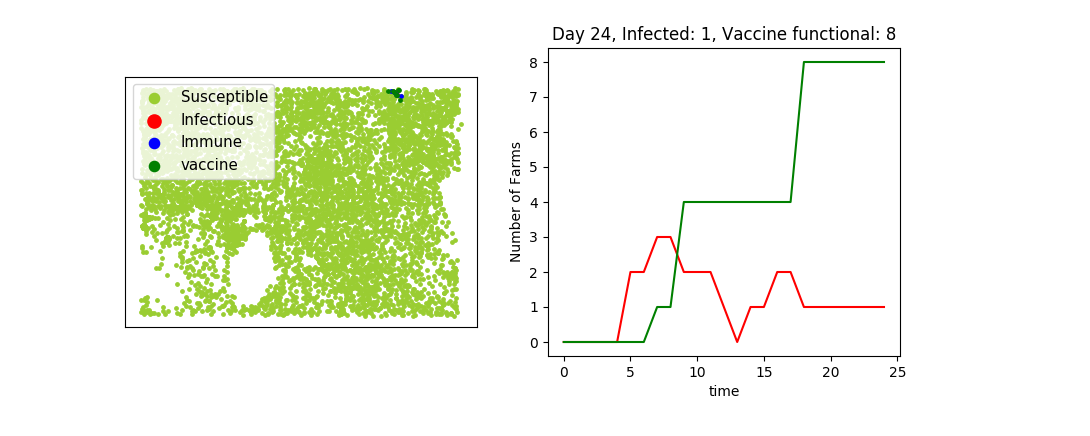

[]
[]
[]
[]
[77, 78]
[77, 78]
[76, 77, 78]
[76, 77, 78]
[76, 77]
[76, 77]
[76, 77]
[76]
[]
[83]
[83]
[83, 440]
[83, 440]
[440]
[440]
[71]
[71]
[71]
[71]
[71]
[]
49.34759068489075


<IPython.core.display.Javascript object>


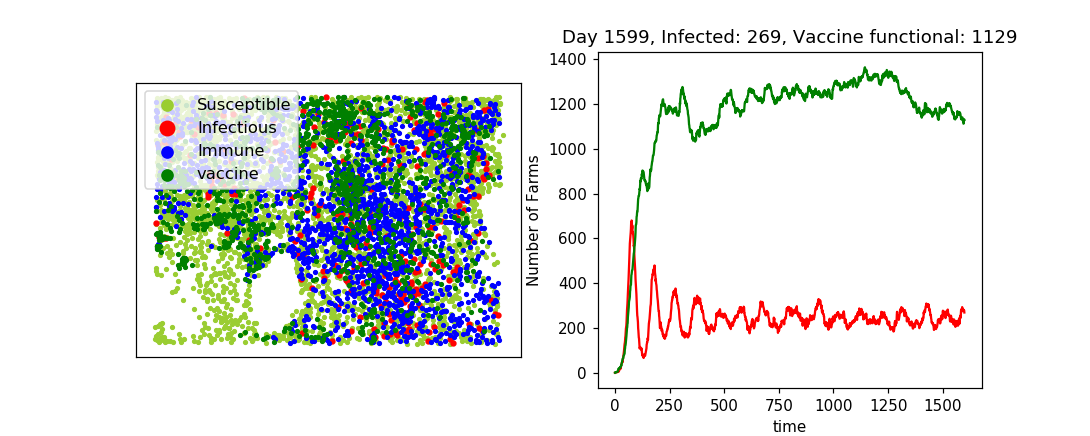

[1004]
[1004]
[1004, 1005]
[1004, 1005]
[1004, 1005]
[1004, 1005, 1006]
[1004, 1005, 1006]
[1004, 1005, 1006]
[1004, 1005, 1006]
[1005, 1120]
[519, 924, 1120]
[519, 924, 1001, 1120]
[519, 881, 924, 1001, 1120, 1364]
[519, 761, 881, 924, 1001, 1120, 1364]
[519, 761, 881, 924, 1120, 1364]
[519, 761, 881, 1120, 1364]
[519, 761, 881, 1120, 1364]
[410, 519, 669, 761, 1120, 1124, 1240, 1364, 2489]
[401, 410, 519, 669, 761, 1124, 1240, 1364, 2489]
[401, 410, 445, 517, 519, 669, 759, 761, 1124, 1240, 1364, 2113, 2489]
[401, 410, 445, 517, 519, 669, 759, 761, 880, 1124, 1240, 1364, 2113, 2489]
[401, 410, 445, 512, 517, 519, 535, 669, 759, 880, 1240, 1360, 1364, 1709, 2113, 2489]
[401, 410, 445, 512, 517, 535, 669, 759, 880, 1240, 1324, 1360, 1364, 1709, 2113, 2213, 2489]
[401, 407, 410, 445, 512, 517, 535, 641, 669, 759, 880, 1240, 1324, 1360, 1364, 1709, 2113, 2201, 2213, 2489]
[401, 407, 410, 445, 512, 517, 641, 669, 880, 1240, 1324, 1360, 1368, 1709, 2113, 2201, 2213]
[401, 407, 410, 413, 44

[241, 371, 389, 390, 398, 449, 501, 509, 520, 533, 537, 569, 625, 639, 643, 645, 648, 670, 730, 742, 747, 762, 768, 783, 805, 858, 859, 862, 873, 878, 886, 892, 899, 941, 977, 985, 986, 989, 990, 1012, 1014, 1023, 1032, 1044, 1083, 1116, 1128, 1131, 1222, 1224, 1231, 1234, 1248, 1331, 1354, 1359, 1370, 1371, 1415, 1420, 1448, 1460, 1468, 1481, 1495, 1558, 1591, 1595, 1608, 1617, 1625, 1672, 1694, 1697, 1706, 1714, 1719, 1770, 1790, 1795, 1796, 1801, 1811, 1818, 1831, 1878, 1906, 1907, 1913, 1914, 1977, 2011, 2024, 2110, 2262, 2293, 2296, 2354, 2373, 2385, 2387, 2392, 2402, 2494, 2500, 2503, 2585, 2687, 2688, 2707, 2708, 2711, 2798, 2800, 2801, 2895, 2898, 2902, 2908, 2920, 2948, 3078, 3094, 3102, 3184, 3190, 3203, 3264, 3270, 3379, 3452, 3462, 3555, 3771, 3843, 3947, 3948, 4125, 4319, 5130, 5748, 5940]
[241, 371, 389, 390, 393, 398, 449, 509, 520, 533, 537, 569, 639, 643, 645, 647, 648, 730, 742, 747, 762, 768, 770, 775, 810, 858, 859, 862, 873, 878, 886, 892, 897, 899, 941, 977, 985, 

[48, 126, 160, 165, 235, 237, 238, 255, 257, 258, 370, 376, 390, 397, 495, 508, 528, 530, 533, 537, 542, 605, 622, 748, 751, 753, 756, 769, 773, 775, 782, 785, 789, 810, 840, 860, 862, 865, 867, 869, 870, 887, 892, 894, 911, 941, 988, 989, 1002, 1011, 1012, 1015, 1077, 1085, 1089, 1098, 1108, 1109, 1113, 1116, 1131, 1134, 1222, 1223, 1228, 1333, 1339, 1346, 1347, 1370, 1371, 1383, 1389, 1443, 1466, 1468, 1495, 1496, 1499, 1504, 1505, 1531, 1578, 1581, 1586, 1587, 1590, 1602, 1607, 1610, 1626, 1627, 1661, 1668, 1682, 1721, 1726, 1729, 1731, 1776, 1800, 1812, 1837, 1844, 1896, 1900, 1901, 1912, 1915, 1923, 1930, 2002, 2008, 2026, 2043, 2075, 2104, 2110, 2118, 2122, 2132, 2211, 2258, 2260, 2270, 2282, 2290, 2302, 2310, 2311, 2338, 2360, 2376, 2382, 2391, 2399, 2401, 2411, 2419, 2481, 2482, 2494, 2495, 2558, 2575, 2587, 2597, 2602, 2607, 2643, 2676, 2689, 2694, 2706, 2708, 2725, 2745, 2789, 2794, 2796, 2797, 2804, 2811, 2886, 2887, 2888, 2889, 2894, 2907, 2908, 2913, 2920, 3000, 3001, 3002

[48, 125, 139, 143, 162, 165, 166, 235, 236, 237, 239, 242, 243, 246, 247, 249, 252, 254, 255, 257, 260, 388, 392, 397, 416, 497, 515, 525, 530, 603, 605, 622, 628, 630, 632, 662, 732, 741, 744, 748, 752, 753, 773, 782, 785, 809, 824, 840, 860, 864, 867, 885, 894, 911, 978, 996, 1002, 1010, 1015, 1034, 1043, 1077, 1089, 1098, 1109, 1113, 1119, 1134, 1138, 1141, 1165, 1213, 1226, 1230, 1259, 1322, 1342, 1347, 1349, 1369, 1371, 1376, 1381, 1383, 1385, 1389, 1412, 1466, 1492, 1493, 1494, 1496, 1531, 1564, 1570, 1583, 1587, 1590, 1610, 1611, 1614, 1624, 1647, 1661, 1682, 1718, 1721, 1729, 1731, 1747, 1788, 1794, 1828, 1832, 1837, 1869, 1875, 1896, 1915, 1916, 1930, 1935, 1938, 1982, 1991, 2001, 2002, 2020, 2025, 2071, 2104, 2121, 2137, 2187, 2196, 2198, 2245, 2283, 2285, 2302, 2304, 2310, 2319, 2338, 2375, 2380, 2384, 2391, 2393, 2396, 2400, 2401, 2405, 2410, 2419, 2468, 2474, 2482, 2495, 2508, 2534, 2558, 2575, 2582, 2587, 2589, 2599, 2602, 2606, 2642, 2643, 2663, 2672, 2691, 2694, 2696, 

[11, 36, 122, 125, 127, 133, 135, 139, 142, 143, 148, 152, 155, 161, 162, 163, 236, 245, 246, 247, 248, 249, 251, 252, 253, 256, 260, 324, 388, 421, 422, 437, 497, 499, 502, 507, 525, 530, 603, 607, 622, 628, 660, 732, 741, 743, 744, 748, 752, 774, 781, 809, 822, 824, 837, 860, 864, 867, 875, 885, 891, 894, 906, 910, 918, 957, 969, 973, 978, 987, 996, 1020, 1031, 1034, 1039, 1090, 1119, 1134, 1138, 1141, 1150, 1168, 1181, 1207, 1213, 1216, 1221, 1230, 1254, 1255, 1259, 1340, 1342, 1344, 1345, 1349, 1369, 1383, 1466, 1492, 1493, 1494, 1502, 1515, 1583, 1613, 1614, 1619, 1623, 1647, 1661, 1718, 1727, 1731, 1788, 1794, 1815, 1816, 1828, 1832, 1868, 1869, 1872, 1875, 1883, 1891, 1916, 1921, 1931, 1935, 1938, 1942, 1965, 1982, 1983, 1986, 1987, 1991, 1996, 1998, 2000, 2001, 2020, 2025, 2071, 2084, 2104, 2162, 2176, 2186, 2187, 2196, 2210, 2212, 2245, 2261, 2269, 2283, 2285, 2302, 2306, 2310, 2319, 2321, 2338, 2351, 2375, 2381, 2384, 2396, 2398, 2400, 2405, 2452, 2472, 2474, 2477, 2495, 2499

[11, 122, 127, 135, 140, 142, 143, 145, 146, 148, 149, 152, 155, 161, 163, 164, 240, 245, 246, 248, 249, 253, 260, 319, 399, 419, 421, 422, 423, 437, 483, 484, 497, 499, 502, 507, 530, 548, 603, 628, 660, 692, 696, 708, 725, 732, 737, 743, 752, 774, 781, 786, 797, 822, 824, 833, 837, 864, 885, 891, 893, 906, 910, 925, 935, 957, 966, 969, 970, 973, 987, 996, 1019, 1020, 1028, 1034, 1039, 1059, 1090, 1136, 1140, 1141, 1150, 1181, 1201, 1221, 1254, 1255, 1259, 1279, 1281, 1336, 1340, 1343, 1344, 1345, 1348, 1349, 1350, 1355, 1387, 1411, 1449, 1459, 1485, 1492, 1515, 1519, 1530, 1555, 1575, 1596, 1613, 1623, 1637, 1638, 1640, 1643, 1648, 1673, 1704, 1720, 1727, 1728, 1768, 1769, 1783, 1794, 1815, 1820, 1824, 1825, 1834, 1868, 1869, 1875, 1883, 1884, 1888, 1891, 1892, 1920, 1921, 1925, 1931, 1938, 1942, 1965, 1982, 1983, 1986, 1991, 2000, 2013, 2020, 2033, 2034, 2071, 2084, 2093, 2134, 2162, 2173, 2191, 2210, 2224, 2230, 2245, 2261, 2273, 2306, 2319, 2331, 2358, 2374, 2381, 2397, 2398, 2406

[11, 35, 50, 127, 130, 132, 134, 135, 142, 143, 144, 145, 146, 149, 155, 240, 245, 249, 302, 303, 306, 307, 319, 340, 399, 419, 422, 433, 437, 483, 484, 497, 499, 500, 502, 504, 530, 548, 557, 615, 624, 626, 628, 692, 696, 719, 725, 737, 743, 797, 821, 822, 833, 838, 861, 864, 893, 910, 925, 935, 945, 957, 958, 966, 969, 970, 973, 975, 987, 1019, 1028, 1040, 1059, 1063, 1093, 1124, 1136, 1149, 1150, 1178, 1201, 1218, 1221, 1254, 1255, 1259, 1278, 1279, 1336, 1338, 1343, 1345, 1348, 1350, 1355, 1382, 1411, 1423, 1449, 1455, 1459, 1485, 1514, 1515, 1516, 1519, 1530, 1555, 1567, 1568, 1575, 1596, 1612, 1622, 1623, 1637, 1638, 1640, 1643, 1673, 1704, 1720, 1727, 1728, 1806, 1820, 1822, 1824, 1825, 1849, 1868, 1884, 1888, 1890, 1891, 1892, 1920, 1925, 1931, 1939, 1942, 1968, 1975, 1981, 1982, 1986, 2000, 2013, 2023, 2028, 2033, 2074, 2083, 2093, 2111, 2134, 2160, 2171, 2173, 2180, 2185, 2191, 2199, 2204, 2210, 2216, 2223, 2224, 2230, 2245, 2256, 2273, 2319, 2331, 2343, 2349, 2368, 2381, 239

[5, 11, 15, 16, 50, 111, 123, 127, 132, 134, 135, 137, 144, 146, 149, 150, 153, 157, 225, 240, 245, 278, 296, 297, 302, 303, 307, 327, 337, 340, 372, 382, 420, 433, 437, 484, 499, 500, 504, 557, 586, 610, 615, 624, 626, 657, 692, 696, 709, 719, 726, 799, 821, 822, 831, 833, 838, 842, 861, 888, 893, 905, 943, 945, 957, 958, 970, 975, 1040, 1057, 1059, 1063, 1068, 1093, 1103, 1136, 1158, 1175, 1187, 1200, 1204, 1218, 1221, 1227, 1254, 1260, 1278, 1279, 1282, 1284, 1292, 1338, 1348, 1350, 1355, 1375, 1379, 1382, 1411, 1455, 1485, 1514, 1516, 1519, 1524, 1530, 1549, 1555, 1567, 1568, 1571, 1575, 1594, 1596, 1612, 1622, 1623, 1637, 1640, 1643, 1673, 1686, 1689, 1727, 1732, 1736, 1751, 1781, 1819, 1820, 1822, 1824, 1825, 1840, 1849, 1884, 1890, 1892, 1920, 1925, 1931, 1934, 1939, 1949, 1966, 1968, 1975, 1981, 1982, 1985, 1986, 2023, 2027, 2028, 2077, 2083, 2093, 2111, 2123, 2155, 2160, 2171, 2173, 2180, 2185, 2191, 2199, 2204, 2210, 2216, 2223, 2232, 2273, 2278, 2318, 2323, 2343, 2349, 2398,

[5, 12, 15, 16, 50, 55, 66, 111, 124, 136, 137, 141, 144, 150, 153, 157, 201, 206, 225, 240, 245, 278, 286, 296, 297, 302, 303, 304, 305, 307, 309, 312, 328, 334, 337, 340, 372, 382, 420, 424, 433, 464, 557, 586, 610, 615, 621, 624, 657, 678, 696, 701, 709, 767, 799, 811, 821, 825, 831, 838, 842, 849, 861, 888, 890, 893, 905, 940, 943, 958, 975, 1027, 1040, 1056, 1057, 1068, 1103, 1143, 1158, 1164, 1175, 1187, 1199, 1200, 1204, 1218, 1219, 1221, 1227, 1229, 1254, 1258, 1260, 1271, 1275, 1279, 1282, 1284, 1292, 1294, 1306, 1337, 1375, 1379, 1411, 1455, 1457, 1461, 1464, 1467, 1485, 1514, 1516, 1519, 1521, 1524, 1549, 1555, 1566, 1568, 1571, 1575, 1594, 1622, 1623, 1641, 1686, 1689, 1727, 1730, 1732, 1736, 1751, 1789, 1819, 1825, 1836, 1840, 1884, 1890, 1892, 1925, 1931, 1934, 1936, 1939, 1948, 1949, 1966, 1969, 1972, 1975, 1981, 2018, 2027, 2064, 2069, 2077, 2083, 2088, 2091, 2109, 2111, 2124, 2127, 2155, 2164, 2177, 2180, 2181, 2182, 2185, 2204, 2216, 2223, 2226, 2229, 2232, 2276, 2295

[5, 12, 15, 16, 55, 63, 66, 111, 124, 136, 137, 141, 147, 150, 201, 206, 213, 217, 225, 240, 245, 278, 279, 289, 296, 297, 301, 304, 305, 309, 310, 312, 320, 323, 325, 328, 331, 334, 336, 337, 338, 339, 340, 341, 372, 381, 424, 433, 464, 482, 559, 586, 599, 602, 610, 614, 621, 624, 653, 657, 678, 679, 696, 701, 767, 799, 825, 831, 849, 861, 889, 890, 932, 943, 950, 958, 974, 975, 1027, 1040, 1052, 1056, 1057, 1068, 1072, 1103, 1105, 1143, 1155, 1159, 1164, 1180, 1186, 1187, 1188, 1199, 1200, 1215, 1218, 1219, 1229, 1254, 1258, 1271, 1275, 1282, 1284, 1294, 1298, 1302, 1306, 1315, 1337, 1353, 1375, 1398, 1400, 1403, 1414, 1430, 1436, 1452, 1456, 1457, 1461, 1464, 1467, 1477, 1486, 1517, 1521, 1532, 1535, 1540, 1549, 1552, 1561, 1566, 1574, 1576, 1597, 1634, 1641, 1644, 1687, 1691, 1730, 1732, 1735, 1736, 1751, 1789, 1839, 1841, 1842, 1846, 1867, 1882, 1895, 1924, 1925, 1936, 1949, 1966, 1969, 1972, 2006, 2018, 2027, 2046, 2047, 2062, 2064, 2072, 2077, 2083, 2088, 2091, 2109, 2111, 2124,

[0, 6, 8, 12, 16, 51, 53, 54, 55, 59, 61, 62, 63, 66, 98, 104, 108, 111, 112, 124, 136, 147, 171, 175, 182, 203, 213, 214, 217, 223, 227, 271, 278, 279, 284, 288, 295, 299, 301, 304, 305, 308, 309, 311, 312, 315, 316, 317, 318, 320, 323, 325, 331, 334, 336, 337, 339, 341, 381, 424, 434, 482, 550, 554, 559, 566, 585, 599, 602, 610, 646, 653, 657, 659, 679, 701, 739, 740, 767, 799, 849, 861, 889, 890, 917, 932, 939, 943, 958, 974, 1017, 1027, 1052, 1056, 1058, 1061, 1062, 1067, 1072, 1096, 1107, 1155, 1157, 1159, 1164, 1180, 1186, 1188, 1194, 1199, 1200, 1215, 1218, 1246, 1258, 1271, 1275, 1282, 1295, 1298, 1299, 1302, 1306, 1315, 1353, 1374, 1398, 1400, 1403, 1413, 1414, 1429, 1430, 1457, 1461, 1477, 1486, 1517, 1532, 1535, 1540, 1549, 1552, 1556, 1561, 1574, 1576, 1634, 1644, 1667, 1671, 1676, 1691, 1730, 1735, 1736, 1751, 1771, 1789, 1841, 1842, 1843, 1846, 1863, 1867, 1895, 1924, 1925, 1933, 1946, 1972, 2006, 2027, 2046, 2047, 2062, 2064, 2067, 2088, 2119, 2127, 2128, 2130, 2142, 215

[0, 1, 4, 6, 8, 14, 16, 27, 32, 51, 57, 59, 62, 63, 71, 83, 90, 98, 104, 108, 111, 114, 136, 173, 175, 202, 204, 212, 213, 214, 217, 223, 227, 263, 264, 265, 268, 271, 275, 279, 281, 282, 288, 299, 300, 304, 305, 308, 311, 312, 313, 315, 316, 317, 318, 320, 321, 323, 325, 330, 331, 332, 335, 339, 430, 438, 554, 556, 560, 561, 566, 583, 585, 602, 611, 623, 634, 646, 653, 659, 679, 695, 699, 701, 715, 720, 739, 740, 761, 767, 794, 799, 813, 832, 889, 913, 917, 932, 938, 939, 943, 968, 974, 1029, 1052, 1058, 1061, 1062, 1066, 1067, 1069, 1072, 1073, 1086, 1096, 1107, 1151, 1155, 1157, 1159, 1164, 1179, 1180, 1194, 1197, 1202, 1215, 1218, 1225, 1241, 1246, 1295, 1298, 1299, 1300, 1302, 1306, 1308, 1315, 1353, 1358, 1374, 1398, 1400, 1413, 1425, 1426, 1429, 1432, 1441, 1477, 1517, 1532, 1535, 1540, 1545, 1546, 1556, 1560, 1576, 1577, 1584, 1634, 1639, 1644, 1649, 1660, 1667, 1676, 1751, 1771, 1782, 1792, 1842, 1863, 1867, 1874, 1879, 1895, 1924, 1933, 1946, 1972, 1988, 2029, 2047, 2062, 206

[1, 6, 8, 14, 27, 32, 52, 57, 62, 63, 67, 88, 97, 98, 107, 108, 113, 114, 118, 173, 175, 179, 180, 196, 202, 204, 205, 210, 211, 212, 213, 217, 222, 223, 227, 234, 263, 267, 271, 275, 277, 279, 281, 282, 285, 288, 298, 299, 300, 308, 311, 313, 314, 317, 318, 320, 321, 332, 335, 430, 438, 454, 556, 560, 561, 566, 577, 583, 587, 596, 602, 611, 623, 689, 699, 715, 720, 734, 739, 740, 791, 794, 798, 813, 832, 913, 914, 929, 930, 937, 939, 949, 968, 1053, 1055, 1058, 1062, 1066, 1067, 1069, 1072, 1073, 1080, 1086, 1111, 1151, 1157, 1159, 1180, 1194, 1197, 1202, 1215, 1225, 1241, 1246, 1295, 1297, 1299, 1300, 1302, 1303, 1306, 1318, 1334, 1358, 1374, 1398, 1400, 1425, 1426, 1432, 1435, 1441, 1535, 1536, 1537, 1545, 1546, 1547, 1560, 1576, 1577, 1584, 1634, 1639, 1645, 1649, 1652, 1653, 1665, 1675, 1676, 1688, 1701, 1741, 1743, 1754, 1765, 1771, 1782, 1792, 1859, 1874, 1879, 1895, 1946, 1957, 1962, 1971, 1979, 1988, 2029, 2045, 2047, 2051, 2053, 2054, 2062, 2065, 2067, 2082, 2088, 2094, 2119,

[14, 25, 32, 85, 87, 88, 95, 97, 99, 107, 110, 114, 118, 179, 180, 181, 193, 196, 202, 204, 205, 207, 211, 216, 218, 222, 223, 233, 234, 263, 266, 270, 272, 273, 275, 281, 282, 285, 287, 288, 298, 300, 314, 317, 321, 332, 430, 438, 454, 465, 552, 556, 560, 561, 577, 587, 602, 608, 611, 642, 650, 689, 693, 702, 720, 734, 740, 749, 750, 791, 794, 796, 798, 800, 813, 815, 826, 834, 846, 847, 914, 929, 930, 933, 937, 949, 1053, 1055, 1060, 1062, 1067, 1073, 1080, 1081, 1086, 1095, 1111, 1156, 1157, 1159, 1194, 1196, 1198, 1202, 1225, 1273, 1276, 1295, 1297, 1299, 1303, 1304, 1305, 1310, 1312, 1318, 1323, 1373, 1374, 1378, 1418, 1428, 1435, 1441, 1518, 1535, 1536, 1537, 1538, 1547, 1550, 1584, 1620, 1645, 1649, 1652, 1653, 1655, 1658, 1665, 1675, 1676, 1688, 1700, 1701, 1741, 1743, 1754, 1758, 1765, 1771, 1782, 1859, 1873, 1879, 1962, 1973, 1979, 2045, 2047, 2050, 2051, 2053, 2065, 2067, 2070, 2082, 2129, 2131, 2136, 2146, 2150, 2169, 2178, 2188, 2227, 2243, 2244, 2247, 2307, 2340, 2342, 23

[25, 28, 29, 34, 40, 70, 79, 81, 85, 86, 87, 88, 95, 99, 102, 107, 110, 114, 115, 129, 172, 176, 185, 188, 192, 195, 196, 199, 202, 205, 207, 209, 218, 224, 234, 262, 263, 270, 273, 274, 276, 287, 290, 291, 292, 294, 314, 332, 429, 454, 465, 492, 552, 561, 577, 588, 602, 608, 642, 650, 652, 666, 674, 689, 693, 702, 717, 740, 749, 750, 791, 800, 826, 829, 834, 844, 846, 902, 914, 930, 1021, 1053, 1060, 1078, 1079, 1081, 1086, 1091, 1095, 1159, 1189, 1193, 1198, 1225, 1232, 1276, 1295, 1297, 1303, 1304, 1305, 1310, 1312, 1318, 1323, 1378, 1428, 1431, 1444, 1488, 1491, 1512, 1518, 1533, 1534, 1535, 1536, 1538, 1541, 1542, 1543, 1547, 1550, 1589, 1620, 1651, 1652, 1656, 1658, 1665, 1675, 1677, 1681, 1700, 1701, 1741, 1743, 1754, 1756, 1758, 1761, 1764, 1767, 1855, 1856, 1865, 1871, 1873, 1926, 1973, 2040, 2051, 2061, 2065, 2070, 2129, 2146, 2149, 2150, 2152, 2190, 2242, 2243, 2340, 2342, 2350, 2364, 2370, 2390, 2420, 2429, 2433, 2437, 2443, 2445, 2464, 2479, 2510, 2513, 2516, 2518, 2532, 2

[28, 29, 38, 41, 56, 70, 81, 85, 86, 87, 95, 102, 107, 110, 115, 121, 129, 172, 176, 188, 190, 192, 198, 199, 205, 207, 209, 224, 228, 231, 262, 273, 274, 276, 283, 290, 291, 294, 400, 429, 439, 492, 552, 555, 561, 588, 600, 609, 664, 700, 702, 716, 749, 750, 800, 810, 826, 829, 844, 846, 900, 922, 954, 959, 963, 999, 1016, 1021, 1030, 1035, 1053, 1060, 1065, 1075, 1078, 1079, 1081, 1084, 1088, 1091, 1095, 1114, 1130, 1189, 1231, 1232, 1277, 1295, 1309, 1312, 1314, 1321, 1323, 1378, 1401, 1417, 1431, 1479, 1488, 1512, 1513, 1527, 1533, 1534, 1536, 1544, 1547, 1550, 1559, 1589, 1620, 1651, 1652, 1656, 1665, 1666, 1674, 1677, 1741, 1748, 1754, 1756, 1759, 1760, 1761, 1762, 1764, 1767, 1855, 1856, 1860, 1865, 1871, 1873, 1880, 1954, 1956, 1958, 1973, 2040, 2051, 2057, 2058, 2090, 2102, 2129, 2144, 2149, 2151, 2190, 2241, 2242, 2298, 2328, 2342, 2350, 2370, 2430, 2433, 2434, 2435, 2447, 2516, 2518, 2520, 2532, 2537, 2538, 2544, 2549, 2551, 2576, 2637, 2638, 2657, 2662, 2727, 2728, 2732, 27

[29, 31, 42, 43, 68, 72, 74, 75, 77, 101, 110, 129, 174, 178, 183, 194, 199, 209, 219, 231, 276, 283, 293, 353, 400, 429, 439, 445, 474, 485, 564, 569, 619, 664, 713, 714, 787, 810, 844, 846, 900, 922, 934, 946, 954, 963, 999, 1042, 1060, 1070, 1075, 1081, 1088, 1112, 1130, 1148, 1160, 1161, 1176, 1206, 1277, 1285, 1301, 1314, 1321, 1417, 1431, 1433, 1482, 1513, 1534, 1544, 1664, 1684, 1757, 1759, 1821, 1852, 1914, 1919, 1947, 1951, 1954, 1961, 2019, 2040, 2051, 2056, 2058, 2059, 2090, 2102, 2144, 2158, 2207, 2219, 2238, 2254, 2298, 2337, 2422, 2425, 2430, 2434, 2444, 2447, 2516, 2519, 2536, 2627, 2657, 2695, 2727, 2740, 2741, 2786, 2822, 2836, 2838, 2873, 2927, 2932, 2960, 2988, 3039, 3050, 3053, 3112, 3116, 3137, 3145, 3219, 3224, 3346, 3406, 3462, 3463, 3495, 3590, 3708, 3794, 3809, 3812, 3818, 3893, 3918, 3930, 3931, 3987, 4013, 4016, 4098, 4193, 4210, 4258, 4330, 4338, 4405, 4425, 4437, 4490, 4496, 4499, 4511, 4512, 4585, 4589, 4622, 4623, 4660, 4725, 4744, 4815, 4882, 4883, 4886,

[22, 48, 194, 221, 232, 355, 449, 490, 573, 597, 620, 687, 711, 735, 804, 830, 872, 897, 947, 953, 964, 1160, 1163, 1166, 1208, 1209, 1247, 1256, 1286, 1313, 1324, 1364, 1391, 1475, 1476, 1478, 1628, 1646, 1709, 1717, 1786, 1814, 1932, 1952, 1955, 1960, 2015, 2114, 2147, 2157, 2281, 2335, 2336, 2421, 2430, 2570, 2607, 2618, 2631, 2773, 2947, 3038, 3115, 3122, 3139, 3253, 3407, 3461, 3551, 3586, 3802, 3804, 3846, 3909, 3998, 4036, 4097, 4183, 4207, 4211, 4333, 4426, 4508, 4510, 4594, 4724, 4736, 4743, 4862, 4881, 4886, 4902, 4939, 4962, 5011, 5085, 5435, 5496, 5580, 5603, 5630, 5678, 5690, 5706, 5739, 5838, 5873, 5911, 5936, 5987, 5993, 6047, 6051, 6055]
[48, 93, 194, 221, 355, 449, 573, 595, 597, 620, 649, 687, 711, 735, 804, 830, 872, 947, 953, 962, 964, 1160, 1163, 1166, 1208, 1209, 1247, 1256, 1286, 1313, 1324, 1352, 1364, 1390, 1391, 1475, 1476, 1478, 1628, 1646, 1709, 1717, 1786, 1932, 1952, 1955, 1960, 2015, 2114, 2147, 2255, 2281, 2335, 2336, 2421, 2570, 2618, 2631, 2773, 2947, 

[126, 347, 403, 407, 469, 470, 477, 574, 592, 622, 656, 670, 686, 723, 763, 769, 782, 784, 785, 808, 854, 862, 871, 882, 884, 892, 911, 961, 990, 1116, 1126, 1128, 1131, 1138, 1152, 1248, 1359, 1365, 1602, 1628, 1710, 1711, 1810, 1909, 1930, 2116, 2162, 2189, 2352, 2481, 2977, 3123, 3170, 3190, 3373, 3407, 3454, 3503, 3810, 4125, 4233, 4319, 4480, 4507, 4669, 4811, 4885, 5060, 5551, 5701, 5910, 5986, 5988]
[126, 347, 403, 407, 469, 470, 477, 518, 524, 574, 592, 622, 670, 686, 723, 758, 763, 769, 782, 784, 785, 808, 854, 862, 880, 882, 884, 911, 961, 990, 1116, 1126, 1128, 1131, 1138, 1248, 1359, 1365, 1602, 1710, 1711, 1810, 1909, 1930, 2116, 2162, 2189, 2481, 2977, 3123, 3170, 3373, 3454, 3810, 4233, 4319, 4394, 4480, 4507, 4669, 4674, 4811, 4885, 5060, 5551, 5701, 5910, 5974, 5986, 5988]
[126, 347, 407, 469, 470, 477, 518, 524, 574, 592, 622, 670, 686, 737, 758, 762, 763, 769, 782, 784, 785, 808, 842, 854, 862, 880, 884, 911, 990, 995, 1116, 1126, 1128, 1131, 1138, 1248, 1359, 1371, 

[127, 133, 135, 143, 145, 146, 148, 149, 150, 152, 155, 160, 162, 163, 344, 397, 404, 409, 432, 471, 519, 525, 527, 533, 575, 603, 611, 648, 747, 756, 762, 781, 855, 878, 883, 887, 970, 1010, 1011, 1122, 1123, 1134, 1217, 1221, 1235, 1240, 1254, 1331, 1354, 1356, 1370, 1372, 1466, 1468, 1472, 1481, 1494, 1605, 1607, 1608, 1610, 1703, 1707, 1723, 1727, 1728, 1802, 1811, 1824, 1831, 1835, 1837, 1905, 1912, 1915, 1916, 2323, 2582, 2587, 2597, 2689, 2704, 2712, 2778, 2780, 2798, 2884, 2894, 2895, 2897, 2995, 3047, 3086, 3124, 3216, 3281, 3368, 3372, 3544, 3548, 3692, 3858, 3989, 3996, 4027, 4058, 4071, 4075, 4122, 4128, 4176, 4223, 4229, 4241, 4251, 4346, 4381, 4419, 4467, 4478, 4587, 4642, 4672, 4673, 4702, 4866, 5419, 5771, 6049]
[127, 133, 135, 143, 145, 146, 148, 149, 150, 152, 155, 160, 162, 163, 282, 344, 397, 401, 404, 410, 432, 519, 525, 527, 533, 603, 648, 747, 756, 761, 855, 878, 883, 887, 970, 1011, 1122, 1123, 1134, 1217, 1221, 1229, 1235, 1240, 1254, 1331, 1354, 1356, 1370, 13

[15, 16, 122, 125, 137, 139, 142, 143, 154, 254, 267, 339, 393, 398, 399, 410, 411, 419, 432, 433, 507, 527, 532, 630, 644, 648, 697, 699, 790, 861, 886, 918, 985, 994, 1083, 1091, 1093, 1098, 1113, 1204, 1216, 1221, 1229, 1242, 1253, 1328, 1341, 1381, 1383, 1443, 1450, 1460, 1461, 1466, 1492, 1566, 1587, 1590, 1591, 1595, 1611, 1612, 1659, 1686, 1692, 1707, 1708, 1716, 1718, 1721, 1727, 1729, 1770, 1788, 1794, 1796, 1815, 1820, 1825, 1828, 1888, 1892, 1905, 1913, 1921, 1924, 1925, 2011, 2012, 2013, 2111, 2122, 2186, 2187, 2228, 2305, 2313, 2322, 2376, 2378, 2381, 2385, 2391, 2399, 2409, 2418, 2440, 2485, 2500, 2522, 2581, 2594, 2599, 2687, 2688, 2700, 2704, 2782, 2784, 2797, 2801, 2802, 2829, 2840, 2904, 2914, 2923, 3000, 3001, 3069, 3090, 3119, 3125, 3158, 3206, 3209, 3257, 3266, 3272, 3286, 3302, 3328, 3371, 3376, 3379, 3536, 3537, 3550, 3552, 3555, 3593, 3637, 3642, 3644, 3653, 3665, 3747, 3765, 3836, 3870, 3947, 3951, 3953, 3956, 3961, 3965, 3976, 3989, 3995, 4030, 4051, 4057, 406

[11, 15, 16, 96, 118, 154, 164, 242, 248, 251, 258, 266, 269, 277, 290, 296, 307, 324, 340, 341, 394, 398, 408, 431, 433, 520, 532, 538, 548, 610, 644, 679, 697, 728, 743, 752, 786, 790, 853, 860, 861, 867, 872, 885, 893, 899, 930, 935, 957, 1015, 1019, 1082, 1086, 1091, 1100, 1204, 1215, 1223, 1227, 1339, 1349, 1350, 1357, 1379, 1382, 1383, 1384, 1387, 1451, 1453, 1461, 1492, 1505, 1514, 1570, 1575, 1590, 1614, 1617, 1622, 1659, 1682, 1696, 1733, 1788, 1794, 1796, 1800, 1815, 1816, 1825, 1846, 1857, 1875, 1896, 1901, 1913, 1918, 1925, 2020, 2023, 2087, 2091, 2111, 2122, 2191, 2204, 2227, 2228, 2321, 2337, 2364, 2379, 2391, 2393, 2398, 2399, 2401, 2402, 2440, 2488, 2585, 2601, 2605, 2608, 2638, 2688, 2690, 2696, 2702, 2706, 2777, 2782, 2789, 2804, 2829, 2849, 2877, 2893, 2904, 2918, 2923, 2972, 2991, 2992, 2993, 2994, 2997, 3001, 3070, 3078, 3079, 3104, 3135, 3176, 3177, 3199, 3208, 3255, 3257, 3266, 3269, 3275, 3276, 3286, 3302, 3306, 3328, 3367, 3462, 3537, 3547, 3554, 3557, 3565, 35

[16, 20, 66, 95, 112, 123, 236, 237, 238, 241, 246, 248, 258, 263, 271, 272, 286, 290, 296, 297, 307, 308, 309, 310, 324, 327, 331, 337, 340, 341, 386, 388, 390, 394, 423, 431, 440, 500, 610, 624, 628, 679, 726, 742, 743, 751, 752, 797, 853, 860, 867, 872, 885, 893, 899, 914, 930, 956, 957, 968, 978, 1068, 1082, 1086, 1106, 1109, 1200, 1215, 1228, 1231, 1269, 1339, 1342, 1347, 1349, 1357, 1379, 1382, 1384, 1435, 1449, 1451, 1453, 1455, 1457, 1505, 1514, 1549, 1551, 1558, 1575, 1579, 1583, 1593, 1613, 1614, 1622, 1682, 1685, 1731, 1733, 1775, 1790, 1795, 1796, 1798, 1818, 1857, 1875, 1896, 1901, 1907, 1920, 1925, 1968, 1981, 2001, 2017, 2020, 2027, 2029, 2033, 2079, 2107, 2108, 2134, 2137, 2191, 2194, 2196, 2204, 2214, 2227, 2266, 2269, 2282, 2284, 2300, 2304, 2324, 2364, 2379, 2382, 2398, 2400, 2402, 2408, 2413, 2441, 2442, 2488, 2496, 2501, 2515, 2584, 2601, 2602, 2605, 2606, 2607, 2608, 2610, 2632, 2638, 2691, 2695, 2702, 2706, 2708, 2740, 2789, 2792, 2795, 2804, 2808, 2819, 2849, 28

[12, 19, 20, 53, 59, 95, 112, 113, 158, 206, 211, 236, 237, 239, 243, 245, 246, 252, 257, 260, 262, 263, 265, 268, 278, 281, 285, 288, 290, 294, 297, 299, 300, 301, 305, 307, 308, 309, 313, 331, 333, 337, 338, 340, 341, 386, 388, 390, 395, 436, 500, 561, 606, 610, 624, 628, 703, 746, 751, 752, 759, 777, 801, 867, 885, 914, 952, 956, 957, 968, 988, 1023, 1056, 1068, 1082, 1086, 1106, 1109, 1200, 1208, 1226, 1228, 1230, 1247, 1260, 1269, 1278, 1292, 1299, 1337, 1339, 1344, 1347, 1348, 1384, 1412, 1453, 1455, 1457, 1496, 1504, 1515, 1528, 1529, 1552, 1558, 1567, 1575, 1583, 1586, 1597, 1613, 1619, 1662, 1682, 1685, 1719, 1730, 1731, 1775, 1790, 1795, 1798, 1812, 1818, 1832, 1839, 1870, 1879, 1900, 1907, 1923, 1968, 1981, 1996, 2000, 2001, 2020, 2027, 2028, 2032, 2079, 2107, 2108, 2134, 2196, 2199, 2214, 2227, 2233, 2269, 2292, 2295, 2296, 2324, 2338, 2380, 2382, 2396, 2398, 2400, 2413, 2425, 2441, 2474, 2489, 2496, 2501, 2515, 2538, 2600, 2602, 2605, 2606, 2607, 2632, 2638, 2643, 2659, 26

[1, 8, 12, 19, 20, 52, 53, 95, 103, 114, 158, 224, 235, 240, 243, 245, 249, 252, 253, 255, 257, 259, 260, 262, 263, 278, 281, 285, 287, 288, 291, 294, 299, 300, 301, 305, 309, 316, 318, 331, 335, 336, 337, 338, 386, 388, 390, 392, 395, 422, 472, 500, 508, 546, 562, 624, 628, 650, 665, 744, 746, 748, 753, 849, 870, 892, 897, 914, 968, 975, 1023, 1049, 1055, 1056, 1069, 1072, 1107, 1112, 1120, 1141, 1200, 1208, 1228, 1230, 1247, 1261, 1278, 1299, 1337, 1344, 1346, 1347, 1348, 1398, 1412, 1436, 1496, 1504, 1515, 1552, 1577, 1578, 1651, 1662, 1681, 1685, 1709, 1731, 1795, 1818, 1832, 1839, 1874, 1879, 1884, 1900, 1914, 1945, 1996, 2000, 2001, 2026, 2027, 2028, 2032, 2034, 2084, 2090, 2108, 2115, 2117, 2123, 2135, 2171, 2213, 2223, 2250, 2252, 2292, 2295, 2296, 2302, 2306, 2310, 2338, 2346, 2396, 2414, 2425, 2441, 2455, 2463, 2471, 2474, 2477, 2489, 2492, 2494, 2496, 2499, 2501, 2515, 2535, 2537, 2538, 2574, 2590, 2600, 2606, 2631, 2643, 2659, 2670, 2672, 2686, 2705, 2707, 2708, 2736, 2737,

[1, 8, 19, 34, 36, 54, 103, 114, 124, 136, 224, 225, 234, 235, 240, 245, 249, 253, 255, 257, 259, 260, 270, 278, 283, 287, 288, 293, 299, 305, 316, 318, 334, 335, 336, 389, 392, 422, 472, 497, 499, 501, 506, 562, 628, 660, 721, 744, 748, 753, 822, 833, 849, 864, 866, 892, 969, 973, 975, 987, 989, 1023, 1025, 1049, 1052, 1055, 1072, 1102, 1107, 1112, 1120, 1141, 1179, 1210, 1247, 1268, 1299, 1312, 1327, 1346, 1348, 1398, 1424, 1425, 1436, 1499, 1526, 1535, 1565, 1569, 1576, 1623, 1627, 1630, 1651, 1662, 1663, 1679, 1681, 1684, 1709, 1714, 1764, 1768, 1776, 1793, 1841, 1877, 1878, 1879, 1884, 1935, 1945, 2001, 2025, 2026, 2034, 2048, 2073, 2076, 2084, 2090, 2093, 2094, 2117, 2119, 2171, 2180, 2213, 2223, 2231, 2250, 2252, 2272, 2283, 2290, 2295, 2302, 2306, 2310, 2332, 2338, 2346, 2357, 2390, 2403, 2405, 2414, 2437, 2460, 2471, 2474, 2477, 2492, 2494, 2495, 2503, 2505, 2510, 2513, 2515, 2535, 2537, 2565, 2590, 2604, 2631, 2643, 2653, 2658, 2669, 2672, 2677, 2686, 2705, 2709, 2728, 2736, 

[1, 8, 62, 63, 104, 121, 124, 136, 153, 216, 217, 225, 234, 240, 245, 249, 255, 259, 270, 275, 283, 293, 334, 385, 389, 420, 422, 472, 486, 497, 499, 501, 511, 660, 748, 775, 824, 833, 864, 865, 910, 932, 969, 973, 975, 987, 989, 1025, 1052, 1072, 1102, 1141, 1179, 1210, 1259, 1268, 1312, 1315, 1327, 1343, 1424, 1425, 1458, 1459, 1499, 1534, 1535, 1565, 1571, 1576, 1623, 1630, 1633, 1637, 1647, 1651, 1679, 1683, 1684, 1688, 1709, 1714, 1764, 1768, 1776, 1778, 1793, 1841, 1877, 1878, 1880, 1883, 1884, 1903, 1935, 1947, 1987, 1995, 2004, 2025, 2048, 2072, 2073, 2076, 2090, 2093, 2094, 2104, 2117, 2119, 2128, 2177, 2180, 2181, 2182, 2190, 2193, 2211, 2213, 2223, 2231, 2236, 2256, 2272, 2278, 2283, 2290, 2302, 2310, 2318, 2332, 2340, 2357, 2359, 2368, 2375, 2397, 2405, 2414, 2437, 2451, 2460, 2472, 2474, 2494, 2495, 2503, 2505, 2508, 2515, 2534, 2535, 2565, 2604, 2633, 2653, 2658, 2672, 2677, 2682, 2686, 2709, 2723, 2728, 2736, 2754, 2764, 2822, 2838, 2839, 2846, 2863, 2870, 2871, 2875, 28

[28, 61, 63, 97, 98, 104, 108, 136, 217, 218, 231, 233, 245, 259, 275, 276, 283, 292, 385, 389, 420, 486, 497, 499, 511, 596, 660, 692, 740, 748, 775, 805, 809, 821, 824, 833, 846, 851, 864, 910, 932, 938, 969, 973, 987, 989, 1053, 1102, 1141, 1143, 1193, 1199, 1201, 1210, 1224, 1241, 1259, 1281, 1298, 1309, 1312, 1315, 1343, 1360, 1459, 1524, 1532, 1534, 1535, 1568, 1576, 1623, 1630, 1633, 1637, 1647, 1666, 1679, 1683, 1688, 1743, 1751, 1762, 1773, 1793, 1877, 1883, 1931, 1947, 1973, 1977, 1987, 2002, 2061, 2073, 2088, 2093, 2104, 2121, 2128, 2139, 2141, 2180, 2182, 2193, 2211, 2223, 2254, 2270, 2272, 2283, 2303, 2312, 2318, 2319, 2340, 2359, 2375, 2392, 2405, 2437, 2453, 2460, 2472, 2495, 2503, 2505, 2507, 2508, 2512, 2521, 2532, 2534, 2565, 2567, 2598, 2609, 2663, 2676, 2677, 2682, 2686, 2709, 2723, 2724, 2727, 2729, 2730, 2734, 2754, 2763, 2764, 2766, 2813, 2827, 2845, 2857, 2863, 2866, 2880, 2888, 2916, 2920, 2932, 2963, 2970, 2973, 2974, 2979, 2983, 2986, 3008, 3013, 3019, 3023, 

[0, 28, 37, 42, 44, 45, 63, 97, 98, 108, 126, 194, 217, 218, 274, 276, 377, 384, 385, 478, 486, 491, 552, 609, 619, 659, 692, 711, 725, 737, 738, 740, 775, 806, 809, 821, 824, 846, 851, 910, 922, 924, 932, 960, 980, 1034, 1053, 1079, 1088, 1116, 1138, 1158, 1175, 1193, 1199, 1201, 1224, 1232, 1241, 1257, 1298, 1360, 1432, 1480, 1517, 1530, 1532, 1534, 1535, 1559, 1568, 1623, 1630, 1639, 1652, 1653, 1654, 1656, 1683, 1743, 1751, 1752, 1761, 1773, 1930, 1931, 1949, 1950, 1972, 1973, 2006, 2056, 2058, 2083, 2088, 2104, 2130, 2141, 2175, 2176, 2235, 2247, 2254, 2270, 2291, 2303, 2316, 2318, 2319, 2359, 2374, 2392, 2453, 2495, 2509, 2512, 2521, 2523, 2532, 2553, 2575, 2598, 2603, 2620, 2656, 2663, 2668, 2676, 2679, 2682, 2724, 2727, 2729, 2734, 2754, 2763, 2783, 2800, 2806, 2813, 2818, 2827, 2833, 2842, 2845, 2854, 2857, 2859, 2864, 2866, 2874, 2880, 2888, 2909, 2932, 2940, 2941, 2979, 2983, 3019, 3044, 3062, 3063, 3105, 3114, 3148, 3170, 3203, 3204, 3218, 3251, 3259, 3277, 3315, 3346, 3348

[29, 42, 45, 56, 98, 115, 126, 194, 227, 274, 276, 289, 371, 372, 384, 416, 428, 478, 491, 552, 577, 619, 725, 740, 810, 846, 851, 908, 980, 1034, 1044, 1053, 1071, 1079, 1081, 1088, 1116, 1124, 1125, 1136, 1138, 1157, 1187, 1201, 1220, 1232, 1270, 1297, 1308, 1360, 1434, 1440, 1446, 1478, 1480, 1517, 1530, 1535, 1543, 1559, 1592, 1594, 1620, 1639, 1652, 1656, 1683, 1749, 1750, 1751, 1752, 1761, 1773, 1782, 1785, 1799, 1844, 1845, 1861, 1881, 1893, 1930, 1931, 1949, 1950, 1972, 1973, 2019, 2056, 2068, 2071, 2083, 2088, 2104, 2130, 2144, 2175, 2226, 2235, 2247, 2267, 2285, 2293, 2303, 2316, 2319, 2359, 2411, 2412, 2420, 2422, 2464, 2506, 2509, 2514, 2521, 2523, 2561, 2575, 2619, 2656, 2661, 2663, 2680, 2713, 2729, 2754, 2783, 2806, 2807, 2818, 2833, 2854, 2855, 2857, 2864, 2882, 2909, 2940, 2941, 2983, 3044, 3059, 3063, 3106, 3114, 3129, 3143, 3144, 3201, 3214, 3218, 3221, 3248, 3251, 3259, 3315, 3346, 3348, 3364, 3401, 3406, 3424, 3464, 3475, 3481, 3498, 3527, 3571, 3575, 3621, 3650, 3

[22, 23, 25, 29, 30, 31, 42, 45, 46, 56, 85, 101, 141, 173, 194, 219, 227, 274, 282, 371, 372, 428, 449, 496, 542, 577, 620, 622, 632, 720, 810, 842, 846, 857, 908, 925, 948, 949, 951, 954, 961, 962, 972, 1034, 1044, 1048, 1065, 1081, 1090, 1103, 1116, 1121, 1136, 1157, 1159, 1169, 1187, 1197, 1220, 1267, 1295, 1297, 1301, 1306, 1313, 1364, 1434, 1446, 1478, 1480, 1513, 1531, 1533, 1537, 1543, 1553, 1592, 1601, 1620, 1624, 1649, 1652, 1660, 1694, 1749, 1750, 1751, 1752, 1799, 1842, 1849, 1852, 1858, 1861, 1872, 1882, 1893, 1908, 1930, 1972, 2050, 2059, 2064, 2068, 2071, 2144, 2201, 2226, 2293, 2315, 2358, 2394, 2411, 2420, 2422, 2447, 2482, 2506, 2514, 2521, 2549, 2557, 2561, 2572, 2575, 2619, 2625, 2629, 2648, 2649, 2661, 2745, 2751, 2757, 2758, 2807, 2826, 2855, 2856, 2922, 2953, 2977, 3002, 3040, 3064, 3106, 3121, 3143, 3160, 3201, 3221, 3245, 3248, 3309, 3322, 3345, 3401, 3424, 3437, 3464, 3575, 3591, 3600, 3621, 3775, 3829, 3935, 3940, 3990, 4042, 4043, 4054, 4099, 4116, 4125, 425

[22, 35, 41, 43, 48, 69, 107, 148, 160, 172, 179, 190, 219, 282, 382, 428, 429, 449, 622, 723, 739, 802, 816, 831, 857, 879, 880, 954, 961, 966, 976, 995, 1048, 1062, 1070, 1076, 1078, 1081, 1101, 1116, 1130, 1159, 1164, 1180, 1195, 1293, 1294, 1295, 1306, 1313, 1336, 1366, 1371, 1407, 1417, 1426, 1433, 1446, 1509, 1511, 1513, 1543, 1544, 1553, 1596, 1598, 1601, 1603, 1626, 1667, 1740, 1746, 1754, 1758, 1852, 1867, 1891, 1893, 1929, 1932, 1941, 1951, 1960, 1991, 2040, 2059, 2064, 2065, 2067, 2070, 2118, 2126, 2152, 2162, 2201, 2237, 2293, 2311, 2341, 2384, 2411, 2447, 2482, 2491, 2514, 2517, 2528, 2541, 2549, 2557, 2629, 2648, 2731, 2745, 2751, 2752, 2757, 2779, 2787, 2900, 3033, 3039, 3040, 3057, 3058, 3121, 3127, 3219, 3236, 3245, 3248, 3322, 3437, 3482, 3577, 3591, 3829, 3910, 3983, 4010, 4034, 4099, 4125, 4137, 4187, 4278, 4330, 4387, 4394, 4405, 4415, 4448, 4550, 4594, 4607, 4609, 4620, 4640, 4656, 4721, 4805, 4815, 4819, 4832, 4882, 4913, 5041, 5044, 5060, 5150, 5186, 5210, 5224,

[48, 78, 107, 175, 199, 358, 375, 429, 437, 505, 547, 626, 674, 696, 699, 739, 843, 856, 879, 909, 911, 991, 1004, 1013, 1037, 1060, 1062, 1063, 1066, 1074, 1075, 1078, 1080, 1089, 1099, 1126, 1130, 1131, 1159, 1164, 1165, 1181, 1246, 1248, 1252, 1272, 1280, 1295, 1304, 1305, 1321, 1371, 1391, 1407, 1430, 1433, 1444, 1472, 1512, 1547, 1557, 1584, 1598, 1609, 1641, 1658, 1669, 1675, 1736, 1754, 1757, 1758, 1759, 1760, 1808, 1810, 1838, 1856, 1868, 1876, 1902, 1932, 1939, 1941, 1942, 1951, 1960, 1966, 1975, 1991, 2008, 2040, 2059, 2065, 2066, 2067, 2099, 2132, 2137, 2153, 2173, 2178, 2201, 2237, 2335, 2336, 2352, 2354, 2436, 2445, 2481, 2491, 2517, 2543, 2545, 2592, 2596, 2617, 2741, 2746, 2779, 2796, 2861, 2862, 2926, 2927, 2939, 2957, 3138, 3152, 3279, 3287, 3308, 3319, 3427, 3482, 3492, 3578, 3584, 3620, 3671, 3811, 3877, 3919, 3975, 4100, 4137, 4206, 4278, 4310, 4319, 4363, 4405, 4466, 4472, 4507, 4586, 4594, 4596, 4607, 4695, 4743, 4797, 4842, 4882, 4938, 5004, 5046, 5060, 5077, 508

[71, 77, 122, 146, 191, 196, 358, 387, 407, 430, 437, 535, 557, 594, 598, 612, 668, 693, 696, 713, 714, 759, 763, 765, 770, 884, 886, 947, 963, 971, 991, 1000, 1002, 1012, 1060, 1091, 1129, 1131, 1160, 1190, 1251, 1254, 1286, 1305, 1321, 1359, 1365, 1431, 1441, 1473, 1485, 1518, 1545, 1556, 1557, 1562, 1604, 1610, 1614, 1615, 1617, 1646, 1664, 1736, 1771, 1789, 1853, 1855, 1871, 1898, 1933, 1952, 1958, 1965, 1974, 1993, 2011, 2015, 2038, 2054, 2066, 2099, 2207, 2209, 2242, 2248, 2335, 2336, 2343, 2345, 2386, 2431, 2449, 2526, 2551, 2641, 2642, 2646, 2693, 2773, 2786, 2841, 2844, 2926, 2957, 2958, 3053, 3092, 3116, 3138, 3142, 3145, 3244, 3307, 3312, 3319, 3337, 3487, 3589, 3594, 3607, 3700, 3856, 4036, 4100, 4118, 4140, 4209, 4271, 4273, 4288, 4309, 4334, 4417, 4466, 4472, 4508, 4521, 4536, 4729, 4884, 4941, 4962, 5000, 5057, 5076, 5105, 5109, 5261, 5316, 5368, 5419, 5472, 5489, 5501, 5540, 5662, 5708, 5736, 5771, 5859, 5866, 5930, 5972, 6013, 6027, 6044]
[71, 77, 122, 146, 167, 183, 1

[125, 135, 143, 145, 155, 165, 166, 167, 183, 195, 200, 407, 432, 485, 517, 519, 524, 595, 643, 649, 652, 724, 757, 761, 762, 850, 860, 863, 871, 913, 915, 946, 992, 993, 999, 1000, 1011, 1060, 1113, 1129, 1135, 1160, 1202, 1231, 1234, 1240, 1242, 1247, 1318, 1372, 1404, 1415, 1481, 1486, 1489, 1493, 1495, 1532, 1560, 1600, 1611, 1707, 1710, 1721, 1727, 1745, 1769, 1771, 1789, 1829, 1892, 1970, 2013, 2238, 2243, 2244, 2255, 2261, 2321, 2323, 2350, 2438, 2446, 2489, 2518, 2573, 2597, 2607, 2616, 2642, 2645, 2646, 2692, 2695, 2726, 2773, 2789, 2798, 2895, 2995, 3000, 3038, 3088, 3101, 3137, 3175, 3230, 3341, 3462, 3548, 3565, 3593, 3603, 3608, 3637, 3701, 3702, 3732, 3882, 3905, 3965, 4103, 4104, 4132, 4139, 4229, 4270, 4274, 4282, 4465, 4467, 4511, 4515, 4552, 4574, 4840, 4885, 4962, 4994, 5016, 5211, 5232, 5471, 5540, 5597, 5659, 5773, 5782, 5792, 5797, 5806, 5840, 5973]
[125, 135, 143, 145, 155, 165, 166, 167, 183, 195, 432, 485, 517, 519, 524, 528, 534, 548, 595, 608, 652, 724, 757, 

[127, 132, 133, 134, 135, 137, 140, 142, 143, 144, 150, 161, 162, 163, 178, 267, 296, 299, 307, 308, 346, 397, 401, 403, 404, 418, 432, 433, 434, 533, 595, 639, 641, 644, 645, 648, 762, 768, 789, 830, 872, 873, 878, 915, 993, 1011, 1019, 1020, 1085, 1092, 1128, 1134, 1203, 1204, 1217, 1230, 1244, 1245, 1247, 1282, 1314, 1332, 1362, 1368, 1370, 1376, 1411, 1415, 1465, 1468, 1475, 1482, 1492, 1589, 1602, 1612, 1692, 1701, 1704, 1707, 1709, 1715, 1727, 1802, 1812, 1818, 1905, 1906, 1917, 1985, 2023, 2110, 2111, 2114, 2122, 2187, 2253, 2305, 2342, 2387, 2398, 2402, 2418, 2492, 2639, 2642, 2643, 2647, 2684, 2689, 2690, 2696, 2697, 2711, 2726, 2785, 2788, 2791, 2804, 2829, 2837, 2865, 2896, 2898, 2992, 3038, 3048, 3056, 3072, 3079, 3086, 3112, 3266, 3272, 3273, 3302, 3361, 3419, 3462, 3486, 3489, 3550, 3563, 3626, 3654, 3674, 3692, 3743, 3850, 3885, 3897, 3939, 3947, 3957, 4027, 4032, 4051, 4176, 4237, 4240, 4270, 4277, 4351, 4409, 4421, 4480, 4490, 4564, 4574, 4672, 4719, 4761, 4773, 4841, 

[5, 16, 127, 131, 138, 139, 149, 152, 154, 156, 157, 158, 260, 281, 293, 295, 300, 307, 318, 333, 337, 338, 340, 345, 394, 402, 410, 418, 434, 441, 516, 533, 536, 617, 629, 638, 646, 647, 648, 708, 717, 750, 778, 790, 817, 892, 901, 914, 977, 994, 1096, 1100, 1104, 1112, 1122, 1128, 1134, 1203, 1228, 1243, 1244, 1245, 1282, 1292, 1330, 1339, 1352, 1356, 1369, 1384, 1385, 1412, 1414, 1460, 1462, 1467, 1492, 1573, 1589, 1590, 1591, 1608, 1621, 1638, 1673, 1696, 1703, 1706, 1729, 1795, 1800, 1809, 1815, 1816, 1875, 1901, 1913, 1915, 1916, 1996, 2003, 2024, 2032, 2033, 2043, 2110, 2111, 2186, 2187, 2228, 2282, 2291, 2294, 2398, 2399, 2441, 2520, 2522, 2537, 2538, 2600, 2638, 2677, 2688, 2694, 2702, 2714, 2729, 2740, 2795, 2797, 2799, 2801, 2805, 2811, 2840, 2877, 2892, 2894, 2898, 2902, 2904, 2918, 2989, 2994, 3004, 3048, 3085, 3090, 3128, 3135, 3166, 3171, 3176, 3186, 3212, 3260, 3269, 3292, 3360, 3362, 3367, 3459, 3517, 3537, 3551, 3555, 3568, 3655, 3688, 3756, 3771, 3849, 3851, 3942, 39

[16, 126, 138, 147, 148, 154, 158, 235, 236, 237, 239, 240, 244, 246, 247, 248, 251, 260, 263, 282, 290, 294, 301, 305, 310, 318, 336, 337, 339, 340, 341, 344, 345, 393, 516, 520, 532, 537, 544, 709, 760, 791, 817, 865, 892, 897, 898, 994, 1008, 1023, 1050, 1056, 1083, 1108, 1120, 1123, 1141, 1209, 1218, 1225, 1228, 1243, 1260, 1271, 1335, 1339, 1349, 1350, 1384, 1436, 1448, 1455, 1466, 1469, 1494, 1506, 1573, 1586, 1587, 1590, 1608, 1622, 1723, 1728, 1735, 1739, 1776, 1786, 1790, 1795, 1796, 1875, 1896, 1897, 1907, 1915, 2021, 2025, 2032, 2073, 2086, 2090, 2092, 2109, 2165, 2177, 2204, 2213, 2272, 2294, 2295, 2296, 2302, 2304, 2324, 2382, 2409, 2440, 2496, 2500, 2502, 2510, 2554, 2586, 2587, 2599, 2608, 2612, 2638, 2687, 2702, 2705, 2708, 2729, 2737, 2792, 2808, 2809, 2876, 2918, 2923, 2950, 2987, 2990, 3006, 3011, 3028, 3029, 3078, 3083, 3084, 3096, 3128, 3134, 3150, 3172, 3173, 3185, 3186, 3187, 3194, 3197, 3220, 3267, 3291, 3298, 3301, 3359, 3362, 3365, 3449, 3458, 3461, 3474, 3553

[12, 15, 26, 63, 164, 208, 238, 240, 241, 244, 246, 247, 250, 252, 253, 254, 255, 256, 257, 258, 262, 263, 270, 271, 277, 278, 282, 290, 291, 305, 309, 316, 341, 344, 372, 393, 420, 531, 539, 628, 662, 676, 733, 760, 766, 776, 777, 781, 800, 810, 817, 836, 885, 891, 894, 899, 900, 943, 975, 1029, 1050, 1094, 1110, 1123, 1141, 1171, 1218, 1225, 1226, 1243, 1266, 1269, 1271, 1327, 1331, 1348, 1349, 1360, 1379, 1386, 1427, 1455, 1466, 1469, 1494, 1498, 1517, 1573, 1587, 1595, 1685, 1686, 1716, 1720, 1723, 1730, 1739, 1752, 1790, 1798, 1817, 1832, 1896, 1915, 1922, 1930, 1986, 2001, 2009, 2012, 2025, 2028, 2073, 2077, 2082, 2086, 2090, 2092, 2093, 2107, 2165, 2195, 2213, 2269, 2272, 2275, 2278, 2285, 2295, 2306, 2346, 2373, 2379, 2396, 2405, 2472, 2496, 2499, 2501, 2507, 2523, 2567, 2586, 2587, 2599, 2605, 2612, 2627, 2672, 2705, 2706, 2708, 2728, 2736, 2737, 2765, 2792, 2868, 2875, 2885, 2886, 2891, 2897, 2907, 2910, 2911, 2933, 2950, 2978, 2991, 2993, 2997, 3005, 3006, 3009, 3028, 3078, 

[11, 19, 20, 63, 208, 249, 250, 252, 253, 257, 261, 262, 263, 265, 269, 275, 278, 285, 287, 291, 313, 331, 344, 372, 390, 420, 463, 542, 628, 738, 752, 753, 784, 795, 800, 810, 822, 839, 849, 874, 885, 893, 894, 899, 900, 930, 943, 975, 984, 1025, 1026, 1055, 1071, 1094, 1106, 1107, 1171, 1218, 1225, 1227, 1281, 1311, 1333, 1342, 1344, 1347, 1348, 1360, 1387, 1389, 1407, 1420, 1474, 1517, 1577, 1582, 1583, 1595, 1661, 1685, 1686, 1689, 1723, 1750, 1752, 1798, 1824, 1825, 1832, 1879, 1885, 1922, 1930, 1978, 1979, 1986, 1997, 1999, 2000, 2001, 2009, 2027, 2028, 2083, 2086, 2090, 2093, 2106, 2116, 2130, 2171, 2176, 2191, 2199, 2257, 2275, 2284, 2297, 2391, 2395, 2400, 2405, 2413, 2444, 2448, 2480, 2484, 2501, 2508, 2565, 2566, 2581, 2585, 2605, 2606, 2623, 2632, 2665, 2670, 2672, 2678, 2686, 2704, 2706, 2707, 2727, 2736, 2772, 2781, 2782, 2832, 2834, 2839, 2866, 2868, 2885, 2891, 2903, 2906, 2907, 2910, 2920, 2921, 2949, 2951, 2978, 3009, 3022, 3037, 3039, 3062, 3066, 3070, 3087, 3099, 31

[11, 19, 20, 52, 245, 249, 275, 283, 284, 285, 288, 289, 291, 313, 331, 386, 390, 392, 396, 506, 542, 628, 692, 748, 752, 775, 784, 786, 795, 822, 849, 864, 869, 874, 883, 885, 893, 930, 932, 943, 957, 984, 985, 988, 1024, 1064, 1071, 1106, 1107, 1157, 1184, 1218, 1220, 1259, 1316, 1328, 1333, 1341, 1347, 1407, 1505, 1582, 1583, 1625, 1627, 1639, 1650, 1661, 1684, 1719, 1725, 1747, 1748, 1750, 1788, 1810, 1824, 1825, 1835, 1839, 1879, 1885, 1888, 1923, 1930, 1978, 1979, 1982, 1998, 1999, 2000, 2001, 2002, 2027, 2071, 2075, 2083, 2088, 2104, 2116, 2118, 2123, 2130, 2133, 2138, 2140, 2167, 2180, 2181, 2182, 2191, 2198, 2257, 2284, 2334, 2368, 2374, 2391, 2395, 2400, 2410, 2413, 2448, 2482, 2484, 2485, 2488, 2501, 2505, 2508, 2513, 2565, 2566, 2585, 2590, 2601, 2604, 2606, 2618, 2628, 2632, 2665, 2669, 2676, 2678, 2686, 2691, 2704, 2707, 2723, 2725, 2727, 2730, 2736, 2780, 2781, 2782, 2832, 2839, 2845, 2868, 2891, 2908, 2909, 2914, 2916, 2917, 2920, 2921, 2969, 2975, 3008, 3022, 3039, 306

[19, 20, 53, 67, 90, 122, 245, 249, 283, 288, 386, 389, 392, 422, 440, 497, 499, 525, 546, 568, 640, 692, 718, 748, 754, 775, 805, 821, 864, 868, 869, 883, 893, 905, 932, 943, 957, 970, 974, 985, 986, 995, 1024, 1051, 1054, 1150, 1157, 1175, 1216, 1220, 1275, 1280, 1284, 1338, 1343, 1346, 1347, 1371, 1479, 1532, 1565, 1592, 1599, 1625, 1639, 1650, 1684, 1690, 1726, 1747, 1749, 1788, 1820, 1835, 1839, 1841, 1848, 1878, 1885, 1890, 1923, 1927, 1929, 1944, 1946, 1982, 1999, 2008, 2027, 2034, 2071, 2075, 2088, 2104, 2140, 2167, 2180, 2182, 2198, 2257, 2270, 2375, 2389, 2425, 2463, 2471, 2482, 2485, 2488, 2495, 2505, 2513, 2515, 2561, 2584, 2601, 2602, 2628, 2665, 2669, 2686, 2691, 2704, 2709, 2723, 2768, 2780, 2781, 2782, 2832, 2836, 2908, 2909, 2913, 2914, 2916, 2917, 2921, 2928, 2969, 2975, 3003, 3012, 3014, 3016, 3019, 3050, 3067, 3071, 3097, 3100, 3102, 3110, 3125, 3129, 3148, 3154, 3189, 3213, 3246, 3249, 3270, 3271, 3280, 3284, 3286, 3289, 3317, 3328, 3345, 3347, 3349, 3364, 3380, 33

[13, 53, 62, 95, 122, 159, 173, 245, 249, 276, 283, 389, 395, 413, 422, 430, 436, 497, 499, 511, 525, 563, 615, 632, 640, 692, 718, 745, 748, 754, 759, 775, 806, 838, 840, 864, 867, 868, 870, 932, 942, 957, 970, 974, 989, 1007, 1051, 1052, 1116, 1150, 1157, 1187, 1215, 1257, 1275, 1278, 1280, 1284, 1338, 1346, 1371, 1382, 1459, 1471, 1479, 1524, 1532, 1565, 1566, 1576, 1580, 1592, 1599, 1647, 1648, 1650, 1690, 1694, 1726, 1751, 1794, 1820, 1837, 1841, 1878, 1880, 1887, 1890, 1903, 1929, 1946, 1947, 1977, 1982, 1983, 1988, 1999, 2008, 2034, 2038, 2041, 2087, 2088, 2094, 2104, 2129, 2167, 2180, 2233, 2292, 2293, 2323, 2367, 2375, 2385, 2389, 2404, 2411, 2417, 2425, 2463, 2477, 2491, 2495, 2505, 2514, 2515, 2541, 2558, 2561, 2582, 2602, 2680, 2686, 2709, 2712, 2734, 2767, 2826, 2836, 2846, 2913, 2917, 2928, 2970, 2975, 3003, 3007, 3012, 3014, 3016, 3019, 3050, 3067, 3081, 3094, 3097, 3100, 3102, 3107, 3122, 3129, 3159, 3184, 3241, 3246, 3248, 3249, 3251, 3280, 3284, 3286, 3289, 3318, 3328

[13, 62, 95, 159, 194, 245, 259, 276, 385, 389, 395, 413, 422, 427, 430, 497, 499, 511, 563, 615, 632, 679, 710, 748, 754, 838, 840, 867, 868, 911, 924, 942, 974, 989, 1013, 1052, 1115, 1116, 1187, 1189, 1215, 1224, 1275, 1278, 1298, 1371, 1410, 1418, 1454, 1459, 1529, 1531, 1575, 1578, 1580, 1596, 1599, 1630, 1647, 1651, 1683, 1694, 1731, 1740, 1751, 1774, 1775, 1794, 1805, 1811, 1837, 1843, 1884, 1939, 1947, 1953, 1982, 1988, 1995, 2020, 2038, 2041, 2087, 2088, 2094, 2113, 2129, 2153, 2166, 2184, 2214, 2223, 2231, 2233, 2292, 2293, 2323, 2339, 2358, 2376, 2381, 2386, 2401, 2411, 2477, 2491, 2494, 2514, 2541, 2558, 2616, 2619, 2709, 2712, 2718, 2722, 2732, 2734, 2745, 2756, 2779, 2794, 2819, 2846, 2870, 2881, 2893, 2954, 2963, 2970, 2995, 3002, 3003, 3007, 3012, 3018, 3094, 3100, 3102, 3107, 3113, 3114, 3122, 3159, 3168, 3195, 3206, 3217, 3241, 3246, 3248, 3251, 3286, 3288, 3333, 3348, 3349, 3351, 3355, 3356, 3364, 3380, 3388, 3389, 3395, 3445, 3456, 3465, 3478, 3497, 3533, 3536, 3540

[4, 36, 48, 66, 69, 181, 194, 217, 231, 259, 276, 368, 371, 385, 398, 424, 427, 519, 563, 588, 624, 642, 672, 679, 746, 754, 809, 838, 910, 911, 918, 989, 1034, 1068, 1102, 1116, 1189, 1232, 1255, 1298, 1340, 1410, 1418, 1454, 1457, 1531, 1568, 1575, 1580, 1596, 1597, 1626, 1630, 1651, 1653, 1682, 1683, 1731, 1740, 1751, 1774, 1775, 1782, 1794, 1805, 1811, 1819, 1850, 1851, 1883, 1884, 1931, 1942, 1948, 2020, 2039, 2040, 2054, 2079, 2108, 2124, 2214, 2223, 2262, 2293, 2323, 2333, 2339, 2376, 2380, 2381, 2384, 2411, 2494, 2503, 2514, 2517, 2540, 2553, 2619, 2695, 2712, 2718, 2732, 2745, 2769, 2783, 2818, 2819, 2825, 2843, 2932, 2954, 2962, 2963, 2979, 2986, 3007, 3018, 3026, 3057, 3059, 3105, 3107, 3114, 3117, 3120, 3122, 3136, 3152, 3156, 3160, 3168, 3181, 3190, 3192, 3193, 3206, 3208, 3240, 3244, 3248, 3275, 3278, 3282, 3333, 3348, 3356, 3382, 3393, 3427, 3432, 3444, 3456, 3464, 3478, 3497, 3526, 3531, 3532, 3533, 3536, 3540, 3562, 3563, 3572, 3575, 3578, 3580, 3635, 3652, 3663, 3664,

[18, 25, 28, 31, 37, 48, 61, 115, 153, 175, 194, 209, 211, 217, 231, 371, 424, 427, 486, 496, 519, 557, 561, 563, 577, 590, 616, 621, 624, 675, 677, 721, 744, 824, 872, 910, 980, 1034, 1044, 1068, 1093, 1102, 1116, 1149, 1169, 1186, 1210, 1232, 1247, 1255, 1273, 1368, 1457, 1523, 1528, 1530, 1568, 1571, 1575, 1630, 1649, 1651, 1682, 1683, 1731, 1754, 1779, 1799, 1850, 1852, 1886, 1898, 1912, 1920, 1924, 1931, 1942, 1980, 2039, 2040, 2054, 2078, 2108, 2124, 2196, 2202, 2215, 2223, 2262, 2333, 2363, 2411, 2420, 2481, 2494, 2517, 2540, 2553, 2572, 2607, 2610, 2615, 2656, 2682, 2731, 2743, 2745, 2764, 2769, 2789, 2818, 2843, 2854, 2962, 2986, 2996, 3026, 3088, 3115, 3152, 3156, 3170, 3180, 3181, 3208, 3210, 3240, 3244, 3257, 3260, 3275, 3303, 3307, 3393, 3431, 3444, 3464, 3473, 3482, 3526, 3530, 3531, 3532, 3540, 3563, 3565, 3574, 3575, 3639, 3661, 3671, 3687, 3711, 3783, 3836, 3840, 3842, 3855, 3883, 3920, 3933, 3960, 4046, 4134, 4169, 4170, 4179, 4188, 4199, 4216, 4218, 4220, 4258, 4309,

[9, 18, 22, 23, 31, 146, 175, 176, 177, 190, 209, 211, 225, 227, 445, 486, 498, 557, 561, 590, 616, 619, 651, 674, 734, 761, 825, 850, 851, 872, 972, 980, 981, 1034, 1040, 1124, 1131, 1149, 1234, 1255, 1296, 1365, 1368, 1476, 1508, 1512, 1523, 1530, 1535, 1569, 1570, 1630, 1649, 1652, 1754, 1845, 1849, 1852, 1853, 1874, 1877, 1902, 1912, 1931, 1951, 2011, 2044, 2078, 2115, 2117, 2128, 2134, 2196, 2215, 2222, 2236, 2290, 2319, 2357, 2359, 2378, 2420, 2460, 2474, 2489, 2492, 2517, 2542, 2545, 2564, 2607, 2610, 2615, 2643, 2648, 2664, 2682, 2731, 2754, 2764, 2854, 2874, 2889, 2926, 3030, 3080, 3086, 3115, 3170, 3180, 3205, 3210, 3214, 3300, 3384, 3397, 3400, 3482, 3487, 3530, 3565, 3574, 3588, 3626, 3639, 3683, 3687, 3711, 3730, 3840, 3855, 3933, 3963, 3999, 4073, 4095, 4140, 4165, 4169, 4199, 4209, 4216, 4220, 4258, 4318, 4328, 4334, 4361, 4450, 4465, 4466, 4492, 4607, 4622, 4700, 4727, 4729, 4752, 4754, 4757, 4793, 4802, 4827, 4844, 4868, 4872, 4873, 4905, 4909, 4917, 4928, 4934, 4987, 

[35, 42, 43, 45, 94, 146, 167, 176, 178, 179, 195, 201, 203, 233, 401, 417, 478, 548, 562, 619, 685, 751, 825, 871, 884, 908, 961, 969, 981, 1040, 1088, 1091, 1092, 1113, 1121, 1129, 1131, 1159, 1181, 1248, 1292, 1337, 1345, 1356, 1478, 1481, 1489, 1533, 1574, 1606, 1652, 1656, 1709, 1710, 1754, 1831, 1853, 1877, 1902, 1904, 1945, 1958, 2070, 2085, 2194, 2210, 2226, 2291, 2319, 2359, 2383, 2474, 2564, 2625, 2643, 2649, 2655, 2664, 2674, 2729, 2750, 2751, 2754, 2788, 2858, 2864, 2926, 3031, 3086, 3118, 3121, 3147, 3187, 3204, 3242, 3310, 3336, 3397, 3403, 3433, 3448, 3452, 3487, 3541, 3582, 3615, 3727, 3732, 3746, 3760, 3884, 3906, 3916, 3947, 3999, 4036, 4090, 4097, 4169, 4209, 4240, 4334, 4361, 4387, 4396, 4448, 4466, 4480, 4536, 4552, 4563, 4574, 4607, 4645, 4657, 4719, 4753, 4754, 4757, 4773, 4874, 4889, 4901, 4909, 4950, 4957, 5044, 5058, 5064, 5066, 5071, 5124, 5171, 5186, 5230, 5263, 5440, 5460, 5496, 5525, 5537, 5569, 5577, 5590, 5640, 5643, 5684, 5707, 5742, 5747, 5753, 5757, 5

[42, 81, 91, 121, 124, 125, 127, 135, 143, 148, 152, 155, 163, 165, 167, 196, 388, 426, 437, 493, 636, 685, 793, 803, 879, 880, 886, 892, 961, 968, 1010, 1012, 1069, 1099, 1113, 1131, 1159, 1164, 1178, 1207, 1242, 1245, 1335, 1354, 1359, 1442, 1446, 1451, 1532, 1534, 1608, 1654, 1662, 1714, 1828, 1873, 1952, 2110, 2139, 2210, 2269, 2300, 2301, 2305, 2315, 2317, 2318, 2354, 2445, 2447, 2451, 2468, 2546, 2549, 2557, 2646, 2647, 2658, 2724, 2746, 2757, 2816, 2827, 2853, 2859, 2863, 2927, 2930, 2936, 2968, 2993, 3229, 3242, 3297, 3308, 3344, 3491, 3541, 3550, 3721, 3727, 3732, 3746, 3905, 3913, 3916, 3961, 4131, 4195, 4204, 4263, 4387, 4396, 4507, 4529, 4536, 4656, 4679, 4680, 4702, 4732, 4743, 4756, 4828, 4848, 4876, 4899, 4936, 4950, 5015, 5018, 5057, 5062, 5063, 5072, 5077, 5171, 5220, 5240, 5263, 5279, 5354, 5363, 5377, 5459, 5499, 5557, 5588, 5597, 5640, 5653, 5669, 5695, 5699, 5724, 5752, 5804, 5806, 5808, 5809, 5840, 5873, 5876, 5881, 5902, 5919, 5947, 6009, 6016, 6017, 6044, 6077]


[0, 1, 12, 16, 33, 114, 118, 123, 127, 133, 136, 137, 140, 142, 149, 150, 161, 234, 238, 246, 308, 426, 493, 533, 536, 643, 649, 762, 793, 800, 857, 881, 891, 892, 913, 963, 966, 968, 978, 1003, 1012, 1018, 1020, 1122, 1126, 1128, 1130, 1158, 1201, 1202, 1231, 1237, 1240, 1244, 1245, 1295, 1305, 1312, 1355, 1414, 1416, 1446, 1472, 1485, 1534, 1601, 1602, 1607, 1688, 1708, 1711, 1721, 1764, 1795, 1861, 1873, 1906, 1973, 2017, 2021, 2065, 2099, 2110, 2111, 2144, 2187, 2220, 2254, 2351, 2364, 2393, 2394, 2396, 2445, 2549, 2627, 2642, 2645, 2659, 2661, 2696, 2697, 2698, 2752, 2803, 2807, 2857, 2905, 2937, 3116, 3143, 3172, 3176, 3196, 3218, 3238, 3239, 3299, 3338, 3368, 3489, 3584, 3586, 3752, 3954, 3993, 3995, 4011, 4014, 4023, 4202, 4278, 4310, 4320, 4739, 4742, 4879, 4888, 4963, 4966, 5057, 5063, 5072, 5119, 5156, 5206, 5258, 5272, 5273, 5321, 5355, 5401, 5501, 5519, 5532, 5591, 5597, 5621, 5632, 5653, 5686, 5691, 5744, 5756, 5781, 5882, 5918, 5926, 5953, 6007, 6013, 6024, 6025, 6035, 6

[15, 131, 138, 147, 156, 239, 240, 241, 247, 248, 255, 258, 260, 299, 306, 404, 479, 510, 528, 533, 629, 645, 680, 762, 763, 770, 773, 776, 789, 800, 820, 876, 896, 945, 967, 977, 982, 1002, 1011, 1025, 1058, 1070, 1072, 1107, 1120, 1162, 1163, 1190, 1195, 1208, 1286, 1295, 1306, 1308, 1309, 1312, 1342, 1350, 1366, 1372, 1377, 1466, 1475, 1485, 1527, 1545, 1552, 1663, 1707, 1759, 1762, 1795, 1798, 1810, 1859, 1867, 1916, 1964, 1973, 2066, 2083, 2099, 2145, 2187, 2204, 2212, 2255, 2295, 2345, 2400, 2444, 2446, 2581, 2599, 2600, 2642, 2661, 2701, 2741, 2802, 2855, 2862, 2865, 2898, 2904, 3000, 3006, 3083, 3085, 3092, 3096, 3133, 3142, 3144, 3145, 3189, 3194, 3218, 3267, 3272, 3277, 3284, 3338, 3345, 3359, 3457, 3458, 3459, 3489, 3555, 3557, 3587, 3591, 3724, 3862, 3910, 3955, 4023, 4278, 4416, 4493, 4596, 4626, 5156, 5200, 5205, 5211, 5244, 5262, 5328, 5455, 5489, 5497, 5501, 5509, 5644, 5685, 5696, 5811, 5829, 5874, 5911, 5952, 6026, 6051, 6074]
[15, 98, 131, 138, 156, 240, 247, 248, 25

[240, 247, 249, 254, 316, 337, 396, 405, 406, 408, 409, 410, 532, 542, 556, 564, 639, 641, 642, 647, 648, 676, 681, 736, 759, 787, 813, 830, 845, 852, 887, 930, 954, 988, 992, 993, 995, 1014, 1054, 1056, 1059, 1076, 1081, 1108, 1112, 1123, 1134, 1140, 1160, 1168, 1192, 1197, 1199, 1203, 1204, 1206, 1254, 1265, 1270, 1297, 1313, 1349, 1369, 1370, 1375, 1428, 1466, 1468, 1495, 1498, 1544, 1562, 1624, 1679, 1707, 1725, 1727, 1758, 1759, 1760, 1778, 1812, 1856, 1901, 1905, 1965, 1966, 1972, 1974, 2023, 2047, 2053, 2102, 2149, 2162, 2185, 2199, 2273, 2275, 2294, 2296, 2302, 2335, 2345, 2402, 2500, 2529, 2565, 2613, 2670, 2672, 2708, 2765, 2791, 2797, 2798, 2868, 2897, 2900, 2946, 2949, 2999, 3006, 3048, 3070, 3109, 3110, 3171, 3173, 3199, 3232, 3260, 3266, 3271, 3361, 3365, 3367, 3374, 3458, 3461, 3471, 3568, 3591, 3647, 3741, 3761, 3792, 4068, 4071, 4116, 4156, 4233, 4237, 4397, 4428, 4456, 4549, 4596, 4635, 4675, 4705, 4921, 5002, 5302, 5345, 5455, 5456, 5505, 5697, 5821, 5829, 5847, 5869

[139, 179, 249, 250, 253, 257, 261, 271, 282, 289, 292, 302, 310, 324, 337, 340, 341, 375, 384, 403, 420, 516, 537, 564, 577, 681, 697, 713, 717, 728, 810, 844, 845, 872, 899, 920, 932, 946, 954, 993, 994, 1024, 1055, 1065, 1073, 1075, 1081, 1086, 1106, 1160, 1194, 1203, 1213, 1217, 1254, 1271, 1304, 1321, 1346, 1348, 1349, 1371, 1374, 1389, 1449, 1460, 1462, 1492, 1494, 1542, 1544, 1549, 1561, 1587, 1590, 1595, 1620, 1658, 1669, 1685, 1696, 1723, 1726, 1727, 1728, 1739, 1751, 1796, 1797, 1838, 1855, 1871, 1891, 1892, 1905, 1907, 1913, 1922, 1960, 1972, 2001, 2002, 2024, 2043, 2059, 2084, 2088, 2102, 2150, 2171, 2182, 2244, 2251, 2272, 2273, 2298, 2335, 2449, 2502, 2526, 2541, 2604, 2606, 2669, 2677, 2688, 2693, 2736, 2772, 2773, 2808, 2839, 2852, 2866, 2881, 2907, 2918, 2972, 2979, 2982, 2987, 2994, 3011, 3028, 3056, 3079, 3086, 3106, 3163, 3164, 3200, 3262, 3266, 3268, 3282, 3290, 3292, 3319, 3360, 3370, 3371, 3379, 3462, 3528, 3547, 3577, 3589, 3648, 3649, 3650, 3655, 3663, 3689, 37

[122, 244, 257, 262, 263, 277, 281, 282, 288, 290, 294, 304, 305, 314, 315, 317, 318, 319, 328, 331, 335, 339, 340, 341, 375, 384, 392, 400, 403, 516, 537, 595, 697, 751, 757, 781, 785, 810, 816, 817, 834, 844, 870, 890, 899, 900, 920, 932, 940, 960, 962, 985, 1027, 1038, 1063, 1079, 1081, 1086, 1110, 1116, 1124, 1179, 1194, 1213, 1227, 1247, 1254, 1260, 1304, 1314, 1321, 1344, 1348, 1368, 1371, 1374, 1384, 1408, 1421, 1427, 1430, 1436, 1441, 1492, 1494, 1528, 1538, 1548, 1550, 1553, 1565, 1591, 1622, 1685, 1715, 1723, 1730, 1751, 1757, 1766, 1769, 1790, 1794, 1797, 1802, 1811, 1820, 1838, 1841, 1891, 1892, 1900, 1922, 1923, 1960, 1963, 1996, 2001, 2008, 2027, 2051, 2059, 2088, 2090, 2120, 2143, 2153, 2154, 2182, 2205, 2243, 2244, 2272, 2293, 2298, 2379, 2405, 2437, 2469, 2476, 2535, 2572, 2612, 2676, 2678, 2686, 2689, 2745, 2767, 2768, 2773, 2809, 2852, 2866, 2896, 2907, 2909, 2910, 2914, 2918, 2922, 2980, 2982, 2996, 2997, 3011, 3066, 3086, 3100, 3107, 3164, 3178, 3198, 3220, 3280, 3

[66, 173, 191, 245, 262, 263, 272, 274, 275, 278, 283, 285, 287, 288, 290, 291, 300, 304, 305, 311, 314, 318, 329, 330, 341, 395, 400, 527, 595, 662, 686, 748, 750, 755, 761, 778, 785, 786, 817, 869, 873, 900, 912, 920, 962, 1027, 1038, 1062, 1083, 1116, 1179, 1222, 1320, 1333, 1336, 1344, 1356, 1384, 1421, 1427, 1433, 1441, 1447, 1496, 1502, 1504, 1538, 1550, 1553, 1591, 1613, 1622, 1625, 1638, 1665, 1682, 1684, 1704, 1712, 1723, 1749, 1751, 1780, 1785, 1790, 1794, 1802, 1811, 1825, 1841, 1885, 1896, 1900, 1963, 1998, 2000, 2001, 2008, 2011, 2027, 2028, 2051, 2059, 2061, 2090, 2121, 2122, 2143, 2180, 2207, 2242, 2243, 2263, 2282, 2284, 2293, 2336, 2368, 2375, 2379, 2391, 2401, 2405, 2418, 2437, 2469, 2499, 2528, 2558, 2587, 2602, 2609, 2612, 2629, 2638, 2643, 2676, 2686, 2703, 2705, 2737, 2745, 2767, 2789, 2809, 2822, 2836, 2842, 2877, 2885, 2886, 2887, 2910, 2913, 2942, 2980, 2983, 2992, 2997, 3007, 3087, 3099, 3100, 3107, 3197, 3202, 3216, 3220, 3283, 3286, 3291, 3300, 3314, 3364, 3

[49, 158, 164, 191, 245, 268, 270, 274, 276, 278, 283, 291, 304, 309, 313, 320, 395, 431, 527, 553, 567, 686, 698, 716, 748, 755, 761, 817, 838, 839, 851, 869, 873, 893, 912, 920, 970, 1006, 1060, 1062, 1083, 1090, 1092, 1111, 1150, 1268, 1320, 1333, 1345, 1356, 1382, 1384, 1385, 1392, 1424, 1425, 1433, 1434, 1447, 1457, 1550, 1551, 1583, 1586, 1600, 1621, 1625, 1647, 1665, 1673, 1674, 1682, 1683, 1689, 1694, 1712, 1780, 1794, 1800, 1825, 1857, 1885, 1896, 1897, 1903, 1917, 1925, 1929, 1999, 2000, 2011, 2027, 2051, 2054, 2058, 2064, 2104, 2122, 2151, 2180, 2191, 2201, 2242, 2284, 2336, 2337, 2367, 2375, 2381, 2389, 2391, 2401, 2409, 2418, 2440, 2442, 2468, 2472, 2477, 2481, 2482, 2492, 2493, 2495, 2533, 2558, 2575, 2587, 2607, 2610, 2629, 2631, 2643, 2703, 2705, 2711, 2719, 2725, 2782, 2785, 2788, 2812, 2817, 2822, 2836, 2845, 2848, 2871, 2877, 2885, 2911, 2913, 2916, 2983, 2991, 3007, 3068, 3069, 3084, 3087, 3088, 3090, 3099, 3127, 3156, 3187, 3197, 3216, 3219, 3249, 3263, 3273, 3283,

[152, 177, 245, 270, 273, 276, 283, 309, 313, 320, 326, 424, 431, 527, 612, 621, 701, 748, 783, 817, 838, 851, 893, 970, 1048, 1060, 1062, 1087, 1090, 1150, 1215, 1218, 1257, 1268, 1310, 1323, 1326, 1337, 1345, 1382, 1392, 1434, 1444, 1447, 1503, 1555, 1559, 1612, 1621, 1647, 1665, 1673, 1674, 1683, 1709, 1729, 1748, 1768, 1788, 1800, 1803, 1815, 1816, 1835, 1872, 1874, 1879, 1897, 1917, 1925, 1929, 1930, 1939, 1988, 1999, 2012, 2056, 2058, 2064, 2104, 2108, 2116, 2134, 2175, 2191, 2196, 2201, 2202, 2222, 2230, 2248, 2291, 2326, 2336, 2378, 2380, 2381, 2389, 2404, 2409, 2419, 2421, 2433, 2440, 2442, 2472, 2480, 2495, 2536, 2573, 2575, 2607, 2610, 2687, 2691, 2711, 2731, 2751, 2780, 2781, 2782, 2785, 2788, 2817, 2820, 2835, 2875, 2892, 2893, 2916, 2939, 2976, 2993, 3026, 3039, 3057, 3132, 3155, 3156, 3168, 3195, 3216, 3219, 3221, 3252, 3289, 3353, 3377, 3389, 3437, 3452, 3453, 3470, 3488, 3532, 3536, 3554, 3562, 3565, 3576, 3635, 3642, 3645, 3658, 3677, 3737, 3742, 3769, 3774, 3775, 383

[50, 52, 62, 152, 273, 276, 279, 326, 424, 504, 585, 588, 590, 612, 620, 660, 701, 712, 734, 774, 783, 829, 864, 867, 892, 893, 901, 989, 1019, 1048, 1087, 1198, 1209, 1215, 1216, 1218, 1248, 1259, 1310, 1323, 1337, 1338, 1417, 1454, 1459, 1503, 1517, 1555, 1559, 1566, 1575, 1612, 1666, 1671, 1678, 1683, 1703, 1729, 1747, 1755, 1763, 1788, 1815, 1834, 1835, 1844, 1847, 1869, 1874, 1879, 1883, 1915, 1925, 1930, 1939, 1942, 1951, 1999, 2032, 2056, 2057, 2092, 2104, 2107, 2108, 2116, 2119, 2125, 2173, 2175, 2196, 2198, 2201, 2202, 2210, 2229, 2247, 2248, 2326, 2357, 2395, 2410, 2419, 2432, 2433, 2488, 2491, 2495, 2503, 2510, 2513, 2559, 2573, 2575, 2622, 2648, 2683, 2691, 2731, 2751, 2779, 2780, 2781, 2811, 2820, 2893, 2915, 2916, 2976, 2990, 3002, 3008, 3067, 3077, 3094, 3115, 3212, 3216, 3270, 3275, 3289, 3325, 3377, 3389, 3394, 3437, 3447, 3486, 3531, 3536, 3563, 3565, 3570, 3581, 3626, 3634, 3642, 3668, 3670, 3672, 3675, 3680, 3737, 3745, 3753, 3760, 3767, 3769, 3770, 3773, 3793, 3828

[37, 51, 55, 62, 63, 135, 143, 148, 167, 201, 273, 279, 322, 371, 587, 590, 591, 620, 622, 660, 695, 701, 712, 746, 829, 864, 867, 892, 901, 934, 989, 1095, 1201, 1209, 1216, 1218, 1234, 1248, 1259, 1282, 1292, 1318, 1417, 1423, 1454, 1503, 1511, 1515, 1517, 1519, 1523, 1568, 1569, 1570, 1575, 1678, 1703, 1710, 1747, 1755, 1763, 1832, 1847, 1868, 1869, 1915, 1930, 1931, 1942, 1947, 1951, 1958, 2021, 2056, 2092, 2107, 2108, 2119, 2130, 2167, 2173, 2195, 2210, 2231, 2238, 2247, 2290, 2301, 2304, 2310, 2329, 2353, 2360, 2361, 2365, 2386, 2395, 2396, 2407, 2412, 2433, 2488, 2496, 2503, 2505, 2520, 2559, 2575, 2622, 2634, 2648, 2707, 2732, 2750, 2778, 2779, 2811, 2850, 2854, 2859, 2976, 3002, 3050, 3067, 3077, 3094, 3105, 3115, 3151, 3190, 3201, 3212, 3294, 3301, 3310, 3312, 3351, 3356, 3382, 3394, 3406, 3475, 3492, 3531, 3545, 3561, 3581, 3585, 3639, 3668, 3670, 3671, 3672, 3676, 3678, 3680, 3718, 3753, 3768, 3770, 3772, 3773, 3778, 3779, 3793, 3828, 3843, 3854, 3855, 3868, 3872, 3948, 396

[53, 55, 61, 63, 70, 106, 135, 143, 155, 163, 165, 167, 201, 225, 230, 234, 371, 399, 490, 587, 591, 622, 657, 744, 746, 754, 766, 822, 874, 881, 891, 951, 968, 989, 1089, 1095, 1096, 1099, 1129, 1131, 1157, 1181, 1200, 1201, 1231, 1259, 1282, 1318, 1329, 1351, 1410, 1415, 1416, 1438, 1458, 1481, 1485, 1511, 1515, 1518, 1519, 1523, 1524, 1526, 1545, 1568, 1569, 1573, 1577, 1578, 1627, 1634, 1710, 1720, 1832, 1850, 1853, 1868, 1915, 1920, 1938, 1942, 1958, 2041, 2044, 2092, 2109, 2112, 2118, 2132, 2137, 2167, 2264, 2290, 2292, 2310, 2322, 2324, 2343, 2361, 2365, 2382, 2384, 2396, 2494, 2496, 2505, 2509, 2520, 2585, 2616, 2617, 2649, 2694, 2697, 2713, 2732, 2749, 2778, 2818, 2819, 2837, 2854, 2857, 2962, 3003, 3015, 3062, 3190, 3212, 3217, 3257, 3294, 3301, 3310, 3312, 3342, 3351, 3352, 3380, 3406, 3438, 3441, 3449, 3478, 3482, 3492, 3500, 3508, 3571, 3579, 3628, 3639, 3678, 3681, 3688, 3718, 3768, 3772, 3843, 3848, 3864, 3866, 3869, 3872, 3874, 3961, 3965, 3974, 3981, 4026, 4035, 4036, 

[26, 35, 70, 115, 127, 130, 135, 143, 155, 163, 165, 166, 167, 203, 225, 230, 234, 266, 308, 407, 490, 496, 534, 591, 608, 622, 623, 657, 668, 702, 740, 754, 822, 825, 874, 880, 883, 884, 961, 968, 975, 1025, 1050, 1067, 1080, 1089, 1099, 1126, 1129, 1131, 1157, 1158, 1186, 1200, 1231, 1280, 1302, 1317, 1329, 1347, 1359, 1400, 1410, 1411, 1415, 1438, 1485, 1518, 1523, 1547, 1571, 1573, 1574, 1626, 1634, 1713, 1740, 1754, 1781, 1831, 1837, 1839, 1850, 1853, 1935, 1938, 1981, 2033, 2040, 2044, 2060, 2080, 2110, 2112, 2138, 2145, 2167, 2208, 2209, 2215, 2225, 2228, 2241, 2262, 2264, 2280, 2292, 2314, 2324, 2343, 2359, 2361, 2384, 2434, 2447, 2451, 2452, 2494, 2504, 2509, 2518, 2560, 2585, 2601, 2614, 2649, 2658, 2660, 2696, 2697, 2700, 2713, 2723, 2794, 2818, 2837, 2857, 2904, 2905, 2929, 2962, 3003, 3012, 3041, 3141, 3160, 3183, 3189, 3193, 3194, 3257, 3309, 3310, 3311, 3320, 3352, 3380, 3406, 3438, 3441, 3449, 3459, 3482, 3508, 3530, 3560, 3571, 3628, 3757, 3768, 3848, 3869, 3876, 3929,

[26, 35, 40, 117, 124, 125, 127, 132, 140, 153, 166, 216, 218, 308, 491, 557, 589, 608, 657, 669, 679, 702, 721, 740, 754, 792, 822, 836, 883, 886, 902, 943, 961, 974, 975, 1025, 1035, 1045, 1049, 1050, 1061, 1067, 1126, 1129, 1131, 1196, 1208, 1219, 1245, 1251, 1255, 1300, 1317, 1335, 1342, 1347, 1352, 1354, 1359, 1400, 1401, 1407, 1411, 1412, 1438, 1445, 1522, 1530, 1547, 1573, 1576, 1601, 1646, 1650, 1653, 1656, 1681, 1686, 1740, 1754, 1782, 1786, 1793, 1853, 1938, 1946, 1981, 2033, 2040, 2044, 2060, 2110, 2163, 2215, 2225, 2228, 2232, 2241, 2255, 2262, 2280, 2295, 2297, 2300, 2314, 2323, 2333, 2359, 2393, 2400, 2430, 2447, 2452, 2497, 2504, 2518, 2545, 2581, 2601, 2614, 2633, 2658, 2685, 2695, 2696, 2723, 2823, 2864, 2901, 2904, 2905, 2923, 2945, 3003, 3012, 3013, 3023, 3040, 3041, 3054, 3102, 3104, 3121, 3141, 3144, 3183, 3189, 3213, 3278, 3311, 3320, 3368, 3376, 3384, 3393, 3396, 3397, 3438, 3459, 3522, 3652, 3662, 3757, 3786, 3869, 3876, 3884, 3925, 3959, 3967, 3976, 3995, 4043,

[12, 31, 40, 96, 110, 118, 124, 127, 129, 142, 144, 147, 149, 150, 224, 258, 264, 306, 388, 449, 453, 491, 573, 586, 589, 669, 737, 740, 790, 810, 821, 824, 871, 885, 905, 906, 915, 942, 943, 959, 961, 974, 979, 995, 1010, 1036, 1045, 1067, 1137, 1146, 1199, 1202, 1244, 1245, 1255, 1278, 1305, 1342, 1352, 1354, 1371, 1403, 1407, 1445, 1489, 1508, 1512, 1522, 1530, 1534, 1547, 1573, 1576, 1601, 1604, 1605, 1608, 1610, 1617, 1646, 1650, 1662, 1675, 1708, 1714, 1736, 1754, 1782, 1793, 1849, 1852, 1887, 1978, 2018, 2040, 2045, 2110, 2111, 2144, 2163, 2187, 2188, 2193, 2215, 2232, 2241, 2295, 2307, 2323, 2330, 2372, 2400, 2429, 2430, 2452, 2501, 2517, 2518, 2550, 2599, 2652, 2655, 2756, 2757, 2802, 2823, 2825, 2858, 2864, 2901, 2921, 2923, 2927, 2933, 2945, 3013, 3023, 3029, 3040, 3055, 3083, 3102, 3121, 3130, 3176, 3205, 3208, 3236, 3248, 3320, 3384, 3393, 3396, 3397, 3402, 3461, 3495, 3526, 3528, 3574, 3652, 3661, 3722, 3821, 3875, 3917, 3925, 3967, 4090, 4092, 4097, 4113, 4128, 4157, 417

[12, 23, 25, 33, 96, 110, 118, 122, 129, 133, 142, 149, 194, 238, 246, 255, 258, 316, 366, 388, 406, 415, 437, 536, 573, 589, 616, 617, 628, 670, 770, 790, 793, 797, 806, 824, 827, 849, 871, 885, 915, 944, 945, 967, 1024, 1108, 1113, 1122, 1138, 1146, 1169, 1185, 1187, 1195, 1199, 1202, 1243, 1244, 1303, 1325, 1353, 1360, 1371, 1407, 1429, 1469, 1508, 1533, 1534, 1537, 1554, 1582, 1586, 1633, 1640, 1645, 1675, 1691, 1708, 1736, 1754, 1764, 1779, 1796, 1812, 1852, 1856, 1964, 1965, 1986, 1990, 2111, 2156, 2187, 2188, 2213, 2270, 2302, 2307, 2317, 2327, 2372, 2427, 2429, 2430, 2458, 2501, 2514, 2517, 2557, 2599, 2632, 2646, 2654, 2663, 2714, 2717, 2720, 2757, 2802, 2826, 2863, 2865, 2921, 2926, 2955, 3028, 3032, 3036, 3049, 3097, 3100, 3147, 3170, 3176, 3231, 3236, 3248, 3260, 3302, 3430, 3462, 3465, 3487, 3550, 3574, 3575, 3595, 3652, 3722, 3730, 3917, 3984, 4013, 4018, 4039, 4090, 4092, 4100, 4113, 4128, 4142, 4157, 4158, 4194, 4233, 4254, 4355, 4361, 4362, 4380, 4398, 4426, 4451, 4452

[0, 15, 28, 41, 104, 107, 111, 114, 122, 129, 131, 138, 171, 194, 205, 231, 236, 239, 246, 247, 248, 255, 259, 260, 366, 368, 406, 413, 437, 440, 452, 521, 529, 560, 562, 594, 616, 628, 629, 642, 670, 681, 690, 713, 728, 759, 773, 776, 793, 857, 872, 887, 930, 939, 963, 1065, 1107, 1108, 1112, 1113, 1120, 1121, 1154, 1168, 1187, 1193, 1243, 1308, 1325, 1343, 1360, 1361, 1375, 1435, 1469, 1475, 1486, 1505, 1533, 1554, 1560, 1582, 1633, 1641, 1652, 1654, 1711, 1726, 1742, 1778, 1794, 1796, 1861, 1863, 1914, 1916, 1944, 1965, 1986, 2113, 2186, 2204, 2213, 2302, 2317, 2318, 2327, 2426, 2501, 2514, 2516, 2549, 2600, 2618, 2646, 2659, 2663, 2670, 2681, 2725, 2743, 2765, 2816, 2862, 2870, 2966, 3025, 3028, 3056, 3080, 3097, 3100, 3142, 3147, 3148, 3150, 3164, 3170, 3244, 3272, 3287, 3361, 3367, 3374, 3420, 3431, 3458, 3462, 3471, 3487, 3525, 3550, 3553, 3826, 3882, 3910, 4031, 4100, 4132, 4142, 4221, 4254, 4284, 4396, 4398, 4448, 4584, 4596, 4612, 4619, 4626, 4672, 4752, 4778, 4795, 4855, 486

[1, 4, 6, 27, 30, 32, 95, 107, 111, 114, 138, 159, 176, 183, 190, 192, 195, 240, 247, 259, 260, 303, 317, 348, 367, 375, 389, 410, 413, 429, 430, 464, 489, 533, 548, 584, 624, 643, 647, 649, 680, 681, 690, 709, 761, 773, 791, 798, 799, 872, 899, 922, 930, 939, 966, 984, 988, 990, 992, 1011, 1013, 1058, 1066, 1070, 1120, 1136, 1197, 1230, 1369, 1376, 1390, 1468, 1521, 1600, 1652, 1664, 1690, 1725, 1731, 1742, 1751, 1794, 1806, 1901, 1924, 1936, 1966, 1972, 1980, 2083, 2126, 2168, 2205, 2217, 2263, 2299, 2331, 2345, 2387, 2442, 2444, 2500, 2516, 2549, 2566, 2643, 2644, 2681, 2721, 2724, 2738, 2746, 2754, 2764, 2798, 2816, 2870, 2918, 2936, 2960, 2970, 3096, 3103, 3118, 3142, 3244, 3245, 3246, 3262, 3267, 3282, 3308, 3371, 3374, 3418, 3420, 3431, 3458, 3489, 3525, 3535, 3557, 3567, 3591, 3721, 3834, 3879, 3926, 3945, 4011, 4031, 4046, 4132, 4184, 4204, 4221, 4278, 4344, 4396, 4448, 4500, 4507, 4511, 4585, 4596, 4612, 4619, 4657, 4672, 4702, 4768, 4889, 4896, 4921, 5016, 5057, 5062, 5145, 

[34, 38, 47, 98, 101, 108, 176, 180, 196, 198, 199, 207, 240, 250, 261, 298, 317, 337, 341, 356, 372, 429, 511, 520, 531, 532, 559, 579, 613, 624, 632, 634, 774, 781, 785, 799, 846, 868, 898, 914, 918, 970, 1011, 1021, 1054, 1136, 1188, 1205, 1210, 1224, 1297, 1332, 1349, 1350, 1370, 1379, 1451, 1464, 1466, 1468, 1472, 1478, 1496, 1498, 1544, 1587, 1590, 1702, 1731, 1742, 1751, 1752, 1795, 1828, 1843, 1918, 1922, 1961, 1969, 1972, 1973, 1979, 2002, 2020, 2028, 2083, 2084, 2090, 2150, 2158, 2168, 2176, 2199, 2217, 2253, 2269, 2278, 2291, 2345, 2394, 2499, 2556, 2561, 2565, 2635, 2642, 2644, 2647, 2672, 2722, 2737, 2754, 2767, 2861, 2918, 2931, 2932, 3058, 3065, 3092, 3103, 3143, 3174, 3186, 3243, 3269, 3286, 3371, 3373, 3407, 3456, 3489, 3547, 3555, 3567, 3644, 3654, 3655, 3723, 3741, 3790, 3804, 3810, 3878, 3883, 3955, 4011, 4046, 4071, 4073, 4111, 4206, 4214, 4221, 4278, 4348, 4353, 4412, 4495, 4506, 4518, 4545, 4580, 4585, 4657, 4664, 4689, 4753, 4768, 4825, 4860, 4886, 4888, 4995, 5

[11, 86, 87, 116, 196, 202, 214, 243, 250, 253, 305, 311, 314, 319, 323, 339, 340, 341, 387, 392, 398, 408, 481, 561, 597, 600, 747, 757, 817, 846, 985, 1020, 1040, 1059, 1068, 1073, 1164, 1167, 1228, 1234, 1297, 1299, 1319, 1349, 1436, 1462, 1544, 1587, 1591, 1665, 1741, 1749, 1752, 1757, 1759, 1774, 1775, 1790, 1795, 1805, 1807, 1820, 1830, 1841, 1859, 1906, 1907, 1913, 1923, 1928, 1971, 1973, 2030, 2035, 2052, 2059, 2074, 2099, 2149, 2155, 2157, 2251, 2254, 2286, 2315, 2344, 2346, 2347, 2367, 2439, 2440, 2446, 2584, 2610, 2619, 2642, 2657, 2708, 2745, 2751, 2753, 2783, 2839, 2840, 2841, 2845, 2868, 2942, 2971, 3001, 3011, 3021, 3057, 3081, 3099, 3186, 3199, 3242, 3243, 3250, 3286, 3360, 3364, 3379, 3407, 3433, 3454, 3498, 3542, 3547, 3554, 3590, 3615, 3637, 3642, 3653, 3659, 3709, 3728, 3733, 3741, 3761, 3803, 3815, 3838, 3839, 3855, 3940, 4054, 4060, 4074, 4118, 4133, 4237, 4268, 4288, 4310, 4320, 4342, 4348, 4349, 4352, 4372, 4386, 4416, 4505, 4597, 4656, 4678, 4695, 4697, 4728, 4

[71, 74, 81, 86, 87, 109, 187, 200, 202, 299, 302, 304, 305, 309, 310, 322, 323, 325, 331, 385, 387, 395, 396, 481, 561, 576, 597, 600, 758, 783, 786, 812, 817, 819, 853, 932, 940, 954, 1020, 1056, 1059, 1073, 1079, 1081, 1086, 1104, 1159, 1194, 1213, 1231, 1260, 1321, 1356, 1366, 1441, 1548, 1561, 1591, 1595, 1599, 1619, 1657, 1665, 1739, 1759, 1760, 1790, 1802, 1818, 1892, 1895, 1913, 1939, 1959, 1962, 2008, 2051, 2059, 2068, 2081, 2088, 2099, 2152, 2173, 2212, 2244, 2248, 2282, 2286, 2404, 2438, 2439, 2440, 2443, 2446, 2472, 2477, 2478, 2491, 2532, 2540, 2579, 2581, 2607, 2619, 2638, 2641, 2642, 2674, 2686, 2711, 2712, 2740, 2801, 2803, 2846, 2852, 2854, 2855, 2868, 2898, 2907, 2943, 2944, 2948, 2954, 2961, 3001, 3018, 3068, 3099, 3128, 3184, 3187, 3199, 3220, 3242, 3249, 3250, 3296, 3317, 3344, 3346, 3364, 3416, 3466, 3494, 3607, 3615, 3620, 3638, 3646, 3706, 3709, 3710, 3726, 3732, 3740, 3748, 3750, 3761, 3762, 3815, 3825, 3838, 3855, 3940, 3947, 3951, 3954, 3963, 3997, 4044, 4045

[52, 66, 78, 79, 81, 99, 245, 320, 321, 325, 329, 331, 385, 394, 395, 421, 434, 571, 577, 611, 688, 698, 783, 812, 815, 817, 819, 845, 917, 932, 1018, 1081, 1086, 1159, 1208, 1222, 1240, 1298, 1334, 1336, 1346, 1420, 1430, 1437, 1441, 1459, 1595, 1638, 1669, 1709, 1762, 1765, 1788, 1791, 1800, 1802, 1842, 1855, 1865, 1872, 1897, 1905, 1921, 1939, 1954, 1959, 1981, 2001, 2027, 2046, 2051, 2061, 2065, 2088, 2119, 2135, 2162, 2171, 2248, 2284, 2290, 2409, 2417, 2434, 2437, 2445, 2474, 2478, 2541, 2580, 2641, 2686, 2734, 2742, 2758, 2808, 2844, 2887, 2898, 2907, 2943, 2944, 2950, 2996, 3068, 3127, 3132, 3156, 3180, 3218, 3219, 3220, 3263, 3268, 3348, 3359, 3364, 3387, 3421, 3429, 3448, 3472, 3604, 3607, 3636, 3640, 3649, 3651, 3663, 3666, 3710, 3711, 3727, 3729, 3732, 3738, 3740, 3742, 3836, 3840, 3844, 3856, 3888, 3908, 3950, 3951, 3953, 3954, 3960, 3961, 3964, 4048, 4050, 4055, 4062, 4114, 4147, 4150, 4155, 4164, 4171, 4216, 4229, 4231, 4236, 4289, 4297, 4303, 4351, 4374, 4387, 4415, 449

[53, 72, 83, 115, 201, 245, 306, 313, 382, 397, 480, 486, 487, 572, 581, 611, 614, 689, 701, 730, 784, 829, 900, 933, 950, 953, 1025, 1051, 1055, 1078, 1080, 1201, 1204, 1220, 1240, 1248, 1314, 1316, 1317, 1438, 1460, 1536, 1545, 1550, 1712, 1825, 1842, 1844, 1874, 1879, 1896, 1905, 1957, 1974, 1996, 2001, 2005, 2024, 2027, 2054, 2064, 2242, 2273, 2276, 2378, 2381, 2382, 2396, 2402, 2433, 2435, 2436, 2437, 2445, 2474, 2480, 2510, 2558, 2604, 2624, 2629, 2631, 2645, 2683, 2705, 2732, 2742, 2815, 2844, 2886, 2910, 2914, 2939, 3008, 3030, 3090, 3111, 3121, 3135, 3136, 3138, 3154, 3156, 3180, 3218, 3221, 3336, 3345, 3421, 3448, 3449, 3473, 3532, 3536, 3537, 3558, 3569, 3633, 3634, 3639, 3640, 3650, 3662, 3664, 3666, 3668, 3742, 3747, 3764, 3842, 3950, 3968, 3970, 4036, 4049, 4053, 4065, 4072, 4139, 4145, 4192, 4225, 4226, 4229, 4242, 4250, 4263, 4281, 4282, 4285, 4313, 4329, 4334, 4358, 4368, 4374, 4387, 4421, 4454, 4465, 4479, 4490, 4494, 4537, 4556, 4564, 4575, 4577, 4578, 4594, 4614, 46

[57, 62, 63, 88, 245, 308, 352, 381, 397, 475, 485, 486, 572, 581, 610, 623, 642, 665, 701, 728, 746, 784, 804, 826, 830, 831, 878, 894, 1076, 1157, 1198, 1201, 1279, 1309, 1312, 1342, 1345, 1354, 1393, 1412, 1413, 1433, 1438, 1457, 1536, 1656, 1673, 1740, 1809, 1825, 1837, 1853, 1879, 1894, 1958, 1970, 1997, 2000, 2001, 2023, 2054, 2064, 2116, 2180, 2191, 2224, 2272, 2300, 2301, 2313, 2325, 2370, 2379, 2400, 2401, 2405, 2427, 2433, 2482, 2495, 2535, 2624, 2671, 2676, 2678, 2685, 2694, 2705, 2707, 2731, 2732, 2778, 2806, 2821, 2857, 2865, 2869, 2893, 2902, 2909, 3024, 3026, 3039, 3040, 3044, 3050, 3066, 3080, 3100, 3120, 3129, 3155, 3162, 3178, 3218, 3260, 3275, 3294, 3302, 3305, 3319, 3353, 3356, 3372, 3413, 3453, 3455, 3459, 3461, 3470, 3473, 3475, 3537, 3546, 3563, 3565, 3628, 3630, 3639, 3664, 3736, 3739, 3746, 3773, 3808, 3842, 3861, 3863, 3866, 3868, 3977, 4030, 4042, 4049, 4053, 4080, 4139, 4149, 4162, 4169, 4172, 4209, 4223, 4241, 4243, 4246, 4253, 4282, 4302, 4304, 4312, 4333,

[62, 63, 88, 191, 213, 220, 223, 224, 225, 228, 230, 232, 308, 326, 364, 388, 610, 660, 701, 748, 802, 830, 831, 844, 878, 893, 894, 916, 980, 994, 1107, 1138, 1198, 1266, 1279, 1280, 1312, 1318, 1354, 1433, 1457, 1555, 1577, 1578, 1666, 1740, 1771, 1793, 1809, 1823, 1853, 1858, 1871, 1963, 1965, 2056, 2057, 2092, 2094, 2148, 2182, 2191, 2222, 2272, 2336, 2370, 2379, 2401, 2405, 2424, 2433, 2482, 2495, 2509, 2573, 2671, 2779, 2780, 2781, 2806, 2821, 2865, 2915, 2972, 2993, 3014, 3039, 3060, 3061, 3100, 3120, 3124, 3147, 3217, 3239, 3240, 3275, 3290, 3294, 3303, 3319, 3356, 3377, 3380, 3413, 3455, 3509, 3561, 3570, 3660, 3680, 3692, 3737, 3739, 3746, 3757, 3765, 3767, 3768, 3858, 3863, 3865, 3868, 3870, 3948, 3965, 3972, 3976, 3979, 4030, 4038, 4075, 4076, 4096, 4148, 4169, 4172, 4182, 4209, 4227, 4241, 4252, 4305, 4311, 4315, 4316, 4317, 4318, 4323, 4365, 4378, 4383, 4388, 4389, 4390, 4393, 4399, 4404, 4428, 4453, 4466, 4467, 4476, 4529, 4552, 4569, 4615, 4620, 4626, 4633, 4635, 4649, 

[50, 61, 80, 212, 223, 228, 246, 388, 529, 598, 604, 612, 621, 660, 702, 725, 745, 748, 761, 844, 869, 880, 893, 919, 959, 994, 1103, 1138, 1169, 1244, 1251, 1280, 1338, 1348, 1359, 1360, 1400, 1434, 1517, 1549, 1555, 1601, 1616, 1684, 1771, 1785, 1792, 1810, 1831, 1835, 1952, 1963, 1964, 1965, 2056, 2080, 2092, 2093, 2148, 2187, 2241, 2249, 2275, 2283, 2336, 2371, 2380, 2384, 2410, 2418, 2495, 2503, 2573, 2590, 2614, 2632, 2650, 2660, 2706, 2716, 2760, 2779, 2781, 2972, 2997, 3029, 3055, 3124, 3141, 3147, 3189, 3190, 3206, 3210, 3229, 3276, 3290, 3355, 3368, 3377, 3380, 3393, 3412, 3482, 3490, 3522, 3531, 3538, 3541, 3550, 3582, 3603, 3661, 3672, 3677, 3692, 3725, 3755, 3765, 3767, 3768, 3774, 3777, 3851, 3865, 3869, 3873, 3890, 3927, 3932, 3965, 3966, 3972, 3976, 3981, 3999, 4030, 4073, 4085, 4086, 4096, 4120, 4201, 4215, 4239, 4294, 4305, 4306, 4307, 4317, 4399, 4434, 4456, 4464, 4467, 4476, 4480, 4483, 4491, 4531, 4636, 4638, 4646, 4649, 4652, 4707, 4713, 4714, 4719, 4724, 4732, 47

[50, 70, 80, 210, 215, 236, 248, 522, 524, 542, 598, 604, 638, 671, 702, 740, 744, 761, 774, 779, 810, 915, 919, 963, 964, 989, 1075, 1103, 1131, 1154, 1202, 1243, 1244, 1305, 1307, 1323, 1348, 1360, 1398, 1461, 1514, 1515, 1517, 1546, 1547, 1549, 1601, 1616, 1796, 1832, 1834, 1891, 1951, 1952, 1966, 2015, 2021, 2039, 2049, 2092, 2093, 2108, 2136, 2145, 2187, 2241, 2275, 2283, 2310, 2319, 2384, 2385, 2395, 2412, 2468, 2494, 2507, 2527, 2528, 2529, 2566, 2590, 2628, 2632, 2634, 2650, 2681, 2691, 2695, 2706, 2832, 2833, 2970, 3055, 3189, 3203, 3229, 3257, 3276, 3284, 3320, 3383, 3393, 3406, 3412, 3495, 3500, 3521, 3531, 3541, 3545, 3550, 3578, 3603, 3631, 3658, 3673, 3677, 3725, 3753, 3755, 3777, 3779, 3791, 3851, 3869, 3874, 3890, 3966, 3981, 3988, 3999, 4040, 4057, 4069, 4095, 4096, 4120, 4124, 4125, 4211, 4220, 4233, 4239, 4266, 4381, 4431, 4437, 4442, 4456, 4458, 4464, 4480, 4526, 4530, 4531, 4553, 4559, 4579, 4581, 4622, 4636, 4638, 4645, 4648, 4650, 4654, 4655, 4699, 4713, 4715, 47

[70, 207, 248, 372, 470, 477, 478, 559, 608, 615, 629, 726, 740, 810, 847, 915, 925, 946, 963, 964, 989, 1006, 1012, 1014, 1087, 1108, 1112, 1113, 1131, 1243, 1245, 1271, 1284, 1305, 1323, 1385, 1389, 1390, 1398, 1424, 1461, 1472, 1514, 1515, 1518, 1547, 1554, 1559, 1571, 1605, 1612, 1637, 1689, 1764, 1780, 1796, 1816, 1839, 1869, 1928, 1938, 1951, 1961, 1966, 2014, 2015, 2039, 2044, 2049, 2091, 2107, 2108, 2113, 2136, 2186, 2196, 2216, 2237, 2238, 2310, 2319, 2337, 2483, 2494, 2514, 2528, 2659, 2689, 2691, 2723, 2765, 2798, 2810, 2832, 2937, 2994, 3171, 3208, 3257, 3284, 3320, 3322, 3395, 3406, 3430, 3444, 3447, 3486, 3521, 3553, 3578, 3654, 3657, 3671, 3683, 3722, 3776, 3792, 3850, 3875, 3876, 3911, 3994, 3996, 3999, 4019, 4034, 4067, 4077, 4087, 4095, 4123, 4134, 4155, 4198, 4200, 4210, 4220, 4266, 4295, 4299, 4300, 4353, 4370, 4380, 4442, 4507, 4515, 4526, 4550, 4570, 4607, 4629, 4636, 4648, 4653, 4660, 4677, 4688, 4721, 4723, 4752, 4785, 4795, 4800, 4804, 4808, 4849, 4852, 4864, 4

[150, 205, 242, 292, 477, 501, 519, 525, 559, 643, 734, 849, 884, 914, 962, 970, 989, 992, 1012, 1044, 1045, 1049, 1108, 1113, 1121, 1131, 1173, 1199, 1205, 1232, 1234, 1243, 1245, 1271, 1304, 1306, 1385, 1429, 1472, 1474, 1521, 1543, 1547, 1554, 1559, 1564, 1604, 1607, 1637, 1662, 1716, 1768, 1783, 1815, 1856, 1860, 1863, 1864, 1869, 1873, 1885, 1914, 1915, 1924, 1938, 1961, 2014, 2015, 2028, 2038, 2041, 2044, 2103, 2110, 2111, 2122, 2138, 2205, 2216, 2232, 2237, 2293, 2476, 2485, 2496, 2514, 2549, 2587, 2689, 2697, 2772, 2798, 2816, 2819, 2864, 2904, 2937, 2973, 3083, 3114, 3115, 3148, 3197, 3208, 3320, 3367, 3395, 3399, 3406, 3444, 3471, 3517, 3530, 3540, 3585, 3589, 3654, 3676, 3683, 3724, 3733, 3776, 3792, 3852, 3878, 3911, 3945, 3994, 4025, 4043, 4121, 4122, 4123, 4141, 4198, 4199, 4200, 4202, 4210, 4220, 4293, 4309, 4310, 4332, 4353, 4367, 4380, 4435, 4481, 4515, 4550, 4580, 4597, 4607, 4613, 4660, 4688, 4721, 4746, 4752, 4793, 4796, 4801, 4817, 4827, 4864, 4871, 4872, 4878, 488

[27, 37, 118, 123, 143, 150, 163, 165, 194, 205, 249, 264, 282, 286, 367, 437, 507, 519, 624, 649, 715, 754, 769, 770, 799, 849, 899, 914, 970, 985, 988, 990, 1010, 1037, 1049, 1129, 1150, 1179, 1199, 1221, 1228, 1231, 1232, 1234, 1247, 1255, 1268, 1306, 1322, 1406, 1431, 1481, 1500, 1505, 1511, 1526, 1541, 1542, 1543, 1544, 1600, 1608, 1623, 1627, 1632, 1643, 1658, 1675, 1688, 1691, 1736, 1742, 1748, 1786, 1815, 1836, 1861, 1868, 1873, 1885, 1915, 1916, 1924, 1925, 1942, 2034, 2095, 2096, 2105, 2110, 2111, 2122, 2143, 2154, 2198, 2293, 2390, 2417, 2492, 2496, 2549, 2601, 2626, 2697, 2733, 2744, 2782, 2795, 2818, 2819, 2864, 2927, 3115, 3197, 3205, 3266, 3310, 3323, 3391, 3431, 3477, 3489, 3492, 3540, 3670, 3733, 3790, 3818, 3820, 3839, 3859, 3945, 3957, 3962, 3985, 4014, 4023, 4026, 4031, 4043, 4088, 4113, 4122, 4157, 4183, 4199, 4220, 4245, 4256, 4284, 4293, 4417, 4424, 4439, 4449, 4580, 4603, 4605, 4607, 4612, 4613, 4657, 4659, 4667, 4672, 4680, 4741, 4752, 4755, 4787, 4796, 4801, 4

[26, 76, 112, 118, 121, 125, 133, 143, 145, 152, 155, 163, 165, 166, 167, 187, 190, 194, 231, 241, 249, 254, 261, 266, 278, 285, 287, 293, 355, 367, 380, 387, 407, 410, 437, 516, 533, 543, 556, 573, 624, 633, 641, 657, 678, 717, 733, 754, 757, 799, 871, 873, 896, 899, 922, 967, 1057, 1129, 1141, 1150, 1162, 1182, 1191, 1221, 1231, 1255, 1268, 1269, 1282, 1303, 1387, 1406, 1428, 1431, 1492, 1500, 1511, 1512, 1544, 1565, 1608, 1621, 1623, 1665, 1675, 1710, 1711, 1719, 1736, 1769, 1861, 1915, 1916, 1917, 1925, 1936, 1942, 1956, 1993, 2012, 2096, 2143, 2149, 2155, 2159, 2228, 2330, 2339, 2391, 2463, 2491, 2520, 2561, 2610, 2622, 2626, 2655, 2672, 2782, 2794, 2925, 3021, 3062, 3176, 3231, 3245, 3266, 3267, 3272, 3282, 3301, 3361, 3391, 3489, 3492, 3556, 3559, 3574, 3575, 3596, 3642, 3644, 3653, 3818, 3819, 3828, 3838, 3839, 3884, 3920, 4023, 4088, 4113, 4115, 4157, 4175, 4183, 4221, 4245, 4276, 4361, 4391, 4413, 4419, 4522, 4563, 4605, 4612, 4630, 4657, 4668, 4674, 4675, 4741, 4744, 4768, 4

[15, 26, 32, 95, 101, 114, 129, 130, 135, 138, 142, 143, 144, 152, 162, 164, 167, 204, 234, 259, 261, 278, 279, 283, 291, 355, 375, 380, 387, 433, 450, 516, 533, 537, 556, 557, 568, 628, 633, 641, 647, 657, 679, 680, 692, 754, 766, 773, 785, 797, 871, 873, 885, 886, 924, 961, 995, 1011, 1015, 1020, 1022, 1057, 1058, 1067, 1140, 1141, 1160, 1182, 1185, 1190, 1191, 1192, 1200, 1209, 1269, 1310, 1313, 1369, 1409, 1415, 1426, 1432, 1462, 1489, 1492, 1503, 1575, 1590, 1621, 1625, 1634, 1640, 1665, 1676, 1709, 1710, 1714, 1726, 1730, 1799, 1918, 1925, 1972, 1993, 2140, 2144, 2155, 2210, 2233, 2290, 2291, 2318, 2339, 2389, 2391, 2491, 2493, 2515, 2520, 2626, 2722, 2785, 2827, 2858, 2926, 2941, 3003, 3085, 3099, 3176, 3245, 3269, 3270, 3456, 3462, 3510, 3526, 3544, 3555, 3642, 3652, 3695, 3742, 3762, 3819, 3829, 3838, 3854, 3920, 3923, 3926, 3943, 3955, 3967, 4013, 4015, 4021, 4024, 4056, 4094, 4128, 4136, 4175, 4221, 4234, 4278, 4361, 4391, 4400, 4410, 4522, 4533, 4554, 4562, 4585, 4602, 4604

[12, 16, 28, 31, 42, 48, 114, 129, 131, 132, 135, 149, 153, 158, 159, 180, 227, 240, 247, 259, 273, 274, 275, 276, 283, 291, 389, 433, 511, 516, 520, 536, 537, 564, 577, 613, 628, 632, 674, 679, 680, 692, 773, 783, 798, 857, 885, 921, 942, 961, 1011, 1063, 1067, 1072, 1099, 1111, 1136, 1160, 1164, 1209, 1215, 1265, 1302, 1370, 1415, 1444, 1450, 1466, 1468, 1503, 1508, 1522, 1566, 1591, 1617, 1618, 1622, 1640, 1668, 1672, 1676, 1702, 1741, 1762, 1805, 1852, 1883, 2011, 2144, 2210, 2253, 2284, 2317, 2387, 2389, 2421, 2499, 2500, 2515, 2519, 2562, 2581, 2599, 2609, 2640, 2721, 2724, 2767, 2843, 2858, 2870, 2886, 2926, 2975, 2993, 2996, 3001, 3003, 3080, 3099, 3103, 3151, 3163, 3164, 3174, 3270, 3342, 3362, 3364, 3373, 3454, 3456, 3462, 3465, 3526, 3542, 3618, 3638, 3652, 3663, 3690, 3740, 3829, 3888, 3915, 3961, 3967, 4018, 4094, 4114, 4128, 4133, 4189, 4206, 4216, 4237, 4290, 4348, 4361, 4362, 4377, 4451, 4499, 4509, 4519, 4532, 4542, 4555, 4584, 4586, 4604, 4617, 4619, 4631, 4664, 4697,

[6, 12, 16, 30, 42, 48, 87, 98, 99, 122, 140, 147, 192, 202, 240, 243, 247, 253, 274, 276, 389, 403, 408, 413, 419, 422, 429, 447, 502, 511, 518, 532, 536, 538, 552, 564, 597, 653, 655, 675, 693, 716, 752, 783, 784, 790, 798, 842, 883, 942, 953, 1004, 1041, 1127, 1136, 1164, 1169, 1180, 1187, 1201, 1208, 1213, 1222, 1230, 1248, 1265, 1292, 1294, 1302, 1333, 1336, 1349, 1370, 1397, 1407, 1446, 1466, 1475, 1530, 1560, 1644, 1652, 1678, 1696, 1754, 1761, 1805, 1812, 1892, 1913, 1920, 1922, 1929, 1939, 1947, 2109, 2134, 2137, 2209, 2269, 2282, 2284, 2292, 2297, 2317, 2352, 2388, 2467, 2515, 2516, 2532, 2599, 2618, 2700, 2702, 2717, 2734, 2763, 2826, 2831, 2837, 2857, 2859, 2865, 2870, 2971, 2975, 3001, 3026, 3096, 3100, 3102, 3103, 3128, 3154, 3184, 3196, 3260, 3262, 3290, 3354, 3364, 3365, 3371, 3379, 3449, 3461, 3527, 3554, 3646, 3663, 3721, 3748, 3921, 4010, 4011, 4059, 4066, 4070, 4071, 4072, 4074, 4112, 4114, 4133, 4147, 4170, 4189, 4216, 4272, 4348, 4349, 4351, 4411, 4412, 4423, 4453

[6, 11, 14, 33, 39, 40, 77, 79, 98, 103, 104, 115, 157, 173, 175, 196, 197, 201, 202, 244, 257, 260, 319, 423, 429, 438, 463, 502, 546, 548, 550, 552, 561, 570, 585, 586, 642, 645, 670, 701, 749, 753, 787, 796, 810, 851, 868, 904, 951, 972, 1004, 1038, 1060, 1061, 1066, 1068, 1079, 1081, 1090, 1104, 1107, 1120, 1122, 1181, 1219, 1233, 1240, 1297, 1298, 1317, 1364, 1412, 1446, 1581, 1586, 1636, 1646, 1651, 1652, 1721, 1749, 1754, 1760, 1779, 1906, 1913, 1974, 2035, 2176, 2182, 2270, 2273, 2300, 2302, 2388, 2405, 2424, 2430, 2468, 2472, 2516, 2518, 2604, 2617, 2637, 2674, 2702, 2708, 2714, 2754, 2757, 2771, 2803, 2822, 2836, 2837, 2857, 2862, 2863, 2866, 2871, 2909, 2935, 2974, 3011, 3018, 3047, 3094, 3100, 3102, 3128, 3241, 3242, 3264, 3281, 3286, 3290, 3291, 3345, 3366, 3371, 3375, 3381, 3441, 3458, 3548, 3554, 3659, 3711, 3721, 3739, 3750, 3755, 3836, 3842, 3855, 3912, 3952, 3953, 3954, 3963, 3986, 3995, 4036, 4048, 4073, 4155, 4162, 4170, 4195, 4204, 4209, 4236, 4291, 4343, 4349, 441

[13, 14, 38, 74, 81, 83, 84, 96, 107, 108, 109, 110, 111, 171, 183, 197, 199, 245, 246, 255, 312, 339, 398, 431, 465, 481, 540, 542, 561, 586, 595, 645, 701, 746, 791, 846, 864, 867, 868, 872, 932, 935, 984, 1060, 1064, 1068, 1078, 1081, 1086, 1124, 1195, 1206, 1216, 1240, 1300, 1305, 1345, 1351, 1364, 1375, 1379, 1395, 1418, 1423, 1438, 1445, 1524, 1533, 1537, 1538, 1568, 1651, 1686, 1746, 1779, 1811, 1838, 1867, 1872, 1874, 1896, 1906, 1945, 1965, 1996, 2040, 2045, 2051, 2084, 2158, 2171, 2193, 2194, 2252, 2273, 2301, 2302, 2322, 2329, 2334, 2347, 2368, 2398, 2400, 2424, 2430, 2462, 2518, 2629, 2637, 2649, 2711, 2754, 2757, 2769, 2771, 2855, 2868, 2910, 2935, 2939, 2942, 2952, 2955, 2974, 2987, 3006, 3008, 3013, 3059, 3097, 3147, 3189, 3242, 3256, 3283, 3286, 3295, 3328, 3366, 3368, 3377, 3384, 3403, 3429, 3458, 3459, 3547, 3552, 3565, 3569, 3639, 3710, 3711, 3726, 3739, 3747, 3754, 3755, 3804, 3840, 3842, 3855, 3898, 3901, 3917, 3933, 3959, 3964, 3995, 4060, 4062, 4148, 4163, 4166, 

[4, 72, 107, 110, 111, 179, 183, 186, 188, 198, 199, 245, 248, 302, 304, 314, 321, 330, 337, 340, 370, 371, 427, 431, 446, 458, 481, 522, 544, 579, 583, 626, 644, 672, 704, 728, 774, 791, 794, 846, 847, 859, 864, 867, 917, 930, 1027, 1055, 1060, 1077, 1078, 1080, 1081, 1086, 1092, 1197, 1299, 1305, 1309, 1312, 1319, 1359, 1405, 1425, 1438, 1441, 1461, 1477, 1538, 1542, 1578, 1639, 1660, 1767, 1771, 1774, 1778, 1808, 1823, 1825, 1838, 1954, 1967, 1981, 1991, 2040, 2051, 2053, 2070, 2092, 2123, 2158, 2169, 2173, 2204, 2254, 2259, 2325, 2334, 2336, 2365, 2369, 2396, 2398, 2517, 2526, 2531, 2556, 2557, 2606, 2629, 2635, 2648, 2662, 2706, 2707, 2720, 2741, 2750, 2764, 2769, 2801, 2811, 2841, 2853, 2855, 2868, 2908, 2910, 2912, 2961, 2972, 3006, 3007, 3013, 3055, 3147, 3156, 3171, 3177, 3186, 3187, 3230, 3250, 3275, 3326, 3328, 3408, 3438, 3447, 3470, 3473, 3501, 3537, 3547, 3551, 3609, 3622, 3634, 3727, 3747, 3757, 3840, 3869, 3903, 3904, 3917, 3935, 3942, 3947, 3951, 3960, 4046, 4053, 4060

[59, 64, 75, 80, 92, 94, 107, 186, 248, 303, 304, 308, 309, 310, 314, 315, 320, 321, 323, 328, 329, 337, 338, 340, 522, 572, 592, 596, 648, 660, 666, 669, 686, 704, 774, 794, 815, 821, 832, 908, 966, 974, 1046, 1056, 1059, 1062, 1077, 1102, 1174, 1204, 1226, 1263, 1301, 1312, 1320, 1342, 1354, 1359, 1399, 1401, 1405, 1411, 1441, 1457, 1459, 1509, 1539, 1547, 1561, 1570, 1584, 1603, 1647, 1667, 1717, 1718, 1723, 1734, 1758, 1767, 1771, 1808, 1823, 1825, 1853, 1855, 1885, 1926, 1954, 1991, 2042, 2051, 2052, 2053, 2056, 2057, 2091, 2092, 2093, 2131, 2148, 2153, 2168, 2169, 2190, 2191, 2205, 2227, 2254, 2258, 2267, 2305, 2330, 2333, 2336, 2350, 2360, 2370, 2395, 2402, 2413, 2423, 2437, 2447, 2476, 2480, 2517, 2535, 2537, 2557, 2566, 2573, 2606, 2607, 2630, 2631, 2641, 2646, 2648, 2673, 2703, 2705, 2706, 2712, 2737, 2741, 2745, 2810, 2811, 2815, 2840, 2911, 2923, 2940, 2980, 2981, 3005, 3055, 3083, 3132, 3155, 3177, 3181, 3186, 3201, 3408, 3433, 3438, 3473, 3537, 3547, 3550, 3630, 3640, 365

[36, 41, 222, 304, 308, 316, 320, 323, 324, 325, 331, 341, 364, 459, 473, 480, 483, 485, 531, 554, 559, 592, 610, 622, 648, 660, 667, 668, 669, 686, 742, 750, 821, 831, 836, 869, 878, 880, 888, 908, 954, 1007, 1059, 1062, 1102, 1113, 1133, 1165, 1194, 1198, 1238, 1250, 1279, 1321, 1346, 1354, 1368, 1373, 1411, 1460, 1471, 1539, 1546, 1547, 1584, 1600, 1610, 1667, 1716, 1717, 1718, 1723, 1758, 1775, 1776, 1822, 1853, 1859, 1865, 1885, 1897, 1961, 1963, 1973, 2000, 2020, 2038, 2056, 2071, 2135, 2145, 2148, 2168, 2191, 2200, 2220, 2243, 2251, 2258, 2293, 2392, 2395, 2433, 2435, 2445, 2447, 2460, 2533, 2535, 2536, 2537, 2540, 2566, 2573, 2602, 2628, 2641, 2642, 2646, 2647, 2656, 2703, 2705, 2712, 2719, 2739, 2745, 2798, 2808, 2810, 2815, 2819, 2828, 2869, 2893, 2901, 2938, 2943, 2956, 2959, 2962, 2979, 2980, 2994, 3045, 3049, 3056, 3070, 3071, 3124, 3135, 3155, 3181, 3197, 3199, 3356, 3380, 3406, 3444, 3446, 3472, 3475, 3490, 3531, 3532, 3535, 3546, 3561, 3563, 3607, 3640, 3654, 3677, 3682

[88, 306, 311, 313, 317, 331, 341, 344, 345, 351, 364, 381, 400, 420, 430, 485, 507, 554, 565, 587, 592, 610, 614, 620, 622, 640, 682, 702, 709, 750, 765, 775, 809, 855, 878, 880, 888, 954, 973, 981, 1034, 1035, 1076, 1095, 1101, 1108, 1113, 1153, 1194, 1220, 1231, 1250, 1251, 1323, 1325, 1361, 1368, 1390, 1455, 1472, 1482, 1517, 1546, 1550, 1620, 1698, 1700, 1703, 1712, 1731, 1757, 1775, 1776, 1821, 1897, 1914, 1938, 1969, 1973, 2000, 2001, 2020, 2026, 2054, 2068, 2071, 2073, 2110, 2129, 2150, 2162, 2187, 2195, 2200, 2212, 2241, 2293, 2307, 2337, 2348, 2401, 2422, 2433, 2436, 2445, 2446, 2450, 2460, 2461, 2481, 2495, 2523, 2538, 2541, 2548, 2605, 2624, 2628, 2642, 2654, 2694, 2716, 2725, 2732, 2738, 2808, 2814, 2819, 2844, 2846, 2875, 2916, 2920, 2929, 2938, 2943, 2962, 2969, 2994, 3039, 3045, 3052, 3056, 3069, 3071, 3081, 3131, 3197, 3199, 3299, 3321, 3355, 3359, 3406, 3444, 3446, 3475, 3531, 3538, 3553, 3578, 3579, 3631, 3632, 3650, 3660, 3661, 3662, 3666, 3677, 3682, 3753, 3772, 37

[61, 86, 93, 216, 344, 346, 351, 368, 378, 382, 386, 400, 420, 470, 499, 508, 524, 565, 576, 587, 600, 612, 682, 713, 714, 741, 744, 770, 775, 830, 845, 891, 938, 949, 973, 981, 994, 1034, 1035, 1058, 1073, 1095, 1175, 1201, 1244, 1307, 1323, 1343, 1393, 1428, 1430, 1455, 1483, 1515, 1517, 1540, 1549, 1550, 1554, 1620, 1698, 1709, 1731, 1759, 1764, 1795, 1802, 1821, 1856, 1924, 1938, 1942, 1946, 1960, 2001, 2002, 2058, 2064, 2110, 2111, 2118, 2139, 2151, 2162, 2238, 2241, 2242, 2261, 2307, 2407, 2446, 2492, 2495, 2503, 2523, 2541, 2548, 2549, 2605, 2624, 2627, 2638, 2642, 2658, 2716, 2727, 2747, 2758, 2786, 2818, 2820, 2832, 2834, 2842, 2844, 2895, 2898, 2900, 2904, 2914, 2915, 2916, 2918, 2920, 2944, 2948, 2950, 2954, 2960, 2986, 2990, 2995, 3010, 3036, 3038, 3043, 3057, 3063, 3090, 3105, 3176, 3190, 3222, 3238, 3259, 3260, 3268, 3276, 3299, 3311, 3319, 3331, 3355, 3359, 3387, 3407, 3414, 3471, 3522, 3580, 3589, 3591, 3649, 3666, 3676, 3677, 3722, 3737, 3764, 3770, 3773, 3779, 3785, 3

[50, 86, 93, 155, 322, 346, 368, 382, 386, 414, 486, 499, 501, 566, 576, 602, 606, 608, 612, 621, 682, 714, 757, 769, 770, 778, 804, 830, 899, 911, 988, 994, 996, 1022, 1058, 1073, 1121, 1131, 1159, 1201, 1239, 1244, 1247, 1275, 1306, 1343, 1393, 1408, 1428, 1430, 1431, 1433, 1483, 1515, 1549, 1550, 1552, 1554, 1604, 1630, 1663, 1665, 1709, 1726, 1759, 1763, 1764, 1795, 1802, 1810, 1856, 1857, 1893, 1942, 1946, 1960, 1977, 1980, 2023, 2032, 2033, 2064, 2111, 2116, 2136, 2149, 2152, 2157, 2332, 2381, 2394, 2399, 2440, 2443, 2449, 2451, 2493, 2524, 2548, 2549, 2610, 2624, 2627, 2642, 2658, 2727, 2730, 2775, 2786, 2818, 2820, 2832, 2839, 2858, 2886, 2898, 2904, 2914, 2918, 2944, 2953, 2960, 2986, 3014, 3019, 3020, 3021, 3028, 3036, 3038, 3057, 3058, 3063, 3068, 3149, 3162, 3163, 3166, 3176, 3180, 3221, 3222, 3224, 3257, 3259, 3311, 3318, 3319, 3331, 3343, 3383, 3407, 3414, 3417, 3576, 3580, 3591, 3636, 3638, 3657, 3675, 3722, 3737, 3767, 3773, 3850, 3865, 3880, 3890, 3926, 3945, 3957, 396

[66, 148, 155, 165, 167, 241, 249, 353, 385, 386, 393, 486, 499, 517, 602, 608, 691, 756, 757, 785, 801, 804, 849, 894, 898, 899, 910, 911, 947, 965, 986, 989, 990, 992, 996, 1025, 1036, 1053, 1103, 1131, 1159, 1199, 1224, 1247, 1257, 1271, 1275, 1278, 1306, 1340, 1365, 1387, 1391, 1392, 1398, 1431, 1433, 1552, 1630, 1665, 1689, 1722, 1726, 1763, 1777, 1780, 1802, 1815, 1828, 1858, 1860, 1861, 1893, 1942, 1957, 1977, 1980, 2018, 2024, 2027, 2032, 2033, 2059, 2064, 2116, 2136, 2146, 2157, 2286, 2323, 2329, 2332, 2341, 2343, 2346, 2357, 2394, 2399, 2420, 2440, 2449, 2466, 2500, 2563, 2610, 2619, 2626, 2659, 2681, 2729, 2783, 2832, 2839, 2858, 2898, 2902, 2953, 2965, 2997, 3000, 3014, 3019, 3020, 3028, 3054, 3062, 3064, 3068, 3092, 3127, 3159, 3166, 3176, 3180, 3183, 3193, 3210, 3211, 3224, 3236, 3294, 3319, 3343, 3374, 3391, 3405, 3407, 3414, 3417, 3462, 3487, 3528, 3576, 3590, 3591, 3593, 3636, 3638, 3642, 3648, 3669, 3672, 3742, 3746, 3763, 3767, 3838, 3839, 3850, 3890, 3926, 3966, 397

[55, 66, 127, 133, 135, 138, 143, 148, 152, 165, 167, 225, 234, 236, 249, 254, 352, 353, 384, 385, 392, 395, 517, 598, 602, 617, 737, 783, 785, 795, 801, 812, 849, 856, 871, 872, 884, 894, 897, 910, 947, 964, 980, 985, 989, 990, 996, 1020, 1025, 1036, 1053, 1131, 1159, 1191, 1199, 1221, 1224, 1236, 1280, 1288, 1304, 1306, 1310, 1315, 1331, 1369, 1381, 1398, 1503, 1526, 1541, 1545, 1622, 1630, 1665, 1706, 1710, 1711, 1756, 1762, 1765, 1780, 1788, 1796, 1801, 1809, 1815, 1816, 1828, 1839, 1861, 1868, 1880, 1917, 1918, 1936, 2027, 2029, 2046, 2059, 2174, 2286, 2291, 2323, 2328, 2357, 2379, 2418, 2434, 2494, 2501, 2514, 2527, 2532, 2550, 2563, 2568, 2619, 2626, 2655, 2681, 2699, 2722, 2729, 2783, 2800, 2816, 2937, 2953, 2957, 2964, 2997, 3000, 3075, 3138, 3159, 3175, 3180, 3183, 3211, 3223, 3346, 3368, 3374, 3391, 3401, 3407, 3455, 3461, 3462, 3487, 3528, 3544, 3582, 3590, 3633, 3642, 3648, 3668, 3672, 3739, 3740, 3746, 3763, 3774, 3838, 3888, 3955, 3963, 3976, 4042, 4072, 4097, 4121, 4133

[27, 44, 55, 58, 125, 127, 131, 138, 143, 145, 152, 162, 167, 211, 249, 254, 261, 352, 384, 395, 401, 405, 421, 445, 517, 578, 591, 598, 602, 676, 726, 751, 783, 795, 801, 812, 829, 843, 871, 872, 964, 980, 989, 1029, 1037, 1053, 1096, 1129, 1131, 1159, 1168, 1191, 1217, 1221, 1236, 1246, 1304, 1310, 1331, 1345, 1436, 1463, 1474, 1502, 1503, 1521, 1595, 1607, 1615, 1623, 1678, 1706, 1710, 1711, 1730, 1741, 1756, 1762, 1765, 1788, 1796, 1798, 1801, 1807, 1832, 1840, 1879, 1905, 1907, 1917, 1918, 1943, 1986, 2008, 2011, 2028, 2034, 2059, 2115, 2174, 2283, 2286, 2291, 2304, 2314, 2323, 2379, 2421, 2434, 2489, 2494, 2501, 2514, 2527, 2532, 2568, 2599, 2653, 2765, 2816, 2937, 2957, 2964, 2996, 3003, 3032, 3066, 3080, 3138, 3175, 3183, 3220, 3272, 3315, 3317, 3346, 3360, 3368, 3401, 3454, 3455, 3461, 3477, 3484, 3494, 3495, 3542, 3574, 3592, 3629, 3635, 3644, 3668, 3691, 3729, 3739, 3740, 3746, 3781, 3855, 3876, 3878, 3962, 3963, 4042, 4133, 4169, 4187, 4198, 4262, 4295, 4362, 4379, 4390, 43

[15, 30, 40, 122, 127, 142, 147, 149, 158, 211, 227, 242, 247, 282, 292, 298, 349, 372, 401, 405, 410, 421, 437, 445, 449, 536, 591, 613, 657, 662, 676, 717, 723, 740, 760, 781, 782, 783, 797, 810, 829, 834, 844, 873, 1011, 1013, 1044, 1054, 1072, 1075, 1112, 1124, 1129, 1140, 1169, 1195, 1217, 1221, 1246, 1248, 1281, 1292, 1314, 1345, 1385, 1389, 1434, 1527, 1565, 1566, 1575, 1617, 1623, 1668, 1708, 1714, 1739, 1741, 1798, 1800, 1812, 1832, 1835, 1837, 1869, 1879, 1905, 1907, 1929, 1943, 1986, 2025, 2119, 2122, 2128, 2182, 2185, 2198, 2233, 2283, 2314, 2380, 2424, 2489, 2491, 2496, 2584, 2595, 2599, 2616, 2682, 2767, 2806, 2827, 2957, 2983, 2985, 2989, 3003, 3032, 3047, 3123, 3203, 3213, 3220, 3266, 3267, 3270, 3361, 3373, 3484, 3494, 3525, 3530, 3541, 3545, 3570, 3574, 3629, 3683, 3691, 3781, 3790, 3792, 3855, 3875, 3887, 3954, 4038, 4066, 4074, 4162, 4169, 4262, 4307, 4416, 4425, 4472, 4494, 4496, 4506, 4604, 4617, 4620, 4622, 4627, 4633, 4650, 4656, 4659, 4660, 4673, 4680, 4711, 47

[31, 32, 33, 34, 40, 52, 82, 122, 142, 149, 158, 218, 224, 226, 230, 240, 247, 251, 264, 267, 275, 282, 285, 355, 372, 437, 449, 477, 520, 536, 548, 574, 657, 674, 687, 689, 723, 725, 728, 740, 760, 810, 839, 842, 844, 873, 889, 930, 995, 1011, 1116, 1169, 1248, 1258, 1266, 1314, 1403, 1409, 1415, 1432, 1449, 1466, 1565, 1575, 1623, 1625, 1638, 1644, 1696, 1708, 1733, 1740, 1834, 1837, 1869, 1873, 1892, 1905, 1929, 1930, 1939, 2009, 2025, 2087, 2090, 2099, 2122, 2147, 2185, 2192, 2224, 2290, 2366, 2400, 2491, 2496, 2600, 2692, 2768, 2806, 2983, 2985, 3001, 3013, 3096, 3115, 3119, 3123, 3137, 3203, 3208, 3267, 3270, 3290, 3316, 3436, 3449, 3459, 3463, 3491, 3494, 3525, 3530, 3565, 3628, 3646, 3665, 3683, 3792, 3818, 3854, 3875, 3954, 3961, 3984, 4147, 4162, 4218, 4234, 4237, 4331, 4385, 4412, 4417, 4419, 4481, 4494, 4506, 4554, 4627, 4634, 4642, 4656, 4657, 4666, 4688, 4708, 4720, 4755, 4763, 4772, 4834, 4870, 4871, 4874, 4903, 4907, 4957, 4970, 4996, 5000, 5074, 5075, 5098, 5100, 5102,

[23, 26, 28, 37, 42, 63, 82, 159, 212, 215, 220, 240, 243, 246, 255, 273, 275, 276, 278, 279, 287, 291, 293, 355, 394, 429, 468, 477, 520, 574, 639, 647, 659, 672, 689, 774, 846, 847, 889, 900, 915, 1043, 1116, 1122, 1158, 1192, 1205, 1219, 1261, 1297, 1337, 1407, 1415, 1466, 1468, 1499, 1504, 1556, 1579, 1594, 1644, 1645, 1684, 1686, 1733, 1740, 1873, 1930, 1939, 2009, 2037, 2076, 2087, 2099, 2108, 2124, 2126, 2147, 2186, 2192, 2410, 2425, 2499, 2586, 2689, 2792, 2833, 2877, 3001, 3011, 3013, 3024, 3035, 3094, 3119, 3154, 3170, 3184, 3208, 3216, 3249, 3251, 3281, 3290, 3306, 3354, 3379, 3398, 3437, 3441, 3449, 3536, 3618, 3628, 3658, 3736, 3743, 3791, 3836, 3886, 3930, 3942, 3999, 4045, 4059, 4071, 4085, 4112, 4117, 4170, 4199, 4237, 4276, 4281, 4303, 4352, 4358, 4372, 4391, 4406, 4412, 4459, 4510, 4566, 4574, 4580, 4592, 4632, 4640, 4657, 4664, 4697, 4730, 4739, 4801, 4825, 4863, 4896, 4904, 4906, 5064, 5074, 5172, 5213, 5234, 5263, 5287, 5386, 5391, 5400, 5428, 5440, 5465, 5470, 548

[38, 46, 48, 49, 63, 82, 139, 153, 171, 244, 248, 257, 259, 260, 263, 274, 276, 278, 279, 284, 407, 429, 490, 491, 573, 595, 624, 638, 675, 692, 762, 784, 846, 883, 885, 901, 932, 993, 1060, 1152, 1164, 1240, 1253, 1313, 1351, 1368, 1435, 1459, 1621, 1640, 1656, 1673, 1735, 1742, 1805, 1841, 1842, 1863, 2013, 2042, 2084, 2124, 2181, 2272, 2295, 2474, 2510, 2611, 2617, 2618, 2676, 2702, 2719, 2789, 2792, 2795, 2831, 2885, 2911, 2971, 2979, 3085, 3091, 3094, 3097, 3114, 3122, 3169, 3216, 3250, 3345, 3384, 3465, 3486, 3689, 3706, 3721, 3750, 3819, 3851, 3867, 3886, 3917, 3947, 3964, 4013, 4014, 4025, 4070, 4071, 4094, 4111, 4148, 4153, 4171, 4173, 4180, 4188, 4216, 4219, 4242, 4261, 4281, 4332, 4335, 4344, 4352, 4414, 4480, 4482, 4488, 4495, 4508, 4542, 4574, 4577, 4584, 4586, 4615, 4675, 4715, 4735, 4740, 4741, 4775, 4804, 4847, 4863, 4876, 4888, 4906, 4929, 5043, 5049, 5059, 5067, 5104, 5108, 5128, 5290, 5314, 5342, 5391, 5412, 5440, 5469, 5492, 5509, 5530, 5638, 5693, 5727, 5781, 5791,

[43, 48, 132, 179, 237, 257, 259, 274, 424, 430, 431, 507, 542, 545, 595, 601, 620, 628, 629, 665, 684, 692, 762, 768, 799, 805, 861, 913, 966, 982, 993, 1049, 1056, 1060, 1120, 1156, 1189, 1212, 1240, 1274, 1364, 1368, 1370, 1400, 1414, 1459, 1493, 1512, 1514, 1522, 1537, 1542, 1614, 1639, 1647, 1651, 1660, 1675, 1742, 1786, 1811, 1959, 1990, 2014, 2035, 2176, 2204, 2273, 2275, 2336, 2361, 2375, 2391, 2396, 2415, 2472, 2474, 2482, 2488, 2518, 2530, 2561, 2566, 2585, 2609, 2676, 2690, 2691, 2702, 2725, 2726, 2769, 2779, 2791, 2796, 2823, 2831, 2865, 2885, 2926, 2940, 2973, 2987, 2994, 3037, 3122, 3160, 3206, 3216, 3264, 3303, 3308, 3320, 3348, 3400, 3430, 3548, 3559, 3615, 3621, 3630, 3670, 3721, 3725, 3730, 3757, 3808, 3815, 3819, 3842, 3917, 3920, 3964, 4015, 4018, 4021, 4039, 4062, 4075, 4094, 4100, 4175, 4179, 4184, 4194, 4207, 4214, 4216, 4224, 4231, 4273, 4284, 4298, 4312, 4315, 4333, 4349, 4368, 4383, 4395, 4402, 4411, 4424, 4456, 4466, 4476, 4480, 4501, 4552, 4572, 4575, 4577, 

[45, 95, 156, 160, 173, 181, 185, 192, 199, 201, 245, 371, 389, 397, 406, 408, 482, 496, 533, 628, 787, 789, 798, 799, 809, 815, 848, 861, 866, 880, 925, 935, 966, 972, 982, 1056, 1081, 1113, 1128, 1135, 1160, 1175, 1179, 1188, 1214, 1286, 1335, 1352, 1364, 1370, 1412, 1460, 1472, 1489, 1495, 1505, 1524, 1530, 1614, 1634, 1643, 1736, 1742, 1787, 1811, 1896, 1934, 1938, 1947, 2125, 2163, 2180, 2204, 2210, 2270, 2275, 2361, 2368, 2375, 2385, 2415, 2480, 2505, 2518, 2530, 2558, 2592, 2602, 2680, 2686, 2726, 2764, 2769, 2788, 2836, 2923, 2926, 2929, 2939, 2970, 2982, 3004, 3026, 3028, 3029, 3031, 3070, 3087, 3153, 3187, 3196, 3260, 3275, 3320, 3348, 3353, 3370, 3403, 3406, 3522, 3548, 3553, 3576, 3615, 3621, 3654, 3663, 3702, 3725, 3809, 3815, 3829, 3832, 3842, 3918, 3920, 3967, 4011, 4040, 4053, 4056, 4062, 4075, 4076, 4080, 4088, 4100, 4151, 4163, 4175, 4179, 4185, 4195, 4215, 4224, 4232, 4233, 4241, 4248, 4280, 4282, 4290, 4291, 4309, 4348, 4349, 4368, 4378, 4411, 4427, 4434, 4476, 4500

[95, 104, 105, 117, 148, 160, 180, 186, 194, 196, 199, 245, 258, 307, 323, 337, 389, 397, 434, 522, 528, 533, 538, 633, 645, 678, 707, 736, 742, 749, 765, 767, 798, 874, 922, 939, 963, 973, 984, 1058, 1065, 1080, 1081, 1128, 1133, 1135, 1136, 1138, 1149, 1160, 1171, 1235, 1286, 1299, 1318, 1359, 1475, 1492, 1494, 1533, 1536, 1612, 1643, 1721, 1727, 1794, 1831, 1888, 1914, 1920, 1938, 2054, 2164, 2169, 2210, 2293, 2305, 2319, 2360, 2376, 2414, 2450, 2464, 2481, 2505, 2573, 2602, 2624, 2662, 2686, 2724, 2757, 2821, 2864, 2974, 2976, 2982, 3028, 3029, 3089, 3099, 3100, 3112, 3189, 3211, 3212, 3262, 3298, 3302, 3335, 3406, 3462, 3517, 3547, 3550, 3614, 3620, 3622, 3651, 3660, 3711, 3753, 3761, 3771, 3803, 3809, 3829, 3849, 3870, 3915, 3918, 3968, 4011, 4024, 4037, 4038, 4050, 4060, 4077, 4114, 4145, 4150, 4183, 4195, 4209, 4223, 4230, 4232, 4241, 4252, 4257, 4272, 4275, 4299, 4313, 4323, 4348, 4361, 4421, 4427, 4454, 4492, 4493, 4522, 4529, 4545, 4547, 4559, 4563, 4570, 4587, 4636, 4672, 4

[81, 83, 102, 118, 126, 186, 187, 194, 213, 241, 296, 301, 306, 307, 333, 337, 382, 386, 409, 463, 522, 550, 557, 561, 586, 741, 743, 744, 748, 749, 767, 769, 792, 853, 872, 922, 938, 961, 963, 984, 1017, 1019, 1025, 1066, 1209, 1247, 1256, 1279, 1291, 1299, 1346, 1387, 1411, 1425, 1462, 1485, 1494, 1513, 1536, 1570, 1584, 1588, 1649, 1718, 1721, 1727, 1776, 1794, 1822, 1860, 1897, 1924, 1940, 1981, 1983, 2038, 2041, 2111, 2129, 2131, 2250, 2262, 2269, 2282, 2293, 2297, 2301, 2319, 2325, 2378, 2392, 2398, 2414, 2416, 2489, 2493, 2500, 2581, 2601, 2604, 2624, 2632, 2672, 2685, 2707, 2721, 2757, 2808, 2858, 2859, 2864, 2870, 2886, 2927, 2935, 2941, 2991, 3005, 3007, 3010, 3079, 3099, 3113, 3175, 3176, 3186, 3190, 3199, 3202, 3211, 3212, 3242, 3245, 3335, 3387, 3446, 3458, 3462, 3492, 3544, 3547, 3550, 3561, 3661, 3674, 3707, 3716, 3723, 3753, 3755, 3762, 3764, 3773, 3804, 3828, 3844, 3845, 3869, 3890, 3915, 3945, 3970, 3977, 4009, 4017, 4027, 4035, 4052, 4060, 4077, 4145, 4149, 4206, 422

[41, 72, 78, 97, 102, 109, 123, 126, 155, 213, 216, 238, 296, 297, 305, 310, 324, 325, 338, 339, 340, 341, 354, 370, 372, 381, 386, 392, 432, 504, 506, 531, 532, 561, 644, 648, 743, 748, 810, 853, 864, 872, 898, 921, 956, 958, 959, 961, 1020, 1025, 1059, 1076, 1098, 1126, 1134, 1169, 1187, 1244, 1256, 1276, 1317, 1325, 1365, 1381, 1418, 1462, 1485, 1513, 1585, 1588, 1610, 1613, 1653, 1716, 1718, 1723, 1727, 1795, 1981, 1995, 2002, 2023, 2070, 2086, 2093, 2106, 2111, 2121, 2129, 2150, 2171, 2213, 2222, 2227, 2292, 2306, 2330, 2389, 2392, 2398, 2409, 2421, 2442, 2467, 2589, 2591, 2601, 2631, 2632, 2638, 2649, 2672, 2706, 2763, 2798, 2808, 2839, 2840, 2857, 2871, 2886, 2903, 2904, 2935, 3000, 3007, 3038, 3109, 3175, 3178, 3186, 3197, 3240, 3243, 3245, 3288, 3293, 3294, 3341, 3351, 3355, 3390, 3432, 3446, 3447, 3458, 3461, 3540, 3546, 3682, 3707, 3740, 3749, 3754, 3755, 3762, 3774, 3844, 3845, 3869, 3912, 3956, 3974, 4035, 4048, 4086, 4157, 4200, 4206, 4222, 4251, 4314, 4317, 4319, 4342, 4

[66, 72, 94, 98, 103, 124, 135, 143, 152, 155, 161, 165, 167, 208, 231, 235, 249, 252, 297, 305, 309, 315, 316, 320, 321, 340, 341, 344, 432, 433, 436, 498, 508, 551, 556, 626, 648, 676, 693, 748, 842, 864, 871, 873, 911, 954, 958, 961, 970, 992, 1020, 1026, 1034, 1038, 1121, 1131, 1134, 1155, 1187, 1199, 1204, 1213, 1244, 1273, 1312, 1347, 1526, 1561, 1591, 1603, 1604, 1610, 1617, 1622, 1723, 1739, 1789, 1795, 1825, 1857, 1880, 1936, 1945, 1961, 2020, 2026, 2036, 2039, 2093, 2127, 2128, 2134, 2213, 2223, 2231, 2258, 2285, 2292, 2296, 2314, 2323, 2345, 2383, 2389, 2398, 2409, 2433, 2441, 2442, 2466, 2504, 2515, 2557, 2637, 2638, 2642, 2658, 2659, 2692, 2698, 2699, 2704, 2706, 2839, 2857, 2871, 2872, 2893, 2894, 2897, 2902, 2904, 2905, 2907, 2944, 3002, 3019, 3038, 3055, 3062, 3109, 3125, 3155, 3163, 3167, 3177, 3194, 3197, 3243, 3259, 3280, 3341, 3342, 3355, 3364, 3444, 3457, 3540, 3546, 3636, 3645, 3676, 3682, 3715, 3740, 3745, 3748, 3765, 3774, 3858, 3869, 3912, 3955, 3956, 3957, 396

[44, 59, 66, 85, 92, 98, 103, 110, 111, 124, 127, 135, 143, 161, 165, 167, 223, 225, 235, 309, 311, 312, 313, 317, 334, 344, 346, 387, 432, 486, 513, 555, 605, 717, 723, 754, 766, 795, 808, 864, 871, 930, 954, 964, 985, 1015, 1034, 1062, 1086, 1131, 1155, 1195, 1197, 1199, 1208, 1228, 1248, 1257, 1312, 1330, 1347, 1357, 1369, 1389, 1465, 1474, 1517, 1582, 1589, 1591, 1622, 1644, 1685, 1703, 1704, 1723, 1739, 1751, 1755, 1759, 1812, 1816, 1825, 1845, 1864, 1871, 1923, 1961, 1996, 2000, 2001, 2020, 2027, 2028, 2034, 2036, 2044, 2045, 2092, 2128, 2130, 2155, 2162, 2217, 2223, 2228, 2233, 2258, 2274, 2299, 2314, 2323, 2333, 2334, 2345, 2369, 2370, 2383, 2399, 2424, 2433, 2434, 2436, 2437, 2441, 2495, 2504, 2515, 2524, 2535, 2538, 2540, 2553, 2557, 2606, 2614, 2637, 2642, 2644, 2658, 2682, 2704, 2705, 2738, 2750, 2765, 2767, 2786, 2797, 2805, 2814, 2837, 2862, 2888, 2893, 2895, 2902, 2905, 2906, 2907, 2944, 2953, 2960, 2962, 2995, 3039, 3044, 3064, 3078, 3090, 3092, 3125, 3132, 3148, 3151, 

[33, 91, 110, 111, 114, 122, 131, 133, 135, 142, 145, 147, 162, 223, 225, 234, 261, 298, 303, 311, 322, 332, 334, 346, 419, 486, 513, 598, 599, 690, 714, 723, 754, 757, 768, 808, 870, 884, 933, 947, 954, 964, 985, 990, 994, 995, 1062, 1069, 1078, 1086, 1108, 1112, 1129, 1131, 1153, 1185, 1186, 1194, 1195, 1229, 1248, 1353, 1357, 1369, 1385, 1433, 1461, 1465, 1474, 1517, 1545, 1582, 1589, 1644, 1667, 1685, 1693, 1703, 1714, 1738, 1751, 1755, 1759, 1771, 1812, 1845, 1849, 1883, 1905, 1929, 1968, 1977, 2000, 2001, 2027, 2032, 2044, 2092, 2130, 2151, 2155, 2162, 2217, 2223, 2228, 2248, 2254, 2256, 2259, 2280, 2295, 2299, 2300, 2322, 2333, 2334, 2348, 2369, 2370, 2382, 2399, 2429, 2433, 2434, 2437, 2459, 2495, 2502, 2515, 2523, 2535, 2580, 2582, 2606, 2616, 2637, 2641, 2642, 2644, 2655, 2674, 2682, 2705, 2727, 2740, 2742, 2745, 2786, 2800, 2805, 2812, 2837, 2862, 2888, 2895, 2907, 2943, 2953, 2954, 2960, 2962, 2969, 2996, 3036, 3044, 3045, 3052, 3054, 3066, 3078, 3092, 3103, 3115, 3128, 313

[33, 106, 110, 111, 114, 115, 138, 142, 144, 145, 147, 205, 211, 222, 224, 234, 251, 255, 261, 449, 459, 487, 494, 543, 611, 622, 714, 735, 753, 754, 757, 768, 773, 780, 831, 847, 865, 869, 884, 896, 928, 947, 990, 994, 1004, 1041, 1069, 1078, 1087, 1107, 1109, 1116, 1129, 1153, 1168, 1185, 1194, 1226, 1229, 1271, 1315, 1331, 1343, 1385, 1407, 1426, 1433, 1446, 1461, 1502, 1506, 1515, 1532, 1538, 1546, 1559, 1595, 1650, 1693, 1750, 1751, 1760, 1771, 1856, 1905, 1927, 1929, 1957, 1960, 1993, 2001, 2024, 2027, 2044, 2071, 2091, 2114, 2119, 2154, 2191, 2195, 2206, 2248, 2254, 2280, 2295, 2300, 2328, 2329, 2340, 2351, 2370, 2400, 2401, 2413, 2422, 2429, 2430, 2459, 2495, 2523, 2532, 2533, 2541, 2552, 2577, 2641, 2661, 2719, 2727, 2742, 2745, 2780, 2781, 2802, 2804, 2841, 2844, 2846, 2863, 2933, 2943, 2953, 2963, 2969, 2977, 2989, 3036, 3045, 3048, 3052, 3058, 3065, 3067, 3078, 3103, 3115, 3128, 3130, 3134, 3143, 3147, 3168, 3203, 3220, 3222, 3223, 3236, 3238, 3254, 3257, 3266, 3340, 3344, 

[31, 93, 107, 112, 114, 138, 144, 149, 205, 207, 224, 228, 233, 236, 248, 255, 331, 350, 459, 487, 494, 502, 548, 564, 572, 592, 600, 611, 622, 714, 752, 753, 754, 797, 802, 831, 846, 847, 856, 869, 887, 897, 910, 912, 914, 926, 928, 950, 987, 1033, 1087, 1096, 1107, 1116, 1190, 1217, 1231, 1266, 1271, 1297, 1306, 1310, 1331, 1340, 1384, 1407, 1424, 1430, 1431, 1436, 1446, 1515, 1532, 1538, 1546, 1559, 1595, 1650, 1724, 1743, 1747, 1749, 1750, 1754, 1758, 1770, 1803, 1829, 1836, 1839, 1856, 1868, 1884, 1905, 1906, 1917, 1925, 1930, 1960, 1980, 1991, 1993, 2005, 2008, 2040, 2046, 2048, 2071, 2072, 2110, 2114, 2119, 2122, 2136, 2148, 2157, 2159, 2191, 2267, 2280, 2350, 2379, 2390, 2400, 2401, 2422, 2426, 2430, 2445, 2459, 2461, 2503, 2532, 2549, 2550, 2567, 2627, 2641, 2661, 2683, 2719, 2742, 2768, 2780, 2781, 2783, 2802, 2804, 2841, 2844, 2846, 2863, 2880, 2887, 2891, 2943, 2961, 3013, 3015, 3047, 3048, 3053, 3067, 3068, 3127, 3130, 3134, 3147, 3158, 3168, 3203, 3222, 3226, 3344, 3368, 

[14, 31, 57, 93, 96, 107, 108, 149, 227, 240, 331, 350, 368, 395, 472, 491, 494, 502, 548, 564, 592, 600, 610, 632, 657, 672, 711, 713, 738, 752, 834, 846, 891, 910, 912, 914, 928, 953, 979, 987, 1001, 1029, 1036, 1073, 1079, 1116, 1164, 1170, 1205, 1216, 1217, 1220, 1221, 1239, 1281, 1297, 1303, 1304, 1306, 1320, 1384, 1407, 1431, 1441, 1446, 1457, 1503, 1511, 1521, 1549, 1576, 1623, 1656, 1676, 1706, 1724, 1740, 1743, 1747, 1754, 1758, 1770, 1801, 1803, 1832, 1841, 1867, 1884, 1917, 1919, 1925, 1930, 1954, 1979, 1991, 2008, 2040, 2048, 2071, 2110, 2122, 2124, 2136, 2140, 2148, 2153, 2192, 2241, 2283, 2286, 2304, 2342, 2379, 2380, 2404, 2430, 2445, 2509, 2520, 2549, 2550, 2607, 2661, 2716, 2766, 2783, 2795, 2880, 2891, 2911, 2915, 2918, 2938, 2955, 2961, 2975, 2980, 2983, 2988, 3053, 3068, 3100, 3122, 3127, 3138, 3169, 3218, 3224, 3255, 3281, 3310, 3322, 3362, 3366, 3376, 3382, 3397, 3408, 3413, 3438, 3471, 3530, 3531, 3590, 3592, 3640, 3664, 3713, 3733, 3737, 3787, 3875, 3926, 3951, 

[14, 18, 23, 27, 30, 35, 40, 48, 56, 104, 107, 108, 171, 179, 206, 227, 240, 246, 247, 260, 345, 350, 353, 359, 368, 384, 385, 393, 395, 401, 429, 460, 491, 597, 610, 621, 631, 657, 670, 774, 783, 790, 796, 816, 826, 832, 834, 882, 1036, 1073, 1164, 1304, 1306, 1419, 1422, 1434, 1441, 1457, 1466, 1503, 1511, 1520, 1541, 1549, 1614, 1623, 1624, 1654, 1658, 1663, 1676, 1684, 1698, 1731, 1741, 1754, 1761, 1764, 1765, 1788, 1809, 1832, 1837, 1841, 1863, 1869, 1879, 1919, 1925, 1935, 1955, 1964, 2011, 2037, 2051, 2090, 2108, 2110, 2115, 2124, 2146, 2158, 2192, 2215, 2241, 2286, 2318, 2332, 2342, 2435, 2484, 2499, 2512, 2520, 2605, 2629, 2656, 2676, 2749, 2772, 2782, 2787, 2789, 2948, 2975, 2980, 3011, 3096, 3100, 3114, 3122, 3138, 3145, 3154, 3162, 3169, 3251, 3255, 3264, 3290, 3310, 3322, 3366, 3374, 3385, 3438, 3463, 3494, 3495, 3530, 3531, 3532, 3536, 3541, 3545, 3590, 3592, 3646, 3657, 3664, 3727, 3737, 3741, 3784, 3787, 3836, 3851, 3855, 3875, 3891, 3921, 3924, 3965, 3966, 3985, 3997, 

[12, 22, 26, 27, 32, 35, 42, 46, 52, 120, 171, 237, 240, 246, 260, 323, 345, 353, 366, 375, 393, 430, 460, 507, 511, 567, 591, 595, 597, 603, 638, 661, 728, 733, 761, 791, 816, 849, 900, 923, 1000, 1032, 1044, 1101, 1150, 1157, 1161, 1164, 1166, 1191, 1201, 1224, 1294, 1400, 1405, 1421, 1432, 1451, 1466, 1468, 1512, 1565, 1574, 1575, 1607, 1626, 1645, 1646, 1694, 1698, 1731, 1732, 1741, 1754, 1757, 1761, 1777, 1779, 1809, 1814, 1828, 1837, 1855, 1861, 1865, 1869, 1874, 1878, 1879, 1885, 1935, 1939, 2037, 2051, 2056, 2061, 2084, 2090, 2107, 2108, 2144, 2181, 2186, 2204, 2215, 2236, 2242, 2252, 2293, 2376, 2405, 2410, 2477, 2484, 2512, 2520, 2526, 2531, 2537, 2599, 2605, 2629, 2656, 2676, 2755, 2761, 2772, 2788, 2815, 2816, 2851, 2860, 2979, 2990, 3003, 3027, 3096, 3114, 3122, 3137, 3138, 3189, 3249, 3255, 3270, 3289, 3290, 3306, 3317, 3329, 3400, 3405, 3441, 3449, 3475, 3494, 3536, 3541, 3553, 3558, 3658, 3691, 3692, 3727, 3784, 3823, 3832, 3833, 3843, 3851, 3855, 3888, 3914, 3920, 3921

[1, 8, 12, 26, 28, 32, 39, 42, 49, 99, 193, 209, 243, 244, 253, 323, 366, 394, 396, 431, 462, 481, 507, 511, 542, 591, 595, 603, 638, 653, 660, 746, 784, 786, 820, 829, 845, 872, 874, 901, 908, 1000, 1090, 1092, 1122, 1150, 1157, 1161, 1180, 1191, 1259, 1305, 1313, 1321, 1368, 1400, 1421, 1455, 1456, 1524, 1574, 1575, 1670, 1673, 1688, 1733, 1762, 1774, 1779, 1824, 1846, 1861, 1878, 1913, 1939, 1956, 1965, 1971, 1974, 1987, 2051, 2054, 2143, 2144, 2152, 2185, 2204, 2210, 2250, 2293, 2375, 2405, 2410, 2415, 2417, 2481, 2537, 2556, 2561, 2599, 2600, 2690, 2743, 2744, 2788, 2815, 2851, 2865, 2875, 3003, 3004, 3027, 3050, 3097, 3126, 3137, 3175, 3189, 3213, 3217, 3249, 3268, 3270, 3272, 3303, 3379, 3388, 3419, 3440, 3441, 3448, 3449, 3522, 3525, 3548, 3571, 3572, 3591, 3626, 3627, 3631, 3649, 3650, 3654, 3691, 3710, 3730, 3746, 3756, 3826, 3833, 3854, 3863, 3925, 3935, 3958, 3972, 3991, 4012, 4022, 4056, 4071, 4094, 4111, 4112, 4120, 4151, 4161, 4166, 4181, 4233, 4248, 4311, 4322, 4383, 44

[8, 101, 121, 209, 244, 258, 307, 351, 390, 409, 431, 464, 481, 515, 524, 566, 579, 612, 639, 662, 781, 784, 799, 820, 844, 845, 861, 874, 880, 901, 908, 989, 991, 1080, 1122, 1128, 1180, 1259, 1261, 1309, 1313, 1455, 1472, 1499, 1547, 1551, 1625, 1637, 1639, 1640, 1673, 1859, 1950, 1974, 1987, 2038, 2052, 2054, 2143, 2145, 2147, 2210, 2302, 2312, 2320, 2415, 2449, 2505, 2514, 2585, 2592, 2620, 2692, 2700, 2724, 2796, 2877, 2903, 2971, 2982, 3001, 3097, 3173, 3175, 3184, 3196, 3250, 3285, 3316, 3380, 3477, 3486, 3572, 3580, 3591, 3628, 3652, 3706, 3710, 3746, 3757, 3791, 3842, 3860, 3863, 3903, 3928, 3935, 3950, 3958, 3964, 3972, 3991, 4012, 4050, 4053, 4071, 4075, 4077, 4094, 4121, 4181, 4198, 4209, 4223, 4231, 4252, 4273, 4299, 4311, 4312, 4322, 4331, 4358, 4383, 4412, 4424, 4442, 4456, 4466, 4493, 4510, 4555, 4559, 4626, 4631, 4636, 4667, 4714, 4735, 4845, 4857, 4863, 4865, 4882, 4957, 4962, 5020, 5035, 5072, 5074, 5107, 5108, 5125, 5142, 5161, 5191, 5213, 5254, 5300, 5307, 5320, 53

[63, 116, 126, 152, 176, 185, 186, 192, 199, 257, 258, 296, 307, 325, 376, 400, 405, 428, 452, 480, 510, 526, 539, 628, 699, 704, 747, 760, 789, 799, 800, 804, 844, 861, 889, 898, 925, 973, 989, 991, 993, 1025, 1056, 1104, 1113, 1128, 1318, 1329, 1342, 1364, 1383, 1460, 1471, 1540, 1547, 1612, 1634, 1643, 1686, 1769, 1773, 1786, 1844, 1860, 1877, 1946, 2068, 2099, 2102, 2147, 2273, 2275, 2317, 2368, 2396, 2480, 2505, 2514, 2519, 2586, 2598, 2620, 2662, 2811, 2814, 2866, 2982, 3006, 3028, 3037, 3083, 3173, 3209, 3275, 3282, 3315, 3380, 3462, 3470, 3476, 3514, 3526, 3554, 3576, 3579, 3580, 3648, 3652, 3690, 3736, 3761, 3763, 3774, 3794, 3811, 3842, 3883, 3911, 3950, 3956, 3963, 3964, 3968, 3984, 4013, 4048, 4075, 4121, 4163, 4171, 4179, 4193, 4198, 4209, 4223, 4243, 4245, 4290, 4377, 4391, 4402, 4404, 4406, 4414, 4417, 4456, 4492, 4506, 4511, 4552, 4557, 4559, 4579, 4586, 4617, 4636, 4660, 4665, 4730, 4752, 4772, 4801, 4852, 4858, 4876, 4943, 4949, 5046, 5080, 5090, 5095, 5213, 5227, 527

[43, 79, 95, 118, 139, 152, 176, 181, 182, 186, 245, 252, 257, 259, 296, 301, 305, 341, 389, 400, 405, 428, 454, 510, 512, 557, 609, 628, 644, 676, 704, 747, 765, 782, 809, 853, 855, 878, 893, 899, 932, 965, 970, 975, 988, 993, 1056, 1058, 1074, 1085, 1130, 1165, 1269, 1289, 1292, 1319, 1383, 1443, 1470, 1489, 1494, 1596, 1708, 1711, 1789, 1820, 1932, 1946, 2077, 2099, 2134, 2176, 2272, 2275, 2295, 2301, 2323, 2384, 2385, 2397, 2418, 2458, 2494, 2519, 2689, 2691, 2712, 2751, 2792, 2823, 2866, 2876, 2974, 2994, 2997, 3006, 3109, 3110, 3141, 3194, 3197, 3199, 3212, 3216, 3276, 3302, 3384, 3390, 3430, 3462, 3465, 3476, 3568, 3574, 3582, 3648, 3661, 3662, 3711, 3755, 3761, 3811, 3814, 3815, 3824, 3857, 3883, 3885, 3910, 3911, 3948, 3977, 3979, 3987, 4021, 4042, 4060, 4086, 4155, 4165, 4218, 4222, 4227, 4251, 4258, 4290, 4309, 4313, 4341, 4363, 4385, 4391, 4395, 4401, 4467, 4478, 4491, 4492, 4494, 4504, 4505, 4546, 4570, 4572, 4592, 4636, 4660, 4699, 4711, 4736, 4781, 4830, 4833, 4840, 4849

[54, 95, 97, 103, 143, 155, 160, 164, 165, 173, 196, 239, 245, 249, 256, 259, 297, 316, 317, 337, 338, 339, 340, 341, 407, 433, 438, 522, 559, 620, 672, 692, 726, 842, 878, 892, 893, 897, 918, 932, 935, 974, 975, 980, 993, 1007, 1052, 1053, 1060, 1109, 1124, 1132, 1158, 1215, 1240, 1279, 1314, 1323, 1344, 1359, 1370, 1371, 1387, 1415, 1443, 1470, 1474, 1495, 1526, 1545, 1596, 1602, 1617, 1708, 1711, 1718, 1727, 1730, 1745, 1789, 1820, 1932, 1983, 1986, 2069, 2076, 2077, 2092, 2099, 2233, 2272, 2278, 2296, 2329, 2488, 2489, 2494, 2517, 2518, 2566, 2581, 2587, 2595, 2604, 2617, 2672, 2682, 2691, 2712, 2740, 2763, 2784, 2790, 2792, 2869, 2889, 2897, 2919, 2939, 2974, 2995, 2996, 3005, 3006, 3026, 3044, 3106, 3197, 3216, 3276, 3284, 3377, 3403, 3406, 3415, 3432, 3447, 3458, 3504, 3550, 3551, 3615, 3651, 3679, 3707, 3711, 3743, 3753, 3755, 3773, 3848, 3867, 3885, 3890, 4004, 4011, 4023, 4060, 4066, 4072, 4076, 4097, 4099, 4149, 4180, 4206, 4241, 4258, 4281, 4292, 4293, 4313, 4315, 4333, 433

[70, 102, 103, 117, 135, 146, 153, 156, 161, 167, 179, 235, 249, 255, 295, 298, 309, 311, 317, 322, 324, 332, 337, 340, 382, 388, 401, 408, 410, 438, 449, 576, 602, 645, 678, 692, 718, 750, 810, 847, 854, 871, 873, 877, 892, 995, 1004, 1006, 1008, 1015, 1020, 1051, 1053, 1055, 1060, 1076, 1109, 1121, 1179, 1228, 1237, 1240, 1246, 1247, 1279, 1284, 1298, 1323, 1337, 1370, 1371, 1558, 1601, 1603, 1619, 1714, 1727, 1812, 1875, 1986, 2023, 2091, 2092, 2093, 2159, 2228, 2282, 2294, 2306, 2322, 2488, 2518, 2532, 2581, 2643, 2649, 2672, 2677, 2704, 2732, 2733, 2792, 2840, 2854, 2869, 2894, 2916, 2927, 2943, 3013, 3066, 3070, 3080, 3087, 3115, 3117, 3125, 3262, 3308, 3406, 3458, 3504, 3565, 3642, 3707, 3738, 3804, 3806, 3845, 3866, 3869, 3886, 3915, 3988, 4011, 4023, 4057, 4062, 4080, 4092, 4101, 4114, 4125, 4157, 4159, 4162, 4185, 4188, 4272, 4293, 4295, 4314, 4318, 4329, 4334, 4349, 4379, 4382, 4397, 4472, 4479, 4480, 4533, 4575, 4632, 4648, 4654, 4713, 4745, 4802, 4883, 4886, 4896, 4911, 49

[45, 70, 127, 135, 142, 150, 162, 163, 167, 211, 248, 255, 309, 321, 332, 379, 381, 406, 410, 419, 516, 528, 550, 552, 654, 743, 750, 757, 768, 779, 815, 860, 871, 884, 891, 920, 1011, 1014, 1015, 1019, 1050, 1060, 1091, 1111, 1134, 1136, 1148, 1149, 1199, 1206, 1228, 1234, 1242, 1243, 1246, 1247, 1248, 1325, 1360, 1372, 1425, 1475, 1493, 1531, 1600, 1672, 1721, 1723, 1727, 1752, 1822, 1850, 1871, 1875, 1923, 2008, 2013, 2093, 2113, 2182, 2198, 2228, 2254, 2277, 2294, 2297, 2300, 2371, 2532, 2557, 2607, 2625, 2635, 2643, 2677, 2704, 2719, 2727, 2729, 2745, 2765, 2767, 2795, 2806, 2819, 2836, 2837, 2840, 2872, 2885, 2895, 2901, 2943, 2944, 3018, 3045, 3085, 3087, 3152, 3167, 3178, 3210, 3221, 3347, 3364, 3437, 3466, 3488, 3506, 3544, 3565, 3641, 3683, 3742, 3777, 3781, 3844, 3845, 3850, 3858, 3869, 3886, 3915, 3955, 3995, 4027, 4101, 4114, 4117, 4119, 4162, 4168, 4184, 4247, 4316, 4348, 4349, 4365, 4368, 4387, 4398, 4430, 4439, 4480, 4487, 4490, 4549, 4569, 4591, 4638, 4648, 4674, 4695,

[69, 114, 132, 145, 149, 224, 392, 416, 432, 516, 552, 555, 569, 643, 744, 748, 773, 807, 860, 872, 890, 920, 978, 1011, 1034, 1040, 1112, 1116, 1120, 1129, 1131, 1133, 1134, 1212, 1218, 1234, 1243, 1244, 1251, 1257, 1271, 1312, 1360, 1369, 1385, 1485, 1505, 1532, 1567, 1610, 1649, 1651, 1703, 1710, 1723, 1749, 1750, 1752, 1805, 1907, 1924, 1972, 2057, 2277, 2293, 2311, 2363, 2382, 2434, 2437, 2457, 2512, 2524, 2555, 2558, 2601, 2606, 2608, 2613, 2626, 2642, 2655, 2706, 2745, 2779, 2797, 2808, 2837, 2846, 2856, 2864, 2870, 2885, 2886, 2908, 2909, 2918, 2937, 2941, 2998, 3014, 3045, 3048, 3085, 3092, 3131, 3157, 3185, 3208, 3236, 3242, 3259, 3319, 3348, 3364, 3383, 3484, 3488, 3521, 3590, 3636, 3744, 3747, 3748, 3767, 3781, 3840, 3858, 3922, 3954, 3967, 3976, 3995, 4017, 4115, 4172, 4247, 4266, 4307, 4348, 4366, 4368, 4373, 4387, 4396, 4398, 4431, 4457, 4471, 4490, 4522, 4562, 4612, 4643, 4646, 4722, 4780, 4785, 4788, 4803, 4900, 4932, 4936, 4963, 5050, 5084, 5087, 5088, 5139, 5187, 519

[14, 32, 35, 98, 114, 131, 215, 334, 432, 513, 532, 542, 580, 621, 647, 648, 675, 677, 742, 748, 758, 763, 773, 795, 865, 872, 920, 967, 976, 977, 984, 990, 1001, 1034, 1062, 1065, 1116, 1129, 1131, 1164, 1170, 1214, 1216, 1218, 1229, 1231, 1244, 1245, 1253, 1266, 1273, 1330, 1331, 1332, 1385, 1420, 1439, 1481, 1485, 1529, 1534, 1648, 1649, 1651, 1689, 1751, 1793, 1816, 1835, 1873, 1903, 1905, 1918, 1942, 1944, 1972, 2041, 2045, 2062, 2067, 2160, 2193, 2292, 2293, 2342, 2372, 2408, 2429, 2440, 2490, 2510, 2512, 2528, 2568, 2573, 2606, 2608, 2631, 2642, 2653, 2668, 2706, 2708, 2734, 2735, 2742, 2754, 2778, 2781, 2789, 2798, 2813, 2844, 2846, 2864, 2935, 2937, 2941, 2983, 3002, 3019, 3048, 3094, 3112, 3131, 3155, 3172, 3175, 3176, 3268, 3307, 3319, 3322, 3326, 3361, 3364, 3401, 3431, 3454, 3455, 3484, 3490, 3521, 3580, 3595, 3635, 3640, 3665, 3747, 3840, 3849, 3855, 3922, 3945, 3967, 4035, 4052, 4064, 4065, 4160, 4173, 4215, 4266, 4289, 4299, 4303, 4324, 4338, 4361, 4393, 4396, 4471, 456

[14, 29, 32, 35, 44, 109, 110, 112, 124, 134, 234, 331, 357, 370, 507, 513, 530, 531, 542, 561, 580, 633, 648, 649, 732, 752, 753, 762, 763, 774, 806, 864, 869, 870, 876, 883, 885, 896, 911, 939, 972, 977, 986, 1063, 1077, 1078, 1087, 1096, 1099, 1151, 1164, 1194, 1229, 1290, 1330, 1334, 1416, 1418, 1437, 1439, 1513, 1533, 1534, 1593, 1595, 1622, 1623, 1647, 1653, 1656, 1702, 1739, 1751, 1771, 1793, 1803, 1843, 1873, 1880, 1914, 1917, 2014, 2040, 2066, 2067, 2116, 2136, 2139, 2164, 2209, 2223, 2231, 2258, 2292, 2295, 2391, 2417, 2429, 2440, 2442, 2490, 2496, 2513, 2528, 2540, 2568, 2589, 2632, 2641, 2642, 2658, 2686, 2693, 2707, 2708, 2742, 2744, 2754, 2760, 2781, 2805, 2810, 2812, 2871, 2888, 2898, 2921, 2949, 2950, 2953, 2954, 2963, 2975, 3011, 3042, 3100, 3128, 3143, 3175, 3220, 3243, 3313, 3353, 3359, 3362, 3376, 3444, 3453, 3487, 3640, 3644, 3654, 3726, 3735, 3740, 3765, 3855, 3865, 3877, 3951, 3970, 4054, 4058, 4112, 4120, 4160, 4170, 4183, 4207, 4216, 4289, 4308, 4361, 4393, 445

[0, 12, 18, 27, 29, 31, 36, 37, 38, 42, 48, 107, 110, 115, 120, 122, 137, 144, 234, 254, 260, 357, 390, 435, 445, 523, 530, 561, 627, 638, 674, 714, 752, 753, 762, 797, 864, 867, 885, 887, 914, 961, 994, 1054, 1079, 1142, 1154, 1186, 1194, 1226, 1272, 1317, 1368, 1398, 1450, 1472, 1502, 1555, 1576, 1581, 1623, 1624, 1674, 1696, 1758, 1771, 1800, 1819, 1837, 1839, 1845, 1849, 1869, 1906, 1917, 1947, 1951, 1981, 2002, 2039, 2040, 2046, 2066, 2073, 2105, 2131, 2140, 2158, 2163, 2191, 2202, 2203, 2204, 2223, 2226, 2236, 2255, 2295, 2354, 2355, 2391, 2401, 2445, 2453, 2537, 2594, 2597, 2609, 2658, 2686, 2713, 2749, 2810, 2857, 2866, 2898, 2953, 2954, 2967, 2969, 2975, 2980, 2989, 3009, 3024, 3050, 3100, 3104, 3149, 3150, 3160, 3177, 3220, 3253, 3264, 3266, 3355, 3360, 3362, 3525, 3546, 3594, 3638, 3645, 3646, 3677, 3716, 3726, 3741, 3765, 3865, 3872, 3893, 3947, 3962, 4038, 4047, 4070, 4112, 4120, 4150, 4158, 4170, 4174, 4199, 4200, 4261, 4282, 4296, 4438, 4447, 4456, 4464, 4470, 4547, 4622

[20, 22, 26, 28, 33, 40, 42, 88, 99, 107, 178, 217, 238, 247, 260, 346, 386, 393, 492, 544, 595, 713, 714, 739, 761, 790, 831, 856, 867, 914, 958, 961, 965, 973, 1025, 1048, 1075, 1108, 1159, 1197, 1217, 1220, 1230, 1275, 1295, 1308, 1394, 1400, 1426, 1509, 1521, 1555, 1576, 1594, 1650, 1660, 1706, 1712, 1717, 1719, 1795, 1836, 1842, 1869, 1951, 1952, 1975, 1977, 2026, 2038, 2039, 2054, 2061, 2108, 2119, 2122, 2128, 2131, 2163, 2167, 2202, 2204, 2208, 2238, 2273, 2318, 2323, 2396, 2398, 2443, 2445, 2474, 2483, 2484, 2491, 2497, 2519, 2541, 2597, 2646, 2661, 2698, 2701, 2702, 2705, 2721, 2771, 2801, 2804, 2824, 2851, 2863, 2866, 2892, 2904, 2911, 2977, 2980, 3009, 3064, 3067, 3091, 3132, 3150, 3166, 3171, 3177, 3189, 3249, 3281, 3354, 3405, 3440, 3449, 3457, 3491, 3494, 3518, 3525, 3531, 3533, 3535, 3541, 3542, 3545, 3546, 3548, 3553, 3677, 3682, 3712, 3728, 3755, 3761, 3794, 3851, 3879, 3908, 3965, 4047, 4085, 4094, 4124, 4175, 4233, 4274, 4300, 4344, 4358, 4458, 4460, 4466, 4551, 4557

[20, 26, 28, 30, 88, 107, 113, 126, 171, 236, 237, 240, 247, 258, 393, 431, 437, 457, 486, 491, 492, 502, 527, 544, 595, 597, 680, 709, 739, 755, 781, 790, 826, 829, 858, 898, 958, 961, 964, 1044, 1101, 1107, 1108, 1132, 1159, 1171, 1200, 1220, 1224, 1295, 1304, 1309, 1310, 1345, 1347, 1394, 1400, 1412, 1580, 1614, 1637, 1645, 1650, 1669, 1712, 1717, 1729, 1736, 1743, 1760, 1789, 1795, 1868, 1912, 1916, 1935, 1952, 1965, 1987, 1990, 2001, 2005, 2054, 2108, 2119, 2128, 2154, 2201, 2210, 2233, 2261, 2273, 2274, 2304, 2307, 2323, 2392, 2398, 2411, 2469, 2472, 2474, 2484, 2515, 2519, 2530, 2610, 2646, 2661, 2702, 2771, 2788, 2824, 2848, 2875, 2904, 3003, 3010, 3058, 3067, 3097, 3099, 3144, 3156, 3170, 3189, 3190, 3191, 3198, 3218, 3272, 3288, 3294, 3324, 3338, 3370, 3374, 3379, 3429, 3441, 3445, 3449, 3468, 3471, 3494, 3517, 3522, 3527, 3530, 3531, 3533, 3535, 3541, 3547, 3568, 3627, 3628, 3630, 3632, 3666, 3677, 3682, 3755, 3761, 3790, 3795, 3851, 3864, 3867, 3880, 3966, 3968, 3987, 4012,

[126, 171, 186, 199, 228, 239, 240, 243, 244, 252, 253, 258, 261, 394, 431, 437, 470, 486, 499, 502, 509, 527, 592, 595, 597, 637, 680, 755, 829, 849, 853, 897, 901, 947, 958, 985, 1007, 1095, 1106, 1159, 1168, 1171, 1180, 1200, 1202, 1295, 1303, 1304, 1345, 1347, 1397, 1455, 1482, 1503, 1512, 1515, 1543, 1545, 1566, 1580, 1614, 1632, 1701, 1717, 1729, 1736, 1743, 1747, 1759, 1772, 1776, 1789, 1912, 1916, 1929, 1935, 1952, 1965, 2001, 2017, 2071, 2110, 2130, 2180, 2190, 2201, 2210, 2214, 2233, 2261, 2262, 2275, 2301, 2378, 2398, 2411, 2449, 2469, 2472, 2474, 2480, 2503, 2515, 2530, 2567, 2600, 2620, 2637, 2661, 2672, 2674, 2690, 2702, 2769, 2788, 2905, 2933, 2990, 2992, 3000, 3003, 3058, 3062, 3067, 3074, 3080, 3097, 3099, 3102, 3156, 3158, 3169, 3187, 3190, 3197, 3218, 3241, 3257, 3270, 3280, 3283, 3316, 3324, 3338, 3345, 3371, 3374, 3407, 3424, 3441, 3445, 3446, 3468, 3469, 3474, 3482, 3494, 3517, 3530, 3533, 3547, 3566, 3628, 3630, 3631, 3634, 3658, 3660, 3662, 3689, 3755, 3762, 377

[43, 97, 186, 199, 228, 240, 244, 251, 256, 394, 436, 481, 499, 501, 540, 559, 585, 592, 604, 637, 639, 651, 676, 711, 849, 852, 853, 901, 947, 987, 1038, 1081, 1095, 1106, 1157, 1171, 1180, 1202, 1205, 1210, 1281, 1303, 1411, 1435, 1455, 1492, 1503, 1512, 1515, 1543, 1547, 1580, 1632, 1634, 1640, 1643, 1658, 1701, 1720, 1747, 1759, 1762, 1779, 1818, 1825, 1865, 1892, 1913, 1929, 1931, 1961, 1982, 1998, 2001, 2017, 2032, 2071, 2083, 2091, 2110, 2130, 2134, 2135, 2171, 2180, 2201, 2210, 2262, 2275, 2296, 2301, 2367, 2399, 2400, 2410, 2411, 2469, 2480, 2492, 2499, 2500, 2505, 2508, 2515, 2538, 2547, 2581, 2600, 2620, 2644, 2672, 2676, 2766, 2769, 2809, 2832, 2858, 2905, 3000, 3004, 3056, 3069, 3071, 3081, 3096, 3102, 3141, 3148, 3153, 3169, 3186, 3194, 3197, 3218, 3241, 3246, 3251, 3270, 3275, 3280, 3282, 3283, 3299, 3303, 3338, 3345, 3368, 3371, 3381, 3406, 3407, 3424, 3446, 3462, 3474, 3482, 3538, 3547, 3566, 3572, 3608, 3634, 3642, 3659, 3689, 3701, 3717, 3780, 3842, 3854, 3878, 3881,

[43, 97, 186, 192, 202, 212, 221, 255, 257, 343, 372, 430, 434, 447, 469, 481, 499, 501, 556, 564, 592, 604, 639, 715, 785, 810, 916, 932, 981, 987, 1066, 1069, 1081, 1095, 1141, 1157, 1181, 1210, 1213, 1232, 1305, 1313, 1315, 1411, 1433, 1492, 1503, 1526, 1541, 1543, 1547, 1550, 1564, 1565, 1600, 1612, 1640, 1646, 1658, 1662, 1670, 1701, 1779, 1788, 1818, 1825, 1830, 1831, 1844, 1865, 1881, 1892, 1925, 1931, 1953, 1982, 1983, 1997, 2003, 2032, 2058, 2080, 2083, 2093, 2109, 2124, 2151, 2181, 2195, 2225, 2245, 2275, 2284, 2296, 2310, 2376, 2379, 2389, 2399, 2400, 2418, 2481, 2505, 2508, 2538, 2547, 2566, 2620, 2644, 2672, 2676, 2729, 2752, 2787, 2791, 2792, 2809, 2832, 2858, 2877, 2897, 2903, 2929, 2962, 2982, 2996, 3006, 3056, 3068, 3071, 3084, 3096, 3102, 3148, 3186, 3246, 3247, 3251, 3255, 3280, 3282, 3299, 3390, 3406, 3407, 3446, 3462, 3463, 3516, 3532, 3572, 3581, 3608, 3616, 3642, 3650, 3657, 3717, 3745, 3769, 3785, 3829, 3842, 3860, 3863, 3953, 3984, 4016, 4049, 4051, 4053, 4075,

[181, 192, 202, 221, 249, 255, 257, 341, 358, 382, 421, 447, 468, 481, 556, 557, 564, 607, 608, 686, 757, 803, 846, 851, 924, 932, 981, 1055, 1081, 1084, 1113, 1141, 1199, 1213, 1232, 1313, 1390, 1393, 1430, 1431, 1474, 1524, 1542, 1547, 1550, 1553, 1561, 1662, 1673, 1731, 1754, 1757, 1764, 1788, 1831, 1832, 1859, 1860, 1867, 1879, 1895, 1920, 1925, 1930, 1931, 1946, 1968, 1982, 2020, 2027, 2044, 2051, 2063, 2093, 2109, 2111, 2124, 2182, 2245, 2267, 2282, 2302, 2305, 2310, 2379, 2389, 2405, 2416, 2523, 2546, 2599, 2638, 2639, 2644, 2678, 2680, 2724, 2728, 2729, 2757, 2768, 2787, 2792, 2832, 2853, 2854, 2891, 2894, 2934, 2962, 2982, 2999, 3006, 3079, 3084, 3119, 3147, 3186, 3199, 3209, 3255, 3262, 3276, 3284, 3289, 3298, 3315, 3336, 3341, 3346, 3366, 3367, 3385, 3406, 3408, 3478, 3502, 3516, 3569, 3571, 3579, 3648, 3651, 3652, 3653, 3655, 3685, 3718, 3743, 3829, 3834, 3860, 3866, 3913, 3972, 4013, 4016, 4051, 4053, 4069, 4071, 4072, 4075, 4096, 4105, 4121, 4125, 4149, 4161, 4162, 4164, 

[179, 182, 196, 201, 219, 225, 242, 248, 249, 325, 337, 339, 341, 358, 382, 388, 489, 536, 557, 575, 612, 632, 672, 686, 786, 843, 846, 851, 988, 1055, 1056, 1060, 1076, 1113, 1141, 1199, 1228, 1240, 1292, 1333, 1383, 1391, 1393, 1431, 1466, 1517, 1553, 1602, 1620, 1626, 1683, 1685, 1708, 1721, 1731, 1754, 1790, 1878, 1879, 1883, 1885, 1895, 1925, 1930, 1960, 1996, 2020, 2023, 2024, 2025, 2027, 2045, 2051, 2059, 2074, 2106, 2111, 2118, 2129, 2143, 2144, 2146, 2216, 2248, 2302, 2305, 2340, 2356, 2373, 2380, 2384, 2403, 2405, 2417, 2502, 2523, 2553, 2599, 2627, 2638, 2682, 2689, 2723, 2727, 2739, 2757, 2795, 2833, 2862, 2889, 2891, 2907, 2956, 2960, 2982, 2995, 3006, 3008, 3063, 3066, 3103, 3113, 3147, 3173, 3184, 3192, 3250, 3254, 3255, 3276, 3285, 3289, 3290, 3298, 3341, 3346, 3366, 3451, 3477, 3479, 3502, 3571, 3574, 3641, 3649, 3652, 3653, 3706, 3736, 3742, 3874, 3935, 3948, 3956, 4050, 4051, 4103, 4122, 4145, 4161, 4162, 4164, 4191, 4241, 4256, 4315, 4318, 4319, 4322, 4333, 4351, 43

[101, 146, 176, 190, 195, 196, 219, 225, 245, 296, 300, 301, 305, 309, 311, 312, 321, 323, 337, 338, 340, 388, 420, 477, 490, 535, 536, 569, 582, 605, 610, 686, 725, 791, 891, 993, 1060, 1080, 1089, 1116, 1121, 1124, 1155, 1228, 1231, 1234, 1240, 1242, 1314, 1337, 1340, 1385, 1407, 1415, 1432, 1466, 1471, 1486, 1517, 1571, 1586, 1590, 1620, 1625, 1639, 1682, 1683, 1685, 1708, 1711, 1721, 1726, 1754, 1775, 1790, 1812, 1828, 1877, 1878, 1885, 1902, 1954, 1956, 1960, 1980, 2021, 2024, 2028, 2051, 2090, 2099, 2113, 2143, 2152, 2216, 2248, 2250, 2285, 2312, 2317, 2322, 2332, 2339, 2340, 2346, 2362, 2375, 2382, 2413, 2442, 2454, 2506, 2514, 2572, 2605, 2607, 2622, 2663, 2682, 2685, 2689, 2727, 2740, 2751, 2765, 2767, 2802, 2811, 2813, 2856, 2862, 2887, 2889, 2893, 2895, 2907, 2910, 2915, 2956, 2958, 2973, 2991, 2997, 3005, 3075, 3078, 3103, 3173, 3245, 3250, 3254, 3259, 3268, 3290, 3389, 3400, 3430, 3433, 3451, 3475, 3476, 3500, 3554, 3649, 3733, 3757, 3838, 3861, 3912, 3935, 3950, 3956, 402

[49, 52, 139, 146, 152, 163, 174, 203, 211, 245, 259, 278, 295, 296, 297, 298, 305, 309, 312, 317, 321, 324, 332, 335, 340, 474, 477, 610, 628, 630, 641, 728, 766, 768, 791, 881, 894, 912, 989, 993, 995, 1053, 1058, 1060, 1089, 1112, 1116, 1155, 1179, 1190, 1191, 1203, 1216, 1234, 1243, 1284, 1312, 1328, 1336, 1337, 1349, 1376, 1385, 1407, 1415, 1449, 1451, 1454, 1460, 1468, 1473, 1484, 1494, 1514, 1532, 1573, 1590, 1609, 1649, 1667, 1682, 1686, 1727, 1730, 1740, 1769, 1775, 1801, 1812, 1855, 1877, 1884, 1900, 1902, 1954, 1957, 1979, 1986, 1991, 2008, 2013, 2016, 2034, 2052, 2090, 2115, 2207, 2211, 2228, 2257, 2266, 2270, 2286, 2306, 2332, 2339, 2406, 2413, 2434, 2454, 2489, 2506, 2514, 2532, 2573, 2584, 2587, 2605, 2631, 2635, 2649, 2663, 2681, 2684, 2688, 2704, 2711, 2733, 2737, 2754, 2765, 2778, 2783, 2802, 2836, 2885, 2886, 2907, 2910, 2916, 2958, 2971, 2997, 3027, 3078, 3083, 3115, 3238, 3389, 3393, 3400, 3430, 3476, 3500, 3504, 3556, 3622, 3635, 3702, 3714, 3757, 3826, 3828, 3832

[53, 95, 104, 132, 135, 139, 143, 150, 155, 165, 167, 173, 191, 245, 259, 268, 278, 332, 390, 392, 414, 465, 474, 533, 573, 628, 743, 768, 799, 874, 878, 880, 894, 899, 989, 992, 996, 1002, 1012, 1053, 1054, 1093, 1094, 1109, 1116, 1122, 1131, 1175, 1179, 1191, 1203, 1206, 1215, 1235, 1243, 1244, 1248, 1251, 1259, 1280, 1327, 1336, 1349, 1350, 1360, 1364, 1370, 1381, 1442, 1454, 1468, 1472, 1484, 1494, 1498, 1548, 1568, 1573, 1587, 1607, 1632, 1638, 1641, 1648, 1652, 1661, 1675, 1707, 1709, 1716, 1725, 1727, 1732, 1746, 1774, 1794, 1846, 1848, 1855, 1884, 1900, 1914, 1922, 1936, 1979, 1981, 1986, 1991, 2008, 2104, 2149, 2150, 2196, 2208, 2228, 2237, 2257, 2286, 2309, 2313, 2324, 2348, 2434, 2436, 2468, 2489, 2493, 2509, 2533, 2585, 2587, 2606, 2608, 2643, 2681, 2688, 2692, 2704, 2719, 2733, 2753, 2754, 2772, 2773, 2778, 2783, 2784, 2789, 2805, 2806, 2840, 2844, 2885, 2886, 2916, 2984, 3027, 3039, 3053, 3061, 3085, 3087, 3100, 3115, 3127, 3139, 3172, 3342, 3378, 3393, 3421, 3431, 3504, 

[66, 95, 102, 108, 127, 135, 142, 143, 145, 150, 154, 155, 160, 165, 167, 200, 227, 238, 263, 264, 265, 269, 273, 364, 390, 400, 407, 414, 417, 465, 532, 533, 542, 573, 635, 642, 702, 743, 744, 746, 754, 765, 799, 816, 855, 866, 870, 874, 878, 880, 899, 927, 935, 970, 996, 1004, 1012, 1103, 1109, 1122, 1131, 1136, 1164, 1194, 1215, 1235, 1243, 1244, 1245, 1248, 1259, 1286, 1316, 1350, 1360, 1361, 1364, 1368, 1370, 1377, 1472, 1475, 1498, 1525, 1568, 1573, 1596, 1608, 1619, 1632, 1652, 1661, 1675, 1703, 1704, 1707, 1709, 1714, 1715, 1727, 1732, 1739, 1746, 1749, 1750, 1794, 1814, 1871, 1907, 1926, 1976, 1986, 2104, 2138, 2158, 2196, 2237, 2243, 2295, 2309, 2350, 2404, 2428, 2440, 2471, 2512, 2517, 2582, 2585, 2586, 2590, 2608, 2642, 2643, 2656, 2704, 2712, 2718, 2753, 2754, 2772, 2773, 2789, 2805, 2806, 2819, 2829, 2844, 2896, 2939, 2978, 3039, 3053, 3061, 3085, 3087, 3100, 3139, 3145, 3175, 3202, 3227, 3395, 3421, 3431, 3473, 3481, 3488, 3537, 3551, 3557, 3640, 3748, 3784, 3799, 3815, 

[18, 108, 115, 120, 122, 124, 127, 134, 135, 137, 143, 149, 153, 154, 156, 161, 162, 164, 167, 246, 262, 263, 273, 274, 281, 285, 288, 291, 292, 308, 353, 364, 389, 398, 400, 401, 452, 476, 519, 520, 524, 532, 542, 606, 635, 644, 645, 648, 675, 702, 742, 751, 754, 761, 763, 765, 799, 816, 857, 876, 887, 892, 893, 897, 908, 970, 990, 1003, 1004, 1011, 1012, 1014, 1015, 1092, 1098, 1099, 1126, 1129, 1131, 1136, 1164, 1194, 1229, 1245, 1247, 1259, 1297, 1322, 1348, 1359, 1369, 1372, 1379, 1382, 1409, 1481, 1525, 1527, 1531, 1536, 1554, 1585, 1622, 1635, 1647, 1651, 1652, 1703, 1707, 1710, 1720, 1739, 1748, 1751, 1820, 1888, 1923, 1924, 1942, 2126, 2147, 2158, 2167, 2204, 2293, 2294, 2295, 2300, 2368, 2422, 2440, 2517, 2588, 2642, 2687, 2706, 2708, 2712, 2718, 2773, 2779, 2781, 2785, 2798, 2808, 2819, 2829, 2874, 2884, 2909, 2919, 2922, 2927, 2928, 2941, 2978, 3070, 3088, 3134, 3175, 3210, 3249, 3269, 3317, 3360, 3373, 3395, 3454, 3473, 3487, 3537, 3590, 3615, 3636, 3638, 3640, 3654, 3679,

[12, 18, 114, 124, 125, 126, 131, 134, 147, 149, 158, 234, 246, 262, 274, 276, 277, 281, 287, 288, 289, 290, 293, 294, 308, 364, 377, 386, 389, 397, 401, 402, 406, 408, 412, 419, 422, 429, 433, 454, 512, 518, 519, 520, 528, 621, 624, 645, 647, 648, 649, 675, 754, 770, 777, 778, 798, 816, 857, 860, 861, 879, 883, 886, 892, 893, 908, 911, 977, 978, 990, 1003, 1020, 1022, 1025, 1044, 1107, 1123, 1126, 1128, 1129, 1134, 1143, 1205, 1212, 1229, 1230, 1247, 1253, 1266, 1279, 1297, 1331, 1348, 1359, 1375, 1418, 1446, 1457, 1493, 1496, 1502, 1531, 1536, 1554, 1597, 1611, 1623, 1624, 1644, 1651, 1723, 1751, 1771, 1897, 1917, 1918, 1942, 1951, 2047, 2147, 2169, 2204, 2293, 2316, 2325, 2329, 2387, 2421, 2495, 2497, 2517, 2522, 2537, 2549, 2640, 2641, 2642, 2691, 2693, 2696, 2706, 2781, 2796, 2816, 2823, 2835, 2911, 2922, 2927, 2928, 2941, 2972, 2974, 2989, 3044, 3059, 3069, 3072, 3117, 3126, 3134, 3155, 3171, 3177, 3180, 3301, 3308, 3361, 3370, 3440, 3462, 3553, 3580, 3591, 3615, 3636, 3668, 3672

[5, 8, 12, 14, 21, 33, 46, 69, 98, 112, 114, 147, 157, 234, 236, 252, 276, 290, 293, 386, 397, 409, 410, 422, 429, 433, 441, 454, 507, 510, 511, 550, 555, 624, 626, 648, 662, 713, 750, 752, 770, 773, 781, 795, 798, 860, 861, 879, 883, 886, 898, 911, 915, 918, 986, 1019, 1020, 1024, 1025, 1040, 1091, 1097, 1120, 1128, 1134, 1158, 1165, 1218, 1253, 1254, 1296, 1417, 1446, 1480, 1495, 1496, 1595, 1610, 1613, 1623, 1656, 1712, 1723, 1752, 1771, 1796, 1797, 1843, 1904, 1912, 1917, 1921, 1968, 2002, 2047, 2089, 2169, 2199, 2210, 2219, 2254, 2290, 2292, 2315, 2320, 2325, 2336, 2383, 2396, 2421, 2443, 2452, 2495, 2513, 2537, 2541, 2549, 2610, 2641, 2642, 2658, 2691, 2705, 2747, 2794, 2797, 2846, 2871, 2898, 2903, 2926, 2940, 2949, 2972, 2974, 2989, 3014, 3048, 3072, 3080, 3092, 3112, 3117, 3122, 3155, 3177, 3178, 3185, 3201, 3355, 3449, 3462, 3464, 3494, 3501, 3515, 3548, 3591, 3627, 3644, 3650, 3665, 3668, 3672, 3730, 3755, 3792, 3833, 3856, 3889, 3922, 3947, 3959, 3962, 3989, 4054, 4131, 422

[8, 14, 21, 26, 35, 37, 103, 109, 114, 141, 247, 252, 260, 283, 370, 410, 430, 497, 507, 511, 539, 552, 563, 622, 634, 643, 657, 678, 685, 731, 750, 752, 773, 783, 796, 864, 885, 975, 985, 1034, 1091, 1104, 1120, 1208, 1218, 1254, 1294, 1298, 1300, 1342, 1347, 1384, 1417, 1446, 1447, 1480, 1487, 1530, 1537, 1559, 1560, 1564, 1595, 1614, 1623, 1706, 1712, 1718, 1752, 1789, 1796, 1803, 1816, 1849, 1853, 1932, 1941, 1944, 1947, 2038, 2047, 2089, 2108, 2202, 2203, 2210, 2219, 2238, 2241, 2247, 2292, 2336, 2376, 2395, 2400, 2452, 2485, 2507, 2538, 2540, 2561, 2610, 2617, 2651, 2655, 2660, 2705, 2742, 2747, 2804, 2815, 2870, 2898, 2926, 2937, 3040, 3048, 3050, 3092, 3116, 3122, 3294, 3354, 3355, 3394, 3441, 3449, 3464, 3494, 3520, 3548, 3592, 3646, 3671, 3674, 3744, 3770, 3777, 3792, 3833, 3851, 3858, 3918, 3926, 3970, 3989, 4036, 4047, 4049, 4151, 4172, 4173, 4216, 4218, 4220, 4246, 4249, 4251, 4296, 4358, 4361, 4396, 4448, 4466, 4541, 4553, 4559, 4563, 4564, 4599, 4635, 4643, 4685, 4692, 4

[26, 28, 31, 32, 48, 82, 99, 103, 107, 117, 217, 237, 240, 247, 255, 258, 283, 393, 416, 497, 515, 546, 548, 552, 563, 616, 657, 660, 679, 685, 720, 739, 741, 748, 753, 774, 782, 783, 810, 864, 885, 901, 914, 971, 973, 974, 1034, 1062, 1077, 1079, 1119, 1166, 1187, 1218, 1254, 1271, 1338, 1384, 1425, 1455, 1483, 1487, 1533, 1559, 1591, 1617, 1650, 1653, 1690, 1789, 1799, 1800, 1822, 1853, 1874, 1891, 1932, 1939, 1941, 1961, 1977, 2015, 2035, 2039, 2040, 2054, 2065, 2067, 2093, 2100, 2108, 2116, 2132, 2135, 2155, 2177, 2202, 2210, 2218, 2220, 2223, 2241, 2247, 2363, 2391, 2395, 2400, 2441, 2449, 2451, 2452, 2483, 2491, 2501, 2542, 2543, 2651, 2739, 2742, 2748, 2759, 2834, 2842, 2864, 2866, 2882, 2888, 2937, 2970, 3000, 3045, 3071, 3109, 3116, 3121, 3176, 3187, 3194, 3196, 3197, 3226, 3280, 3304, 3316, 3359, 3372, 3382, 3441, 3470, 3494, 3499, 3592, 3628, 3634, 3659, 3762, 3769, 3770, 3771, 3833, 3851, 3858, 3918, 3942, 3952, 3960, 3961, 3970, 3976, 4037, 4046, 4047, 4064, 4072, 4100, 41

[29, 38, 42, 44, 48, 82, 107, 110, 113, 235, 240, 243, 244, 248, 258, 261, 387, 502, 525, 563, 598, 613, 632, 639, 723, 738, 748, 753, 785, 814, 913, 939, 945, 973, 974, 1062, 1063, 1068, 1077, 1102, 1118, 1202, 1214, 1226, 1234, 1343, 1345, 1455, 1506, 1526, 1532, 1547, 1576, 1650, 1785, 1800, 1806, 1818, 1839, 1852, 1885, 1929, 2015, 2039, 2040, 2065, 2073, 2093, 2098, 2107, 2110, 2130, 2142, 2145, 2171, 2176, 2180, 2191, 2200, 2223, 2244, 2255, 2258, 2259, 2273, 2304, 2314, 2343, 2416, 2441, 2484, 2486, 2491, 2501, 2511, 2553, 2566, 2567, 2597, 2618, 2662, 2677, 2702, 2807, 2813, 2831, 2888, 2892, 2897, 2953, 2970, 2975, 3004, 3019, 3094, 3137, 3156, 3176, 3197, 3214, 3280, 3291, 3351, 3448, 3466, 3521, 3647, 3661, 3662, 3728, 3742, 3761, 3762, 3867, 3892, 3902, 3918, 3921, 3924, 3952, 3953, 3964, 3978, 4019, 4035, 4042, 4065, 4080, 4092, 4097, 4171, 4175, 4223, 4224, 4242, 4292, 4300, 4306, 4307, 4324, 4365, 4394, 4406, 4465, 4637, 4647, 4740, 4830, 4834, 4867, 4898, 4903, 4962, 49

[29, 42, 43, 82, 97, 110, 118, 243, 244, 249, 253, 254, 323, 334, 341, 367, 371, 428, 492, 496, 503, 734, 740, 797, 814, 868, 958, 1068, 1070, 1078, 1101, 1108, 1118, 1145, 1234, 1258, 1317, 1412, 1469, 1491, 1513, 1523, 1547, 1579, 1586, 1615, 1696, 1726, 1766, 1781, 1795, 1801, 1818, 1840, 1850, 1873, 1879, 1885, 1890, 2004, 2028, 2041, 2063, 2069, 2073, 2080, 2083, 2110, 2124, 2128, 2130, 2161, 2175, 2191, 2200, 2214, 2244, 2272, 2273, 2302, 2308, 2314, 2352, 2359, 2360, 2379, 2394, 2412, 2418, 2423, 2442, 2484, 2505, 2511, 2546, 2558, 2597, 2601, 2657, 2670, 2674, 2679, 2756, 2763, 2792, 2876, 2887, 2929, 2946, 2953, 2982, 2990, 2993, 3001, 3002, 3033, 3068, 3084, 3089, 3090, 3137, 3156, 3160, 3208, 3280, 3283, 3290, 3291, 3307, 3328, 3364, 3367, 3380, 3383, 3438, 3448, 3466, 3474, 3526, 3545, 3642, 3648, 3677, 3726, 3733, 3741, 3761, 3860, 3892, 3906, 3921, 3953, 3965, 4050, 4075, 4080, 4081, 4092, 4139, 4164, 4171, 4227, 4248, 4266, 4281, 4282, 4394, 4447, 4460, 4478, 4482, 4485,

[118, 238, 242, 249, 257, 297, 307, 324, 331, 337, 339, 341, 344, 373, 376, 428, 437, 483, 491, 509, 554, 642, 701, 717, 740, 805, 824, 844, 924, 944, 948, 958, 1033, 1070, 1139, 1181, 1278, 1461, 1465, 1469, 1474, 1513, 1523, 1660, 1692, 1743, 1747, 1773, 1795, 1844, 1865, 1878, 1883, 1905, 1906, 1975, 1987, 2001, 2013, 2032, 2068, 2072, 2106, 2118, 2128, 2131, 2178, 2212, 2230, 2266, 2272, 2275, 2296, 2302, 2361, 2373, 2379, 2468, 2474, 2587, 2593, 2601, 2630, 2638, 2697, 2719, 2760, 2771, 2778, 2792, 2837, 2875, 2891, 2904, 2946, 2954, 2982, 2991, 2995, 2998, 3001, 3011, 3033, 3036, 3056, 3064, 3083, 3097, 3115, 3138, 3152, 3175, 3246, 3251, 3259, 3270, 3283, 3284, 3319, 3320, 3342, 3347, 3348, 3364, 3367, 3374, 3376, 3380, 3438, 3468, 3530, 3565, 3641, 3645, 3658, 3664, 3710, 3745, 3842, 3861, 3891, 3911, 3965, 4004, 4012, 4070, 4071, 4075, 4081, 4121, 4149, 4162, 4164, 4243, 4248, 4266, 4302, 4339, 4348, 4351, 4397, 4398, 4438, 4460, 4478, 4479, 4537, 4576, 4697, 4849, 4856, 4857,

[121, 179, 257, 296, 300, 303, 305, 321, 325, 330, 331, 333, 336, 337, 338, 340, 343, 344, 346, 388, 392, 437, 465, 501, 557, 569, 701, 703, 790, 850, 853, 948, 1075, 1090, 1139, 1157, 1180, 1220, 1275, 1303, 1398, 1414, 1426, 1433, 1460, 1461, 1462, 1503, 1505, 1512, 1574, 1640, 1658, 1773, 1788, 1812, 1832, 1845, 1882, 1905, 1925, 1930, 1933, 1945, 2003, 2026, 2027, 2036, 2113, 2114, 2129, 2284, 2297, 2361, 2380, 2393, 2413, 2433, 2474, 2510, 2519, 2520, 2521, 2584, 2587, 2600, 2602, 2635, 2680, 2690, 2695, 2697, 2717, 2745, 2751, 2752, 2765, 2778, 2788, 2792, 2824, 2837, 2863, 2877, 2896, 2905, 2921, 2960, 2980, 2992, 3036, 3052, 3058, 3067, 3086, 3099, 3138, 3206, 3232, 3238, 3250, 3264, 3267, 3270, 3271, 3285, 3286, 3319, 3320, 3321, 3330, 3347, 3348, 3356, 3389, 3446, 3453, 3455, 3463, 3465, 3502, 3535, 3542, 3554, 3559, 3565, 3630, 3633, 3645, 3649, 3664, 3739, 3743, 3747, 3757, 3768, 3809, 3842, 3854, 3857, 3948, 3966, 3994, 4004, 4077, 4273, 4317, 4318, 4348, 4379, 4438, 4445,

[174, 181, 211, 225, 299, 301, 303, 317, 320, 321, 322, 325, 332, 340, 372, 388, 557, 676, 680, 693, 701, 815, 853, 941, 1060, 1084, 1176, 1180, 1186, 1213, 1220, 1248, 1280, 1303, 1305, 1389, 1398, 1415, 1431, 1464, 1503, 1515, 1517, 1565, 1574, 1587, 1626, 1639, 1643, 1658, 1662, 1714, 1793, 1804, 1869, 1875, 1876, 1914, 1925, 1930, 1931, 1938, 1974, 1999, 2003, 2021, 2023, 2036, 2049, 2060, 2151, 2184, 2222, 2228, 2284, 2285, 2305, 2310, 2318, 2361, 2392, 2403, 2413, 2433, 2454, 2474, 2489, 2492, 2519, 2520, 2521, 2589, 2600, 2613, 2631, 2645, 2649, 2681, 2682, 2692, 2704, 2711, 2715, 2737, 2740, 2765, 2795, 2824, 2836, 2854, 2856, 2862, 2863, 2910, 2917, 2921, 2958, 2971, 2980, 2992, 2997, 2999, 3009, 3055, 3067, 3099, 3100, 3114, 3150, 3153, 3159, 3162, 3189, 3212, 3219, 3220, 3233, 3241, 3249, 3255, 3267, 3285, 3286, 3289, 3302, 3321, 3330, 3356, 3389, 3457, 3462, 3535, 3536, 3540, 3550, 3556, 3626, 3631, 3652, 3653, 3654, 3657, 3747, 3757, 3768, 3788, 3809, 3848, 3854, 3954, 395

[167, 176, 178, 194, 211, 245, 320, 329, 332, 449, 453, 498, 677, 680, 746, 786, 832, 935, 947, 1001, 1051, 1055, 1058, 1060, 1127, 1131, 1248, 1305, 1310, 1415, 1432, 1515, 1517, 1541, 1550, 1587, 1608, 1630, 1633, 1643, 1646, 1648, 1662, 1728, 1740, 1749, 1758, 1831, 1837, 1860, 1861, 1868, 1869, 1875, 1876, 1902, 1924, 1925, 1931, 1965, 1999, 2024, 2056, 2058, 2060, 2071, 2121, 2123, 2144, 2187, 2221, 2228, 2283, 2310, 2312, 2318, 2340, 2348, 2392, 2421, 2433, 2436, 2437, 2447, 2454, 2479, 2480, 2489, 2503, 2521, 2545, 2573, 2576, 2620, 2681, 2689, 2696, 2704, 2716, 2734, 2737, 2772, 2784, 2840, 2854, 2862, 2910, 2917, 2934, 2962, 3006, 3009, 3013, 3055, 3067, 3069, 3100, 3128, 3143, 3144, 3150, 3169, 3173, 3184, 3189, 3190, 3210, 3212, 3220, 3241, 3249, 3257, 3262, 3289, 3302, 3303, 3349, 3365, 3377, 3385, 3390, 3457, 3462, 3477, 3532, 3536, 3558, 3626, 3638, 3652, 3653, 3654, 3669, 3746, 3779, 3818, 3825, 3849, 3956, 3967, 3968, 3986, 4011, 4060, 4087, 4153, 4176, 4195, 4206, 4231

[74, 80, 127, 133, 167, 176, 194, 245, 308, 312, 382, 449, 498, 617, 716, 744, 799, 809, 821, 837, 849, 871, 880, 889, 930, 932, 935, 947, 1012, 1022, 1051, 1055, 1060, 1110, 1112, 1127, 1131, 1159, 1215, 1240, 1312, 1320, 1372, 1379, 1441, 1449, 1476, 1550, 1575, 1630, 1641, 1644, 1645, 1647, 1657, 1705, 1716, 1727, 1728, 1739, 1740, 1750, 1769, 1786, 1828, 1836, 1846, 1855, 1861, 1902, 1924, 1972, 2022, 2024, 2056, 2071, 2144, 2146, 2149, 2162, 2168, 2187, 2248, 2303, 2342, 2354, 2356, 2357, 2389, 2417, 2421, 2447, 2454, 2481, 2572, 2576, 2605, 2619, 2620, 2622, 2632, 2643, 2675, 2688, 2689, 2693, 2704, 2713, 2736, 2757, 2772, 2789, 2805, 2809, 2811, 2819, 2840, 2886, 2889, 2903, 2908, 2914, 2915, 2917, 2920, 2934, 2944, 2957, 2962, 2977, 3003, 3006, 3007, 3085, 3087, 3105, 3169, 3171, 3173, 3181, 3303, 3361, 3408, 3477, 3507, 3531, 3572, 3573, 3652, 3746, 3755, 3779, 3818, 3844, 3845, 3849, 3850, 3856, 3890, 3955, 3957, 3974, 4053, 4145, 4150, 4152, 4195, 4199, 4245, 4247, 4251, 425

[80, 98, 127, 135, 142, 143, 146, 148, 150, 155, 160, 161, 167, 203, 245, 335, 377, 381, 383, 412, 477, 528, 532, 535, 559, 592, 629, 686, 743, 745, 799, 826, 849, 871, 889, 930, 932, 964, 1000, 1003, 1012, 1024, 1073, 1109, 1116, 1124, 1131, 1137, 1159, 1240, 1247, 1265, 1266, 1272, 1285, 1312, 1370, 1372, 1381, 1407, 1411, 1430, 1441, 1492, 1514, 1553, 1556, 1569, 1575, 1607, 1619, 1625, 1630, 1638, 1644, 1647, 1682, 1727, 1729, 1752, 1759, 1763, 1764, 1771, 1776, 1786, 1825, 1871, 1881, 1942, 1954, 1956, 1957, 1972, 1979, 2016, 2022, 2034, 2064, 2066, 2122, 2168, 2270, 2303, 2325, 2342, 2376, 2389, 2405, 2430, 2472, 2490, 2500, 2535, 2557, 2563, 2594, 2605, 2619, 2643, 2661, 2676, 2686, 2688, 2733, 2757, 2779, 2799, 2809, 2811, 2819, 2866, 2885, 2886, 2889, 2907, 2918, 2920, 2947, 2956, 2957, 2963, 2985, 3007, 3010, 3012, 3044, 3054, 3059, 3077, 3078, 3080, 3085, 3087, 3102, 3142, 3181, 3198, 3199, 3209, 3276, 3306, 3327, 3344, 3361, 3454, 3476, 3479, 3500, 3537, 3572, 3640, 3650, 3

[52, 55, 108, 126, 127, 129, 130, 131, 134, 135, 136, 139, 140, 143, 145, 146, 149, 150, 155, 160, 161, 162, 163, 165, 199, 250, 252, 335, 408, 445, 477, 531, 559, 592, 603, 686, 763, 764, 765, 795, 804, 825, 826, 875, 876, 878, 879, 893, 897, 972, 1000, 1003, 1024, 1042, 1044, 1052, 1073, 1092, 1095, 1116, 1121, 1126, 1129, 1149, 1159, 1243, 1247, 1261, 1265, 1281, 1292, 1337, 1365, 1370, 1382, 1407, 1409, 1411, 1468, 1485, 1492, 1514, 1553, 1555, 1556, 1571, 1603, 1624, 1625, 1675, 1682, 1721, 1727, 1730, 1741, 1752, 1759, 1771, 1775, 1776, 1848, 1867, 1936, 1942, 1954, 1979, 1990, 2064, 2066, 2112, 2122, 2150, 2152, 2159, 2163, 2173, 2182, 2295, 2300, 2325, 2367, 2376, 2395, 2405, 2414, 2430, 2446, 2464, 2490, 2506, 2550, 2557, 2563, 2585, 2604, 2642, 2661, 2678, 2686, 2729, 2754, 2783, 2785, 2796, 2858, 2866, 2885, 2907, 2909, 2916, 2918, 2947, 2956, 2957, 2985, 2989, 2993, 3005, 3012, 3023, 3028, 3053, 3054, 3088, 3095, 3102, 3103, 3106, 3142, 3148, 3168, 3200, 3209, 3276, 3326, 3

[2, 18, 19, 55, 61, 88, 108, 113, 122, 125, 126, 129, 132, 134, 136, 137, 139, 149, 154, 156, 163, 199, 220, 234, 235, 236, 246, 250, 255, 259, 267, 345, 378, 397, 404, 408, 454, 469, 555, 592, 596, 600, 603, 645, 686, 762, 763, 765, 804, 825, 826, 878, 879, 893, 918, 977, 1011, 1019, 1020, 1042, 1094, 1116, 1122, 1126, 1129, 1138, 1150, 1179, 1243, 1244, 1245, 1253, 1281, 1330, 1337, 1364, 1368, 1374, 1382, 1451, 1468, 1473, 1481, 1485, 1486, 1493, 1502, 1536, 1553, 1555, 1559, 1566, 1571, 1627, 1649, 1652, 1675, 1679, 1682, 1686, 1688, 1697, 1721, 1731, 1741, 1746, 1771, 1775, 1824, 1900, 2094, 2104, 2150, 2163, 2173, 2182, 2204, 2254, 2295, 2385, 2395, 2414, 2430, 2440, 2446, 2490, 2495, 2506, 2531, 2550, 2575, 2585, 2586, 2609, 2610, 2626, 2639, 2642, 2661, 2663, 2669, 2678, 2686, 2708, 2729, 2754, 2781, 2783, 2785, 2798, 2806, 2855, 2858, 2884, 2894, 2913, 2916, 2927, 2989, 3023, 3028, 3053, 3062, 3088, 3103, 3106, 3149, 3168, 3191, 3194, 3197, 3201, 3239, 3311, 3360, 3366, 3373, 

[8, 11, 18, 19, 49, 66, 88, 129, 137, 156, 158, 164, 191, 196, 199, 220, 235, 236, 239, 241, 246, 255, 259, 260, 292, 345, 397, 417, 430, 440, 441, 454, 469, 514, 520, 524, 548, 621, 645, 649, 714, 762, 781, 825, 842, 878, 892, 893, 906, 911, 915, 967, 977, 991, 1002, 1011, 1019, 1025, 1054, 1116, 1122, 1123, 1129, 1141, 1150, 1164, 1171, 1234, 1242, 1243, 1244, 1245, 1254, 1260, 1269, 1286, 1330, 1359, 1360, 1364, 1366, 1368, 1369, 1374, 1385, 1386, 1470, 1483, 1487, 1493, 1496, 1532, 1536, 1559, 1596, 1610, 1614, 1617, 1623, 1649, 1652, 1661, 1669, 1674, 1679, 1721, 1731, 1741, 1774, 1783, 1799, 1811, 1815, 1824, 1847, 1877, 1894, 1900, 1961, 1977, 1978, 2020, 2050, 2104, 2185, 2204, 2209, 2210, 2254, 2294, 2385, 2396, 2440, 2444, 2446, 2471, 2477, 2490, 2495, 2538, 2553, 2575, 2582, 2609, 2621, 2626, 2639, 2662, 2663, 2669, 2678, 2686, 2687, 2703, 2705, 2708, 2712, 2729, 2798, 2806, 2844, 2855, 2906, 2913, 2926, 2928, 3039, 3053, 3081, 3103, 3140, 3170, 3192, 3197, 3201, 3203, 3214,

[8, 11, 14, 26, 66, 158, 191, 196, 212, 237, 246, 247, 248, 258, 259, 260, 262, 264, 276, 291, 350, 398, 401, 429, 466, 472, 520, 533, 546, 548, 588, 643, 645, 649, 652, 658, 714, 748, 762, 781, 813, 858, 883, 886, 892, 894, 915, 945, 967, 985, 987, 991, 994, 995, 1023, 1025, 1081, 1123, 1134, 1141, 1164, 1171, 1175, 1187, 1231, 1234, 1242, 1244, 1245, 1254, 1269, 1279, 1286, 1297, 1324, 1359, 1360, 1364, 1366, 1385, 1443, 1446, 1470, 1472, 1487, 1532, 1535, 1536, 1561, 1579, 1596, 1614, 1622, 1623, 1651, 1652, 1661, 1674, 1681, 1708, 1709, 1774, 1802, 1811, 1815, 1826, 1877, 1907, 1920, 1951, 1978, 2020, 2025, 2028, 2070, 2083, 2104, 2135, 2140, 2185, 2199, 2201, 2210, 2253, 2282, 2286, 2291, 2294, 2366, 2382, 2386, 2415, 2427, 2445, 2477, 2485, 2488, 2495, 2497, 2509, 2553, 2575, 2608, 2616, 2625, 2626, 2634, 2641, 2662, 2663, 2712, 2728, 2758, 2804, 2810, 2844, 2911, 2928, 2995, 3025, 3040, 3081, 3109, 3118, 3166, 3170, 3197, 3203, 3236, 3242, 3314, 3341, 3386, 3406, 3449, 3464, 347

[11, 14, 26, 31, 37, 153, 198, 201, 212, 238, 240, 247, 258, 260, 262, 263, 273, 275, 276, 277, 286, 288, 290, 291, 350, 398, 414, 429, 433, 466, 472, 510, 519, 533, 571, 642, 647, 657, 658, 685, 748, 754, 768, 778, 782, 813, 856, 866, 874, 883, 891, 892, 894, 913, 985, 987, 994, 1015, 1023, 1081, 1120, 1134, 1148, 1164, 1175, 1187, 1207, 1254, 1259, 1279, 1297, 1331, 1360, 1384, 1420, 1440, 1443, 1446, 1454, 1472, 1530, 1531, 1535, 1557, 1560, 1568, 1600, 1622, 1623, 1635, 1651, 1661, 1708, 1709, 1711, 1720, 1796, 1801, 1802, 1807, 1877, 1909, 1929, 1951, 1997, 2025, 2083, 2099, 2107, 2111, 2140, 2155, 2158, 2201, 2210, 2251, 2253, 2286, 2291, 2304, 2368, 2387, 2415, 2445, 2488, 2502, 2509, 2524, 2566, 2567, 2608, 2625, 2627, 2634, 2641, 2655, 2677, 2722, 2768, 2804, 2810, 2864, 2887, 2925, 2995, 2996, 3004, 3019, 3040, 3063, 3109, 3112, 3118, 3121, 3174, 3204, 3242, 3297, 3308, 3341, 3355, 3372, 3388, 3402, 3406, 3464, 3548, 3574, 3581, 3584, 3595, 3628, 3642, 3646, 3659, 3744, 3750,

[0, 12, 21, 31, 35, 101, 147, 179, 201, 219, 221, 240, 256, 263, 265, 268, 270, 273, 274, 275, 276, 283, 284, 285, 288, 290, 424, 429, 433, 510, 519, 533, 542, 585, 624, 641, 648, 657, 674, 713, 742, 748, 754, 757, 760, 761, 773, 867, 874, 913, 942, 986, 992, 1053, 1089, 1096, 1113, 1134, 1142, 1148, 1207, 1259, 1331, 1335, 1341, 1384, 1446, 1454, 1499, 1526, 1530, 1531, 1534, 1535, 1552, 1557, 1568, 1595, 1707, 1710, 1711, 1719, 1723, 1751, 1796, 1801, 1809, 1820, 1844, 1885, 1912, 1929, 1950, 2000, 2005, 2038, 2073, 2083, 2099, 2107, 2109, 2111, 2155, 2176, 2193, 2201, 2217, 2251, 2263, 2273, 2290, 2378, 2384, 2399, 2408, 2410, 2498, 2541, 2561, 2623, 2660, 2677, 2746, 2755, 2768, 2814, 2833, 2864, 2892, 2895, 2937, 2998, 3040, 3121, 3151, 3157, 3180, 3196, 3204, 3242, 3301, 3308, 3310, 3312, 3355, 3388, 3429, 3488, 3494, 3517, 3570, 3574, 3576, 3581, 3584, 3634, 3642, 3670, 3743, 3750, 3751, 3767, 3772, 3819, 3826, 3833, 3893, 3903, 3920, 3921, 3935, 3940, 3943, 3945, 3976, 4047, 40

[12, 21, 33, 46, 175, 183, 200, 219, 221, 242, 249, 263, 271, 274, 278, 281, 283, 285, 287, 288, 289, 293, 294, 421, 424, 427, 506, 523, 542, 550, 606, 615, 624, 632, 640, 648, 662, 699, 732, 735, 753, 754, 757, 760, 761, 773, 774, 775, 839, 860, 865, 867, 887, 956, 973, 993, 1016, 1053, 1067, 1089, 1113, 1168, 1189, 1214, 1226, 1229, 1257, 1293, 1294, 1298, 1317, 1356, 1357, 1417, 1454, 1459, 1475, 1479, 1494, 1498, 1534, 1583, 1591, 1672, 1673, 1685, 1703, 1707, 1710, 1712, 1723, 1751, 1805, 1816, 1817, 1874, 1878, 1896, 1912, 1948, 1952, 1975, 1983, 1992, 2003, 2037, 2099, 2141, 2167, 2226, 2263, 2273, 2275, 2292, 2332, 2344, 2383, 2399, 2404, 2409, 2433, 2498, 2540, 2541, 2543, 2549, 2607, 2648, 2658, 2726, 2746, 2766, 2797, 2848, 2868, 2930, 2932, 2935, 2937, 2940, 2960, 2970, 2982, 3001, 3115, 3120, 3124, 3127, 3156, 3180, 3204, 3244, 3251, 3268, 3294, 3310, 3317, 3346, 3354, 3393, 3401, 3429, 3430, 3432, 3488, 3494, 3517, 3519, 3576, 3670, 3671, 3683, 3685, 3702, 3704, 3740, 377

[1, 5, 6, 23, 28, 29, 48, 90, 206, 249, 271, 278, 390, 423, 427, 432, 505, 539, 550, 583, 586, 615, 637, 639, 648, 722, 732, 752, 753, 822, 860, 864, 901, 973, 984, 993, 1067, 1085, 1104, 1108, 1181, 1199, 1229, 1230, 1278, 1348, 1383, 1425, 1459, 1474, 1475, 1495, 1583, 1591, 1654, 1673, 1685, 1703, 1712, 1714, 1751, 1779, 1797, 1817, 1851, 1879, 1884, 1890, 1937, 1939, 1952, 1981, 1992, 2043, 2074, 2119, 2126, 2167, 2180, 2261, 2275, 2285, 2292, 2315, 2332, 2375, 2439, 2441, 2540, 2549, 2618, 2658, 2726, 2743, 2745, 2750, 2831, 2896, 2935, 2936, 2941, 2949, 2960, 2982, 3001, 3107, 3113, 3120, 3156, 3158, 3176, 3177, 3187, 3225, 3244, 3294, 3307, 3346, 3354, 3427, 3428, 3433, 3491, 3494, 3518, 3519, 3538, 3542, 3591, 3638, 3641, 3664, 3683, 3816, 3842, 3858, 3930, 3956, 3991, 4016, 4019, 4028, 4031, 4042, 4046, 4088, 4122, 4139, 4166, 4168, 4184, 4191, 4205, 4214, 4220, 4224, 4239, 4263, 4272, 4310, 4354, 4361, 4433, 4448, 4460, 4478, 4479, 4483, 4564, 4565, 4634, 4636, 4637, 4761, 47

[1, 22, 28, 29, 43, 48, 91, 205, 225, 243, 244, 249, 253, 261, 347, 375, 389, 390, 391, 432, 501, 504, 526, 540, 552, 590, 607, 613, 637, 638, 706, 741, 750, 752, 770, 784, 785, 822, 864, 872, 885, 901, 981, 993, 1062, 1091, 1199, 1203, 1230, 1313, 1333, 1344, 1347, 1350, 1383, 1460, 1462, 1478, 1576, 1577, 1608, 1613, 1621, 1656, 1684, 1715, 1779, 1797, 1803, 1845, 1880, 1883, 1890, 1922, 1939, 1996, 2033, 2044, 2082, 2138, 2171, 2213, 2230, 2261, 2272, 2289, 2302, 2319, 2333, 2334, 2338, 2353, 2379, 2398, 2411, 2429, 2439, 2441, 2493, 2508, 2600, 2631, 2646, 2690, 2691, 2745, 2764, 2791, 2792, 2837, 2839, 2846, 2857, 2904, 2941, 2983, 3002, 3011, 3032, 3035, 3070, 3089, 3176, 3177, 3202, 3208, 3213, 3225, 3259, 3307, 3316, 3329, 3337, 3394, 3431, 3444, 3481, 3521, 3530, 3559, 3565, 3655, 3664, 3677, 3717, 3732, 3741, 3816, 3842, 3860, 3861, 3917, 3926, 3956, 3970, 3991, 4046, 4064, 4081, 4103, 4113, 4122, 4128, 4136, 4139, 4144, 4149, 4162, 4172, 4182, 4206, 4220, 4224, 4249, 4334, 4

[22, 32, 34, 38, 42, 112, 205, 211, 217, 253, 254, 257, 296, 297, 307, 375, 376, 388, 389, 392, 395, 449, 511, 517, 552, 590, 616, 620, 627, 628, 675, 701, 706, 724, 783, 885, 939, 963, 981, 1062, 1076, 1092, 1200, 1203, 1213, 1258, 1301, 1313, 1333, 1347, 1462, 1533, 1576, 1597, 1725, 1743, 1754, 1850, 1893, 1914, 1923, 1938, 1982, 1985, 1987, 2001, 2023, 2039, 2044, 2116, 2191, 2224, 2237, 2245, 2259, 2302, 2319, 2328, 2334, 2381, 2394, 2398, 2411, 2413, 2429, 2518, 2539, 2545, 2587, 2643, 2646, 2649, 2692, 2696, 2788, 2792, 2801, 2813, 2837, 2839, 2845, 2852, 2856, 2857, 2904, 2905, 2983, 3086, 3132, 3147, 3167, 3169, 3175, 3188, 3208, 3249, 3250, 3259, 3275, 3379, 3400, 3445, 3468, 3530, 3573, 3579, 3618, 3653, 3677, 3681, 3726, 3741, 3856, 3867, 3909, 3917, 3952, 4035, 4046, 4048, 4065, 4071, 4128, 4174, 4234, 4259, 4264, 4302, 4303, 4329, 4334, 4476, 4541, 4557, 4629, 4688, 4707, 4710, 4721, 4730, 4746, 4857, 4880, 4882, 4918, 4969, 4982, 5004, 5042, 5046, 5058, 5183, 5190, 5220,

[36, 42, 114, 124, 174, 226, 257, 301, 305, 307, 311, 317, 327, 331, 333, 336, 337, 338, 339, 340, 371, 382, 388, 393, 496, 498, 511, 517, 518, 545, 628, 701, 738, 746, 783, 791, 837, 850, 851, 876, 898, 970, 1063, 1118, 1177, 1247, 1248, 1271, 1426, 1457, 1505, 1639, 1643, 1663, 1726, 1749, 1754, 1789, 1812, 1819, 1850, 1852, 1893, 1902, 1905, 1935, 1946, 1968, 1982, 2001, 2021, 2039, 2041, 2045, 2093, 2128, 2129, 2137, 2187, 2223, 2237, 2245, 2248, 2278, 2287, 2297, 2317, 2363, 2380, 2381, 2392, 2401, 2411, 2422, 2463, 2482, 2525, 2528, 2530, 2539, 2591, 2602, 2643, 2688, 2701, 2709, 2717, 2735, 2784, 2795, 2842, 2854, 2881, 2886, 2888, 2905, 2979, 3048, 3083, 3116, 3153, 3179, 3210, 3237, 3250, 3254, 3345, 3347, 3400, 3445, 3462, 3468, 3470, 3526, 3532, 3545, 3550, 3560, 3573, 3615, 3630, 3631, 3653, 3654, 3657, 3848, 3849, 3867, 3883, 3892, 3905, 3907, 3953, 3957, 3968, 3974, 4055, 4060, 4066, 4163, 4176, 4199, 4258, 4298, 4300, 4302, 4393, 4397, 4537, 4541, 4553, 4557, 4697, 4707,

[114, 124, 252, 318, 322, 323, 330, 332, 337, 340, 386, 401, 507, 509, 557, 619, 716, 790, 791, 840, 850, 851, 853, 877, 932, 1034, 1080, 1118, 1131, 1157, 1210, 1217, 1248, 1271, 1273, 1389, 1513, 1615, 1647, 1695, 1696, 1739, 1754, 1764, 1789, 1839, 1840, 1857, 1864, 1905, 2001, 2034, 2042, 2093, 2124, 2202, 2223, 2243, 2248, 2317, 2331, 2350, 2376, 2391, 2403, 2423, 2472, 2501, 2513, 2516, 2583, 2622, 2632, 2681, 2688, 2704, 2709, 2742, 2771, 2772, 2789, 2825, 2855, 2877, 2880, 2888, 2910, 2947, 2975, 2980, 2992, 3029, 3033, 3048, 3067, 3085, 3097, 3159, 3179, 3185, 3190, 3205, 3229, 3254, 3264, 3269, 3347, 3352, 3377, 3380, 3383, 3440, 3441, 3454, 3462, 3465, 3466, 3467, 3470, 3500, 3607, 3639, 3649, 3747, 3757, 3764, 3789, 3829, 3848, 3854, 3892, 3905, 3953, 3954, 4054, 4070, 4075, 4171, 4199, 4258, 4308, 4317, 4336, 4379, 4411, 4414, 4421, 4437, 4537, 4551, 4581, 4720, 4765, 4773, 4858, 4884, 4897, 4904, 4906, 4910, 4912, 4922, 4936, 4979, 4987, 4990, 5039, 5048, 5089, 5099, 5109

[142, 235, 299, 308, 310, 318, 329, 332, 352, 368, 386, 502, 548, 557, 604, 672, 797, 853, 854, 877, 936, 1017, 1034, 1044, 1058, 1083, 1131, 1132, 1157, 1179, 1192, 1217, 1251, 1280, 1305, 1362, 1513, 1524, 1547, 1638, 1662, 1695, 1769, 1788, 1837, 1853, 1905, 1931, 1944, 2024, 2032, 2086, 2125, 2152, 2173, 2175, 2177, 2243, 2246, 2247, 2258, 2262, 2296, 2310, 2340, 2354, 2395, 2442, 2452, 2480, 2501, 2503, 2510, 2513, 2515, 2533, 2586, 2620, 2637, 2645, 2661, 2674, 2704, 2718, 2734, 2737, 2742, 2754, 2771, 2780, 2796, 2826, 2828, 2836, 2858, 2880, 2891, 2920, 2958, 2987, 3000, 3003, 3009, 3058, 3067, 3071, 3099, 3100, 3154, 3159, 3160, 3162, 3172, 3199, 3270, 3276, 3283, 3286, 3291, 3349, 3361, 3374, 3380, 3441, 3453, 3466, 3536, 3544, 3552, 3557, 3571, 3633, 3729, 3789, 3829, 3844, 3845, 3850, 3935, 3954, 3955, 3961, 3966, 4061, 4075, 4077, 4084, 4092, 4123, 4152, 4165, 4252, 4253, 4275, 4312, 4317, 4378, 4379, 4411, 4414, 4421, 4480, 4512, 4617, 4642, 4643, 4744, 4775, 4805, 4816, 

[47, 120, 142, 234, 235, 238, 248, 312, 321, 335, 387, 604, 621, 660, 763, 799, 810, 889, 911, 944, 978, 1007, 1012, 1018, 1052, 1083, 1131, 1150, 1158, 1179, 1303, 1307, 1310, 1362, 1368, 1436, 1481, 1547, 1569, 1585, 1740, 1741, 1770, 1788, 1834, 1837, 1867, 1930, 1931, 1942, 1964, 2067, 2086, 2123, 2145, 2149, 2150, 2270, 2310, 2421, 2437, 2442, 2452, 2455, 2464, 2503, 2515, 2531, 2558, 2573, 2586, 2620, 2628, 2637, 2659, 2661, 2671, 2673, 2676, 2689, 2711, 2752, 2754, 2757, 2798, 2819, 2858, 2859, 2874, 2891, 2920, 2954, 2958, 2973, 3009, 3010, 3043, 3071, 3088, 3099, 3100, 3136, 3152, 3194, 3199, 3270, 3276, 3283, 3286, 3291, 3384, 3397, 3423, 3469, 3474, 3537, 3539, 3552, 3557, 3637, 3645, 3652, 3658, 3668, 3688, 3735, 3737, 3742, 3755, 3768, 3770, 3845, 3850, 3915, 3925, 3935, 3961, 3962, 3966, 3981, 4072, 4077, 4085, 4092, 4145, 4276, 4312, 4315, 4339, 4373, 4378, 4385, 4409, 4445, 4480, 4504, 4550, 4617, 4618, 4626, 4699, 4704, 4783, 4786, 4840, 4841, 4844, 4847, 4849, 4911, 4

[31, 47, 52, 67, 117, 150, 155, 161, 236, 245, 246, 250, 255, 258, 260, 312, 372, 622, 763, 799, 804, 879, 880, 886, 889, 914, 915, 998, 1012, 1040, 1052, 1070, 1098, 1129, 1159, 1368, 1379, 1387, 1414, 1468, 1485, 1492, 1547, 1549, 1550, 1604, 1607, 1617, 1627, 1689, 1733, 1740, 1741, 1759, 1801, 1863, 1929, 1931, 1942, 2054, 2065, 2066, 2067, 2122, 2150, 2151, 2208, 2279, 2294, 2356, 2358, 2374, 2389, 2405, 2421, 2440, 2452, 2468, 2479, 2514, 2515, 2531, 2558, 2566, 2567, 2605, 2616, 2637, 2639, 2662, 2671, 2678, 2680, 2695, 2719, 2723, 2751, 2754, 2757, 2811, 2819, 2875, 2887, 2898, 2938, 2954, 2962, 2995, 2999, 3014, 3062, 3080, 3098, 3102, 3174, 3184, 3189, 3197, 3221, 3234, 3279, 3298, 3302, 3356, 3373, 3382, 3397, 3449, 3531, 3537, 3632, 3640, 3642, 3644, 3648, 3652, 3668, 3669, 3727, 3739, 3755, 3760, 3768, 3770, 3821, 3857, 3875, 3915, 3925, 3935, 3950, 3959, 3981, 4029, 4094, 4118, 4140, 4145, 4173, 4175, 4233, 4240, 4305, 4310, 4318, 4319, 4345, 4389, 4390, 4417, 4445, 4455,

[31, 117, 127, 133, 137, 155, 156, 167, 237, 245, 250, 258, 260, 405, 410, 452, 622, 654, 743, 762, 879, 880, 886, 914, 915, 918, 998, 1043, 1070, 1129, 1159, 1196, 1212, 1240, 1245, 1292, 1324, 1370, 1433, 1492, 1549, 1552, 1590, 1596, 1607, 1624, 1682, 1733, 1929, 1957, 2052, 2054, 2058, 2065, 2066, 2122, 2196, 2254, 2255, 2294, 2318, 2321, 2345, 2367, 2389, 2405, 2430, 2471, 2479, 2509, 2512, 2514, 2538, 2548, 2553, 2565, 2566, 2585, 2590, 2594, 2605, 2607, 2619, 2669, 2678, 2687, 2751, 2753, 2757, 2763, 2768, 2773, 2781, 2811, 2814, 2889, 2894, 2897, 2898, 2919, 2996, 2997, 3019, 3102, 3114, 3143, 3182, 3197, 3234, 3240, 3257, 3268, 3273, 3290, 3298, 3305, 3341, 3387, 3395, 3408, 3449, 3480, 3531, 3537, 3554, 3636, 3640, 3642, 3644, 3648, 3651, 3652, 3672, 3679, 3727, 3756, 3758, 3775, 3777, 3781, 3857, 3876, 3923, 3939, 3940, 3950, 3959, 3977, 3987, 3994, 4010, 4026, 4028, 4047, 4094, 4236, 4247, 4273, 4290, 4305, 4370, 4383, 4399, 4415, 4431, 4458, 4466, 4469, 4495, 4505, 4552, 4

[8, 33, 49, 107, 123, 126, 127, 130, 140, 148, 154, 158, 160, 167, 240, 245, 247, 251, 256, 260, 405, 408, 409, 410, 647, 649, 737, 761, 762, 765, 778, 819, 852, 868, 871, 883, 946, 977, 1011, 1068, 1128, 1149, 1159, 1175, 1240, 1244, 1245, 1260, 1312, 1323, 1354, 1370, 1372, 1433, 1486, 1492, 1532, 1590, 1596, 1599, 1667, 1676, 1699, 1786, 1804, 1871, 1876, 1901, 1954, 2038, 2079, 2083, 2084, 2110, 2111, 2162, 2251, 2254, 2255, 2318, 2345, 2352, 2375, 2430, 2435, 2449, 2496, 2506, 2509, 2512, 2514, 2538, 2548, 2553, 2565, 2595, 2605, 2653, 2669, 2670, 2716, 2736, 2740, 2763, 2773, 2777, 2779, 2781, 2815, 2866, 2889, 2892, 2918, 2957, 2997, 3006, 3057, 3087, 3101, 3143, 3150, 3180, 3192, 3217, 3218, 3242, 3248, 3267, 3290, 3335, 3341, 3344, 3364, 3390, 3395, 3446, 3475, 3476, 3493, 3506, 3522, 3548, 3580, 3672, 3675, 3679, 3781, 3832, 3838, 3843, 3876, 3940, 3951, 3976, 3979, 3994, 4062, 4068, 4119, 4124, 4170, 4215, 4229, 4236, 4246, 4247, 4248, 4256, 4266, 4290, 4307, 4332, 4368, 437

[9, 35, 127, 129, 134, 145, 146, 148, 149, 160, 227, 240, 247, 400, 402, 408, 412, 440, 513, 524, 535, 537, 573, 606, 642, 645, 721, 747, 762, 800, 819, 868, 873, 878, 893, 986, 992, 1002, 1011, 1068, 1116, 1123, 1128, 1244, 1312, 1320, 1323, 1340, 1354, 1356, 1364, 1369, 1401, 1451, 1461, 1474, 1493, 1530, 1556, 1560, 1599, 1650, 1667, 1680, 1688, 1711, 1721, 1748, 1760, 1771, 1776, 1796, 1859, 1912, 1947, 1965, 1966, 2006, 2028, 2071, 2083, 2110, 2111, 2157, 2216, 2251, 2256, 2352, 2361, 2368, 2385, 2386, 2430, 2434, 2447, 2496, 2506, 2520, 2550, 2581, 2604, 2627, 2638, 2648, 2653, 2677, 2736, 2773, 2815, 2829, 2862, 2864, 2895, 2911, 2915, 2923, 2957, 3006, 3026, 3040, 3053, 3087, 3103, 3148, 3150, 3151, 3171, 3180, 3201, 3218, 3242, 3248, 3335, 3344, 3348, 3364, 3370, 3446, 3475, 3476, 3535, 3590, 3689, 3746, 3771, 3779, 3833, 3838, 3884, 3921, 3922, 3951, 3969, 4024, 4042, 4062, 4127, 4153, 4159, 4170, 4179, 4229, 4230, 4238, 4241, 4247, 4248, 4266, 4299, 4316, 4351, 4368, 4374, 4

[11, 13, 16, 23, 40, 45, 50, 61, 129, 132, 139, 141, 146, 147, 149, 225, 242, 249, 400, 513, 524, 528, 529, 532, 533, 537, 573, 617, 635, 639, 645, 747, 766, 770, 774, 795, 800, 872, 874, 878, 893, 982, 1002, 1015, 1020, 1078, 1109, 1112, 1114, 1116, 1123, 1134, 1199, 1231, 1269, 1317, 1327, 1328, 1364, 1369, 1401, 1440, 1461, 1531, 1571, 1637, 1650, 1651, 1652, 1670, 1680, 1711, 1721, 1758, 1771, 1794, 1796, 1802, 1816, 1818, 1861, 1878, 1879, 1907, 1947, 1948, 1953, 1955, 1965, 1966, 2061, 2064, 2070, 2135, 2163, 2167, 2210, 2216, 2238, 2290, 2361, 2404, 2447, 2495, 2520, 2550, 2561, 2581, 2604, 2611, 2614, 2617, 2638, 2648, 2651, 2677, 2713, 2736, 2739, 2766, 2803, 2829, 2844, 2862, 2896, 2915, 2923, 2940, 2957, 2971, 2982, 3006, 3040, 3053, 3070, 3103, 3115, 3135, 3149, 3173, 3195, 3196, 3198, 3218, 3277, 3340, 3348, 3360, 3364, 3429, 3448, 3492, 3517, 3541, 3569, 3584, 3590, 3622, 3628, 3638, 3682, 3689, 3713, 3722, 3736, 3740, 3744, 3746, 3769, 3833, 3856, 3921, 3922, 3956, 3969,

[16, 29, 32, 45, 56, 211, 249, 414, 419, 436, 439, 450, 516, 531, 533, 537, 588, 635, 639, 641, 643, 768, 805, 858, 872, 874, 876, 892, 896, 897, 966, 996, 1003, 1004, 1019, 1025, 1075, 1078, 1113, 1116, 1121, 1134, 1138, 1180, 1199, 1227, 1237, 1242, 1268, 1317, 1327, 1359, 1381, 1389, 1402, 1419, 1427, 1449, 1466, 1470, 1472, 1511, 1531, 1568, 1610, 1619, 1637, 1652, 1658, 1703, 1704, 1706, 1709, 1712, 1714, 1752, 1758, 1774, 1794, 1798, 1802, 1818, 1822, 1848, 1861, 1886, 1895, 1913, 1917, 1958, 1969, 1977, 1996, 2026, 2042, 2053, 2064, 2099, 2104, 2144, 2167, 2210, 2211, 2215, 2224, 2238, 2304, 2361, 2387, 2408, 2481, 2493, 2495, 2505, 2560, 2600, 2614, 2621, 2649, 2686, 2693, 2708, 2712, 2758, 2760, 2782, 2792, 2805, 2809, 2844, 2850, 2868, 2900, 2904, 2907, 2909, 2937, 2982, 3005, 3007, 3064, 3083, 3107, 3112, 3113, 3147, 3164, 3168, 3173, 3244, 3293, 3303, 3365, 3393, 3405, 3433, 3444, 3478, 3489, 3565, 3584, 3621, 3626, 3638, 3682, 3722, 3730, 3736, 3740, 3746, 3761, 3769, 3851

[25, 28, 29, 32, 43, 56, 70, 138, 194, 212, 217, 231, 375, 388, 437, 439, 512, 516, 522, 556, 632, 648, 731, 734, 736, 739, 775, 785, 856, 881, 892, 899, 902, 923, 973, 996, 1003, 1024, 1075, 1108, 1113, 1134, 1136, 1140, 1180, 1187, 1188, 1230, 1247, 1253, 1254, 1259, 1261, 1331, 1349, 1350, 1378, 1384, 1439, 1444, 1460, 1466, 1470, 1471, 1475, 1517, 1570, 1586, 1591, 1614, 1634, 1661, 1672, 1684, 1697, 1708, 1710, 1712, 1720, 1752, 1797, 1812, 1815, 1840, 1841, 1895, 1900, 1915, 1938, 1956, 1968, 2013, 2023, 2089, 2099, 2104, 2120, 2199, 2201, 2202, 2215, 2259, 2263, 2300, 2302, 2305, 2444, 2494, 2505, 2559, 2592, 2600, 2686, 2708, 2712, 2782, 2791, 2792, 2797, 2805, 2809, 2868, 2886, 2907, 2913, 2937, 3001, 3011, 3031, 3100, 3112, 3147, 3158, 3191, 3243, 3244, 3303, 3316, 3359, 3365, 3389, 3406, 3478, 3489, 3555, 3565, 3591, 3594, 3621, 3641, 3654, 3660, 3662, 3685, 3741, 3748, 3761, 3815, 3842, 3867, 3888, 3958, 4048, 4057, 4074, 4087, 4161, 4162, 4222, 4239, 4289, 4309, 4349, 4387

[28, 70, 79, 97, 138, 153, 205, 231, 252, 261, 375, 388, 417, 437, 438, 520, 521, 556, 586, 648, 674, 701, 734, 739, 755, 775, 777, 785, 821, 824, 849, 850, 870, 899, 901, 935, 973, 996, 1023, 1080, 1085, 1086, 1108, 1165, 1181, 1185, 1205, 1229, 1234, 1243, 1248, 1253, 1254, 1259, 1266, 1286, 1295, 1331, 1349, 1360, 1378, 1384, 1392, 1439, 1460, 1462, 1500, 1512, 1517, 1554, 1587, 1591, 1601, 1603, 1608, 1614, 1622, 1661, 1684, 1705, 1708, 1710, 1750, 1752, 1763, 1805, 1815, 1824, 1828, 1831, 1900, 1903, 1914, 1915, 1938, 1939, 2003, 2012, 2020, 2037, 2088, 2089, 2092, 2099, 2113, 2201, 2202, 2214, 2278, 2300, 2302, 2442, 2444, 2494, 2559, 2618, 2668, 2690, 2707, 2807, 2905, 2906, 2908, 2913, 2934, 2978, 2991, 2993, 3001, 3002, 3004, 3063, 3065, 3086, 3089, 3096, 3100, 3109, 3118, 3206, 3255, 3264, 3271, 3301, 3307, 3351, 3359, 3388, 3389, 3406, 3459, 3461, 3481, 3494, 3518, 3556, 3570, 3573, 3576, 3581, 3591, 3594, 3637, 3641, 3654, 3681, 3685, 3724, 3815, 3834, 3842, 3855, 3863, 394

[22, 34, 46, 51, 59, 88, 91, 103, 110, 166, 168, 205, 219, 221, 238, 244, 269, 286, 429, 432, 438, 453, 491, 518, 559, 583, 615, 633, 648, 671, 675, 699, 701, 773, 783, 790, 813, 820, 824, 850, 864, 894, 901, 939, 942, 993, 1032, 1044, 1086, 1093, 1099, 1143, 1203, 1229, 1243, 1248, 1254, 1286, 1295, 1296, 1298, 1360, 1382, 1385, 1425, 1473, 1496, 1498, 1500, 1515, 1554, 1557, 1575, 1587, 1601, 1633, 1653, 1674, 1723, 1750, 1789, 1870, 1924, 1935, 1939, 1983, 1991, 1999, 2008, 2020, 2021, 2088, 2092, 2118, 2137, 2156, 2177, 2187, 2201, 2250, 2292, 2312, 2379, 2399, 2403, 2413, 2442, 2446, 2488, 2500, 2559, 2679, 2681, 2804, 2806, 2863, 2902, 2905, 2914, 2929, 2932, 2978, 2995, 3000, 3036, 3066, 3086, 3096, 3109, 3124, 3177, 3204, 3216, 3255, 3264, 3271, 3275, 3297, 3307, 3317, 3379, 3406, 3462, 3477, 3494, 3495, 3525, 3532, 3572, 3581, 3591, 3614, 3646, 3655, 3656, 3848, 3855, 3861, 3953, 3970, 3980, 3989, 4050, 4066, 4071, 4081, 4113, 4157, 4163, 4169, 4172, 4207, 4216, 4220, 4282, 42

[15, 38, 42, 82, 88, 98, 110, 114, 120, 121, 161, 219, 241, 270, 282, 340, 429, 430, 432, 447, 491, 517, 557, 585, 662, 676, 702, 753, 754, 773, 783, 789, 796, 864, 894, 968, 988, 993, 1066, 1092, 1170, 1203, 1208, 1215, 1218, 1271, 1280, 1295, 1297, 1298, 1300, 1343, 1348, 1368, 1385, 1386, 1442, 1453, 1496, 1529, 1534, 1557, 1561, 1575, 1646, 1723, 1727, 1766, 1781, 1785, 1799, 1800, 1897, 1906, 1923, 1982, 1997, 1998, 1999, 2000, 2044, 2129, 2130, 2181, 2222, 2272, 2275, 2291, 2379, 2380, 2399, 2446, 2482, 2488, 2521, 2541, 2602, 2681, 2695, 2696, 2806, 2810, 2930, 2968, 2979, 3068, 3078, 3097, 3156, 3177, 3185, 3204, 3216, 3228, 3255, 3280, 3300, 3308, 3333, 3352, 3400, 3401, 3430, 3463, 3468, 3525, 3547, 3550, 3571, 3572, 3582, 3589, 3634, 3656, 3657, 3683, 3726, 3757, 3760, 3763, 3948, 3953, 3957, 3961, 3970, 3989, 4045, 4054, 4064, 4071, 4085, 4122, 4125, 4134, 4149, 4160, 4169, 4198, 4207, 4220, 4252, 4346, 4348, 4355, 4361, 4406, 4407, 4460, 4461, 4467, 4480, 4492, 4517, 4533,

[42, 82, 114, 118, 234, 235, 248, 255, 263, 265, 270, 272, 276, 278, 280, 281, 288, 289, 290, 291, 300, 337, 340, 372, 382, 420, 423, 432, 447, 454, 482, 550, 577, 640, 663, 702, 709, 750, 751, 754, 764, 781, 784, 791, 822, 833, 838, 910, 911, 955, 984, 994, 1016, 1053, 1055, 1060, 1100, 1157, 1160, 1164, 1179, 1213, 1218, 1224, 1337, 1344, 1417, 1453, 1476, 1514, 1534, 1567, 1617, 1648, 1675, 1692, 1727, 1729, 1764, 1782, 1846, 1883, 1982, 2000, 2002, 2032, 2056, 2131, 2183, 2203, 2272, 2275, 2324, 2348, 2378, 2391, 2394, 2395, 2422, 2458, 2480, 2521, 2545, 2567, 2575, 2606, 2642, 2688, 2705, 2930, 2939, 2983, 3032, 3067, 3079, 3084, 3090, 3097, 3105, 3156, 3216, 3280, 3285, 3286, 3306, 3333, 3339, 3347, 3354, 3355, 3371, 3373, 3454, 3468, 3474, 3485, 3538, 3547, 3571, 3633, 3735, 3763, 3865, 3886, 3945, 3955, 4027, 4028, 4051, 4065, 4075, 4122, 4160, 4176, 4198, 4220, 4324, 4346, 4361, 4379, 4385, 4392, 4407, 4424, 4448, 4449, 4464, 4467, 4481, 4541, 4574, 4643, 4646, 4656, 4707, 472

[82, 124, 163, 255, 257, 258, 262, 263, 268, 273, 275, 276, 277, 278, 283, 291, 292, 293, 294, 301, 307, 323, 324, 329, 332, 337, 376, 398, 422, 441, 445, 454, 496, 511, 642, 681, 685, 750, 752, 786, 797, 799, 822, 833, 908, 910, 970, 975, 984, 985, 1053, 1054, 1058, 1060, 1115, 1132, 1160, 1171, 1175, 1218, 1222, 1251, 1281, 1407, 1478, 1630, 1647, 1649, 1727, 1843, 1884, 1981, 1995, 2001, 2054, 2056, 2159, 2171, 2185, 2207, 2227, 2317, 2363, 2375, 2376, 2391, 2422, 2474, 2497, 2575, 2642, 2706, 2780, 2798, 2808, 2846, 2885, 2903, 2921, 2949, 2973, 2976, 2980, 2983, 3067, 3088, 3119, 3211, 3249, 3254, 3276, 3282, 3285, 3311, 3347, 3353, 3354, 3366, 3371, 3374, 3377, 3441, 3467, 3497, 3526, 3557, 3648, 3653, 3742, 3751, 3752, 3756, 3765, 3783, 3784, 3836, 3858, 3860, 3865, 3886, 3935, 3967, 4031, 4051, 4072, 4075, 4123, 4128, 4140, 4144, 4156, 4178, 4220, 4249, 4259, 4286, 4312, 4339, 4389, 4414, 4455, 4464, 4528, 4541, 4553, 4577, 4643, 4707, 4708, 4745, 4818, 4828, 4858, 4877, 4884, 

[14, 31, 126, 160, 236, 246, 251, 253, 257, 260, 271, 283, 287, 299, 304, 318, 322, 332, 335, 371, 422, 433, 590, 622, 628, 656, 745, 761, 798, 799, 840, 867, 885, 908, 913, 932, 948, 970, 975, 990, 1052, 1058, 1077, 1095, 1103, 1127, 1171, 1222, 1292, 1333, 1338, 1414, 1508, 1533, 1551, 1580, 1585, 1630, 1643, 1654, 1656, 1739, 1747, 1749, 1762, 1769, 1864, 1876, 1922, 1942, 1961, 2001, 2024, 2132, 2138, 2149, 2168, 2173, 2226, 2248, 2254, 2285, 2286, 2359, 2375, 2392, 2411, 2415, 2432, 2471, 2474, 2491, 2512, 2523, 2540, 2566, 2574, 2626, 2642, 2643, 2706, 2742, 2784, 2788, 2845, 2877, 2885, 2921, 2927, 2969, 3069, 3081, 3085, 3152, 3159, 3171, 3259, 3270, 3273, 3276, 3320, 3349, 3370, 3403, 3441, 3446, 3470, 3497, 3554, 3560, 3640, 3668, 3677, 3688, 3747, 3765, 3770, 3783, 3784, 3856, 3862, 3864, 3885, 3924, 3935, 3963, 3967, 3968, 3969, 3983, 4026, 4123, 4128, 4173, 4195, 4199, 4210, 4274, 4278, 4312, 4317, 4493, 4505, 4552, 4575, 4577, 4607, 4617, 4793, 4827, 4884, 4914, 4915, 493

[8, 14, 85, 148, 150, 167, 237, 250, 253, 254, 260, 304, 318, 330, 449, 502, 590, 628, 798, 800, 867, 914, 915, 932, 981, 1007, 1012, 1149, 1228, 1291, 1301, 1347, 1404, 1415, 1416, 1523, 1526, 1536, 1630, 1662, 1669, 1673, 1681, 1757, 1775, 1855, 1863, 1891, 1936, 1961, 2038, 2041, 2108, 2149, 2152, 2168, 2186, 2252, 2254, 2258, 2273, 2286, 2338, 2359, 2366, 2411, 2421, 2474, 2491, 2565, 2586, 2607, 2626, 2627, 2643, 2663, 2740, 2742, 2761, 2768, 2771, 2779, 2783, 2788, 2814, 2821, 2836, 2838, 2839, 2842, 2848, 2874, 2875, 2877, 2889, 2920, 2926, 2969, 2998, 3020, 3071, 3080, 3085, 3100, 3200, 3214, 3250, 3259, 3270, 3288, 3320, 3356, 3367, 3368, 3380, 3402, 3404, 3440, 3446, 3465, 3466, 3539, 3552, 3560, 3567, 3640, 3644, 3649, 3677, 3728, 3732, 3747, 3768, 3821, 3854, 3872, 3933, 3959, 3962, 3965, 3966, 3993, 3999, 4035, 4055, 4070, 4077, 4131, 4133, 4174, 4195, 4199, 4229, 4240, 4256, 4278, 4317, 4319, 4332, 4378, 4507, 4532, 4575, 4593, 4607, 4617, 4632, 4720, 4851, 4866, 4898, 49

[0, 6, 12, 16, 20, 53, 85, 127, 133, 142, 146, 155, 167, 240, 245, 247, 250, 256, 312, 431, 552, 621, 643, 765, 869, 915, 977, 981, 1014, 1129, 1192, 1199, 1272, 1275, 1312, 1347, 1400, 1426, 1469, 1523, 1536, 1552, 1555, 1583, 1595, 1607, 1638, 1798, 1837, 1867, 1901, 1931, 1951, 2041, 2070, 2108, 2111, 2146, 2167, 2225, 2242, 2255, 2269, 2295, 2338, 2342, 2414, 2427, 2481, 2493, 2516, 2537, 2546, 2607, 2620, 2639, 2663, 2670, 2672, 2687, 2711, 2719, 2743, 2746, 2772, 2777, 2781, 2858, 2889, 2920, 2926, 2928, 2992, 2996, 3025, 3128, 3130, 3147, 3189, 3194, 3212, 3348, 3356, 3362, 3364, 3437, 3548, 3559, 3626, 3628, 3644, 3755, 3768, 3775, 3777, 3779, 3816, 3854, 3881, 3933, 3959, 3974, 3977, 3979, 3981, 3999, 4016, 4030, 4040, 4084, 4136, 4147, 4175, 4201, 4206, 4229, 4233, 4243, 4248, 4270, 4290, 4334, 4352, 4378, 4405, 4415, 4430, 4466, 4472, 4487, 4504, 4530, 4537, 4551, 4569, 4601, 4606, 4667, 4681, 4683, 4722, 4733, 4775, 4778, 4780, 4851, 4898, 4906, 4908, 4928, 4930, 4931, 4950

[1, 6, 12, 16, 18, 19, 20, 21, 33, 47, 48, 87, 127, 140, 141, 142, 146, 155, 156, 171, 175, 238, 240, 247, 411, 469, 552, 592, 629, 638, 763, 880, 987, 1019, 1020, 1040, 1072, 1098, 1116, 1159, 1199, 1227, 1303, 1310, 1428, 1469, 1536, 1541, 1547, 1555, 1578, 1583, 1586, 1595, 1608, 1621, 1664, 1760, 1840, 1892, 1931, 1951, 1966, 2111, 2158, 2167, 2178, 2225, 2269, 2278, 2295, 2331, 2342, 2346, 2509, 2516, 2537, 2544, 2590, 2620, 2638, 2645, 2666, 2672, 2676, 2689, 2725, 2728, 2738, 2781, 2856, 2887, 2911, 2963, 2972, 2997, 2999, 3003, 3026, 3057, 3077, 3083, 3086, 3128, 3150, 3162, 3189, 3194, 3212, 3257, 3289, 3348, 3362, 3364, 3382, 3536, 3565, 3626, 3679, 3730, 3733, 3755, 3774, 3778, 3816, 3826, 3845, 3876, 3891, 3892, 3893, 3956, 3972, 3974, 3976, 3981, 3999, 4030, 4034, 4046, 4068, 4092, 4094, 4150, 4155, 4162, 4170, 4175, 4215, 4238, 4246, 4270, 4322, 4334, 4352, 4375, 4376, 4393, 4401, 4403, 4432, 4465, 4512, 4530, 4537, 4564, 4569, 4576, 4606, 4629, 4640, 4645, 4733, 4780, 48

[1, 4, 5, 9, 13, 16, 18, 20, 21, 47, 48, 50, 134, 147, 149, 154, 171, 172, 173, 179, 181, 252, 328, 405, 413, 440, 510, 576, 587, 592, 713, 759, 763, 810, 866, 879, 898, 950, 969, 978, 982, 987, 1000, 1004, 1070, 1073, 1116, 1128, 1159, 1226, 1247, 1303, 1313, 1330, 1359, 1375, 1428, 1481, 1517, 1531, 1547, 1548, 1550, 1587, 1608, 1715, 1721, 1760, 1761, 1784, 1809, 1810, 1879, 1892, 1938, 1958, 1966, 1967, 2140, 2155, 2216, 2246, 2261, 2284, 2290, 2294, 2333, 2346, 2356, 2374, 2384, 2515, 2538, 2544, 2608, 2617, 2625, 2654, 2658, 2666, 2669, 2689, 2724, 2735, 2762, 2792, 2825, 2844, 2854, 2891, 2892, 2896, 2910, 2941, 2958, 2972, 3001, 3012, 3055, 3056, 3074, 3087, 3114, 3125, 3148, 3150, 3164, 3267, 3302, 3360, 3361, 3364, 3459, 3482, 3558, 3579, 3635, 3638, 3679, 3689, 3727, 3733, 3740, 3745, 3780, 3845, 3851, 3892, 3908, 3947, 3972, 3987, 3998, 4033, 4046, 4048, 4092, 4094, 4100, 4103, 4130, 4145, 4153, 4162, 4166, 4170, 4186, 4238, 4241, 4270, 4292, 4308, 4322, 4329, 4343, 4371, 4

[11, 13, 59, 115, 131, 137, 149, 172, 176, 192, 203, 249, 405, 408, 522, 611, 633, 639, 649, 711, 714, 757, 774, 810, 850, 872, 881, 893, 969, 982, 1000, 1002, 1015, 1048, 1073, 1106, 1108, 1116, 1121, 1128, 1138, 1197, 1234, 1240, 1243, 1247, 1256, 1265, 1313, 1359, 1369, 1396, 1443, 1481, 1517, 1535, 1547, 1550, 1553, 1562, 1587, 1610, 1650, 1651, 1665, 1667, 1689, 1709, 1759, 1761, 1784, 1819, 1865, 1873, 1879, 1885, 1893, 1924, 1938, 1939, 1950, 1967, 2013, 2021, 2055, 2155, 2216, 2231, 2246, 2251, 2261, 2294, 2333, 2334, 2345, 2384, 2385, 2450, 2464, 2484, 2499, 2514, 2515, 2610, 2619, 2632, 2658, 2675, 2686, 2724, 2763, 2791, 2792, 2826, 2841, 2854, 2855, 2866, 2868, 2895, 2941, 2991, 2995, 3001, 3012, 3055, 3058, 3110, 3149, 3168, 3206, 3271, 3330, 3341, 3342, 3344, 3361, 3372, 3393, 3394, 3408, 3459, 3462, 3481, 3482, 3537, 3569, 3636, 3642, 3654, 3671, 3672, 3710, 3727, 3741, 3744, 3785, 3851, 3857, 3884, 3908, 3964, 3980, 3988, 3990, 3998, 4018, 4033, 4046, 4048, 4049, 4066, 

[11, 54, 69, 71, 103, 137, 176, 249, 351, 533, 535, 597, 611, 633, 714, 748, 758, 777, 830, 872, 873, 878, 890, 891, 892, 893, 949, 1002, 1010, 1011, 1138, 1234, 1237, 1240, 1243, 1248, 1256, 1265, 1297, 1326, 1328, 1369, 1383, 1396, 1433, 1443, 1471, 1493, 1535, 1550, 1553, 1559, 1560, 1562, 1590, 1597, 1604, 1605, 1610, 1619, 1622, 1624, 1650, 1651, 1665, 1672, 1708, 1709, 1714, 1752, 1758, 1759, 1768, 1783, 1786, 1801, 1824, 1860, 1865, 1869, 1873, 1880, 1885, 1893, 1896, 1907, 1939, 1965, 2006, 2013, 2113, 2142, 2211, 2238, 2296, 2301, 2304, 2312, 2345, 2387, 2484, 2513, 2514, 2515, 2520, 2553, 2558, 2562, 2585, 2603, 2619, 2632, 2664, 2686, 2696, 2716, 2718, 2723, 2749, 2751, 2752, 2757, 2792, 2833, 2850, 2855, 2866, 2868, 2888, 2895, 2897, 2902, 2904, 3004, 3006, 3062, 3064, 3145, 3206, 3208, 3242, 3262, 3264, 3271, 3330, 3341, 3390, 3398, 3462, 3476, 3479, 3488, 3518, 3533, 3537, 3551, 3569, 3577, 3622, 3636, 3642, 3647, 3658, 3710, 3727, 3743, 3762, 3769, 3833, 3861, 3951, 3964

[79, 110, 113, 138, 194, 235, 261, 406, 410, 485, 519, 528, 533, 537, 572, 597, 632, 636, 647, 686, 735, 736, 748, 755, 773, 775, 778, 801, 830, 871, 874, 878, 892, 899, 942, 963, 967, 988, 1003, 1011, 1044, 1074, 1113, 1180, 1185, 1209, 1216, 1229, 1243, 1268, 1279, 1297, 1308, 1332, 1368, 1370, 1372, 1382, 1383, 1396, 1433, 1449, 1459, 1475, 1486, 1492, 1493, 1500, 1512, 1535, 1559, 1569, 1617, 1620, 1622, 1665, 1694, 1704, 1706, 1707, 1708, 1711, 1712, 1734, 1741, 1750, 1751, 1752, 1758, 1786, 1790, 1802, 1812, 1824, 1869, 1877, 1878, 1893, 1907, 1960, 1975, 1996, 2018, 2053, 2092, 2119, 2145, 2187, 2196, 2210, 2259, 2302, 2305, 2310, 2362, 2367, 2400, 2405, 2417, 2418, 2477, 2510, 2520, 2525, 2553, 2584, 2585, 2596, 2603, 2609, 2631, 2646, 2659, 2661, 2664, 2686, 2690, 2696, 2714, 2717, 2722, 2734, 2750, 2751, 2757, 2766, 2773, 2819, 2829, 2888, 2898, 2906, 2907, 2918, 2923, 2979, 3006, 3096, 3144, 3184, 3199, 3242, 3243, 3385, 3395, 3410, 3445, 3475, 3476, 3488, 3490, 3518, 3533, 

[46, 49, 70, 83, 108, 110, 117, 120, 138, 161, 194, 235, 255, 410, 412, 470, 515, 519, 520, 533, 537, 542, 618, 631, 637, 686, 716, 736, 748, 773, 785, 801, 871, 874, 876, 899, 951, 973, 988, 1003, 1059, 1074, 1084, 1094, 1101, 1112, 1113, 1134, 1140, 1180, 1181, 1217, 1229, 1245, 1260, 1279, 1319, 1323, 1324, 1327, 1350, 1352, 1356, 1368, 1371, 1372, 1376, 1379, 1381, 1384, 1421, 1459, 1462, 1492, 1496, 1498, 1500, 1512, 1532, 1534, 1554, 1579, 1591, 1601, 1652, 1674, 1682, 1707, 1710, 1711, 1712, 1741, 1750, 1751, 1752, 1776, 1789, 1790, 1802, 1812, 1820, 1821, 1828, 1848, 1849, 1850, 1913, 1917, 1921, 1947, 1968, 1975, 2003, 2053, 2058, 2064, 2092, 2130, 2194, 2196, 2198, 2199, 2210, 2212, 2282, 2302, 2310, 2336, 2375, 2378, 2400, 2402, 2405, 2410, 2413, 2447, 2449, 2482, 2561, 2644, 2646, 2661, 2664, 2698, 2708, 2715, 2734, 2748, 2758, 2766, 2773, 2804, 2815, 2819, 2829, 2898, 2905, 2907, 2909, 2923, 3006, 3018, 3023, 3031, 3036, 3095, 3100, 3113, 3143, 3192, 3243, 3244, 3286, 3303

[70, 108, 110, 139, 166, 205, 244, 248, 255, 401, 409, 517, 520, 523, 532, 542, 577, 618, 635, 637, 641, 648, 657, 781, 784, 785, 884, 901, 973, 980, 1059, 1085, 1107, 1134, 1202, 1230, 1231, 1245, 1257, 1317, 1320, 1323, 1324, 1327, 1356, 1371, 1379, 1384, 1389, 1402, 1421, 1446, 1453, 1462, 1485, 1496, 1498, 1532, 1534, 1573, 1602, 1648, 1652, 1668, 1682, 1696, 1703, 1707, 1710, 1751, 1788, 1789, 1796, 1820, 1821, 1841, 1845, 1850, 1903, 1905, 1914, 1917, 1923, 1947, 1981, 1999, 2008, 2045, 2049, 2064, 2068, 2091, 2195, 2209, 2228, 2300, 2321, 2336, 2339, 2375, 2382, 2393, 2447, 2449, 2467, 2483, 2505, 2545, 2561, 2606, 2618, 2624, 2644, 2698, 2708, 2712, 2744, 2764, 2773, 2805, 2811, 2815, 2876, 2932, 2954, 3000, 3002, 3005, 3023, 3089, 3097, 3100, 3101, 3143, 3157, 3182, 3201, 3239, 3244, 3245, 3275, 3286, 3305, 3307, 3397, 3401, 3429, 3468, 3492, 3531, 3532, 3555, 3572, 3604, 3605, 3612, 3646, 3657, 3662, 3691, 3736, 3739, 3912, 3939, 3940, 3945, 3950, 3995, 4047, 4054, 4124, 4125

[10, 107, 118, 148, 205, 231, 251, 258, 386, 388, 399, 403, 517, 523, 577, 635, 648, 657, 662, 734, 761, 783, 784, 838, 901, 903, 935, 976, 980, 1024, 1025, 1047, 1060, 1065, 1076, 1135, 1146, 1190, 1205, 1274, 1317, 1320, 1331, 1334, 1349, 1360, 1371, 1374, 1402, 1416, 1417, 1444, 1447, 1453, 1485, 1505, 1509, 1516, 1530, 1568, 1571, 1573, 1581, 1646, 1647, 1683, 1684, 1703, 1727, 1728, 1754, 1771, 1774, 1796, 1800, 1803, 1822, 1842, 1854, 1883, 1884, 1895, 1897, 1906, 1912, 1915, 1929, 1935, 1952, 1974, 1991, 1998, 1999, 2008, 2032, 2067, 2084, 2086, 2116, 2124, 2143, 2169, 2228, 2272, 2275, 2291, 2307, 2324, 2337, 2339, 2348, 2389, 2395, 2401, 2472, 2488, 2505, 2569, 2598, 2604, 2605, 2606, 2607, 2623, 2624, 2647, 2648, 2677, 2712, 2713, 2744, 2797, 2806, 2811, 2818, 2894, 3019, 3050, 3089, 3097, 3099, 3103, 3118, 3121, 3137, 3146, 3169, 3185, 3239, 3282, 3290, 3301, 3325, 3352, 3373, 3379, 3388, 3474, 3492, 3547, 3553, 3572, 3605, 3637, 3653, 3660, 3746, 3838, 3855, 3886, 3912, 394

[107, 217, 231, 258, 386, 388, 429, 430, 441, 588, 605, 627, 642, 689, 783, 796, 804, 897, 903, 970, 976, 1058, 1060, 1064, 1066, 1092, 1123, 1135, 1255, 1269, 1331, 1345, 1349, 1360, 1374, 1417, 1447, 1473, 1516, 1556, 1570, 1573, 1646, 1653, 1683, 1685, 1726, 1727, 1728, 1729, 1754, 1771, 1779, 1782, 1795, 1815, 1839, 1842, 1846, 1853, 1874, 1883, 1895, 1897, 1906, 1952, 1957, 1972, 1973, 1983, 1987, 2009, 2033, 2037, 2038, 2067, 2069, 2086, 2124, 2143, 2169, 2220, 2255, 2272, 2273, 2275, 2281, 2295, 2307, 2361, 2389, 2471, 2488, 2494, 2507, 2522, 2523, 2567, 2575, 2591, 2605, 2643, 2649, 2677, 2679, 2705, 2731, 2796, 2806, 2810, 2818, 2853, 2913, 2921, 2993, 3099, 3103, 3106, 3112, 3121, 3154, 3172, 3173, 3177, 3220, 3255, 3278, 3290, 3311, 3315, 3352, 3377, 3432, 3473, 3474, 3494, 3547, 3556, 3570, 3571, 3590, 3605, 3653, 3704, 3742, 3746, 3748, 3795, 3811, 3838, 3844, 3848, 3855, 3858, 3860, 3877, 3879, 3886, 3954, 3963, 3996, 4051, 4058, 4081, 4122, 4141, 4163, 4165, 4184, 4207, 

[51, 65, 217, 277, 307, 337, 340, 376, 385, 390, 429, 561, 583, 602, 745, 815, 822, 823, 835, 842, 908, 968, 993, 1016, 1032, 1050, 1056, 1079, 1104, 1117, 1123, 1139, 1175, 1255, 1292, 1296, 1298, 1405, 1410, 1418, 1464, 1488, 1538, 1596, 1656, 1675, 1681, 1685, 1688, 1692, 1701, 1727, 1729, 1749, 1754, 1778, 1779, 1795, 1815, 1831, 1832, 1853, 1876, 1972, 1973, 1982, 2011, 2035, 2040, 2050, 2065, 2071, 2081, 2083, 2106, 2117, 2127, 2144, 2147, 2162, 2177, 2222, 2227, 2232, 2254, 2255, 2286, 2292, 2295, 2306, 2315, 2322, 2330, 2361, 2403, 2409, 2492, 2494, 2503, 2522, 2575, 2586, 2597, 2601, 2602, 2642, 2643, 2693, 2705, 2765, 2798, 2843, 2875, 2900, 2921, 3092, 3117, 3160, 3173, 3178, 3189, 3196, 3211, 3220, 3248, 3250, 3255, 3266, 3269, 3311, 3368, 3371, 3454, 3473, 3478, 3491, 3494, 3519, 3574, 3590, 3591, 3628, 3630, 3648, 3695, 3697, 3856, 3879, 3883, 3955, 3962, 3970, 4025, 4026, 4042, 4050, 4058, 4065, 4069, 4072, 4078, 4122, 4156, 4214, 4224, 4229, 4236, 4240, 4315, 4323, 4331

[123, 218, 236, 246, 263, 270, 285, 301, 307, 319, 324, 332, 333, 335, 337, 382, 385, 390, 392, 501, 516, 559, 561, 585, 586, 602, 672, 695, 787, 790, 797, 800, 810, 822, 857, 872, 908, 915, 939, 943, 992, 993, 1028, 1056, 1068, 1083, 1087, 1103, 1139, 1160, 1179, 1211, 1224, 1239, 1242, 1354, 1387, 1405, 1414, 1480, 1538, 1539, 1551, 1561, 1662, 1675, 1678, 1739, 1832, 1852, 1857, 1876, 1901, 1936, 1951, 1963, 1966, 1982, 1997, 2011, 2026, 2040, 2065, 2066, 2077, 2083, 2088, 2147, 2162, 2167, 2173, 2188, 2213, 2243, 2254, 2271, 2276, 2286, 2354, 2379, 2388, 2392, 2399, 2408, 2433, 2458, 2480, 2493, 2495, 2512, 2521, 2566, 2593, 2627, 2642, 2719, 2746, 2788, 2838, 2877, 2887, 2949, 2957, 2962, 2977, 2998, 3035, 3040, 3092, 3202, 3248, 3250, 3259, 3283, 3312, 3316, 3370, 3403, 3406, 3456, 3477, 3519, 3521, 3545, 3550, 3552, 3565, 3573, 3591, 3677, 3696, 3697, 3735, 3755, 3763, 3789, 3809, 3842, 3867, 3935, 3952, 3968, 4027, 4043, 4064, 4080, 4123, 4128, 4136, 4155, 4199, 4224, 4255, 431

[92, 114, 219, 221, 237, 240, 242, 250, 252, 253, 254, 257, 262, 263, 267, 268, 270, 276, 281, 282, 284, 286, 288, 291, 292, 294, 299, 308, 316, 318, 330, 332, 387, 449, 491, 516, 544, 557, 560, 569, 582, 586, 602, 621, 673, 759, 771, 800, 813, 821, 864, 867, 872, 914, 975, 1083, 1103, 1142, 1150, 1154, 1157, 1160, 1164, 1187, 1294, 1299, 1480, 1593, 1649, 1720, 1739, 1798, 1922, 1942, 1946, 1951, 1963, 1966, 2001, 2025, 2070, 2077, 2088, 2167, 2170, 2171, 2188, 2201, 2223, 2265, 2333, 2353, 2411, 2432, 2433, 2446, 2521, 2540, 2564, 2581, 2599, 2600, 2642, 2737, 2788, 2821, 2852, 2855, 2856, 2866, 2885, 2896, 2936, 2957, 3021, 3027, 3053, 3079, 3085, 3107, 3127, 3152, 3174, 3213, 3216, 3254, 3259, 3276, 3283, 3308, 3309, 3312, 3319, 3321, 3354, 3362, 3374, 3380, 3389, 3406, 3446, 3456, 3472, 3521, 3530, 3548, 3573, 3576, 3587, 3594, 3641, 3664, 3677, 3711, 3740, 3743, 3751, 3755, 3763, 3765, 3768, 3770, 3771, 3778, 3787, 3935, 4038, 4039, 4043, 4095, 4128, 4152, 4153, 4205, 4237, 4255,

[114, 133, 150, 153, 160, 167, 219, 221, 234, 240, 247, 250, 257, 260, 264, 271, 273, 274, 275, 276, 278, 288, 290, 291, 293, 304, 329, 334, 371, 387, 433, 437, 438, 447, 452, 500, 751, 760, 799, 864, 984, 989, 990, 1081, 1145, 1164, 1171, 1185, 1189, 1208, 1271, 1280, 1301, 1347, 1348, 1377, 1400, 1425, 1506, 1515, 1531, 1541, 1580, 1587, 1638, 1810, 1863, 1867, 1933, 1942, 1945, 1956, 1965, 2000, 2002, 2056, 2125, 2134, 2201, 2202, 2207, 2223, 2251, 2252, 2308, 2368, 2411, 2440, 2446, 2481, 2484, 2499, 2508, 2529, 2538, 2540, 2565, 2572, 2600, 2720, 2732, 2736, 2738, 2739, 2808, 2852, 2854, 2859, 2886, 2891, 2963, 2972, 2980, 3026, 3027, 3039, 3053, 3066, 3079, 3081, 3090, 3120, 3219, 3249, 3270, 3276, 3293, 3310, 3319, 3321, 3355, 3362, 3364, 3380, 3389, 3399, 3402, 3407, 3433, 3446, 3462, 3495, 3525, 3530, 3535, 3548, 3554, 3563, 3575, 3594, 3642, 3664, 3669, 3677, 3680, 3711, 3740, 3751, 3765, 3768, 3770, 3772, 3777, 3787, 3866, 3895, 3899, 4030, 4170, 4198, 4289, 4319, 4391, 4397

[17, 90, 124, 127, 134, 146, 155, 156, 160, 163, 165, 167, 240, 245, 247, 249, 256, 273, 274, 275, 278, 287, 290, 293, 302, 304, 314, 329, 370, 372, 375, 433, 437, 438, 496, 500, 668, 752, 799, 918, 958, 984, 985, 989, 990, 1020, 1052, 1081, 1171, 1310, 1347, 1348, 1362, 1389, 1400, 1456, 1460, 1486, 1514, 1580, 1587, 1747, 1785, 1794, 1840, 1918, 1958, 1965, 2185, 2202, 2252, 2258, 2284, 2293, 2317, 2367, 2391, 2440, 2441, 2445, 2484, 2491, 2497, 2508, 2574, 2638, 2639, 2669, 2672, 2678, 2688, 2728, 2732, 2733, 2736, 2740, 2760, 2780, 2786, 2808, 2820, 2839, 2848, 2884, 2886, 2889, 2891, 2892, 2902, 2904, 2940, 3003, 3015, 3042, 3044, 3055, 3080, 3194, 3219, 3260, 3264, 3270, 3271, 3337, 3355, 3356, 3361, 3364, 3407, 3441, 3444, 3459, 3462, 3470, 3486, 3535, 3557, 3563, 3575, 3586, 3633, 3642, 3654, 3668, 3678, 3692, 3747, 3854, 3898, 3899, 3989, 4030, 4085, 4145, 4170, 4171, 4188, 4198, 4211, 4246, 4289, 4311, 4317, 4329, 4378, 4397, 4398, 4478, 4505, 4521, 4527, 4628, 4639, 4679, 47

[8, 17, 61, 124, 129, 131, 132, 146, 147, 148, 149, 155, 156, 158, 161, 245, 249, 283, 289, 300, 312, 331, 511, 619, 668, 701, 739, 752, 753, 754, 757, 877, 880, 913, 958, 966, 1044, 1081, 1086, 1106, 1248, 1310, 1337, 1359, 1362, 1517, 1518, 1583, 1756, 1794, 1818, 1871, 1900, 2104, 2108, 2203, 2248, 2293, 2301, 2317, 2341, 2356, 2445, 2537, 2573, 2619, 2631, 2632, 2638, 2639, 2669, 2672, 2676, 2678, 2697, 2733, 2740, 2741, 2751, 2769, 2779, 2780, 2791, 2802, 2844, 2846, 2876, 2904, 2939, 2973, 2976, 3003, 3042, 3043, 3045, 3055, 3056, 3077, 3124, 3125, 3150, 3166, 3206, 3257, 3271, 3286, 3330, 3349, 3360, 3364, 3366, 3367, 3372, 3404, 3441, 3444, 3453, 3462, 3465, 3526, 3536, 3540, 3640, 3644, 3678, 3750, 3769, 3773, 3845, 3885, 3965, 3989, 4030, 4031, 4046, 4066, 4077, 4085, 4101, 4132, 4145, 4166, 4175, 4188, 4201, 4239, 4250, 4253, 4290, 4309, 4314, 4317, 4378, 4398, 4408, 4439, 4478, 4479, 4497, 4519, 4521, 4569, 4607, 4615, 4628, 4655, 4683, 4688, 4721, 4723, 4749, 4757, 4776, 4

[5, 8, 12, 50, 52, 129, 137, 141, 142, 154, 241, 245, 249, 255, 283, 312, 331, 628, 701, 739, 754, 757, 839, 840, 877, 880, 892, 894, 958, 966, 988, 1000, 1004, 1043, 1053, 1086, 1090, 1099, 1102, 1107, 1138, 1149, 1165, 1232, 1248, 1275, 1291, 1319, 1329, 1344, 1359, 1457, 1459, 1489, 1512, 1517, 1585, 1590, 1617, 1624, 1643, 1650, 1669, 1709, 1741, 1818, 1892, 1993, 2003, 2015, 2104, 2111, 2131, 2186, 2259, 2282, 2295, 2314, 2375, 2381, 2387, 2430, 2447, 2526, 2555, 2590, 2689, 2691, 2697, 2701, 2722, 2768, 2769, 2779, 2781, 2782, 2801, 2809, 2845, 2864, 2868, 2976, 2995, 2997, 3001, 3004, 3057, 3062, 3094, 3113, 3114, 3150, 3166, 3171, 3246, 3285, 3302, 3348, 3384, 3408, 3440, 3445, 3536, 3537, 3636, 3637, 3639, 3670, 3733, 3741, 3760, 3845, 3868, 3928, 3933, 3966, 4046, 4070, 4087, 4133, 4174, 4239, 4251, 4282, 4290, 4333, 4427, 4428, 4438, 4457, 4497, 4536, 4537, 4541, 4566, 4589, 4596, 4607, 4636, 4644, 4645, 4650, 4688, 4707, 4757, 4780, 4787, 4800, 4825, 4848, 4882, 4898, 4902,

[4, 16, 70, 248, 261, 394, 398, 407, 596, 615, 628, 664, 680, 740, 754, 866, 881, 917, 1002, 1004, 1019, 1022, 1024, 1053, 1054, 1057, 1131, 1159, 1178, 1209, 1213, 1234, 1240, 1245, 1282, 1316, 1356, 1470, 1512, 1523, 1576, 1586, 1590, 1595, 1622, 1641, 1645, 1650, 1709, 1726, 1741, 1761, 1811, 1835, 1993, 2015, 2018, 2024, 2099, 2187, 2198, 2212, 2249, 2291, 2294, 2295, 2314, 2352, 2374, 2378, 2400, 2430, 2447, 2477, 2686, 2691, 2703, 2781, 2782, 2789, 2792, 2810, 2836, 2858, 2864, 2969, 2990, 2997, 3000, 3001, 3038, 3086, 3087, 3094, 3136, 3156, 3168, 3242, 3353, 3431, 3445, 3483, 3537, 3569, 3634, 3636, 3638, 3639, 3671, 3689, 3724, 3739, 3756, 3762, 3781, 3838, 3868, 3872, 3940, 3964, 3983, 3995, 3999, 4034, 4047, 4054, 4073, 4133, 4162, 4256, 4282, 4297, 4301, 4308, 4310, 4394, 4427, 4438, 4449, 4467, 4522, 4536, 4537, 4551, 4566, 4575, 4596, 4618, 4636, 4637, 4641, 4650, 4651, 4700, 4701, 4705, 4715, 4745, 4755, 4763, 4768, 4799, 4800, 4805, 4824, 4828, 4848, 4854, 4864, 4869, 4

[0, 6, 9, 11, 16, 18, 19, 138, 251, 259, 303, 388, 396, 407, 632, 729, 740, 891, 893, 901, 974, 1011, 1012, 1025, 1088, 1108, 1109, 1112, 1116, 1131, 1159, 1181, 1222, 1237, 1240, 1245, 1251, 1253, 1282, 1295, 1343, 1369, 1448, 1466, 1470, 1485, 1502, 1564, 1566, 1576, 1577, 1595, 1601, 1610, 1623, 1625, 1661, 1679, 1682, 1693, 1706, 1707, 1714, 1716, 1776, 1801, 1802, 1835, 1898, 1914, 2013, 2023, 2099, 2113, 2130, 2183, 2187, 2283, 2304, 2352, 2366, 2385, 2430, 2472, 2477, 2482, 2515, 2548, 2629, 2645, 2686, 2695, 2696, 2730, 2792, 2796, 2799, 2810, 2819, 2863, 2870, 2895, 2909, 2999, 3033, 3038, 3065, 3087, 3148, 3156, 3180, 3181, 3242, 3268, 3396, 3426, 3468, 3559, 3570, 3744, 3790, 3792, 3821, 3823, 3834, 3851, 3865, 3876, 3932, 3940, 3942, 3951, 3959, 3964, 3969, 3976, 3984, 3995, 3996, 3999, 4033, 4044, 4047, 4049, 4072, 4164, 4256, 4258, 4261, 4263, 4281, 4292, 4297, 4300, 4303, 4324, 4394, 4403, 4419, 4427, 4430, 4434, 4466, 4467, 4475, 4477, 4522, 4529, 4557, 4567, 4575, 4591

[11, 15, 18, 60, 63, 120, 138, 166, 259, 388, 418, 640, 729, 740, 759, 761, 810, 850, 869, 874, 884, 899, 911, 972, 978, 1010, 1012, 1013, 1014, 1015, 1040, 1089, 1116, 1128, 1129, 1159, 1206, 1230, 1231, 1243, 1253, 1261, 1265, 1281, 1295, 1338, 1339, 1345, 1360, 1368, 1369, 1370, 1379, 1453, 1466, 1475, 1485, 1508, 1548, 1600, 1601, 1608, 1623, 1651, 1661, 1682, 1683, 1707, 1710, 1723, 1802, 1809, 1841, 1896, 1905, 1912, 1913, 1930, 1931, 2029, 2047, 2099, 2130, 2211, 2226, 2247, 2255, 2273, 2305, 2322, 2326, 2335, 2385, 2427, 2474, 2482, 2492, 2514, 2515, 2548, 2570, 2606, 2629, 2654, 2656, 2658, 2663, 2674, 2693, 2777, 2819, 2837, 2855, 2874, 2898, 2989, 2998, 3002, 3033, 3058, 3063, 3069, 3084, 3088, 3099, 3162, 3167, 3179, 3180, 3181, 3240, 3267, 3273, 3341, 3396, 3426, 3475, 3553, 3560, 3576, 3646, 3653, 3660, 3662, 3676, 3736, 3776, 3792, 3828, 3851, 3865, 3876, 3878, 3927, 3942, 3948, 3951, 3953, 3959, 3963, 3974, 3984, 4033, 4049, 4051, 4053, 4072, 4074, 4086, 4088, 4160, 417

[20, 115, 244, 258, 259, 413, 418, 497, 520, 532, 533, 639, 657, 741, 761, 764, 778, 781, 786, 810, 850, 878, 899, 911, 970, 1001, 1003, 1040, 1089, 1113, 1122, 1128, 1134, 1140, 1158, 1218, 1229, 1243, 1246, 1254, 1259, 1260, 1332, 1339, 1345, 1360, 1384, 1387, 1443, 1453, 1468, 1493, 1495, 1532, 1534, 1623, 1651, 1652, 1683, 1707, 1708, 1710, 1712, 1723, 1781, 1812, 1845, 1879, 1896, 1905, 1906, 1917, 1921, 1930, 1991, 1995, 2012, 2047, 2057, 2086, 2118, 2119, 2123, 2127, 2143, 2158, 2195, 2226, 2228, 2247, 2272, 2273, 2335, 2452, 2474, 2501, 2514, 2562, 2606, 2610, 2656, 2657, 2658, 2663, 2773, 2795, 2798, 2804, 2837, 2855, 2865, 2898, 2903, 2917, 2946, 3008, 3096, 3099, 3100, 3159, 3164, 3240, 3254, 3341, 3351, 3393, 3398, 3474, 3493, 3510, 3539, 3555, 3622, 3635, 3646, 3648, 3652, 3657, 3736, 3775, 3776, 3828, 3833, 3843, 3856, 3873, 3886, 3927, 3943, 3945, 3953, 3992, 4048, 4051, 4084, 4088, 4108, 4139, 4149, 4159, 4172, 4206, 4216, 4220, 4221, 4223, 4229, 4240, 4247, 4278, 4286,

[20, 21, 110, 117, 244, 246, 401, 497, 533, 611, 633, 642, 657, 762, 763, 765, 878, 885, 886, 968, 970, 981, 1049, 1059, 1067, 1123, 1134, 1136, 1180, 1210, 1218, 1229, 1236, 1246, 1254, 1257, 1259, 1326, 1350, 1354, 1371, 1372, 1382, 1383, 1384, 1446, 1451, 1462, 1495, 1504, 1505, 1532, 1534, 1574, 1597, 1619, 1621, 1652, 1683, 1703, 1708, 1723, 1727, 1729, 1748, 1751, 1752, 1787, 1796, 1805, 1820, 1825, 1828, 1879, 1905, 1906, 1907, 1916, 1924, 1938, 1944, 1966, 1981, 1987, 1991, 2008, 2047, 2086, 2092, 2119, 2127, 2143, 2145, 2158, 2272, 2288, 2300, 2319, 2384, 2405, 2424, 2452, 2453, 2474, 2501, 2558, 2609, 2612, 2649, 2657, 2670, 2773, 2783, 2794, 2797, 2798, 2804, 2811, 2896, 2916, 2917, 2932, 3006, 3071, 3100, 3145, 3177, 3185, 3260, 3275, 3282, 3359, 3393, 3398, 3447, 3462, 3474, 3517, 3550, 3551, 3565, 3648, 3652, 3737, 3742, 3755, 3757, 3829, 3833, 3858, 3860, 3874, 3886, 3945, 3954, 3955, 3981, 3992, 4042, 4050, 4062, 4068, 4139, 4140, 4153, 4207, 4218, 4220, 4221, 4229, 423

[20, 54, 217, 357, 401, 402, 430, 522, 534, 552, 611, 620, 643, 720, 755, 762, 765, 796, 813, 836, 873, 885, 915, 969, 995, 1058, 1067, 1093, 1101, 1123, 1136, 1168, 1179, 1187, 1203, 1210, 1218, 1254, 1259, 1268, 1296, 1335, 1336, 1354, 1371, 1442, 1446, 1462, 1504, 1533, 1534, 1538, 1598, 1605, 1613, 1684, 1694, 1696, 1727, 1729, 1751, 1752, 1754, 1795, 1796, 1797, 1815, 1817, 1820, 1915, 1929, 1938, 1966, 1970, 2053, 2084, 2086, 2092, 2144, 2167, 2176, 2180, 2209, 2214, 2222, 2224, 2231, 2312, 2319, 2336, 2337, 2384, 2399, 2402, 2405, 2449, 2452, 2510, 2512, 2558, 2566, 2585, 2599, 2602, 2612, 2618, 2648, 2670, 2677, 2687, 2708, 2713, 2724, 2753, 2757, 2765, 2773, 2806, 2811, 2821, 2866, 2876, 2916, 2994, 3006, 3071, 3105, 3121, 3177, 3259, 3272, 3299, 3347, 3368, 3462, 3533, 3547, 3550, 3556, 3590, 3626, 3628, 3737, 3742, 3771, 3818, 3829, 3833, 3924, 3949, 3954, 3957, 3981, 4036, 4062, 4134, 4136, 4155, 4158, 4210, 4220, 4221, 4224, 4238, 4247, 4262, 4313, 4315, 4320, 4349, 4352, 

[1, 13, 46, 217, 236, 256, 357, 408, 485, 510, 517, 522, 552, 648, 755, 773, 824, 873, 915, 932, 935, 943, 951, 975, 976, 1056, 1063, 1064, 1164, 1185, 1187, 1203, 1225, 1227, 1298, 1365, 1371, 1417, 1423, 1439, 1446, 1492, 1530, 1538, 1551, 1594, 1598, 1613, 1634, 1727, 1738, 1742, 1752, 1754, 1788, 1794, 1795, 1797, 1815, 1817, 1824, 1849, 1853, 1874, 1915, 1935, 1961, 1965, 1979, 2033, 2041, 2059, 2071, 2088, 2116, 2122, 2146, 2167, 2173, 2180, 2196, 2293, 2336, 2386, 2399, 2445, 2449, 2451, 2500, 2512, 2523, 2545, 2566, 2586, 2599, 2601, 2602, 2605, 2630, 2642, 2648, 2677, 2681, 2711, 2713, 2723, 2757, 2765, 2806, 2821, 2827, 2859, 2908, 2911, 2974, 2978, 2982, 2987, 3006, 3026, 3092, 3105, 3106, 3121, 3186, 3203, 3212, 3250, 3259, 3276, 3299, 3300, 3306, 3347, 3365, 3373, 3395, 3430, 3462, 3482, 3533, 3547, 3562, 3628, 3740, 3859, 3866, 3869, 3888, 3931, 3952, 3962, 4035, 4076, 4085, 4150, 4152, 4224, 4234, 4312, 4349, 4352, 4385, 4387, 4460, 4464, 4478, 4482, 4526, 4556, 4559, 45

[1, 13, 47, 218, 231, 410, 433, 454, 510, 517, 524, 558, 577, 641, 648, 773, 784, 785, 798, 819, 824, 847, 863, 883, 904, 914, 943, 952, 1021, 1068, 1103, 1142, 1184, 1198, 1225, 1241, 1298, 1313, 1317, 1411, 1414, 1427, 1481, 1492, 1526, 1530, 1571, 1637, 1656, 1701, 1713, 1730, 1739, 1742, 1750, 1754, 1790, 1794, 1850, 1852, 1886, 1942, 1965, 1982, 2020, 2059, 2072, 2073, 2088, 2106, 2109, 2128, 2171, 2202, 2213, 2215, 2293, 2302, 2324, 2432, 2445, 2455, 2464, 2499, 2513, 2567, 2600, 2605, 2642, 2705, 2717, 2720, 2751, 2758, 2852, 2854, 2857, 2907, 2920, 2949, 2974, 2979, 2982, 3023, 3031, 3086, 3107, 3120, 3122, 3124, 3126, 3186, 3193, 3194, 3199, 3269, 3276, 3303, 3311, 3371, 3374, 3395, 3399, 3452, 3456, 3482, 3525, 3531, 3548, 3554, 3589, 3591, 3642, 3659, 3677, 3720, 3740, 3748, 3770, 3810, 3842, 3855, 3869, 3935, 3960, 3968, 3970, 3994, 4052, 4060, 4076, 4116, 4137, 4152, 4177, 4285, 4312, 4463, 4478, 4494, 4526, 4564, 4582, 4617, 4664, 4675, 4698, 4838, 4845, 4863, 4872, 4935,

[209, 213, 231, 240, 253, 254, 558, 569, 573, 618, 637, 699, 736, 783, 784, 785, 798, 903, 914, 1076, 1137, 1146, 1147, 1186, 1188, 1225, 1294, 1299, 1312, 1361, 1378, 1411, 1418, 1425, 1460, 1486, 1496, 1637, 1638, 1649, 1701, 1713, 1720, 1742, 1749, 1784, 1790, 1808, 1850, 1865, 1875, 1883, 1901, 1903, 1922, 1942, 1945, 1982, 1990, 2020, 2035, 2064, 2070, 2091, 2107, 2110, 2124, 2138, 2153, 2215, 2262, 2292, 2293, 2301, 2302, 2310, 2315, 2324, 2367, 2426, 2488, 2489, 2493, 2659, 2672, 2676, 2705, 2750, 2771, 2820, 2845, 2852, 2854, 2891, 2904, 2931, 3020, 3031, 3066, 3080, 3086, 3107, 3109, 3122, 3124, 3154, 3196, 3215, 3283, 3310, 3311, 3346, 3348, 3362, 3371, 3374, 3394, 3401, 3444, 3449, 3459, 3577, 3591, 3630, 3658, 3677, 3688, 3751, 3760, 3779, 3848, 3855, 3864, 3870, 3917, 3935, 3970, 3972, 3979, 3993, 3994, 4065, 4069, 4137, 4233, 4237, 4246, 4289, 4393, 4471, 4476, 4479, 4494, 4564, 4573, 4582, 4594, 4652, 4698, 4738, 4840, 4863, 4869, 4900, 4935, 4972, 4987, 4999, 5070, 5100

[209, 240, 241, 247, 250, 255, 257, 383, 424, 438, 557, 573, 624, 681, 726, 783, 799, 805, 821, 877, 903, 930, 942, 1030, 1050, 1081, 1157, 1171, 1189, 1199, 1248, 1271, 1299, 1347, 1498, 1535, 1537, 1596, 1646, 1649, 1690, 1728, 1784, 1808, 1848, 1918, 1922, 1925, 1943, 1957, 1999, 2002, 2017, 2044, 2064, 2068, 2082, 2083, 2110, 2124, 2178, 2220, 2229, 2254, 2278, 2284, 2285, 2290, 2292, 2323, 2379, 2392, 2394, 2408, 2480, 2494, 2495, 2538, 2549, 2581, 2590, 2591, 2597, 2627, 2672, 2676, 2678, 2712, 2771, 2818, 2835, 2844, 2860, 2861, 2891, 2900, 2937, 2956, 2962, 3077, 3097, 3166, 3197, 3249, 3283, 3302, 3308, 3310, 3312, 3346, 3355, 3362, 3367, 3403, 3476, 3480, 3484, 3486, 3530, 3545, 3571, 3574, 3592, 3633, 3644, 3675, 3750, 3751, 3763, 3773, 3785, 3787, 3838, 3844, 3846, 3861, 3915, 3965, 4064, 4073, 4161, 4166, 4264, 4289, 4309, 4318, 4322, 4452, 4548, 4577, 4594, 4597, 4618, 4678, 4706, 4787, 4858, 4862, 4898, 4907, 4910, 4920, 4999, 5038, 5050, 5054, 5056, 5060, 5083, 5089, 51

[49, 233, 247, 250, 252, 337, 345, 557, 619, 624, 652, 662, 710, 728, 788, 877, 983, 1044, 1072, 1139, 1157, 1171, 1205, 1222, 1224, 1315, 1459, 1469, 1535, 1568, 1600, 1616, 1709, 1726, 1757, 1819, 1925, 1943, 1999, 2000, 2001, 2032, 2044, 2068, 2083, 2186, 2198, 2254, 2282, 2306, 2323, 2348, 2361, 2375, 2393, 2395, 2448, 2471, 2481, 2494, 2495, 2549, 2565, 2573, 2597, 2631, 2640, 2678, 2738, 2754, 2768, 2769, 2784, 2799, 2817, 2834, 2844, 2860, 2954, 2962, 2969, 2984, 3001, 3077, 3097, 3158, 3163, 3189, 3191, 3197, 3211, 3218, 3219, 3264, 3268, 3287, 3293, 3307, 3312, 3319, 3355, 3364, 3400, 3476, 3478, 3481, 3484, 3521, 3557, 3572, 3576, 3644, 3745, 3747, 3768, 3774, 3787, 3815, 3819, 3838, 3845, 3881, 3963, 3988, 4023, 4038, 4161, 4198, 4201, 4211, 4290, 4316, 4322, 4516, 4577, 4596, 4660, 4672, 4717, 4781, 4854, 4865, 4873, 4897, 4899, 4918, 4932, 4962, 5003, 5038, 5056, 5058, 5060, 5071, 5083, 5085, 5099, 5103, 5105, 5119, 5138, 5151, 5304, 5328, 5456, 5500, 5519, 5557, 5566, 558

[114, 238, 245, 249, 295, 300, 307, 328, 337, 340, 344, 368, 544, 559, 586, 619, 670, 788, 822, 961, 993, 1070, 1139, 1160, 1181, 1302, 1321, 1333, 1344, 1346, 1349, 1362, 1412, 1445, 1568, 1590, 1630, 1643, 1653, 1662, 1707, 1778, 1789, 1802, 1818, 1872, 1912, 1958, 1989, 2000, 2001, 2062, 2066, 2097, 2134, 2164, 2257, 2295, 2297, 2307, 2333, 2361, 2396, 2403, 2472, 2477, 2492, 2503, 2520, 2535, 2593, 2669, 2679, 2680, 2688, 2725, 2769, 2780, 2805, 2815, 2819, 2839, 2846, 2864, 2868, 2885, 2899, 2918, 3001, 3007, 3032, 3064, 3069, 3116, 3143, 3150, 3170, 3211, 3218, 3236, 3237, 3241, 3251, 3254, 3257, 3262, 3297, 3319, 3322, 3342, 3344, 3361, 3364, 3382, 3407, 3429, 3470, 3477, 3479, 3489, 3639, 3654, 3668, 3669, 3672, 3741, 3746, 3747, 3769, 3815, 3878, 3918, 3932, 3987, 3990, 4023, 4039, 4066, 4162, 4198, 4209, 4321, 4371, 4384, 4405, 4456, 4457, 4497, 4511, 4521, 4569, 4611, 4614, 4628, 4674, 4690, 4851, 4866, 4874, 4887, 4918, 4936, 4969, 4991, 5018, 5036, 5040, 5055, 5061, 5090, 

[70, 114, 220, 234, 245, 249, 261, 299, 301, 302, 304, 305, 312, 314, 322, 324, 331, 341, 344, 375, 417, 431, 437, 487, 538, 585, 586, 605, 730, 777, 846, 911, 918, 961, 993, 1015, 1020, 1079, 1102, 1160, 1181, 1206, 1234, 1255, 1319, 1349, 1362, 1376, 1445, 1494, 1513, 1552, 1565, 1590, 1630, 1643, 1665, 1674, 1681, 1789, 1802, 1884, 1891, 1900, 1914, 1920, 1936, 1973, 1988, 1998, 2028, 2062, 2066, 2140, 2152, 2168, 2258, 2269, 2277, 2294, 2307, 2345, 2381, 2416, 2425, 2427, 2437, 2520, 2619, 2737, 2741, 2760, 2774, 2777, 2779, 2780, 2788, 2801, 2826, 2840, 2848, 2892, 2972, 2976, 2980, 2986, 3013, 3094, 3117, 3131, 3142, 3143, 3150, 3200, 3206, 3221, 3243, 3245, 3248, 3254, 3271, 3286, 3318, 3322, 3356, 3360, 3407, 3431, 3438, 3470, 3618, 3620, 3645, 3825, 3918, 3961, 3964, 3984, 4025, 4045, 4049, 4054, 4162, 4164, 4170, 4175, 4282, 4314, 4333, 4394, 4405, 4425, 4426, 4472, 4497, 4512, 4520, 4521, 4522, 4529, 4604, 4615, 4628, 4643, 4645, 4674, 4683, 4722, 4745, 4779, 4782, 4799, 480

[50, 63, 70, 91, 124, 175, 196, 220, 245, 258, 261, 304, 308, 314, 318, 319, 331, 332, 334, 335, 341, 346, 372, 375, 588, 632, 680, 748, 774, 787, 842, 846, 881, 901, 911, 946, 948, 961, 966, 993, 1015, 1020, 1034, 1078, 1079, 1090, 1102, 1107, 1108, 1112, 1116, 1228, 1255, 1278, 1281, 1318, 1356, 1449, 1466, 1489, 1513, 1527, 1544, 1567, 1570, 1587, 1630, 1644, 1665, 1667, 1682, 1796, 1801, 1859, 1866, 1867, 1869, 1871, 1892, 1966, 1973, 1986, 1997, 2011, 2028, 2036, 2098, 2108, 2147, 2158, 2168, 2228, 2273, 2277, 2294, 2345, 2407, 2416, 2425, 2438, 2470, 2491, 2528, 2576, 2619, 2624, 2632, 2654, 2730, 2736, 2741, 2774, 2779, 2791, 2836, 2838, 2886, 2980, 2986, 2992, 3065, 3090, 3100, 3128, 3131, 3156, 3201, 3242, 3243, 3248, 3253, 3267, 3271, 3286, 3294, 3321, 3384, 3407, 3431, 3438, 3537, 3565, 3569, 3638, 3655, 3662, 3733, 3755, 3826, 3938, 3959, 3966, 4027, 4049, 4070, 4094, 4115, 4130, 4140, 4164, 4170, 4171, 4175, 4206, 4223, 4255, 4271, 4282, 4295, 4329, 4340, 4348, 4353, 4355,

[50, 63, 153, 172, 183, 194, 196, 199, 258, 269, 308, 315, 316, 332, 338, 346, 372, 430, 477, 481, 539, 542, 583, 680, 696, 716, 721, 734, 748, 749, 754, 757, 836, 864, 872, 899, 965, 966, 973, 988, 989, 1034, 1048, 1078, 1091, 1116, 1208, 1228, 1231, 1254, 1279, 1282, 1290, 1466, 1467, 1517, 1561, 1587, 1644, 1667, 1682, 1772, 1779, 1796, 1832, 1869, 1892, 1963, 1966, 1972, 1973, 1986, 2011, 2015, 2036, 2078, 2098, 2108, 2113, 2147, 2187, 2242, 2246, 2247, 2251, 2252, 2291, 2304, 2337, 2342, 2356, 2435, 2442, 2470, 2491, 2511, 2557, 2576, 2588, 2606, 2624, 2665, 2667, 2703, 2732, 2736, 2781, 2842, 2895, 2943, 2998, 3002, 3021, 3022, 3043, 3083, 3086, 3100, 3128, 3156, 3244, 3260, 3267, 3321, 3343, 3384, 3393, 3438, 3458, 3528, 3537, 3565, 3626, 3637, 3653, 3739, 3912, 3943, 3945, 3959, 3966, 4047, 4051, 4055, 4070, 4074, 4094, 4115, 4122, 4123, 4131, 4171, 4223, 4231, 4251, 4255, 4272, 4317, 4323, 4348, 4351, 4353, 4383, 4402, 4421, 4437, 4439, 4466, 4467, 4469, 4478, 4498, 4525, 4530

[64, 72, 75, 129, 136, 139, 160, 172, 177, 180, 183, 192, 194, 199, 201, 359, 370, 452, 477, 481, 514, 542, 561, 589, 621, 633, 636, 657, 685, 689, 696, 714, 734, 743, 748, 749, 754, 761, 762, 764, 775, 786, 832, 834, 839, 864, 869, 872, 880, 884, 892, 913, 921, 947, 959, 960, 973, 989, 990, 994, 995, 998, 1024, 1034, 1061, 1084, 1086, 1091, 1109, 1113, 1116, 1200, 1226, 1232, 1237, 1240, 1253, 1254, 1311, 1364, 1462, 1468, 1493, 1523, 1550, 1562, 1605, 1610, 1620, 1683, 1688, 1769, 1779, 1829, 1832, 1972, 2015, 2057, 2076, 2099, 2162, 2185, 2187, 2205, 2235, 2238, 2242, 2246, 2247, 2293, 2387, 2414, 2430, 2442, 2451, 2511, 2525, 2558, 2638, 2665, 2670, 2703, 2732, 2742, 2746, 2781, 2792, 2795, 2796, 2798, 2869, 2888, 2943, 2971, 2994, 2997, 3008, 3022, 3086, 3099, 3164, 3177, 3185, 3207, 3222, 3223, 3244, 3259, 3260, 3300, 3341, 3458, 3462, 3495, 3496, 3526, 3559, 3560, 3628, 3636, 3653, 3666, 3729, 3772, 3820, 3858, 3877, 3883, 3912, 3921, 3926, 3953, 3993, 4034, 4036, 4051, 4122, 41

[5, 51, 72, 78, 90, 117, 129, 136, 139, 146, 148, 149, 150, 155, 162, 164, 165, 167, 171, 188, 190, 194, 204, 267, 276, 277, 282, 290, 293, 296, 303, 329, 386, 397, 400, 422, 440, 481, 522, 525, 530, 561, 589, 595, 599, 608, 642, 657, 679, 685, 696, 713, 714, 717, 737, 751, 752, 754, 761, 762, 775, 778, 834, 892, 894, 897, 941, 954, 990, 1011, 1025, 1032, 1086, 1113, 1117, 1131, 1140, 1141, 1165, 1200, 1207, 1211, 1212, 1229, 1240, 1254, 1305, 1317, 1354, 1360, 1364, 1365, 1475, 1485, 1486, 1491, 1493, 1550, 1569, 1617, 1666, 1683, 1694, 1741, 1776, 1860, 1888, 1960, 1961, 1965, 2015, 2056, 2099, 2121, 2157, 2181, 2185, 2293, 2343, 2371, 2380, 2384, 2401, 2430, 2536, 2537, 2545, 2558, 2586, 2694, 2742, 2746, 2792, 2829, 2853, 2888, 2898, 2963, 2994, 2997, 3062, 3099, 3133, 3164, 3177, 3180, 3207, 3222, 3259, 3301, 3316, 3353, 3354, 3380, 3390, 3445, 3462, 3472, 3475, 3496, 3535, 3536, 3636, 3646, 3695, 3722, 3727, 3765, 3772, 3833, 3851, 3852, 3856, 3858, 3865, 3867, 3893, 3910, 3916, 

[5, 9, 57, 71, 81, 94, 115, 120, 127, 134, 137, 146, 147, 148, 149, 150, 152, 155, 165, 166, 190, 191, 200, 204, 263, 265, 268, 270, 272, 274, 276, 282, 285, 289, 290, 291, 292, 294, 303, 355, 386, 395, 397, 400, 415, 422, 479, 522, 525, 530, 535, 595, 597, 611, 625, 679, 685, 714, 742, 752, 753, 762, 768, 810, 831, 873, 876, 893, 894, 898, 941, 954, 984, 1001, 1003, 1011, 1025, 1041, 1086, 1097, 1117, 1131, 1138, 1141, 1207, 1227, 1229, 1243, 1305, 1348, 1350, 1354, 1360, 1379, 1381, 1430, 1473, 1474, 1485, 1495, 1540, 1550, 1617, 1623, 1684, 1703, 1716, 1731, 1741, 1776, 1783, 1919, 1924, 1960, 2056, 2099, 2127, 2157, 2201, 2293, 2359, 2380, 2384, 2401, 2402, 2417, 2429, 2430, 2489, 2522, 2531, 2537, 2545, 2561, 2639, 2648, 2728, 2742, 2792, 2797, 2829, 2888, 2898, 2913, 2963, 3071, 3096, 3109, 3174, 3177, 3180, 3199, 3222, 3276, 3316, 3354, 3380, 3383, 3441, 3445, 3452, 3461, 3464, 3465, 3472, 3536, 3540, 3544, 3550, 3554, 3562, 3635, 3640, 3646, 3647, 3722, 3730, 3752, 3765, 3790, 

[0, 8, 11, 13, 17, 69, 81, 125, 127, 132, 134, 137, 138, 140, 144, 151, 154, 158, 163, 191, 216, 263, 266, 270, 271, 273, 274, 275, 278, 281, 288, 291, 355, 395, 401, 426, 502, 530, 575, 584, 595, 597, 610, 639, 641, 729, 740, 750, 768, 773, 785, 791, 802, 810, 831, 890, 893, 954, 967, 1003, 1004, 1012, 1013, 1035, 1042, 1099, 1119, 1128, 1131, 1141, 1150, 1230, 1243, 1251, 1259, 1269, 1328, 1348, 1370, 1382, 1407, 1409, 1444, 1452, 1481, 1495, 1496, 1595, 1623, 1692, 1703, 1710, 1720, 1727, 1731, 1742, 1759, 1767, 1800, 1837, 1842, 1906, 1907, 1930, 2052, 2074, 2099, 2106, 2201, 2211, 2223, 2275, 2278, 2350, 2359, 2428, 2493, 2522, 2526, 2538, 2600, 2629, 2639, 2648, 2691, 2735, 2854, 2881, 2911, 2913, 2993, 3038, 3056, 3071, 3087, 3091, 3109, 3129, 3148, 3199, 3216, 3275, 3276, 3336, 3345, 3372, 3389, 3441, 3453, 3459, 3464, 3466, 3540, 3541, 3546, 3548, 3550, 3554, 3640, 3642, 3647, 3648, 3657, 3659, 3660, 3670, 3679, 3737, 3742, 3756, 3760, 3771, 3791, 3821, 3859, 3860, 3866, 3917,

[8, 11, 13, 17, 95, 127, 131, 142, 144, 154, 156, 262, 273, 278, 279, 287, 288, 394, 405, 408, 412, 426, 470, 489, 517, 530, 534, 567, 572, 610, 711, 728, 740, 741, 750, 765, 770, 773, 785, 791, 806, 819, 830, 838, 874, 890, 891, 893, 925, 949, 951, 977, 1002, 1012, 1014, 1031, 1058, 1093, 1099, 1123, 1128, 1129, 1136, 1149, 1157, 1243, 1259, 1260, 1265, 1301, 1334, 1338, 1347, 1359, 1369, 1370, 1372, 1385, 1389, 1407, 1410, 1481, 1492, 1496, 1504, 1524, 1555, 1583, 1603, 1619, 1708, 1710, 1715, 1727, 1742, 1759, 1795, 1798, 1800, 1815, 1825, 1828, 1840, 1897, 1905, 1906, 1907, 1923, 1930, 1967, 1970, 2027, 2182, 2201, 2223, 2241, 2244, 2319, 2335, 2440, 2571, 2585, 2599, 2600, 2607, 2609, 2627, 2629, 2642, 2649, 2659, 2691, 2731, 2734, 2854, 2866, 2893, 2904, 2909, 2935, 3005, 3011, 3038, 3118, 3159, 3197, 3216, 3228, 3239, 3276, 3304, 3371, 3373, 3389, 3449, 3468, 3493, 3539, 3541, 3547, 3548, 3581, 3611, 3614, 3630, 3640, 3642, 3648, 3652, 3664, 3670, 3681, 3737, 3740, 3762, 3770, 3

[21, 121, 142, 156, 209, 212, 241, 262, 279, 283, 287, 405, 410, 517, 572, 670, 693, 703, 741, 750, 755, 765, 784, 811, 819, 830, 878, 883, 885, 914, 932, 963, 981, 1044, 1049, 1054, 1062, 1080, 1093, 1094, 1122, 1123, 1134, 1136, 1149, 1153, 1157, 1189, 1193, 1220, 1242, 1248, 1257, 1259, 1265, 1275, 1351, 1368, 1369, 1372, 1410, 1416, 1451, 1453, 1457, 1492, 1502, 1504, 1555, 1600, 1613, 1658, 1679, 1709, 1712, 1727, 1742, 1766, 1777, 1790, 1795, 1797, 1805, 1811, 1825, 1896, 1897, 1905, 1930, 1935, 1964, 1967, 2002, 2008, 2027, 2146, 2171, 2173, 2178, 2182, 2195, 2198, 2220, 2222, 2223, 2241, 2244, 2300, 2318, 2319, 2335, 2378, 2440, 2501, 2582, 2585, 2642, 2646, 2656, 2697, 2705, 2711, 2731, 2734, 2757, 2855, 2857, 2887, 2891, 2893, 2935, 2953, 2958, 3013, 3026, 3059, 3080, 3114, 3144, 3159, 3170, 3190, 3197, 3216, 3228, 3255, 3269, 3346, 3365, 3444, 3449, 3468, 3531, 3538, 3547, 3558, 3581, 3630, 3641, 3652, 3664, 3685, 3728, 3744, 3751, 3757, 3778, 3786, 3832, 3840, 3848, 3855, 3

[1, 15, 47, 110, 209, 215, 221, 223, 283, 410, 531, 648, 726, 755, 763, 784, 812, 826, 878, 885, 914, 932, 933, 939, 963, 981, 1023, 1052, 1056, 1062, 1096, 1122, 1134, 1168, 1189, 1213, 1216, 1220, 1264, 1275, 1314, 1327, 1337, 1353, 1357, 1414, 1447, 1453, 1460, 1508, 1593, 1601, 1608, 1640, 1657, 1679, 1712, 1729, 1742, 1749, 1754, 1777, 1785, 1790, 1805, 1826, 1835, 1874, 1885, 1913, 1922, 1931, 1939, 1980, 1981, 2008, 2013, 2020, 2049, 2053, 2128, 2145, 2156, 2167, 2198, 2282, 2300, 2310, 2318, 2335, 2400, 2439, 2496, 2501, 2512, 2513, 2517, 2529, 2540, 2590, 2594, 2642, 2646, 2658, 2676, 2697, 2705, 2711, 2754, 2757, 2855, 2857, 2858, 2859, 2891, 2918, 2947, 2953, 3006, 3013, 3019, 3039, 3066, 3120, 3158, 3162, 3170, 3189, 3198, 3255, 3264, 3297, 3346, 3359, 3365, 3368, 3394, 3444, 3447, 3471, 3530, 3538, 3547, 3555, 3576, 3641, 3658, 3661, 3671, 3685, 3687, 3751, 3783, 3840, 3842, 3848, 3857, 3872, 3876, 3949, 3963, 3981, 3994, 4043, 4062, 4152, 4220, 4237, 4256, 4266, 4270, 427

[16, 41, 47, 110, 111, 215, 221, 223, 242, 313, 411, 529, 533, 536, 629, 648, 663, 794, 812, 826, 842, 877, 889, 915, 917, 923, 930, 939, 1040, 1053, 1056, 1059, 1063, 1101, 1158, 1159, 1197, 1264, 1294, 1314, 1327, 1337, 1353, 1357, 1412, 1431, 1447, 1533, 1534, 1567, 1621, 1640, 1685, 1747, 1754, 1788, 1835, 1885, 1895, 1915, 1916, 1931, 1979, 1987, 2029, 2033, 2035, 2070, 2072, 2073, 2077, 2128, 2135, 2144, 2156, 2167, 2196, 2250, 2262, 2310, 2324, 2348, 2376, 2400, 2439, 2450, 2488, 2490, 2495, 2496, 2513, 2517, 2540, 2587, 2602, 2620, 2642, 2658, 2676, 2710, 2713, 2722, 2753, 2754, 2783, 2784, 2811, 2858, 2870, 2882, 2908, 2921, 2947, 2953, 2974, 2989, 3006, 3031, 3041, 3097, 3100, 3101, 3121, 3167, 3192, 3288, 3302, 3325, 3368, 3395, 3406, 3525, 3529, 3530, 3570, 3571, 3607, 3644, 3665, 3676, 3750, 3769, 3783, 3838, 3842, 3843, 3861, 3961, 3981, 4071, 4073, 4092, 4141, 4144, 4152, 4220, 4237, 4284, 4329, 4456, 4471, 4473, 4489, 4499, 4533, 4556, 4697, 4715, 4728, 4758, 4783, 4785

[6, 16, 87, 110, 111, 237, 259, 352, 381, 433, 533, 536, 604, 709, 783, 794, 826, 877, 915, 1040, 1053, 1079, 1159, 1171, 1199, 1206, 1312, 1313, 1336, 1340, 1400, 1402, 1463, 1478, 1518, 1534, 1576, 1582, 1622, 1651, 1654, 1656, 1685, 1700, 1739, 1751, 1752, 1754, 1778, 1786, 1788, 1849, 1898, 1900, 1928, 1938, 1956, 1974, 1977, 1990, 1993, 2064, 2073, 2083, 2104, 2126, 2158, 2196, 2212, 2231, 2253, 2267, 2269, 2281, 2283, 2291, 2295, 2324, 2328, 2367, 2396, 2445, 2463, 2488, 2490, 2514, 2516, 2575, 2596, 2610, 2618, 2620, 2657, 2672, 2721, 2758, 2765, 2777, 2783, 2805, 2808, 2810, 2811, 2868, 2885, 2902, 2919, 2928, 2961, 2974, 2982, 2989, 3000, 3032, 3041, 3054, 3058, 3097, 3121, 3153, 3254, 3273, 3282, 3286, 3306, 3347, 3349, 3355, 3367, 3395, 3396, 3406, 3478, 3525, 3545, 3571, 3585, 3594, 3626, 3637, 3638, 3669, 3677, 3768, 3775, 3784, 3838, 3843, 3889, 3967, 3970, 4049, 4054, 4092, 4175, 4209, 4220, 4379, 4445, 4510, 4533, 4609, 4613, 4729, 4824, 4857, 4898, 4899, 4915, 4961, 49

[6, 14, 87, 101, 104, 240, 247, 248, 249, 251, 253, 254, 259, 376, 433, 559, 600, 604, 656, 683, 783, 796, 813, 961, 1033, 1039, 1064, 1076, 1179, 1181, 1186, 1199, 1201, 1229, 1281, 1312, 1319, 1345, 1346, 1358, 1418, 1433, 1455, 1530, 1532, 1537, 1574, 1577, 1581, 1594, 1596, 1638, 1644, 1646, 1649, 1652, 1670, 1701, 1730, 1750, 1751, 1752, 1770, 1789, 1900, 1911, 1942, 1954, 1974, 1983, 2068, 2075, 2083, 2100, 2104, 2124, 2136, 2143, 2158, 2170, 2192, 2259, 2273, 2281, 2284, 2295, 2370, 2379, 2392, 2411, 2417, 2421, 2445, 2485, 2490, 2514, 2565, 2601, 2677, 2712, 2717, 2723, 2765, 2806, 2810, 2818, 2823, 2850, 2868, 2875, 2907, 2961, 2972, 2982, 2987, 3025, 3057, 3156, 3206, 3211, 3214, 3229, 3243, 3271, 3286, 3312, 3349, 3393, 3429, 3456, 3462, 3478, 3486, 3488, 3489, 3494, 3572, 3578, 3584, 3591, 3627, 3677, 3747, 3768, 3784, 3844, 3952, 3970, 4030, 4035, 4057, 4066, 4077, 4102, 4133, 4140, 4162, 4166, 4206, 4207, 4220, 4290, 4294, 4314, 4353, 4379, 4439, 4510, 4526, 4618, 4620, 4

[240, 249, 252, 255, 258, 385, 407, 424, 699, 700, 701, 751, 813, 942, 961, 1015, 1072, 1090, 1106, 1115, 1133, 1192, 1218, 1229, 1306, 1320, 1361, 1375, 1403, 1417, 1425, 1433, 1455, 1459, 1522, 1539, 1580, 1597, 1645, 1662, 1701, 1743, 1789, 1794, 1812, 1823, 1845, 1848, 1850, 1884, 1901, 1936, 1942, 1948, 1954, 1972, 1986, 2001, 2041, 2044, 2068, 2092, 2138, 2142, 2159, 2192, 2202, 2205, 2216, 2228, 2255, 2292, 2305, 2330, 2332, 2409, 2411, 2418, 2421, 2451, 2471, 2482, 2503, 2581, 2612, 2619, 2678, 2712, 2768, 2769, 2794, 2806, 2818, 2825, 2880, 2907, 2920, 2962, 2964, 3001, 3070, 3104, 3117, 3142, 3143, 3145, 3154, 3156, 3186, 3218, 3249, 3250, 3311, 3312, 3333, 3342, 3348, 3393, 3400, 3401, 3431, 3462, 3488, 3489, 3494, 3561, 3565, 3574, 3575, 3590, 3591, 3747, 3748, 3763, 3795, 3863, 3864, 3882, 3964, 3972, 4030, 4051, 4065, 4130, 4131, 4155, 4171, 4202, 4317, 4353, 4375, 4395, 4435, 4512, 4601, 4641, 4683, 4718, 4719, 4754, 4760, 4781, 4817, 4850, 4917, 4965, 4967, 5045, 5059, 

[90, 118, 261, 371, 423, 438, 449, 480, 528, 552, 582, 643, 701, 702, 717, 759, 810, 822, 841, 851, 880, 969, 970, 1017, 1030, 1072, 1108, 1180, 1187, 1271, 1298, 1304, 1306, 1344, 1386, 1417, 1426, 1434, 1441, 1459, 1539, 1546, 1579, 1580, 1650, 1653, 1693, 1736, 1774, 1794, 1823, 1833, 1838, 1840, 1850, 1865, 1868, 1972, 1986, 2001, 2011, 2034, 2046, 2054, 2060, 2092, 2130, 2131, 2152, 2192, 2226, 2228, 2234, 2304, 2332, 2339, 2409, 2411, 2426, 2458, 2472, 2494, 2558, 2597, 2612, 2624, 2663, 2669, 2681, 2683, 2686, 2720, 2763, 2769, 2791, 2827, 2865, 2876, 2877, 2880, 2905, 2927, 2967, 2978, 3001, 3016, 3029, 3063, 3068, 3142, 3186, 3218, 3242, 3248, 3251, 3259, 3290, 3303, 3311, 3315, 3333, 3351, 3361, 3398, 3401, 3403, 3407, 3410, 3473, 3491, 3500, 3567, 3653, 3691, 3755, 3856, 3945, 3959, 3993, 4033, 4038, 4039, 4051, 4074, 4080, 4156, 4171, 4216, 4223, 4251, 4285, 4297, 4317, 4348, 4351, 4434, 4457, 4467, 4475, 4487, 4531, 4549, 4563, 4566, 4603, 4645, 4667, 4672, 4718, 4752, 475

[53, 63, 67, 71, 375, 380, 401, 441, 496, 569, 573, 576, 608, 642, 668, 743, 757, 761, 799, 807, 822, 823, 849, 850, 965, 975, 993, 1032, 1081, 1108, 1187, 1198, 1252, 1268, 1291, 1321, 1381, 1398, 1485, 1506, 1507, 1511, 1538, 1545, 1552, 1553, 1556, 1586, 1629, 1643, 1650, 1665, 1693, 1716, 1775, 1796, 1838, 1865, 1958, 1966, 1973, 1984, 1988, 2000, 2001, 2045, 2060, 2066, 2086, 2087, 2093, 2149, 2226, 2247, 2254, 2280, 2293, 2339, 2425, 2469, 2474, 2477, 2494, 2533, 2573, 2597, 2607, 2611, 2624, 2655, 2679, 2681, 2682, 2686, 2695, 2745, 2746, 2772, 2779, 2781, 2792, 2796, 2826, 2836, 2905, 2963, 2971, 2975, 2980, 3024, 3036, 3045, 3067, 3077, 3109, 3115, 3147, 3150, 3160, 3201, 3218, 3248, 3279, 3290, 3294, 3308, 3352, 3361, 3407, 3430, 3461, 3477, 3557, 3560, 3563, 3569, 3595, 3596, 3653, 3654, 3672, 3691, 3787, 3814, 3829, 3845, 3853, 3866, 3883, 3886, 3950, 3959, 3984, 4047, 4085, 4145, 4160, 4161, 4164, 4223, 4245, 4265, 4281, 4285, 4316, 4348, 4371, 4442, 4450, 4466, 4487, 4518

[49, 50, 52, 63, 64, 66, 70, 77, 117, 134, 299, 444, 454, 497, 519, 522, 557, 563, 568, 583, 586, 591, 619, 628, 705, 708, 757, 943, 972, 1018, 1078, 1081, 1091, 1093, 1202, 1256, 1297, 1317, 1335, 1398, 1435, 1485, 1538, 1610, 1637, 1641, 1665, 1697, 1726, 1746, 1773, 1796, 1973, 1984, 2000, 2062, 2084, 2086, 2149, 2150, 2182, 2187, 2206, 2224, 2232, 2242, 2243, 2252, 2293, 2307, 2352, 2408, 2425, 2437, 2438, 2444, 2469, 2474, 2477, 2493, 2538, 2549, 2643, 2645, 2648, 2682, 2725, 2738, 2745, 2760, 2780, 2781, 2782, 2792, 2864, 2926, 2939, 2948, 2954, 2975, 2980, 2997, 3067, 3077, 3096, 3150, 3180, 3205, 3231, 3237, 3262, 3291, 3341, 3353, 3360, 3381, 3384, 3397, 3528, 3554, 3562, 3628, 3662, 3688, 3695, 3742, 3756, 3761, 3765, 3788, 3790, 3833, 3839, 3867, 3875, 3886, 3950, 4070, 4073, 4149, 4150, 4161, 4229, 4231, 4240, 4245, 4264, 4279, 4282, 4289, 4292, 4381, 4389, 4424, 4425, 4491, 4525, 4579, 4605, 4612, 4631, 4632, 4638, 4677, 4691, 4696, 4705, 4711, 4779, 4780, 4790, 4798, 4838

[5, 55, 57, 60, 134, 299, 302, 308, 328, 332, 383, 399, 444, 452, 454, 497, 561, 563, 586, 591, 628, 639, 705, 714, 721, 748, 845, 847, 899, 920, 936, 943, 959, 1027, 1081, 1109, 1113, 1150, 1163, 1166, 1200, 1376, 1590, 1667, 1741, 1864, 1888, 1892, 1965, 1997, 2059, 2088, 2099, 2148, 2182, 2230, 2232, 2258, 2307, 2337, 2346, 2352, 2378, 2437, 2447, 2491, 2545, 2600, 2707, 2737, 2812, 2831, 2835, 2843, 2846, 2848, 2851, 2852, 2854, 2864, 2895, 2926, 2979, 3014, 3026, 3071, 3080, 3118, 3159, 3180, 3195, 3244, 3260, 3310, 3341, 3372, 3469, 3497, 3532, 3544, 3550, 3642, 3659, 3689, 3740, 3753, 3761, 3823, 3833, 3865, 3893, 3938, 3954, 4044, 4059, 4078, 4095, 4147, 4153, 4174, 4199, 4225, 4236, 4242, 4282, 4295, 4312, 4315, 4352, 4373, 4425, 4458, 4469, 4478, 4481, 4529, 4536, 4562, 4567, 4597, 4602, 4622, 4688, 4690, 4691, 4707, 4711, 4798, 4805, 4840, 4844, 4845, 4851, 4861, 4863, 4884, 4906, 4908, 4909, 4910, 4918, 4930, 4974, 4978, 4982, 4984, 4994, 5031, 5032, 5040, 5041, 5042, 5083,

[0, 62, 137, 302, 303, 319, 322, 332, 336, 340, 378, 437, 493, 499, 500, 515, 597, 714, 748, 798, 825, 845, 872, 873, 899, 920, 962, 966, 984, 985, 988, 1027, 1068, 1084, 1105, 1139, 1149, 1204, 1215, 1225, 1230, 1279, 1354, 1393, 1401, 1436, 1438, 1444, 1449, 1466, 1473, 1587, 1661, 1703, 1732, 1741, 1822, 1858, 1859, 1863, 1867, 1876, 1892, 1918, 1939, 1957, 1962, 1965, 1996, 2059, 2069, 2088, 2099, 2164, 2178, 2241, 2275, 2314, 2356, 2407, 2441, 2442, 2443, 2449, 2491, 2536, 2537, 2547, 2637, 2638, 2741, 2845, 2854, 2855, 2911, 2931, 2960, 2981, 3099, 3113, 3114, 3164, 3221, 3244, 3260, 3302, 3316, 3364, 3432, 3497, 3532, 3550, 3589, 3621, 3636, 3740, 3753, 3764, 3778, 3858, 3868, 3885, 3887, 3893, 3943, 3953, 3954, 3955, 3957, 4069, 4122, 4157, 4199, 4224, 4233, 4236, 4239, 4254, 4302, 4328, 4378, 4384, 4397, 4401, 4403, 4437, 4441, 4456, 4458, 4460, 4469, 4536, 4537, 4551, 4552, 4611, 4614, 4635, 4637, 4643, 4700, 4701, 4703, 4707, 4765, 4788, 4840, 4846, 4851, 4863, 4907, 4922, 4

[72, 114, 127, 148, 304, 315, 324, 326, 340, 389, 395, 437, 493, 499, 500, 517, 597, 662, 698, 713, 725, 726, 809, 824, 825, 831, 836, 842, 872, 873, 874, 892, 920, 984, 989, 1014, 1020, 1024, 1066, 1067, 1107, 1116, 1138, 1139, 1149, 1213, 1215, 1230, 1266, 1333, 1354, 1356, 1365, 1388, 1410, 1438, 1468, 1544, 1549, 1550, 1661, 1709, 1729, 1742, 1759, 1767, 1798, 1837, 1896, 1907, 1921, 1923, 1939, 1963, 2065, 2088, 2099, 2132, 2155, 2160, 2314, 2342, 2344, 2345, 2442, 2446, 2449, 2537, 2547, 2583, 2585, 2637, 2639, 2649, 2715, 2731, 2732, 2733, 2740, 2741, 2815, 2844, 2869, 2887, 2888, 2909, 3103, 3107, 3110, 3202, 3240, 3268, 3295, 3322, 3327, 3329, 3364, 3368, 3453, 3462, 3468, 3517, 3524, 3526, 3537, 3546, 3547, 3621, 3635, 3638, 3641, 3660, 3679, 3680, 3694, 3726, 3741, 3762, 3855, 3861, 3869, 3925, 3948, 3951, 3953, 3963, 3995, 4045, 4050, 4053, 4060, 4064, 4072, 4120, 4121, 4122, 4139, 4144, 4157, 4158, 4159, 4210, 4224, 4235, 4239, 4254, 4257, 4278, 4306, 4309, 4383, 4393, 439

[15, 59, 72, 114, 125, 127, 130, 139, 154, 163, 165, 166, 167, 207, 304, 310, 318, 364, 389, 390, 513, 517, 530, 542, 613, 645, 746, 753, 754, 763, 785, 806, 824, 830, 831, 832, 844, 846, 874, 892, 893, 947, 951, 973, 989, 1020, 1024, 1060, 1067, 1070, 1099, 1104, 1129, 1138, 1139, 1213, 1224, 1248, 1309, 1333, 1338, 1353, 1356, 1359, 1377, 1385, 1410, 1428, 1438, 1468, 1469, 1481, 1496, 1549, 1550, 1560, 1583, 1673, 1694, 1708, 1709, 1742, 1768, 1795, 1837, 1896, 1897, 1970, 1982, 2021, 2056, 2057, 2155, 2168, 2186, 2191, 2198, 2199, 2291, 2319, 2342, 2390, 2440, 2446, 2484, 2583, 2586, 2605, 2633, 2639, 2673, 2700, 2731, 2733, 2735, 2736, 2742, 2747, 2785, 2841, 2842, 2869, 2888, 3013, 3031, 3039, 3103, 3107, 3148, 3299, 3327, 3354, 3371, 3391, 3438, 3454, 3465, 3470, 3483, 3531, 3537, 3540, 3547, 3548, 3637, 3640, 3664, 3665, 3694, 3739, 3741, 3746, 3772, 3840, 3842, 3851, 3855, 3859, 3869, 3923, 3925, 3935, 3942, 3961, 3969, 3990, 3995, 4023, 4045, 4053, 4055, 4060, 4068, 4104, 412

[11, 51, 59, 114, 124, 136, 146, 149, 154, 155, 156, 157, 160, 161, 162, 164, 165, 167, 225, 234, 320, 329, 364, 390, 392, 410, 487, 513, 530, 538, 542, 571, 613, 621, 645, 660, 751, 753, 754, 763, 769, 785, 830, 840, 844, 846, 865, 870, 893, 894, 935, 947, 949, 973, 990, 1007, 1012, 1060, 1065, 1070, 1083, 1099, 1129, 1188, 1191, 1193, 1199, 1201, 1203, 1222, 1244, 1248, 1253, 1272, 1286, 1295, 1345, 1350, 1353, 1359, 1368, 1370, 1428, 1469, 1471, 1481, 1503, 1523, 1527, 1560, 1586, 1600, 1601, 1603, 1617, 1707, 1708, 1734, 1742, 1792, 1795, 1805, 1821, 1857, 1897, 1905, 1906, 1913, 1943, 1982, 1999, 2028, 2053, 2056, 2108, 2109, 2146, 2147, 2168, 2198, 2282, 2295, 2300, 2319, 2348, 2396, 2430, 2435, 2440, 2484, 2510, 2582, 2605, 2606, 2672, 2673, 2687, 2734, 2736, 2742, 2747, 2757, 2795, 2841, 2857, 3013, 3046, 3048, 3087, 3088, 3094, 3216, 3257, 3267, 3282, 3286, 3288, 3299, 3354, 3380, 3438, 3459, 3465, 3474, 3531, 3535, 3540, 3547, 3568, 3640, 3657, 3663, 3664, 3727, 3730, 3744, 3

[11, 16, 126, 129, 136, 142, 144, 146, 147, 155, 156, 157, 204, 208, 225, 233, 234, 241, 242, 277, 314, 320, 329, 346, 392, 409, 410, 445, 477, 486, 487, 530, 535, 536, 556, 610, 626, 634, 635, 644, 647, 657, 660, 729, 752, 754, 768, 775, 783, 784, 826, 869, 875, 876, 878, 883, 893, 894, 911, 918, 945, 946, 950, 953, 990, 992, 1002, 1010, 1011, 1012, 1051, 1059, 1060, 1083, 1086, 1128, 1131, 1136, 1140, 1184, 1188, 1191, 1197, 1199, 1201, 1203, 1207, 1212, 1222, 1232, 1237, 1243, 1244, 1245, 1251, 1253, 1257, 1286, 1295, 1324, 1347, 1360, 1364, 1368, 1370, 1371, 1445, 1460, 1467, 1472, 1486, 1503, 1523, 1532, 1586, 1595, 1605, 1607, 1608, 1612, 1684, 1707, 1712, 1721, 1739, 1742, 1788, 1800, 1828, 1841, 1843, 1856, 1880, 1905, 1906, 1913, 1930, 1943, 1982, 1987, 1999, 2032, 2047, 2108, 2126, 2146, 2147, 2157, 2251, 2273, 2295, 2300, 2310, 2350, 2382, 2395, 2419, 2430, 2465, 2497, 2507, 2591, 2599, 2605, 2606, 2632, 2646, 2672, 2734, 2736, 2757, 2825, 2915, 2970, 3000, 3008, 3046, 3048,

[11, 12, 16, 129, 132, 136, 142, 147, 153, 158, 204, 208, 218, 242, 258, 265, 272, 286, 314, 365, 388, 393, 412, 413, 445, 462, 477, 486, 516, 523, 530, 531, 536, 556, 592, 595, 598, 610, 611, 615, 629, 642, 644, 657, 699, 717, 729, 732, 752, 754, 773, 774, 775, 783, 784, 786, 810, 826, 834, 869, 878, 881, 895, 908, 911, 915, 916, 918, 954, 978, 992, 1006, 1011, 1012, 1013, 1019, 1034, 1051, 1059, 1064, 1076, 1083, 1086, 1122, 1128, 1131, 1134, 1136, 1140, 1147, 1189, 1191, 1194, 1197, 1207, 1232, 1237, 1243, 1245, 1261, 1295, 1312, 1331, 1347, 1360, 1364, 1371, 1407, 1445, 1446, 1460, 1467, 1475, 1498, 1523, 1532, 1558, 1568, 1577, 1595, 1607, 1608, 1612, 1647, 1658, 1685, 1686, 1707, 1712, 1721, 1783, 1788, 1800, 1828, 1905, 1915, 1930, 1935, 1938, 1980, 1983, 1987, 1999, 2020, 2032, 2047, 2077, 2108, 2126, 2144, 2147, 2158, 2167, 2175, 2201, 2205, 2310, 2318, 2395, 2403, 2424, 2430, 2465, 2512, 2526, 2565, 2581, 2590, 2599, 2609, 2631, 2632, 2646, 2659, 2757, 2810, 2839, 2885, 2904,

[12, 16, 18, 129, 131, 213, 227, 230, 247, 248, 249, 250, 251, 258, 264, 281, 282, 285, 288, 289, 291, 365, 388, 391, 393, 413, 422, 480, 507, 516, 532, 533, 537, 555, 592, 595, 605, 610, 611, 627, 643, 649, 665, 683, 728, 732, 742, 755, 759, 761, 765, 766, 770, 773, 774, 778, 784, 787, 810, 826, 834, 857, 866, 867, 868, 878, 885, 888, 908, 915, 939, 952, 954, 967, 978, 1011, 1023, 1025, 1034, 1058, 1061, 1062, 1079, 1088, 1123, 1126, 1128, 1131, 1134, 1147, 1158, 1159, 1194, 1205, 1206, 1243, 1255, 1259, 1312, 1313, 1318, 1319, 1332, 1348, 1360, 1369, 1371, 1379, 1387, 1407, 1446, 1461, 1462, 1474, 1475, 1495, 1498, 1513, 1545, 1558, 1568, 1575, 1576, 1638, 1644, 1658, 1685, 1688, 1719, 1721, 1723, 1735, 1749, 1836, 1840, 1891, 1914, 1915, 1938, 1980, 2020, 2033, 2077, 2107, 2119, 2128, 2139, 2158, 2167, 2173, 2175, 2177, 2201, 2210, 2213, 2293, 2318, 2336, 2492, 2512, 2526, 2531, 2565, 2581, 2646, 2718, 2748, 2810, 2818, 2839, 2865, 2885, 2916, 2951, 2969, 2974, 2998, 3021, 3090, 309

[6, 8, 18, 20, 21, 213, 227, 228, 230, 237, 240, 247, 249, 250, 252, 254, 255, 263, 267, 268, 275, 278, 282, 285, 288, 290, 291, 292, 294, 316, 344, 353, 403, 411, 416, 422, 430, 507, 510, 524, 532, 533, 537, 605, 648, 664, 670, 683, 693, 755, 761, 765, 770, 787, 813, 826, 857, 868, 885, 888, 904, 908, 915, 930, 961, 979, 982, 995, 1003, 1015, 1023, 1025, 1046, 1050, 1058, 1062, 1072, 1073, 1075, 1092, 1102, 1123, 1126, 1131, 1134, 1159, 1171, 1242, 1255, 1259, 1269, 1302, 1313, 1314, 1327, 1343, 1346, 1348, 1372, 1375, 1382, 1397, 1400, 1417, 1446, 1461, 1462, 1493, 1513, 1522, 1531, 1571, 1575, 1576, 1597, 1611, 1626, 1633, 1644, 1648, 1670, 1692, 1715, 1716, 1720, 1723, 1747, 1766, 1772, 1776, 1782, 1801, 1811, 1884, 1891, 1915, 1924, 1931, 1936, 1938, 1950, 1979, 1981, 1991, 2020, 2054, 2080, 2107, 2119, 2143, 2171, 2173, 2201, 2210, 2213, 2293, 2336, 2340, 2565, 2601, 2627, 2658, 2695, 2705, 2718, 2748, 2765, 2768, 2796, 2810, 2818, 2819, 2885, 2899, 2916, 2974, 2978, 3001, 3038, 

[6, 8, 14, 19, 20, 159, 216, 240, 249, 252, 253, 262, 263, 270, 271, 273, 274, 275, 278, 279, 283, 284, 287, 290, 344, 394, 397, 407, 408, 433, 470, 485, 510, 520, 528, 537, 548, 567, 641, 648, 664, 679, 741, 762, 782, 789, 791, 796, 797, 821, 904, 914, 922, 930, 961, 964, 977, 980, 982, 1003, 1040, 1044, 1050, 1073, 1080, 1092, 1102, 1125, 1141, 1159, 1171, 1185, 1217, 1254, 1302, 1314, 1317, 1327, 1339, 1340, 1375, 1382, 1400, 1431, 1459, 1493, 1494, 1514, 1522, 1531, 1534, 1559, 1574, 1621, 1633, 1662, 1677, 1723, 1754, 1779, 1786, 1812, 1815, 1816, 1869, 1884, 1931, 1950, 2018, 2036, 2054, 2116, 2121, 2124, 2143, 2152, 2188, 2209, 2210, 2216, 2223, 2238, 2264, 2269, 2293, 2326, 2331, 2336, 2340, 2359, 2367, 2389, 2392, 2393, 2472, 2482, 2493, 2573, 2601, 2658, 2691, 2704, 2705, 2716, 2719, 2771, 2783, 2806, 2819, 2837, 2870, 2877, 2881, 2978, 3001, 3005, 3032, 3038, 3162, 3249, 3254, 3255, 3311, 3323, 3325, 3356, 3365, 3456, 3458, 3461, 3478, 3487, 3492, 3494, 3528, 3571, 3572, 357

[2, 9, 19, 48, 63, 253, 259, 279, 283, 293, 342, 372, 384, 406, 433, 481, 520, 559, 762, 791, 811, 884, 910, 914, 922, 964, 980, 1026, 1032, 1037, 1040, 1049, 1052, 1056, 1069, 1101, 1141, 1165, 1169, 1187, 1192, 1217, 1219, 1233, 1254, 1304, 1339, 1395, 1430, 1454, 1455, 1515, 1534, 1535, 1567, 1598, 1641, 1642, 1654, 1717, 1750, 1754, 1786, 1815, 1849, 1869, 1890, 1947, 2017, 2027, 2036, 2052, 2071, 2093, 2116, 2187, 2188, 2216, 2223, 2226, 2237, 2250, 2264, 2359, 2379, 2389, 2447, 2495, 2544, 2561, 2572, 2607, 2628, 2669, 2691, 2698, 2704, 2710, 2713, 2717, 2728, 2758, 2806, 2807, 2835, 2837, 2868, 2870, 2877, 2901, 2902, 2905, 2921, 2927, 3015, 3019, 3032, 3070, 3083, 3105, 3116, 3155, 3303, 3311, 3319, 3343, 3346, 3351, 3368, 3395, 3396, 3405, 3448, 3458, 3461, 3492, 3495, 3544, 3572, 3576, 3669, 3684, 3685, 3724, 3751, 3763, 3826, 3849, 3857, 3866, 3883, 3950, 3959, 3970, 3972, 3985, 4084, 4096, 4141, 4162, 4184, 4189, 4229, 4261, 4323, 4324, 4394, 4478, 4494, 4526, 4562, 4566, 4

[28, 70, 92, 256, 259, 299, 372, 384, 467, 481, 529, 550, 608, 624, 632, 685, 847, 948, 1035, 1039, 1150, 1160, 1187, 1220, 1282, 1300, 1425, 1454, 1455, 1458, 1533, 1535, 1570, 1598, 1642, 1651, 1717, 1731, 1754, 1769, 1774, 1835, 1842, 1850, 1860, 1868, 1874, 1920, 2066, 2067, 2083, 2106, 2117, 2182, 2187, 2214, 2237, 2262, 2270, 2284, 2305, 2315, 2379, 2411, 2415, 2417, 2421, 2433, 2444, 2447, 2495, 2503, 2561, 2670, 2709, 2714, 2779, 2805, 2808, 2868, 2876, 2912, 2936, 2977, 3006, 3018, 3030, 3068, 3122, 3156, 3171, 3180, 3201, 3301, 3319, 3343, 3368, 3399, 3402, 3407, 3462, 3473, 3485, 3491, 3575, 3587, 3594, 3627, 3634, 3659, 3668, 3747, 3755, 3765, 3767, 3844, 3845, 3959, 3963, 4042, 4043, 4052, 4080, 4145, 4172, 4216, 4223, 4229, 4231, 4261, 4389, 4399, 4414, 4425, 4434, 4466, 4478, 4631, 4632, 4638, 4640, 4641, 4645, 4649, 4666, 4722, 4752, 4813, 4845, 4851, 4882, 4921, 4928, 4962, 4990, 5005, 5028, 5047, 5052, 5104, 5193, 5200, 5210, 5230, 5251, 5259, 5324, 5326, 5328, 5473, 

[86, 90, 260, 306, 481, 575, 599, 600, 624, 680, 685, 708, 842, 850, 902, 1031, 1035, 1063, 1068, 1160, 1180, 1186, 1294, 1344, 1413, 1423, 1433, 1435, 1517, 1535, 1643, 1649, 1651, 1668, 1741, 1777, 1825, 1850, 1851, 1852, 1853, 1878, 1939, 1996, 2001, 2044, 2067, 2079, 2162, 2214, 2255, 2283, 2284, 2297, 2402, 2410, 2426, 2433, 2456, 2517, 2610, 2676, 2677, 2709, 2780, 2843, 2866, 2908, 2920, 2937, 2980, 3002, 3006, 3007, 3029, 3058, 3066, 3096, 3122, 3123, 3180, 3219, 3220, 3245, 3251, 3302, 3308, 3313, 3314, 3344, 3372, 3387, 3394, 3400, 3407, 3462, 3472, 3473, 3488, 3489, 3580, 3594, 3630, 3632, 3642, 3666, 3692, 3740, 3742, 3745, 3755, 3761, 3764, 3765, 3768, 3816, 3845, 3864, 3868, 3876, 3882, 3945, 3954, 3963, 4057, 4094, 4097, 4153, 4168, 4172, 4187, 4216, 4220, 4233, 4285, 4301, 4312, 4313, 4331, 4399, 4404, 4425, 4457, 4465, 4495, 4529, 4532, 4536, 4569, 4642, 4651, 4702, 4739, 4752, 4773, 4813, 4824, 4842, 4851, 4866, 4882, 4899, 4905, 4914, 4921, 4944, 4962, 4967, 4969, 49

[32, 40, 47, 49, 66, 80, 82, 86, 260, 382, 418, 468, 561, 602, 633, 678, 739, 740, 960, 1024, 1068, 1146, 1256, 1273, 1275, 1280, 1315, 1476, 1517, 1536, 1653, 1665, 1681, 1741, 1808, 1825, 1853, 1886, 1973, 1992, 2001, 2021, 2035, 2041, 2044, 2046, 2097, 2102, 2134, 2162, 2169, 2190, 2196, 2307, 2337, 2426, 2462, 2494, 2517, 2540, 2618, 2692, 2769, 2772, 2781, 2843, 2920, 2937, 2979, 2980, 2982, 3007, 3023, 3035, 3058, 3136, 3200, 3243, 3244, 3248, 3307, 3326, 3384, 3486, 3538, 3562, 3585, 3622, 3642, 3651, 3653, 3670, 3672, 3689, 3691, 3740, 3753, 3761, 3816, 3935, 3954, 3955, 3956, 3974, 3981, 3988, 4044, 4072, 4095, 4144, 4197, 4220, 4240, 4242, 4265, 4289, 4312, 4313, 4345, 4375, 4404, 4473, 4491, 4529, 4536, 4537, 4604, 4611, 4651, 4746, 4753, 4763, 4765, 4769, 4793, 4842, 4847, 4865, 4898, 4907, 4961, 4964, 4967, 4969, 4984, 4994, 5032, 5055, 5080, 5090, 5101, 5130, 5134, 5145, 5151, 5153, 5161, 5203, 5206, 5225, 5243, 5246, 5249, 5272, 5292, 5298, 5323, 5329, 5335, 5347, 5363, 

[37, 47, 62, 77, 82, 83, 308, 434, 561, 602, 656, 738, 740, 799, 897, 986, 1005, 1020, 1081, 1146, 1154, 1256, 1291, 1337, 1406, 1412, 1484, 1536, 1581, 1656, 1665, 1713, 1726, 1973, 1977, 1992, 2000, 2001, 2034, 2038, 2041, 2070, 2073, 2099, 2196, 2198, 2229, 2302, 2307, 2328, 2370, 2441, 2449, 2513, 2540, 2655, 2720, 2729, 2746, 2769, 2773, 2792, 2794, 2854, 2875, 2963, 2971, 2976, 3012, 3023, 3036, 3063, 3154, 3211, 3238, 3242, 3243, 3246, 3248, 3262, 3306, 3310, 3364, 3384, 3385, 3500, 3519, 3521, 3545, 3553, 3554, 3563, 3589, 3641, 3654, 3664, 3691, 3735, 3739, 3762, 3793, 3794, 3795, 3823, 3838, 3852, 3854, 3858, 3875, 3885, 3892, 3935, 3947, 3957, 3974, 3981, 3984, 4024, 4051, 4059, 4065, 4073, 4085, 4095, 4099, 4137, 4164, 4197, 4220, 4224, 4239, 4268, 4378, 4385, 4401, 4441, 4448, 4453, 4467, 4469, 4479, 4537, 4596, 4604, 4605, 4609, 4611, 4612, 4614, 4616, 4692, 4707, 4762, 4766, 4768, 4779, 4780, 4782, 4825, 4848, 4853, 4858, 4861, 4898, 4906, 4907, 4966, 4978, 4984, 5031, 5

[57, 62, 72, 82, 161, 328, 375, 381, 438, 561, 569, 602, 618, 699, 745, 799, 851, 898, 938, 969, 970, 1005, 1020, 1081, 1337, 1365, 1385, 1398, 1403, 1504, 1536, 1539, 1547, 1565, 1581, 1608, 1656, 1663, 1679, 1740, 1767, 1787, 1838, 1865, 1972, 1974, 2000, 2048, 2072, 2099, 2222, 2396, 2441, 2445, 2617, 2642, 2679, 2720, 2723, 2729, 2745, 2773, 2784, 2792, 2826, 2854, 2855, 2919, 2961, 2973, 2976, 3012, 3062, 3088, 3120, 3151, 3195, 3211, 3242, 3310, 3312, 3355, 3364, 3371, 3468, 3469, 3500, 3521, 3537, 3545, 3554, 3557, 3560, 3637, 3647, 3652, 3660, 3664, 3679, 3680, 3682, 3735, 3762, 3779, 3793, 3853, 3854, 3861, 3869, 3892, 3942, 4030, 4045, 4051, 4054, 4066, 4137, 4140, 4159, 4181, 4215, 4220, 4221, 4224, 4239, 4246, 4247, 4249, 4270, 4282, 4293, 4295, 4317, 4336, 4342, 4378, 4381, 4383, 4393, 4397, 4401, 4405, 4450, 4472, 4479, 4554, 4596, 4605, 4652, 4690, 4691, 4696, 4697, 4705, 4707, 4772, 4782, 4838, 4861, 4864, 4867, 4873, 4896, 4906, 4930, 4931, 4932, 4971, 4974, 4977, 5036

[51, 74, 78, 87, 97, 148, 155, 167, 208, 225, 371, 375, 436, 452, 487, 491, 568, 623, 625, 653, 701, 734, 780, 784, 798, 849, 851, 892, 942, 968, 1030, 1081, 1230, 1248, 1258, 1297, 1299, 1398, 1410, 1504, 1518, 1537, 1539, 1541, 1544, 1545, 1546, 1547, 1603, 1636, 1679, 1690, 1710, 1739, 1762, 1767, 1789, 1797, 1838, 1889, 1896, 1963, 1965, 1972, 1974, 2042, 2099, 2186, 2194, 2218, 2224, 2254, 2293, 2382, 2442, 2514, 2518, 2585, 2642, 2645, 2649, 2695, 2722, 2734, 2745, 2792, 2892, 2904, 2923, 2998, 3016, 3025, 3026, 3048, 3056, 3086, 3094, 3117, 3135, 3144, 3147, 3174, 3213, 3240, 3267, 3286, 3312, 3316, 3341, 3355, 3364, 3370, 3371, 3453, 3454, 3459, 3470, 3537, 3546, 3557, 3579, 3581, 3638, 3649, 3652, 3679, 3682, 3851, 3886, 3942, 3962, 3965, 3996, 4030, 4036, 4049, 4050, 4055, 4076, 4089, 4136, 4139, 4152, 4158, 4173, 4221, 4225, 4236, 4247, 4270, 4282, 4293, 4303, 4309, 4317, 4319, 4328, 4382, 4383, 4388, 4393, 4439, 4449, 4455, 4464, 4472, 4489, 4520, 4530, 4531, 4563, 4597, 46

[50, 75, 79, 87, 120, 134, 155, 165, 208, 220, 319, 364, 370, 371, 437, 452, 464, 511, 597, 614, 622, 653, 701, 784, 798, 849, 892, 911, 920, 935, 958, 962, 984, 1076, 1089, 1189, 1194, 1199, 1204, 1215, 1230, 1286, 1296, 1297, 1299, 1386, 1468, 1474, 1481, 1544, 1552, 1555, 1564, 1601, 1644, 1664, 1708, 1710, 1722, 1760, 1797, 1823, 1841, 1858, 1930, 1938, 1952, 1958, 1963, 1965, 1966, 2084, 2125, 2146, 2148, 2291, 2292, 2295, 2319, 2346, 2443, 2510, 2512, 2514, 2518, 2586, 2596, 2597, 2639, 2643, 2648, 2653, 2845, 2848, 2849, 2880, 2904, 2923, 2929, 2955, 2969, 2990, 2993, 3000, 3014, 3031, 3048, 3056, 3059, 3077, 3080, 3094, 3102, 3143, 3146, 3147, 3182, 3205, 3208, 3218, 3240, 3264, 3275, 3286, 3341, 3353, 3354, 3361, 3373, 3383, 3401, 3444, 3470, 3526, 3533, 3561, 3581, 3633, 3650, 3688, 3760, 3778, 3833, 3855, 3860, 3940, 3951, 3961, 3993, 4030, 4036, 4048, 4049, 4068, 4077, 4088, 4139, 4152, 4193, 4234, 4236, 4243, 4247, 4273, 4281, 4288, 4299, 4300, 4302, 4303, 4307, 4320, 4322

[50, 59, 131, 139, 166, 207, 220, 324, 358, 364, 372, 376, 395, 399, 437, 585, 597, 621, 622, 626, 667, 844, 858, 915, 920, 958, 962, 984, 1067, 1078, 1084, 1117, 1129, 1131, 1155, 1190, 1194, 1199, 1245, 1247, 1268, 1286, 1308, 1364, 1371, 1375, 1428, 1496, 1549, 1550, 1555, 1610, 1708, 1712, 1823, 1839, 1840, 1859, 1873, 1897, 1930, 1938, 1952, 1957, 1961, 1966, 1968, 2040, 2057, 2061, 2081, 2130, 2148, 2158, 2204, 2291, 2292, 2295, 2319, 2347, 2417, 2440, 2450, 2464, 2485, 2486, 2549, 2600, 2638, 2643, 2648, 2654, 2743, 2829, 2845, 2863, 2864, 2876, 2880, 2888, 2969, 2987, 3049, 3055, 3102, 3127, 3143, 3159, 3210, 3218, 3272, 3273, 3275, 3354, 3359, 3401, 3444, 3461, 3466, 3528, 3531, 3533, 3547, 3565, 3744, 3833, 3855, 3860, 3938, 3940, 3943, 3951, 3960, 4035, 4068, 4069, 4087, 4088, 4120, 4121, 4147, 4150, 4170, 4174, 4199, 4206, 4210, 4230, 4238, 4273, 4281, 4302, 4322, 4352, 4392, 4447, 4456, 4485, 4521, 4525, 4542, 4548, 4549, 4550, 4562, 4564, 4601, 4602, 4603, 4636, 4681, 469

[56, 67, 124, 136, 154, 156, 222, 223, 233, 302, 358, 372, 393, 400, 539, 540, 620, 651, 712, 736, 742, 750, 761, 785, 795, 800, 801, 808, 845, 869, 880, 903, 915, 920, 978, 995, 1010, 1014, 1042, 1044, 1067, 1078, 1107, 1108, 1117, 1122, 1128, 1129, 1155, 1183, 1218, 1251, 1253, 1268, 1301, 1306, 1317, 1354, 1360, 1364, 1371, 1379, 1393, 1414, 1486, 1492, 1513, 1542, 1550, 1600, 1604, 1638, 1639, 1645, 1667, 1707, 1712, 1811, 1867, 1873, 1897, 1906, 1918, 1925, 1928, 1951, 1962, 1964, 2011, 2013, 2015, 2022, 2040, 2053, 2054, 2080, 2107, 2144, 2158, 2204, 2231, 2247, 2387, 2390, 2428, 2538, 2546, 2549, 2602, 2663, 2829, 2862, 2864, 2865, 2881, 2888, 2924, 2931, 2950, 3011, 3040, 3041, 3114, 3158, 3218, 3237, 3257, 3260, 3294, 3335, 3352, 3359, 3379, 3393, 3437, 3461, 3531, 3533, 3544, 3547, 3552, 3555, 3615, 3640, 3685, 3725, 3933, 3952, 4120, 4166, 4170, 4171, 4174, 4175, 4201, 4238, 4278, 4352, 4353, 4361, 4387, 4456, 4458, 4476, 4485, 4494, 4541, 4542, 4550, 4559, 4564, 4565, 4584,

[63, 114, 136, 156, 216, 223, 302, 314, 315, 358, 389, 400, 419, 430, 476, 481, 485, 516, 531, 586, 598, 634, 640, 641, 662, 672, 674, 702, 712, 713, 726, 728, 750, 770, 785, 787, 800, 801, 825, 831, 845, 846, 881, 903, 943, 949, 1011, 1012, 1015, 1042, 1079, 1103, 1108, 1134, 1145, 1151, 1153, 1195, 1197, 1200, 1218, 1226, 1237, 1253, 1272, 1305, 1306, 1314, 1318, 1335, 1339, 1356, 1360, 1368, 1369, 1370, 1379, 1392, 1393, 1463, 1467, 1489, 1492, 1493, 1495, 1503, 1513, 1521, 1526, 1540, 1550, 1605, 1633, 1641, 1667, 1670, 1673, 1689, 1692, 1706, 1707, 1709, 1716, 1743, 1758, 1764, 1802, 1811, 1837, 1856, 1863, 1864, 1901, 1914, 1925, 1984, 1987, 2013, 2015, 2022, 2028, 2032, 2056, 2059, 2064, 2144, 2210, 2242, 2244, 2268, 2272, 2342, 2358, 2435, 2446, 2482, 2500, 2502, 2602, 2606, 2607, 2620, 2632, 2634, 2641, 2663, 2705, 2763, 2862, 2956, 3040, 3041, 3072, 3074, 3114, 3121, 3163, 3187, 3197, 3216, 3250, 3294, 3297, 3298, 3305, 3335, 3336, 3352, 3382, 3437, 3445, 3457, 3462, 3483, 35

[12, 55, 144, 164, 213, 230, 234, 303, 306, 310, 314, 330, 360, 365, 389, 424, 431, 432, 481, 516, 528, 552, 576, 586, 603, 604, 611, 640, 684, 702, 711, 723, 741, 746, 750, 763, 768, 773, 774, 775, 787, 825, 830, 831, 836, 863, 872, 873, 903, 910, 918, 922, 943, 947, 1006, 1011, 1012, 1069, 1079, 1109, 1116, 1123, 1134, 1147, 1195, 1200, 1201, 1216, 1218, 1243, 1254, 1270, 1278, 1314, 1318, 1329, 1334, 1339, 1356, 1359, 1369, 1370, 1471, 1492, 1494, 1495, 1503, 1521, 1540, 1556, 1566, 1612, 1658, 1673, 1692, 1709, 1720, 1721, 1730, 1743, 1759, 1764, 1802, 1819, 1824, 1828, 1831, 1837, 1856, 1888, 1890, 1901, 1903, 1915, 1924, 1935, 1956, 1984, 1999, 2018, 2032, 2056, 2059, 2064, 2083, 2104, 2109, 2139, 2143, 2152, 2153, 2182, 2207, 2210, 2228, 2239, 2242, 2272, 2273, 2294, 2342, 2389, 2446, 2501, 2529, 2547, 2558, 2606, 2620, 2641, 2704, 2705, 2716, 2727, 2760, 2804, 2810, 2818, 2819, 2956, 2986, 3010, 3021, 3067, 3071, 3100, 3113, 3118, 3121, 3156, 3164, 3189, 3197, 3216, 3245, 3282,

[20, 48, 53, 55, 112, 144, 158, 175, 214, 237, 244, 250, 303, 394, 407, 409, 411, 432, 433, 481, 534, 552, 559, 572, 583, 603, 647, 649, 693, 714, 718, 723, 751, 763, 768, 774, 775, 789, 804, 826, 830, 868, 872, 884, 885, 908, 922, 923, 940, 947, 954, 1024, 1070, 1073, 1099, 1116, 1123, 1134, 1138, 1147, 1149, 1243, 1254, 1269, 1313, 1315, 1338, 1339, 1348, 1359, 1420, 1429, 1432, 1434, 1441, 1444, 1445, 1450, 1472, 1508, 1530, 1551, 1559, 1624, 1625, 1630, 1634, 1719, 1721, 1733, 1749, 1757, 1784, 1785, 1796, 1805, 1817, 1824, 1860, 1890, 1921, 1969, 1980, 1999, 2002, 2033, 2083, 2092, 2104, 2123, 2143, 2147, 2157, 2180, 2182, 2207, 2209, 2210, 2228, 2239, 2241, 2243, 2262, 2273, 2294, 2300, 2332, 2337, 2359, 2361, 2392, 2400, 2437, 2446, 2447, 2490, 2501, 2526, 2601, 2626, 2646, 2657, 2678, 2680, 2689, 2704, 2735, 2736, 2805, 2810, 2821, 2852, 2911, 2939, 2986, 3060, 3067, 3092, 3100, 3122, 3166, 3189, 3200, 3214, 3216, 3281, 3288, 3405, 3438, 3441, 3569, 3571, 3626, 3632, 3671, 3677

[6, 20, 42, 83, 85, 153, 210, 215, 228, 244, 246, 249, 250, 252, 254, 261, 316, 320, 329, 336, 340, 407, 408, 410, 432, 433, 469, 483, 522, 533, 536, 537, 548, 550, 578, 600, 610, 714, 718, 719, 752, 781, 786, 790, 804, 826, 832, 842, 883, 885, 897, 908, 951, 954, 961, 977, 992, 1019, 1066, 1068, 1073, 1093, 1101, 1102, 1113, 1116, 1143, 1149, 1219, 1254, 1265, 1266, 1284, 1309, 1313, 1315, 1321, 1340, 1343, 1348, 1349, 1400, 1437, 1441, 1445, 1448, 1455, 1491, 1530, 1534, 1553, 1574, 1630, 1632, 1634, 1660, 1733, 1747, 1750, 1769, 1780, 1784, 1796, 1815, 1816, 1817, 1916, 1920, 1947, 1983, 2027, 2031, 2033, 2088, 2092, 2104, 2147, 2171, 2180, 2205, 2212, 2241, 2259, 2267, 2282, 2284, 2314, 2332, 2336, 2359, 2361, 2392, 2400, 2401, 2432, 2447, 2476, 2490, 2536, 2545, 2565, 2601, 2626, 2646, 2657, 2678, 2680, 2689, 2731, 2736, 2779, 2806, 2846, 2852, 2921, 2926, 2927, 2975, 3064, 3068, 3096, 3103, 3122, 3152, 3190, 3196, 3251, 3255, 3293, 3337, 3351, 3395, 3397, 3441, 3478, 3525, 3571, 

[20, 21, 25, 28, 32, 42, 85, 105, 173, 218, 236, 240, 246, 247, 248, 249, 256, 261, 340, 342, 398, 405, 406, 410, 429, 445, 522, 529, 533, 536, 537, 550, 612, 629, 659, 660, 683, 691, 748, 752, 759, 806, 826, 914, 939, 946, 956, 961, 980, 988, 1023, 1035, 1059, 1072, 1083, 1102, 1150, 1187, 1205, 1220, 1265, 1282, 1310, 1344, 1349, 1350, 1363, 1400, 1402, 1423, 1424, 1431, 1437, 1456, 1534, 1553, 1558, 1560, 1577, 1630, 1647, 1750, 1784, 1832, 1869, 1884, 1916, 1929, 1954, 1986, 2027, 2029, 2031, 2088, 2091, 2092, 2106, 2108, 2136, 2164, 2173, 2198, 2213, 2214, 2255, 2256, 2269, 2270, 2284, 2301, 2314, 2320, 2336, 2359, 2360, 2361, 2393, 2401, 2476, 2492, 2499, 2522, 2561, 2565, 2627, 2676, 2729, 2733, 2768, 2780, 2806, 2823, 2857, 2869, 2921, 2926, 2945, 2970, 2974, 2975, 3001, 3008, 3038, 3096, 3103, 3152, 3186, 3192, 3229, 3255, 3270, 3303, 3337, 3342, 3356, 3397, 3400, 3431, 3440, 3475, 3478, 3494, 3525, 3567, 3575, 3576, 3590, 3644, 3732, 3742, 3773, 3774, 3825, 3829, 3840, 3857, 

[11, 23, 29, 33, 36, 39, 40, 71, 229, 240, 247, 253, 260, 313, 318, 332, 397, 405, 417, 425, 429, 457, 501, 533, 537, 571, 588, 595, 612, 643, 748, 779, 809, 914, 925, 932, 963, 989, 990, 1020, 1023, 1056, 1062, 1075, 1083, 1141, 1150, 1158, 1187, 1202, 1344, 1347, 1363, 1386, 1431, 1459, 1475, 1480, 1517, 1543, 1616, 1637, 1649, 1675, 1728, 1848, 1874, 1891, 1931, 1981, 1982, 1986, 2066, 2070, 2093, 2108, 2122, 2131, 2136, 2145, 2155, 2170, 2191, 2214, 2252, 2336, 2385, 2395, 2411, 2491, 2503, 2508, 2522, 2566, 2572, 2670, 2671, 2676, 2677, 2691, 2729, 2748, 2757, 2766, 2780, 2781, 2815, 2857, 2887, 2897, 2905, 2963, 2979, 3001, 3029, 3038, 3066, 3097, 3107, 3133, 3148, 3154, 3155, 3162, 3194, 3262, 3270, 3271, 3313, 3394, 3432, 3447, 3477, 3479, 3494, 3517, 3524, 3536, 3553, 3563, 3567, 3591, 3592, 3594, 3644, 3647, 3668, 3693, 3704, 3723, 3740, 3762, 3829, 3838, 3839, 3863, 3949, 3956, 3964, 3972, 3974, 3988, 4051, 4067, 4085, 4100, 4132, 4140, 4149, 4156, 4216, 4218, 4242, 4262, 43

[11, 27, 29, 31, 38, 43, 199, 229, 259, 308, 328, 332, 357, 420, 477, 595, 619, 685, 692, 745, 754, 776, 778, 782, 792, 989, 1020, 1045, 1058, 1062, 1141, 1209, 1222, 1224, 1232, 1236, 1280, 1346, 1347, 1430, 1447, 1457, 1480, 1512, 1515, 1543, 1545, 1581, 1585, 1637, 1651, 1675, 1683, 1776, 1793, 1814, 1826, 1830, 1876, 1927, 1931, 1939, 1959, 1967, 1968, 1982, 2001, 2005, 2014, 2034, 2039, 2046, 2065, 2069, 2093, 2140, 2155, 2169, 2222, 2275, 2302, 2328, 2330, 2375, 2384, 2395, 2399, 2411, 2489, 2496, 2517, 2533, 2539, 2573, 2604, 2709, 2718, 2748, 2757, 2758, 2781, 2782, 2784, 2792, 2815, 2868, 2870, 2904, 2971, 2972, 2976, 2980, 2998, 3002, 3039, 3057, 3065, 3086, 3090, 3097, 3104, 3132, 3157, 3184, 3185, 3244, 3259, 3271, 3283, 3317, 3343, 3348, 3406, 3435, 3472, 3503, 3551, 3574, 3591, 3647, 3653, 3667, 3676, 3753, 3770, 3828, 3838, 3913, 3929, 3942, 3950, 3955, 3974, 4044, 4051, 4054, 4078, 4097, 4099, 4140, 4215, 4233, 4240, 4244, 4291, 4334, 4389, 4399, 4408, 4414, 4466, 4522,

[15, 16, 66, 123, 199, 259, 304, 308, 357, 444, 538, 582, 590, 608, 618, 678, 685, 692, 695, 729, 754, 866, 930, 1080, 1081, 1088, 1130, 1140, 1141, 1144, 1180, 1204, 1222, 1230, 1323, 1371, 1382, 1398, 1403, 1412, 1447, 1497, 1533, 1538, 1552, 1570, 1582, 1621, 1653, 1662, 1683, 1684, 1697, 1753, 1754, 1835, 1926, 1931, 1945, 1948, 1965, 1974, 2037, 2045, 2065, 2067, 2072, 2073, 2087, 2090, 2096, 2293, 2331, 2339, 2373, 2384, 2394, 2396, 2399, 2417, 2477, 2512, 2517, 2575, 2583, 2586, 2610, 2655, 2694, 2709, 2730, 2741, 2767, 2772, 2792, 2820, 2825, 2866, 2875, 2916, 2920, 2976, 3000, 3006, 3037, 3056, 3070, 3086, 3088, 3099, 3106, 3150, 3174, 3193, 3244, 3259, 3264, 3268, 3343, 3346, 3365, 3371, 3374, 3384, 3396, 3449, 3458, 3463, 3556, 3654, 3659, 3661, 3663, 3670, 3689, 3714, 3720, 3745, 3751, 3753, 3763, 3765, 3778, 3836, 3843, 3848, 3860, 3869, 3884, 3913, 3939, 3942, 3950, 3957, 3961, 3965, 4010, 4049, 4050, 4066, 4080, 4099, 4112, 4164, 4259, 4274, 4286, 4312, 4334, 4399, 4439,

[9, 16, 26, 187, 204, 208, 238, 304, 307, 324, 392, 561, 590, 655, 753, 755, 867, 959, 966, 1081, 1107, 1124, 1130, 1206, 1208, 1210, 1213, 1260, 1271, 1273, 1281, 1294, 1297, 1300, 1320, 1371, 1391, 1408, 1425, 1538, 1541, 1582, 1643, 1739, 1742, 1754, 1788, 1835, 1842, 1853, 1861, 1896, 1972, 1992, 2038, 2041, 2044, 2067, 2068, 2090, 2121, 2126, 2162, 2223, 2291, 2323, 2339, 2382, 2409, 2442, 2472, 2477, 2557, 2575, 2581, 2637, 2639, 2674, 2741, 2769, 2773, 2801, 2807, 2820, 2835, 2839, 2915, 2916, 2917, 2929, 2978, 3006, 3026, 3043, 3083, 3106, 3149, 3150, 3183, 3210, 3260, 3267, 3276, 3280, 3322, 3344, 3368, 3373, 3396, 3404, 3449, 3456, 3458, 3459, 3461, 3462, 3465, 3492, 3493, 3528, 3561, 3580, 3641, 3666, 3763, 3765, 3844, 3852, 3869, 3876, 3948, 3965, 3966, 3976, 3984, 4046, 4057, 4073, 4077, 4152, 4159, 4164, 4223, 4246, 4259, 4285, 4312, 4351, 4353, 4383, 4406, 4472, 4475, 4507, 4531, 4536, 4552, 4554, 4563, 4605, 4607, 4678, 4683, 4719, 4761, 4763, 4768, 4772, 4775, 4780, 48

[26, 77, 87, 167, 296, 302, 355, 560, 622, 701, 797, 824, 846, 1013, 1049, 1081, 1120, 1170, 1171, 1201, 1259, 1333, 1389, 1391, 1406, 1407, 1411, 1417, 1547, 1561, 1644, 1680, 1685, 1739, 1742, 1754, 1838, 1841, 1852, 1961, 1972, 1991, 2000, 2041, 2044, 2111, 2187, 2220, 2223, 2295, 2323, 2325, 2421, 2441, 2443, 2494, 2557, 2575, 2581, 2633, 2637, 2638, 2639, 2642, 2723, 2737, 2742, 2769, 2773, 2802, 2837, 2917, 2943, 3006, 3019, 3032, 3050, 3117, 3118, 3183, 3267, 3276, 3280, 3285, 3321, 3322, 3335, 3361, 3364, 3370, 3456, 3462, 3495, 3533, 3545, 3548, 3560, 3662, 3664, 3679, 3844, 3845, 3851, 3854, 3856, 3858, 3875, 3876, 3935, 3962, 3963, 3966, 3969, 3985, 3996, 4046, 4070, 4120, 4137, 4139, 4152, 4162, 4163, 4168, 4173, 4185, 4211, 4223, 4281, 4300, 4304, 4307, 4315, 4319, 4324, 4326, 4353, 4367, 4378, 4381, 4382, 4385, 4397, 4473, 4531, 4532, 4536, 4549, 4563, 4564, 4567, 4594, 4596, 4603, 4605, 4607, 4612, 4617, 4627, 4696, 4697, 4699, 4704, 4725, 4754, 4760, 4761, 4766, 4777, 4

[14, 67, 75, 83, 88, 93, 167, 194, 211, 271, 296, 302, 306, 338, 355, 486, 541, 560, 622, 633, 696, 701, 824, 838, 846, 967, 1032, 1040, 1086, 1120, 1122, 1170, 1171, 1173, 1201, 1245, 1249, 1251, 1259, 1299, 1301, 1317, 1406, 1407, 1411, 1546, 1547, 1565, 1644, 1678, 1686, 1694, 1721, 1731, 1741, 1742, 1779, 1838, 1844, 1873, 1930, 1961, 2000, 2011, 2035, 2135, 2160, 2185, 2187, 2223, 2283, 2297, 2325, 2418, 2421, 2439, 2440, 2443, 2458, 2471, 2494, 2495, 2516, 2538, 2616, 2631, 2638, 2642, 2648, 2659, 2695, 2738, 2742, 2773, 2802, 2832, 2837, 2842, 2885, 2943, 3028, 3164, 3169, 3197, 3297, 3299, 3335, 3361, 3364, 3380, 3388, 3409, 3448, 3454, 3470, 3533, 3538, 3546, 3552, 3557, 3655, 3664, 3679, 3688, 3695, 3726, 3760, 3779, 3817, 3845, 3935, 3940, 3969, 4042, 4043, 4047, 4068, 4120, 4134, 4137, 4139, 4158, 4163, 4165, 4166, 4175, 4225, 4243, 4252, 4281, 4293, 4305, 4315, 4317, 4321, 4326, 4327, 4355, 4362, 4365, 4382, 4388, 4464, 4465, 4476, 4530, 4564, 4594, 4596, 4612, 4617, 4637,

[14, 50, 75, 81, 86, 88, 90, 93, 94, 103, 165, 166, 194, 300, 314, 319, 337, 430, 486, 568, 656, 668, 679, 696, 709, 736, 759, 780, 795, 799, 838, 846, 926, 943, 974, 995, 1040, 1086, 1093, 1104, 1122, 1126, 1131, 1194, 1243, 1245, 1248, 1286, 1357, 1385, 1414, 1423, 1486, 1505, 1514, 1520, 1546, 1576, 1610, 1663, 1664, 1665, 1687, 1721, 1731, 1740, 1741, 1779, 1873, 1875, 1906, 1907, 1930, 1938, 1941, 1966, 1973, 1987, 2077, 2084, 2185, 2193, 2199, 2248, 2251, 2273, 2283, 2341, 2402, 2413, 2439, 2440, 2445, 2485, 2495, 2500, 2516, 2528, 2546, 2551, 2585, 2619, 2625, 2642, 2648, 2697, 2720, 2725, 2745, 2832, 2841, 2842, 2877, 2885, 3021, 3031, 3169, 3197, 3208, 3212, 3275, 3282, 3286, 3294, 3307, 3364, 3393, 3401, 3446, 3470, 3533, 3540, 3546, 3559, 3573, 3579, 3584, 3585, 3639, 3649, 3683, 3747, 3794, 3795, 3855, 3940, 3951, 3981, 4039, 4068, 4072, 4137, 4157, 4171, 4175, 4199, 4224, 4226, 4238, 4245, 4273, 4293, 4294, 4301, 4317, 4349, 4368, 4373, 4388, 4448, 4451, 4458, 4464, 4465, 

[48, 50, 74, 78, 81, 86, 138, 159, 165, 188, 216, 227, 274, 292, 298, 299, 314, 319, 322, 323, 337, 372, 523, 543, 604, 679, 696, 709, 733, 799, 849, 851, 906, 922, 943, 1034, 1076, 1115, 1126, 1131, 1188, 1194, 1217, 1243, 1248, 1286, 1353, 1357, 1368, 1387, 1420, 1464, 1513, 1514, 1576, 1605, 1610, 1639, 1640, 1665, 1670, 1709, 1731, 1740, 1760, 1797, 1872, 1873, 1875, 1906, 1907, 1914, 1938, 1941, 1943, 1973, 1988, 2024, 2028, 2053, 2077, 2148, 2226, 2258, 2269, 2272, 2273, 2404, 2413, 2435, 2439, 2445, 2516, 2528, 2596, 2619, 2625, 2643, 2645, 2692, 2697, 2720, 2721, 2729, 2745, 2832, 2877, 2983, 2987, 3021, 3031, 3136, 3142, 3143, 3159, 3178, 3212, 3213, 3286, 3309, 3379, 3387, 3391, 3393, 3446, 3468, 3488, 3526, 3540, 3565, 3571, 3573, 3584, 3595, 3639, 3642, 3649, 3657, 3672, 3683, 3736, 3747, 3795, 3855, 3873, 3874, 3947, 3951, 3981, 3999, 4037, 4040, 4065, 4074, 4136, 4157, 4171, 4194, 4199, 4224, 4227, 4238, 4245, 4251, 4256, 4273, 4294, 4303, 4328, 4349, 4368, 4390, 4448, 44

In [60]:
for f in range(numSims):
    cumInfEFF = np.zeros(1)
    endemicEFF = np.zeros(1)
    maxEFF = np.zeros(1)
    costEFF = []
    timeEFF =  []
    infEFF = []
    cumInfArray = np.zeros(runTime)
    InfArray = np.zeros(runTime)
#     for inde,efficac in enumerate(efficacy):
    # for i in range(1):
    start_time = time.time()
#Choose initial cases
    cattle = copy.deepcopy(Data['cattle'].values).astype(int)
    sheep = copy.deepcopy(Data['sr'].values).astype(int)
    t = 0
    cost = np.zeros(N)
    RingVac = 0.5
    A = np.zeros(shape=(N,10))     
    A[:,0] = -1 
    vac = np.zeros(N)
    cumInf = np.zeros(runTime)
    numInf = np.zeros(runTime)

    initial1 = random.randint(0,N-1)
    initial2 = (initial1+1)%N
    initial3 = (initial2+1)%N

    infect_cow = np.zeros(N)
    infect_sheep = np.zeros(N)
    I = np.zeros(N)

    I[initial1] = 1
    I[initial2] = 1
    I[initial3] = 1

    A[initial1, ] = [initial1, 0, s[initial1], r[initial1], tr[initial1], q[initial1], 0,0,  0,0]
    A[initial2, ] = [initial2, 0, s[initial2], r[initial2], tr[initial2], q[initial2], 0,0, 0,0]
    A[initial3, ] = [initial3, 0, s[initial3], r[initial3], tr[initial3], q[initial1], 0,0, 0,0]

    infectind = [i for i in range(np.size(I)) if I[i]==2]
    susceptind = [i for i in range(np.size(I)) if I[i] ==0]
    exposedind = [i for i in range(np.size(I)) if I[i] == 1]
    immuneind = [i for i in range(np.size(I)) if I[i] ==4]
    vaccineind = [i for i in range(np.size(I)) if I[i]==3]

    Inf=[len(infectind)]
    Sus = [len(susceptind)]
    Exp = [len(exposedind)]
    Imm = [len(immuneind)]
    Vac = [len(vaccineind)]

    time_plot=[0]
    %matplotlib notebook
    start_time = time.time()
    fig = plt.figure(figsize = (10,4))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    plt.ion

    fig.show()
    fig.canvas.draw()
    Dose = []
    VAC = []
    travelled = []
    Capacity = 80
#     print(efficac)

    while t<runTime-1:
        infNum = 0
        t = t+1
        ################################## Reintroduction infection #################################
#         if t%90 == 0:
#             Suslen = len(np.where(I==0)[0])
#             newlyinfected = np.where(I==0)[0][random.randint(0,Suslen-1)]
#             I[newlyinfected] = 2
#             cattle[newlyinfected] = true_cattle[newlyinfected]
#             sheep[newlyinfected] = true_sheep[newlyinfected]
#             A[newlyinfected, ] = [newlyinfected, t, s[newlyinfected], r[newlyinfected], tr[newlyinfected],
#                                   q[newlyinfected], 0, 0,0,0]

        ################################### WITHIN FARM INFECTION ####################################
        for farm in infectind:
            Num_livestock = infect_cow[farm] + infect_sheep[farm]
            λ = 0.1
            inf = 1-((1-λ)**Num_livestock) 
            for animals in range(int(cattle[farm]+sheep[farm])):
                p_beta = np.random.uniform(0,1)
                if (p_beta<inf) and (infect_sheep[farm]+infect_cow[farm])<=Num_livestock:
                    if (random.random() < 0.5 and sheep[farm]>=1 and infect_sheep[farm]<sheep[farm]):
                        infect_sheep[farm] += 1
                    elif (cattle[farm]>=1 and infect_cow[farm]<cattle[farm]):
                        infect_cow[farm] +=1

        ################################# BETWEEN FARM INFECTION  #####################################

        ###############################################################################################
        ######################################### ATTRIBUTES ##########################################
#         ###############################################################################################
        transmission_matrix = (a1*shares_equipment+ #need to clear and update this everytime
        a2*shares_water+
        a3*shares_grazing + 
        a4*shares_milk + 
        a5*shares_vet + 
        a6*contactanimal + 
        a7*contacthuman)


        beta = np.zeros(N)
#         beta1 = nu*(cattle-infect_cow)**chi + (sheep-infect_sheep)**chi
        beta1 = nu*(xi*(cattle-infect_cow)**chi + (sheep-infect_sheep)**chi)
        beta3 = zeta*(infect_cow)**chi + infect_sheep**chi

        for i in range(N):
            transmission_matrix[:,i] *= (beta3)[i]
        for j in range(0,N):
            a = transmission_matrix[j, I ==2]
            b =  kerneldist[I ==2, j]
            beta[j] = beta1[j]*np.dot(a,b)
#             beta[j] = beta1[j]*np.matrix(transmission_matrix)[j,I==2]*np.matrix(kerneldist)[I == 2, j]

        prob_inf = (1 - np.exp(-beta))
        unif = np.random.uniform(0, 1, N)

        ### immunity ###
        for i in range(N):
            if (I[i] == 4) or (I[i] == 3):
                cattle[i] = 0
                sheep[i] = 0
                prob_inf[i] = 0
        for i in range(0,N):
            if (unif[i] <= prob_inf[i] and I[i] == 0):
                cattle[i] = true_cattle[i]
                sheep[i] = true_sheep[i]
                I[i] =  1
                A[i, ] = [i, t, s[i], r[i], tr[i], q[i], 0, 0,0,0]
        #########################################################################################################
        ########################################### NO ATTRIBUTES ###############################################
        #########################################################################################################
#         beta1 = nu*(cattle-infect_cow)**chi + (sheep-infect_sheep)**chi
#         beta1 = nu*(xi*(cattle-infect_cow)**chi + (sheep-infect_sheep)**chi)
#         beta = np.zeros(N)

#         for j in range(0,N):
#             beta[j] = beta1[j]*(np.sum((zeta*(infect_cow[I==2]**chi) +(infect_sheep[I==2]**chi))*kerneldist[I==2, j]))

#         prob_inf = (1 - np.exp(-beta)) 
#         unif = np.random.uniform(0, 1, N)

#         ####immunity####
#         for i in range(N):
#             if (I[i] == 4) or (I[i] == 3):
#                 cattle[i] = 0
#                 sheep[i] = 0
#                 prob_inf[i] = 0
#         for i in range(0,N):
#             if (unif[i] <= prob_inf[i] and I[i] == 0):
#                 cattle[i] = true_cattle[i]
#                 sheep[i] = true_sheep[i]
#                 I[i] =  1
#                 A[i, ] = [i, t, s[i], r[i], tr[i], q[i], 0, 0,0,0]
        #########################################################################################################
        ######################################## UPDATE STATES ##################################################
        #########################################################################################################

        ###################################### EXPOSED TO INFECTIOUS ############################################

        inf = A[:,0][A[:,1] + A[:,2] == t]

        I[inf.astype(np.int64)] = 2


        ####################### UPDATE NUMBER OF INFECTED ANIMALS WITHIN AN INFECTIOUS FARM #####################

        for i in inf: 
            i = int(i)
            if (random.random() < (sheep[i]/(sheep[i] +cattle[i])) and sheep[i]>=1 and infect_sheep[i]<sheep[i]):
                infect_sheep[i] += 1
            elif (cattle[i]>=1 and infect_cow[i]<cattle[i]):
                infect_cow[i] +=1

        ########################################### RING VACCINATION ###########################################
        if t > runTime/2:
            trig = A[:,0][A[:,1] + A[:,2] + A[:,4] == t] #trigger vaccines
    #         print(trig)

            for i in range(len(trig)):
                n = [k for k in range(len(I)) if dist[trig[i].astype(np.int64), k] <RingCull/100]
                for j in range(len(n)):
                    m = n[j]
                    if A[m,7] == 0:
                        VAC = np.append(VAC, m)
                        travelled.append(dist[trig[i].astype(np.int64), m])
    #         VAC = [x for _,x in sorted(zip([x for x in travelled],VAC))]
            VAC, indices = np.unique(np.array(VAC, dtype=np.int), return_inverse=True)
            VAC = VAC[indices]
            if len(VAC) > 0:
                VAC = VAC.astype(np.int64)
            if len(VAC)>Capacity:
                eff = np.random.beta(2,8)
                cost[VAC[0:Capacity]] += farm_cost[VAC[0:Capacity]]

                for j in range(len(VAC[0:Capacity])):
                    m = VAC[j]
                    A[m,0] = m
                    A[m,7] = t
                    if (I[m] == 0):

                        if np.random.uniform(0,1) <eff:
                            A[m, 8] = np.random.negative_binomial(6*28, 6*28/(12*28))
                            A[m,9] = A[m,8] + t
                            I[m] = 3
                            cattle[m] = 0
                            sheep[m] = 0
                    elif (I[m] == 3):
                        if np.random.uniform(0,1) < eff:
                            immunity = np.random.negative_binomial(6*28, 6*28/(12*28))

                            if (A[m,9]) < (immunity+t):
                                A[m,8] = immunity
                                A[m, 9] = immunity +t
                            else:
                                A[m,8] = A[m,9] - t
                    elif (I[m] ==4):
                        if np.random.uniform(0,1) < eff:
                            immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
                            if (A[m,6] )< (immunity +t):
                                A[m,8] = immunity
                                A[m,9] = immunity + t
                                I[m] = 3
                                A[m,6] = 0
                                cattle[m] = 0
                                sheep[m] = 0
                VAC = np.delete(VAC, range(0, Capacity), None)
            else: 
                cost[0:len(VAC)] += farm_cost[0:len(VAC)]
                eff = np.random.beta(2,8)
                for j in range(len(VAC)):
                    m = VAC[j]
                    A[m, 0] = m
                    A[m, 7] = t
                    if (I[m] == 0):
                        if np.random.uniform(0,1) <eff:
                            A[m, 8] = np.random.negative_binomial(6*28, 6*28/(12*28))
                            A[m, 9] = A[m, 8] +t
                            I[m] = 3
                            cattle[m] = 0
                            sheep[m] = 0
                    elif (I[m] == 3):
                        if np.random.uniform(0,1) < eff:
                            immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
                            if (A[m,9]) < (immunity +t):
                                A[m,8] = immunity
                                A[m,9] = immunity +t
                            else:
                                A[m,8] = A[m,9] - t
                    elif (I[m] ==4):
                        if np.random.uniform(0,1) < eff:
                            immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
                            if (A[m,6] )< (immunity +t):
                                A[m,8] = immunity
                                A[m,9] = immunity + t
                                I[m] = 3
                                A[m,6] = 0  
                                cattle[m] = 0
                                sheep[m] = 0
                VAC = np.delete(VAC, range(0, len(VAC)), None)


########################################### 25% RING VACCINATION ###########################################
        else:
            trig = A[:,0][A[:,1] + A[:,2] + A[:,4] == t] #trigger vaccines
    #         print(trig)

            for i in range(len(trig)):

                n2 = [k for k in range(len(I)) if dist[trig[i].astype(np.int64), k] <1.0*RingCull/100]
                index=list(np.where(np.random.uniform(0,1,len(n2))<0.25*np.ones(len(n2)))[0])
                n=list(np.asarray(n2)[index])


    #                 n = [k for k in range(len(I)) if dist[trig[i].astype(np.int64), k] <RingCull/100]
                for j in range(len(n)):
                    m = n[j]
                    if A[m,7] == 0:
                        VAC = np.append(VAC, m)
                        travelled.append(dist[trig[i].astype(np.int64), m])
    #         VAC = [x for _,x in sorted(zip([x for x in travelled],VAC))]
            VAC, indices = np.unique(np.array(VAC, dtype=np.int), return_inverse=True)
            VAC = VAC[indices]
            if len(VAC) > 0:
                VAC = VAC.astype(np.int64)
            if len(VAC)>Capacity:
                eff = np.random.beta(2, 8)
                cost[VAC[0:Capacity]] += farm_cost[VAC[0:Capacity]]

                for j in range(len(VAC[0:Capacity])):
                    m = VAC[j]
                    A[m,0] = m
                    A[m,7] = t
                    if (I[m] == 0):

                        if np.random.uniform(0,1) <eff:
                            A[m, 8] = np.random.negative_binomial(6*28, 6*28/(12*28))
                            A[m,9] = A[m,8] + t
                            I[m] = 3
                            cattle[m] = 0
                            sheep[m] = 0
                    elif (I[m] == 3):
                        if np.random.uniform(0,1) < eff:
                            immunity = np.random.negative_binomial(6*28, 6*28/(12*28))

                            if (A[m,9]) < (immunity+t):
                                A[m,8] = immunity
                                A[m, 9] = immunity +t
                            else:
                                A[m,8] = A[m,9] - t
                    elif (I[m] ==4):
                        if np.random.uniform(0,1) < eff:
                            immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
                            if (A[m,6] )< (immunity +t):
                                A[m,8] = immunity
                                A[m,9] = immunity + t
                                I[m] = 3
                                A[m,6] = 0
                                cattle[m] = 0
                                sheep[m] = 0
                VAC = np.delete(VAC, range(0, Capacity), None)
            else: 
                eff = np.random.beta(2, 8)
                cost[0:len(VAC)] += farm_cost[0:len(VAC)]
                for j in range(len(VAC)):
                    m = VAC[j]
                    A[m, 0] = m
                    A[m, 7] = t
                    if (I[m] == 0):
                        if np.random.uniform(0,1) <eff:
                            A[m, 8] = np.random.negative_binomial(6*28, 6*28/(12*28))
                            A[m, 9] = A[m, 8] +t
                            I[m] = 3
                            cattle[m] = 0
                            sheep[m] = 0
                    elif (I[m] == 3):
                        if np.random.uniform(0,1) < eff:
                            immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
                            if (A[m,9]) < (immunity +t):
                                A[m,8] = immunity
                                A[m,9] = immunity +t
                            else:
                                A[m,8] = A[m,9] - t
                    elif (I[m] ==4):
                        if np.random.uniform(0,1) < eff:
                            immunity = np.random.negative_binomial(6*28, 6*28/(12*28))
                            if (A[m,6] )< (immunity +t):
                                A[m,8] = immunity
                                A[m,9] = immunity + t
                                I[m] = 3
                                A[m,6] = 0  
                                cattle[m] = 0
                                sheep[m] = 0
                VAC = np.delete(VAC, range(0, len(VAC)), None)


        ########################################### vaccine wears off ###########################################

        new_dose = A[:,0][A[:,7]+6*28 == t] #records when the farmer will get a new vaccine


        for j in new_dose:
            j = j.astype(np.int64)
            if (A[j,8] > 6*28) and (I[j]==3):
                A[j, 7] = 0
            else: 
                A[j, 7] = 0
                A[j, 8] = 0
                A[j,9] = 0
                if I[j] == 3:
                    I[j] = 0
                    cattle[j] = true_cattle[j]
                    sheep[j] = true_sheep[j]

        vaccinate_ends = A[:,0][A[:,9] == t]

        for j in vaccinate_ends:
            j = j.astype(np.int64)
            if I[j] ==3:
                I[j] =0
                cattle[j] = true_cattle[j]
                sheep[j] = true_sheep[j]

        ######################################### NO IMMUNITY ###################################################

#         rem = A[:,0][A[:,1] + A[:,2] + A[:,3] == t] #Move to S state once infectious period is over
#         infect_sheep[rem.astype(np.int64)] = 0
#         infect_cow[rem.astype(np.int64)] = 0
#         A[rem.astype(np.int64), ] = [0,0,0,0,0,0,0]
#         I[rem.astype(np.int64)] = 0

#         infected = [i for i in range(N) if (infect_cow+infect_sheep)[i]>0]
#         for farm in infected:
#             mu = 0.05
#             recover = np.random.uniform(0,1)
#             for animals in range(int(infect_cow[farm]+infect_sheep[farm])):
#                 if recover < mu and (infect_sheep[farm]+infect_cow[farm]) >=1 :
#                     if (random.random() < 0.5 and infect_sheep[farm]>=1 ):
#                         infect_sheep[farm] -= 1
#                     elif infect_cow[farm]>=1: 
#                         infect_cow[farm] -=1
#                     if infect_sheep[farm]+infect_cow[farm] ==0: #farm has recovered before its end period
#                         I[farm] = 0


        ######################################### IMMUNITY #######################################################

        rem = A[:,0][A[:,1] + A[:,2] + A[:,3] == t] #Move to IM state once infectious period is over
        for i in rem:
            i = i.astype(np.int64)
            if I[i] == 2:
                I[i] =4
                cattle[i] = 0
                sheep[i] = 0
                A[i, 6] = A[i, 5] +t
                infect_sheep[i] = 0
                infect_cow[i] = 0

        immune = A[:,0][A[:,1] + A[:,2] + A[:,3] + A[:,5] == t] #Move to S state once immune period is over
        I[immune.astype(np.int64)] = 0
        A[immune.astype(np.int64), ] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        for k in immune:
            k = k.astype(np.int64)
            cattle[k] = true_cattle[k]
            sheep[k] = true_sheep[k]


        #### WITHIN FARM RECOVERY ####
        infected = [i for i in range(N) if (infect_cow+infect_sheep)[i]>0]
        for farm in infected:
            mu = 0.01
            recover = np.random.uniform(0,1)
            for animals in range(int(infect_cow[farm]+infect_sheep[farm])):
                if recover < mu and (infect_sheep[farm]+infect_cow[farm]) >=1 :
                    if (random.random() <(infect_sheep[farm]/(infect_sheep[farm]+infect_cow[farm])) and infect_sheep[farm]>=1 ):
                        infect_sheep[farm] -= 1
                    elif infect_cow[farm]>=1: 
                        infect_cow[farm] -=1
                    if infect_sheep[farm]+infect_cow[farm] ==0: 
                        I[farm] = 4
                        infect_sheep[farm] = 0
                        infect_cow[farm] = 0
                        cattle[farm] = 0
                        sheep[farm] = 0
                        A[farm, 6] = A[farm, 5] +t

        ############################################### PLOTS #####################################################

        infectind = [i for i in range(np.size(I)) if I[i]==2]
        print(infectind)
        susceptind = [i for i in range(np.size(I)) if I[i]==0]
        exposedind = [i for i in range(np.size(I)) if I[i] == 1]
        immuneind = [i for i in range(np.size(I)) if I[i] ==4]
        vaccineind = [i for i in range(np.size(I)) if I[i]==3]
        had_dose = [i for i in range(np.size(I)) if A[i,6]>0]
        if t>0:
            infNum += len(inf)

        numinf2 = len(inf)
        Dose.append(len(had_dose))
        #print('infect', sum(I==2), 'immue', sum(I==4), 'time', t, sum(I==0)+sum(I==1)+sum(I==2)+sum(I==3)+sum(I==4))
        Inf.append(len(infectind))
        Sus.append(len(susceptind))
        Exp.append(len(exposedind))
        Imm.append(len(immuneind))
        Vac.append(len(vaccineind))
        time_plot.append(t)



        xinfectplot = xcoord[infectind]
        yinfectplot = ycoord[infectind]
        xsusceptplot = xcoord[susceptind]
        ysusceptplot = ycoord[susceptind]
        xexposeplot = xcoord[exposedind]
        yexposeplot = ycoord[exposedind]
        ximmuneplot = xcoord[immuneind]
        yimmuneplot = ycoord[immuneind]
        xvaccineplot = xcoord[vaccineind]
        yvaccineplot = ycoord[vaccineind]
        ax.clear()

        ax1.clear()


#         ax1.plot(time_plot,Sus,label='Susceptible', c='yellowgreen')
        ax1.plot(time_plot,Inf,label='Infectious', c='r')
#         ax1.plot(time_plot, Imm, label = 'immune', c='b')
        ax1.plot(time_plot, Vac, label = 'vaccine', c='g')
        plt.xlabel('time')
        plt.ylabel('Number of Farms')
#         ax1.legend()


        ax.scatter(xsusceptplot, ysusceptplot, c='yellowgreen', marker='o', s=6, label='Susceptible')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.scatter(xinfectplot, yinfectplot, c='r', marker='o', s=10, label='Infectious')
        ax.scatter(ximmuneplot, yimmuneplot, c='b', marker='o', s=6, label='Immune')
        ax.scatter(xvaccineplot, yvaccineplot, c='g', marker = 'o', s = 6, label = 'vaccine')
        ax.axis([0, np.max(xcoord), 0, np.max(ycoord)])


        plt.title('Day {}, Infected: {}, Vaccine functional: {}'.format(t, np.size(xinfectplot), np.size(xvaccineplot)),fontsize = 12)
        ax.axis('scaled')
        ax.legend(loc = 'upper left', fontsize = 10.8,  markerscale= 3)

        cumInf[t] = cumInf[t-1] + infNum
#         print(cumInf)
        numInf[t] = numinf2

        if sum(I == 1) + sum(I == 2) == 0:
            a = cumInf[t-1]
            cumInf[t:] = a
            numInf[t:] = 0
            cumInfArray = np.vstack((cumInfArray, cumInf))
            InfArray = np.vstack((InfArray, numInf))
            endemicEFF[0] = 0
            cumInfEFF[0] = cumInf[runTime-1]
            maxEFF[0] = np.max(Inf)
            timeEFF.append(time_plot)
            infEFF.append(Inf)
            costEFF.append(cost)
            break
        if t == runTime-1:
            cumInfEFF[0] = cumInf[runTime-1]
            endemicEFF[0] = np.mean(Inf[runTime-200:])
            maxEFF[0] = np.max(Inf)
            timeEFF.append(time_plot)
            infEFF.append(Inf)
            costEFF.append(cost)
            break
#         print('immune', count_imm, 'infect', count_inf)

        fig.canvas.draw()
    print(time.time()-start_time)
    Cumulative2.append(cumInfEFF)
    Endemic2.append(endemicEFF)
    Maximum2.append(maxEFF)
    Totalcost2.append(costEFF)
    Duration2.append(timeEFF)
    Infection2.append(infEFF)
    np.save('cumulativeinfadaptcovequal', Cumulative2)
    np.save('Infectadaptcovequal', Infection2)
    np.save('endemicinfadaptcovequal', Endemic2)
    np.save('Maxinfadaptcovequal', Maximum2)
    np.save('durationstimeadaptcovequal', Duration2)
    np.save('costsinfadaptcovequal', Totalcost2)

In [151]:
infectionalex = np.load('Infectadaptcovequal.npy')
infectionalex2 = np.load('Infectadaptcovweight.npy')
infectionemma = np.load('Infectuw.npy')
infectionemma2 = np.load('Infectw.npy')

In [105]:
np.shape(infectionalex[2][0])
len(infectionalex2[2][0])

1600

<IPython.core.display.Javascript object>


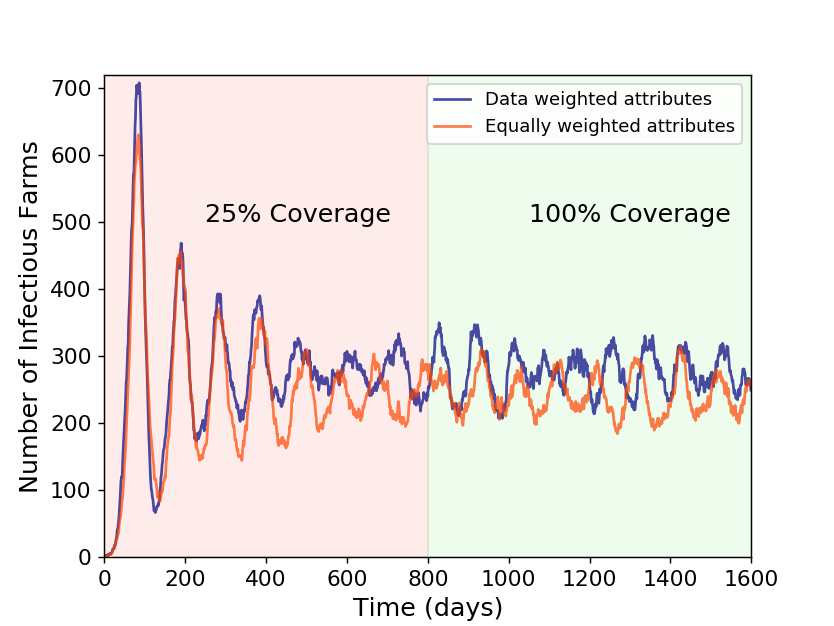

In [174]:
infectionsim1 = infectionalex[0][0]
infectionsim2 = infectionalex[2][0]
infectionsim3 = infectionalex2[0][0]
infectionsim4 = infectionalex2[1][0]
infectionsim5 = infectionalex2[1][0]
meaninfectionsim = np.zeros(1600)
meaninfectionsim2 = np.zeros(1600)
for i in range(len(infectionsim1)):
    meaninfectionsim[i] = (infectionsim1[i]+infectionsim2[i])/2
    meaninfectionsim2[i] = (infectionsim3[i]+infectionsim4[i]+infectionsim5[i])/3
# print(len(infectionsim1[0]))
# print(len(infectionsim2))
# print(len(np.sum(infectionsim1, infectionsim2)))
# suminfectionsim = infectionsim1+infectionsim2
# print(len(suminfectionsim))
# suminfectionsim = suminfectionsim.astype(float)
# meaninfectionsim = suminfectionsim/2
# len(meaninfectionsim)
timeplot = np.linspace(0, 1599, 1600)
plt.figure()
# plt.plot(timeplot, infectionsim1)
# plt.plot(timeplot, infectionsim2)
plt.plot(timeplot, meaninfectionsim2, color='navy', label='Data weighted attributes', alpha=0.7)
plt.plot(timeplot, meaninfectionsim, color='orangered', label='Equally weighted attributes', alpha=0.7)

plt.axvspan(800, 1600, color='lightgreen', alpha=0.15)
plt.axvspan(0, 800, color='salmon', alpha=0.15)


plt.text(250, 500, '25% Coverage', fontsize=14)
plt.text(1050, 500, '100% Coverage', fontsize=14)

plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Number of Infectious Farms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0, 1600])
plt.ylim([0, 720])
plt.legend()

<IPython.core.display.Javascript object>


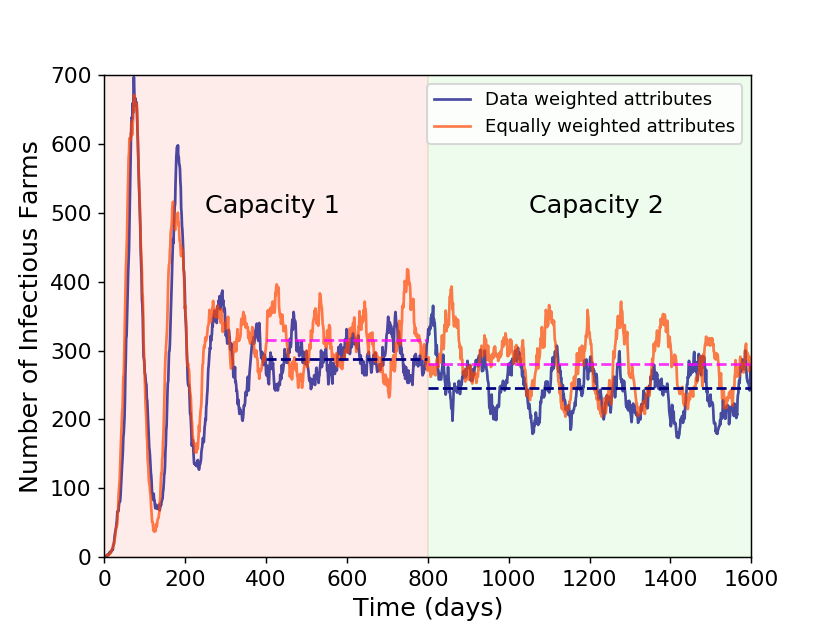

In [176]:
timeplot = np.linspace(0, 1599, 1600)
plt.figure()
plt.plot(timeplot, infectionemma2[0][0], label='Data weighted attributes',color='navy', alpha=0.7)
plt.plot(timeplot, infectionemma[2][0], label='Equally weighted attributes',color='orangered', alpha=0.7)
plt.axvspan(800, 1600, color='lightgreen', alpha=0.15)
plt.axvspan(0, 800, color='salmon', alpha=0.15)
plt.text(250, 500, 'Capacity 1', fontsize=14)
plt.text(1050, 500, 'Capacity 2', fontsize=14)

plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Number of Infectious Farms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0, 1600])
plt.ylim([0, 700])
timeplot800 = np.linspace(400, 799, 400)
timeplot1600 = np.linspace(800, 1599, 800)
endline1 = np.mean(infectionemma[2][0][400:800], 0)
endline2 = np.mean(infectionemma[2][0][800:1600], 0)
endline3 = np.mean(infectionemma2[0][0][400:800], 0)
endline4 = np.mean(infectionemma2[0][0][800:1600], 0)
plt.plot(timeplot800, endline1*np.ones(len(timeplot800)), linestyle='--', color='magenta', alpha=0.8)
plt.plot(timeplot1600, endline2*np.ones(len(timeplot1600)), linestyle='--', color='magenta', alpha=0.8)
plt.plot(timeplot800, endline3*np.ones(len(timeplot800)), linestyle='--', color='navy')
plt.plot(timeplot1600, endline4*np.ones(len(timeplot1600)), linestyle='--', color='navy')
plt.legend()